# Jupyter Notebook für die Analyse von Infinium MethylationEPIC v2.0 BeadChip-Daten in R

## Die ChIP Analysis Methylation Pipeline (ChAMP)
Nachdem der Lab-Part der Methylierungsanalyse abgeschlossen ist, erhalten wir als Bioinformatiker*innen Datensätze zusammengesetzt aus einem Saplesheet und mehreren .idat Files, die Fluoreszenzsignale enthalten. Um diese Fluoreszenzsignale (binäres Dateiformat) auslesen und mit dem Samplesheet verknüpfen zu können, greifen wir auf bereits existierende Software zurück. In diesem Fall analysieren wir usnere Daten mit der ChIP Analysis Methylation Pipeline (ChAMP). Diese Pipeline basiert auf R und kombiniert bekannte Software für veschiedene Parts der Methylierungsnalyse (minfi, combat, bumphunter), um eine umfassende Pipeline zur Verfügung zu stellen.

ChAMP unterscheidet bei fast allen Funktionen zwischen drei Typen von Methylierungsarrays, da Illumina über die Jahre verschiedene Arrayversionen veröffentlicht hat. Die älteren Versionen sind 450k- und EPICv1-Arrays, die sich hauptsächlich in der Menge der enthaltenen CpGs unterscheiden. Dieses Notebook ist darauf ausgelegt, die Analyse von EPICv2-Arrays (die aktuellste Version) zu zeigen.

Die hier durchgeführten Schritte umfassen:
1) Einlesen und Filtern der Daten
2) Normalisierung der Methylierungslevel
3) Überprüfung auf und Entfernen von Batch-Effekten
4) Vergleich der Methylierung zwischen Zellproben

### Import aller nötigen R Pakete

In [1]:
# import all needed R packages
library(ChAMP)
library(ChAMPdata)
library(ggplot2)
library(stringr)
library(ggpubr)

Lade nötiges Paket: minfi

Lade nötiges Paket: BiocGenerics

Lade nötiges Paket: generics


Attache Paket: ‘generics’


Die folgenden Objekte sind maskiert von ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attache Paket: ‘BiocGenerics’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Lade nötiges Paket: GenomicRanges

Lade nötiges Paket: stats4

Lade nötiges Paket: S4Vectors


Attache Paket: ‘S4Vectors’


Das folgende Objekt ist maskiert ‘package:utils’:

In [2]:
# set the location of the experiment directory
# the .idat fluorescence files and the samplesheet.csv have to be located inside the directory and it's subdirectories
epicv2_dir <- "../../../example_datasets/epicv2/data"

### Setzen des Datenverzeichnisses, Laden und Filtern der Daten
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopD1sfVHAAACAASURB
VHja7J15fFTV+f8/586WyUJWQhIgQEIgEESQJWwCFVxarYpKUVwQtO62Lt+6tP21Wqx+rbUqVUGL
+rWIgIIrSLGCguwiuxDIRggh+z6ZySz3nt8fkxkTIeTccCd3Jnnerxfty+Tk3rM8z3M+5zn3nstk
WeZgDBwMEgDG0C4cgMIBBkA6Rzm0lINAOQ5AUQCDJFCOA4aOrscBBei4Ldx7TWjYFrXlGPP2ZYdt
ES3XQZsBQObi5UTHmaPjcQEAj+It19G9PRww6FBHRfGWk5iYHxiYmM2K+BUXsB3OW2yHCbRFhS1y
QX8RtjHFW4b8pfO2yLn3mkHtL9xbT81it6i/CMbuQMZ4JuovHdiimnERtUW1vi8Su2Wl47gYDLYo
GrtFtY5WsVuV7wdA6yjQVrfpGbu5gP/prXWC3V9E66iX1vHrsSDXOqL3llWumzTVOlzMFkNhbRCI
OgrbIkjrnK/WUeMveuluUd/XK3aL+rSuWkcwduuldQLqLxrFbjU6gtapoZvXCZTu1lLrqPEXzede
3mr8oJ0fBLu/yCpit1b9zVsWV5rm5DXWOgHNMQZxXqcnxu5g1zpqc/JaatDultc535y81CaIicDF
irQOTB0isNjl3HvhjurJBeuoqs0quka4GwX7UfSiau7LBRujZVv8dWQaXk/NfUXLCgR2fz9yMYPg
OtiicB1VGY9gUaZZKDljYtFqnKGxbau5rxq7FbFFNTE5EP4iZDc6+ovWQ6jKJgIwx2jm94Lzgb8M
064TuY7+wjWOd1xjmw2E1hGKEVx7X+mJWodzdTpCD62j8ODXOmptrKu1jqo1jo5aJyDzmsb+Ag1j
t1qt02GcbRnnQGgdLcdFEfU/ndapaueXQMRu4RChQ+yGSp8OZq0jvAbUSesEYl0QEK3DtLXtQOV1
WHfI64TKOlWvvE6AtA7Xw6d1XKeKaB01GkZVTl7DvI5o7A6E1hHOheiodVStXXSM3cGsdfwPLwez
1lEZ9PTQOrrn5DXsyPbGhcmyzBljAJi4wQg8leBrhNA1ofH1VJQTbouGdeQq7Itr2Ieq2qzTOAds
/ETGRfB6utuY1rYY7H5FthiUdQxUPwZ97Na6LRS7e4ZPa2yLAWmLTm0WbYvauEj+EoSxW6d5P1Cx
W1PdRjoiKOuo8I6fQtZT6/BWBkZap3v7S3fyab20Dm9VuWBdm4fK2sD35kyo627SOhr6NOV1QrKO
vnsGe15HVI9RTr5jzcgY+UtnbcL3gACTgjuvo3nsDkKt49/MZKKzGUEQBEEQBEEQBEEQBEEQBEEQ
BEEQRBcgURcQBEEQBEEQBEEQBEEQBEEQBEEQBBGM0GYmQRAEQRAEQRAEQRAEQRAEQRAEQRBBCW1m
EgRBEARBEARBEARBEARBEARBEAQRlNBmJkEQBEEQBEEQBEEQBEEQBEEQBEEQQQltZhIEQRAEQRAE
QRAEQRAEQRAEQRAEEZQYqQsIgiAIgiAIgiAIguhKmnfuBq+vp44gggYpPh6WsRdRRxAEQRAEQQQh
/s1MhQMMAGPn/gM15QBA6qAcb/nX0SuinLeUY2LlGPPW85z3FWxLS1PQQTHxNou2xVfHjtoi2OZA
jLNoWwBA5oBBsJykQx1V2azAvUXHT7QtnHv/QQpuf1G4traoti1C5ZjYa+l6+QvngAJ9/CVQcUyz
eCfqf/zHoM2C2V9a6qdl7IbG/qKXLWoduwOldYTbwrpP7NZN6zDt/UVrraNAbH7Ry1981wxWreO3
sSD2l0DYYkC0jk5xMRTWBqJxTGmZpDXTOgGwRYUDkqSj1hHw/fbW0q4jOWj41ztwH8mhrAwRNIRl
jwOzWGAakaVd7FY7VwZxXqc7rQ1I62izltZrnapGd1Ne59zjLJST10nrqImLemmdQOXke1peR3Xu
sIvzOqGSk1ezhxWIdWpX5HWMvobKHDAKdIgvASLSyRBwErRahIncW0RoKCKOx3+so2jiziBoMCIT
LloNckcLVIOAFSoqgo2kIsAaBAOicPJMRR2hUR0VUTHEARnigc7ABG1bMCBy1jLWHfmWIuYvXMTG
IGhjXHvb8QlPJuovAnFHePEnmJzyJdlYV9uixv6iNnaLCg1FRaJNOCEnGLuF/KWlrEESsDEVsZt1
4C9cjb8oLeU08hfeMhFp6i/BHrtbfFVEHwRC64jYotJii3poHaG28B99n7RO57UO5y22yLT1F9E2
iyb4ZB7kWkfwSUettY6a2O2LtSyItY7oOIvExUDEbtF5nwdI60DAHtRuKmq9ThX1F0XRUeuI9E07
6yve1ARwDsvY0TCmp4GZTCC6F0yFbtAbpaERrn37AYmBWczepG8P0jqqdHdLPiJYtQ7OEXfOpmH0
yuuI7MQJ21gAtI6i4uFcoXVqgPI6IrpbL60jat96aZ02OYmOdDfXNyfPdMzr6Bm7IZqX6wZ5Ha6I
5+T1yuuoycmr8Retc/IQzOtwLbUOtPeX9nLyRt89DAITgN9IBcpJTCxoMgFj8ZcTGDT/9VjH5STB
wC4JqnARZ29djjGxtoiWE2mLQfArqQbBtoiOHwRtTG05Nf0tstoS6m9Rf9HYFhkT/8itT9CJ+ouW
NiYSXDszfsJtEYwlojYraWyLXAd/YYJ1VBO7fePc1XFMjb8ImmzAYjdEbUdLG5NaCXOROKZRjFBj
s6IxQvNx0VHrSGrmVI21jiq/0tFftJz39dI6jHmFdTBrHc39JQC6mwnGCL20DmOAxLW1Ma21jtr5
hemgdZjWultjrcOYN3EmseDVOmrinV5a55zziyxDPlUC08WTEfmrG2BISRLyA19CXORJcpG2iCZT
O5Pg07KOWr59r6bdavqHc+3eGPCNs1Z19D9s304dnQcOwbl1O7jLDRYRIdSHAdM6onpaBx3BGGCU
glvrMMk7Twdz7FaVi9RL67R22GDVOio0P2md87ymnv7CgjuvE5CcvCTmf6J5HbV+oEdeh0mAgQd3
XocJtkdtXkfrnHxI7GGdh80aOyNetCwnWlbFfpRwYeG2QNyoNb9eINqi0zhLARDSWpaTNLZZXcvp
6C+STnVU1RboZ4tMw3IhE7v1jHc9LXaL1lHH2C31wPklFGI3C/LYrSo26ah1WJDbYij4QUjoiBDw
l2DXOiGxNpCC28YCEhe7UHdzzsHdbm9SomUjUw+tEyp6o1utDaCjv7RTVrKGgbfsxjKDQWzNpuP8
Ego6QtJRqwZ9viZUciYsBOpIWue842Kw53VobdBDbDbI50DGQiSv0wNit+iD+ARBEARBEARBEARB
EARBEARBEARBEF0KbWYSBEEQBEEQBEEQBNFlcE59QJA9EgRBEARBEOLQZiZBEARBEARBEARBEF0G
7R0RQWWPZJAEQRAEQRBBD21mEgRBEARBEARBEATRZTDqAoIMkiAIgiAIglABbWYSBEEQBEEQBEEQ
BNFlMNo8IoIIieyRIAiCIAgi+DUbdQFBEARBEARBEARBEARBEARBEARBEMGIfzNT9BMBnIt9T0C0
nBpEr6dXHUOiD0Okjlreu8f2I9euXI+2RfIXit0Ucyh2k7+Qv5C/kNYhrUP+QrGb/IVid9D6ix7Q
OFPsDpY6ki2S1iF/Ia1DWqf7+kvI9qGieP9pXEfJd0O33HFDOAc8HFAEyskt/zpC4YBboF2y4r0e
F7iemnKKQB09ivefUB0V7e7Noa6OQuVkb7mOisockAWcT2m5t4hhu2Sxcm4ZHX6zgvOWNovYIsRt
0SWLlfPIKsZZ0F8UHfzFV05rW5S1rKPPp0VsUTDIugT9xd1is1ykzQKTgc9fRHAK2KIvdgv5C9fe
X9yi/qLoE7tlFbHbo1Psditi/e2RVfgLtPcX4dgNsRjRoS2q8BcuGLtJ6wjYTgC0jogtqvGXYNc6
TgGtw3XUOhzBr3VkrkJ3k9Y5p+7WWusoGmod3t20jo6xO9i1jq7rVB6AdaqGWkdW4S+iWsfTQ7WO
SEwWjd2+euqideQQyOsI6vOQyOtouE5Vm9fxBMBf9NA6Hp3zOjyItY6ueR3ejbROiOR1gl3rOLXM
yavVOoKbYVquUwPhL7JOWoerydcES16Hc3C3G9ztPuOPz9dfjID3exVG1vE3zxkDDOj4+xa+ciK7
vKLfJpAk7wU7rGPLNTuqo+++Irc3CB7Ga2DeCzLBNov0owSx74mItNnXFiZYR+Fykti9jWrKidii
pK0tMua9t5DNCtZRUuEvIjB4fVUrf5GYt28kUVuEhraowl8YxHyaCTq1SRJri1ESi1Gq/Eownpgk
cZvVLXZrWccAxG6fH2hpi1r7i4GJx8VA+IvQvZm2MV6kzUyFv4jGbj39hfnsLIi1DoNYf2utdXx+
JewHgrpNL61jksTsWzetg+DXOlqvDQIVu6Gj1hH1F0nDcmr9SsQWddM6HOCCdTSI1hE6aR1ob4ua
+4tg7FaldTT0K9XrVBX+IqINuCRmi6JaxyCyzgmE1mnxg6DO6wjGbl899dA6BikE8jpM0B6CPK8j
6i+ByusYgjyvIxy7ddY6lNfpwrwOKK9zvnmdgMRuaLdOFfUrplbrCAZGLdepgdA6kuBaVWutozYn
r+XaQHQOPEPrMAZmsZxX7G7PX4yqEweC5UScTs01RTcptL6vaHCFYPBQVU5FWUmnct2pjlq3hQXC
JtTYrIb+EohxZjraotYxQiKfDt7YzbT1v57oL5rbotSN/EXUJlTYjl7+Iuk4X1HsDt06MuioYXTU
Oqwnxm41dZSCvI7dKHYHwmY19xeQv4R67NbUD0LAX0TtlvI6oZ3XCUSeqDvldUIidtPaoMtiKOV1
KHYHS+zWVetQ7A6KvI5o7CcIgiAIgiAIgiAIgiAIgiAIgiAIguhSaDOTIAiCIAiCIAiCIAiCIAiC
IAiCIIighDYzCYIgCIIgCIIgCILoMhROfUAEkT0q1AcEQRAEQRDBDm1mEgRBEARBEARBEARBED0T
Rl1AEARBEAQR7NBmJkEQBEEQRA+jvr4ebrebOoIgCILQBYk2jwiyR4IgCIIgCEKNZqMuIAiCIAiC
6Dk0NTWhpKQETqeTOoMgCIIgCIIgCIIgCIIIemgzkyAIgiAIogdx4sQJmEwmmEwm6gyCIAiCIAiC
IAiCIAgi6JEAgANwyQDn5y7MAXgUQBYs5+EdV0Dh3rIi5dxKx3X0XU/pqI6C5QBAFmgzfG1WvO0/
5/Va7i3alo6ux+HtG5G2uGXBtnBvuyHQFrciZmwuWbycUFsEx0VWYYtugTrylnKi/iJqi8J+JTgu
IrYj6i+KCn9RU05W4y/Q1l84184Whf1FEfMXLugvamK3OwCx261j7BZpi6xiXAIRu7X0F9F45+Hi
bXEL+otL7ric6titob8oXNBfuDqto2ikiTqldQIcuysrK9GrVy9YLBYAgKO5GeWV1UGvdTwqtI5C
Wqf9+UAWtEUdtE5r2wlWraPGFnXVOnJwax1Rf9FT68ghoHU8CmkdLbSOW0etI6S7EfxaR1ahdfSK
3aJ5Hd/YdLXWgYrYrZfWEV2n6ql1ZB4CWidAeR2uo9bRMnYL+4sS3OvUYM/r8BDI66ixMb20jqqc
vKIuJ691Xgc6+YvQOlWvnDy6V05e5ur8Sq89rPPROkbA+61zg8A3Ahi83xJgGpXzVVwSvLdQHZl3
h1bkkwcidQQASfD9VV87OrqmBICzjgsylX3DmFhbhNoMsU6UIHZfzgGjYD8aBMdFtBwTLAcABpE6
MnU2wUSuBzG/MjDxceGsJUqwrvVpSdQWVfqLVnX0jbOW5UT9hTHAIGI4gv6iJnYbVPShmngnGpM1
i90q/IUJ2qJojPD7lagtMu38xSA6Li0VEPEroXa32KKWMdmgwnYMAjGHMcH5hemjdXz9qErrdEHs
Zq0Mr6qyEnZHMxJ7xwet1gEXnKPV6LZAaB2D2L110zqC/ch00jqct9iEJDYuemgdBhW2qJPW8dVR
aH7RSevwENA6jKubN7p8napCR6jWOoKxW0TrGFSsAfXQOgyAwaCf1mGCtiisdSRxm9VS60hMbFPB
7y9dHLvBxec10bHRWuv4/UUwr6OH1oFKn9ZD6zAW3FrHbxMB0Dpa+r5ardPhOAtqHVFN5PMXTfM/
Gq5TQyGvw1S0Wy+twxH8Wscfx0Igr6N17NZS63Bom5MPhI4wCGodvXPygVinapbXwfnndYyqL6R1
ohvaBiWtryeo/dS1OQCbcMIGw/RpCwJh1Ew/mxWd7JmG5aCyHNOpnKjP6OUvTIVPG/SyMa034ANQ
R9GyevqLBH3GJRBxUS8bCwVbVGM7us0vkj7j0l45zjkU5cdHCk+fPo2hmZnBHbtVxCZdtU6w+4uK
uVKP2K1Kn5+jrNJUhaYN/4Dr2FZEXvUkLBf8nNYGpHUCGrsN6Ho/CAndrbGupNitTewOibyOjrYo
vM7RqS16ah3hTRw9Y7dgYNR1nRpka4OQ1TqU1wk639crx6+r1glAHSmvE3xaR43uDgWtE8o5eSN0
RK2gJEIXGuseNNbUBQRBcZH6MKgZNGgQjh8/Do/Hg+TkZDQ0NKC+rg7Hjx1DdHQ06urqUFFRAUmS
wBiDwWBAZmYm+vfvD0miz62TPQY3TRtehOP7j+ApzYFir4O1oYI6hSDdTRAEQRCkuwmCIJ8mQhwj
dUH3xNNkR+X3B2COikT86AuoQwiCIAiCAAD069cPkiShsrISxcXFyMvLQ3JyMhITE1FXV4e+ffsi
OzvbX95ms2H79u0wmUxISUlpc63yHXtQtHYDmquqkX7jLPT92cXUwYRuNK79K+ybXgdvKEfEzx+H
5cIrYeyTQR1DBCXOIxsh15bAMnwGDLF9qUMIgiAIgiAIgiDOAW1mdlOaTpdi8x0PIjojHT9btgRh
8bHUKQRBEARBwGg0IjU1FampqQAAp9OJ4cOHt/vWZWRkJMaPH4/du3e32cw8vWkLct5+H1V7D8Dj
aEafiWOpcwndsG99B47ty6DUlyHq6j8h/JL7IEX1po4hghLnofVo+PAPYO4mGBPTe+RmJudkB0Tw
oJA9EgRBEARBBD20mdlNMUVGIHH8aNTl5OPE5+uReftc6hSCIAiCIM4gNjYWW7ZswZgxY2C1WlFV
VYWTJ0+iubkZ4eHhcDqdqK+vR05ODiwWC6wmM8zHC1D+0ReozTmOsPhYZNw2BynTplBnErrhyt0G
uaIAUdf8GeE/uw9SVAJ1ChGUOA/9Bw3v/xaGhEGwjr4TxsT0HtkPtHdEEARBEARBEIQaaDOzmxKe
nIRRTz6C9VfeiJL1m2gzkyAIgiCIszJkyBCUlpZi7969cDqdiI6ORnJyMiRJgqIoiI+Ph81mQ2Rk
JMYOycR/X30DRRs2ok+DHX1nTsOAX16B3hddCGsfeguO0Iemb/8PzmPfwpiSCVPGZNrIJIKaxo/+
CN5sQ9R1z8A0aFyP7QeJvo1EkD0SBEEQBEEQKqDNzG4OA8BJmBMEQRAE0Q5WqxVpaWlIS0s76+8d
DgdOnjyJBIXjyJJ3oPz3WzQ2NeHi2+di0Kyr0Ct9ICSTiTqS0A1P/jYo1ScQMft/YU7Lpg4hggal
tg7lv7oN7tzj4ADMg9NhmiwjbPwcSDEp1EEEQRAEQRAEQRCC0GZmN0V2OtFQWATJbEZ4onZvSuSV
u1BY5cLgRAsG9abEJUEQBEF0dxRFwZFNm9H/RClqd+6BNSUZqdOzMfT2uQhP7kMdROhvo047ILth
iEoEs0RShxC6wxUFntw8lP58Frjb7f9ApFx+ECioQa/Zr/TI72QSBEEQBEEQBEF0Fgnwfq/Co/jX
WO0vylrKKQLlZAWQBT6EwbnYvRUOeLhgOZG2cG8dRT70LreUFSqn4npatuWn4+Ior8Thf74Ja3If
pP3qGv/PPdxbzm2zobGwCHU5uWe9pucsbT5Z7cLir6vxv+uqcOhUs7eOivfeIrjljtsCAG5FrJxH
8d6/w/4WrKOvLaJ+oJm/cDF/8ZcTtB0RW1QEbVGNv3gUcX9R438cgv4C9f7Sblu4uC3KKmxMJC6K
+oFbQ1uEititBCh2KxrZIuc/2rdWsVtRGbtF+1vUFvXyFy1tUVWMEI3dXJ0f6KF11PiLrIPWaT2/
nPE7j4zjn61H/VdbULp5O+IuuhCD7pqHATOmnnMjMxBaR3Te8KgoF8yxW7XWEdHdCG6t45+HOqF1
OJMAxs5L66iah7qJ1tErdnMVsdutU+yWlc5rHd7Y6N3IdLna/ELKqAKMDtQ+85wmsdsjh4DW4YHR
OtDYX3g38RdPCPiLqNaRtdY6grbjszPN8zoQs52g1zpycGsdVXkdrr0+kDWOY1rndTwq/EXLGK+1
1gG6V+zWQ+twHricvKJlTl4JvZx8MGqdYM/J66Z1VObkg1nrtL6m5rGba2eL5+svqt/MFD2xlDHx
CzLB8ox3XAGmoo6q2sw07Bu0HP2qYVsY+7EPFY+MptNlaMw9gcRJ45A0ZUKbKGKvqETJl1/h+P+t
hK24BDfl7z1rX7cekwaHglW7G3Co2InZY6MxZUjEj+PHBesoCY6z1uPCIKaEmErbFcgYMhVOxVQY
pFAdubfZjGnsCyK2qIP/oZP+0uHsJ2izQtdT4y9MO39RG0s4F/ctJhLHVMRuJtIYrsJXRGOyho7A
1PS5ijoKxx2Nr8kYNJ8DmZaxW41P66R1ONc27gRC65zNFt22Jpxc9yW++ucSxNY2YuDPL8WQW29E
sacZSdG9NNE6UNkWrfTi2bROsMXuTmkd1rEtQss6BkLrqNFjHLD99xW4crci8vJHYMmcft6+z7QM
EjpqHQTAFvWI3aJjoqqcgNbh/MdxUat1uK0JJdnTvRuZPy1rUrzx0e7QRJioiTl6aB1/zAmA1tHc
p0nrnJfWYSpjt4iNcWiL1rFWtdYRaXcn9OLRo0exd+9eDBkyBCNGjIDVag2s1pGCW+sI9yNXoRlF
16lqbUcw5mmZ1xGeLzV2wkDlddCDtI6q/I9oXkcwJ69rXgfax5xA5uS1WKcGQusEe06e66V1mPp8
hJb5ZM0JQE4+GLROa4y+mxkkoRgHg6TdBOC/pkBZiYk7iUHDcv5761BOVVta/be7oRGFH38Bc0w0
+l0yrU1ZZ2kpdj+5ENUHf4C5VxTisoaf9Zqtx5lzYHueAzsLHCiqceN4uRO9rJKqcQHE+1vEFiFo
i6psB4BRtJyk4fhBfJwlwaAk2mat/Qrwvu4t4v8B8b9O+Mu5MEriNqtlHUPBXwISx0T9RdD/RMVV
QGxM63Fm+tiiz19YkNui6KLOKGloYyq0jiRpG7s19ysGSD9ZMDnKK3Di0/XIW/kRbJWVGHPdtRhx
5zxEpw/Eie+/h8fj6VK/CoQfBMJfRJ8S1NNfJGjoBxprHTU6wtdmz6kDkGtPw9g3C1J0Utf4FbS1
2UBpnWCO3ar6UYc6+mxQ6oTtcM6h2Gz+/1bQ1u8YABYbfd7+p3p+0Wse0thfemLsFq2jrlpHTxvT
uI6iZQOhdUR1betx/ve//41//etfmDZtGp577jkMGTKkx8ZuX1zUbZ2qYo0sadnmAPiV6FpaL60T
CjkTrf2FITBax8B08hcVbWFax2StY4SKcdZD64SCv6hZp+qhdUIpJ49unpOXWg8eEXq4bU34ctat
OLl2g/9nzrp6FKz6GNEZgzD0jrk//ry2Dt//5QXUHj6KrPsX4PLPluPyz97r8B7FNR58urcBFiNw
x9RYbMtzYMyfc3H4VDOcbi70+rkaG9PLFlkIOEEo+CmjYKJJH7JuZBNEiNtjCNgi6yZ9GCyxu/54
Po6+vRzH/m8FuEdGyiVTMfTWOYgePAiQJFgsFhgMBt3q15P8qqfOgWrgbifAZUAyeh85Jrpd7D7f
OpaWluLpp5/WJe7YuIIRpwtQKcs/2iwDYh57pEv1IkGxm+aW7mtjO3bsQG1tLdavX4/S0lKaXyiW
ED1Q61D8JrTSjNTd1DfBDq34QxjF48H2+x9DXU4ueMuOouJ2o7GwCOboKKRMv7hN+QN/exUlm77F
hY/9BkPn34ywuNgO71FW78H/rCrF9nwHLs2KwmM/T8A3jw/EBX3DMPv1U1i2ow61dpkGgyAIgiC6
ARU79+DIkndQuPozWGKiMXT+XCT/bArCkvv4V5I2m83/1L/b7UZxcTEOHz6MH374AUeOHEFubi7s
djt1JtE1i0qJlpXEuamsrMRLL73UdQtsswlRv5rljZdcgQKOlfYGLG6sRR0DYDKDRUTQwBAEcd64
3W44nU5ERUXB4/Hg6NGjaGhooI4hiFbk5+fj+eefx9NPP43c3FzqEIIgiBDGSF0QYnCOw4veBDMY
MPDKK1B95BiMkZEwRoQDAJw1ddj/13/AmpiA4ffN9/+Z7GiGs74eXPbAFBUBg9nc4a2qbTKeXVuJ
H0pciIuQkFvmxN4TDlw00Ir37umPpz6twKYjNkxMD0dchIHGhiAIgiBCmJrDOchd/iFKNn6L+JHD
MXju9UiaMhEpJgPWrl2LMWPGIC0tDXa7Hd9//z3y8/ORlJSEuLg4sFaPzDY1NSEnJwfDhw9HWFgY
dSyhCR6PBy6XCyaTCSaTyf9zBtbG/gjipxw9ehR2ux1Dhw6F0+nE5MmTsXz58sDd0GxGzJ//AMPg
dBQtfB4KAJvEMDl7AsL6HIBkYYDR3OPHhXOyzWCjqqoK77//Pux2O5544ok2v2tqasKuXbvw3//+
F7W1tYiPj8fkyZMxffp0WK1WHD16FOvXr4fT6URGRgZ+/vOfIzIyEsXFxdi1axeSkpIwZcqUoG27
EqL2uGfPHtTV1SEjIwP5+flYtmwZJk2ahJEjR5JBE0QLBw4cwJIlS+DxeBAZGYlHH300KOvpcDhQ
XV0Np9MJWZaRlJSEXr16BeResizD5XJBURSvnmYMVqu1U5rabrejuLgYhYWFsNvtCAsLwy9+8Qsy
PIIgAgJtZobcoo/j+Lsr4aytR8nX2+Cqb8Co3z+C+Asv8E5IbjfqC04geSP8HAAAIABJREFUZki6
t7yswONwIOeN/0Plzu9gCA+H1CoB1B51dgV//bwCm4814beXxSMhQsKuAgfe+KYW86ZwTBocjqeu
SURpnRuxtJFJEARBECGPs7oGztp6JE+dhPQbZyFx/GgYw8NhATB79mzs27cPa9euRUFBAa6++mpc
f/31qK+vh8lkarPQdjgcyM3NRUFBAYYPH04dS2jC6tWr8etf/xq/+c1v8Ne//rWVNlZoV4Q4J717
94bZbMann36KzMzMwN+QMUjR0YhaMA8jr/w5zFnD8aed25DUty+q/3c8wrIuhSGqN61ru2m7CgsL
sW7dOuzevRsulwtZWVmYPXs2hg4dCsYYKioq8Nprr2HPnj1t/i4tLQ0PPPAA0tPTsWrVKhw5cgQu
lwtz5szByJEjYTabsWXLFhw8eBA33HADkpKSNMsvOBwOHDt2DGvWrMHq1auRkpLSZjPT6XRi27Zt
eO211zB48GBkZWWhqKgIb731FhobG3HJJZfg22+/RVlZGYYPH459+/YhISEB2dnZ2LZtGw4ePIh5
8+aRQQaAJUuWoLi4GKNGjUJUVBR69epFD/gQxE+orq7GqVOnwDnH0aNHwTlv4yd2ux0OhwP5+fnY
sGEDcnNzoSgKbr/9dsycORMAsGvXLuTl5cFms2HkyJGYOHEiKisrsWzZMrz33nuw2+2wWCxYsGAB
fvvb36KmpgZbtmzB+vXrwTnHm2++CQBoaGjA9u3b8fHHH6OkpAScc3z++eeQJAlbtmzB888/j/37
96OxsRF/+9vfMHv2bCQlJcFoPDN9X1dXh82bN8PpdKKhoQFvvvkmmpubERMTgy1btgAA8vLy8NVX
X+Hw4cMAgFdffRUAsGnTJjzxxBPIycmBw+HAgAEDsHv3bvTu3RvffPMNVq5ciQMHDmDSpEl48cUX
AXg3hZcuXYrNmzejvr4e999/Px577DEUFRXhnXfewcqVK1FeXo7k5GTs2LEDb775JsxmMx566CFY
rVYyRIIgNIE2M0MMxhguePheOCqqcPiVxVAkhoSRwxAWH9t6RQJF4fDYHajNOYYDf/snKr/bB4PJ
hIkvLkT/K2ac8x5NTgW/W1WGLw/bcOEAK349NRYuj4LUeDM++K4Bz39RhdEDw/DU1YlIjjHRoBAE
QRBENyBm6GAMXTAX4Ul90GvwoDanOBiNRowbNw7jxo3D9u3bkZKSAkmSEBcXB1mW0dzcDM45amtr
UVZWhoqKChQWFqKhoQGpqalITEw86yKcIEThnENRFMgyfd6AUIfvG7+7d+/G5s2bkZKSgl/+8pcB
v68UFoZKlxNOlwtX3jgHdXV1WDWpHBfNvQFSBG1mdsftlpKSEixZsgQnT57E5MmTYTKZ8M0332Dp
0qW46667MGTIENTU1GDHjh3IysrCtGnTIEneL/9ER0cjMTERhw8fxo4dO3DxxRejoKAAGzZsQFJS
EsxmM5YvX46ZM2ciMjJSszpXV1dj8eLFOHLkCOLj4zFy5EhUVVW1KWOz2ZCbm4vExETcf//96N27
N44ePYpFixbhq6++wujRo1FaWor09HRMmjQJJ06cQG5uLkwmEw4cOIBp06Zh8ODBQZ5nCU2by8nJ
QVNTE9xuN+Li4vDHP/4RQ4cOpcBPEC243W44HA5YrVZYLBbk5uZi165dmDBhgr/M888/j4ULF2LK
lCmw2+3Yv38/FEXB5MmT/ZuZa9euxXvvvYeioiI8/PDDmDhxImw2Gw4ePIgjR45AlmVERUWhsbER
AFBWVobVq1djxYoVAODfzCwtLcUnn3yCDz/8EPX19WCM+T8b9sknn2Dv3r1oaGgAYwx/+ctf8Npr
r2HTpk1ITU09o235+fmYNWsWwsPDceedd+LAgQNwu91ISEjwl6msrMTGjRuxZs0acM79m5knT55E
ZWUl3G73GW9lbt++HZs3b8axY8faXGvTpk3YtGkTcnNzIcuy/0jriooKFBcXw2QyoX///khOTkZ5
eTleeOEFGI1G3HPPPbSZSRCEZlBWKeRWfQwZt/4KXFZw+pstqPrhCJoqq5Dg/zUDlzgaCvPxwbAJ
gMTAJAPSbrweWffcjsj+fc95eY8CvLqxBt8VOnDblFh8caABv3zpJN67px8u6B+GuEgjvjpiw9It
tXjq6sR2rzPtf4tgNQH/eXQAjRlBEARBhADWpET0TUrssFxsbCy2bduGCy64AGazGdXV1Th9+jQc
Dgfi4+MRHx8Pxhjq6+uRkpKCvLw8AEBKSgp1MtFpOOcYM2YM4uPj8dJLL6G2thayLOOyugPIoDcz
iXNw6tQpOJ1OrFmzBtnZ2UhMTOzyOlx66aV46KGHYHr9UvCoKIAe7kB3fHnswIEDyM3NxcyZMzF3
7lxIkoTY2FgsW7YMhw4dQkZGBmw2GwAgOzsbV111lT95zJj3yOzNmzdDkiRkZWUhPDwc69atQ319
PT799FOkpaVh8uTJiNDwm6vh4eGYPn06Jk2ahKioKKxduxZbt25tUyYyMhJXXHEFZsyYgbS0NL8W
CAsLA+ccZrMZBoMB9fX1/jecysvLUVdXh379+mHy5Mn+hwrIHrVl7NixiIiIgNPphMfjQWxsLMxm
OsaaIHwcOXIE3377Lfr16weHw4GcnBxs3LixzWamT2fGxsbi4YcfRm1tLQBg4sSJ/t+PHDkSM2bM
QGlpKYYNG+Zf2zz11FN46KGHwDmHwWDwa4yYmBhccsklSEtLa/MWaGRkJMaPH+/fJJQkyf/7l19+
GS+88AIA4MSJExg9ejTq6+vh8XjaiVs/fmrh4Ycfxi233ALOeZsHSPv3748bbrjhjAdKFixYgNtv
v73Nz3xx+qqrrsKoUaNgt9uRnJzs//3MmTORnp4Oh8MBxpi/H6ZNm4Zp06a1uZZvQ7ihocG/WUsQ
BKEFtIoK1cWfQcLMD/4PHwyfhIIPP8eAy71vWzKjEebIaLjr6sFMRox6/DfIuGU2jIILnt15dry3
rR6Dehtxc3Yv3Ds9Fne8U4LL/l6E9+/ui8F9zLgpOxqZSe0L5BnPn8DJaie2/j6dBoogCIIguhmZ
mZmIj4/H8ePH4XK5kJCQgFGjRsFsNkOWZRgMBnDOMXToUKSmpiIsLAy5ubm0mUl0GofDgbKyMths
NqxatQoVFRVoaGiAzWZDv4sVZAykPiLaZ8SIEQgPD8enn37a5fdOTEyE2WzGI488gqSkJFTScHRr
fG/Z9O3bFzExMQCArKwscM5RVFQEu90Om80Gzjk2bNjgP6pvyJAhmD17NjIzMxETE4OGhgY0Nzej
rKwMVqsVX3/9NcrKyjB//nwkJiZqeoxoeHg4Jk+eDEmSUF1dfdZNR4vFgvT0H9f2jY2N2LFjB4qK
inDHHXegT58+uOiii7B69Wrk5eUhNjYWiqKgvr4ec+bMQVRUFBlHgHjttdfQ3NyMa665Bs3NzdQh
BPETDh06hG+++QYDBgxAUVERbrrpJowaNapNGZPJBLPZjMjISMyaNeuMa3DO8Ytf/ALZ2dno06cP
LBaLPzYOHHh2EZqSkoIFCxac8fO+ffue9ee+6/muHR0djbS0NBQUFLTbNsYYLBYLGGMYMGAABgw4
82WSfv36Yc6cOZgzZ84Zf9veQyYjR44863d3L7jgAlxwwQVC/e7btP3222/JCAmC0BQj4P08gKIA
Ejv3E2mi5YAfP6AudVCOw/uZmw7LcUABIKGDOnLvNRk6bgvnHZcDvPdFy721aLOvHGPnPl6H85Y6
nqO/JZMRFVt3ouLAD+h9YRYsMb0w5qnf4fArb2LG8jcQ8ZM3MWXefh9yDnx6oBFOmSOv3I2vjzbh
3hlxeP+efrj73dO47tViHFyYjqgwCVOHRvjbwjlgaOmcy/5+EgWVTnzzxCD0jW27V+7hgFFg3eVR
AIOAjcmKt4xQf3NAkjoux+G9d0c2K+QvAuPX2hY7sh3OvXUUbjPE/IqL2KKvrKIA4Gd9ssr3VBhn
krdv9PIXqeNyCmvxA3RsY5LGttjaXzqKdwYBfwlEHUXHRchfWuxWyF9UxG4Rf+FMx9gNwfmFd3w9
X+xm0Hj8QsAWReqoeewOhNZpqWOwah3f9cBE/YUhMTGx3beb6urqUHyqBBdddBE4vMn8gwcPnt9c
2eLTDGL+Ion4n9LSZh38RS+t4+ufYNU67fmV0+lEbW0tGhsbMWDAAPTr1w9hVivq6uqQFHMAjJW1
m9wX1jqifiV4vc7ML5LonCqidVqu19O1Duccn376KRwOB2699VYAwNix4/Dgb37TsY5oiTud1Tqc
cyxevBhNTU0YP348xowZg7/ElyGai62PhdcGUpBrHYjHbt20DgNE3hvsyBYHDBgAj8eDnTt3Ydz4
bERGhOPbb79Fbm4uLrroIjQ3N/vfoHM6nZg0aTIUzvHlhv/g+PHjePLJJzF69Ghs374dixYtgsvl
wtSpU7F161bMufEmZGZmnvPI9s5qHamdyeNstlhXV4ePP/4Yq1evxhVXXIHLLrsMVqsVkyZPQVJy
CpzN3jefvv/+e/Tv3x9vvvkmDAYDpk+fjunTp4MxSZ3WEVynCsVuwbWBz366Mq/TRsOw4NY6Miiv
Ewit0yV5HTVaR1B366V1AK8tdpTXaWxsRHV1NdLS0iBJEq6++mpccsklHc7nrXE6nfj000+xdetW
PProoxiUlh5wrRMXF4eFCxfi6NGj/odjfuovRqMRcXFx/jf+1fY3bzEGhWuf10lPH4yNGzeirq4O
sbGx5+Uvsi8PGqRaR5Xu1lHrBHvs5hC0RRVahyv65ORV53U00jo+3a1bHlQwJy+c12lnnI2tGysi
6vwdKGAIXCDY+I1BNIHNxIy/wyDSyggNAnX0ZiE7vjdU9KEB524PbxmX9upnMJkw8pF7sf9vi3Do
768hYfQIDLjyMiSMvhCOikr88OpSjH/+z8KJ82fXVuCzfY148soEGAwS/r6uEnUOjvtmxGLZr/th
yaaa9idnAFf+oxC55W5seiINqfGmswppLok5nshiUgEgidgEFxo+r01AcFEguggSEFetbVHY/7RK
YPsmi3PYoqIokBUOWeFY8vpreOONJSgoKIDH44GiKGCMQZIkJCYmYv78+Vhw513o368fTEbpnE8N
KxD7Vg5v+R92nv7SpqzSEjw1Sr746gjBCU04WSJpY4v+vuEd96Hopot/kS9ii4LjrDZ2QyB2c0HR
pHnsFkxEKNwbx5hAHUX8xTefcpF+hNimviJoi7KauKilv7Re8GoUu7lAn/vsC4K+omqzXmOtI2qL
TCOtYzAY0Oxshsls8Te8veOF1MRuNZvMQhtNaGmzhrFb4eI6Qg+to3B1ddRF65zFX0wmExISEjB+
/HgsXboUVqsVcosPNv5rLpp3rTwvrdOZ2M1EHrZQqXW4RnNq6/lAK62jeewW1Dr8PLWO3W5HXl4e
FEVBdnY27n/gAcgyF9qo4Oepdex2O6xWK8xmMxYtWoSrr7kWVf8vq+MxVOkvIh2kl9bhKtZXumsd
dv5aZ9SoUbj++uuxfPn7mDXrWkRFRiIjI6PNNy4nTJiAxYsXw2w2IyY2HmAMA1L745lnnsGePXuQ
lpaGO+64AzU1NVAUBW+++SaGDRuO7777Dms//wzJycn49a9/jf79+wdc6+AnWqesrAz//ve/sXXr
VsyaNQtXX3014uLiAAC9ekXjwlGjkZ973P9GaUNDA2JjYxEeHo6NGzeib9++yBgyVJ3W6ch2VGgd
LprhU7F+0SKv06nYrafW6S55HR5cWud88jpKANapXPTBUtHY3WKLXHADCYK22NFGxfjx4/HUXxai
MD8fR44cQVhY2BnfbxwxYgQmTZqEiMjIs8Ynt9uNnTt3wmg0wm63w+Vyw2AyBVTrREREYPbs2XC5
XP6jo3+qdRISEnDbbbfhwIEDnc/r8LYbKlrldQ7s34d9e7/HyJEjER8ff/5aR6+cvBp/EdE6gm0W
1TpcpdYJ5tjNFe3zOqKxWzSvIzpPq87raKl1BP1FzTpVldYRaLdwXqeddarRVxeTgBUwAEbBcgZJ
zAgkJpY017ocY2JPJAAtTwUwwXIaXq+jtjCjAcPuvBVQFJz+ZiuOvv42bCeKMeTWOVCcLtQcPnrG
35xrnOsdHFazAfFRBlw9Kgqcy3jms0ocK2vG41cm4LeXnTkBGSSvQf/ypZM4etqDrx4biIHxprMa
pMkg5igmSbycUH8LlmMMMDEx+xbyF0EbU1POwMT65nxtzJd0Pn36NF5++WUsX74cZWVlZ01Gc84h
yzJKS0vx7LPP4tlnn0ViYiKWLl3a5jswP8XYxf7SGd8XtTGjClsU/VqMGn/RzGa7Uez2P6gShLG7
M7Zj1Ph6kiQm/hgDjIK2aJa09StRfxFui9Zah6mwHZ38Sq2/MI38pby8HMl9+sDYshApLS1t80Rx
oP1Fr9gtqiP01DrCtqOT1vHV8ae2yLn3VAjGGOrq6pCbm4uqqiq4XC6klpYiNkjXEHprHS1tzBQA
fzEbNLTFdsrV1NSgvLwcRqMRJSUl+P2TT2LUqFFnHLd2tvpJgjGvvXFpbm7G4sWL4XK5cN111wEA
dt4UhtFMw3WqpF3sDpgtQlt/CYTWEY3dHWmd8PBwXHvttZgwYQKqq6thNBrR2NiI/Px8xMTEIDw8
HFarFdHR0W3+bsyYMYiIiMCpU6fgcDjQp08f9OnTB6tXr4bJZIIse1BbU42bbroJH3zwAb766ivM
nz+/S7XO6dOnsXTpUuzfvx933XUXLr744jbtMEjetza3bduKpqYmZGdnY/v27Zg6dSosFgsKCwtx
6tQpDB06VL+8jqDtiPpMINYGplDQOkGe19Ha97tK65x3LlJjvxJdS6vSREy78RO1nTFjxmDMmDF4
/vnn2y3zi1/8ApMmTYLBYDjDzhRFgc1mg6IomDhxIvLy8pCQkNDmW5KB0DqLFy/G448/jnnz5uGf
//znWcslJydj0qRJGD9+PJqamvzfUxbN6/hs0BiAvM4X69biz3/+Mx599FGMHz/+/PS0aIwIgRyj
MURyjEEdu3XK6/jeyBTpm1DYwwrlnDx9MzPEYUYjht09HwljRqJ8+x4cWfwOmEGCwWJR/ZFlzjku
y+iFUcneCXDe5FgkR5tRVOVGr7D2w+OvXj+FI6Uu/Od/BiAt0dyujYt+2YPp1ZcsBMa7i+5zzz33
YOXKlWhsbOzUx7orKipwzTXX4Oabb8bvf/97/4fBie5ji0QPskfqgqCgsLAQgwYNCom4c+zYMUyb
Ng0mk/eUhpycHGRmZlJcJL/q9Fg3NzejpqYGDQ0NWLduHdauXYsdO3agpqYGi6bIuDaNepRs7Ow0
NDRg7969cLlceOuttwAA119/fYebmVrEHafTicjISBgMBvzpT39CbLgJ8Sf+SXqxG1NdXY19+/ah
b9++yM7OBgCsWbMGiqJ4j8cOC8PWrVuRk5OD6dOnY/DgwQCAqqoqOBwOREdH+9/AycvLw3/+8x/M
nj0b27dvR2JiIjIzMzFw4ECcPHlSszpzzuF2uyHLMhwOh//0HYfDAcYYTCYTbDYbPv/8c3z99dd4
4IEHkJ2dDYPBAJvNBoPBAEtL7mHPnj04dOgQ5s6dC4/HA4PBAJfLBUmSoCgKwsLCaH3Vg+YX6nKy
x1Bh8+bN+NWvfoVBgwZh7969bX7ncDiwa9cuuN1uFBUVoba2FhkZGUKbmeeD2+2GzWaD0+k8Z7nb
brsNdrsdR44cQVpaWhDZuPcEN0bGHnIxh0aM+ibYoc3M7uBMBgmJ2eMQMyQDOW+9h5NfbITEZbgb
GlVf68tjdejfR8L82BiEmxkuGxFxzvI3Lj6JvSecWPtQKgb3MZNjhzj5+fm47rrrcOjQoXY3Mc0G
A5J79cL4/v0xa8QINLhc+OTwYewsKkJ9c7P/7zjnWL58OXbs2IFXX30VV1xxBXVwD0aWZTQ3N8Pt
dsNkMiEsLKzdD853dzweT8vxNC5Vf2e1Wv1PWxI9C7vdjvz8/IBuZgZiAesjNjYWdrudBpLoNC6X
CzU1Nfjiiy/w+eefgzEGi8UCs9kMxpqhMKnj87qJHonNZkNKSgpkWUZFRUWX221Zmfd7rr169UKW
Yy8iDTINSjfXeJ999hlcLhfuueceuN1urFq1CgMHDsTIkSPBGAPnHB999BHy8vJw6623gjGG119/
HZxzjBw5EpGRkXA6nViyZAnGjRuHsWPHIjc3FyUlJfB4PKivrz/7kX2dpKqqCv/4xz+wadMmeDwe
lJeXo7GxEdOnT0diYiJuv/12ZGVl4fPPP8eePXvw9NNPt9mUHDt2LJ588kk0NjZi69atGDNmDC68
8EI0NDQgIyMDy5cvR1hYGEaOHImsrCwyEuK8OWQ/ibcqvkad7MDI8FTcmTgdvQzh1DHEec3XdXV1
Z12fu1wuVFZW4sEHH4TVasWGDRv8D2wGEt+DIh3lTBoaGiDLcqdeQggkZrMZUVFRsFgsZGAEQWgK
bWZ2IwzhVox89AH8sPgtNJdXoLm2Tt1i38lQ3aTgH/+tRlKsEVeMiESEpf3tyQf/XYrvTzjx/j2p
GJJkET46hQhOli1bhj8+9hiKy8vbCCGJMSRGRuKhiy/GvDFjEB8R4d+0llqS1XeMHes/n/6xdevw
znff+Tc2CwoKcPvtt2PJkiW49tprqaN7GDabDSdOnEB+fj5Onz4Nu92O8PBwJCUlITU1FYMGDfJ/
a6enUFVVhS1btuDYsWPCf8MYw7hx43D55ZeTUfVAdu/ejeHDh4dMfX1HgvrnEUlCVFQUDSTRacrK
yvDDDz9gzpw5Px611aJBXO/9Gjj6JSSjiTqqB8I9TlT/7wx4Tn6PuCe/hXnQ2Da/dzgcOHbsGNxu
N1JSUiBJEk6dOtUldZNlGZWVlfB4PHjkkUew5ToOJZo23X+cK7pfmxISEjBr1iy88847mDdvHoxG
I7Kzs3H77bcjPT0dgHfzb/78+Vi1ahVuvvlmcM6Rnp6Oxx9/HGPHjoUkSVi1ahUsFgumTZuG2NhY
XHnllXj++efxu9/9Di6XC08++aRmdY6Ojsadd97pPwq5NWazGcnJyYiKisILL7wAm812RplevXqh
d+/eiIuLwx133IGoqCiYzWbExcXhhhtuwLRp08AYQ2xs7BnH65I9Ep1aS3ls2N2YDwUcJ5urAAAP
JF0GM6P0JtE5GGP+fz8lMjISl19+Ofr16wdJknDttde2+/kMLQkLC0OfPn06zJWEhYVBluWgewMy
JSUFEyZMCKmHcQmCCA1otu9GGCwWDJ57HaAo+P4vLyC8T6Kqv6+2eTCmnwVWqwG/X10Oj8xx5YWR
iLScueh+4YsqfH3cjr/PTcSFqWZV358ggo8FCxZgzYoVaHQ6/QnoMKMR6+64A5MGDIDEGCTGYJAk
oOWbVf6FHwCD76vrnOOFK6/E4z/7Ge5avRprjx4F5xzl5eV4+OGHYTQacdVVV1GH9xAqKiqwceNG
rFq1Ctu2bUNTUxMsFov/7cxx48bh/vvvxzXXXNOj+qW8vByffPIJ1q1b1+bnLpcLTqcTkiTBYrHA
aDS2WWDdfffdtJnZg31p6tSpbWwoMjIyaN/UjY+Px6lTp9C/f3+Eh4fDbrfDaDSiuLgYFosFJ0+e
RHl5uf/oocjISIwYMaJLEgNEaFJdXY3jx49j4MCBZyR1as1meCzRYIYw6qiehuJB1R9HwFNVhMip
C2CMOfPIN7fbDYPBgKSkJMyfP79Lk32cc5hMJtxwww14/fXX4Xp2DCA7wYxmGruWNUS3W48bDJg8
eTJGjBgBh8MBAIiIiECvXr38b/JYrVZcddVVmDp1qv/4QIvFgpiYGP8Rs9deey1kWUZUVBQkSUJq
aiqeeeYZuN1uSJKE2NhYzepsNpuRnp6O9PR0FFS6sWpXPXYX2BAVJsHuAkrrmsBhA+dmAO0l1Uv8
epWjBrHh9Zh/cQxmj4vX9C3SwPor+WQoUOisxH/rDmN6fTTmVSXjSJgdb7CD6GWw4s7En1EHEZ3C
arVi4MCB6Nu37xm/M5lMSE1NheOrr1H/ymLw8gqE7/4m4HW64oorMGTIkA6Ps83Oztb9GO+zccst
t+CWW24h4yK6blmgKDh16hQOHz7s3+CPjIzEhAkTgs4/uhK73Y76+np4PB7wlnx+SkpKSJ+U1202
M2tqarBt2zZs2rQJBQUFsNlskGUZiqKoWnyYzWbExMSgf//+yM7OxhVXXBFSbxNIJhMSJ4yBMTIc
/S5XJ+Z2F9ox66JeeOmmPnhweRn+/HEFOOeYOTwSMRESjC2vXi75pgYrdjfggRmxuGRoJCxGeiUz
lIP99OnTsXP7drjlH4+9emDSJDwybRpSY2L8b1/+uED9SfLBYABTFMBgABQFRgCJERH48NZbceeH
H2LlgQPwyDKKiorw17/+FVFRUZg2bRp1fjentrYWH330EV566SVUVlYiKysLmZmZiI2NRVNTE06c
OIHTp0/j8OHDPW4zMyEhATNnzkRSUlKbnx86dAibN29GQkICJk6ciAEDBrTxvYkTJ5Jh9WAkyfvU
kNPpRElJCfr169flm5mKoqCqqgrFxcVITk5GSkrKWcuNGjUKu3fvhqIoCA8PR2lpKcLCwvxHzSYn
JyMzM9O/qVBRUYF9+/Zh3LhxiIyMpMEmzoAxhubmZnz55ZeYOXNmmzd/fzfgBEb1ckEBHd/Zndno
+gJ57mPg3Lu2i5UScMnTz0CuKkTCwoMwpZz97XXOOQwGAzIyMmC323HXXXd1eQJhxYoVWLliBY7f
nYABD6yEsXc6DSi673eHzGYzevfu7f/vr4858O9PyiExINZqwPEKFzwKfnIkoKPln89wfR1U750r
OTAgwYRFNyfDZNCm57Ycs2PJN7U4Ufnj99jcMoetWUGzW/EfietR1F+7tM6DhZ9V4qUN1QCA1Hgz
5k+JweUXBO8cT591+4nm4wp+sJ/Ex7V78LPoEbg4KjMo6nXKWYPMC1TNAAAgAElEQVSj9hLcs7cW
1hfewEVjL8SURXNR2FxJg0Z0mkmTJmH79u1tHib+KZ7iU3Dt3w9J5UsjnaVv375n3Vw9Qx9t3BiU
fVpfX4+TJ08iMjKS3s4k2sXhcOC7777De++9h6VLl/q1kSRJWLFiBS688EIMHTq0w+sUFRXh+++/
x/Lly/HZZ5/B4/GAMYa4uDgsXrwYM2fO1PRBsPbWHHa7vc0pFmazOeD3PReVlZX48MMP8fLLLyM/
Px+KokCSJGzfvh3p6elISEgISbsJ2c3MU6dOYeXKlVi/fj2cTifcbjeqq6tRXV2NpqYm/5nhas4N
932g2Pc9t48++ggvvvgizGYzMjIy8MorrwR9ks1jb8ap/26BtU8ish5Qt1gfnmTB1lw7lm6pwz9v
TsLD75di4WcV+PuGajz4swSMSY/AHz8qxbHTzRiQYMYvR/dCpKVnfvOuO1BeXo7LL78chw4d8m/6
M8bw7pw5uHr4cERZLP5EM2t585Kf5eEAJsve9bbHA97ylo0E77c1l86eDQBYsX8/ZEXB7t27sXbt
WgwePFhImBGhiSzL2LFjB95++21UVFTgqquuwoMPPojRo0fDZDJBURScPn0aW7Zs0f24KZ/t+zaK
umphsmDBgjN+vnTpUuzYsQMDBw7EPffcg0svvZSMifD7lO8puvz8fP9bHl2NT6B///33OH36NCIi
IjB+/HhMnTq1zdtOVqsVU6ZMQWFhIaqqqtDc3IyUlBT07t3b/5Rk6ycBU1NTIUkSfvjhB2RnZ9OA
E2fgcrlgt9tRW1uL0tLSNr975NZUwBoLZqbvZXVXVtrfwQr728hxH4bMvZvWCYY+mOhpQFTWZZCs
546Hzc3NyMnJQV5eHq699lr/cZ9dETPDwsKwcOFCJEouhJ34JxCbDNCbmS3ri+7XpmfXVWF3vgNu
+cc1U61dRnm9BwBgMjDYnUqn3krNLXfimkUnwQAwMIwdZMX/uzoBBpXfetlyrAmLN9Ugp8yJOrsC
j9xebTr/qqKscNQ2yaht8vprab0Hx0qd2JFvxx1TY9E/zkT2GOQccZTgLyUfo9zdgANNxTgcfQr3
Js3UtU6nXbXY3ngcqZY4XBgRCScAi8GMUZEDsaJqB75tPIaLo4bS4BGqcTqdaGhoOOf6ijOAGwxd
FiwOHDiAZ555BoMHD8Zzzz3Xrj5es2YNzGYzrr/+eiFd4vF4oChKwL9luWXLFtx7772YMmUKVq5c
SUbWzSkpKcFtt92Gr7/+GpIkYdmyZZg9e/Y5HxCQZRmbNm3C3LlzYbPZ2uzfREVF4aabbsLEiROx
devWc9775MmT+MMf/oAPPvjAb+M+e6+trcXdd9+Np59+Gg8++GDA2q8oCsrKyrBo0SK88MILUBTF
f1rHsmXLkJKScs6+CASVlZW477778NFHH6F///7IzPQ+lFRdXY1JkybhhhtuwMqVK4PuiGoRQmoz
s66uDh9//DHeffddNDY24vTp06ioqFD19mVHgV2WZciyjObmZtTV1aGwsBCMMezbtw9Hjx5FZmYm
3nrrrYAM9g+vv4285R+i38xpGLLgZkQN6K8+2VNXh8OL3kDciEyYIqwq2g7U2GVUNCh4dWMNXG4F
L96YjFveOIWteQ78dV0Fwi0S6uwe3DQ+BvdcEovkaCOJ/hBl3rx5WLduHWpraqC0Olb2q7vvxvj+
/WGUJLBWS1jOuf/paf+Dwj9Z5nK0bGwajWCcgykKzAYD3rj+erhlGR8cPAhFUbBo0SKMGDEC8+bN
o4HoplRWVuLrr7/Gvn37MG3aNNx7770YP368//eSJKFfv3648cYbda9rdXU18vLyYDAYMGjQIMTH
x3fpxiZBiDBhwgSsXr0av/zlL9HY2IjExETU1NSgoKAAkiShuroaLpcLkiSBc47U1FQMGzbsrG9u
/vDaUjCDEcMW3AxmVpdMlCQJvXv3xpQpU1BcXIy8vDy8//77KCoqwm233damrMFgwODBg/3ivrGx
ETExMTAYDGhoaEBNTQ0MBgPq6upw4sQJlJWVoaqqCoWFhRg7diwGDhzY5YKfCF58x+JMmzYN9913
X5vfDct/G5I1AojsQx3VDdnU/B+80Phn1Mt1bX5e46mAjbuQcvMrMMT2O+c1srKysG/fvi6v+969
e+HxeLBz5078KX4LDJ4aGtBuyrOfVWD3iWbkVbjQ4JDbPbLU5en8BmGzm+NQcbP/vwsqnfiu0I7/
d3VvZKeFC63LP9vXiGfXVqKiwQO33HXnqnpkjiqbByt31WNHvh13TY/D9WN6keEE65zLZZS76xFh
sGJh8uXY3JCDvfZCnHRWI9Wi37HBRc5q7GkqxPReQxEhVcAlSZAMBvQ2RcEDD3Y25tJmJtEpNmzY
gEceeQTXXXcdXnnllbOWYZIBrAuPZayursb69etxwQUXtFvGbrfjN7/5DaKiooQ2M202G4qLi+Fw
ODBmzBjhujQ1NaG4uBgmkwlJSUlCpwM5nU6cPn0aJSUlZGDdmMbGRtx2223YtGkTGhsb/fsqd955
J8LDw895Clt5eTn+8Y9/+P+uNfX19QgLC8O2bds6rMNHH32ENWvWwO12n/X3dXV1eOqppwK6mVlY
WIjnnnsO7733HlJSUhAfH4+mpibs2rULM2fOxOLFizFjxgxV13S73fjyyy/x7LPP+t80tVqt+Oqr
r4SOiF20aBHWrVuHjIwMvPvuu/6Hxt9//3088cQT+OCDD/Dss8922UOeWuLPEv10g+JstLatc4ll
0XKilJWVYcXKlVi5YgVKS0tx6tQpVW9cni+cc9hsNuzcuRMHDx5Efn4+xo4dixdffLFtuZb/6ajN
7fVP77Gj0FxeieINmxA7MgvhKcmQWhJ5Iv3IPTIaCk7AGB6GlEumnL1MO3XccdwBu0vBo5fG4N3t
tXh+fQ1W7q5HvUPBfZfE4P4Z8YgKk9pti5abmmr7UatyquoXxP5yrj7ctWsX5s+fj7y8vDaBfmjv
3njvppswKiUFhpaNTEWWwZ1OyA4HuMMB7nIBLcfJSmFhkCIiIFmtYKZWyXBJ8pbh3Pv/jMFqMuFP
l16KWocDXx4/DpfLhXfeeQdp6emYMnlKp/3lpygKb1UNpstYd7UtBqu/HD9+HHv27EFYWBiys7Nx
UTtCufWmoV7+UlRUhNdeew3FxcWYMWMGxo8fj4yMDKSkpMBqtQa9T59v3OlJsTvYtc65Yk5qaioi
IyPxzTff4NChQ4iLi8ewYcMwbNhwyLIHY8aM8T9dyznHnj17kJOTg6ysEf6fM3AcXboMB//+GiSL
GfEjR6DPpLGq6scYQ3hEBNLS0pGTk4Mbb7wRkiThk08+waBBg3DxxReftX/69u2LsrIy/zGzrRc/
kZFRuPzyK1BTU4PCwgJMmTIFn3/+OYxGIwYOHOgV8rYm5CxdhuqDRzDyoXsQN3L4eY8zxe7Q0jqK
osDj8WDgwIGY3XLqAwcAhx11b60Cj4iGZAkLGT0WCnEnWGzxddsLsCmNZ/z8X683oVeDDDCp3Xs3
NTXhzTffxP79+yFJEiZMmIBt27Z3SR9WV1dj586d4JyjoaEB5ig7wBRw7q0n2WLo6oif1vGOt09h
d0Ez6s+2iXm2p0DZeU5evjm0WcGB4mY89kEZhidb8fq8ZEis/cus3d+I59ZV4nSd++ybrSrv3xma
nAqOlbqwYkcdEqMMuHhIRFDaou+6we4vgdI6xc5qrK3Zi7FbijB46QNIzOyP//ldFtbU7MbDyT/X
zaeb5GYkmiIxK24cjKkHYZ15CUxDByPTmoLLo0eioLmix+R1qI7q63iuDLLD4UBJSQmqq6vb933O
vb/rovmFcw6Xy4WmpqZ2/YVzjpqamjM2cdrrw4KCAqxZswYejwejRo0S2hDhnCM3Nxfbd+yAyWRC
Yu/eGDVqVJtP4pzt3pJkgKXVaW9ki6Gtdc5Gc7MTd955Jz777LMzXjKz2+14+eWX0b9/f4wefdFZ
61hcXIxNmzad4/rN7dtPq9hdVFSE5ubmdteQvmPzAznO7777Lt5++21kZ2fjD3/4A6686ioc2H8A
v//9k1i/fj3uv/9+5OTkCN+7trYW48aNQ2NjIyorK9scvzts2DDk5OR0+BKGzWaDw+HAwoUL25x+
NXfuXKz9/+y9d5xU9fX//7z3Ti/bK7vLLizL0nsRREVRLBFLLFFsEWsSk4+axKgx0eST39eYj5pi
jJrEgIJi+USRiA1EkC5NBJa6u7Cwje1t6i2/P2Zn2DKzcxcWFvzM6/Hg8WBm79z7vu/3Oed9yvuc
8+GHvP322yxcuIinnnryrNN1xOAf/XrazAgga6AK0a9TAD2H/RQN/Gpkwl28eDFz5szhf/7wB776
6iuOHDlyWgOZXYV4W1sba9as4V//+hezZ8/miy++OP4uKujJEVUJzE/XFUmbMoExP/sR8UMHU7t5
O61HypF1aqk+BdwNjWz4yWM4crIY/eAPwl7nVwLlETrCK2s88u8qBDSOtSjUuxQGpYiYDAL3nJ/I
f10SPpAJAVrQe8DUI+u7zqfoI3xdtNg+13rGqGrg1dluqTf8ounkFz20I6uR+aXru3Tlv5kzZzJ7
9mz27dsXUnYEQeCeqVP5cN48xmdlBQKZgoAqy6gtLfgrK2kpK0OurUVpaUFpbUVpbsZfXY3/yBHk
Y8dQPZ7j5WeNRgRNC2x+ohhayMKUFEZlZOBsb7q8du1a9u7br+udFS08v3TlzcbmJkoPl+Fyu6Le
06voK5zk10kPcnCM0dalN/yi9B+/6JXdvggLePToUQ4cOMCAAQMoKBiKZIxewkTj1PBLtD4/iYmJ
5OQMpKr9VNgDDzzA008/zdtvv82WLVvaDRqtR9nd7V2CvK9z/VRN37toveCXaDTRG1r09oIW6UNa
VHXKbk2n7D5TdZ2u7xKOZiVJIjU1lcsuu4wZM2Zw4UUXMeWcaSQmJ5GWltapTJAgCEyYEDAYyivK
A2OUZYpeWcDOP76EqqnEDxmMaO3Ml341+rtomkZDYzMfLF3Kiy++SHJyMmPGjMHlcrF79+6Iuk5A
FhRgt9uxWCykpKRQUFDA9OnTGTVmNB6/TENjQ6gH55VXXklRUREA9d/sZscf/sKBRe9SvmIVdbuK
dMlutb9k9xmu62i94Gk9NHu6dJ3gKd8FCxYgCEKgpL0gcNM4B0Wr38eQPRFj0sCI76xXdiu9kN2K
TtndV7pOJ1oU9MnuvtZ11L7mFx3PrpYrQ6VlOyK5RQVR6OTk6Mov+/btQ5Zlhg8fzpYtW5g/fz5C
L2S32oOuE012V1ZWsnXrVlJTU1myZAlJSUkgiigIfcovfh26TtBO1SXvToWuo54aXae/ZHfHufnh
axWs3uei0RU9kKlFs2dOwPEjAKU1flYUtfDC53WoWnie3lTiZsG6Rioa5IhZo6eriamiamwv8/D1
YU/U/Urpxf6i6eQXvQmp6ingl76W3adK12mQ2zjoqSbNZ0A+fAR7XRsXxI2gzFfbb3Zqlb+Jr91l
OAQLmaZEzBPGEf/IgzhuupE4yUaOKZlm2U25tyEgu/WMUes/XUevbRDOr3OytBjTdcJDFEU0hIjv
IgCCpqJpWq/sVE8vfIwd+UUURSwWS1R+CRfsCafraJpGXV0d9fX1ZGZmhto26NF1GhsbEQURq81O
bW0tjY2NUf06kiEQzIzov++tX0ePzX2KdB1d8q43uo7QC37pJx+jHv675957effddyNWy1y/fj2H
Dx/WbadG4ssT9uv0wCOnwq+jaRqTJ0/myiuvRNVg1Jix/OIXv8BkMvVK16mvr2fy5MkUFxfj9/sp
Ly/nWE0Nh4+WM2DAAA4cOEBOTk6PskTRjr97bW0tbvfxvuwNDQ2sXr0aVVW58667zkpdxxAcj0lH
trwAGITo4wpep2dgkhD41xXLly/n+eefZ8+ePRw+fFg3gZpMJjIzMxkxYgSFhYWkpKRgNpsxGo0Y
DAbsdjsOh6O9FFuwZrifmpoaioqK+Oabbzh06BB1dXV4vd6wglfTNBobG1m5ciUVFRXccMMNPPnk
kxh0ViYU2ycp3DwanQ5Eo5Ha7TvJOVJO3KBcXXaFSVBprarG7/Uy+ILpka8Ls87ffeEIZXV+7pke
x+tfNZEVJ7H854PxKypGScDYvkDVG7dQvWEzuVdeSnzB4MD6AXqT4Cw6q8XpbcOphxbpBS2Kgr5n
nzJ+0TFIvTQmCccFyNtvv83jjz8e2ESU4xI/JyGB926/nREZGVgkKSTgVUVBbm5GaQ9Utvp8+EQR
iyRhEsXQQFVZRq2tRVMUDKmpCBZLIHuzi/2uCQKiJPHU7NlUNDfz1tdfoygK/3jlZfIH5XHRRRdF
fZdoe09ZWRmCIDAgIx2r1dJnNGbqDS3qIMZe8Yt0ZvNLJNkdPB1YU1NDdnY2GRnpGEV9/Cegj18k
QZ/HQg+/5OXlce+99zBixHDWrVvHrl27+Oijj1i6dCljx47lwgsvZNKkSRQUFJCZOQCzxRx1jGK7
AaGHJvTSmLEXvN/XtGjuJ1qUhPb9Mure38+y+yT4JRwfRFuXgoICtm3fjqaq5OXlgiTR1NTE7t27
MRqN1NfX09rayuHDh3E4HORkZWPftZ+qhe+iyjKj/+t+UsaOInX86F7JMUVRqKqqYu3atRw4cIDz
zz8/dMhLFEXGjRsXWdcRBOLi4sL2oREBV0szxQcPMmfOnJA+p8kyh5Z+TMk7S6j7eheqz8+AmTNI
GDrkzJbdZ7iuI9ALfhH7ll9OVnYLgsDAgQNDwXqAm21byTUeQbQ5IcLBGaF9DfXKbs4C2S30IY2d
6bqOEGEnEASQuni/u9LioUOH+Pzzz0lISOCFF15g8ODB/OpXv+qVbWA6Qdnd0tLC+vXrURQFu93O
1hsFMjLTkAyGqHtbb/lFl4zoAzv1hHUdsX/55VTJ7j8ur2fVvja8/siO2rAfwwQ5dYqeyE4hWWP+
lw38eFZyWJ4+WO1l+2FPqL1Ir3AKMjZ9ssYnu1oZkWVm1ghHZB7XaxvQtzQWsqf17ht6+eUskd0y
KokGO6PjksFoxCQamWQfxGs1R9njLmeYNeu06zoVvgZ2tBximG0AAgJtH32Kb3cRttkXYxiYjVUy
0aS62dh6gOuSp+jT+XXK+FOh64g6bQNJp3AQw4uds9pO7Wt+6el+KSkpTJgwgdyBOT2si4aAhiAI
vbJTLSfI05mZmdxyyy0kJiZG5BeTycStt94atrxmV12nra0Nl8tFamoqWVlZrFixgu9///u6dZ3K
ygqcrYG2IUajMapfZ+YFF/Dll1+GDcieCr9OTNc5/T7GY9VVPSab+Xw+ZFmOqHcLgoDYnlDT0Vcd
hNPppLW1Napfx2azIYpixKBqtNaEfeHXCc5Da2srjY2NJCQkBGhMEHrkl3C6jizLFBcXk5SURFVV
Vej3mgb79u3H4bBTUVERmcba52bw4MGkp6fzzjvv4HA4mDNnDg6Hg4ULF9LY2Mi0adPIzck+K3Wd
Xjcj6k2q6ImmlS5ZsoRHH32UkpKSiDWPg4Sfnp7ODTfcEGosK4oiZrMZh8OBw+HAaDQiimKIQSRJ
6taDSVVVfD4fra2ttLS04Ha78fv9IQK67777OkWxOzr2ioqKWLBgAddddx2jRo3qm3nRNDRBQBME
3XPob21j66+fxpyYwLhHH+zwBz9qbS2EEwAOB96UDFx+BUkU+OeGZtKdEqt+mY9BBKPUWco2FO1l
799fJ2FofiiYueuFfyC73Yx75CecbpwOWjzbx3jvvffy3nvvUV9fHxKugiDwl6uv5tpRo0h3ODBI
UqAnZnvqvdrWhlJbi9qepm8UBNyKgluWSe9YdrO9/obS0IBgNCKkpHQuOQuooojQvnE4TCYKUlJI
joujrrmZbdu2UVJSEjWYqWdefD4f8fHxNDY2oKpxumr4x2jx1IzR7/fjcrnw+XzYbDYcDkefP1fQ
Y6npdVS098ocNGgQ1157Lbt27WL16tVs3ryZffv28fzzz5OamsqFF17I9OnTGTlyJIMGDQooJzGZ
ExtjP4wxOTmZ6dOmsXv3bnbt2omqqsTFxVFYGOgRNGLECBRFobS0lJTERA6/s4SlL/+D4RYHk3/2
AENvvwmDxdyr9/B6vRQXF7Njxw6qq6uZN28eAwYMYMuWLfz+97+nsLCQsWPHnvC8mExGkpKSjhsB
lVVUfLEWbXcxraVlpE2dSPbsC0keO4qEofkxWjxLx3iyslsQBGbNmsWrr74a+q7xlbm4N73VY5ms
2Dqf3WM81zyTDzxv467zUPu4h/QXrYgGETNmBEHu8bkulwtFUTCbzZSWlnbJYj+186UoCsnJyfz0
pz9lfH4uKSsfIO1nK5HS8vuUX4QYLfbbGJdsbaLVo+r/QYSo5QkNMUyAsa5V4fcf1fLYFSmd3nvJ
tmae+6QOn6ye4ISfmvnbU+FlT6WPWSNOfs+Iye6+G6OiqbhUL/EGGwMsCTSbTAgaxBtsuFQvKxp3
MVxnMLMvx9iqePAiM8SaAYD7iy9xf7ocQ9YALDPPI160ES9aOeStOSt0nZjsPrPGOGXKFJ5//nni
4+Mji11VQ1PU0zbGYcOG8dJLL/U4N1arlV/96lcRS2x2vPbgwYPs378fl8vFjh07aGho4Pvf/77u
8djtdgoKCigvL6epqSnq+lksFpKTk7v530+VXyfGL/0xRkH338NdmpWVxe23386CBQvC/lZRFF2l
kCdOnMjIkSPZuXNnt3sYDAYURQlVgDpV85iVlUV2djZbtmzhz3/+M6NGjcJgMPDFF1/gdrs72SB6
eSAYw+o4vt6M8Y477qCkpIRXX32VDRs28Jvf/IaBAwfyu9/9jri4OObPn3/W0qKBMwzvvfcev/jF
LyguLo4Y4Y+Li+Oaa67hBz/4AWazmYyMDDIyMqKnDvcAq9UaduMaN24cycnJ/PznPw+VPOu0oWka
R44c4b777tPVmFYPJJsVT00NNZu2ED84F3t2O9OpKmpJSSjwhNmM2J5arPplar/ehSO7XbH0+VCP
HkWrr8f/2Weo7WMPBbREEaVwOP8eexN1zQrJDgmjQWD5T3MjnmZx5uZgSU+hfOUaUiaOw5aRxv4F
i/E1NPZLMDOGHpT91lbOPfdc9u3bh8/nC637wIQE3rvjDkamp2MyGBBEMVQiVmvvc6k2NQUCmYEi
/MSbTDiBapcLlS4n0NoD70pDA6LDgdQlmCl0CJIC/HzmTIrr6nhz+3YUReEvf/kLWVlZXH755Sf1
vkFH++DBgyOe/Irh9EBRlNAhFFEUdSkffQ2Xy0VLS0tYOe90OiPuFQ6Hg3POOYcpU6ZQWVnJxo0b
Wbt2LTt27GDZsmUsWbKE8ePHc/fdd3PttdfGFjuGfjMaHA5Hp74HXVFUVIRBFKn5cDmVi99niMWB
dM1lDLtzLmIPJwPDoa2tjd27d7Nt2zYcDgcPPPBAyChNTU1l3rx5TJ06tVuP2d7g4MGD5OXlIYoi
TQdL+PzFv+NZtQGvIFFwyw3kXXUZ8cMKMNisMQL4PwpN0xBFsZtDRNO0fms/EcPpwdOJf6W5sZFy
uYKly1Yx+e8zMJlMxImbUMX6qHQzbdo03n333UCZ1z7Gpk2bMBgMTAzTG/zIkSO43W62bNnCdXuf
xCj40Ezm/vM4xdCnuPPVcsrq/PSq9WRPSx8l+7HbnyNcu3hDI49ekdLpz81ulZoWWfe7CaED1RqC
JhBvFZg53Mm1E+LITu7ZfVTfqvDmxiY+2NYUtfyxX9Hw+dUYMZ1hqJVb2NJaglk0YskbhO/imQii
RKrRyVBrBmW+uv6xMTWVNIOTc51DO/FFkAczTPEU2jKp8bXEFjGGXiMlJYUZM2ZE1Sk4jXpnWVkZ
jzzyCAkJCbz88sthrxFFkfx8fYek3G4348eP5/zzz6e2tpb3339f91gsFguSJOF2uzGZTBEDMx2x
efNmZs6cSWFhYbd2JDF8OxAfH4/JZMLXoUJfR9o0m809lljNysrimWeeQZZl3njjjdD3drsdt9uN
2+3m8ccfjzqO7373u3g8Hp566ilKS0uRZTnEs4qiUFBQwMMPP3xK5+KSSy5h//79vPbaazz99NOk
paVhMpkoKytj2LBh3HfffbrvJYoiCQkJeL1ePv74YyZPnkxcXBwNDQ0sWrQITdOiJldAIHY2d+5c
JElizZo1PPXUU3g8HlJTU3nwwQcZMmTIWUt7Z1Qwc+nSpfz617+OGMi02+1cc801PPTQQ6SlpfVY
I7ivYLPZuPjii3nxxReZN28epaWl3RUrReGrr77ikksuYfny5Sf9zNwrL8Vb38CRj1fgbWphyE3X
Em8xgteL5+mnCWbiixkZmO6/H8FoRLM7QQOT045y6BBaZSXeV1+FMBmlEOhV8dYhK3+sb+PuEX4e
vntC1HEljxtNxrQpHPnsC3KvvJSSd5bgb20jd84VMSl+BmHu3LmsXr2aqqqqTun0v7r4Yu6cPJns
+HgM7f0sQ/0t2w1X2eMJBDK7pOEHA5h1Hg8WScLZ0Rmuaag+H4rLheR0dtX40DqUpnWYTIzPymJ1
WRnldXUUFRVx5MiRPuFTi8VCQ0MDsiyTlZUVI4T+2lQMhlAZBFmWe8yuPyWGrqKwdetWPvnkk25/
mzRpEldccUVU5VsURbKysrjuuuu44IILWLFiBQsWLGDNmjV89NFHDBkyJBbMjOGMRnNzMzUr16As
XYHi9THy/jtxjxzS60Cmy+Vi586dbNy4kYKCAr7zne901ldyc8nNzT3p8VZXVzNhwgSa9u5n32tv
sfk/HzFi4EBGfO96Bn5nNvaszFgAIAY0TeOf//wn//rXv0LfvXyhyBXZwkkdaIzhzMeLCYtY1biK
pdoqqm52Y7FoNA9oxmExRZQNPp+PHTt2sGfPHr7//e9TWVnJ5s2b+3Rcixcvxm63dwtmNjc343a7
SU1N5fnnn8fzxAeYEuIRRSm2mJ3NhLMWX5e5kSM0V+pKkUxDTvAAACAASURBVEH5JAigoSEhMCBB
4pbpyUzMNSFGqQ9XUuvjyX/X4PKrUZ3oja7OZdr+83ULf1kRPfh0/eR4fnhReylDrfO4RRGcFokE
mxQqXRZRD0+BQalGHpiVhIbGGxuaePXLhojXrz/g4px8F9MLbDF6PENQJ7ey23WUQusAjNlZmEeP
BFUjzpjADGchH9XvQNYUDMLpk2c+TaZN9eKQrAwwBRy4gkFCMJkQ2g/OJhocDDKnUe1rji1iDKcE
ApzWA3RNTU288847pKenRwxm9gbTpk0L/T89PZ37779f33sLArm5uTQ0NKAoCoWFhQwaNEiX3q4o
StjyoTF8O/DEE09QVlbGxo0bO30f7HN51113daK7cEhLS+OFF15g+vTpHDhwgL/97W94vV7mzp3L
xIkTufPOO3WNZe7cueTn5/PSSy+xePFifD4f48ePJz4+nptuuol58+ad0rnIz8/n7rvvprCwkJ/9
7GccOXKEc845h3vvvZeCgoJe+Q+DWZO33HJLqDTsrbfeyuLFi2lqamLQoEE899xzuu41efJkJk+e
zJo1a3jwwQfZv38/06dP56GHHuqXxJO+whkTzCwtLeWTTz5h79693TYIQRC49NJLeeKJJ8jJyWHg
wIGndWwmk4np06ezZMkSDh8+zNVXX91tjLIss2rVKi6//HI+/vjjk3pezmWzMCfEU7X+KypWraP4
6BFGKq3HM+jar1MrK/E8+SRiYiLCvLtJcFpINIp4//AHtChp/2/aJ/Nn+0zuaN3AD4/Voh7LRkxL
6/E3luQkCm69gcaifez9x2vU7dhN4R03MfjGmFP/TMCjjz7K4sWLqa6u7pSNKQgCH991F9Nyc3GY
TO2nbQPZkloXC07z+dBkOZSV2RGJZjOtikKrLHcOZgbh9YYfmKoGgqbtQc0fTJvGjooKFtXVoSgK
zz77LGlpaVxzzTUn/O5WqxVZlklJSaGlpYXy8vJYQLO/NhWDAafTicViiZgheSqhqio7d+7sVIYw
CI/HwyWXXBI1mOn3+zl27BgHDhxg165drF+/noMHDxIfH8+ECRO6ldOMIYYzCbIsU7fuK44s+YiU
Vg8jHrwf0/RJeNTeGZIul4tdu3axY8eOUP/YUwZNo/6b3ZS8/jaHVq9jYF4e+Tdfx6Brr8KSlBhb
1BiA4/1QOlZgiI9XQWxAIxbM/LYjJSUFQRB4+eWXKSwspPrBDMzDz0cwh28tcODAAZqamhg1ahT/
+te/2LNnT5+Pac+ePRw6dIhly5bh8/n461//ykUXXcTevXt5+umnqaqq4rbbbmN+voH4G15HdGbE
FrKj6D9Lx333/HKa3FH6LwkCr92ThaNDEy2hvR+TKAiYDZCVZCTBKkU9qzMyy0xBmhlVDTiHb3zp
SMRAKsDLKxv44azA3tnYplDdKPeY9fndiXE8fmUKqc6Tdw1JIqQ6DaS2n29NdkgBu1PVwo5hx1EP
O456zoxgZowlAXArPvyojLPnobV4aXruBQRRJO6H95IkOWhQWtnQcoDz4oadtjFV+BrY0lqMWTQi
th+zNuRkYx4zCik9PfBZEDGLRjRUFFQkxNhixtArfPe732XOnDndgifeHd/Q/MqreLZ+jWCzorW0
cHTkJISEBKwzZ5D0/z3Vo2+isbGRoqIi4uLiyM/P190SKVhiMtqBvfT0dPLy8ti0aVPUeypV1bR9
+AlySSmJv34UQWdVs8zMTDIzM3s1n6IoYjKZzuqASQw9Y/To0Tz77LPce++9nSpZaprGAw88wMMP
P0xalDgDQEJCAj/4wQ/w+Xz8/e9/x2w289RTT5Gbm9sr+pk6dSpTp05l9erVHD58mG3btp3W+Rgx
YgQjRozgySefpLW1lR//+MfcfPPNvT50azKZuPjii7n99ttZv349O3fu5B//+Ad5eXmMGDGCBQsW
UFBQ0Kt7nnfeeVx++eU0NzczatSoHjNmzwacMcHMVatW8c4773Q7tWE0Grn66qt55plnQiXI+gMm
k4kxY8YwbNgwli5dylVXXRU2oLlu3TqKi4t1p/pHQto5k0gaM4I4q5m0tSt7VK7VhgZ47n+4YEyg
j2XXQKYgSQhmc8h+WCnl80fbLG5r28j9rrUoRSq+d9/F8qMfRR3Xsa+2Y05I4NjGzQy77w4K75yL
MSE+JsX7GVOnTmX37t24XK5OdDkqI4OFN9/MiPR0jJIUClBqXcq/BoxMFRQlFDTvCoskoQF1soys
ae0Nu4Xj1nkPTZW1DlmgNqORFLsdq9GI2++npKSEqqqqk3ZwNTQ00NjYiCAItLW1xYiinyAIAikp
KWRmZlJTU8PRo0dP6/MlSWLixIk8+OCD3f42duzYiJu2pmk0NTVRWlrKnj172Lp1K2vWrKG0tJTk
5GRGjx7N5MmTmTlzJmPGjIktdAxnLLa+9b8cWrIMa30Tw354N5lXzmbn/n1MmjRJ9z00TaO8vJz9
+/czcuTIqGWXTgaqX6bxQAm7ln5Ow+btCAWDGDpnNqPmXBELZMYABALr1dXVzJ49m9deey3kBGr+
30dxrfo7jsuexDLqkthEfcsRPKi3ePFi3G4397tcJJ/7E0RreDnx5Zdf8uabb2KxWCgsLOSRRx7h
vPPO69MxxcXFMW7cOF588UVSUlJC39fU1FBVVUVSUhI2my2gb9tFYjH3LjrjWTru7Yc9+OUu1nmX
OrD/umsA5w21R2zf0hvYTCITco87nKMkcjJ/bQM/uCgxlAna00QnOiSGZpr7JJAZDpPzrJwz2MqG
YlfYv3tl8PhiYcQzCQoqTsHMOc4haM11qG43Qrv9ZBFNoMG21tLTGsw85m9mv6eKSfbBoe8SfvlI
dztQEGhTPBzx1pFnTo0tZgy9wpIlS8jLy+v2vf9AMb4du1Crj4GmoqkKgiZAczPy0fKouss333zD
559/jtPpJCEhgdmzZ4d9Tjjo8X8fO3YMZ9cKaREgHzlKy0v/QK4+RsJjP9UdzDwpmRLLzPxWY9q0
abz00kvccsstlJeX88gjjzBhwgQmT57c62qaJpOJlJQU/H4/gwcPPuExiaLYr21IRFFEFEVGjBhx
wtWDHA4HL730Evv27WP48OEMGDCA+fPnn5RfRpblTtUbz2acEcHMnTt38sknn1BXV9eNAObMmcOz
zz7bJ2XM+gImk4nZs2fzwQcfcNVVV3X7e1tbG3PnztV1Kibq4pjNpG9ag9rRPhJFJIslkFXn9wey
6DrYUJ0MRClQekOy2TC2C5Gjio2/NExhklbLva51SFr7xuL3gyxDD82ZS/79H4r+8TpyfSPDf3RX
IJDpdMSkdz9jzJgx7NmzJ1QXHEASRT6cN4+xmZmk2u0BJairMO/wOdSHVRQDgc0IzzKKIhZRpN7j
wShJJAYDQ5oWvQSgqgbqFAGPzJxJeVMT737zDYqi4PP5dDd3Djsuo5HExESMRiNHjx6N2pA8hlOL
nJwcCgsLWb16NXv37qW5uZm4uLjTpjgET2Tpgc/no7KykqKiInbs2MH69evZunUrPp+PgoICrrvu
OqZPn86MGTP69UBNDDHoQfW6Tex+413ayo4y5c7bKJh7PUeaG0N9NntjdCYmJjJr1qxen8LtlXHr
8VKzeRvS+i2s2v41U6ZPJ+vqyxFyMqmsr+PrPUWkpKTQ1NREU1NTqLKAxWIhPz+fzMzMGE/+H8DR
o0f54osvMBqNnU6zq7WH0VyNSKn5CPbk2ER9y1FfX4+maezevZvrr78e45dGhIwcMIQvn+12u9E0
jQkTJvDjH//4pA+ahkNWVhZ2u71TIDPoLFAUhby8PJYtW0b1T1KpefEaUp/eh5QyKLaYQVv1LI1m
hvWPdXiXQWkmpgyy9UkgMxzmzUjkH182oKjhLbbq5oBNuKXUxcff9FwhZdYwOzdPPXUHk8flWpk0
KHIwUz2DaruKscMGqKh4VR9GUSJesqIIAkhS4B8QZ7CSbU6i2n96bW2P6kdGIct8/PBK24cfo7W2
YjnvXAxZAwI+AUHCrcnsc1XGgpkx9Alq7vohnh3fkPjYzzFmZYb8ss3/ep22T5fr2shUVWXIkCGk
p6dTUVHRyW/XE8xmM/n5+VGDMkH7SNf+5fMh19aC0PsDRa6PPqXx+b+itbSStemLqNcnJCT0+SGy
GM48iKLI+eefT1xcHBUVFcyYMYMrr7zyhO83aNAg9u/ff1JjCvaTDPm5+0XHPfk2KJqm4fV6MZlM
TJ069aQPmAer1nwbcEYEMzds2MCnn37a7furr76a55577owJZAZhMpm49NJL+eSTT7jsssu6bVRb
t27lggsuYPXq1WF/X/HFGtrKq0idOJaE4UMjb3pFRajt/eaEdotPiovDnJeHpqqo1dXITU0oHk9n
phFFRLMZ0WLB2GHuNA3+p2U4VaqV39s24bQaUdraG/U2NqIdOoTQQwPYkvc+xFdfz5j/up8ht92I
0RFwKPlaWilfvgrBIJF31eUxaX4aMW7cOIqKijqddnpj7lzOyckhKyEBk8EQsQGI1pEwBCHQQ9Ng
CAS0I5SMNQgCSWYzzbKMp8sJKzFc6c72crVaYJcLfU53OIjvcAps0aJFDB8+nEsuObHMCr/fT319
PVVVVZhMptMWOIshPIYMGcLUqVNZs2YNGzduZM2aNcyePTvUSzOIpqYmZFkmObn/nNDV1dW89dZb
LFy4kCNHjpCamsqECROYOHEiF1xwAePHj9fVXDuGGPobTQdL2L/wHRr37ifjnMkMvfVGxHgnxw7u
p7CwsHfKocHQzTnf1/DWN1DxxVqK31mCYd8hxk6bhvXSmRR726C4mKTkZAoKCmhqamLIkCGkph53
SlVWVlJSUoLRaNRVuiaGsxvHjh1j9erVHDt2jLfeeiv0/Xs3pjPVHtKSY/iWIzc3F0EQOHbsGH/9
618ZM6iFB264AbcpMeyhhrKyMjRNo6ysjIULF3ZyLoQr8SYIAmazGUOYg50Gg6FTeeMg3n33XVpb
W3n//fex2Wycc845ZGZmsnfvXmw2GwMHDuTPf/4zaRnXM+3QIlb9z/0UZ85CciaHdQZZLJZu7yII
AkajMWxlCVEUwx4EjFSaLj4+nqFDh/bqcEsMnfHKF/W4fGq3TMyOePr6dGzmUyeX7r4gkX+uqY9s
37XbfgeP+dh62BvxPoIgEG8zkGQPf5hUURQ8Hg8lJSW8/vrrLFq0iLq6OlRVDTkIHQ4H3/nOd/jj
H/+IwWBAkiQcDkeILi1GAYsx8lyc7h50MfSMVsXLEV8dBkFCQACjEdPoEQhiQC6mSA7G2nPZ0lpy
WselopEk2ZlgP+7bavz9c8jl5aT986VQMNMpWbGIRg77amOLGUOvYbVau/krlOpjSGYzlhnTMaQf
t0UMy1ciGowIOg5VyrLMl19+SXp6Ovn5+brLO6ampvLYY4/hdrt7vM7pdGKz6SzV3e7z03y+nrax
8HtCZRX+ffswDNB30HXEiBEsWrQo1tf+/wj6IngHgap7JxvMHDZsGNu2bcPr9YbV30819JSH1gOf
z8fevXtxOp2cf/75fWJTR5MnZwvOiGBmW1tbt+hwYmIiY8aM0Z1+f7oR7KN51113devNpigKW7Zs
ifjbffPfpOrLjYz/5cM9BjM9f/hD58VyODDl5QU2IEHAkJmJmJKC98CB0Gk5ANFkwjRwYKfvAJ5q
Gc3H3gH8KX4LY80ulPR0lJKAIqocPIhvxQrMPQQz/Y1NDLjgXAbdcBVGhx3Z5aZ+RxHVX21h94uv
YklKiAUzTyPuu+8+9uzZEwpkCoLAVz/+MSMzMjBLUkCx0mMctgtZDRCtVkSzGa1LudpOjhNBwCgI
tKkqrbKMSRQxm0xgtUZ+RDBg2n5PURCIt1iwWiy4PR6++eYbSkpOzChyu900NDQgSRJ5eXkoikJ5
eXmMQPoRycnJXHTRRaxZs4bNmzfzyiuv4PP5GDZsGA6HA4/HQ0VFBd988w05OTkn1S/1ZFFTU0NR
URE2m43rr7+eadOmMWPGDIYMGRLWoRlDDGcqKleto2bL15hSksm6dBbO3Bx2FhWRlpZ2ygOTvYWn
roGyDz/h4Bv/i6uqmoGXXMDQ228ideJY9uzdi8fjobCwEEEQQpmhHQ3uzMxMvF4vhw4digUzv4Xo
6lxxuVw0NzeTmJjYyS5wOJoRpCYEKSarv+2QZZnHHnsMTdPYunUrBoMBZaCCqqphe3PLskxTUxNm
sxmTyRTSMVVVxd9+ULQTzWkafr+/m+6raVrE3wChqkLV1dVIkkRZWRkAA4y5GDxWLLsG8Pbapexp
2sJvxnu5LHs5//3WF2ytEfGr0Z8fDaIoYjabuzlMRFHEaDR2C3ROnjyZhx56iClTphAXFxdzMJ4A
/ndLM26f2llIdRBagiAwItOM4RSm+aXHGwKBJq17CdmOH/0KePyRaSo70UBBuikiz+3evZs//elP
LFy4MGKZwKamJt58803efPNNzGYz48aN4+WXX2b48OFRe9THcOahVfFQ5q3HLAT2VSk+jvgf/zBk
w9slM1mmJDZx8PTqBZpGnGQj13xc59N8XpCVTv6OVEMcg8yp1MutscWMode4+eabGT9+fKfvpIw0
1LbWToFMCCSQCJKoq9euJElMmTKFCy+8kCVLllBXV8fAgQOj/i4hIYENGzYgCAJ+v79boDWIZ599
VneZWQ3QAjtI748CiiIYDLr7C7e1tTF+/HgsFgulpaUxAvuWQ2yv8neysFqtIb04Es1Hw5gxY3jz
zTc5fPhwrw919wX6yo/o9XrZtm0bcXFxfRLMDFZE/DbAEFAOwKeAUeq5vIYG+FWQCDR37+k6RQ1I
R0MUWt61u4ivNncP/M2ePZv77rsv9FnRAvc0ij1n8qta4FpJ6PldgteJQuDaHg3odmOza6kYu93O
Qw89xPz587vVHfb7/Tz77LP87Gc/63Y/o8OOZDb2+CJaRcVxg1YQEM1mTB3KIwntNaAFoxHriBGd
eh8G1yA0/qNH+S3n8o4xl2fjtnGZpSq0dYX6JmoaKAqq30/b0QoaSo9gtFiJy8vClp5G0T8X0lZR
ydiHf4jBbqO55BBHPvqc8hVf0lxSwuAbrsKS2HP2kkcGiw6e9shgkqKXevGpIIZZl3DrpxGgnZ6g
aIFrzVEqnapagA+MYt/QmKaB3B7rMwjR+Sr4LkuWLOnkXNnyk58wJjMTSRQDqxvMiAwRTWCthR4c
h4LBgOR0orlc3TJ+O8LWrsS0KgoGVSUzJQUp0omXMHSuAXNGjOCrmhrW7NmD1+uNWG5DbidPgxCe
ZXw+H263G6cznuraemwWE1lZWT3LMSW6LAHwKgH6iiYj/O0+DT20qAImMbqS6dXBLxrgk/teduvl
F0UN8Gr3JReYMGEC9957Lx6Ph9WrV3PgwAEmTpxIUlISra2t7N27l6NHj3LPPfdwzTXX6OYX3XwV
3IeirEtqaipXXXMtN948lymTJpLaQ9BH0QLP17u/RLtOI2CDS6IOeae0v3OUlltBWox2naKC0r7O
gg4aMxmiGzynQnbr4ZegTI4muzUt8Oxosltrf7YYjV/a11mPrqOogXEaJX18FU0+haPF5DEjGXz9
VQwZnENjSgJ7Dxzg6NFypkybjsvjpezQXrxeL7W1tdTV1YVODKqqyuxLL8UZF+ivFW1d9NJYT7Lb
19hE9YYt+Jpbyb32SnKvu5rk0cNBgOzsbHbt2sWmTZsYM2YMkiRRWVnJocOHQZBITkqktaWZyspK
Ghsb8fv9WCwWhg0bFsq28imBuZH66l16Ibt9SnRa7E9dR22XOyYduo6sBp57OnWdIH1r2vF3URQF
WZa54oorWLRoUeC5Fd/QsOgniNmXYMibEPV+ah/aBiEZocOG8CuBd9bDL7SPsUfeb6dFgx7ZrQRo
NqquI4NBiv4ufS67Ab8MZh26zqfLPw8dFJ0xYwbPPPMMif+YxZN3PYniSO+0LhLgqnSx8I/vcuhQ
Gd9Nu5OxTwb2dlVV8fp8qFrg+o606PP5OtlzWjvd+mUF1O46qqqq/PKXv8RoNDJy5EhUDWacey4p
Kckc/t9mjhw+yqiUKUyaNQ7D8JsQVRm2/5aFF9fz+dCHaLEN6OSo9/v9oedrWmB+BECR/WF1ZFVV
8Xq9BCuNBmk7GHztapt6fX5qa2t47LHHuO2227j77rvDZqjq5Re914XWRdCn6/Sl7O6VrtMuF6Pp
OnVtKt2quwrHbzRtiBWjJJwS2e3vur9EkWcdDcFwGTiTBtmYPbK7A1yWZf7973/z0EMPUVlZ2U3H
jxR093q9bNq0iSlTpnDvvffypz/96aQceqdCdisdaCcaZPXkdJ0TeZcgHxh02AZeJfBcvfyihxYb
ZS+VvkZSjYHsbcFiwXrhcQeqKIgYBQm/qtIku4g32E5a1wnaqZH4RdVUZE3GIEiImgF/UD8wmbpN
epLBQZ45lW1tpSGe1qPr6PUx9qWuo5f3ZbWdxsS+obHe2KmK2q7D9IOuo0d2B/nFqFPXUaNE4f75
z3/iU4/rvwBIhrABGkXR0FQ1cGi/JwgCRrON4uJiWlpaSEtLC1uVKpJfZ8GCBWiaxnPPPYfRaAzr
17nnnnt0+3UCQUwNTVM76TqyqoNfaK/mRnS+Cti0GseOHYt4sKU3PvneyDFNh54clN19qev4dcru
ftV1ToNfJxy/6JV3mgZDh41g2bJlbN68menTp5+QX+fcc88FYN369QwuKOx7n3wUv46qqgF9XNGi
dmTricb8fj+lpaWYzWYG5uYF9kqdMaxwuk5X/a0v/Dqnml8i+eQNwViDUYfyLgBGHYF2geiTGySY
rzZtYuXnK7r9LTExsVOfJlEAIQrhV1RU8NVXX7FjxzccO1YdMPDay6BEWryuyrkkSZjNZuLj48nJ
yWHixEmMGTM6bGqyKIoUFhayYsUKLrroom5GwJ///OdQMLN48XuUffw5+d+7GsfAbEwJ8dDDmRbv
E08cP2UmCFg6Zqh2CVJpHQJGWscAUvvv5dZWLMYW/qIt4yJLYG3U4GnODvPRXHKYmn8upHF/MY1F
+zE67CQOG4o9L5uDi97G19zCsS1f03ighPIVq6n/Zjcp48Yw/J7bGfmju0L9ECOttVmnLaPHkEQn
LaKTFoPXiTockKKgT7ESddahFwR9KdIdhdGjjz5KY2NjiJ7fmDuXkRkZgUBmsOelpiFoGlp7hmZw
LIKmoXU9wd2hT6YYF4fo9aLW16P5fBHH4jAasRkMuE0mxKQkhDDlMnoqHTR14ECGOJ2saf/sdrvx
+Xzdym5I7TeKJDSDp/J9Pj9Op5P4uLieT6Zp0RW1EI2J+tbQ0Asa0/Vonfwi0D+yGwJKS0/84nA4
uOKKK3A4nbz//vsU7d7Npk2b8Pv9mEwmkpKSmDVrFpMnT+4Vv+jmq+C7RLk4JyeH7OwcOojRnt9Z
iH6dQPSNPrjOhg7rZ7PZyMjIICUlpZvSH1T8BJ20qEc+iTquQ9On8J4q2R2NX4JJCXp4WtApuwWd
PC3o5eegnBd10reob266XpY0dhT23GyMTgdtPh+HDx9mx46v8Xq9JCUlMmDAAKxWK0OGDOmUkSPL
Mq+//jo33HgjTh2lB/XSWE+y25wYz8DvXELGjHPIOG8ajoHZoescDgfjxo2jrKyMdevWoSgKaWlp
DB82DFmWMRgMDMkfTGpqKm1tbYwdO5YtW7Zw8OBBxo4dGxhjL2W30IeyW+/+0l+6jqAjqB6kRUM/
6DpBQ0kTOhtemqZ1yjJr+fD3+PetIe78+5GSB+vilz6V3XppTDx5fjlh2a2XxvpBdgdp0aSDKMqP
HuXtt97k6NGj7Q5Ehf/3//4fT8d5GTduHFJSTif6Adi55CAz0q5ggtGLIArdTjN3MLGiTWPE9aut
reX222/HaDTyzB/+wIABWQwtKCAuzsk/3v+QhJQBiJLAOedMYfyNBQGd1XMbdb+dzPXn5GKbcjOi
Nb5HXgjQvhr2FLWqqsiy3G2MmqahKEqnYKYsy6xe/SXPPvsshw4dCvUfPRldR+91aNGdV111nb6S
3aeCXzrELbtfL8BDs1OwmkRd/Rf37dvHH/7wB/7zn/+gKApJSUk8/PDD/OAHPwjPL3qVjqANhnb8
wHOYaxJsIsmOzpPudrt55ZVX+MUvfoGvgx0YLB+blJQUsUxZUFb7/X5eeeUVBg8ezMMPP8yJIpyu
09M+pEfGS6L+bCRJ6EPZrZNfgg5SQSe/9LWdKmt+GlUXwwwZAUdncSnVt92NIEDW+pXt7yziVr3s
dpcz3Vlw0rpONDu1SXFzxFePQRA76TrOW25CPliCmH48W9MkSNhEc2hv06vr9Jn92QtdR5f8bKdZ
PUn7fW2n6gkc9beuo/XGr6ODFmfNmsXMmRfyxBNPdJgHNazXVtAUBDX6whgNRsaOGUl6alKgtHd8
PImJibr9Ol0PM4XjF6vVitlsprGxUZdfR0Aj6B0UOsyPLuggxiC/iIKAwWCIWFZXL19pvdAjJKGP
abE3uk4vZHd/6DoCp9av01OsRepFwubNN93If//mSRYuXBgxmBnNrzNhQuCg66effMKd378TVVVp
bmulqamJiooKTCYTPp+P+vp6Dhw4QHx8PAaDkfr6ekpLS0hISMBut9Pc3Ex5eTl2u52kpCSampqo
rq4mMTGR1NRUGhoaqK2tJSUlhdTUVFpaWmhsbAz56he+toCPl6UwZsxo7HY7LS0tJCQkkJOTg8Ph
wGq1EhcXhxiBwHw+H/v27UOSJOLjnPpsFy2y7LZYLJ0OmemlMb/Hw5o1a/j0009Cuqo1TGXG3vDL
yfrkDR0ZQK9Drq+uEwRoamqktrZzTfv4+PhOvZGCk9v1nnv37mXp0qXs3bsXWZZpbm7m0KFDlJeX
09LSErFcUOTxCKG+JFarlYSEBHJzcxkwYAA2m43zzz+f733ve52czAaDIZQ50NHQ1DSNmpqaDp9V
mktKKV++Gm9zM77WNhr3FaN6fYjm7sJd7Wq0dgim1MNLdAAAIABJREFUChA1tV/oEPAUgIdav8AS
H48gDQ6cIGrvkdgx6Nmws4hDu0pJnzaZjPPOOa5A7i/G5HDiMzey//W3sA3IwFtTh+L14sjNxjlk
EOUr1yCZjKhaoGiBIImYEuJx5uZgdDroTbZ5f9Ai6GPi/h5j8LLXXnstlJUpCAIzBw/G1N6TslPw
vsP6Br/XwmVKdjguIkgShqQkEASUxkZUrxe6nO4OXmey27EmJyPabL2baMBsMGAKBl81jTVr1jBz
5kwmTZrUq7kJ8q0ggCSJUWuinw20+G0Zo9Pp5IrLL2fSxIns2rWLw4cP43a7sdlsZGVlMWLEiE5Z
tMIZPt+n+rrRo0fzk5/8hNTU1G69ooUYLZ70+PqTX8ReyPgTfbZkNmFrd+gk2GwkJCRQXl7OjBkz
euwjbDAY+N73vsfKlSuZM2fOaZkbc1IiuXMuiyjTrVYrhYWFEcvC1NTU0NzcHCrRNHHiRD744INQ
MDMmu89+nha66CiKovD666/z+uuvIwgC/7kli/EGNaTKnk550iu9MrbOJ3Wd1+vlnXfeYflnnwVK
yyoKTU1NtLa2oo5QI97T3ezH2xZwAJodhpPWu8NhzZo1FBQUMGjQIOpqa6mrrWVgTjZxcU58roCO
bok3Yo47XiJLtDhAFGn79y8xD5qKOHB8j/MTOHQihe2LqReapnHw4EE++eRjvvlmB9/97ne55ZZb
IvbN7E9aPBv4JWxwsENksyDDFDXboqioiN/85jd8+umnuFyukE3X0NDAT3/6U375y19y+eWX89hj
jzFq1KgT0ncEnYcYO55F9ng8/O1vf+Oxxx7rZGdOmjSJp59+mpkzZ4a9j6IoFBcX88QTT/D++++j
aRqyLPP444/z0EMP6RircNpt6dOth54tsltGQVNVBlvaM959PpQjRxBTj1euMYkGVE3lgKcqajCz
L8ZYJ7dw0FOFU7J2us55842ozc2IHbLcBEFAFATcqp8GpZUkydEv86jnGr1LLdB/Osy3TdeJdv0X
X3xBenp6p+s0DVBVvJs2o9Q3BL5UVeSSUjRFjVoeXpJE4uPiiO/BFuuJFq1WK4qidJKTXd/D4/GE
7R0e9n01DVXu+X6Rx6e1u49VXWtjNBqYN2/eabX3zwZaFL6l/u6eYy367zd40CD8fj/79u3r9nef
z0dTUxNtbW00NDRQUlJCZWUlCQkJNDU1sX//fqqqqkI67rJlyzjvvBkhvUSW5RC/qKqKz+ejtbUV
o9GIKIr4fD5cLleoVYMsy7jdbgwGA0ajEVmW8Xq9oV72fr8/lJBjNpvx+wPVVFztbdsWLVqIKIrE
xcVhMBiQZTkUb5KkgH5vNBqx2WwoioLJZCIvLw9N0/D5fGRkZHDgwAHi4uJ47733GDhwID6fLxQz
s9lsOBwO3fxss9k62RSaFkgMam1tpbi4GFVV2b59O83NzRw+fJiGhgY0TaO6upq6ujqOHTuGyWRi
z549oWpJ/aXr9HuTmWD6bUeMGzeOSy65JOz11dXVvP3222zfvp2Kigp27txJdXV1t3ucqLGnaRpe
rxev10tjYyOHDh1q34Qk1q5dy8qVK5k1axa33XZb6Hfx8fF8/PHHzJ49O6yxA5B39RU07tlP8Tsf
oKoKql+m7MNPaNhdROG8Wxl8/VX6FPwIOcpdA5wdg1OmwYOP3yc4pjCCJr5gMKPnXEPWrPMRjcdJ
w1ffSM2Wr2ncXwyigDMvhyMfLae1rJzyL9ZQ+sFHgVMecQ4UVUXQBCSTkfhhQ8i75jukThiDJTUF
g9VyarSn/4NoaWkJ0ZdRFDEbDGiCELbMhdCFHnpggOP2uMmEISUF0WxGbW1FcbuhPctZEEVEgwFs
Ngzx8QgWS0QjNJpyZzUaMRkMeP1+vv76a4qLi7sFM6PBYDDgdDqx2+3IskxDQwPx8fGxPi1nCARB
ID09nfT09F7/1uvXKK7x0epVsZsFBqWYsZm+vTJk9OjRjB49OkY0MfQZhg0bFir5FszGbGxsZO/e
vWRlZVFTU0NpaSkej4cdO3bgcrkYM2YM+fn5EU/RngnQNA2r1RrqBRrr+/btRW1tLZs3byYrK4sL
LrgAmy1Q0i49fjvUHY1N0Lccn332Ge+88w4+n4/ExETq6upYt24datGnNP79toi/k30KanufkMQ8
5ykZ26ZNm9i9eze7d+9m2bJlAKxbt460tDRUJaCBJw9JIGlwXHe7zt0Minxa5rCpqYn33nuP999/
n/Hjx3PrrbcydOjQGHH1qbLLcRuqh+2ooaGB+fPn89vf/pa2trZuGTeapuF2u3G73bz77rt8+OGH
3Hjjjfz85z8/LWs2f/58nnrqqVAg02q1ctNNN/GXv/wFm80W1lke9JMMGzaMBQsWMGfOHO68886A
Hu/16t7TYzgzoKJiFU0Mt2Yfl1eCgNChbIhdMhNvsFPuqz89Mkx2U+dvocCS2el714qVuP/zEYb8
QST++vHjvgFBok3xcsBdyVRHQWxRYzhZqwN8Phr++/f4du8N+FxlP4JGIG1Wpx/au+1r6h97Ev+e
feTs244QJqspHIqLi2lra+vRLjMYDPpLemtayK93IlOBqnWSBz3BbDbz7LPPRuw7HsO3cA/pgbZk
WaalpQWPx4Pb7aa+vp5Dhw5ht9vx+XxUV1ezZ88eTCYTmqaxd+9eLrvsslCQr6WlBbfbjSzLKIqC
3+/H7XaHgouyLNPW1obX6w3xg8vlYt26dX3+np4uLdk8EVq01dfXh+zZniBJEpqmIYrHk3M0TcNs
NuNyufD5fPz0pz/FYrGgaVoo41kUxRD/q6qKKIo4nU7a2tqQJIm4uDiam5tD87NlyxZcLhcLFixg
xYoVqKoaaufidrvRNI2WlpbQ56Ce6utSsfHLL7/sd1oznIkMkJycTHZ2dqfvDh06xFtvvcWmTZvY
tm0bR44cOa2Kr6Io7Nu3j4MHD7Jp0yY2bNjArFmzuO666zAYDKE05q6/CU203ca4Rx9k1H/dH/qu
ZuNm9vz9dQ4v/QhnXg6pk8ZHV/A7lAPtek2nfpkdI/MdN74uJXc73jshPw/TuZMRjJ3JwpSUQNbs
mWTNnhn6buAVgWDz7hde5cjylXhr69BUDYOqtpe0UanfWUTNV9tIO2cyBbfeSNqUCRid9piE7wuV
qsO65ScnR0xLB3odQA4GxgVJQkpIQHI6kbxetPZMZ0GSEM1mBGPPfV976qkSRIrdTpzZTI3fT21t
LU1NTb2eC7PZTFxcHB6PB0mSaG1tDZ2MieHsxKZiF5/vaaOmWaa2RUHRNExGkSSbRFaCgTkT4hia
bopNVAwxREFOTg5ms5ldu3bhdrsRBAGbzUZ2djZWq5Xc3FxGjhxJQ0MDAwcOZMaMGSxfvjxURv9M
RVJSUqds04aGhh6zT2M4e1FdXc2aNWuYMmUKixYtCum6DS99D0/9tlgg+1uMXbt28cYbb7Br1y5m
z57NsmXL8Pv9mM1mPr0aRiX31KwGNCXQnCtrTOopGZ/ZbCY7O5s77riD3/3ud10U9UBDnZSBcaQM
7D/Z5PP5WLFiBYsWLcJut3PjjTdy8cUXx4irH3Dw4EEeffRRli1bFtHp1RF+vx+/389rr71GSUkJ
v/nNb5gxY0YvDUYi1MPtjg8++IBXXnmF1tZWINDyZ968efzud7+LWvUmaPc5nU4uv/zy7jZgLFZ5
FvkYwCwayTQlBL4QBUSHAynheEnsBMlGoS2TMk/taRmTR/MjIFJo7RzM9O/YieuLL7EZjZ2+t4sm
RBEOuKtiwcwYeoWbb765ewa6x4emaPjLjiA6bEGBh+pyofllCFMGPqxa0tyMf89etF4m4aSkpIQO
b0bCAw880KuD43oq/YV/CVV38Da4L4TrzR3DmQ1FUSgrK2Px4sWh0sWKonD06FFsNhspKSm0tbVx
9OhRLBZL6POhQ4dQVZVnnnmG+fPnU1FRgaIoGI3GUAZjsA1CsL+71+tFFMVQiXqXy4UoikiSREND
A59//nkoyNe1hUJPCB6miuSPNpvNpKamoqoqra2tJCUlkZeXh8fjoa6ujpSUFAYOHIgsy5SVlZGW
lkZOTg5er5fDhw+TkZFBcnIyjY2NHDlyJJQlWVVVRWVlJRkZGRgMBvbt20dbWxspKSm0trZSUVER
GlPHIH8wdhQcTxBtbW1AIBB8+PDhHnktCEmSQvMUrCAa1MuC35eXl1NeXt5r2ghW0Hrqqaf6nU7P
iMzM7krU8Ulua2vj1Vdf5bPPPmPr1q1UVVX1O2Pv3buX0tJS1q5dy+7du7npppu6lcXtSIjBFGeD
3YbBHtgA/S2tNB+ppG73HhRZIWnsyFAwU6ur65w52YUBwwWJhAhBztDvuzp7FAWhy2lJZft2/K+9
hvH730fQ0TcLYOQD8xjxozvD/q31UBnbf/c8R1etpeKLNUz67WMMvf17sd2hj9Hgdkde+whOvmCW
rtaDghMiH0kKlJHVbw/32CuzI4alpZEVF0dNayter/eETm0ZjUYSExNpaGigvr4el8sVsXRWDGe6
4qTxx+V1rD/gwu3XGDfQwrQhJuJtEiaDQF2rwsaDHvZX13DV+Di+M9YZm7QYYogiH7OysjqVcw6n
q3z99ddMmTIFQRC46KKLWL9+/RkdzOx6AnnXrl0UFMQcVt9G1NTUsHHjRi677LJOhlosk+fbjcbG
Rt5++21WrFjB5MmTueSSS/jss8/Iz8/nF7/4BcPWP4CgeqIEswMdoRIHnBqdsLq6mqqqKhYtWsTa
tWu58sor+dnPfnb82YKI0WrEYOlsbqf8967TZmPv2LGDhQsXUlpayh133MFNN92EsYvjv1/9AGcr
G4cxiHqykfbv38+9997LunXrOmVj6jn46ff7Wb16NTt27OCcc87Rn30TNMh0GG5+v5+ioiJ27QrQ
ptls5oYbbuC3v/2trkBm1/25R8Mykl0ao8czBiJgFAKHRcTUVBIe/zlS2vFgSoLBToElg4Pu6tNj
H2oqToOFoV2CmZqqInQ40B+SscY4BhgTqfI3xRYzhl7hjTfe6C4XvD5Eu5WsTas6fd/w1O9onr8w
cMBfjzgWRTSDBH79gmbv3r18+OGHOBwO7r///ojX/fGPf4wu3xoa8W7/GveqNaF9p+n5FxCdTqRB
udivvSr61hdo5q1bB1+0aBGPPvooQ4cOZeXKlTECO4t08D/96U8sXLgwFGQLBhuDmYDBEq3Bz4qi
hA5qffXVVwiCEGr7F9R1emu7dUwO69o7PpiBqKoqkiSRn5/PgAED8Pv9eDwexo4dS3Z2NjabDb/f
z5AhQ4iPj8dut2M2m0PjDsaegpmOwXK0HT/7fL6wn4PvHfwsiiKyLOPz+TAajQiCgMfjCd0/OGdB
uN1uamtr8fl8NDY2UlRUhMfjwWKxsHv3bsrKykhKSqKuro7S0lIMBgOCINDQ0NAtjtZxbjvqmWov
Dx9YLBasVit2u53c3Fzi4uKYPXs2+fn55OTkhMrx5uTk9L8/qL8H0NDQEPa7yspKNmzYwPLly1m1
ahVlZWW6F8BqtZKZmUl+fj7Z2dk4nU5MJlOnesRms/l4JmN7adljx45x4MABiouLqa6uDvXdDAev
18vOnTuprKykqKiIa6+9Nqywb2lp6RZY8TU188mcuXhq67GkJINooPitJVhSUim84ya8jz2G1oFZ
xS4bZFAQiDoUfyHA6d0yMlHVbqeINFXFv2EDmqpimjdPX0CzvV9hODhyc5j+wu9R25nJYLXEdoZT
AIfJFNlGjFBeNtRPVdPQ2ukj0gktIXhdcK07bEi0l53tmj0cenYUTM/NpTA1la/bT+2caLloRVFC
G5wsy31SdjqG048/L69j4bpGvjc1ntFZFj4vauWrUjffm5rA2GwLRoPAuIFWNha7WLyxkctGO6P2
JYohhtMBl8tFW1sbdrs9VAbzbEJFRQVJSUnA8TInZxOcTicZGRkxQvwWIth35L333gvpm4km+Nss
EzPzbGAwxibpWwZVVVm6dCn//ve/cTr/f/bOOz6qMvv/73vvzGQmvZGEkoQEQpEigkgvtlVRBEEB
pYh11V2xoK77dXf1t+27u98VXV3L2hFEEVQEC2KliYAKQpAaICGk90wm0+69vz+mZCaZmdzARII7
H1+8hJln7n3KOec5zznPOSeOG264gf79++N0OjGZTKxbt45LUgWSFryIGJPSRh8sLi7mRPEJEFx6
bXlVObn27mFPne2psePJKBQXF8e3337LZ599hknoi4jKvn176V2efEqp9k8XFRUVvPPOO3z22WdM
nDiR+fPndzk5edbGVQv+Z6pQ4ygqKuK3v/0tW7Zs8TPGaXFk+tL1l19+ycSJEztWjkDjVr5x40bW
r1/v7d+0adN49NFHO6zPqKpKU1NTh3WIyOWUrgEVFRnFz3YgxcdhPO9cVIfDa1fQCxKxohFZVWhW
7JhEQ6f3TI9Eks4/wktKTUGX2xsx3T+oIE0fT19jd/Y1R1LRRxAG6rMFiaTX6RE6pIMKCKKEivYU
8z/88AMPPfQQvXr1CunM1KRPFxbR+MrrWL/Z4XLAqg4aXn4VEJF6ZIR2ZqoqyEpLelpVRXU4ECTJ
v/BygPNxSUkJiYmJEUI6m2heVbFYLAF9NVrQOiVpoD1eEASvczAhIYGePXt6HXXdu3dnyJAhmEwm
6uvrSUlJYfDgwcTFxREbG0tcXBypqaleZ6TnWZ7LVIqiYDQavY43VVW9/iBRFLvMBSqP41RVVWRZ
5qqrrvKOx2azeZ2kTqczYBSn2Wymrq7Om2q3rKyM5uZmkpKSOHToEAaDgdjYWAoLC+nRoweqqmK1
WsnNzaW+vp7U1FTS0tLQ6/WkpqZiNBq98yOKorduaGxsLAaDweug7Sroks7M3bt389e//pXjx49z
5MiRkNFagiCQk5PDjBkzGDJkiNdhGR8fT2pqKomJiURFRXkJVxRFF6HX1cHu3QhGI+p55+GMisJs
NlNZWUl1dTUNDQ1eAvrqq6944403AvajqqqKdevWBXWedO/evc1n23/zGE2lZQy9704G3jqfppIy
9j79AoeXrSQqJpo0X+YXBIznnBNw3KqGw6DqWyfT55mCwQAxMYhuAaI6nd52zu3bEaKiMNxyC+hO
nUQESfJGokbQicaKpiaUUIfAQN95ojIFQVOaCTWYkiIILse4R6i1E/HZGmmxsSQYT8/JbTabsVgs
3ojMDtUMiKDLoKZJ5vWv6/jFkFgWjkvk9a/r+bbQyswR8Ww60MTLG2u5/cIkLh0US2qcxLvfNrD5
kIXJAyIyJoIzj/LycsrLyxk5cuRZ13ebzeZ3yKyvr8eksY5LV8GAAQMicv9nCkEQiIqKIjU11ZsF
5eHex5mQWEfCvJcxDpsWmaSfGb7++mtWrFjByZMnueOOO7jyyis5efKk98ZwU3U1aoqK/pyLQd+i
Q1ZWVvL555+Tn5+PWGMiKjMOVJVPvvmBA+ZdXHnllfTo0SNo3b+Ooqqqir59+3LhhRfSp08f9u7d
y8svv8yoUaMYcE0cjY2NfPjVV7x0zZM89NBDXH755R2OcjtVNDc38+GHH7JixQqysrKYM2cOo0eP
7oL8/TOQUSHO4mazmQ8//JC1a9d6jU+nE6HQ4cuaGud3//797N27FwCj0UjPnj1PyfHd3NzMihUr
vP8OF6/9VBD/y7OWO1WFJsXmZxhQamupvOmXyDU19Dqw2xuFJiLQKFv4sbmYETG5ndov1yV+EQl/
eoq7ZSGx865vU3vQKOpJlEw4FScySpvfRRBBICxdupQ1a9Ywd+5crr322hb6s1oD27Y6mHLVI/c7
ImZ8o8eCYfv27UyfPp3hw4d763e3Rv3zL9Pw3AsYx47GNHkiHmudfKIE+4/72z8r7vyOun8+gW13
Puh0KOVlFOWcg2AyYbpoEt3+83TA3+l0ukjpp7MQSUlJPPjgg2RlZVFeXo4sy5jNZo4dO0ZiYiJZ
WVkoisKJEyeIj48nJycHSZIoKSnBYDB4z+VmsxlBEMjLy8NoNBIbG4skSSQnJ2MymbyOMQ+du9jK
FWnpCT7z1IH0RFN6HG2SJP0szri+2VI6an/xpOv1yBaPY1QURRwOh3euHA6Hd3499TY98yxJEoIg
eP9/NuGMW34CpYOsr69n69atNDY2BhXcqampzJs3j5EjR5KcnMzQoUPp3r279gUoL4fjx0Gvh2HD
IDGRxMTENrU6FUVh7NixpKen8/rrr1NaWtrmURaLhS+//DLga2pqarzRDrbaOmw1ddTs2U90Wip9
Zs9ANBiI651F76suo6nwBAV/e5zUAZneTU7syC3iQI7LIPOnAlJ8PNI55yA3NmI/cQJk2RsRqpaU
oB44gDB4cESad1HB50GT3d5yKzgADbSbSlZRoHV0ZVvty8/p6W17mgJPFARNEcahUFZWRmxsLMnJ
yd4Iza6UQisCbfimoJnaJpk7L0ymvlkhv9hGk01h6dY6GpoVRvQ2EiWJKCpkJOi4fXIyb++sizgz
IzjjaG5uxmKxeG/8nW3Iz8/3i/Q4cuRIu7VZuhp+KgdBBD8tPAezfv368fjjj3PppZeiOu3UPX89
1t1rQR8FohSZqJ8RTp48yVtvvcXWrVu55JJLuO6668jIyGDHjh3Ex8fzwAMPMHjvv9CdsLvW361D
VlRUsGLFCg4cOMCAAQMYPHkwiYmJNDc3c/DgQb799lsKCwu588476dmzZ1icLEVFRezfv5/8/HyS
kpKYPXs2b775Jjk5OV49ffHixbz77rs88cQTyLLM1KlTwx4h2hqyLLN161aWLl2K2WxmwYIFzJw5
M0JcZwBFRUU8+OCD3pRfHYnGbI1Ro0bRt2/f0xSqBHRwerJLeGwsmZmZp8QjFouFV1991TvWlJSU
CBGcTfqsYqfUVosktKy94pRxlLYt86QXJayqk13mwk51ZjpUmSbFFtAdKcbHAXEBbBwCkiBiVRxU
2OvpbkiKLG4E7WL//v2sW7eOCy64wP8LpzNwpjOn9nqZLbSpoqraHaDdunVj+PDhISPk7HY7ZWVl
VFdXB2+z6weUmloS7rodw5BB3s8b31hJze//CLrgunTzZ1/R9P77OI4VoVqtuIqSuzcTqxVaReH5
YujQocyaNYvjx49HCOwsgiRJ9O3bl/vuu6+Ns8zXkeipxehJf+p0Or0OOo8jEvD+2/OnK0VHns3w
BOt54Hu+ONsupp8Kzrgzs81m4TZeNDQ0BGyfkJDAwoULufDCCxk+fHjgXL02Gxw54hKsPXpAoNQ+
JhMkJMDgwRBC0RZFkby8PO6++26MRiP//ve/A24UVVWBC6CvXr2a22+/HYDjaz5i37MvY62sZtTf
fo8+tsUI3+PCCSSe0x/14YfB3lLL0jhwoMadMXSEnSCKrrQAPnPsER9SXBymAQOQa2qwFbvSccjH
juH8/nv0/0XOzCAZWc+Cfvten1QCDyLU4DypY2kbyasKAoL736rnDOz7LFVFEQTXAcOHvrRrdKc/
4YqiYLFYqKysJDY2lvT09LMyzeN/O07UOBAFgdxuBppsCrnd9KTEShRW2TlWaWd4tgmDXmB7gYVe
SXrOzzXyxje1kYmL4IyjtLQUq9XqrdnocDhwOp3o9fqzIlqwqKiI8847z7tNVFdXB6wDHtmjI/ip
1/rQoUP83//9H+np6YwYMYLm5mbsGx7HfmQbhsGXoUuP1En9OcFms/HOO++wbt06+vTpww033MCQ
IUMwm828//77VFRUMHPmTA4vkEBqMQbKssy6des4ePAgV199NZMmTSImpiUd4fjx4xkxYgRPPPEE
7777LjfffDNxcadfc3vo0KHcfvvtOJ1Ojh07xuLFi8nN9Tfq6/V6Zs+eTVNTE2vXrqVv376ce+65
nSYbVVXl+PHjrFq1ih07djBt2jTmzZsXqSXfacLKc55p+1V9fT3vvfee10nY5szWoeOSQGJioh9d
n9qDgj/ft/zOqfRTURQqKio4evSoy74gSSxYsECTwTJi1OwaaJSbOWGrJErUt6INkdZ5l6JFI0m6
GIrtNZ3apwZnM6WOevRiW326+sFHsG75msSH7muTIlMv6LAqDo7bqrqsM7O9FNUR/NS6pxpQ/ik2
O4Ik4Dzhn7ZYbWzskGMSVFBc9bS14pxzzuHhhx/m2LFjIeVne1FVurQUEAQM5/jblkVJQtTrQvap
4eWlOI8dI/Wpx9H1zvJ+Xvt//8LyznuoIYj43HPP5cknn/Sr4RfB2SF3RFGM6I4R2d2lofMshlMB
nRDaUKTiSpUtEjI1Nioun4oquJ4ZColJyZpuKQqCwMKbbubyyy5j9OhRZGVlBVakVVAtVqTt2103
RUaOxHnkCEpZGWKPHujGjHH1sXsPlOkzINqE1E4Ul6xCRvee3HrrrZx33nmsX7+e559/XtMEHz58
2Pv3+L45pI0cjrW2nvSLJiMa/EPuo9PTsEhiy7moA4q9qij+7T1/d0fdeVJ/CsGYTxRRfSJKVPdc
tgdZAQXQa9iT7bKrXXvDsiugF9pv53DTYns182TFNR6d2L4xwKm42rXHB5r4RXXRjiiETlvjaScI
IGlo15bmW5SuoHUv3TUvQ1pBAuUyb/WZ4EtbHieoj7PT40xtnQa5g2fqNvyHex4DDcGTIzwzK5v4
hERMpqh211nLunhoTNLYTistauEXVXU9Uwu/ODTKbqeGPnpltwZ+Udzz2N67FZfejtROu7x0A4qq
crTSQW43PX+Y1g1VhT+tq+SHYivLvq7l7Z11OGTQ6wSGZkZhCMEwquqaa1VtfywevpKE9tupGsbi
GbMWGnNq2FMBnKq7nYbnCe7nCSGNTiC711kIg1zsLNmthV8UxU2L4ZLdWnUd9zpbrDZUVfUaxysq
KrBYLGRmZnqdmZ59SAoTv2ilMS3yzpVmRIesgtPu8KaA+an5RdJAO04lvLLbwy/hlN1ODXLxTOo6
irvsTVfVdby6vApVVdVs3rwZu91OSkoKgiCehwHCAAAgAElEQVTw6i/0XNrdTvzYBYiZw3AqZ46v
tNCO09NO0NAuhK7jK+8U93sFDbQonUW6zmeffcZbb71Fc3Mzd955JxdffDFRUVEcOHiQhkYzeXl5
HDp0iPI7Y1EdLTWsCgsL2blzJ2PHjm3jyPScp8477zxuvfVW/vjHP3LZ5ZfTp08egiiG5BePjFdo
ywdNTU2sWbOGlStXYjAYuPLKK9s4Mn0xZ84cPvzwQw4cOEjffgMwGaPCdzZQXAq1ToSGhgbWrFnD
6tWrGTZsGPPnz2fAgAFnVNfxyogzoOt4aFGnkV+0yG411EHG58uyiipeeOEFPzo8VWdm9+7dSU5O
wSFr08c8Y2oPnjWMj48nMTGR8vJyampqKCkpacMHtEOLNTU1PPTQb7xGa71ez+LFi7XZMYJ0Npy6
jt9YNMgxDy+cCV2nIzI5nLpOk9NBucNMmsHnsofBgHHSOOTKKi/BqyrEizH0N/Wg2FrdqbpOvdzE
SXs1CVJ0G11HrqzEeaIYxdzU5nkGQYcKFNmqGBOXd9q83ym6jsazgVYa6wzZrbjlWth1HQ3nVC26
Tkf5JZRc9EQ5KQjIis+YrVYUu53S8ZegKIqrPzodgsPpmud2Lq56dB1VUV1Z8EJkzmutd6elpTF9
+vSA7ST3HhgVFUXPnj1JS0sLatfBYHQ9s9VCqj77VjCbkmppcpUgG9APEhO9ckyXEOdyhAbY2L3y
TqcnKSkpLPyi+cx2pnUdrfYf4czoOlptjGfsnNpZdp0w2uQVtevadVrb0MMlu8Ot64TDJu+VvFrv
hwi0T9CeNto8/kK7yr3BYOCOO+7grl/dTd+kRKT9P7oiLy+6KLBzRJFR6uoQ9XqwWHDu3Im8Zw/S
iBFeZyZ6HWpFOWplJaSnIeW1VXLUmhrs77wDUVFIl19Or1696NWrF0OHDkUURZ599tkOKefdJ4yh
+4QxLU5CDfOoGZ5NpLVjyqeGYVBHl8/nnnZiVBRSbPu3PwUBRFV7F7UcvrTSooi25wmCS2nSQtyi
EN4+ClrWUTh9/vPepnU7rtvQYSjrgeeBvjTU+vfuCE0h2MHT/QyPMuMpDB5qMr18386EC+1MZHR0
NN26dcPa3IzD4USX3o2odlJ4CaJG+UQH2mmkxTPBL4LGPnZEdoM2fhE0zuHwbCPxJolnv6jh/2al
o3PvqA9f2Y17f5GC2aawcnsdK7Y1MDzTSJXZyfk5xvZ5X9A2Px3iP0HjfKNRPoWxj55NXpPcUbXu
02dOdotnUnYLGtbOLTM9xdodDgeVlZXIsuyX+tT3Dkg4+EXw8J/G/SW0wUBx1yMSOFFcRKI77f5P
yS+a6bsTZDfhlt1C19Z1hE7g6bDrOm7aVhTZW6/eo+d4aoAI7owkgsZ9SNQqu7WeXzphnRE0yp1O
oMUzrev8+OOPrFixgj179jB79mxmzJjhNYBVlJfz0YcfYDKZmDRpEq/nWtFHtaSYzc/PJzY2lkGD
BoWMXBszZgxGo5FDBw+Snd1bUx0nIcg8rlmzhu7du5OXl0dMTEy7aVyjo6MZNGgQpaWlmBsaiDZ2
Cy+/iC7e+OKLL1i6dCkmk4lrr72Wyy67rEvoOlpld7h1HaGjus6p9NH3lrDPl7LTSUVFBeHAnDlz
mDRpkmbZ7cGRCkdIC59nmYcPH86oUaNYu3YtVquV8vJyqqurXWliNchEp9PJkSNH+PLLL1xGZEli
/Pjxp1R3s7N0Hd8zYEfef0Z0nU6Q3Voa2lUnFtlGnNjiFBHj40n+0+9xHCv0s4om6aPpb8zguLWi
U3WdBtlKrdPCAGOPtnugJCHo9QGdKfFSNIm6aCqcDZrOQ2dS19F8Phfan0M1zLpOR86pHaFFLbJb
6IgeofXdIXDDDTcwevRoBgwc5DdmqUd37Pn7WspxAarDieAW/oZhQ9t9tySCLLgDDNrZU31RXFzM
O++8gyiK3H333f7t3H3s378/K1eubHN287XrCCgEqtapKoorKEZVg8odMTUFxWxGTEp0mfc8z5dE
BEkKuPKePm7etIkHHlhMamoqH3/88enzy8/FriNol4ta+eVssOtoiXYRRPdYuvA5tSP7tFaa1fQ8
oWO0SGfYxrTqOoK2tT4du47O17ChZQCSqH1xtSAmOpoePXpQXFwcZBEE5s6dy+LFi8nKykI9ehR1
1y4ERfFzZjo/+wy1vh5pxAjE3r3h/vtbHnLwIGJGBqJPOlkBUDZ+hXPnTqQJEwI7M5ubkffuRYiL
czlB3bddcnJyWLx4MVarlVdeeaXDirnWuenQ3U1VRaHFsNqGkkNE36m4ClsrNTUttTp790Y3fLi2
sWgcj05rO4001iFaFMK3Llr5QMsNIz/B0IHnjRo1io0bNyK3ztPv4xz0poN1R0uq7dCZ2qoupjd1
cevoy1a7oeATGar60l+rQfmlsXU7Mr8tLuZITc1prUtCQgIWi4XERNf/y0pLyc7ODj2PhJfGwk2L
gqA9B3in9DGM7bTyQWK0xAOXp7Lkk2qeSJC4aWIy8UaRaIPAjqM2XttSR1mDg3nj4jE3Q3GtgxtG
J7V7QDxTY9aqpEphbtehsWiVOxrn8WcjuzvYx6TEBJrMjRw7dsxbrL61AS/c/KKVvqsqKzGZTCHT
xAwePJhPP93A5MmTqaupISUlBYvFwqFDh1AUhfLycmw2G6K7tnJubi4DBgxo4whQnE6aikuQ7Q5i
e/VAZzJqYoRwj7lDNCb+9/GL1j6eKV3Hl19UVUUURa688kqWL18OQPMr85F/WNtxmXwG2p3JPfVs
0nXq6+t5++232bBhAyNGjGD27Nl+dSetVit6vZ5zzjmH/jk5iOI2km96BcEY75JzVVUkJCSQkJAQ
8n16vZ7s7GzKyspQZCeiEHXKe/myZcuora3FbDbjdDoZqKEsSHR0NE6nA0VxajZea6UHRVHYu3cv
y5Yto6CggPnz5zN37ly/GvJnStfpkOzu4rrO7kILjtZpcoTAh/fW/HKqUZk6nY6cnBzS0rp1yJEp
CPDRnsaQROZZwyFDhjB8+HA++OADFEVh06ZNLFu2jHvvvVcTLZaXl7No0SIsFgvgqtX0+OOPe3lY
aGcRbE6wOlSMeuHUZDLhp0WtdBZu2d2hs0GYdR1VUJBRSNBF+xgbBaT0DMS09Jb1FMCIRKxoRHX/
F2yNT1fXaVZc9fj6m3q04Wl9ViZyv76ICfFtfpduiCfPlMFJW02X13XCKpPPkK4jnSFdBzqm64Ra
m8GDBzNo0CD3hTkfW9PddyCXlGIYMZy6fzyB9YuvMF1yEYkP3ONO3Tog9FhkGaHJjFJf790HnCdL
kRITIdqI6FMeqTUtFhYW8ve//5309HSvM7N1u/j4eEaPHt2OPh2MXlVvqahg8y34pLD1XRdVVlEc
MgRItevZW6qqKvn+++8DlpbrKL9IZ5Kvwq13a+3jGbQxnrFzKtplbTjtOqdik//JZTcddIT/zM+p
Z7yYU2ZmJldddVXQtK16vR6r1epNeSYYjagZGa5IMZ92ji+/RK2sROje3eXM9IHRXbOyDUwmSElB
jI8PPMHR0UijRyNGRyO2qq2SkpLi7ZfcwcLPoRdV8HMuedPEaiTugClk3REjrdt5nEqCquJsbkY2
m72/F9LSICeHCLomzj//fLZs2RKQ9lQf4dUm8tHHod2GVnxT0brpQvX5ro3kdDtKfXUjQVG8z2h9
+cb7uQ+Nr/vxR749edJ7WA+V2jAY0tLSqKqqorKy8pQNBRF0DcwYEQ+CwEsba/jqgIXJA2K46+Ik
mmwyo/sYyU6OZ8sRC98es3Db5GRyuxkikxbBGUdqaiqqqlJWVsaePXuQJImcnByOHz/OoUOHiI6O
9kaiO51OsrOzGTZsWKfXoXjttdc4efIks2bN8tbzDIS8vDxMJhM7duwgPz+f5ORk+vTpQ/fu3VEU
xc9xqaoq3333Hfv27WPo0KHeNLq22jpqDxxm+4OPYi4qZtxTfyPzikuQoiI8GsGpw+FwoKoqX3zx
Bf369SM9PZ0VU2NJikzNzwaKovDBBx+wevVqYmJiuP766xk7dqyfE662tpa0tDTuvPNOzt/3FPoK
lahBlyLoo7xnRYfD4Y3iDYWmpiYMBsNp1+g7duwYVquVffv2oSgK1dWhUy3KskxpaSkDBw70i9oP
FyorK3nnnXf45JNPGDduHPPnz6d79+4RAgsznvq0liabEvow7jGy6HSkp6dTWFh4Wu8cMWIEAwcO
bEOzQjthDg3NClWN2uq5mUwmBg0aRP/+/dm/fz8nT55k06ZNXHXVVfTt2zfkb8vKynj44Yf5/vvv
AVfKw+uuu45Bgwb5HRlD9fZIhY2CCjuDekZFiOxMymNcOQ3jdSbvZ/YfD1A243qwWumVv9NrNxME
AVEQsSoOqhwNdNMndEqfnKqMUdTT19g2yjdx8SKUX92OGCAiP14ykaFP5JitMqSzNYIIfGVqIN3A
dElLAI2UnAiSiJSchGHQQE3PdRw+TN2T/6b5qy2IOh2K4qT0wssRJB1SZk96bP406G89kfLJyclB
26iq6tVBPCUZAu1NAlD720exfLUJRZQQ7DZosoDsdNmcg25rgSsEqorLkRmKtwRBQBRFP50ugggi
iCAcOOPOzOTkZIYODR6ab7fb+eCDD6iqquKOO+5gxowZCLNnt2kn9emD2r07gkfQ19RAfj44HHDh
hQEdgob58zH4nzRRbTZQFITYWISkJKJuuKHN76qrq5kzZw7bt28PqyMTQExLQyks9DqcmvfuxThk
SMD0GaHOUG0cST5OHtV/98NRV4ejqMgbmSfodAiGiAGyK+Oaa67h3//+N3a7vfXZ2RtNGUCb8KML
IcB3is/n3tTErWtkBqApLzl5ri55HKG+72wV+amoKmXNzdQ3uepcjB49WtPN9kBISkpCFEWOHz9O
c3Mz/fv3jxDJWQiDDvpnGOiRqOPHk1ZqmpwcLLNh0AkoqsrWwxaa7Cq3T07msiGxCJFzaQRdAFFR
UaSnpxMdHU1FRQU6nY7s7GwEQaBnz55kZmb6tT969CgbN25k5MiRbeqbhAtvvvkm+fn5TJkyhV69
eoXmO4OB3NxccnNz0ev1pKenk+O+zKS2ugwFrss0e/fupaioiNycHCyl5RxatpIjb7yDvbERnclE
8cef0n3CmIgzM4JThtls9kYHNzU10dTURG1tLccGp5AUIaufDbZv386KFSsoKirilltu4aqrrvK7
6GG1WikrK8Nms7EvP58Ly3agi44Gn8tvffr0YcuWLZSVlTFgwICgjsqqqioKCgq47bbbMJzmOadH
jx7cf//9TJ48mddee409e/Ywfvx4TCZTwPZHjhyhsLCQqVOnthtB2lFYrVY+/vhjli9fTq9evZgz
Zw5jx46NEFcn4McyO85Qvkwf2ktNTeW2227jd7/73Sm/TxAEZsyYweTJkwOc+UNf4PzixyaUDlzy
nDx5MlOnTuXgwYPIssymTZt49dVX+eMf/xj0sunJkyf5n//5H95//31kWUYURXr27MkjjzyC6Gu7
EIImiAKgqMpBUXXEmXmmIauuQmApks9lO0VBbW4OuHiSIGCWrey1nOCihPA7MxVUnChISMRIbWlD
iI1FCnIxUBJEDIKOZtlGubOBDF1CZIEjCIn169fz4IMPMn78eJ577rnAjSTJlVpVow3C8sVGzG+8
hf3AQVSLBQXVlQ5YVcEZ2okIrowO/fv3D2nbslqtdO/eHVEUaWhoCJxC3+GqZWz+ZANqVY3LZud+
t+Dz90BQAdUpY3n/Q5wlpa6dR5Gx/7AXVVFC7jPdunXj0ksv5bzzzosQWAQRRBBWnHFnpiAInDhx
ImSbxsZGNm7cyOHDh8nPz+cPf/hDmzaGm2/2/6C+HnbtArsdJk+G2lqwWiE9PWiko2o2I+/bh2qx
oL/kkjbf22w2vvjiC+6//34KCgo03QA+fvx4h+Yj6i9/wblwocsJ697orB10aHo2He8c+0bcuR7q
UlgtFpylpX4RmYgiugkT0N94Y4Q7ujCGDRvmd7BUPTfJgqWDda+76lbCCJSeFnetBfe/vXTjUVB8
UhWHrL3qcVp62nqcoK3o8KmdO/noyBGvU/Syyy5j5MiRHZoHVVWxWq1UVFRQW1tLSkoKzc3NEQI5
C9HsUNldZOXNbXU4nXDXxSnkpRsob3RitrpST3WL05ESKzG0VxQmgxiZtAi6DPR6PcnJyWRnZ2O3
20lJSQkaedmnTx9KS0tPOzIoGNauXcv+/fuZNm0aF1xwgaa6cB5kZWVx5MgRdDodPXv2RBRFzGYz
BQUFCIJASUkJDQ0NFBUVYYyKIiM6FtNnX9P47W4M8XGkDhtCfGYmw/7nXqKSEyOEEcEpo6SkhJUr
VzJo0CAeeughr2G899FlCMU1yOYaVHszgsEUmayzeI3feustNm/ezMSJE5k9e3abaMLDhw/zxRdf
oNPpyMrKQigXiL/kDwi6lujGQYMGkZCQwJYtW+jXrx89e/Zs8y5Zllm6dCk5OTnk5uZ6o8pPBbIs
s2/fPv73f/+Xxx57jCuvvJKKigo+/fRTLr74Ym80vqdtVVUVL774IoMGDaJfv37+Tp7ThCzLbNu2
jaVLl1JfX8+sWbOYOXNmp+0v4YZyliVUkWVVcxaYhIQEpk6dyqOPPnrKl58nTJjA6NGjAzoT2yOj
TYeaCBW5qZcEonzyyKWmpnL55Zezfft2Nm7cSHV1NcuWLSM6Opp77rnHT6fxRAKvXr2anTt30tjo
SmebnJzMc889R58+fVqdEV312IKtd41FpqZJOfP0qPBfDUVVEBFJ1cX7EZpgMkKztU17nSAho3Kw
uYyLEgaH/2yo2Kl2NGIIVuh01zI4vsXFDBnnQv8pkJjVYlcTdVgVB4cspWTER5yZEYRGfX09+/bt
C6hDtAgzEUUFVePm1fzBepo3fE76u28SNbSFRxqWvUndn/8OutBZyXJzc3n00Udd9Yvb0QWcTmfw
Bm7bcvLvHvYrCdW89Rss76wJnUNSlsFhp/6pZ7EXHHN/5kRQQdCJCHLw944bN4733nsvrHpPBBFE
EAF0AWemwWBg79697baz2+0UFhby5JNPsn37dm699Vauueaa4D+IjYWBA10FjQUBdeNGqK5GmDUL
PClj16+HI0dg5EgYNQrVbkepqAB3vQdfnDhxgquvvpqqqqqg9T0D4eDBgx2eE8loRPZxlCqqii0/
H+PQod6Ti9Aqvaf/Jiv4RecprVLyqk1NWAsLUZ1O72YmuH+nv+ACDAEiXyPoWmiTosrjYAwQRdOG
PII4I30dl4HaeJ7bXu3NQG38IjyB1378kRd376akogKAgQMHMnTo0A6nXayvr6empobExER69epF
bW0tTe5IzwjOHlgdKjuPNvPm9jqsDoVfXZrMRQNjvN/ZnSqSBNEGMZIkKIIuje7du3PixAmOHj3q
F3Vpt9upqqry7svHjx/H4XCQm5tLZmbmaRnWfbFz5052797NxIkTGTVqVIejj9LS0pAkiRMnTnD4
8GFUVcVoNJKeno6qqowZMwZJkjiwdy+UlHP4udfYui+f8f0GMPSOm8meehn62JgIIURw2qirq2PH
jh2MGzeOBQsWtNhUzFdQ99JC6pffhag3YBw9F0EXCdU822Cz2Xj33Xd5//33yc7OZu7cuW0u6gHs
3buXrVu3YjQa+etf/8rVl6jo+40DqUVmJiQkcO211/LCCy/w4osvMm/ePHJycrzPqqqqYsWKFWzd
upVf//rX7RoF28OWLVtIS0vj4YcfpkePHsTGxvLNN9+wfPlyampqGDNmDDExMciy7HXY1tXVcf/9
97eJ1D8dqKpKYWEhq1atYtu2bUyZMoUbb7wx7JGfEfieb0IbsI16/zN3t27dmDVrFm+++WaH32Uy
mZg2bRrjx48PbC9oJ83s4XIbkijilAN76M7LNjFpgP9+PWLECKZNm8bevXupqamhuLiYZ599li1b
tpCfn09paSmSJDFixAjKy8s5fvw4itsD2K1bN5YsWcLFF1/c1t6jEzDoBJz2wP012xTMNvnML7Dw
307foBdFUvQt53EpKZGY6VNxnij2k7sAsZKRZF0sFY76TulPvdNCib0OU4CoTH54Ezb/E3oMdzlq
vn0Z6k/C+TdBci4A0aIBSZA4ZqtgIgMiAiyCkNDpdERFRYW0pYlRBgSdFDzMvDVPuR19hj65CD6X
S8WoKESDvt1bKenp6czWYJuNiYnx1iwOBMXuKtsQM2Oaf/9sNprWrEUNJfxsDpeNMSaaqCHneD92
FJ9Era0L6dgVRbFDl2ojiCCCCDTL7DPdAVEUKS8vb/N5VFQUNputzaGttraWzz77jN27d/OXv/yF
KVOm8OCDDxLXqqYl3brBL37RIpYlCSE21n/DsNlQrVaQZQRATE3FMHWq3+ZUWVnJ73//ez7//HMK
CgqC3sY0mUzYbDavQu/BqThWjM8/j/XWW5HdEWZ+RxVFAZ+ag22OMe4IPbVVPzztFLMZW0EBiuq/
ZQmCgDRqFIZf/hIiKWbPOtRYLCSaTOig3RvDaoBrp61T06oBlDg1SK1NwR2x2ZoOfR3lvt+tLijg
+fx8jhQWoqoqer2e66+/ngkTJnR43LIsIwgCzc3NFBYWkpqayoABkcNKV0V1dTUlJSWIokivXr1I
SEhAVWF3UTPLt9WhqnDbpGTG9o32MwwZ9f9d1oXi4mKqqqqIjY2lZ8+eQdPWRdD1kJycjMFg4Pjx
4+Tn53sPxIqiYLFYvKm0ZVnGaDRSX19PfX09w4YN8z6jbPM2avcfAmDg7dqzJNTV1fH1118zdOhQ
Jk6ceEppFD01vtLT04O2yd/5LVVf76RpzXqk2nrGjhqFYcYV9Jk9vUMZJCKIIBQURcFqbRsJIsWm
oOuWi90Qg/mTJxHi0jEOvhSkSD2eswlffvklK1eupLGxkZtvvplf/OIXAWtJ2u12FEVh2LBhfLph
A6W36qhf/ycS+r6LENXiiBk2bBg33XQT69at45FHHqFnz56kpaVRX19PQUEBSUlJ3HrrrYwePfq0
U8zed9997N+/n1//+teYzWacTieDBw8mMzOT5cuXs3LlStLS0rBYLFRWVjJ27FgWLVpEbm5uWCMm
GxsbWbt2LStXrmTw4MEsWLCAwYMHn1V0cLaVC9CJorcGdiAsHJ+EUd+yD2ZkZHD//ffz7rvvtrFr
tGcf+c1vfsOiRYuCRrTEGEXMIep3ltQ60UvgDOIjNOggJsp/AeLj45k5cyZFRUU888wzOBwOSkpK
KCkp8Tt7bdu2za+vOTk5/P3vf+eKK64IGEXav3sUA3sa+e5Y4Ow5NruCza5G6LELQC9IJOhbzmHS
/hdIGVmCMsiGuO0fMOqXEOeKoE+WYhls7MUxe2Wn9KVRtlLlbKSXoVW9wB/XwLZnIGssjL8PVBkO
fgxHPoeicyCpNwgiybpYMgzxVDnNkYWNQJPcba+2o2rQIxj0mu89iAkJCAKIyf7V3gVRcNulhbD0
e8CAAVRWVgbVMVSbLeCbXGa80Gc3xWZDiI4mY+0qv89rH/0TjUvfQGhnzn71q1/Rr18/7rnnngiR
RRAS+/fv55tvvvE65gVB4OKLL6Zv375B090HOj+WlZXx/PPPe/UuQRC4++67vemY/xtRU1PDnj17
KC0t9eqw48aNIzs7+6wdk64rdEIJ4Fy54ooryMjI4IUXXmjzvd1up6SkhLKyMgoKCli1ahV6vZ6k
pCSGDx/O9OnTGTdunF+kgzBuHJjN4FsgfPhwhLw81G7dvBqsIggUnTjBP/7xD7Zs2YLNZqOkpASz
ObgSlJyczKpVq1i3bh1PPvlkqw3i1BRz40svYZk/P7BTsoPOKk8tRNHtcPJzZLprHEpjxhB1110R
CXqW4s533+XdBQtIMBoRRDGgwzIkzbi1Ga/jMcRprvU3vnUyA50Efen1qR07eGHPHgoKC3E4HAiC
wKJFi7jllltISkrq8LhlWaa8vJz4+HgGDhyIwWCIpLHogvjwww955pln2L17tzfVliRJDBkyhBtv
XEht+i+INojMviCBMX3/Ox13drudF198kWXLllFYWOitPaTX65k0aRJ33XUXo0ePjtD3WYDY2FgG
Dx4c0qh85MgRcnNziYqK4ptvvvE6M82FJ8h/+kUqv90NaHdmKorCypUriY+P56KLLjptY30wWKuq
+eGtd6j45EuyDSb6zLyajDnTOVBSHHFkRhB2BNN3E+b+C1QZy5bXaPr0CcS4VAy5F0Qm7CzBgQMH
WLFiBbt27eKaa67h2muvJTk5OahsS0xM5PzzzwdBIGbKg1g+eQLjDx9hHD4N3FG5BoOBUaNGkZGR
wf79+zlx4gRms5mMjAxGjBhB//79ycvLC+gw7SjMZjNRUVHcfPPN3ijI6OhorrnmGi677DKOHj1K
cXExRqOR/v37k56eHva92+Fw8NVXX/Haa6+h1+uZMWMGU6ZMOeto4WzzHUXpAlwk9kGvZB2Sb6lI
QWDQoEG88sorzJs3T5NdwGN0+93vfhfSeHf50DiWbakNmrq13iITbRJptgf+vsmmUt/c9ryYlZXF
r371K3Q6HUuXLqWyMrCjShRF0tPTufbaa5kyZQqXXHJJ0CwT52WZGJEd3JmpqEKXSDn8X+/LdE+A
ATfdbXvaFfF4wS8Ru8fBrtcgKh5GLIToZBJ10eSZMjhsK+2U7lgUG02yjTSDT9rbhpOQ/y70HAFj
F0GKO6VxbIYrMnPv25DYC3pPoJs+nj7GdPZbSiIbbwTtYuzYsbz++ush92tRFNte4g/FUlIQ56Ks
ojplBLV9m11ycjKDBw9m06ZNAb/X6/U8//zzFBYWBpXBqsOBGqArgqqgtlM6TQ1wsRBAFSVUsX0H
00svvcTYsWMjzsz/AjidToqLizl58iTgyljVu3dvTTrw0qVL+eijj/j444+9qesFQWDWrFlMmTKF
yZMnk5WVFfIZxcXFvPzyyxQVFbF8+Q64AfAAACAASURBVHLsdrv3OeXl5dx9990MHz68U+dAURSq
qqrYvHmzV+fT6/VcddVVmh2y4UZBQQGvv/46y5cv59ixY95+TZw4kd///veMGjWqbXDgWYAu4cwM
VHvyvPPO44YbbmDAgAH85S9/CahIK4pCXV0ddXV1rshCSWLXrl288847xMTEIAgCer2e9PR0Bg4c
SF5eHqmpqdhsNhoaGigvL+fQoUMUFRVhNptRVVcdDLvdTnl5OU1NTSEPHUajkQULFvDAAw/Qt29f
qqur2zgzw65f+jqN8E8N6rb8eNuqrX+rqm1SIkjnnovxnnt+kmhMtYsfEjwlIbu0Yc9nDn03hS3H
juFwOzBP1YHupadTOPSprWiwNf3ll5Xx4u7dvLt3L6XV1d4LCnfffTeLFi2iR48ep9Rfg8FAcnIy
giBQVFREdnb2zyKVxdlAi9rGofLb3/6Wl156iYaGBnQ6nbdW1ZEjR/jyyy8pKiris60zMEXpSY75
73SGNDQ0MG/ePDZt2oTZbCYhIYHs7Gyam5s5cuQIq1evxmg0csEFF5wRZ2ZXl91nm5K/a9cuevbs
SXx8PDExMURHu27Am4uK2ffsK1R9vwdVUci87CLNz/3yyy+xWCyMHTuW+Pj4sK+zqig0l1Ww95kX
KVv3CVHR0Qy6+zayrr6cKkvTT6IA/1zkYgTa1rricB0A1kY7J76vQNKJ9Bia6m2TMO/foMhYti7F
cWgL+u4DEEzxkck7C/a71atXs379eoYNG8YNN9xAXl5ewGgC2S7TUNpE74xcrjjXVVok5pJFOA9t
xfzxPzDkno+Ykg3uqAKdTkefPn3IysqisbERq9WKXq8nISEBvV5/SlGRgeSO3W4nOTmZSy65pI0D
MTo6ut3LLOEwlOzbt4/ly5dz8OBBrr/+ehYsWNBpl1giaEFslEio7K5l9TKy4r+bmkwmrr76av7z
n/9w1113ha5rBvzjH//glltuadfodcuERN7YGtyZ6VRBF0JltDtVmoNEdvbt25dFixYxevRozGYz
jz/+OPn5+ajuciZ/+9vfSE9PJz4+nmHDhpGTkxOyr3FGkXijGEL/UNtN4RvRIzofitux4k2WnP8O
jLwNRt0B+mjQR8GeVZB3KWp0MjpBIlqKwqkqWFUHRiG8GRJsigNQyYlK8zEqrIbmWhg2r8WRCWBK
gvNvhi/+BBX7IXscRtFAvBSNQ5Vd9UCFrnXOjJyvuhbS09OZPn16u2uG2oF1U9SAKVwFVHeR3vaf
VFdXR01NTdDvRVFkxIgRjBgxIni/ZRkhwLtURXVlWQs1Zpst8KanKJoKDTudznb3vQh+uvMVQvjl
jqIolJaWcuDAAV577TWWL1+OIAhcd911/PWvf21TR7s1ioqKeOyxxygqKuLGG28kKysLURTZvn07
GzZs4Ouvv+bJJ58M6cwsLy/nlVde4W9/+xt6vZ65c+eSm5uLoii89tprLFu2jLq6Ot57771Ok92y
LHP8+HEWL17M2rVrvTZyk8nEE088wcyZM0lJSenweURRFBwOh5/NXWsQT1FREffccw8fffQR0dHR
fs/YtGkT06ZN49VXX2XWrFlnHT3rPIshKyAJoRU8FW+W05A1glVafGai0D4hBIIkSSQmJnLzzTcz
bNgwXnjxRd5csSKoo0ZVVZxOJ42NjV5PPri88J5w5aioKHQ6HaqqeoskW61WHA6HN1pIC0RRpE+f
Pqxbt47k5GS6uSM7A4XoByJURXWNW9QgSHzTyXrG6fd8VUVxOLDt24ciCBATQ3Tfvi4GE1zpC1Tc
NTZVFdFgwNStG1a3c1jQ6QI6MmUN6+wdi4rfLdRgkFXQaeBbpwZa7Iw+qhr7qJlfVNe7w8Uvnuch
uN5900038eyzz2K327HLspc2QldQCfF8n9qqmp6hqm2jMn0/d+ONvXtZ+t13fFtcTF1Dg5e/77jz
Thbdc2+79YMUn4DP1tPjqW0QHR2NrKiUlJaTlpZKTHR06HnUyH9niha9RoguzC8eOSaFeN5zzz3H
M888g9ls5te//jX33HMPiYmJ3tTAH330EcuWLSM9XkKSRGTFvS7t7UPuQ0R7/KK6CVnTmNsZi+/c
iGJo2vHwqqhlXVRX+pUNGzag0+lYsmQJM2fOxGg0oqoq1dXVvPHGG5SVl2u6tR52uaiC7J4boQvT
okIYZXcn6Dqy+7xaWlpKZWUlw4cP9zox7XY7DUePs//F1ylY9T5SlIF+188kb8FsTTRWUVHO/v37
GThwIEOGDDm1fcg9h4H4SnHKmIuK2bvkGfZ98jmGxHjG3X83fa+5CovDztH8o5x77rmnrOt0iF8A
LUmZtNJYZ/HL2S67fflA1KjrhEt2e/q49bk9CAhUHq7jvQc2Y4wzcPv7U/3axUz/I87aUhpWPYQY
k4hp7PyA6Wa9sjtcYwnBL4FkvNYxB9N1TnUf6mqyW1EUPvroI95++22ioqK47rpZjB43Pmhat9qi
Bur22oitSeeHF4uZMPsCpIQexM74M7VPz6DhrfuJX/gSYmyKXx8lnT5opGdH+MVzB1QJwC+PPfYY
Y8aMOTXa0covQea7urqa9957jw8//JAxY8awYMFCevTspcWmql3XCaPs9uhjghbZrZFfOkN2Kxrm
xqALPYb6JsVruPbtY2xsLLfccguXXnopTz31FG+88QZms5mUlBSuuGIKe/bs4ZtvXKlbhw8fTmJi
Yrv7S06qgVCeVUVVUVUhBN+r2GTVu4atkZmZSWZmJirw5ltvkZ+fD0BKSgqzZs2id+/ep0xjHTG8
doSvtNKEFr3N0zbsslvj2UDrOVUMk67jVGUssh3BQzMHPnA5DQdOhZgUF/cOneOKitz2DPLkR9Al
ZSIiYFFsHLSUcG5Mdlj3F4cqYxAkehtSvc4TtWwfauZoxF4BHDfpgyB1AJTsQinbj5oxCAkRq+Kg
ymkmTR9/2jQWTl1Hq9zRSjudoetoPUufKV2no/yinuZZWrXaUO0O7fuL6LKvNa5eg3z4iEt3lGUc
+/aDIqO2iswMxC833nij38V/redU3z5is6MqChW33IU3rlQUkQtPgKqALCOrgWlRdcreF/nSDrLs
sjG3Q2ObNm0iNjb2tM7cHd33Qbv9J5y6jlYb45k6p3aGTd4pqxQXF/O3//0rL7zwAvHx8eTl5WE2
m1m1ahVxcXH885//JD4hMWgfH3nkEUpLS5k2bRq/efi35PTpg0ES2bVrF4sWLWLLli1tHPqt7TrH
jh3j5ZdfJj4+ngceeIBrr72WnJwcZEUhMyub+++7l/fffz/sNnlfFBYW8uCDD7Ju3Tq/kgSKonDH
HXdw+PBhHnvssTb8EIrGGhsbWbNmDQ899JC3PKMkSaxevZopU6YEPUMp7kH98MMPbNiwAUEQApZA
tFgsvPXWW+06M8Ot63TUJh9I19G1dpq1q1SizZOvam5IwFGWlZVhNptJTU1l7Jgx9Mvrx9XTpvPv
p/7F1q1bNUefqaqKw+HA4XD4OTlPFcnJySxZsoSJEye2uYUYqEf9+/cPOOQ2XspA8HEuqYBSWorQ
o4d/ZKbDgX3/fjexqogOB9hsEBXlmiNZdqVC8DCS3Y69qqqFOY4VERXQsaVxsdUO0I4Cqti+QOwQ
LWroo6q1j2pIkuw43D4+QcN71Q5czfOM5/777+fll1/2hs9/cugQ1517LlGnGLnljfx1800bJ2Ub
5Uz0YXbPeqh+z/jnd9/xyrZtHCsv9/YzKyuLO+64g+vnzqNXz57t3kzx3oAL0Mxzu6S2thanrGC3
OzTd/PLMYThpkXDSYpj5Re0ov3SQFgP1sbKykj//+c+YzWZuvOkm/vSnP5OQEO9db1VVWbBgAdOm
TUOn03kVyna76G6katxftPCWuamJGN8U5Ke5EapoHAuwYcMG3nvvPWw2G08//TQ33HCDX19SUlL4
zW9+g7nZqi01heBvONREF1r2czTQzpniF1/aCef+EkZdRxDA7nBy9OgxsrKySEtLc/GCqlJx4DD7
1m/k2HsfEtuzO5nTpzD4zlvRx5hC9q/ZasVo0LN582YyMjKYNGnSaVoNPWnGfZRHSzN1hwrIf+J5
yr/ZARlpDFh4PYNmTEWKMuCwNFFRURHY8KpR11HpoFzUcLBSBe0qaNh1nU7YX8Kp6wiCy3AQ7j6G
W3anGbL43ein0YuGlo63VkPiuqHLPg9HwddYv1+DPns4uqxhp8sG2vg/AL+cliwJoeuc6rrQxXSd
nTt3smLFCo4fP86NN97ItGnTiI2JCxotVXG4jkx5ICm5uYg+1g9D/0nEz32ahuV34TjxPYZ+kxAk
g/Y9rQOyW23F02X7Kmgst7D3uVLEDdu4+e0pLe0E7fSliV8CwGazsX79epYuXUpGRgbXXTeLsePG
axpPh9dZo+xu79WC4G8ECQe/dJau0x6/KGroCMJmp+dyqdCGX0RRpHfv3ixZsoQlS5Z4f/Pdd7u4
86473PPjyjQVtO6Z2rFzqlMO3ldZBptTW1kS1ec2XV5eXtAsOGoH9LG2dCKcnn5AmPf9DpyxvJFa
WnhQy3u1rrMQPtltV2XqZQui56W7lsHAqyGhV8sPTYkw6WH45H/AXIGamIle1GFXZfZYTgR0Zp6O
riO7oynjdG59eP9aqD2Bmnc5RKcEflDuJPj2FYTKH1HSByEhYVFsHLaWBXRmImhzcHWGrqN2xPYk
hC+qWO2gXBQ07i9nStcJl95ts9nYsGEDiBJTrpgSeECq4vqjVe92Fy1ufPFVHAcOogoioiK7SkKJ
IoJPQE0wefePf/yjTQRW6/n+z3/+Q2FhIb/85S+9NfD8dR1XsEHzhs+8H6qC64KoqoKUnh58Hm1W
VJ2e5k1bQW0pX6aUlIKqBJ4mnz/jxo0Lg0LbAR20k3SdsNKi1nNqB23ympqG2SZfWVXFkscf56WX
XiI1NZXZs2dz7733snnzZh5++GG++uorVq9ezU033xr0matWrcJms3HvvffSOzsbQRBRVVe2zt69
e7Njx452+2GxWDhx4gSDBw/m/vvv99rNRFFk/oIbeepfT3ovZZ2O3TDUWh85coQ1a9YgCIJfqUSb
zYYgCCxZsoSHHnqorTMzyHyXlZUxYcIECgoKvPZTcEU7X3PNNbz11ltcffXVgUtouMfj8YWFQnV1
zVmp6+g83+k1+D8EQqcr8W0nafSnCAKkpqQENPBOnz6d3qKI7quvyKioYNrttzNuzGiqqqr45JNP
WLJkCZWVlaeVVlMrkpOTWbx4MbNmzaJHjx7eiAo/o4pGwpcEbYtr+uMfsTzyiPv0pGCtqsLUvXvL
4judWA8c8KuPqNjtWAsLMfbr10ZTUi0W5JMn/earuaKSkq+20GPyeH/C0NhHUXRtglqg15giWq/x
gTqN7bTSotaxdIQPNLUTtN1gbd0uMzPTz7mxZNMmpgwciOF06gF1hJc816h8xiu4awg02mw8/u23
vLRjB6VlZV6amz9/Ptdffz0jR44kNTX1tPlFFEViYmLQ6XSUlJRQU11JUmI8CSHSLAqCtttIZ5IW
BSG8/CJ0Br+0c0ts5cqVVFZWYjAYePT3v/dzZHqMFkaj0WsQ0XKzuKP8omWzBXj9tVdZu3Ytc+fO
ZebMmUFvD4pa5aKgfT9Y+uorNDc3c+655zJnzpw2TlVBELypSLWkpJDC3EdBAH0X55eOyO4zpeuI
AlRVlBEXF0u3bt0QRRFVVti19gPqPtvE0R8OkDSwH3lzr6XP7GsQ20kXWF9Xy48//kjv3r0555xz
SEhIwGQyhW1/UVUVW1U1JZu2cfDVN2g4cozUYUPIvPYqYvNyMEQZvO2CpbXtDFrUKrs1tws3jZ0F
/NIZOowujLLbMxa9qCfVlOGVgzqjFJB2EqY/ilJ+EOv2tzCOmhPQmalVdnfGWHRhPht0Br/8FLRY
WlrK22+/zcaNGxk3bhxz5swhM7MXoe7o2Jqc2MyuC2qGGMnvsGsacwMNK++naf0/0fcYgpCQEXbZ
HWidty/dzyOjn0Yn6Px0YFHQJiNOR9eRZZnt27fz2muvUVtbyy233ML118/BoHEBpTNEix15d1fn
F1nxvDjwecnqbHF1auWX6upKrM2uWpKhLq11ZH/xyM1QNhJBUNGLQrvzIwCqqnifNXTo0KDOTOkU
s3gG02/DvX6CgKsaZBjptjP4RSvthFPXsSkOqhyNSIII9maoLXTVpIxuFeWeOwliktEdWANJvYjR
RRGnM1Fsrwnr/mJVHdQrFiRBRPRM8LGvEHoNR8ocGfxBmSNh/zoEeyM6EWIlAyICx2yVjIvr1+V0
Ha1nCM3twiwXtfKL7gzuL1r5Rd+OA6e+vp4FCxYQHx9PYWFh4H7FxyHGRGteP089Sl1GGrr0lnTJ
zuKTOI4c9TO9BTunerIAhqLZFStWsGPHDq6++mqvM9NX1zFdPBln0QmiRpyH/cBB7Hv2ISUmY5ow
GsXcRNzCeUHnUW22otjNVMy9GQHV5eCWRARZcTnbAtgew23X6ZAOehbo3R1qF0abfLhtjACvvPQC
//730/Tu3Zvf/e533HzzzQD06dOH2tpaFi9ezN69ezXxi6tkmLaSCYH4wFM20Ff38bRrLyXrqdpM
2vBLq/f7ft5RXefyyy+noKAg6PPmzp3L559/zsSJE095PwCYO/eGs5JfukTNzKysLEwmE83NLUXh
CwoKWkKJ9XpIT8doNNIrPp4ePXqQm5vLtddei8Ph4PDhwyxbtoytW7dSWVmJ0+k8bQenJEn07NmT
X/7yl8ycORNJkujWrRsJej1s3gx1dXDhhZCW5j1g2my2sM6LkJ2NKIper74qy1j27PGL1myTp1xV
UZubsR04QFR2Nook4SwpQW5ocHvTVe+NDVmnp6aympqX30AUJYxpKZRt20lcbjY9J40ngq6Pvn37
smvXLmRZJr+sDKeGdMntHW49dKRJAvn+051etrShgSXffceyb7+lwp3OWK/Xc99993HbbbeRnZ0d
NBz+VCCKImazGVmWSUhIiNQM6iL4+OOPkWWZ8ePH06tXr6Cbt9AFitc0NzezadMmtm3bxmOPPcZ1
113HjTfeyDnnnNOp/XM6nXz66acoisLUqVMDXpLpSvMUwenh8OHD9O7dm7S0NBSnkx/XrefjJU8T
d7SYtDGj6bdwDlmXX4Kga/+UsXr1akaOHEm3bt3o2bNn2Ptqq6pl37OvUvD2e4g6Hd0njWPI3bdT
JqneKHtwpVPp27dvZHEjCCvU1jm1BcgYkNiO2qL+JJcbI+g47HY777//Pu+99x69evVi7ty5DB8+
vN1sA4pTQXFHjiXnxAfcFx37v0K1W36ysVQXNaMX9SCAMfanO0arqsqJEydYtWoVW7Zs4fLLL2fh
woUBo+Ij6DzIrSMdW93iF0IYq4KhtrbWa0PQ6XRhrY0eisWMepEYg6CZ/jwYPnx44CiAdo6VaqQ6
YJeGVbFT5Wx0XdQ4sM61aKZkEFoRkSjBoGvg+2UweCaJqTnkGrpR4WgIa39qHU0U2qqIEt1yVpHB
2gjdz4OEEHqvIRaMCVBXBA0lJBli6KaLp9LeEFnkCELrHIpCfX19SFtS/F2/JG7hAoQgFzraPNN9
Zkpb+qLf5+bX36Dm0T+HFtK40sqvX78ek8nEjBkzgp/bbLY2NfV8EbdwPnEL5wPQ8OwL2PP3o++d
Reqz/2p3DLq+uVh3fAdqS0pZVZa9Zc2M48cE/e13333HAw88QFZWFkuXLo0Q2c/xzOY+f82ZM8fr
yPTV01vrEAHFtsGA3W7ntttu45VXXqFXr5bSCVarVVPmPYPBQGJiIpWVlfznP//hzjvv9OpTNTU1
lJSUdKi0YFdAVVVVyLnT4vfKy8tj6NCh/PjjjwHnMS4ujgsvvPCspL0u4cy8/fbbyc/P59tvv/U5
LMisX7+eYUOGkDd9uit1ql6PcvIkzm3bMMoyfWa76knl5ORwwQUXYLFYvAva2NjIF198weuvv05R
URFWqxXZXVdQEAQEQUAURYxGIykpKYwcOZLrrruOIUOGeL/X6XQkJyeTkJDQ0tmGBjh2DNViAZvN
q5bv2LGDp59+OrwTIwgYX3iB5ttuayFSd17yUBHQqqqi2Gw0Hz3q2nBkuY3TUxAE9P36IefoqFz1
PuY//BXRYMBWV48+Po6aH35kyKLbI9K5i+P//b//x+zZszGbzThkGVlDEW5NjkpRbLed4HaMe9PK
iiL5paU8/f33vLtnD9Xuywg5OTnccccdzJs3zy/ffziRlJSEyWSirKwsQhRdBN999x2qqjJs2LCw
GmY6AzfddBMGg4Hly5fz/fff8/TTT/Piiy8yduxYFi5cyNSpUztsuNGCgwcPYjabAVcajYjD8ucN
T/o41enk5Beb+ejvS3AWFnPOJRcx5M6bSRt9PoIGXrHZbBw7dozJkydjMBior69HkiRMJpO2VMQa
ULr5a8q2foMhMYGcGVeRd/1Montk4Kio4OjRoxQUFNC7d29KSkro168fBQUF2O12ampqqK2tRRRF
b4qVCRMmBI3ejCCCQLDX+h+2JL3I0Kv7BOctUQxf/rUIwo6NGzfy5ptvUl9fz/z587nssssCRpK3
1VcFVFlFRSF9QFKQNspPOhaHxY6qqkiSSLf+CT/Ze5uamvjggw948803GTRoEP+fvfOOj6pK+/j3
3mmZlt4gJLQklITeRCxIEUWRKsXCCogi7trWdd1d19XXvmtfdxdd+6IiKiDFAgqCAtK7QEggEEIa
6WUy7d73j8mMCSlzJ5kUdH6fD0rCmTPnnvs8z3nOU+fOnUv//v0DxNXWhhMV1MnKvEDshOlVNQVm
lcujiooKTwkwjUajWGd2KiB9VRPh8UEaAZPeu84gSVIdY1nv3r0bzcxslH5tMuXVUoCAOjCqJBu5
9lLC1UY4thI69YOgRnS3vlNczkyHlVCVgd76zpyzFft1PaXOKrJtRcRpaiq4ndkOlQWgNYDghUe6
DIGjayD3AFE9r6KnPoZ0S17gJQfgFaIoNnmXEs1mMJuVT2i1NaLeiKDyborPysri3nvvJSoqqkln
ptu2reg+KoqIapVivTlm2fuuXqGyTOHvH6Zq3VcYp08m/KnHXXZzQ+P6XFlZGTt27CA/Pz9AXL9g
+4YgCDgcDhwOB2q12qM7uJ1n3mxca9asYerUqWzYsIGZM2cydOhQrrvuOlavXs2WLVsQRdErfSck
JHDLLbfwr3/9i7/97W9UVlZ67BEFBQWUl5czYMCAVt2LmJgYOnfuTE5OToNORr1e3+b2vt69e/Pg
gw/y6KOPcvr0ac+6BEFAq9Xyl7/8pcEe6BeFTt4RFjFs2DBiYmLq/X716tVMnjyZpN69oebSKxUU
4NiyBUGlghpnpk6nIyY4GMrLXQ6YHj2QRJGkpCRmzZqF3W6vU7O4oQNLr9cTEhLi3WCt1UL//q76
5rWMc9nZ2Q3Wcm4psQp6PfolS7AsWlQvXdqTYSnJiP36oSoqRMrJcR2QrgLJDT+zTodqxAh08+bR
+3wREcMGUXYqE43JSFB4GGe/2siJ9z6m9Hg6XSeOJ/668QEp3UExZswYz4EB8PiGDfz9uuswN3HJ
VNaDTpnDU3CdVMjAmZISXt27l0/376ekpASAgQMHcvfddzN16lQiIiJa7wJWVUVlZSUhISFNZrcF
0Daorq6muNh1qY2Pj+/wTrqIiAgWLVrEvHnzOHz4MEuXLuWTTz5hw4YNbN68mdjYWG666SZuu+02
unfv7rfnOXfunEeuXwz7FEDLoFKpsFRUcGrNV+z515tUZp1l8PgxDHnoPsJSeyue5+DBgx7HaFFR
ERs2bKBr167069fPt96vTSBqyEB63DiZ4B5d6XTZSMSaki/h4eFIkkRubi47d+7kp59+Ijo6GpPJ
hEqlIjExsU5JZKfTydq1a5k6daoy50UAAQDHvj99gS4NsSnhjevKEMj56aBIS0vjo48+Yu/evUya
NIkbb7xRcZsBt9YqImCOqK/bmab8H7LdgmiKaLPncdgkVwkltUjyuIS2+U6Hg82bN/P222+jUqmY
OnUq119//S+CPi62ZGqNWkRoosxsuEn1c89BhbDZbJ5sAbVarVgXPF8hNbmBMvULONV5FpWAVoHt
u6Kiok40f3h4uM+BU+fL7RRWdPyMCOlXnNxfLdspdVSRHBQLxWdg9MNgaERWG6NAa4TCk2ijUwhV
G3HIEnbZgUbwj3mxUqqm1FHFIGMP1y9ObQZzLEQoqAbSdRSc/A7KcjGqdESoTRyTzyHVnCcBBNAQ
goKCmDlzps/BGk2ecXZbw32WJcmVcKLg/C8uLvaafbVw4ULGjh2rqFqPjCsJQTFEEcGgR8BlRxZU
KgSt1lNut+kzXsZut9epwBjALwsmkwmz2cxLL72ETqfjiSeeAFxVpJYsWYJer2+0hZMbV155Jd98
8w2TJ0/mxx9/5MCBA3z66aeUlZVRVVXF448/zqRJk5qcIyEhgQcffBCr1cq3337LH//4x5o7pKsq
YUpKCg888ECr7kVSUhL33HMPTzzxBJWVlXX+LTg4mNdff71uopyC+bKzsxv995SUFK8B4xqNhokT
JxIeHs6KFSv4/PPPKSoqQqfTce+997JgwQK/Vk1sS3QIZ6ZarWbUqFHs3buXnBpnHLjSapcsWUJc
XBxDhgxxEaPRiJiUhHCh07GoCHntWgSHAxYtQjSZCA4O9n82QFAQXHppnV9t27aNF154oZ7DtEuX
LowdO7bFXymYTOj//W+q778f2Wr1HGaiRkOuxc7efSe45rH/IygmEmnTJqyffdbggSeGh6O+9lo0
V13lKmmg1WLoHEuXiHDsFUMQ1WpUOh1hvXtxes1XHHvrA6xFxWgjw4kZMSQgqTuo0mUymSgtLUWW
ZZbt38/jV1/dqDPT3dPSa9altz4rtRQUBAGnJPHvfftYefCgx5E5bNgw7rvvPiZOnNjqZbA0Gg0m
k4mgoKCLVhj/klBWVuahH385kmly2gAAIABJREFUV1oTgiCg0+nQ6XSMGDGCQYMG8dhjj/HFF1/w
v//9jy1btvCPf/yDV199lbFjxzJv3jwmTpzY4ozT0tLSn+0CF8E+BdAyxMd2YudHyyn94ltOnski
9aorGHz/XThjI8nIyKhjLBQEgdDQUKKjo+vNs3v3bpxOJ2lpaWRnZ1NeXs6IESP8SkOmrl3os3Bu
g/pabGwssbGuXoZ5eXkMGzYMQRBwOp0NRgZfffXV/PDDD4wfHwiMCkAZDq44caGQRq1TN2ksCaDj
oby8nM8++4wvvviC1NRUbrrpJpKTk706axwOB6dOnWLLvm/ZX3gUlaAl4pRIYmWnOnLOcOXCtn8o
SQYZBFEgrm9kq3+dLMscPXqUpUuXcvToUW688UZuu+02vxpb2xMXW66edGE56wuSMI060eck8dqZ
j74EtR3PsdBU/05RcPXwbPTupBIU9Vs9d+6cxyjnzsDwFSVVEkWVjib0cLljJNf/io8Sm+TAiZOu
ukhXxntoAqibkDNdhsKRlQhxgxGDRKokK+nVufTRd/HLeqySAxGRJF1NwkNFPsQNgahe3j+sDwON
ASxFiNYKNIIai2wj21pEvC6CAAJoCGazmccff9y/pSgdEg2F2wmyy5npTeS4k268Yfr06dhsNkU2
N0GtRlCpkKVmnMCiiOBDc2SdTkd0dLTfKgcF0PGwePFiSkpKePzxx3nmmWd49tln0Wq1SJKE1Wpl
0aJFPProo17nGTx4MBs3bqS6uprp06eTmZnJwoULmTFjBoMHD1bkBOzatSvPPfccn3zyCS+99BLH
jh3jpptuIiIighEjRnDDDTe06l4YDAZ+97vfERoayrPPPktmZiYRERFMmzaNWbNmMXr0aJ944f77
7+fIkSMNlpuNjIzkscceo2fPnl7niYiI4LrrrmPIkCGIosjatWuJiorij3/8I2FhYRct7ak7ykJu
ueUWvvnmmzrOTIDvvvuO7777jp49exIaGooqKQlVUlL9CUJC4IorkC0WBK0WKTOT6n/+E8rL0T/z
DEIDWWHS6dM4tmwBjQbt7NkNrsu+ejVyfj7qyy5D7F0/c2LPnj088cQT7Nixo96/JSYmMmfOHL/s
jxAcTNA//1nXCSUIHL56OproKDDoEUJCEK+/Hv3VVzd2U0DQaFw9SGsfkjotKt3PEe8hSd1JumUm
olpF2gefUHTwcMCZ2YHx2GOPce8991BZVUVpdTU55eVEGAyoGnC0NOXIrO3AdJdjrvP/Gselm5Zq
z/L8vn0s3bfPU1p25MiR3HfffUyYMMGn6JPmIpDx08EOllrZwu1Rm97pdPLjjz82aOAeNmxYk0ZA
96VBr9dz8803M2PGDE6dOsUHH3zA+++/z5o1a/j6668pKipqcX/W9t6nANoO9ooKrN/voGrlV2Sf
LyC/awyVQ1PZeyYT64njHp3BLX9lWaayspLS0lKSLtB5evfuzaFDh1i1ahU9evTgpptuqtNboi2R
kJDAjz/+yNChQ9FoNDidTnJzc8nNzcVms1FYWIjVamX37t1UV1fTp08fv/dNDuCXh8pim0f/UKQj
GyMQDKGIKnVg8zoIJEniq6++4uOPP0atVjNz5kyuuOIKr+dmTk4Oq1at4tChQ5hMJnpMi8But7Mp
7UuOPLOHOXPm0KtXrzrnZ1vAZrNx7tw5siszkZ1O9BipqK4gNKh1g/UKCwtZtWoVq1evZsSIEcyf
P5/4+PhfDJ2IF1mSVIX1An+XUPeOZdD6nvdVW1f1JTDjVKH95ytdA5VtBQGq7Y0bqw1akRC9dz7K
zc31ZNWoVKpmOTOr7TLVdrkJOhB8zmhtDQgiv1pIskSQoKEXJhdBeXsfQ+fDJ/OhuhSNIQqrZOdw
1Vm/OTOdsoRB1JKojwWnFSQHGMJdTkoliOrtyuY8u4ug6HiqJBtHLNkBZ2YATdoAkhqyM7cAss0G
skzV6nUeG5wsCFQfOASShOAlHVyv15OcnMy5c+eaHOeTvU2jRtBqm1UaQVaJrv7HCj/bpUsXFi1a
pKjnYQAXJzQaDQ888ABWq5VnnnkGcAUlCoLA3LlzefTRRxUH4Ln5r1evXqSnp/P000/7bEsOCwvj
jjvu4IcffuD48eP88Y9/pF+/fm22HwaDgTvvvJNvvvmG06dPc++99/LII480S3e64YYbeOqpp/j0
00/59ttvkSSJ2NhYwsLC+Mc//sG4ceN8skfGxsZy1VVXcfz4cc9eXczoMLf++Ph4br31VrKysjhx
4ueIbIvFwhtvvEFUVBRTpkxpPNNSr0dITXWl7Gu14HC4sjVttkZrrMjnz+PYvh0hJAQacWY69uxB
zsxETEys58z86aefeOWVV9i8eXO9y0d8fDyTJ0/2a49A4YLymV9PvYXKnDzGvPcfDLHRjTorff8i
AX1MJJqQEKwFRZxZt4GwPr2JvWxEQFp3QNx444089NBDVFZVAXDf55/z6dy5RFxALzKuPpeNvXOE
GsXkgkbNci3Fy3NvrzXP63v38uauXeTkuXpR9O3bl8WLF3PNNdcE+qT9ShEcHOw5sGtnH7YVqqur
mTRpEjZb/T4Vx44dIy4uTpFCodFoUKlU5Ofnk5WVRUlJCXa73W8KeW3lrD32KYA2gCxTXVhMxrLP
OPr6e+jtdq69aQ7n+iVy6fixDZbYd18CsrOz2b17d72L9VVXXUVKSoonM789e9ImJydz5swZT7ao
KIoYDAb0ej2RkZH06tWLyspKtFotV155Jdu2bUMQBEVRhAH8emG3OBBEQXGWjHH8PajMEYjhXQKb
10GwZ88ePvzwQ06ePMktt9zC1KlTveqEOTk5vPvuu2RnZzNq1Cj69OmDyWTCZrORnZ3Nli1beOWV
V/jtb39LSkpKm0T6S5LEuXPn2LZtG0ePHiWvyzlkJFSShg8/lBk+fDj9+vVrlUxJq9XK+vXrefvt
t4mOjmbGjBlcccUVvyg6udgKPlZYG8mkqXEmxgRrfXbQ1s7M9MWZWVTh+Ll8YQPfqREFrA7X4hrq
4hlmVBEd7J2HiouLPfq0L2Vwa6O82tlkz8yOUir811yAVBZAJ2qIzznsyswUvNBGWHdQaaD4FMbg
MIyijjO2Qv+sBRmb5CpZG6wKgjM7oLocND4ELyeOg+w9UHIGc6ckDKKW09UFgcM5gDZWaO3IskzB
3Q8AMoLscgiKTsn1s17n9Z713Xff+XdNouhuAO37R7VaBLVKsTOza9eudO7c2a828QA6HsxmM08/
/TRFRUW88cYbPPjgg/z9739v9nxhYWEtDlpsrr7iN32ippJFWFhYi9axcOFCFi5cSEREBBUVFaxY
sYIBAwY0O5mnqqoKi8Xyi0gG6lAhzJMmTWLFihVkZGTUKdmalpbGM888w6FDh5g/fz59+vSp/+ED
ByAnBwYOhLg4hMhItLNmuS4FtWs05+SAxQIREQiRkahHjUJoooazGBODBAgXNHresWMHTz75JFu3
bq1XA1wURfr06cOsmp6eflc2nU6+uGYmpekZ9L1rPmH9+iC2QpaDtaAAUael9HgGB55/jZzvt9Hr
9rkYogIRbR0JwcHBTJw4keXLl2Oz2dh88iT/3LqV3195JeZakRqC0HgUlVC7bJI7G7PRCwYep+fX
aWm8e/Agp8+cQZZldDodCxYs4Lrrrgs4Mn/FUKvVdO/enbS0NNLT09u8BKAoigwYMKBBp6NWq1Wk
UJw5c4YPP/yQpUuXkpmZic1mIzg4mNtvv5358+f7JbOsdrm9jIwMLr300kDfzF8YrMWlHHtrKUdf
fxdVkI7u02+g/32LCDp3ltOnT6PVautExbmzMgVBICoqCp1OhyRJ9Uq7NVR+tj1gMpno27dv/XOi
1pmya9cuhg0bhtFo5NJLL2X//v0BZ2YA3q6ALiMPyvyZ6uhETDf8LbBtHQR5eXl88sknbNq0iZEj
RzJ79myv2YQOh4O1a9eSnZ3NtGnTGDlyZJ2LdkpKCr169eK1117j008/JTo62lPuurUgyzJZWVn8
97//5cSJEwwdOpTpv5mMRqMhKyuL3bt3s3//fqZMmeJzdLQ3SJLE7t27eeeddygsLOS2227jlltu
adfglQDA4ZQ9V6k6DkLB9feeMRp8fUVOp9NzXtZ2bHrls9LGA+tkQCUKyLLkkaj19GE1BGm865wV
FRXY7XaAZgcQlFslyizeKpAEyoW3F2RkJFlGFER0JzZARE/QKsiAjO4Fh1cQEdWTJH0shY5Kv6yn
1FHFWdt5REFw9ag9vRUMYRDiQ1a6KdrV19NhJUZtokdQNEX2isDLDqBJVNUkBxgMBr/Mp+2fimXn
LgRBBKeE7HSALCNr1CBJ6CeM9WrTGDZsGP369ePTTz9tdNy+ffsoKipi0KBBhIeHN61hN2Hn86qd
67Sg8c2F8PDDD3P55Zdz7bXXBgjsl357q7FXtNSeFRMT02JbW1hYGDqdrt1akfhrLwCKaqofDhgw
gMGDB7fovpGZmUlWVhbJyckXPb15JJEECAoqSkhyTfSc4O0C6H6JytRWAVct37/+9a8UFhaybdu2
OuOOHTtGQUEB+/bt45FHHmH06NF1JyouhuJiZJvN5WcJCUV9zTX1v/DwYcjNhWHDoFdvtDd3bXJ9
usWL61xWioqKWLNmDf/+9785cOAAVqu13meGDx/OU089RadOnVq2N662LPUiPL8YN4OyzFNcvfxd
QvsmoTYYaifUNf3+UBb9KMnQedxozny9idDkRPRRkaR/+BmVZ3MwxEQT1rcXokFP3OjLEfU6RVGo
MsoiHluDFhvaxwbfi6BwjQq/29/80tg+/ulPf2LdunWeyNn/7trFwhEjXM5Md0al+0u6dIFz55Al
ybUv7i9WWOZIwJWlWWGz8eHx4xzKzPSUErj//vuZNWu2opR1pbTYUn65GGmxvdfYElqsLQdPnDjB
999/j1OSEcW2W6Ner2fdunUNysWmopCsVitr167lf//7H5s2bcJqtWK32xk2bBjz589n6tRpmMxm
dFpNk4qJ0vfcuXNnunTp4uoNtmULN998c6OGyvbkF0lWOC7AL/VgyS8g7d0PUQUF0ePGG+h/311o
w0JINARx7tw5fvrpJ+x2u4eeioqKKCktxWgw4HA42L9/P3a7ncTERFJSUurQhy/nkD/3UMk41/O4
SpTn5+cTFRUFuHrDXlhSudXes0JdRwjwS4fRdSRJoqKiglJrMZLsQJZBFEQMGiMOh6NFUbpK3kt7
0mKr6Dq+3A38RIs2m43PP1/NZ599RqdOnZgzZw5Dhw5t1Ani3sfMzEx++uknhgwZUs+R6ZYp3bp1
Y968eTz44IOcPHmSqKioevP6U9exWCy8+eabnDp1iscee6xeMO3kyZP56KOP+OCDD4iIiGDY8BF+
4RdZljl79izLP/mELVu2MH78eBYsWNBoLyyltKgU7U6LHfhuUKfbSwOfDzWInnKpvtIiuJz6Td3B
aq8xu8QlIxssMYurv6e3c1qumdQbT7uDzL0Z5uRG9kZygtNrezahZWeq7F9abFd+aWOd1iLZOGsr
QgTkwpMIg2aDlxLakgzi0Nth7X2E2u30NsexseyIX9ZY4CjjJ0s2BjHI9Y/lOdBpAEQm+baPpmiE
gp8ILzhJvCGcPHspkiwhXlBPuKPZdVoCv+s6vxDZ7V5jU2KxurqamJgYgoKCyM8v8MsaQ//yEKF/
eQgZKHv5X5S88Aq6IYOIXblMMU+fOHEC0wXJNxfS4qOPPsq3337L6tWrGTduXJP7LTslcDgbPMMU
NndQTItCzd22qQpUvvDVL0p2/0LvqY3pCL6s0WQ2KwqeamqNCQkJmEwmKioqcDglVKLoPx+WAr+B
KIo17dpaLrsPHDiAw+Fg8uTJCKKyoLLGaLGqqsoTtOHeQ7Gd+KWltKh2P6jDCRqV94U5a75Q5WXj
nDV/UQvK5nT3nx86dCgPPfQQjz76KAcPHqwztrCwkO+++47i4mKuueYabrnllp8vliNHupoo64Jc
myI2QlxqNeh0yGo1Us1Gq7ys0Vlz8m3+biMvvviiJ9uoIYy45BJeeeUVhg4d2uRLk2v2UPC2jzVE
U/sll54+jblbN4KTe6A2GgGwS66X6Y0YnE5QKXQqhA5IxdAphoqss/RZOBdNsJHjb3+A5HBi6hKH
oNOSv20XA//vT4qI0OYEnQLesztBq2CcU3K9Z29DnTV0JipwrDsUfLcsu75brZBfVIKC91zDoEpo
UeJnfnGjb9++vPDCC9x7772Ul5eTU1LC4i++4K0bbiDSaHRFgNVoAEJWVp2SsU310fSMqXF21u6r
+cLevaxPS/MIw7vuuos77riD6E6dPc/dJI1JLjr0+sw1ktgbv0g+HPh2CTSC93EOp+s9eyNvJXLR
s0YJlJxBSvhFsezG/7JbksEhg7aR02/mzJl8+OGHpKens/G777h63FhXdG0T87kPNCVyUfAiuw0G
A07ZRdpqLyd0esYpliz5D8s/XkZBQQF2u93TM3PhwoUMGDAAjUaDIKpdioHofb+lBmR3Q4akqdOm
8/JLL7Jy5UqefvrpRsuOOqUaWeJvflEQwGGXXHLR2zgltOiL7JZ8uJTbJAX8IoNDaltdRxceStKt
MxHUGpIW/gZtmCtj3Wg0Eh8fT0hIiCfjwTWVgC5IT2REGNUWC5IkMWHCBI4ePcratWs9jes9/CIq
e89KdR1FMlnhOJeuI3B5rbKIVVVV9aIJG9N1GqSxGj7wp66D4L1MiS+y2y4p03X8zS9uWlSi6yjR
s6Q21HXsdjtFRUWcPXuWnTt3sj57NRXWUhySHZM2mNiQOIZujaN79+5ER0cTFBTkkXdKZLx7HELT
FzZZ+LkzhRJaFIWLQNcRlek6imhRgVz8/vvv+fCjDykpKWHRokVMnDix0QwHuZauc+LECbRaLb16
9Woy6Kh3797ExMSQkZFB//796xj4/KnrSJLE0aNH+frrr3n//ffpfUGrEXAF4c6cOZPy8nI+/Ogj
UgcMwhCk9cpX3nSdyspK1q5bxwdLl9Krd2/mzp3LgAEDmr6n4p0PHArH1T4zvPG0pFR2y653Iio4
X9pN16nhg+baSi/kSaWyW6vTIdYY7ex2e53qVE3J7mqb1KRdWVbwJEr4pbZT1Fvm6IV2HTf0WhG9
1yxQuVF+8Sa7fdJ1FNwhao9Vpusot+sokt1OF58q1nUUGAyb0nXO28vZW3EKvagFezVE93NlNTZ1
T5UgKCYFVGo0QIjagEN2YpFsrnlacL6UOixkW4sZZk6EijywVYIhAjSuu50SXUeSwdnzWjSFGagK
jqHvPpAyh4UsayFdg6LqjpOVycXWsOvICmSy4nGtoOso5RenQp2oVXUdBXq3t0EVFRU4HA4k/G/X
EUQBQSUiNBK43Jhd58IgkoZ0HavVSnV1dZ3zo1Fdx+kAh71B+tZ4tXEo65dZR9cRhEaDteVaZ7RK
gYxAVqbrKL6n+lvXaaV76sVi1xFF0ePEa4ldR6VyJQ5UVFQ02jPTm02+Z8+ehISEkJ6eQf9BQzAE
6RTJbqV2UMkLv7j3QfKBXxqT3YcOHcLhcDB6zBgQREX72JjsliSpjpyQpBodph10HcX2nxqd6MJh
arcOrMR5JNQoQd4WJeAiACVOaPECZhcEgXHjxlFdXc1TTz3FoUOHLmB8J3v37uX06dNs3ryZbt26
cfPNNzNmzBh0BgMiXjzLV1318xoVXk6OHDrAe++9x6ZNmzh48GCjl4xLLrmEl156ieHDh3t9ZiVR
Je6Lbr2xsozaZKB2HRutwpI2GoXVYVSC++AUqTidhSbYSK/5N2OIjcZeZUEAHJZqjvz7LYY+8SdF
c+oUfrfScWpR2T76QotK+UDTTvyiauJSPGvWLN5++21+/PFHHA4H6/bv5w6Hg/9OnUqkyeSZX65R
iNzOTW8KiafXZi1H5qu7dvH2jh3k1fTJHDFiBLNnzyYhIQGVqPz9KadFZeNElI1Vyi9apbToyxpF
//GBYtmtcI2+ym5tE/NNmDCBwYMHs3v3bu773W/59ttviYuLu0CUyaxcuZIpU6a4Dnyl/OID7Six
Sq3+fCWv/fNVbDYbKSkpLFiwgDlz5njq9fta1q1R2d0A7vndb3nn7bcoLi7mt7/9Le+//349Q25l
ZSU//PAD48eP9+pJ9Zlf/CiTtX6W3SpBWaSYICjkF6HtdR19dBSD/vxAg/8WFBTkccrUU9ocDgoL
CwkPD8dgMJCYmEhBQUGjulOjtIhymaP28zi3rhPf5ec+hmlpaURGRjabXzStouu0vexuDX5RKruV
nhuioMxA0xJ+kWWZqqoqjhw5wrvvvsunn36KJEkYDAbUQa5eJ2XOAk4WHGHD9SsZMWIE9913H5de
eilhYWGoBGXlNJSeBb7wi+Zi0HX8TYte1piens6yZcvYs3s3EydOZNasWZ6s7MZows0vpaWlBAUF
NWq08Dy/SkWnTp08PaxbS9eRJIlvvvmG4cOHN+jIdCMyMpJLLrmEf/3rX+TnZNO9e/cW6QcOh4Mf
fviBt9580xXwNGUKkydPblPZrfJFxvtbdrcWv/iRD5RCqeyOiY7CUKP3NZWZeaHsDjOo6wSZNnyD
a/n9RafVevRgbz3jG9NNwgwiESYV6flNGGJ9mK8tdB1Q5vBssV2nBbToL12n1GnhtO08w009EGQn
aAxe7xtBqhpToloP6RsJ6juOKslKRnUeqYb4Fp0vVsmOLEOPoGjI2OT6pTHKZ7uOGNkNgsxgLcMg
qKiUrOypyqzjzFRMYwrfn692HX/K5NbQddTtLbv9bNfxNp0oiqjVakW87+vdwCqKoFI1ShuN6eeD
Bg0iJSWlSV0nIiKC2NjYOv27G6VFjRrhgsBSpXwgV1cjX6B7eeOX5557jqSkpBbbdX5Ruo6qlfil
A9xTG9NJfLHrDBs6GKPRyNKlS3nooYcadI56s8mnpKQQFhbG1q0/MGnSJEQv/Wn9ZZOvvQ+SJCk+
X0Qv9yun00nP7t3RqJSF3HlzyLr31Fe7TnvwS2O06HO9Jl9Su5ubBm40Gpk4cSKdOnXikUce4Ycf
fqjHFIWFhWzdupVdu3Zx8OBB4uPj0el0REVFMWTIEMaOHUv37t2b1VvE4XCwd+9eli9fTnp6Onl5
eRw7doySkpJGCWHUqFG88MILTWZk+m0PRYGqs7k/h1S1An7+Xhl7VSWS04kuLJTEm2/0jHFWW1Hp
tLRXi7e2oMWLaY0Gg4Gnn36aGTNmUFBQgCRJrD58GEGrZcn11xNVKzJeqSOz9nXYvbyXt2/ntZ07
yc7JcQkXrZZbbrmF/v37N7uXSuA9//LWqNFoWLJkCVdffTVpaWmMGDGCO+64g6FDhyKKIocPH+aj
jz6iqKiIG264oSZ6qX32RqPRMGPGDObNm8ell16KRqNpcdNxpc8SHx/P888/z5133snKlSu57LLL
mDdvHsnJyVgsFnbs2MEHH3zAFVdcwdixY72eaQFa/GWsMTc3lyNHjjBw4EDP5boxx2dHRUP7Ulpa
2qBzI0CLv741yrJMWVkZX375JX/7298oKioiNTWV6dOnM2rUKLp06YJWqyU/P5+9e/eybt06vvnm
G2bOnMlDDz3EokWLiI6O/sX0ELzY33N5eTkrVqxg7dq19O3bl5tuuonevXsr7hUTFBSE3W6nurra
69iSkhJ69uzZoM7pr32UJIkTJ04wYsSIpi/tokh4eDjh4eGcPXvWqzOzqe+VZZnjx4+zdOlSjhw5
wvTp01mwYEEd4+TFTLcdmV+cTicWi8Wrs07yUiu1tLQU0S6i0+nQ6XSuPmle0Lt3b097jtr9pr2h
R5SWpsxukuyfvYmIiPDQoLcyuI2hU5iazmHqJtYqK8peCMju1lmjTXbR/WBjd99rOSZfC4dXYOg6
EBsSB6vO1HFmNmeNTmTCNCbXevJXQmwqRCb7vo+iCsydIPcwCVE96aIJJ6M67xf9rgP80nyoVCpu
v/12r+dAc9coi6KLJn2Ude+//369QK8Lv3fq1KmkpqY22J/8wrG6fqmY5/8G8YLStUqfV/BxbxYu
XNji/ocBXefiWKPstby9sjlHjhyJ2Wzmrbfe4g9/+EOz+k526dIFk8nEli1bqK62IMshlJWVUVxc
THp6OiqVCrvdTmFhIXv27MFgMGA0GikpKeHAgQMYjUbCw8OpqKggPT0dtVpNp06dqKysJDMzE7PZ
TEJCAuXl5WRlZREaGkrXrl2xWCzk5uaSk5OD0+lk2bJlbNu2jUGDBtGpUyfKysoIDg4mKSmJyMhI
jEYjERERTfLI8ePHcTqd9cpNNwdu/dRX2GxWNm3axHvvvYfT6eQvf/kLqampLb6LtQTqjiowzGYz
l112GS+//DJPPfUUX331VZ3avj9vqo1Dhw5x6NAhRFFEr9ezfv16li5dSnBwMIIgEBQURGxsLD16
9CA+Ph6DwUB1dTXl5eXk5uZy5swZCgoKqK6u9njQCwoKOHHiBKWlpU0yZVxcHDfeeCO33norgwcP
bhuBgYBK0/rGm9OrvyRn81Y0ZjPaBhhHFaSjz523BbSyDoTLL7+c119/nTvvvNPj0Fy1Zw+yIPDS
+PHEh4R4ern4qkjJsszft2/nP9u2kVUzN8D999/PtGnTvEbTB/Drw6BBg1i3bh0LFizgp59+4okn
nvAYniVJwul00q9fv3Zf5+LFi1m0aBEqlarNDeOCIDB37lxUKhW///3v2b9/P/fffz+iKHqMWk6n
M8BfvzIcPHiQ6OhoT+9tp9NJcXHxRf9cqampGI3GwAsOgIqKCtauXcsDDzxAaGgojz32GPPnz6+X
mR4SEkJSUhKzZs1i+/bt3HfffTz77LOUlpbypz/9iaioqGZdcgPwHyRJYv369SxbtgxRFJkxYwaj
R4+uV1K6KfTo0YNvvvmGU6dOMXjw4EbfaV5eHunp6cycObPR8rX+gkqlUmTU9ERft1B/KCoq4vPP
P2flypWeXt0JCQkBAmsiiYTPAAAgAElEQVRllJSUsH//fv785z+zY8eOJh2Kne74HpWx8WzjxMRE
JEsxMTExxMbGYjAYPKXGRFFEpVKh0WjQarWePwCnT5/2zPHggw/SuXNnz9nvLu3q/uMuOVhuTkXu
sqDRDDq7w4GyPIim0atXL48OKkmSx6Hpi9yNNKmJNjdhzJZx1S8LoF3glCWMgo7+YgjIPgbL97sR
Dn+GwSkRqtVzxnq+RWuxSQ7KnBaMah2dNCFgrwJTLBjCmzdh0gQoSCOq5Bx9uvblQOVpnEioEAMv
PoA60Gg0/Oc//2m1+UWNBkGr8TkhZcOGDciyzO23396oM2PmzJmK59MOHIB24IDm6UXhYYihIaBS
5kawWCwMGTIEURTZt29fq+ttAbQvfAnIco+TL2hlJssyRqMRlUpFRkYGDoejjn7tcDg8fVgLCws5
duwYx44dIywsjKqqKg4ePMjx48cxGo1kZGRQUVFBfHw8TqfT78+7a9euOj9v37693pitW7eydetW
PvrooybnMhqNyLKMWq0mMTERnU6HxWKhT58+7N27F4fDwYsvvsiAAQMQBAGz2Uznzp0JDQ0lJCRE
cSKGWwd163OSJFFeXk5paSnHjx+nsrKSPXv2kJ2dTUZGBufOncNut1NQUIDNZvPMs3v3blauXNlk
G4zWhrojM4MoigwePJgnn3ySq666iv/+97/1+mheeJmurKz0eMtrX0aNRiPBwcGYTCbUajVOpxOb
zYbFYqG8vByLxYLT6VTMfBqNhnHjxvHQQw/Rs2fPBqNgWnFjkNrAcHPu+x9BkjFERaKLDA9I54sE
U6ZMAVw9LPPy8pBlmc9378YuSXQPC+ORyy4j2mConR7R5HyCIPDlsWN8efYsnx04QE5+vodP7r//
fn772996Lt0BBHAh7QwfPpwdO3bw5ZdfsmHDBrKyslCr1cTHxzN69Giuu+66FmdBthQqlapVsop9
+f5bbrmFCRMmsGrVKn744Qfy8/Mxm810796dSZMmMXLkyHbfpwDaBm6nZe2sJlmW65VUvBgRERER
eMEB4HA42LVrF//3f/9HZGQkzz77LJMmTfL6uZEjR7JmzRpmz57NkiVLSE5O5tZbb/VLpGoAzcf+
/fv56KOPSE9PZ86cOUyfPt3nAJzk5GTi4+PZtm0bqampDZZ2dTqdvPnmm/Ts2ZPu3bu36pkoiiKp
qan8+OOP3HnnnY06Ku12O7m5uZSVldG1a9dmf5/NZuPbb7/lzTffJDIykhkzZnBVTWuUAFoP58+f
Z968eaxdu9av8+bl5ZGXl1fH4ed2QgqCgEql8jg4ZVnGarV6xh04cIDDhw97zv7aBj73PACi6ShR
c+c16sz0ZtJYtWoVO19f4XGwajQaT4lFt2FRkiQqKirIyMjwfG7evHnExsbWMz5eaEOpvV5BVFEQ
OQEirm50rR999BFblmysE8gnyzJ6vZ5u3bpx7bXXcsUVVwR0YT/DItnIs5WgFkTMZ/fW1IfzwdFn
jASNnsiScwzr0pVDjpYF3uXYS9hTeRKDqEEsOgWWElBpfVtTbYR1BZ0Zja2aMJWBIkclxyzZpOjj
Ay8/gAbP/laDRo3QjAzFv/71rzidTm688cZ213dDHryfkAfvVzxelmVOnToF0GirtgA6JmRZ9ji7
GjrXG/rZHezkrrRSOwjLrVOUlJRQVVVFVVUVRUVFHDlyBL1ej9PppKCggJ07dwJ4nGg9evSgqqoK
vV5PeXk5FRUVPleIaMyReWFQlpv/3fM39rMkSXV62db+2f2cTe1ZQ+uvrKz0/H3v3r117lhu/O1v
f2tcvGg0nnWEhIR49j8kJITKykpEUcTpdFJVVYXT6SQvLw+dTtdsvnT3F25PXBTaYJ8+fejcuTND
hw5lxYoVLF++vE4EoxLiLSsro6yszC/rGThwIHfccQeXX345qampbS9Y7HZshcU+Z9b5iuq8fBAE
yk9nofIhujqA9seUKVOQZZnFixd7HJrratLnzxUXEywIjEhIYNbAgYQ2UrrQKUl8efw43546xbas
LI7k5Hiyo0VR5IEHHuCee+6p1wcxgAAuVBKMRiPTpk1j6tSpdaK5m2oI/2u8PMXExLBw4UJuv/32
OvvUWCP1AH6Z2LdvHykpKZ6ysnl5eaSlpbVZ9YcAAmhtnDlzhmXLllFdXc0f//hHRY5MN6Kjo3nz
zTe55ppreO655xg9ejS9evUKnCXthPPnz7NixQo2btzI8OHDmTNnTrOyCYOCgpgxYwavvvoqL7/8
MgsXLmTAgAEex0V+fj5vvPEGu3fv5ve//32rB9GpVCrGjBnDsmXL2L59O6NGjWrQ0JOTk8OWLVtI
Tk72ZNL7CkmS2LdvH++88w4FBQXMnTuXuXPn/ipo2ikr60/UWnjyySfZvHlz693Za93Va/+9KQOQ
w+FQZiAqza3TBqQBzbLJj2dlZXFk8waPLu7WNWsb5NxOxdrr2b9/v8cJ29izNnQXMA/vhqkRZybA
iRMn2LdzbZ353FkKZrOZLVu2MGnSJH7/+9/Xy+D3Jz3+2lBgL2NbeRoaUQWZmyEoxOU89AVxQ9Af
W0dyxO3sFG1YZTs6oXllJXNsJWRU53N1aD84tg5ENQS3QN4LKggKhYJjxMZ0RxBgZ/nJgDMzgHYy
jPj+EZvNhtVqbVaJ744AX7L1Aug4OHfuHC+++CKZmZlIkoRKpfKUW+3cuTN2u52MjAxEUaRz587Y
bDb279+PJEm89957rF+/njNnzlBdXY1Wq8Vut2Oz2XymhezsbIAGK1TVto+59Rg3zalUKmRZ9vz+
Qh1Ho9EQExODSqWqU/pVEARyc3MJCQmhZ8+eaDQaTp48idlsJjExEUEQyMjIICwsjM6dO1NVVUVG
RgbBwcGEhYVRUFDAqVOniIiIwGQykZaWxvnz5wkPD8dut5OVleUJYLPb7R5Ha+0gLvfdwO1odP/9
QidybdQOei8sLPT8vaHqpt740r1H7j1Tq9WeCnaiKKLVanniiSca7YXbVrhoQttCQkK45JJLSEhI
YNKkSZw7d45ly5axYcOGOl7sVjt3BIHevXtz8803M378ePr06YPZbG6XvdDHRCHItH4xYpWIjIws
Oyncd4iIQf0CUv0iwtSpU5EkiSVLlvD9999jtVqpqqpixZ49CILA96dO8V1GBvqaCDHhZ2J3CU1B
4HBxMUfPnqXKYvHMGxwczN13383dd98dcGQGoBgBQ3NgnwJQhvz8fE8mrtPpJD09HYfD0aKsnwAC
6CiQJInjx4/z+eefc+mllzJv3jyf5+jRoweLFy/mscceY8WKFdx9992EhoYGNreNYbfbWbduHZ9+
+inR0dHMmTOH4cOHNztzqlu3btxzzz0sX76chx56iNDQUOLi4igtLSUjI4O+ffvyhz/8gSFDhvhU
wra5976kpCSmT5/Oq6++isVi4fLLL6/TOzAjI4NPPvmE8+fP87vf/a7ZFR5yc3NZuXIlGzduZMyY
Mdx+++2eHoq/eJ2HZtl2/YacnBzKy8t9+kw9B6L7F21tq5Vsvn/GvUbhZ3kM+FR+rbaBzVfZ3xSc
TmeDFSicTidWq5WioiIsFgspKSlMnTq1dejxVxg3WOSo5Kglh2HmnpBzAHpdD3of5c+whQgr5qN3
WClXVXO4Koshxh7NIE+ZatmGSdRxubk3FH0CXYZDVO+WPWTSONj1XxKKs+kX15VsexEyMgKBQNEA
6uLFF19EFEXuuecev9/JZUlGbobs1Ol0Xqvz/P3vf/cEe3nr9d3WCAkJ8VtSUQBth9dee40lS5Y0
6Azbs2dPnZ+PHz9e5+fCwsI6DrXa5Ukv1LVrOxwFQfC0bVCr1Yii6HHiuX+u7WQLCQnxzNG9e3e6
d++OIAiUlZWRmppKYmIioaGhWK1WevToQWRkJMHBwej1+g6RKGCz2Th//jxVVVWUlZXx008/UVxc
TFBQEOnp6Z5yuRUVFZw8edJTcre0tNTjGK79x92WQBAEj17n3lO3g9Kti7mrhFy4pzqdDr1ej8lk
IiEhgfDwcEaPHs3AgQPp3r07JpOpwyRZXHR1Ojp37uyJBOjfvz+LFy/GarWye/duvvrqK44fP055
eblfaiJrNBpSUlKYMWMGgwcPJjQ01NOotT0x9qO3cNqqULdy3yltcDAqrQ7JaefA868RN+5Kes27
KSDZLyJMnz6duLg4Tpw4wVNPPUV6eron4iOjsJCMWoeMV2GhVrNw4UIuueQSJkyYQExMTGCDAwgg
gAD8jNpZudXV1Zw8eZJp06Y12Rg+gAAuFhQWFrJv3z6MRiPXXXddszNs5s6dy8svv8z69ev5zW9+
E3BmtgO2bt3K//73PwoKCli4cCHXX399i/ohqVQqunfvzl133cWkSZNIS0sjLy8PvV7PokWL6Nat
G5GRkW0mCzUaDXPnzsVut/Pxxx+zceNGevTogVarJTc3l8zMTIxGIzfffHOzK/VUVVXx1Vdf8c47
75CcnMzcuXMZNGjQr4aGLsaiE0Jjv+hAz9JgxqbcsdboKyRJIjMzk6+//rrVnJm/RteWTXagFVRc
ae4NlnLoeinofAzYD4kDUYe+qhzJYGVXxclmOTPPO8o5VHWGYJWeBJUZbJWuTFFtC21eUb1BH4bR
ZqGHNoL9lZkcrsqinyHQkziAunj44YcBuPvuu/0fYOxwIFt9D0IZOHAg+fn5TQaK/fjjj3z++efM
nj27Q+2nVqvlhRdewGKxeILBArg4EBsbS1hYmCdQz10+1u1YFAQBh8NR52e73Y4sy2i1Wk9mpLvC
Qu1KY27npbvMqdFoJD4+nqCgIAoLCwkLC2PAgAGEh4dTUlKC0Wikf//+REZGYjabMZlMREVFXfS2
Ea1WW6fSjK9VuCwWC8XFxVRWVmK1WsnPz6e8vByz2UxWVhZOpxOz2UxOTg6hoaFoNBqqq6uJi4vD
brdjNpuJjo5Gr9cTHh6O0Wi8qBIrLtqmAxqNhj59+tCnTx9kWWb48OFMmjSpjpe6oKCA9evXs2XL
FgoLC7HZbHWiAkVRRKVSERQURHR0NCNGjODKK6/0ZJuJokhYWJjHi99RENyjbRQvfUwUgkZNz6kT
qS4pZe+TzxMUEU7XG64JSPeLCJdccgmXXHIJ4eHh5OXlsXHjRtauXUtZWZnXNH9BEAgPD+emm24i
NTWV8ePHk5CQ0K79BQMIIIAAfsno3Lkz6enpJCcnc+bMGXr16qX4Aui02dh+/yOc/XojvebPpvfC
29BHRQY2NYAOg8LCQo4cOUJkZGSLosfDw8MZNGgQW7ZsabSETgCth8zMTJYvX86OHTuYMGECs2fP
JioqqsXziqJIaGgowcHBJCYmeqKQtVptm/fKEwSBiIgI7rzzTrZs2cKRI0c4e/YskiSh0WgYMmQI
I0eOpE+fPs2KUnY6nWzdupX//Oc/OJ1OJk+ezLRp0wLE1YYIDQ0lKCiI6urqX9RzCQp+Kai0COog
ZMfF8+wWi4WcnJwA4foJJY4qDlWeIUxjZLAmGpBAa2hef8qoZGKOfcGQ1Cs4ay1q1nqyrIXsq8xk
oKEbwuFPofQsaAwtf1CVFkyxCNl76RYahy5Iww9lxwLOzADqQafTtV4fOEFGaEb69x/+8AcKCwub
dDLo9XoMBkOHs9Gp1WrWrFlDVlYWEyZMoGfPngEiu0hw1113kZCQQGZmJna7HbvdTlpaGkFBQXTr
1g2tVsvp06fRarWejL3s7GycTid9+vTBYDBQWVmJ3W6nZ8+eGI1GzGazR8/vSBl+Fyv0en2rld2/
GOC5FUqystIaclNKcjPGgav1ozc6lmv+09A4QRCIjo4mOjq6ToWXaouFkSNHkpubS3V1tSftttYH
XZEEKhV6vZ7o6Gg6deqE8YKMRxllwYzuqRU9SzvsoWeNgrLv7nXbTRTs2k9YSh8iBvUje8N3HHnt
zTrOTF/WqJTG2osWJZeOoWgf22uNPtHYBc9y3XXXAS7n5jXXXIPFYlH0vSaTiVGjRtE5Lg6VSuV9
H2u+V/AjLfqdX3ygWaEd1ijX7E9H5hd/yO622EfF42T/y27FPN3B+cUX2S1cBGvs6LI7JSWVs2ez
OHjwIJs2beLKK6/k4MGDHl1Go9Eg1ZQSMZlMJCclkdAlHnt5ObseeZqz6zchOZ2cWbeRbpMnEVTj
zPQrLbaDruOrbGq386WD6xG+6oz+lt2W6mrOnz+PXq9vcd/Drl27eqKAA7K77WR3VWUln3/+OatX
r6Z3797cdNNN9OnT5+deNX5YoyiKnr7B7nFK4H+5IxASEsqkSZO46qqryM/Px+FwEBISQlRU1M8R
6z7qEbIsk5GRwccff8zBgweZMmUKt99+e53AFSVrlGspte2l6wj+fC9tzC9Tp05l165d7Nu3zzfh
08hFQtQYkSwltHnN2WZkXYq6YFSGCBxl2ReN4Uqn0xEREdFsmvBFxivd1ovFrtPQd+fYi/m27DBd
dZEYtvwD1Dpkta55snvkPQStvIMBgpmTUjUO2YlaUCk+hxyyRLGzCrWgZlxIKux6BroMgU79/HO3
6zMZCjPoUpbDoIgUDlZlkW8vI1oT3Cq6TmvbddpM1+mgsru5dh1vknnp0qVYqqsRFTgFfdV1VBER
aHp0RxUR7pNO9Mwzz7Bnzx42bdpEdHR0g9/9z3/+k6effrpeAo5SuSj42a5Te5+PHTtGWlpao0FD
Ptlq6eC6Tge/G/hiY1RrtIqqIPza7KDu9QntILtb7Ry6SG3yavckDgk0YtMb7R4nCqDyMs5ZI23U
XsZJsmsD1YL3TXbKrgU3uUb5Z6LW6/UkJSU12JhUkn/eFJWX75ZqnsXbOHfTeJUXYnA/s0pQ9ixe
xwEOGVR4Z2aHBKKo4Fkk0MXGYoqPI7R3EuGpfVwGjPz8ensj4aIdb4TqkECrIFjIXkOLip4FUIne
358MqEXv3OSQQKPyTotK+cVZwy/e3rNTAS3KtWjMG794aKwBfunbty99+/atwwei0PR+u8cpUXIk
uaYHjgJ+EWQXPSriFz+Nc9OiWvC+RofkohtBAb8ICmlRCb+gkF/kWmsUlchuL2tUKrvd++2UQaNE
divYx9q06C9+kWoiUZTKCH/LblGB7HYq5BeHDKKCZ3HWemZvzyLJNe9FibxTeVc2lPKLL7LbG7/I
tdao9aPs9qeuU5seleg6IeERaDQa8vNd5RWDg4MRBIGuXbsSGhpKSEiI5/1VlJeRdfIkaVt/RPh8
Pfk796ILDcHcrSuDH/09wb0SfTuH6Li6DrXOVH/qOijQD3zRdeztpOsofRaPzq9SIOMV8LSbdpTS
mMPh6n+mUqlaXHLK3fPEiy+zjkwW/SG7ZeWyW6mu43fZ7dZN/Cy7BVlm48aNfPjhh0iSxIwZMxgz
Zkydd+nvu4HPuo6fZbdTBo0oYDabMZvNLdJ13DRWVlrKmjVr+PjjjxkyZAgLFiygW7duPus6Hh1U
UC4jWkPXERXK7jbXdWposTF+ueaaaygtLWX//v2sXLWKtOPHEQSB8ePH079//3oyarnFTJXUuPVF
HZqAsyIXWfJfZo+izIVmJDcIaj2ipnVb1vgbXbp08QTnNucO4Ytdx023iu+fSnUdJfdUBTavluo6
dtlJrr0ECbghbAic/CfSFQ/hNHbCW+G+BmV3aDwqlZYou41Sm41dFRmMNCcrkt0AJy3n+bb4MDHq
YHoHxYC1AhJGgrlTy/Q29/cGdwJDOEFZ++gfEc8mKvim9DCzIy5tFV1HkY2xxrmmVkCzMg3bdRqi
Rb/pOs24p7aHruPRYRToOt68mZMnT8ausK2lYl2n5v5pnDYF47QpPus6TqezToXBhnSd8PBwwsPD
O4xdpzaN1e7l11J+EeSOq+vI8s82eUWyW2g7XcdXGyMK9e7WsMm7aUzsoDZ5cO01sjK+knz0YYn+
sJfycxCoIruO3A66Tg2/KLXJqxrQddRu/VeJcV1QcNi6x6kUumJFqPmPN0VemVInCsq85ErHoYAx
64yTvQsQlVDjhRaU7aOScUoElxLFr/YaAUa9+oznd6aELqj1QfX2UdGUsnfDmRsapc+i8OIm+jBO
UCmjRaX8ooQPBMF16CmaT+HeuJ+5rflFiTPxQhrzNlasGeSvcUrlHT6MU/lAY6LCd62EX9pNdqPM
YOAZJyocp0QuCsqURKGGJhR9t59lt+LzxQd+USrvVD7wiygo+24ljkxf+EXtT36RfeAXof34Raku
4dZ1QkKCCQkJ5ujRo8TFxTVYikWWQeewc/LQUfa/vZT4cgshiT0Y8tc/EDNyKIJG7RmniK8U0kN7
6zqKaKydZDeysgtia+g6imlRBrVK2TMLCmlWkQ5TMy5IpyUkJITCwkJKSkowmUw0F4WFhTU9ZttW
1xEE39+LV37xs+wWcL1nf8vuAwcP8sEHH3Ds2DFuvPFGZsyYUa9fqb/vBu2t64h+1nUcdjubv9vE
66+/TlhYGDNmzGDcuHHN1nVUqvaR3b7cDdR+1g8U80sNLTY1btasWcyYMYMRI0Zw4sQJBEFgzJgx
pKamotVq64z98vGTVJXaG51ryCXjCLfG0KdXEsHBIR5Cd5/fjRlzG7uz1Tv3L3iW1wtV9bOWPYOa
jnlXGcLQBMfiLMmo04an9jobc6QqcbDWflZv2fPeoNVqSU5O5je/+Q1jx45tvuz2wa7j5gXF90+l
uo6SM7qV7Dpu5NtL+aJkHzvLTxIuGhlucYClGCEiCbVaQZBRQ7JbECA2lc4HVxGXMpwfTMcZaU5W
9CxVko3DljPkOkqYHz0acecbUJoNhigQ1c3X22qPFUToPxu2vUrPgkwGd0tiQ8lBugVFMtKY7Hdd
R1BqA1Jyvrhlt9C2slvwQSar20nXQfa/XUft77tBC+06arUajUbjqX7hb11H8EGeCIKycbVpzGg0
YjKZGiyTq5RfPMlPSm337WHXoRVktx91HV9sjD49i59t8u77iz/tOn63yftgBxVpBx+WrPysVMov
ftd1aLnsVtd+eYqIy4/jfCmRLIDiqEN/P0t7rdHn/WnlvRn48H316ry3xl6L7fie22IfWzSug/OL
T3vdwfm5vdcoBNbYtnwV4JeLco2+8n177Y/YTFpMTk5m586dDBo0qE6/uOKiIgpPn+H0mq85svYr
SmxWul5+OQPuu4vYQf0vqvPllyS7LwZdp7152mQy0aVLF06ePMnRo0fp0qVLs96xJEkcPHiQqKgo
NBpNu+zPr+2MLiw8z8qVK9iwYQODBw9mzpw5dO3a9Rd7vviyh0rnlCSJAwf289Zbb3Hu3Dluvvlm
brvttkaNfIG7QduMU6lUTJkypcX8Pu22e1g8LpwgTdv0gfrvH9KQnHLDBCGINaUDG3YkJsTHMThx
DrHiVciy7NXh2JzeVrXn3GdNYX/jfmCuvPJKBowLa/B7tVotiYmJjBs3rl7wRHvrEh31jD5jPc/H
hdsJV5voa4jDKTtJr86n0FFBoaOCvZUnMYpB3B09HtXqP0FoAkKQWZFy0uj3jroP/fJbGKGKZL21
iHKpGrMY5HW+U9X5fFN6kF76TgzTdoIzOyB1OnQb5d99DOsGofGYT/3A9LB4Cg2RfJD/A0KUwEhz
0kVzNwjoOs3nF2/jFyxYQHBwMC+99FK78/SpU6fIyckhNDSU/v3712mFduGcs2fP5sCBAxw9erTd
bSbnzp3j/PnzOJ1OevbsyV/+8hdKSkro1KlT2+gRAV3HLzqjGLA9/Tr0boVr7IjvWU0AAShEwsRx
gU0IIIAAAggggDZCcnIyBoOBbdu2AS7DoOxwkJ9+kqptu7Ee+Am7UU/YpUNIuHUWxWoBVU5OoxfG
AAJob0RHRzN48GA+++wzNm/ezPjx45s1z65duzhz5gxjxoyp1+s+AP/D4XDw5Zdfsnz5ciIiIpgz
Zw6XXHJJnSCLALwjLy+PVatWsWHDBq688kruuOOOeqXhAujgaCLhUVAJHWaZ3lZy6YDuPDp5BOFG
VZus5+X159n/VWHDa63Jhr3v6hsD9OUnFDsq+aL4ACKQoIvEKUvk2kvQi1pGmXuxIGoM0ZpgLrc4
IP8ITH8bglvWxxpTNBp9GENPbOOrnkmsNe9lTuSlTX4k01rAB+d/wCrZmRQ2GN3mf0BFLsSkgNbk
300RVTD4NijPJ/b0DqYPmMq70nH+m7eRXeUZhKgNSIJMkKghRR9Hij4elSAGiOlXhA8++IBOnTrx
0ksvsXr1ajZu3EhRURF9+/bl4YcfBmDOnDl8++23dO/eneeee47Ro0fz4Ycf8uyzz3Lu3DlmzZrF
v/71r3rzLl68mKioKN577z1GjfrZUX/+/HleeeUV1q5dS79+/Xj//fcBeOmll1iyZAkOh4Pvv/+e
/v37N7ru06dPc+LECQA2btzIxo0bOX/+PAkJCfz5z38GYNGiRaxfv564uDgeeeQRJkyYwOrVq3n+
+ec5ffo0kyZN4rXXXqsz78qVK7n33nvR6XS8/fbbXH755T/LmOJi3n33XVasWEFiYiLvvPNOnXVX
VlayZs0aRX0XAwgggAB8ReAGGkAAAQQQQAABBNABIYoiCQkJJCQkAFCVm0/B7n2k7ThE0dGThA3o
j2nqtVREhpE6bCgnTpwgOzs74MwMoMPCYDDQt29fEhIS2LhxI0eOHCElJcWnOSRJ4tVXX6WsrIxp
06YREhIS2NhWxvbt21m6dCl5eXnMnz+fSZMmBZzIPsJisbB+/XreeustEhMTufXWWxkyZEhgYy42
NOElvCzJgKajODS91JgP1qvazJFZUO6goNwRoJ02RBdtBPd3uharbK9DvKEqA6mGLnTShrloZPk4
6DwEIpPqlXRtFkY/TNi6B7icwawq3kucJowrQvo0ODTTWsCbeZvIrD7PrVGX0ffE93BiPYxYBF2G
tc7GGCOh/0zE7a/R+/gmftP/elZXHGdN8V5UgogoiqgQ6aINo5suihhtKJcGJ5Osiw0Q1a8ARqPR
0xv7xIkTfPHFF0hkxnwAACAASURBVKSnpzNmzBiPMzMvL4/z588THByM1WoFICMjg+zsbIqLiykp
Kak3748//khFRQVhYWH1ejFv2rSJVatWcfToUSIjIz2/DwkJISUlBVmWvepbYWFhxMa6aDQtLY3P
PvuM48ePM3jwYI8z8/Tp02RmZuJ0OqmoqADg5MmTpKWlkZ+fT15eXr15d+3aRU5ODiEhIfWqoOzc
uZNly5axd+/eOpn7Wq2WhIQEbDZbQE8MIIAAWg0BZ2YAAQQQQAABBBBAB4bDUk1pWjqZK9Zx+ov1
yE4nncZcQcS0iVSaDSRGRWEymQgLC6O0tDSwYQF0WAiCQK9evZgzZw5PPvkkzz//PC+99FKjpQMb
whtvvME333zDmDFjGDp0aD3DUAD+xenTp/nkk0/Yvn07Y8eOZc6cOcTExPx/e+caXFd15fn/Pue+
9LQky5bwUxbxA2NjbKcgmTHCxDiYCvb0dCU1JFSHVCbDM50hTXU6QFJ8YKhKhZqu1FRlQmpCeTLU
MAONU4wnPUynKriZrgbMo3nEQXRibAPG2NiybEuypKt7954PV/cio8dd29pH+9x7/78PdtnaOvu1
1tr/vfZ5cGAsyOfzeOmll/Czn/0MY2Nj2LlzJ77yFT6FljeFBx2rhUsXJq2+yTgb/nhi5JMPbk7B
zF/MnFtef28Yrx4Znr6AMYiDJeR19dji/GQjdo2FQNtaIFn3yQ/OHgX+9vvA0VeB7BAwcgb4+l6g
caGbijvWI9W0GDe9thdHP3sjdqvn8cfRE1hTtwgbGpYjoQL8fugDvDhwEEeyJ/FR9gxubv88th34
DfDG/wCuuh1Y96cXttk1l1wBXPFvkHzlMVzx/otY9Nk/wxWLbsCoziFUAbTRyJk8DgwfxW/7XkAe
GqsW8DCzFnjooYdK33K/9957ce+9904qs3v3bpw/fx7JZLJ0gHj33Xfjlltugda6dBg6kQcffBDf
/e53kUgkJumnpqYmbN++HVu3bsVll112QVseeughUbsfeeQRnD9/HkDhCcw77rhjUpmf/OQnOHfu
XOmwEQBuueUWbN++Hblcbkod/u1vfxtf/epXEYYhurq6LvhZIpHAxo0bsW7dOqxZs6b0/w8//DAe
fvhhGhMhJFJ4mEkIIYQQElNG+vpx4h/34w//7X+i740DaFq5Aktv2IZLbtyGg6dPIQBK3x3UWkNr
zUEjsaalpQU33ngjDhw4gL1796Kurg4PPPAAFi9ePOPvGWOwe/duPPLII5g3bx6+973v4ZJLLrmo
b7kRGefPn8czzzyDJ554AvX19QCAJ598Env27EF9fT3CcPKTXalUasoD5jAMp7xLXymFTCYz6ZW1
SikkEgnU1U1OagdBgPr6+klzHwQBUqkUUqnU5E3vNNcKwxCZTGZSX4rf6pvqWrYcPny49ATDzp07
cfvttyOTydS8fQWIz4FbpfHLF85Az3D+Fyg14/HgqYEcjp0Zw6KWZORtPXRyDO+emP6DmalkgHQy
9G+P1WaMe24Dhs+MP3GpAJ0vnBnnhoEVW4D1XwEWrgVaVwDK0fgHCeBL/xGZv7kV/+6Fp/Gzq3bh
iWwflqbmozvTgQQU3suewuGRk7isbhG+k16Jzb/9T0gc+QfgCz8stMn162UnBf0UcOl1hVfZ7n8U
7c8+gF1hEkjUFX42Hp0GG9rxuxWbkVrQgr6+Phw4cAAdHR0XHNyQ6uKuu+4qW2aqb4W3tbXN+Mr4
9vb2C566nMiOHTuwY8eOWbVb8oaT1atXT/q/BQsWYMGCBdP+zqJFi7Bo0dSvn962bRu2bdtGoyGE
eIGHmYQQQgghMeX0W7/H2z//JQYOHUHHlqux6tabsfCqzegbOIejb72Bm266qZRsz2azGB4e5qCR
WBMEAbq7u3HnnXdicHAQTz31FN577z3ceuutuPHGGyfd1Z7P5/Haa6/hF7/4BX7zm98gnU7jRz/6
ETZt2jTptVfELdlsFufOnUMul0N/fz9+/etfl/2dmQ6XL/Znrq7lqo5UKoW6urpJP08kEshkMpPs
srOzE/v378fGjRvxrW99CytWrKBxYca3oFYkf/hoFJ/trkNiDk7Fnn1rcOrDzPFHMhvSAQZHp7+5
6dUjw9j7+gD+7F+0oCEd3eOkz/UO4X+/MYDR3PRHq5cvzmDtojTt0TW37CkcYE7qaAAk64F0U+Hw
znXHGzsQfOWXqP/V7bhn33/FbckUxlL1GEs34HzDQqRHz6Fx4ATqc6NIGwMsXAf8yaNA15ZCu+aC
RAaYtxTo+V7htbanDwHHXgeMLozJibfQ+P6L+PzR/UAuxMt11+Ghhx5CW1sbvvzlL6Onp6f0VB4h
hBBC5hYeZhJCCCGExJR0awsWXfcvEWy7Bkt2bEPr2tUYHh7G2bNn0dXVVXrSaGBgANlsdsrXGxES
N1KpFNavX4/77rsPy5Ytw5NPPon7778fP//5z3H55Zejs7MTyWQSfX196O3txeHDh3H06FFs2bIF
99xzD66++uopn7IjbmlsbMTXvvY1tLS0IJvNYsGCBTDG4Ny5czCfesWlMQYjIyPIZrOT/j+Xy2Fo
aGjS9bXWGBoaQj6fn/Q72WwWIyMjk34nl8uVvvf06WsNDw9jbGxs0rXGxsamvNGj+P9TPdFupnmF
pzEGxpgpr2eMmfJV3+3t7di8eTO+9KUv4YYbbqBhVSn/+bnTeLitA4tbEwgiPBn78f85hb6BaQ4q
x6v9Vxvn4W/fOoP+oant+KMzOTzx0ln0HhvF/MYEelbVYetlF/9EnDaFpz3ffH8EvR+Nov+8xnBW
43dHR/DWByMz/u6Vy9K4chmfVJ4tJ0+exMcff4zHHnssHq8Cz24ARrsKr7Q99xEwehQwvYXDwsZO
YPFVhdfbDqeBY68B6g1/bdV5wBTXoWFALwbyf1I43PzHEZwZfAbLly/H888/j5dffhnbt2/Hrl27
sHPnThoeIYQQMsckPtl8yW7KMuN3+ylH5aR1mwv1+czlXPdFeE3XbYysLy7bOH5BSRu1kb2+RVpO
Wrd0bLQplBGNN+S27dJfxH326S++bNGmLxZ1i+cZ7vzFjH9DyLm/xDh2R2ZjHmN3tfiL19jteH3x
pXVmE7vbrliLltWfAQKFcPzVjf1nzuDIkfdw/fWF1/uMjo7i4MGDyGazF3xvpRLWFyu9oSzq9qR1
pOuGL61j5QcRx+50Oo1169bhO9/5Dnp6evDss8/i5ZdfxlNPPYUgCBAEAbLZLJqbm7Fp0ybcc889
+NznPoeVK1cimUzCCNvoXU/78hfI+zJdmUQige7ubtx1110wpvBK1tjvDRzEbq01stksRkfHoNSF
fRkbG5t0yGpQeII4Ozo65cFsXV0d5s2bhzCRgFKBzG4FfZl43hrrfWol+IvAbjqaQ5wayCE/zftd
970zhL/+uz4sbE5gfl2Ar29pRSalLtpfchp4/1QWLx86j9PnNYZGDfLa4NF9p6dtQ5F/29MCA43/
/uKZacscPpnF4ZNZpBMKrx4exv89MHTRSSVtDM4Na7x/agwfnhnDUNZgNKcL600Zg2+pCzGvLog8
dpd0hMM1ME55nf7+fpw4cQKPPvoogmCOPt4q4tMfx80C6iCAdysqcXr//Q+gubkZP/3pT7F7926E
YTjlYWZV5XViHrttdbfIWj3uU33kdYp7Ahd5ncceewxKKXz91lsRBqHTvbQ0V1uTOXkLrRNJjtFl
HtRyvJUHfynWG+fYLR2fSt4bJEobMFP4x0yVFssFgnLFxSIUGHXeAAlBOW0K15ux7vFyQRknLdYb
CBxKj2dLQkk5CMtJxrHYZ0E5aV/yujAuknJKOH8a5ecP47YjWYBsy0nG2xggEZT3khyEfqBltpi3
mOdytlMsZyDzF2PKz3UkNiacF5v5Q7Ev0hghiDkSP8iNz3Pg0hY9+Itt7Jb4i7awHUns1hNityt/
MeN/+4rdUn9xWa74cIlrf/EWuwX+oo3cD3KetI5N7P60v6ggQFj36ScWFFQYQgVhKYF17NgxbNiw
Ac3NzZGtQz61jpW/eNI6xozbmHLrL1KtKo3dYs0/B1onkUhg6dKl6OjowPr16/Hxxx/jdP8Z5LUu
lWtoaMDChQuxePFiNDQ0lF7t6VrrWK1DkPmB7V7DVezGhHgHgdaZyWaVUgjDEDn9Sd2u4p2NhplL
rRMEAdLpDJKpDAzkGkZSznVMzuvCtXxqnUDgL8pxjFdw7C+6fOy+Y2sb/upvjmNgZPqs+NOvFJ7M
ba0LcPxcHumUwoQzNBT/NTGBPF1ycSxvcKw/hzffH8bZEY3BEY2cNoW+zJDBV0qhe0FS/OrW0ZzB
6+8P4/X33b6m3qB8pura1Y3oWd0wZ/vUkh8I2i+Nd3HQOslkEj/84Q9x/PhxrFmz5oLvExfjZyCM
3dL8XSjZSzvus00bNeTrebly77zzz9i3bx+OHfsQzc3N+OIXv4hvfvObs9PTsMgxetQ6rrWqa60j
0arFNhrBgabrfapvrQMDhIHQp2eZ19mzZw/efvttPL1nD/7yL/8K117bI7qeEtqOOHfoSet43adK
/SXmeR2jgbwwJ+80r2MRu4u+5foMy3VOXqJ1vJ9hWeTkP12utMeVnLpLNg2A/Om2YmGrupWbclDj
EyFoYqBkBaVdDgAYwTXVeBslFxb1WTh/ENrDBW2E2zaKrydsoxLaYgiHbRTaWLF9wktCBUJbtPAX
OPYX0Rha9BnCuCO270BWLrTwF2k548FfbGO3dF5EMVnJFlyb2C32F2HBALJ5sY3dLm0xsOkzHPuL
p9jt2l8kQjsqrROocdtxqHWgNbTOYyyXw8DAAFpaWrBkyZLZrUMRaB3lWus4tjGXWqd4oOCybtda
p1ivc62jhDY2zc9TqRS6urrQ1dVV2DAJxty11rGJ3eLx9qh1wpjHblt9MNdaR6nCE2WqArROIN0b
eNA6Nvscq725Y60TCvTYTVc24cFnPsbAiC57vf5hjf/y/07DKRMPMGdo7N3XtwMwWNAUYmlbAh+c
zsEH5caztT7E1jUN2LA0M2f7VHFewMJmjcs990XmdcIwnPJwDfgkWRk4emqneMgVCm/OlR5ySQ80
JH0R93m8P+Xqvu+++9Db24uenh488cQTWLly5dTfPrbM60jEpWsbU8o+1lZDXidQwOHDhzA6Ooof
//jHePzxx8uGWZuQHNdymMO6u7u7UV9fj7179+KPf/gDlixZgn379jnROtK4GJnWiXNOvoryOioA
QuGTfaHDNkaVkw885uRd6ZzItM4sc/KJizEEOB48l8LTJhGvXE+wRVLMZRttRLnz+bOoW2pjvmzR
ymaVWxsLpPPs2sYi8Bdv86Lcb2J9tjFEvP3FVxyzuZ40fnv1F9rirNsYWHyWqlriU1NTI9rb5+PF
F17AihUrcOrUKaxatQpaa5w9exaDg4Ol770ZY5DJZNDS0oJ0Ol31McK31gk8+YtrP/CldXz6VTXZ
YhT6vCb3BkKH9ql1wpjH7krROtJyaxal0X8wj1xeeruVQwTtXDY/hT/f1oYgADYur8OO9U3Y/Q/9
yGnEijAArlvbgOsuq0cijF/sttqfx3z/WYv7VNd5nZtvvhktLS24/vrr0dXVNe1rfKPQRD61jq/9
VVS6e2xsDIlEAm+++SZ6e3tB3LJp0yZ8//vfx3PPPYeDBw/iww8/rPw9RJXtDeKe13G9/6zVnLy3
M6w51EQJhlxCCCGEkMqhsbERa9euxcGDB/H000/j7NmzOHz4MMIwRF9fHzZu3Ag9/s5hrTVSqRTa
2trQ2dmJpqYmDiAhhBByEdy+tRW9H46gb1DDwHhvT+kpGQOkUwH+4ob5qEsWftY5L4GvXj0Ppwfz
+F9vDPg5gJ2CQClsW9uAb13bhksXpmhUJPbccccdCMPwgtf3ksrjBz/4AW6++WY0NjbOeIMnsWdo
aAi33XYbdu3ahbNnz6Knpwe/+tWvODCEkEjgYSYhhBBCSIWRyWSwbt06NDQ04OjRo7jmmmumLXvq
1Cm8/fbbMMbwMJMQQgi5SK5d3YB/v30+/vrvTuPMcL70FgRfFG9YD0LgL26Yjz/d3HzBnfsrO9O4
+/r5WNmZxt/3DuGlQ+e9tnd+YwJfuKwR39gyD+sX8zCBVAYTv0dPKpfu7m50d3dzICJg2bJl+OCD
D9DZ2Ynjx49j/vz50z7BTAghs4WHmYQQQgghFUp9fT2SySQOHTo07Qa9vb0dLS0tCMOQA0YIISQW
xORBQWu+cU0roBR+/+EonvmncxgZ8/sO1672NL58VRPu/ELblK/tWtmRwuKWVmzuqsNbH4zgxYPD
+G3v4JwexAYK2LqmEbs2NmPD0jQ+0xG/JzLzmj5JCCEXw+OPP47+/n7cdNNNSCR4zEAIiRZGGUII
IYSQCqW1tRW5XA7Hjx/H/v37EQQBjDFQSuHdd99FKpWCUgpHjhxBMpnElVdeiXXr1qGlpYWDRwgh
xBuV/MzGN7a04OjpHLoXpnBqIIfHXziD4ezcnoaFCvjz7fOxYkEa/3pz04zfH6pPK3zu0jp8tiuD
q7vr0LOmHh+dGcPz/zyEd45loR0cbKrxR0ILr741CAOFyxel0bO6AQubE9iwNI2Ny+tiO6c23wgk
hBDyCddeey0HgRAyZ/AwkxBCCCGkQkmlUujo6EA6nUZ/f38pmQgAmzZtwrJlywAAr7zyChoaGjBv
3jy8+uqrWLNmDZYsWcIBJIQQ4oVKPzxa0pbAnde1YnDUYEFTAsNZjd99OILn3xnCWB5OnnxUnxqk
ZADcsK4Rn+lMIxEA375+PgKLcUyEChuWZbBhWQanh3L4/KX1OHJqzOn3P4ttDhTQ1Z7EhqUZtNTH
/80QAQ8zCSGEEEJiDw8zCSGEEEIqWcwlEmhvb0d7e/uUPx8aGkIqlUJTUxOWL1+OkydPev/OFyGE
EFINNKYV7riuFQBw4OgINi3LIOvoMBO48EAzGQA7rmjCZxamZn0Y3NaQwHWXMR1ECCGEEEIqh5J6
NUZ2d6QpvDcE5YoWpbtEYxtpOYs2isoJ2+irnG1fpNcTzZ/NPEfQRue2KLim9HoVY4uu2+gpRkTS
5xq1xUrwacbuWbaxBmO39zb6sh2LsTl85AiamppwySWXIJFIIJPJTPqeSdz7bBsXqXUqOHa7XlMj
it3e1iHqiDlrox4vE1d/MRMKxXm9kuItRjj0l3VLMli3JFN9ewOHeZ1I9qkWduO8LzWY19FG9iSr
t720Z91dLVrHeeyuwbxO3NtYrDPuewOpHmNOnnuDqHW3gYUtesrJu9Ywvv1lqusFxYvkzYQN0QyV
aWk5XSgr6YCknDayuqXljCm0UXLDpDGycsW6JdfTGmVf5mLVF2Eb8xH0JS+86TQn/IxIznFfjOO+
iP3FyMax6C9Sm9UWfXbqL8Jx1JDbmNgWBf5S6jP8+Ivx5C8uY7eN72upvxg7f3EVu4txWzuOEWJf
jWC8na9DQn/JC/zPxl9cx2493kZnsTsCrSMuF5HWqa9vQEdHBxobGwEAg4ODGB0dvbAc3Mc7l1rH
pm5fWscqxnvqi4651rmoOOZw3RD1JQKbda11oojJrrWOEcZuX1qnqCPirHWKYxNnrVMcmzhrnZKN
xVjrABWgdYzHfap2a2OAP61TEbE75lrH6Ghit0utI82D+tY6usa0Tt6T1okkdhs/OXkTUU5eR5GT
95Av9ZmTl+Z1fOXktXa8T4Vd7Haup6skJ+/7DGuqPpduyxffmaNkRazu9BEcyZbuFlHl6zYO+2KD
zeWUcByNkl9YcrItvbtYeseGje0oyE7pxddT7idHGaGdKXmdynVfLObFpp3ObMK49S1l2UbXY+i6
Xtf+Io3JsKnXwl+gZHbjoh8XNd6uL2lzQR/f3lFu+6LUuE8L59pX7Ibj9cV1X5S68ImAudY6XV1d
F9xBPzY2Bq31hf3QFvHEo9YRr38etE5xHJ3pCNs1Q1A2UIUkn7SN0titXPclxlpHqfH1z/UewnV8
kuoxT1qnuL7EVeuU5jnmWkch3lrH1l9cx25pWQVQ68z2eja37is/eZ0opLlrrSON3TZax9c+1ZfW
Eed1LGN3zeV13G9T3Wsd12tqBP4iid2ux0bZxlCH+9TItKXrGO8wdiuLzYvPnLzNXPvQOqW9Adxq
HeVhDKVaJxJ/Mc7dL3Z5nUSxwkDYsFDYqMBi8QkDd3UrBYRwV86mL67LRdEX6fy5nmcASATCcp7a
GAQWNqvclpMmfcKY2yKE/hzJ/EXRF0+2qJTcD7z5i3RD7tpfLOKiNDxVk43VZOxWbjWM69gdib/M
Qh/09vaitbUVbW1tFxW7qXUq21+kc+3VX2JuizbX9Kp1VPxtkXsDB3FR1Z6/hB77koj53qCaYrdr
faAsD3AC5cfGXO+la3KfGvO8ThQxOQq/kvqLr3XIpu5ElfiL65x80V7jnpMPK2BvEFaA1klUib8w
J1/568ts/UoYEgghhBBCSKWTzWbR2dmJ5uZmDgYhhBBCCCGEEEIIqQgSHAJCCCGEkNpg1apVSCaT
CALez0YIIYQQQgghhBBCKgMeZhJCCCGE1Ah1dXUcBEIIId4xhmNA4oOmPRJCCCGExB7elk8IIYQQ
QgghhJA5Q3MISIzg4TohhBBCSPzhYSYhhBBCCCGEEELmjFBxDEiM7JGZMUIIIYSQ2EPJRgghhBBC
CCGEEEIIIYQQQgiJJaXDTOlbNYyRvYJDWs4G6fUkdRfLuGxjRYwh21g7bbSoV+ovnGe20XfsjqKN
Bm7rpS2yjdQ6nGe2kVqH80xbpNahLbKNlal1wHlmGys0dlPrsI21rnU4z2xjNe9T6S8FAuvGAYDg
lTBGyQdFC+uVLORG2Eal5H3RRjbJxsi//SEaHyU3rry2aKPDebZtowTt2BalbTQA8q4XZ9f+Arf+
AqkfqAm+VQ3+4mmeo2ijN3/xFLtL9iCM3Vro/GJ/sRhD5/7C2M3Ybesv1aZ1KsFfYh67pW00Hv1F
W8yfptaZsY3VErt9tjHuWkfaRpjCNX1oHcbuyt6/RBG74651AL+xO+7+kov73sDEX+tI5w+WWkfV
Wl4n5rZYEXkdVFdeR2QStZrXqYAcY+zzOsZvTp5nWAWCC4KXkgU5I5k0Y7eJlhpqucXZxqDFdzlZ
BHfJbBTFiBHWa1zWLRhDKwe1FGFie5A6qLDP4k2+RZ8ltmjlL9KAbVFO5C/S4AX5eEvHERbXc+ov
Ri5IXIor13GxNI7K3dhIy0FZCEpJ3LGYZ5s7fqQCXuwvFm2EcRvHnIorIxc5Gu79xWnstlijfWkd
m3IutY5N7Dau9Uatah2bco79xRh39gCPWkccu8cLOdU6jscxMq0jTFiIx9GD1lEVoHVsY4QPraO1
xVpu/GgdoAK0jsfYHYXWcR67Xed1PO1TxWugR62jLdYNFfN9qi+tI405PrWOdH9lq3XEuaIq0To2
fXZpiyaC2O1S69jEHBiPOXnL/L00Jkv7UnN5HWqd2ed1qkjriG07hnmdRHEzmRB8PdOmXCi8w0Ip
ICEoFwivJy1XaqMAX+UCAIHwq6YJx+UCJRPHgZLdiAEAycBtuVDYxlB4d4DUFp2Xs7EJT+Vs2ii1
sdBxOZ/+Enr0F5uYLPUXaQwV1W3hL2GV+EtQ+sODLdrEeNlUxz92C+v2qXUCJbMfr1rHYv68aR3H
61BNap0IYndVaR3XfuBR6ySpdWatdWxid+BJ67i22Si0jq89RDVpHWndzmN8VFrH0z5VWk5afyXk
daKI3amQeZ25skVqndrI69juP8u1kTl55nUqcp+qgKSPXGSNah3ne4g5jN3CXye1hlLRlK21NhL6
SyX6C6HdMnYT+gD9hRBqHUKtw9hNGLvZRkJ/odYh1DqM3SQu8DCTEEIIIYQQQgghhBBCCCGEEBJL
eJhJCCGEEEIIIYSQOUP87UJC5gBNeySEEEIIiT08zCSEEEIIIYQQQsicoSH/XiQhUcPDdUIIIYSQ
+MPDTEIIIYQQQgghhMwZAQB+QonEhZCZMUIIIYSQithDEEIIIYQQQgghhMwJiieZhBBCCCGEEAt4
mEkIIYQQQgghhBBCCCGEEEIIiSUJoPCtCq2BIJj5VS8GhW8JKJS/k7L4AfWgTLniNcuWM4XvagTK
TRtL5VT519tI+2JbrlzdxhTaKWlj3pQfm1I5h/Onx9sYCu6szWvZ61ty4+UkfVGO50XSFzNe1rUt
RmFjUv9T0r5IbEyPj81c98XCX7THvohtTOgveUHsjsJfin4Qeord5doYpV+5jN1auKY6n7/xeXEZ
u6X+EoktCtroVeuM24RzreMwdsdd61itQz61jpH7lY/YLW0jtY6b2O1L60jjnU+tY72+BPH1fWqd
i/cXMzKK7Jtvoe/B/4Agk2Z2hnhDn+5H/vgJqGSyZLfM60yfr0nEeZ8q3OfUpNax1d2Id15H7C8R
7FOrQeuYCWXDGOfko8j9RhK7PeR1qirHaMZtcY7zOja6Wwv77DrHUW1nWHqWeZ1E6UIAAoOyV7JZ
7CFZcG3KFiOtKjN449dTZS5oJkyIC4rXM4IJKToUhMG9rJMIxqZUVtK+4h9K2G9J4AQQCsdR2m/l
qH1WZS3HW2qL4nkW9kWSaCuNdbm+CP3FTPhbmtgwgngCIytnI8IktqjH++HKX4rBXTKH4jaa8rFb
HEss/EVqj9LYDePWX4rGaCR+L7Qx69gtLAdhvaJ5sfAXq/VAGnOkfbFYrwJJP6Rt9KB1JuodUTkb
rVNOw1hoHas11YPWKYVZg1hrHalNaFPoy1xrHR1zrWMTc3xpnYltlGodie241DqwjIsSraNt/E/Y
Z4nWMcLYLV3XrGN3nLWOhb/40jozhdmgvh5BYwOy7xzE6Cv/BEJ8o41B0NwEtLbJtYTLvA4qIK9j
7PYGgfCatZTXuag9liOtM9HGyu4hYq51rHR3zPM63rTO+LV8ah2J7objXEgkWsciziqLvsDxPlCa
Y5TuU+FysxaR8QAAA3RJREFUbKRx0bjN69isGUX7kvRFm/Hx9pCTF6+TkOfklcVNNXDj0tPGO5XP
541ShbCuXDqeheErC0Ey1220QTrBtdhGacLexi5cJ2hh6fQ+5tlCv3tpo9U8V5G/uLZZ2+Ae5zFk
7HbTj1qN3WXFmqUt+LJFyd39lbK+1KLWiUJv+NI6tm2Mc1zk+jK3Ph1JjFfUOtUeu8uVGf7752GG
RxE0N8seFyAkIkw2C/3xSQTt85HZ2hN/3e1J69juU31pmGrZGzDHOLd76VrUOnHfG1SK7q6qvYGH
vE6l2GIl5OTjnmN04S+lw0zlWhUQQgghhBBCCCGEEEIIIYQQQsgs4O2PhBBCCCGEEEIIIYQQQggh
hJBYwsNMQgghhBBCCCGEEEIIIYQQQkgs4WEmIYQQQgghhBBCCCGEEEIIISSW8DCTEEIIIYQQQggh
hBBCCCGEEBJLeJhJCCGEEEIIIYQQQgghhBBCCIklPMwkhBBCCCGEEEIIIYQQQgghhMSS0mFm3sh+
QRvAGFk5LShnEE25cm00Fn0xwr5oy3JGWK9xPC9O509YDgDyWla3L1vURla3a1uUttEYQOuI/KWK
bFHcF6Et+vAXY+R+4NNf4hy7jXEfu02txu4I/MVH7Jb6i/E43j61js14Gw9axyZ2V4q/+Ijd8Ky7
va4vNaZ18jHXOjZ+4E3r6PhrHU2t40R365hrHWOxT/WmdXzndeDWX3zE7krxl7jndXzrbi9aJwLd
bRB/3a2pdWbVl+I8x36fqql15jp2e+kLajgnb9zZorTuStY6QbGjxqVQnBAUnSVVjF0CWzK70jZq
yA1GXE5QuGSAEqOGhcFANt7GoYMWx9H14izti7awCWdtNO79RWxjRujTRmaLVjZhovEX48EWjWNB
adVGh3WbCHzfdewWx2QTkY05jt1iv4LjdcjY+YtUwDu3WZexG3L/Mw7XF5vYbSMAjQetYyz9Sjv2
F+3aXzxpnSiSL677ol23UbppsbExE2+tU0rwxVzrGMfldMz9xXqf6jLB51HraBNvrWPjL7ZaR5wg
crxPjbPWsV0PnGodHVHslvqL0CYg9AMbrSOO3Q7XfdcJw0rJ67h8GAHGn9aR2qPYX+A+r6M953Vc
xm5TIQfrc611osjrmBrM68QhJ18NWsfoaHy1InLyjtfAOGudor/Mxsb+P8H8DMPxwNIuAAAAAElF
TkSuQmCC
" />
</img>

Alle Daten müssen für die Verarbeitung mit ChAMP in einem Verzeichnis abgelegt werden. Das Verzeichnis enthält sowohl alle .idat Dateien (jeweils grün und rot pro Probe), als auch das Samplesheet. ChAMP sucht initial eine .csv Datei, die als Samplesheet gelesen wird (bei mehr als einer .csv Dateien treten Probleme auf), liest daraus Sentrix_ID und Sentrix_Position, und sucht anhand dieser Informationen die .idat Dateien benannt in der Form *Sentrix_ID*_*Sentrix_position*_Grn.idat und *Sentrix_ID*\_*Sentrix_position*\_Red.idat.

Die Fluoreszenzsignale werden daraufhin ausgelesen und daraus je nach benötigtem Methylierungswert (**methValue**) Beta oder M Werte berechnet. Zusätzlich wird eine Reihe von Filtern angewendet, die folgende Sonden aus den Datensätzen entfernen:
1) Sonden, die nicht signifikant methyliert oder demethyliert sind (die sich nicht signifikant vom Hintergrundsignal unterscheiden)
2) Sonden, die nicht die Methylierung von CpGs überprüfen 
3) Sonden, die in der Nähe von single nucleotide polymorphisms (SNPs) liegen
4) Sonden, die auf mehrere genomische Regionen mappen
5) Sonden, die auf dem X- und Y-Chromosom liegen
6) Sonden, in denen der Anteil der Proben mit weniger als 3 Beads über **beadCutoff** liegt

Zusätzlich werden Proben entfernt, in denen mindestens **SampleCutoff** Sonden durch vorherige Filterungsschritte entfernt wurden.
Alle **fett** gedruckten Begriffe sind Argumente der unten stehenden `champ.load` Funktion

Der Stdout und Stderr enthält von ChAMP sehr viele nützliche Informationen zu Datensatz und Filterprozess. So kann man beispielsweise sehen, wie viele Sonden in den verschiedenen Filterungsschritten entfernt wurden und, ob Proben entfernt wurden (abhängig von **SampleCutoff**).

In [3]:
# champ.load searches for a samplesheet file and all .idat files listed in samplesheet, extracts fluorescence values
myLoad <- champ.load(directory = epicv2_dir,
                     method="ChAMP", # replaces old loading method using minfi
                     methValue="B", # wether to calculate beta- or M-values
                     autoimpute=TRUE, # if values are missing uses the 3 most similar probes and uses the mean of their values for the missing value 
                     filterDetP=TRUE, # filter single probes, whose methylation signal vs the background signal of the slide is not significant (detPcut)
                     ProbeCutoff=0, # remove all probes with higher missing-value-ratio
                     SampleCutoff=0.1, # remove a full sample if the failed probe ratio (based on p value) is higher than this threshold
                     detPcut=0.01, # significance p-value cutoff for filterDetP
                     filterBeads=TRUE, # filter out probes if the fraction of samples with a beadcount < 3 is higher than beadCutoff
                     beadCutoff=0.05, # acceptable fraction of samples with a beadcount < 3
                     filterNoCG=TRUE, # wether to remove non-cg probes
                     filterSNPs=TRUE, # wether to remove probes that fallnear a SNP (as defined in Nordlund et al. https://link.springer.com/article/10.1186/s13059-021-02529-2                       ) 
                     population=NULL, # can be assigned to specific population according to www.internationalgenome.org/category/population/
                     filterMultiHit=TRUE, # wether to remove probes that align to multiple genomic locations (also according to Nordlund et al.)
                     filterXY=TRUE, # wether to remove probes on x and y chromosomes
                     force=FALSE, # minfi specific parameter
                     arraytype="EPICv2") # microarray type (can be one of "450K" "EPICv1" or "EPICv2") 

[===========================]

[<<<< ChAMP.LOAD START >>>>>]

-----------------------------


[ Loading Data with ChAMP Method ]

----------------------------------

Note that ChAMP method will NOT return rgSet or mset, they object defined by minfi. Which means, if you use ChAMP method to load data, you can not use SWAN or FunctionNormliazation method in champ.norm() (you can use BMIQ or PBC still). But All other function should not be influenced.


[===========================]

[<<<< ChAMP.IMPORT START >>>>>]

-----------------------------


[ Section 1: Read PD Files Start ]

  CSV Directory: ../../../example_datasets/epicv2/data/Demo_EPIC-8v2-0_A1_SampleSheet_16.csv

  Find CSV Success

  Reading CSV File

  Replace Sentrix_Position into Array

  Replace Sentrix_ID into Slide

[ Section 1: Read PD file Done ]



[ Section 2: Read IDAT files Start ]

  Loading:../../../example_datasets/epicv2/data/206891110001/206891110001_R01C01_Grn.idat ---- (1/16)

  Loading:../../../example_data

            Failed CpG Fraction.
HeLa                 0.008623827
Jurkat               0.008777500
Raji                 0.010284348
NA12873              0.007755148
NA12873_2_R          0.005907871
Raji_2_R             0.008498968
HeLa_2_R             0.009623768
Jurkat_2_R           0.013604324
HeLa_3_R             0.008403989
Jurkat_3_R           0.007717797
Raji_3_R             0.012234074
NA12873_3_R          0.009718746
NA12873_4_R          0.006075417
Raji_4_R             0.008782836
HeLa_4_R             0.010018622
Jurkat_4_R           0.014514623



    Filtering probes with a detection p-value above 0.01.

    Removing 30127 probes.

    If a large number of probes have been removed, ChAMP suggests you to identify potentially bad samples


  Filtering BeadCount Start

    Filtering probes with a beadcount <3 in at least 5% of samples.

    Removing 20547 probes


  Filtering NoCG Start

    Only Keep CpGs, removing 3445 probes from the analysis.


  Filtering SNPs Start


    !!! Important, since version 2.29.1, ChAMP set default `EPIC` arraytype as EPIC version 2. 
        You can set 'EPIC' or 'EPICv2' to use version 2 EPIC annotation
        If you want to use the old version (v1), please specify arraytype parameter as `EPICv1`. 
        For 450K array, still use `450K`


    Using general mask options

    Removing 30398 probes from the analysis.


  Filtering MultiHit Start

    Filtering probes that align to multiple locations as identified in Nordlund et al

    Removing 0 probes from the analysis.


  Filtering XY Start


### Qualitätskontrolle des Datensatzes vor der Normalisierung
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopHN+hFa4AACAASURB
VHja7J15fBXV+f8/Z+YuuVnISkgCBEgIBIIIsoRNoIJLq1VRKYoLgtbd1uVbl7a/VovVr7VWpSpo
Ub8WEVBwBSlWUJBdZBcC2QgBsu839+YuM+f3R5JrIgk5E+Zm7k2e9+tF+zI5mTnL8zznc54zc4Yp
isLBGDgYJACMoV04AJUDDIB0jnJoKgeBchyAqgKyJFCOA3JH1+OACnTcFt54TejYFq3lGGvsyw7b
IlqugzYDgMLFy4mOM0fH4wIAXrWxXEf39nJANqCOqtpYTmJifiAzMZsV8SsuYDucN9kOE2iLBlvk
gv4ibGNqYxnyl87bIueN1wxof+GN9dQtdov6i2Ds9meMZ6L+0oEtahkXUVvU6vsisVtRO46LgWCL
orFbVOvoFbs1+b4ftI4KfXWbkbGbC/if0Von0P1FtI5GaR2fHgtwrSN6b0XjuklXrcPFbDEY1gb+
qKOwLYK0zvlqHS3+YpTuFvV9o2K3qE8bqnUEY7dRWsev/qJT7NaiI2idGrx5HX/pbj21jhZ/0X3u
5S3GD/r5QaD7i6IhduvV37xpcaVrTl5nrePXHGMA53V6YuwOdK2jNSevpwbtbnmd883JS62CmAhc
rEjLwNQhAotdzhsv3FE9uWAdNbVZQ9cId6NgP4peVMt9uWBj9GyLr45Mx+tpua9oWYHA7utHLmYQ
3ABbFK6jJuMRLMp0CyVnTSx6jTN0tm0t99VityK2qCUm+8NfhOzGQH/Rewg12YQf5hjd/F5wPvCV
Yfp1IjfQX7jO8Y7rbLP+0DpCMYLr7ys9Uetwrk1HGKF1VB74WkerjXW11tG0xjFQ6/hlXtPZX6Bj
7NaqdTqMs03j7A+to+e4qKL+Z9A6Vev84o/YLRwiDIjd0OjTgax1hNeABmkdf6wL/KJ1mL627a+8
DusOeZ1gWacaldfxk9bhRvi0getUEa2jRcNoysnrmNcRjd3+0DrCuRADtY6mtYuBsTuQtY7v4eVA
1joag54RWsfwnLyOHdneuDBFUThjDAATNxiBpxKaGyF0Teh8PQ3lhNuiYx25BvviOvahpjYbNM5+
Gz+RcRG8nuE2prctBrpfkS0GZB391Y8BH7v1bgvF7p7h0zrbol/aYlCbRduiNS6SvwRg7DZo3vdX
7NZVt5GOCMg6qrzjp5CN1Dq8hYGR1une/tKdfNoorcNbVC5Q1+bBsjZofnMm2HU3aR0dfZryOkFZ
x+Z7BnpeR1SPUU6+Y83IGPlLZ22i+QEBJgV2Xkf32B2AWse3mclEZzOCIAiCIAiCIAiCIAiCIAiC
IAiCIIguQKIuIAiCIAiCIAiCIAiCIAiCIAiCIAgiEKHNTIIgCIIgCIIgCIIgCIIgCIIgCIIgAhLa
zCQIgiAIgiAIgiAIgiAIgiAIgiAIIiChzUyCIAiCIAiCIAiCIAiCIAiCIAiCIAIS2swkCIIgCIIg
CIIgCIIgCIIgCIIgCCIgMVEXEARBEARBEARBEARBEMSPNOzcDV5TQx1BBAxSbCysYy+ijiAIgiB6
JL7NTJUDDABj5/4DLeUAQOqgHG/619Eropw3lWNi5RhrrOc57yvYlqamoINi4m0WbUtzHTtqi2Cb
/THOom0BAIUDsmA5yYA6arJZgXuLjp9oWzhv/AcpsP1F5fraota2CJVjYq+lG+UvnAMqjPEXf8Ux
3eKdqP/xH4M2C2R/aaqfnrEbOvuLUbaod+z2l9YRbgvrPrHbMK3D9PcXvbWOCrH5xSh/ab5moGod
n40FsL/4wxb9onUMiovBsDYQjWNq0yStm9bxgy2qHJAkA7WOgO9rWUsbpXVE1wZGxW4jfbo7xW7R
tUFzmz1Hs1D7r3fgOZJFmUMiYAjJHAdmtcJyQUZA+UtXx24tupvyOuceZ6GcvEFaR8s61Sit46+c
fE/L62jOHXax1gmWnLzeulv3tuiwljY1N1ThgEmgQ5oTICKdDAEnQYtFmMi9RZIqqojj8R/rKJq4
kwUNRmTCRYtB7miBKgtYoaoh2EgaAqwsGBCFk2ca6gid6qiKiiEOKBAPdDITtG3BgMhZ01h35Fuq
mL9wERuDoI1x/W2nWXgyUX8RiDvCyXjB5FRzko11tS3q7C9aY7eo0FA1JNqEE3KCsVvIX5rKypKA
jWmI3awDf+Fa/EVtKqeTv/CmiUhXfwn02N3kqyL6wB9aR8QW1SZbNELrCLWF/+j7pHU6r3U4b7JF
pq+/iLZZdPNf4QGudQSfdNRb62iJ3c2xlgWw1hEdZ5G46I/YLTrvcz9pHQjYg9ZNRb3XqaL+oqoG
ah2RvoH4A15GaR1F1T929zStw/2kdfRep4rmdTgAXl8PcA7r2NEwpaaAmc0guhdMg7Y1GrW2Du59
+wGJgVktftc6Ktc5dvspryMSu43SOqJa3iit0yon0VHs5sbm5JmBeR0j16kQzct1g7wOV8Vz8oZp
HYjn5INF68iC/qLb/oIGW2wvJ29qvocsMAH4jFSgnMTEgiYTMBZfOYFB812PdVxOEgzskqDCEXH2
luUYE2uLaDmRtsiCX0mVBdsiOn4QtDGt5bT0t4iSFepvUX/R2RYZE//IbbOgE/UXPW1MJLh2ZvyE
2yIYS0RtVtLZFrkB/sIE66gldjePc1fHMS3+ImiyfovdELUdPW1MaiHMReKYTjFCi82Kxgjdx8VA
rSNpmVN11jqa/MpAf9Fz3jdK6zDWKKwDWevo7i9+0N1MMEYYpXUYAySur43prXW0zi/MAK3D9Nbd
OmsdxhoTZxILXK2jJd4ZpXW0zC9GaR0AMEnifmWE1tGq+Y3QOrLUInkegFqnU3kdRYFy6jTMF09G
+K9ugCkp4azEHbjgWxJczHY0Jfd1fPhGtFzzvSUdy+ldR9G3e5qvqee4aCoHbW/YuA4cgmvrdnC3
BywsrGvmIS4WmwzTOpJ+8bMnah1N1zRQ6xiWP/DDPCRss5KY/2nROnrn5PUeFyYBMg9srcME26NV
6zAjtU4X53X02EcydSbRpmc50bIa9qOECwu3BeJGrfv1/NEWg8ZZ0jkhp3cdJZ1t1tByBvqLZFAd
NbUFxtki07Fc0MRuI+NdT4vdonU0MHZLPXB+CYbYzQI8dmuKTQZqHRbgthgMfhAUOiII/CXQtU5Q
rA2kwLYxv8RFA3W3UVonWPRGt1obwEB/0VBHzjm4xwMAZ21kGj2/BIOOkAzUqgGfr+lE/JRsIeBN
u69Mlrsmdgf6Wpq0ji5xMdDzOrQ26CE2G+BzIGNBktfpAbFb9EFJgiAIgiAIgiAIgiAIgiAIgiAI
giCILoU2MwmCIAiCIAiCIAiCIAiiCc6pDwiyR4IgCIIIJGgzkyAIgiAIgiAIgiAIgiCaoL0jIqDs
kQySIAiCIGgzkyAIgiAIgiAIgiAIgiCaYdQFBBkkQRAEQQQUtJlJEARBEARBEARBEARBEE0w2jwi
AgiJ7JEgCIIgaDOTIAiCIAiCIAiCIAiCIAiCIAiCIIjAxLeZKXr8OudiZ7WLltOC6PWMqmNQ9GGQ
1FHPe/fYfuT6levRtkj+QrGbYg7FbvIX8hfyF9I6pHXIXyh2k79Q7A5Yf+mJtkj+0v1jNyjmkNYh
f6HYTbbY47VO0Pahqjb+07mOUvMNPUrHDeEc8HJAFSinNP3rCJUDHoF2KWrj9bjA9bSUUwXq6FUb
/wnVUdXv3hza6ihUTmks11FRhQOKgPOpTfcWMWy3IlbOo6DD7wFw3tRmEVuEuC26FbFyXkXDOAv6
i2qAvzSX09sWFT3r2OzTIrYoGGTdgv7iabJZLtJmgcmg2V9EcAnYYnPsFvIXrr+/eET9RTUmdisa
YrfXoNjtUcX626to8Bfo7y/CsRtiMaJDW9TgL1wwdpPWEbAdP2gdEVvU4i+BrnVcAlqHG6h1OAJf
6yhcg+4mrXNO3a231lF11Dq8u2kdA2N3oGsdQ9ep3A/rVB21jqLBX0S1jreHah2RmKwpdqtibdZd
6yhBkNcR1OdBkdfRcZ2qNa/j9YO/GKF1vAbndXgAax1D8zq8G2mdIMnrBLrWcemZk9eqdQQ3w/Rc
p/rDXxSDtA7Xkq8JlLwO5+AeD7jHc9Yfn6+/mIDGbwGYWMffk2YMkNHxtwOay4ns8oqe+y5JjRfs
sI5N1+yojs33Fbm9LHgYr8waL8gE2yzSjxLEvtUg0ubmtjDBOgqXk8TubdJSTsQWJX1tkbHGewvZ
rGAdJQ3+IgJDo6/q5S8Sa+wbSdQWoaMtavAXBjGfZoJObZbE2mKSxGKUJr8SjCdmSdxmDYvdetbR
D7G72Q/0tEW9/UVm4nHRH/4idG+mb4wXaTPT4C+isdtIf2HNdhbAWodBrL/11jrNfiXsB4K6zSit
Y5bE7NswrYPA1zp6rw38FbthoNYR9RdJx3Ja/UrEFg3TOhzggnWUResIg7QO9LdF3f1FMHZr0jo6
+pXmdaoGfxHRBlwSs0VRrSOLrHP8oXWa/CCg8zoaY7fofKWn1pGlIMjrMEF7CPC8jqi/+CuvIwd4
Xkc4dhusdSiv04V5HVBe53zzOn6J3dBvnSrqV0yr1hEMjHquU/2hdSTBtareWkdrTl7PtYHoHHiW
1mEMzGo9r9jdnr+YNCcOBMuJOJ2Wa4puUuh9X9HgCoh/IJ5puC/TeVx0H+duVEe928L8YRNabFZH
f/HHODMDbVHvGCGRTwdu7Gb6+l9P9BfdbVHqRv4iahMabMcof5EMnK8odgdvHRkM1DAGah3WE2O3
ljpKAV7HbhS7/WGzuvsLyF+CPXbr6gfdzF/IFoM3r+OPPFF3yusEReymtUGXxVDK61DsDpTYbajW
odgdEHkd0dhPEARBEARBEARBEARBEARBEARBEATRpdBmJkEQBEEQBEEQBEEQBEEQBEEQBEEQAQlt
ZhIEQRAEQRAEQRAEQRBEEyqnPiACyB5V6gOCIAiCoM1MgiAIgiAIgiAIgiAIgiCIQIRRFxAEQRAE
bWYSBEEQBEH0MGpqauDxeKgjCIIgCIIg2kCizSOC7JEgCIIgAms+pC4gCIIgCILoOdTX1+P06dNw
uVzUGQRBEARBEARBEARBEETAQ5uZBEEQBEEQPYgTJ07AbDbDbDZTZxAEQRAEQRAEQRAEQRABjwQA
HIBbAXgHHzjnALwqoAiW8wp8MF3ljWVFynnUjuvYfL2OPtbOBcsBgCLQZjS3WW1s/zmv13Rv0bZ0
dD2Oxr4RaYtHEWwLb2w3BNriEfwQuVsRLyfUFsFxUTTYokegjrypnKi/iNqisF8JjouI7Yj6i6rB
X7SUU7T4C/T1F871s0Vhf1HF/IUL+ouW2O3xQ+z2GBi7RdqiaBgXf8RuPf1FNN55uXhbPIL+4lY6
Lqc5duvoLyoX9BeuTeuoOmmiTmkdP8fusrIy9OrVC1arFQDgbGhASVlFwGsdrwato5LWaX8+UARt
0QCt09J2AlXraLFFQ7WOEthaR9RfjNQ6ShBoHa9KWkcPreMxUOsI6W4EvtZRNGgdo2K3lryOomUe
0knrQEPsNkrriK5TjdQ6Cg8CreOnvA43UOvoGbuF/UUN7HVqoOd1eBDkdTTFZIO0jqacvKotJ693
XgcG+YvQOtWonDy6V05e4dr8yqg9rPPROiag8TvSssD56wyN57Qznco1V1wSvLdQHVnjDq3IcfIi
dQQASfD91eZ2dHRNCQBnHRdkGvuGMbG2CLUZYp0oQey+nAMmwX6UBcdFtBxj4t9Kl0XqyLTZBBO5
HsT8Smbi48JZU5RgXevTkqgtavQXverYPM56lhP1F8YAWcRwBP1FS+yWNfShlngnGpN1i90a/IUJ
2qJojPD5lagtMv38RRYdl6YKiPiVULubbFHPmCxrsB1ZIOYwJji/MGO0TnM/atI6XRC7WQvDKy8r
g8PZgPjesQGrdcAF52gtus0fWkcWu7dhWkewH5lBWofzJpuQxMbFCK3DoMEWDdI6zXUUml8M0jo8
CLQO49rmjS5fp2rQEZq1jmDsFtE6soY1oBFahwGQZeO0DhO0RWGtI4nbrJ5aR2Jimwo+f+ni2A2u
Pa+jt7+IxEVZMEgYpXWg0aeN0DqMBbbW8dmEVq2jxzzkR63T4TgLah1RTdTsL7rmf3RcpwZDXodp
aLdRWocj8LWOL44FQV5H79itp9bh0Dcn7w8dIQtqHaNz8v5Yp+qW18H553VMmi+kd6Ib+gYlva8n
qP20tdkPm3DCBsOMaQv8YdTMOJsVneyZjuWgsRwzqJyozxjlL0yDT8tG2ZjeG/B+qKNoWSP9RYIx
4+KPuGiUjQWDLWqxHcPmF8mYcWmvHOccqvrjI4VnzpzB0PT0wI7dGmKToVon0P1Fw1xpROzWpM/P
UVatL0f9hn/AfWwrwq96EtYLfk5rA9I6fo3dMrreD4JCd+usKyl26xO7gyKvEwS2aFRbjNQ6wps4
RsZuwcBo6DpVCnwbCwqtQ3mdgPN9o3L8hsZuP9SR8jqBp3W06G7SOh2M83nGbhMMREsnE8ENjXUP
GmvqAoKguEh9GNAMGjQIx48fh9frRWJiImpra1FTXY3jx44hMjIS1dXVKC0thSRJYIxBlmWkp6ej
f//+kCT63DrZY2BTv+FFOL//CN6iLKiOathqS6lTCNLdBEEQBEG6myAI8mkiyDFRF3RPvPUOlH1/
AJaIcMSOvoA6hCAIgiAIAEC/fv0gSRLKyspQWFiInJwcJCYmIj4+HtXV1ejbty8yMzN95e12O7Zv
3w6z2YykpKRW1yrZsQcFazegobwCqTfOQt+fXUwdTBhG3dq/wrHpdfDaEoT9/HFYL7wSpj5p1DFE
QOI6shFK1WlYh8+AHN2XOoQgCIIgCIIgCOIc0GZmN6X+TBE23/EgItNS8bNlSxASG02dQhAEQRAE
TCYTkpOTkZycDABwuVwYPnx4u29dhoeHY/z48di9e3erzcwzm7Yg6+33Ub73ALzOBvSZOJY6lzAM
x9Z34Ny+DGpNMSKu/hNCL7kPUkRv6hgiIHEdWo/aD/8A5qmHKT6VNjMJIgDhnPqACBxUskeCIAiC
oM3M7oo5PAzx40ejOisXJz5fj/Tb51KnEARBEARxFtHR0diyZQvGjBkDm82G8vJynDx5Eg0NDQgN
DYXL5UJNTQ2ysrJgtVphM1tgOZ6Hko++QFXWcYTERiPttjlImjaFOpMwDHf2NiileYi45s8I/dl9
kCLiqFOIgMR16D+off+3kOMGwTb6TpjiU6lTCCIAob0jgiAIgiCIwII2M7spoYkJGPXkI1h/5Y04
vX4TbWYSBEEQBNEmQ4YMQVFREfbu3QuXy4XIyEgkJiZCkiSoqorY2FjY7XaEh4dj7JB0/PfVN1Cw
YSP61DrQd+Y0DPjlFeh90YWw9aG34AhjqP/2/+A69i1MSekwp02mjUwioKn76I/gDXZEXPcMzIPG
UYcQRIAi0fe7CLJHgiAIgggoaDOzm8MAcBI9BEEQBEG0g81mQ0pKClJSUtr8vdPpxMmTJxGnchxZ
8g7U/36Luvp6XHz7XAyadRV6pQ6EZDZTRxKG4c3dBrXiBMJm/y8sKZnUIUTAoFZVo+RXt8GTfRwc
gGVwKsyTFYSMnwMpKok6iCAIgiAIgiAIQhDazOymKC4XavMLIFksCI3X702JnBI38svdGBxvxaDe
lLgkCIIgiO6Oqqo4smkz+p8oQtXOPbAlJSJ5eiaG3j4XoYl9qIMI423U5QAUD+SIeDBrOHUIYThc
VeHNzkHRz2eBezy+j+8pJQeBvEr0mv0KfSeTIAiCIAiCIAhCAxLQ+C0Ar9rxB86by6kC5RQVUAQ+
MsC52L1VDni5YDmRtvDGOop8RFtpKitUTsP19GzLT8fFWVKGw/98E7bEPkj51TW+n3t5YzmP3Y66
/AJUZ2W3eU1vG20+WeHG4q8r8L/rynHoVENjHdXGe4vgUTpuCwB4VLFyXrXx/h32t2Adm9si6ge6
+QsX8xdfOUHbEbFFVdAWtfiLVxX3Fy3+xyHoL9DuL+22hYvboqLBxkTioqgfeHS0RWiI3aqfYreq
ky1y/qN96xW7VY2xW7S/RW3RKH/R0xY1xQjR2M21+YERWkeLvygGaJ2W88tZv/MqOP7ZetR8tQVF
m7cj5qILMeiueRgwY+o5NzL9oXVE5w2vhnKBHLs1ax0R3Y3A1jq+eagTWoczCWDsvLSOpnmom2gd
o2I31xC7PQbFbkXtvNbhdXWNG5lud6tfSGnlgMmJqmee0yV2e5Ug0DrcP1oHOvsL7yb+4g0CfxHV
OoreWsfovA7EbCfgtY4S2FpHU16H668PFJ3jmN55Ha8Gf9EzxuutdYDuFbuN0Dqc+y8nr+qZk1eD
LycfiFon0HPyhmkdjTn5QNY6La+pe+zm+tni+fqL5jczRU8sZUz8gkywPOMdV4BpqKOmNjMd+wZN
R7/q2BbGfuxD1aug/kwx6rJPIH7SOCRMmdAqijhKy3D6y69w/P9Wwl54Gjfl7m2zr1uOSa1Txard
tThU6MLssZGYMiTsx/HjgnWUBMdZ73FhEFNCTKPtCmQMmQanYhoMUqiOvLHZjOnsCyK2aID/oZP+
0uHsJ2izQtfT4i9MP3/RGks4F/ctJhLHNMRuJtIYrsFXRGOyjo7AtPS5hjoKxx2dr8kYdJ8DmZ6x
W4tPG6R1ONc37vhD67Rlix57PU6u+xJf/XMJoqvqMPDnl2LIrTei0NuAhMheumgdaGyLXnqxLa0T
aLG7U1qHdWyL0LOO/tA6WvQYB+z/fQXu7K0Iv/wRWNOnn7fvMz2DhIFaB36wRSNit+iYaConoHU4
/3FctGodbq/H6czpjRuZPy1rVhvjo8OpizDREnOM0Dq+mOMHraO7T5PWOS+twzTGbhEb49AXvWOt
Zq0j0u5O6MWjR49i7969GDJkCEaMGAGbzeZfrSMFttYR7keuQTOKrlO12o5gzOM6+4FoXkfPG/sr
r4MepHU05X9E8zqCOXlD8zrQP+b4MyevxzrVH1on0HPy3Citw7TnI/TMJ+uOH3LygaB1WmJqvpks
CcU4yJJ+E4DvmgJlJSbuJLKO5Xz3NqCcpra0+G9PbR3yP/4ClqhI9LtkWquyrqIi7H5yISoO/gBL
rwjEZAxv85otx5lzYHuOEzvznCio9OB4iQu9bJKmcQHE+1vEFiFoi5psB4BJtJyk4/hBfJwlwaAk
2ma9/QpofN1bxP/94n+d8JdzYZLEbVbPOgaDv/gljon6i6D/iYorv9iY3uPMjLHFZn9hAW6Loos6
k6SjjWnQOpKkb+zW3a8YIP1kweQsKcWJT9cjZ+VHsJeVYcx112LEnfMQmToQJ77/Hl6vt0v9yh9+
4A9/EX1K0Eh/kaCjH+isdbToiOY2e08dgFJ1Bqa+GZAiE7rGr6CvzfpL6wRy7NbUjwbUsdkGpU7Y
Duccqt3u+28Vrf2OAWDRkeftf5rnF6PmIZ39pSfGbtE6Gqp1jLQxnetoVOzWomtbjvO///1v/Otf
/8K0adPw3HPPYciQIT02djfHRcPWqRrWyJKebfaDX4mupY30l4DPMersLwz+0ToyM8hfNLSF6Z3X
0TtGaBhnI7ROMPiLlnWqEVonmHLy6OY5eanl4BHBh8dejy9n3YqTazf4fuaqrkHeqo8RmTYIQ++Y
++PPq6rx/V9eQNXho8i4fwEu/2w5Lv/svQ7vUVjpxad7a2E1AXdMjca2HCfG/Dkbh081wOXhQq+f
a7Exo2yRBYETBIOfMgomuvQh60Y2QQS5PQaBLbJu0oeBErtrjufi6NvLcez/VoB7FSRdMhVDb52D
yMGDAEmC1WqFLMuG1a8n+VVPnQO1wD0ugCuAZGp85JjodrH7fOtYVFSEp59+2pC4Y+cqRpzJQ5mi
/GizDIh67JEu1YsExW6aW7qvje3YsQNVVVVYv349ioqKaH6hWEL0QK1D8ZvQSzNSd1PfBDq04g9i
VK8X2+9/DNVZ2eBNO4qqx4O6/AJYIiOQNP3iVuUP/O1VnN70LS587DcYOv9mhMREd3iP4hov/mdV
EbbnOnFpRgQe+3kcvnl8IC7oG4LZr5/Csh3VqHIoNBgEQRAE0Q0o3bkHR5a8g/zVn8EaFYmh8+ci
8WdTEJLYx7eStNvtvqf+PR4PCgsLcfjwYfzwww84cuQIsrOz4XA4qDOJrllUSrSsJM5NWVkZXnrp
pa5bYFvMiPjVrMZ4yVWo4FjpqMXiuipUMwBmC1hYGA0MQRDnjcfjgcvlQkREBLxeL44ePYra2lrq
GIJoQW5uLp5//nk8/fTTyM7Opg4hCIIIYkzUBUEG5zi86E0wWcbAK69AxZFjMIWHwxQWCgBwVVZj
/1//AVt8HIbfN9/3Z4qzAa6aGnDFC3NEGGSLpcNbVdgVPLu2DD+cdiMmTEJ2sQt7Tzhx0UAb3run
P576tBSbjtgxMTUUMWEyjQ1BEARBBDGVh7OQvfxDnN74LWJHDsfgudcjYcpEJJllrF27FmPGjEFK
SgocDge+//575ObmIiEhATExMWAtHpmtr69HVlYWhg8fjpCQEOpYQhe8Xi/cbjfMZjPMZrPv5wys
lf0RxE85evQoHA4Hhg4dCpfLhcmTJ2P58uX+u6HFgqg//wHy4FQULHweKgC7xDA5cwJC+hyAZGWA
yUIDQwQc5eXleP/99+FwOPDEE0+0+l19fT127dqF//73v6iqqkJsbCwmT56M6dOnw2az4ejRo1i/
fj1cLhfS0tLw85//HOHh4SgsLMSuXbuQkJCAKVOmBFV/cB74ddyzZw+qq6uRlpaG3NxcLFu2DJMm
TcLIkSPJoLsZKqc+6CwHDhzAkiVL4PV6ER4ejkcffTQg6+l0OlFRUQGXywVFUZCQkIBevXr55V6K
osDtdkNV1UY9zRhsNlunNLXD4UBhYSHy8/PhcDgQEhKCX/ziF2R4BEH4BdrMDDI45zj+7kq4qmpw
+uttcNfUYtTvH0HshRc0TkgeD2ryTiBqSGpjeUWF1+lE1hv/h7Kd30EOSwa4PgAAIABJREFUDYXU
IgHUHtUOFX/9vBSbj9Xjt5fFIi5Mwq48J974pgrzpnBMGhyKp66JR1G1B9G0kUkQBEEQQY+rohKu
qhokTp2E1BtnIX78aJhCQ2EFMHv2bOzbtw9r165FXl4err76alx//fWoqamB2WxutdB2Op3Izs5G
Xl4ehg8fTh1L6MLq1avx61//Gr/5zW/w17/+tYU2VoMj40wYRu/evWGxWPDpp58iPT3d/zdkDFJk
JCIWzMPIK38OS8Zw/GnnNiT07YuK/x2PkIxLIUf0poHppuTn52PdunXYvXs33G43MjIyMHv2bAwd
OhSMMZSWluK1117Dnj17Wv1dSkoKHnjgAaSmpmLVqlU4cuQI3G435syZg5EjR8JisWDLli04ePAg
brjhBiQkJOiWX3A6nTh27BjWrFmD1atXIykpqdVmpsvlwrZt2/Daa69h8ODByMjIQEFBAd566y3U
1dXhkksuwbfffovi4mIMHz4c+/btQ1xcHDIzM7Ft2zYcPHgQ8+bNC77cSxDUccmSJSgsLMSoUaMQ
ERGBXr160QM+3RWSOp2moqICp06dAuccR48eBee8lZ84HA44nU7k5uZiw4YNyM7OhqqquP322zFz
5kwAwK5du5CTkwO73Y6RI0di4sSJKCsrw7Jly/Dee+/B4XDAarViwYIF+O1vf4vKykps2bIF69ev
B+ccb775JgCgtrYW27dvx8cff4zTp0+Dc47PP/8ckiRhy5YteP7557F//37U1dXhb3/7G2bPno2E
hASYTGen76urq7F582a4XC7U1tbizTffRENDA6KiorBlyxYAQE5ODr766iscPnwYAPDqq68CADZt
2oQnnngCWVlZcDqdGDBgAHbv3o3evXvjm2++wcqVK3HgwAFMmjQJL774IoDGTeGlS5di8+bNqKmp
wf3334/HHnsMBQUFeOedd7By5UqUlJQgMTERO3bswJtvvgmLxYKHHnoINpuNDJEgCF2gzcwggzGG
Cx6+F87Schx+ZTFUiSFu5DCExEa3XJFAVTm8Dieqso7hwN/+ibLv9kE2mzHxxYXof8WMc96j3qXi
d6uK8eVhOy4cYMOvp0bD7VWRHGvBB9/V4vkvyjF6YAieujoeiVFmGhSCIAiC6AZEDR2MoQvmIjSh
D3oNHtTqFAeTyYRx48Zh3Lhx2L59O5KSkiBJEmJiYqAoChoaGsA5R1VVFYqLi1FaWor8/HzU1tYi
OTkZ8fHxbS7CCUIUzjlUVYWi0OcNCG00f+N39+7d2Lx5M5KSkvDLX/7S7/eVQkJQ5nbB5Xbjyhvn
oLq6GqsmleCiuTdACqPNzO7I6dOnsWTJEpw8eRKTJ0+G2WzGN998g6VLl+Kuu+7CkCFDUFlZiR07
diAjIwPTpk2DJDV++ScyMhLx8fE4fPgwduzYgYsvvhh5eXnYsGEDEhISYLFYsHz5csycORPh4eG6
1bmiogKLFy/GkSNHEBsbi5EjR6K8vLxVGbvdjuzsbMTHx+P+++9H7969cfToUSxatAhfffUVRo8e
jaKiIqSmpmLSpEk4ceIEsrOzYTabceDAAUybNg2DBw8OvtxLENQxKysL9fX18Hg8iImJwR//+EcM
HTqUnLEbQnvUncPj8cDpdMJms8FqtSI7Oxu7du3ChAkTfGWef/55LFy4EFOmTIHD4cD+/fuhqiom
T57s28xcu3Yt3nvvPRQUFODhhx/GxIkTYbfbcfDgQRw5cgSKoiAiIgJ1dXUAgOLiYqxevRorVqwA
AN9mZlFRET755BN8+OGHqKmpAWPM99mwTz75BHv37kVtbS0YY/jLX/6C1157DZs2bUJycvJZbcvN
zcWsWbMQGhqKO++8EwcOHIDH40FcXJyvTFlZGTZu3Ig1a9aAc+7bzDx58iTKysrg8XjOeitz+/bt
2Lx5M44dO9bqWps2bcKmTZuQnZ0NRVF8R1qXlpaisLAQZrMZ/fv3R2JiIkpKSvDCCy/AZDLhnnvu
oc1MgiB0g7JKQahg0m79Fbii4sw3W1D+wxHUl5UjzvdrBi5x1Obn4oNhEwCJgUkyUm68Hhn33I7w
/n3PeXmvCry6sRLf5Ttx25RofHGgFr986STeu6cfLugfgphwE746YsfSLVV46ur4dq8z7X8LYDMD
/3l0AI0ZQRAEQQQBtoR49E2I77BcdHQ0tm3bhgsuuAAWiwUVFRU4c+YMnE4nYmNjERsbC8YYampq
kJSUhJycHABAUlISdTLRaTjnGDNmDGJjY/HSSy+hqqoKiqLgsuoDSKM3M4lzcOrUKbhcLqxZswaZ
mZmIj4/v8jpceumleOihh2B+/VLwiAiAHu7olhw4cADZ2dmYOXMm5s6dC0mSEB0djWXLluHQoUNI
S0uD3W4HAGRmZuKqq67yJY8Zazwye/PmzZAkCRkZGQgNDcW6detQU1ODTz/9FCkpKZg8eTLCdPzm
amhoKKZPn45JkyYhIiICa9euxdatW1uVCQ8PxxVXXIEZM2YgJSXFpwVCQkLAOYfFYoEsy6ipqfG9
4VRSUoLq6mr069cPkydP9j1UEGSpl4Bn7NixCAsLg8vlgtfrRXR0NCwWOsa6O0KbmZ3jyJEj+Pbb
b9GvXz84nU5kZWVh48aNrTYzm3VmdHQ0Hn74YVRVVQEAJk6c6Pv9yJEjMWPGDBQVFWHYsGG+tc1T
Tz2Fhx56CJxzyLLs0xhRUVG45JJLkJKS0uot0PDwcIwfP963SShJku/3L7/8Ml544QUAwIkTJzB6
9GjU1NTA6/W2YxM/fmrh4Ycfxi233ALOeasHSPv3748bbrjhrAdKFixYgNtvv73Vz5rj9FVXXYVR
o0bB4XAgMTHR9/uZM2ciNTUVTqcTjDFfP0ybNg3Tpk1rda3mDeHa2lrfZi1BEIQe0CoqWIWMLGHm
B/+HD4ZPQt6Hn2PA5Y1vWzKTCZbwSHiqa8DMJox6/DdIu2U2TIILnt05Dry3rQaDeptwc2Yv3Ds9
Gne8cxqX/b0A79/dF4P7WHBTZiTSE9oXyDOeP4GTFS5s/X0qDRRBEARBdDPS09MRGxuL48ePw+12
Iy4uDqNGjYLFYoGiKJBlGZxzDB06FMnJyQgJCUF2djZtZhKdxul0ori4GHa7HatWrUJpaSlqa2th
t9vR72IVaQOpj4j2GTFiBEJDQ/Hpp592+b3j4+NhsVjwyCOPICEhAWU0HN2a5rds+vbti6ioKABA
RkYGOOcoKCiAw+GA3W4H5xwbNmzwHdU3ZMgQzJ49G+np6YiKikJtbS0aGhpQXFwMm82Gr7/+GsXF
xZg/fz7i4+N1PUY0NDQUkydPhiRJqKioaHPT0Wq1IjX1x7V9XV0dduzYgYKCAtxxxx3o06cPLrro
IqxevRo5OTmIjo6GqqqoqanBnDlzEBERQcbhJ1577TU0NDTgmmuuQUNDA3UIQfyEQ4cO4ZtvvsGA
AQNQUFCAm266CaNGjWpVxmw2w2KxIDw8HLNmzTrrGpxz/OIXv0BmZib69OkDq9Xqi40DB7YtQpOS
krBgwYKzft63b982f958veZrR0ZGIiUlBXl5ee22jTEGq9UKxhgGDBiAAQPOfpmkX79+mDNnDubM
mXPW37b3kMnIkSPb/O7uBRdcgAsuuECo35s3bb/99lsyQoIgdMUENB69rqqAxM79tI9oOeDHj1NL
HZTjaPzMTYflOKACkNBBHXnjNRk6bgvnHZcDGu+Lpnvr0ebmcoyd++gSzpvqeI7+lswmlG7didID
P6D3hRmwRvXCmKd+h8OvvIkZy99A2E/exFR4+33IOfDpgTq4FI6cEg++PlqPe2fE4P17+uHud8/g
ulcLcXBhKiJCJEwdGuZrC+eA3NQ5l/39JPLKXPjmiUHoG916r9zLAZPAusurArKAjSlqYxmh/uaA
JHVcjqPx3h3ZrJC/CIxfS1vsyHY4b6yjcJsh5ldcxBaby6oqAN7mk1XNT4VxJjX2jVH+InVcTmVN
foCObUzS2RZb+ktH8U4W8Bd/1FF0XIT8pcluhfxFQ+wW8RfODIzdEJxfeMfXa47dDDqPXxDYokgd
dY/d/tA6TXUMVK3TfD0wUX9hiI+Pb/ftpurqahSeOo2LLroIHI3J/IMHD57fXNnk0wxi/iKJ+J/a
1GYD/MUordPcP4GqddrzK5fLhaqqKtTV1WHAgAHo168fQmw2VFdXIyHqABgrbje5L6x1RP1K8Hqd
mV8k0TlVROs0Xa+nax3OOT799FM4nU7ceuutAICxY8fhwd/8pmMd0RR3Oqt1OOdYvHgx6uvrMX78
eIwZMwZ/iS1GJBdbHwuvDaQA1zoQj92GaR0GiLw32JEtDhgwAF6vFzt37sK48ZkIDwvFt99+i+zs
bFx00UVoaGjwvUHncrkwadJkqJzjyw3/wfHjx/Hkk09i9OjR2L59OxYtWgS3242pU6di69atmHPj
TUhPTz/nke2d1TpSO5NHW7ZYXV2Njz/+GKtXr8YVV1yByy67DDabDZMmT0FCYhJcDY1vPn3//ffo
378/3nzzTciyjOnTp2P69OlgTNKmdQTXqUKxW+PaANDRXwTmSp+GYYGtdRRQXscfWqdL8jpatI6g
7jZK6wCNtthRXqeurg4VFRVISUmBJEm4+uqrcckll3Q4n7fE5XLh008/xdatW/Hoo49iUEqq37VO
TEwMFi5ciKNHj/oejvmpv5hMJsTExPje+Nfa37zJGFSuf14nNXUwNm7ciOrqakRHR5+XvyjNedAA
1TqadLeBWifQYzeHoC1q0DpcNSYnrzmvo5PWadbdhuVBBXPywnmddsbZ1LKxAvmPHztQwBC4QLDx
GYNoApuJGX+HQaSFEcoCdWzMQnZ8b2joQxnnbg9vGpf26iebzRj5yL3Y/7dFOPT31xA3egQGXHkZ
4kZfCGdpGX54dSnGP/9n4cT5s2tL8dm+Ojx5ZRxkWcLf15Wh2slx34xoLPt1PyzZVNn+5Azgyn/k
I7vEg01PpCA51tymkOaSmOOJLCZVAJKITXCh4Wu0CQguCgT9RRUQVy1tUdj/9EpgN08W57BFVVWh
qByKyrHk9dfwxhtLkJeXB6/XC1VVwRiDJEmIj4/H/PnzseDOu9C/Xz+YTdI5nxpWIfYdEt70P+w8
/aVVWbUpeOqUfGmuIwQnNOFkiaSPLfr6hnfch6KbLs3xRBKxRcFx1hq7IRC7uaBo0j12CyYiVN4Y
x5hAHUX8pXk+5SL9CLFNfVXQFhUtcVFPf2m54NUpdnOBPm+2Lwj6iqbNep21jqgtMp20jizLaHA1
wGyx+hre3vFCWmK3lk1moY0mNLVZx9itcnEdYYTWUbm2OhqiddrwF7PZjLi4OIwfPx5Lly6FzWaD
0uSDdf+ai4ZdK89L63QmdjORhy00ah2u05zacj7QS+voHrsFtQ4/T63jcDiQk5MDVVWRmZmJ+x94
AIrC20xWtmsTnRwXh8MBm80Gi8WCRYsW4eprrkX5/8voeAw1+otIBxmldbiG9ZXhWoedv9YZNWoU
rr/+eixf/j5mzboWEeHhSEtLa/WNywkTJmDx4sWwWCyIio4FGMOA5P545plnsGfPHqSkpOCOO+5A
ZWUlVFXFm2++iWHDhuO7777D2s8/Q2JiIn7961+jf//+ftc6+InWKS4uxr///W9s3boVs2bNwtVX
X42YmBgAQK9ekbhw1GjkZh/3vVFaW1uL6OhohIaGYuPGjejbty/ShgzVpnU6sh0NWocLZvi0xG49
8jqdit1Gap3uktfhgaV1OsrrdFQ/vdepXPTBUtHY3WSLXHADCYK22NFGxfjx4/HUXxYiPzcXR44c
QUhIyFnfbxwxYgQmTZqEsPDwNuOTx+PBzp07YTKZ4HA44HZ7IJvNftU6YWFhmD17Ntxut+/o6J9q
nbi4ONx22204cOBA5/M6vPWGil55nQP792Hf3u8xcuRIxMbGnr/WMSonr8VfRLSOYJtFtQ7XqHUC
OXZzVf+8jmjsFs3riM7TmvM6emodQX/xm9YRaLdwXqeddaqpuS5mAStgAEyC5WRJzAgkJpY017sc
Y2JPJABNTwUwwXI6Xq+jtjCTjGF33gqoKs58sxVHX38b9hOFGHLrHKguNyoPHz3rb841zjVODptF
RmyEjKtHRYBzBc98VoZjxQ14/Mo4/PaysycgWWo06F++dBJHz3jx1WMDMTDW3KZBmmUxRzFL4uWE
+luwHGOAmYnZt5C/CNqYlnIyE+ub87Wx5qTzmTNn8PLLL2P58uUoLi5uMxnNOYeiKCgqKsKzzz6L
Z599FvHx8Vi6dGmr78D8FFMX+0tnfF/UxkwabFH0azFa/EU3m+1Gsdv3oEoAxu7O2I5J5+tJkpj4
YwwwCdqiRdLXr0T9RbgtemsdpsF2DPIrrf7CdPKXkpISJPbpA1PTQqSoqKjVE8X+9hejYreojjBS
6wjbjkFap7mOP7VFzhtPhWCMobq6GtnZ2SgvL4fb7UZyURGiA3QNYbTW0dPGzH7wF4usoy22U66y
shIlJSUwmUw4ffo0fv/kkxg1atRZx621VT9JMOa1Ny4NDQ1YvHgx3G43rrvuOgDAzptCMJrpuE6V
9IvdfrNF6Osv/tA6orG7I60TGhqKa6+9FhMmTEBFRQVMJhPq6uqQm5uLqKgohIaGwmazITIystXf
jRkzBmFhYTh16hScTif69OmDPn36YPXq1TCbzVAUL6oqK3DTTTfhgw8+wFdffYX58+d3qdY5c+YM
li5div379+Ouu+7CxRdf3KodstT41ua2bVtRX1+PzMxMbN++HVOnToXVakV+fj5OnTqFoUOHGpfX
0ai7PQasDczBoHUCPK+jt+93ldY571ykzn4lupbWpImYfuMnajtjxozBmDFj8Pzzz7db5he/+AUm
TZoEWZbPsjNVVWG326GqKiZOnIicnBzExcW1+pakP7TO4sWL8fjjj2PevHn45z//2Wa5xMRETJo0
CePHj0d9fb3ve8qieZ1mGzT5Ia/zxbq1+POf/4xHH30U48ePPz89LRojgiDHaAqSHGNAx26D8jrN
b2SK9E0w7GEFc06evpkZ5DCTCcPuno+4MSNRsn0Pjix+B0yWIFutmj+yzDnHZWm9MCqxcQKcNzka
iZEWFJR70Cuk/fD4q9dP4UiRG//5nwFIibe0a+OiX/Yw6rvmwfBB9a6q4j333IOVK1eirq6uUx/r
Li0txTXXXIObb74Zv//9730fBie6jy0SPcgeqQsCgvz8fAwaNCgo4s6xY8cwbdo0mM2NpzRkZWUh
PT2d4iL5VafHuqGhAZWVlaitrcW6deuwdu1a7NixA5WVlVg0RcG1KdSjZGNtU1tbi71798LtduOt
t94CAFx//fUdbmbqEXdcLhfCw8MhyzL+9Kc/ITrUjNgT/yS92I2pqKjAvn370LdvX2RmZgIA1qxZ
A1VVG4/HDgnB1q1bkZWVhenTp2Pw4MEAgPLycjidTkRGRvrewMnJycF//vMfzJ49G9u3b0d8fDzS
09MxcOBAnDx5Urc6c87h8XigKAqcTqfv9B2n0wnGGMxmM+x2Oz7//HN8/fXXeOCBB5CZmQlZlmG3
2yHLMqxNuYc9e/bg0KFDmDt3LrxeL2RZhtvthiRJUFUVISEhtL7qQfMLdTnZY7CwefNm/OpXv8Kg
QYOwd+/eVr9zOp3YtWsXPB4PCgoKUFVVhbS0NKHNzPPB4/HAbrfD5XKds9xtt90Gh8OBI0eOICUl
JYBsvPEEN0bGHnQxh0aM+ibQoc3M7uBMsoT4zHGIGpKGrLfew8kvNkLiCjy1dZqv9eWxavTvI2F+
dBRCLQyXjQg7Z/kbF5/E3hMurH0oGYP7WMixg5zc3Fxcd911OHToULubmBZZRmKvXhjfvz9mjRiB
Wrcbnxw+jJ0FBahpaPD9Heccy5cvx44dO/Dqq6/iiiuuoA7uwSiKgoaGBng8HpjNZoSEhLT7wfnu
jtfrbTqexq3p72w2m+9pS6Jn4XA4kJub69fNTH8sYJuJjo6Gw+GggSQ6jdvtRmVlJb744gt8/vnn
YIzBarXCYrGAsQaoTOr4vG6iR2K325GUlARFUVBaWtrldltc3Pg91169eiHDuRfhskKD0s013mef
fQa324177rkHHo8Hq1atwsCBAzFy5EgwxsA5x0cffYScnBzceuutYIzh9ddfB+ccI0eORHh4OFwu
F5YsWYJx48Zh7NixyM7OxunTp+H1elFTU9P2kX2dpLy8HP/4xz+wadMmeL1elJSUoK6uDtOnT0d8
fDxuv/12ZGRk4PPPP8eePXvw9NNPt9qUHDt2LJ588knU1dVh69atGDNmDC688ELU1tYiLS0Ny5cv
R0hICEaOHImMjAwyEuK8OeQ4ibdKv0a14sTI0GTcGT8dveRQ6hjivObr6urqNtfnbrcbZWVlePDB
B2Gz2bBhwwbfA5v+pPlBkY5yJrW1tVAUpVMvIfgTi8WCiIgIWK1WMjCCIHSFNjO7EXKoDSMffQA/
LH4LDSWlaKiq1rbYdzFU1Kv4x38rkBBtwhUjwhFmbX978sF/F+H7Ey68f08yhiRYhY9OIQKTZcuW
4Y+PPYbCkpJWQkhiDPHh4Xjo4osxb8wYxIaF+TatpaZk9R1jx/rOp39s3Tq88913vo3NvLw83H77
7ViyZAmuvfZa6ugeht1ux4kTJ5Cbm4szZ87A4XAgNDQUCQkJSE5OxqBBg3zf2ukplJeXY8uWLTh2
7Jjw3zDGMG7cOFx++eVkVD2Q3bt3Y/jw4UFT3+YjQX3ziCQhIiKCBpLoNMXFxfjhhx8wZ86cH4/a
atIg7vd+DRz9EpLJTB3VA+FeFyr+dwa8J79HzJPfwjJobKvfO51OHDt2DB6PB0lJSZAkCadOneqS
uimKgrKyMni9XjzyyCPYch2HGkmb7t2ZuLg4zJo1C++88w7mzZsHk8mEzMxM3H777UhNTQXQuPk3
f/58rFq1CjfffDM450hNTcXjjz+OsWPHQpIkrFq1ClarFdOmTUN0dDSuvPJKPP/88/jd734Ht9uN
J598Urc6R0ZG4s477/QdhdwSi8WCxMRERERE4IUXXoDdbj+rTK9evdC7d2/ExMTgjjvuQEREBCwW
C2JiYnDDDTdg2rRpYIwhOjr6rON1A1/PkE0H5FrKa8fuulyo4DjZUA4AeCDhMlhY905vkj36D8aY
799PCQ8Px+WXX45+/fpBkiRce+217X4+Q09CQkLQp0+fDnMlISEhUBQl4N6ATEpKwoQJE4LqYVyC
IIID2szsRshWKwbPvQ5QVXz/lxcQ2ide099X2L0Y088Km03G71eXwKtwXHlhOMKtZy+6X/iiHF8f
d+Dvc+NxYbJF+AxsIjBZsGAB1qxYgTqXy5eADjGZsO6OOzBpwABIjEFiDLIkAU3frPKJagBy81fX
OccLV16Jx3/2M9y1ejXWHj0KzjlKSkrw8MMPw2Qy4aqrrqIO7yGUlpZi48aNWLVqFbZt24b6+npY
rVbf25njxo3D/fffj2uuuaZH9UtJSQk++eQTrFu3rtXP3W43XC4XJEmC1WqFyWRqtcC6++67aTOz
B/vS1KlTW9lQeHh4wL6pGxsbi1OnTqF///4IDQ2Fw+GAyWRCYWEhrFYrTp48iZKSEt/RQ+Hh4Rgx
YkSXJAaI4KSiogLHjx/HwIEDz0rqVFks8FojweQQ6qiehupF+R9HwFtegPCpC2CKOvvIN4/HA1mW
kZCQgPnz53dpso9zDrPZjBtuuAGvv/463M+OARQXmMlCY9dd1+OyjMmTJ2PEiBFwOp0AgLCwMPTq
1cv3Jo/NZsNVV12FqVOn+o4PtFqtiIqK8h0xe+2110JRFERERECSJCQnJ+OZZ56Bx+OBJEmIjo7W
rc4WiwWpqalITU1FXpkHq3bVYHeeHREhEhxuoKi6Hhx2cG4B0F5S/bRPr3JUIjq0BvMvjsLscbG6
vkXa1dDeUeCR7yrDf6sPY3pNJOaVJ+JIiANvsIPoJdtwZ/zPunXbaTPTf9hsNgwcOBB9+/Y963dm
sxnJyclwfvU1al5ZDF5SitDd3/i9TldccQWGDBnS4XG2mZmZhh/j3Ra33HILbrnlFjIuouuWBaqK
U6dO4fDhw74N/vDwcEyYMCHg/KMrcTgcqKmpgdfrBW/K5yclJQX1SXndZjOzsrIS27Ztw6ZNm5CX
lwe73Q5FUaCqqqbFh8ViQVRUFPr374/MzExcccUVQfU2gWQ2I37CGJjCQ9Hvcm1ibne+A7Mu6oWX
buqDB5cX488fl4JzjpnDwxEVJsHU9Orlkm8qsWJ3LR6YEY1LhobDaqJXMoM52E+fPh07t2+HR/nx
2KsHJk3CI9OmITkqyvf25Y8L1J8s7GQZTFUBWQZUFSYA8WFh+PDWW3Hnhx9i5YED8CoKCgoK8Ne/
/hURERGYNm0adX43p6qqCh999BFeeukllJWVISMjA+np6YiOjkZ9fT1OnDiBM2fO4PDhwz1uMzMu
Lg4zZ85EQkJCq58fOnQImzdvRlxcHCZOnIgBAwa08r2JEyeSYfVgJKnxqSGXy4XTp0+jX79+Xb6Z
qaoqysvLUVhYiMTERCQlJbVZbtSoUdi9ezdUVUVoaCiKiooQEhLiO2o2MTER6enpvk2F0tJS7Nu3
D+PGjUN4eDgNNnEWjDE0NDTgyy+/xMyZM1u9+fu7AScwqpcbKuj4zu7MRvcXyPEcA+eNa7toKQ6X
PP0MlPJ8xC08CHNS22+vc84hyzLS0tLgcDhw1113dXkCYcWKFVi5YgWO3x2HAQ+shKl3Kg1oN8Zi
saB3796+//76mBP//qQEEgOibTKOl7rhVfGTIwGdTf+aDRdNH2aqaZwrOTAgzoxFNyfCLOuz9t5y
zIEl31ThRNmP32PzKBz2BhUNHtV3JK5X1X7tomovFn5Whpc2VAAAkmMtmD8lCpdfEFxzfE/Ocqhc
xQ+Ok/i4ag9+FjkCF0ekB0S9TrkqcdRxGvfsrYLthTdw0dgLMWUVKE+gAAAgAElEQVTRXOQ3lPUA
LUTx1V9MmjQJ27dvb/Uw8U/xFp6Ce/9+SBpfGuksffv2bXNz9Sx9tHFjQPZpTU0NTp48ifDwcHo7
k2gXp9OJ7777Du+99x6WLl3q00aSJGHFihW48MILMXTo0A6vU1BQgO+//x7Lly/HZ599Bq/XC8YY
YmJisHjxYsycOVPXB8HaW3M4HI5Wp1hYLBa/3/dclJWV4cMPP8TLL7+M3NxcqKoKSZKwfft2pKam
Ii4uLijtJmg3M0+dOoWVK1di/fr1cLlc8Hg8qKioQEVFBerr631nhms5N7z5A8XN33P76KOP8OKL
L8JisSAtLQ2vvPJKwCfZvI4GnPrvFtj6xCPjAW2L9eEJVmzNdmDplmr88+YEPPx+ERZ+Voq/b6jA
gz+Lw5jUMPzxoyIcO9OAAXEW/HJ0L4Rbe+Y377oDJSUluPzyy3Ho0CHfpj9jDO/OmYOrhw9HhNXq
SzSzpjcveRsPBzBFaVxve73gTW/ZSGj8tubS2bMBACv274eiqti9ezfWrl2LwYMHCwkzIjhRFAU7
duzA22+/jdLSUlx11VV48MEHMXr0aJjNZqiqijNnzmDLli2GHzfVbPvNG0VdtTBZsGDBWT9funQp
duzYgYEDB+Kee+7BpZdeSsZE+Hyq+Sm63Nxc31seXU2zQP/+++9x5swZhIWFYfz48Zg6dWqrt51s
NhumTJmC/Px8lJeXo6GhAUlJSejdu7fvKcmWTwImJydDkiT88MMPyMzMpAEnzsLtdsPhcKCqqgpF
RUWtfvfIrcmALRrMQt/L6q6sdLyDFY63keU5DIU3blrHyX0w0VuLiIzLINnOHQ8bGhqQlZWFnJwc
XHvttb7jPrsiZoaEhGDhwoWIl9wIOfFPIDoRoDczuy3PrivH7lwnPMqPa6Yqh4KSGi8AwCwzOFxq
p974yy5x4ZpFJ8EAMDCMHWTD/7s6DrLGb71sOVaPxZsqkVXsQrVDhVdprzadfw1MUTmq6hVU1Tf6
a1GNF8eKXNiR68AdU6PRPyY4jgXvyZtHR5yn8ZfTH6PEU4sD9YU4HHkK9ybMNLROZ9xV2F53HMnW
GFwYFg4XAKtswajwgVhRvgPf1h3DxRFDu+2Y0Gam/3C5XKitrT3n+oozgMtylw3EgQMH8Mwzz2Dw
4MF47rnn2tXHa9asgcViwfXXXy+kS7xeL1RV9fu3LLds2YJ7770XU6ZMwcqVK8nIujmnT5/Gbbfd
hq+//hqSJGHZsmWYPXv2OR8QUBQFmzZtwty5c2G321vt30REROCmm27CxIkTsXXr1nPe++TJk/jD
H/6ADz74wGfjzfZeVVWFu+++G08//TQefPBBv7VfVVUUFxdj0aJFeOGFF6Cqqu+0jmXLliEpKemc
feEPysrKcN999+Gjjz5C//79kZ7e+FBSRUUFJk2ahBtuuAErV64MuCOqRQiqzczq6mp8/PHHePfd
d1FXV4czZ86gtLRU09uXHQV2RVGgKAoaGhpQXV2N/Px8MMawb98+HD16FOnp6Xjrrbf8Mtg/vP42
cpZ/iH4zp2HIgpsRMaC/9mRPdTUOL3oDMSPSYQ6zaWg7UOlQUFqr4tWNlXB7VLx4YyJueeMUtuY4
8dd1pQi1Sqh2eHHT+Cjcc0k0EiNNJKiClHnz5mHdunWoqqyE2uJY2a/uvhvj+/eHSZLAWixhOee+
J1N9Dwr/ZJnL0bSxaTKBcQ6mqrDIMt64/np4FAUfHDwIVVWxaNEijBgxAvPmzaOB6KaUlZXh66+/
xr59+zBt2jTce++9GD9+vO/3kiShX79+uPHGGw2va0VFBXJyciDLMgYNGoTY2Ngu3dgkCBEmTJiA
1atX45e//CXq6uoQHx+PyspK5OXlQZIkVFRUwO12Q5IkcM6RnJyMYcOGtfnm5g+vLQWTTRi24GYw
i7ZkoiRJ6N27N6ZMmYLCwkLk5OTg/fffR0FBAW677bZWZWVZxuDBg33ivq6uDlFRUZBlGbW1tais
rIQsy6iursaJEydQXFyM8vJy5OfnY+zYsRg4cGCXC34icGk+FmfatGm47777Wv1uWO7bkGxhQHgf
6qhuyKaG/+CFuj+jRqlu9fNKbyns3I2km1+BHN3vnNfIyMjAvn37urzue/fuhdfrxc6dO/Gn2C2Q
vZU0oN2UZz8rxe4TDcgpdaPWqbR7HKTb2/kNwgYPx6HCBt9/55W58F2+A//v6t7ITAkVWpd/tq8O
z64tQ2mtFx6l686s9Coc5XYvVu6qwY5cB+6aHoPrx/QiwwnUOZcrKPHUIEy2YWHi5dhcm4W9jnyc
dFUg2WrcscEFrgrsqc/H9F5DESaVwi1JkGQZvc0R8MKLnXXZ3Xozk/AfGzZswCOPPILrrrsOr7zy
SptlmCSDdeGxjBUVFVi/fj0uuOCCdss4HA785je/QUREhNBmpt1uR2FhIZxOJ8aMGSNcl/r6ehQW
FsJsNiMhIUHodCCXy4UzZ87g9OnTZGDdmLq6Otx2223YtGkT6urqfPsqd955J0JDQ895CltJSQn+
8Y9/+P6uJTU1NQgJCcG2bds6rMNHH32ENWvWwOPxtPn76upqPPXUU37dzMzPz8dzzz2H9957D0lJ
SYiNjUV9fT127dqFmTNnYvHixZgxY4ama3o8Hnz55Zd49tlnfW+a2mw2fPXVV0JHxC5atAjr1q1D
Wloa3n33Xd9D4++//z6eeOIJfPDBB3j22We77CFPPfFliX66QdEWLW3rXGJZtJwoxcXFWLFyJVau
WIGioiKcOnVK0xuX5wvnHHa7HTt37sTBgweRm5uLsWPH4sUXX2xdrul/Ompze/3Te+woNJSUoXDD
JkSPzEBoUiKkpkSeSD9yr4LavBMwhYYg6ZIpbZdpp447jjvhcKt49NIovLu9Cs+vr8TK3TWocaq4
75Io3D8jFhEhUrtt0XNTU2s/6lVOU/0C2F/O1Ye7du3C/PnzkZOT0yrQD+3dG+/ddBNGJSVBbtrI
VBUF3OWC4nSCO53gbjfQdJysFBICKSwMks0GZm6RDJekxjKcN/4/Y7CZzfjTpZeiyunEl8ePw+12
45133kFKaiqmTJ7SaX/5KarKW1SDGTLWXW2Lgeovx48fx549exASEoLMzExc1I5QbrlpaJS/FBQU
4LXXXkNhYSFmzJiB8ePHIy0tDUlJSbDZbAHv0+cbd3pS7A50rXOumJOcnIzw8HB88803OHToEGJi
YjFs2DAMGzYciuLFmDFjfE/Xcs6xZ88eZGVlISNjhO/nDBxHly7Dwb+/BslqQezIEegzaaym+jHG
EBoWhpSUVGRlZeHGG2+EJEn45JNPMGjQIFx88cVt9k/fvn1RXFzsO2a25eInPDwCl19+BSorK5Gf
n4cpU6bg888/h8lkwsCBAxuFvL0eWUuXoeLgEYx86B7EjBx+3uNMsTu4tI6qqvB6vRg4cCBmN536
wAHA6UD1W6vAwyIhWUOCRo8FQ9wJFFt83f4C7GrdWT//1+v16FWrAExq99719fV48803sX//fkiS
hAkTJmDbtu1d0ocVFRXYuXMnOOeora2FJcIBMBWcN9aTbDF4dcRP63jH26ewO68BNW1tYrb1FCg7
z8mreQ5tUHGgsAGPfVCM4Yk2vD4vERJr/zJr99fhuXVlOFPtaXuzVeP9O0O9S8WxIjdW7KhGfISM
i4eEBbQtiuoIo+roL61T6KrA2sq9GLulAIOXPoD49P74n99lYE3lbjyc+HPDfLpeaUC8ORyzYsbB
lHwQtpmXwDx0MNJtSbg8ciTyGkp7TF6H6qi9judyaafTidOnT6OioqL9OZrzxt910fzCOYfb7UZ9
fX27/sI5R2Vl5VmbOO31YV5eHtasWQOv14tRo0YJbYhwzpGdnY3tO3bAbDYjvndvjBo1qtUncdq6
tyTJsLY47Y1sMbi1Tls0NLhw55134rPPPjvrJTOHw4GXX34Z/fv3x+jRF7VZx8LCQmzatOkc129o
335axO6CggI0NDS0u4ZsPjbfn+P87rvv4u2330ZmZib+8Ic/4MqrrsKB/Qfw+98/ifXr1+P+++9H
VlaW8L2rqqowbtw41NXVoaysrNXxu8OGDUNWVlaHL2HY7XY4nU4sXLiw1elXc+fO/f/svXecVPX1
//+8904v2yu7yy4sy9J7FxVFsUQssUSxRaxJTD5qEqPGfDT55Pc15qOmGKMmMaCgWD5RNGIDFURA
pImwS91dWNjG9jb1lt8fszNsmdm5CwsLZF6PB48HM3vn3vd9v88571Pe5xzef/993njjDZYsWcrj
jz922uk6YvCPfj1tZgSQNVCF6NcpgJ7DfooGfjUy4S5btoz58+fzv7//PV9//TWHDh06qYHM7kK8
vb2dtWvX8s9//pN58+bx+eefH30XFfTkiKoE5qf7iqRNm8S4n/2I+OFDqdu0jbZDFcg6tVSfAu7G
Jjb85GEcOVmMve8HYa/zK4HyCJ3hlTUe/Fc1AhpHWhUaXApDUkRMBoE7z0nkvy4MH8iEAC3oPWDq
kfVd51P0Eb4uWuyYaz1jVDXw6my31Bd+0XTyix7akdXI/NL9Xbrz35w5c5g3bx579uwJKTuCIHDn
9Om8v3AhE7OyAoFMQUCVZdTWVvxVVbSWlyPX1aG0tqK0taG0tOCvqcF/6BDykSOoHs/R8rNGI4Km
BTY/UQwtZGFKCmMyMnB2NF3+8ssv2b1nr653VrTw/NKdN5tamik7WI7L7Yp6T6+ir3CSXyc9yMEx
RluXvvCLMnD8old2+yIs4OHDh9m3bx+DBg2ioGA4kjF6CRONE8Mv0fr8JCYmkpMzmOqOU2H33nsv
TzzxBG+88QabN2/uMGi0XmV3j3cJ8r7O9VM1fe+i9YFfotFEX2jR2wdapB9pUdUpuzWdsvtU1XW6
v0s4mpUkidTUVC6++GJmz57Neeefz7QZM0lMTiItLa1LmSBBEJg0KWAwVFRWBMYoyxS/uJgdf3ge
VVOJHzYU0dqVL/1q9HfRNI3Gphbefe89nnvuOZKTkxk3bhwul4uioqKIuk5AFhRgt9uxWCykpKRQ
UFDArFmzGDNuLB6/TGNTY6gH52WXXUZxcTEADd8Wsf33f2bf0reoWLWa+p3FumS3OlCy+xTXdbQ+
8LQemj1Zuk7wlO/ixYsRBCFQ0l4QuH6Cg+I172DInowxaXDEd9Yru5U+yG5Fp+zuL12nCy0K+mR3
f+s6an/zi45n18hVodKynZHcqoIodHFydOeXPXv2IMsyI0eOZPPmzSxatAihD7Jb7UXXiSa7q6qq
2LJlC6mpqSxfvpykpCQQRRSEfuUXvw5dJ2in6pJ3J0LXUU+MrjNQsrvz3Pzw5UrW7HHR5IoeyNSi
2TPH4PgRgLJaP6uKW3n203pULTxPbyx1s3hdE5WNcsSs0ZPVIFJRNbaVe/jmoCfqfqX0YX/RdPKL
Lr3tOP06kfilv2X3idJ1GuV29ntqSPMZkA8ewl7fzrlxoyj31Q2YnVrtb+YbdzkOwUKmKRHzpAnE
P3gfjuuvI06ykWNKpkV2U+FtDMhuPWPUBk7X0WsbhPPrHC8txnSd8BBFEQ0h4rsIgKCpaJrWJzvV
0wcfY2d+EUURi8USlV/CBXvC6TqaplFfX09DQwOZmZmhtg16dJ2mpiZEQcRqs1NXV0dTU1NUv45k
CAQzI/rv++rX0Sm7T4Suo0ve9UXXEfrALwPkY9TDf3fedRdvvfVWxGqZ69ev5+DBg7rt1Eh8ecx+
nV545ET4dTRNY+rUqVx22WWoGowZN55f/OIXmEymPuk6DQ0NTJ06lZKSEvx+PxUVFRypreXg4QoG
DRrEvn37yMnJ6VWWKNrRd6+rq8PtPtqXvbGxkTVr1qCqKrfdfvtpqesYguMx6ciWFwCDEH1cwev0
DEwSAv+6Y+XKlTzzzDPs2rWLgwcP6iZQk8lEZmYmo0aNorCwkJSUFMxmM0ajEYPBgN1ux+FwdJRi
C9YM91NbW0txcTHffvstBw4coL6+Hq/XG1bwappGU1MTn332GZWVlVx77bU89thjGHRWJhQ7Jinc
PBqdDkSjkbptO8g5VEHckFxddoVJUGmrrsHv9TL03FmRrwuzzt999hDl9X7unBXHK183kxUnsfLn
Q/ErKkZJwNixQDVfbaZmwyZyL7uI+IKhgfUD9CbBWXRWi9PbhlMPLdIHWhQFfc8+YfyiY5B6aUwS
jgqQN954g0ceeSSwiShHJX5OQgJv33ILozIysEhSSMCrioLc0oLSEahs8/nwiSIWScIkiqGBqrKM
WleHpigYUlMRLJZA9mY3+10TBERJ4vF586hsaeH1b75BURT+/uIL5A/J4/zzz4/6LtH2nvLycgRB
YFBGOlarpd9ozNQXWtRBjH3iF+nU5pdIsjt4OrC2tpbs7GwyMtIxivr4T0Afv0iCPo+FHn7Jy8vj
rrvuZNSokaxbt46dO3fywQcf8N577zF+/HjOO+88pkyZQkFBAZmZgzBbzFHHKHYYEHpoQi+NGfvA
+/1Ni+YBokVJ6Ngvo+79Ayy7j4NfwvFBtHUpKChg67ZtaKpKXl4uSBLNzc0UFRVhNBppaGigra2N
gwcP4nA4yMnKxr5zL9VL3kKVZcb+1z2kjB9D6sSxfZJjiqJQXV3Nl19+yb59+zjnnHNCh7xEUWTC
hAmRdR1BIC4uLmwfGhFwtbZQsn8/8+fPD+lzmixz4L0PKX1zOfXf7ET1+Rk0ZzYJw4ed2rL7FNd1
BPrAL2L/8svxym5BEBg8eHAoWA9wg20LucZDiDYnRDg4I3SsoV7ZzWkgu4V+pLFTXdcRIuwEggBS
N+93d1o8cOAAn376KQkJCTz77LMMHTqUX/3qV32yDUzHKLtbW1tZv349iqJgt9vZcp1ARmYaksEQ
dW/rK7/okhH9YKces64jDiy/nCjZ/YeVDaze047XH9lRG/ZjmCCnTtET2Skkayz6opEfz00Oy9P7
a7xsO+gJtRfpE05AxqZP1vhoZxujsszMHeWIzON6bQP6l8aC/OLXu2/o5ZfTRHbLqCQa7IyNSwaj
EZNoZIp9CC/XHmaXu4IR1qyTrutU+hrZ3nqAEbZBCAi0f/AxvqJibPMuwDA4G6tkoll181XbPq5O
nqZP59cp40+EriPqtA0kncJBDC92Tms7tb/5pbf7paSkMGnSJHIH5/SyLhoCGoIg9MlOtRwjT2dm
ZnLjjTeSmJgYkV9MJhM33XRT2PKa3XWd9vZ2XC4XqampZGVlsWrVKr7//e/r1nWqqipxtgXahhiN
xqh+nTnnnssXX3wRNiB7Ivw6MV3n5PsYj9RU95ps5vP5kGU5ot4tCAJiR0JNZ191EE6nk7a2tqh+
HZvNhiiKEYOq0VoT9odfJzgPbW1tNDU1kZCQEKAxQeiVX8LpOrIsU1JSQlJSEtXV1aHfaxrs2bMX
h8NOZWVlZBrrmJuhQ4eSnp7Om2++icPhYP78+TgcDpYsWUJTUxMzZ84kNydbtw5zKuk6fW5G1JdU
0WNNK12+fDkPPfQQpaWlEWseBwk/PT2da6+9NtRYVhRFzGYzDocDh8OB0WhEFMUQg0iS1KMHk6qq
+Hw+2traaG1txe124/f7QwR09913d4lid3bsFRcXs3jxYq6++mrGjBnTP/OiaWiCgCYIuufQ39bO
lv9+AnNiAhMeuq/TH/yodXUQTgA4HHhTMnD5FSRR4B8bWkh3Sqz+ZT4GEYxSVynbWLyb3X97hYTh
+aFg5s5n/47sdjPhwZ9wsnEyaPF0H+Ndd93F22+/TUNDQ0i4CoLAn6+4gqvGjCHd4cAgSYGemB2p
92p7O0pdHWpHmr5REHArCm5ZJr1z2c2O+htKYyOC0YiQktK15CygiiJCx8bhMJkoSEkhOS6O+pYW
tm7dSmlpadRgpp558fl8xMfH09TUiKrG6arhH6PFEzNGv9+Py+XC5/Nhs9lwOBz9/lxBj6WmE8Fe
mUOGDOGqq65i586drFmzhk2bNrFnzx6eeeYZUlNTOe+885g1axajR49myJAhAeUkJnNiYxyAMSYn
JzNr5kyKiorYuXMHqqoSFxdHYWGgR9CoUaNQFIWysjJSEhM5+OZy3nvh74y0OJj6s3sZfsv1GCzm
Pr2H1+ulpKSE7du3U1NTw8KFCxk0aBCbN2/md7/7HYWFhYwfP/6Y58VkMpKUlHTUCKiqpvLzL9GK
SmgrKydt+mSy551H8vgxJAzPj9HiaTrG45XdgiAwd+5cXnrppdB3TS8uwL3x9V7LZMXW+fQe41nm
ObzreQN3vYe6RzykP2dFNIiYMSMIcq/PdblcKIqC2WymrKysWxb7iZ0vRVFITk7mpz/9KRPzc0n5
7F7SfvYZUlp+v/KLEKPFARvj8i3NtHlU/T+IELU8piGGCTDWtyn87oM6Hr40pct7L9/awtMf1eOT
1WOc8BMzf7sqveyq8jF31PHvGTHZ3X9jVDQVl+ol3mBjkCWBFpMJQYN4gw2X6mVV005G6gxm9ucY
2xQPXmSGWTMAcH/+Be6PV2LIGoRlztnEizbiRSsHvLWnha4Tk92n1hinTZvGM888Q3x8fGSxq2po
inrSxjhixAief/75XufGarXyq1/9KmKJzc7X7t+/n7179+Jyudi+fTuNjY18//vf1z0eu91OQUEB
FRUVNDc3R10/i8VCcnJyD//7ifLrxPhlIMYo6P57uEuzsrK45ZZbWLx4cdjfKoqiqxTy5MmTGT16
NDt27OhxD4PBgKIooQpQJ2oes7KyyM7OZvPmzfzpT39izJgxGAwGPv/8c9xudxcbRC8PBGNYncfX
lzHeeuutlJaW8tJLL7FhwwZ+/etfM3jwYH77298SFxfHokWLTltaNHCK4e233+YXv/gFJSUlESP8
cXFxXHnllfzgBz/AbDaTkZFBRkZG9NThXmC1WsNuXBMmTCA5OZmf//znoZJnXTY0TePQoUPcfffd
uhrT6oFks+KpraV242bih+Ziz+5gOlVFLS0NBZ4wmxE7UotVv0zdNztxZHcolj4f6uHDaA0N+D/5
BLVj7KGAliiiFI7kX+Ovp75FIdkhYTQIrPxpbsTTLM7cHCzpKVR8tpaUyROwZaSxd/EyfI1NAxLM
jKEXZb+tjbPOOos9e/bg8/lC6z44IYG3b72V0enpmAwGBFEMlYjVOvpcqs3NgUBmoAg/8SYTTqDG
5UKl2wm0jsC70tiI6HAgdQtmCp2CpAA/nzOHkvp6Xtu2DUVR+POf/0xWVhaXXHLJcb1v0NE+dOjQ
iCe/Yjg5UBQldAhFFEVdykd/w+Vy0draGlbOO53OiHuFw+FgxowZTJs2jaqqKr766iu+/PJLtm/f
zooVK1i+fDkTJ07kjjvu4KqrrootdgwDZjQ4HI4ufQ+6o7i4GIMoUvv+SqqWvcMwiwPpyosZcdsC
xF5OBoZDe3s7RUVFbN26FYfDwb333hsySlNTU1m4cCHTp0/v0WO2L9i/fz95eXmIokjz/lI+fe5v
eFZvwCtIFNx4LXmXX0z8iAIMNmuMAP5DoWkaoij2cIhomjZg7SdiODl4IvEvtDQ1USFX8t6K1Uz9
22xMJhNx4kZUsSEq3cycOZO33norUOa1n7Fx40YMBgOTw/QGP3ToEG63m82bN3P17scwCj40k3ng
PE4x9Ctue6mC8no/fWo92dvSR8l+7PHnCNcu29DEQ5emdPlzi1ultlXW/W5C6EC1hqAJxFsF5ox0
ctWkOLKTe3cfNbQpvPZVM+9ubY5a/tivaPj8aoyYTjHUya1sbivFLBqx5A3Bd8EcBFEi1ehkuDWD
cl/9wNiYmkqawclZzuFd+CLIgxmmeAptmdT6WmOLGEOfkZKSwuzZs6PqFJxEvbO8vJwHH3yQhIQE
XnjhhbDXiKJIfr6+Q1Jut5uJEydyzjnnUFdXxzvvvKN7LBaLBUmScLvdmEymiIGZzti0aRNz5syh
sLCwRzuSGM4MxMfHYzKZ8HWq0NeZNs1mc68lVrOysnjyySeRZZlXX3019L3dbsftduN2u3nkkUei
juO73/0uHo+Hxx9/nLKyMmRZDvGsoigUFBTwwAMPnNC5uPDCC9m7dy8vv/wyTzzxBGlpaZhMJsrL
yxkxYgR333237nuJokhCQgJer5cPP/yQqVOnEhcXR2NjI0uXLkXTtKjJFRCInS1YsABJkli7di2P
P/44Ho+H1NRU7rvvPoYNG3ba0t4pFcx87733+O///u+IgUy73c6VV17J/fffT1paWq81gvsLNpuN
Cy64gOeee46FCxdSVlbWU7FSFL7++msuvPBCVq5cedzPzL3sIrwNjRz6cBXe5laGXX8V8RYjeL14
nniCYCa+mJGB6Z57EIxGNLsTNDA57SgHDqBVVeF96SUIk1EKgV4Vrx+w8oeGdu4Y5eeBOyZFHVfy
hLFkzJzGoU8+J/eyiyh9czn+tnZy518ak+KnEBYsWMCaNWuorq7ukk7/qwsu4LapU8mOj8fQ0c8y
1N+yw3CVPZ5AILNbGn4wgFnv8WCRJJydneGahurzobhcSE5nd40PrVNpWofJxMSsLNaUl1NRX09x
cTGHDh3qFz61WCw0NjYiyzJZWVkxQhioTcVgCJVBkGW51+z6E2LoKgpbtmzho48+6vG3KVOmcOml
l0ZVvkVRJCsri6uvvppzzz2XVatWsXjxYtauXcsHH3zAsGHDYsHMGE5ptLS0UPvZWpT3VqF4fYy+
5zbco4f1OZDpcrnYsWMHX331FQUFBXznO9/pqq/k5pKbm3vc462pqWHSpEk0797LnpdfZ9O/P2DU
4MGM+t41DP7OPOxZmbEAQAxomsY//vEP/vnPf4a+e+E8kUuzheM60BjDqY/nEpayumk172mrqb7B
jcWi0TKoBYfFFFE2+Hw+tm/fzq5du/j+979PVVUVmzZt6tdxLVu2DLvd3iOY2dLSgtvtJjU1lWee
eQbPo+9iSohHFKXYYp4h+KbcjRyhuVJ3igzKJ0EADQ0JgbFnT1QAACAASURBVEEJEjfOSmZyrgkx
Sn240jofj/2rFpdfjepEb3J1LdP2729a+fOq6MGna6bG88PzO0oZal3HLYrgtEgk2KRQ6bKIengK
DEk1cu/cJDQ0Xt3QzEtfNEa8fv0+FzPyXcwqsJ2i+85/Hm3Xy20UuQ5TaB2EMTsL89jRoGrEGROY
7Szkg4btyJqCQTh58synybSrXhySlUGmgANXMEgIJhNCx8HZRIODIeY0anwtZ7AeFJO9AwkBTuoB
uubmZt58803S09MjBjP7gpkzZ4b+n56ezj333KPvvQWB3NxcGhsbURSFwsJChgwZoktvVxQlbPnQ
GM4MPProo5SXl/PVV191+T7Y5/L222/vQnfhkJaWxrPPPsusWbPYt28ff/3rX/F6vSxYsIDJkydz
22236RrLggULyM/P5/nnn2fZsmX4fD4mTpxIfHw8119/PQsXLjyhc5Gfn88dd9xBYWEhP/vZzzh0
6BAzZszgrrvuoqCgoE/+w2DW5I033hgqDXvTTTexbNkympubGTJkCE8//bSue02dOpWpU6eydu1a
7rvvPvbu3cusWbO4//77ByTxpL9wygQzy8rK+Oijj9i9e3ePDUIQBC666CIeffRRcnJyGDx48Ekd
m8lkYtasWSxfvpyDBw9yxRVX9BijLMusXr2aSy65hA8//PC4npdz8VzMCfFUr/+aytXrKDl8iNFK
29EMuo7r1KoqPI89hpiYiLDwDhKcFhKNIt7f/x4tStr/a/ap/Mk+h1vbNvDDI3WoR7IR09J6/Y0l
OYmCm66lqXgPu//+MvXbiyi89XqGXhdz6p8KeOihh1i2bBk1NTVdsjEFQeDD229nZm4uDpOp47Rt
IFtS66Ydaz4fmiyHsjI7I9Fspk1RaJPlrsHMILze8ANT1UDQtCOo+YOZM9leWcnS+noUReGpp54i
LS2NK6+88pjf3Wq1IssyKSkptLa2UlFREQtoDtSmYjDgdDqxWCwRMyRPJFRVZceOHV3KEAbh8Xi4
8MILowYz/X4/R44cYd++fezcuZP169ezf/9+4uPjmTRpUo9ymjHEcCpBlmXq133NoeUfkNLmYdR9
92CaNQWP2jdD0uVysXPnTrZv3x7qH3sivTMN3xZR+sobHFizjsF5eeTfcDVDrrocS1JibFFjAI72
Q+lcgSE+XgWxEY1YMPNMR0pKCoIg8MILL1BYWEjNfRmYR56DYA7fWmDfvn00NzczZswY/vnPf7Jr
165+H9OuXbs4cOAAK1aswOfz8Ze//IXzzz+f3bt388QTT1BdXc3NN9/MonwD8de+gujMiC3kGYA7
FlXQ7I7Sf0kQePnOLBydmmgJHf2YREHAbICsJCMJVinqWZ3RWWYK0syoasA5fN3zhyIGUgFe+KyR
H84N7J1N7Qo1TXKvWZ/fnRzHI5elkOo8fteQJEKq00Bqx/nWZIcUsDtVLewYth/2sP2w59QNZv4H
0rdb8eFHZYI9D63VS/PTzyKIInE/vIskyUGj0saG1n2cHTfipI2p0tfI5rYSzKIRseOYtSEnG/O4
MUjp6YHPgohZNKKhoqAiIZ5xaxOLZZ5YfPe732X+/Pk9gife7d/S8uJLeLZ8g2CzorW2cnj0FISE
BKxzZpP0/z3eq2+iqamJ4uJi4uLiyM/P190SKVhiMtqBvfT0dPLy8ti4cWPUeyrVNbS//xFyaRmJ
//0Qgs6qZpmZmWRmZvZpPkVRxGQyndYBkxh6x9ixY3nqqae46667ulSy1DSNe++9lwceeIC0KHEG
gISEBH7wgx/g8/n429/+htls5vHHHyc3N7dP9DN9+nSmT5/OmjVrOHjwIFu3bj2p8zFq1ChGjRrF
Y489RltbGz/+8Y+54YYb+nzo1mQyccEFF3DLLbewfv16duzYwd///nfy8vIYNWoUixcvpqCgoE/3
PPvss7nkkktoaWlhzJgxvWbMng44ZYKZq1ev5s033+xxasNoNHLFFVfw5JNPhkqQDQRMJhPjxo1j
xIgRvPfee1x++eVhA5rr1q2jpKREd6p/JKTNmELSuFHEWc2kfflZr4qL2tgIT/8v544L9LHsHsgU
JAnBbA7ZD59J+fzBNpeb27/iHteXKMUqvrfewvKjH0Ud15Gvt2FOSODIV5sYcfetFN62AGNCfEyK
DzCmT59OUVERLperC12OychgyQ03MCo9HaMkhQKUWrfyrwEjUwVFCQXNu8MiSWhAvSwja1pHw27h
qHXeS1NlrVMWqM1oJMVux2o04vb7KS0tpbq6+rgdXI2NjTQ1NSEIAu3t7TGiGCAIgkBKSgqZmZnU
1tZy+PDhk/p8SZKYPHky9913X4+/jR8/PuKmrWkazc3NlJWVsWvXLrZs2cLatWspKysjOTmZsWPH
MnXqVObMmcO4ceNiCx3DKYstr/8fB5avwNrQzIgf3kHmZfPYsXcPU6ZM0e8s0TQqKirYu3cvo0eP
jlp26Xig+mWa9pWy871Pady0DaFgCMPnz2PM/EtjgcwYgEBgvaamhnnz5vHyyy+HnEAt//cQrtV/
w3HxY1jGXBibqDMcwYN6y5Ytw+12c4/LRfJZP0G0hpcTX3zxBa+99hoWi4XCwkIefPBBzj777H4d
U1xcHBMmTOC5554jJSUl9H1tbS3V1dUkJSVhs9kC+rZdJBZzPzOw7aAHv9zNOu9WB/aftw/i7OH2
iO1b+gKbSWRS7lGHc5REThZ92cgPzk8MZYL2RneJDonhmeZ+CWSGw9Q8KzOGWtlQ4gr7d68MHt+p
G6L5T2RZBRWnYGaGcxhaSz2q243QYT9ZRBNosLWt7KQGM4/4W9jrqWaKfWjou4RfPtjTDhQE2hUP
h7z15JlTY8Iqhj5h+fLl5OXl9fjev68E3/adqDVHQFPRVAVBE6ClBflwRVTd5dtvv+XTTz/F6XSS
kJDAvHnzwj4nHPT4v48cOYKze4W0CJAPHab1+b8j1xwh4eGf6g5mHpdMiWVmntGYOXMmzz//PDfe
eCMVFRU8+OCDTJo0ialTp/a5mqbJZCIlJQW/38/QoUOPeUyiKA5oGxJRFBFFkVGjRh1z9SCHw8Hz
zz/Pnj17GDlyJIMGDWLRokXH5ZeRZblL9cbTGadEMHPHjh189NFH1NfX9yCA+fPn89RTT/VLGbP+
gMlkYt68ebz77rtcfvnlPf7e3t7OggULdJ2Kibo4ZjPpG9eidraPRBHJYglk1fn9gSy6TjZUF+Vb
CpTekGw2jB1C5LBi48+N05ii1XGXax2S1rGx+P0gy9BLc+bSf/2b4r+/gtzQxMgf3R4IZDodMek9
wBg3bhy7du0K1QUHkESR9xcuZHxmJql2e0AJ6i7MO30O9WEVxUBgM8KzjKKIRRRp8HgwShKJwcCQ
pkUvAaiqgTpFwINz5lDR3Mxb336Loij4fD7dzZ3DjstoJDExEaPRyOHDh6M2JI/hxCInJ4fCwkLW
rFnD7t27aWlpIS4u7qQpDsETWXrg8/moqqqiuLiY7du3s379erZs2YLP56OgoICrr76aWbNmMXv2
7AE9UBNDDHpQs24jRa++RXv5YabddjMFC67hUEtTqM9mX4zOxMRE5s6d2+dTuH0ybj1eajdtRVq/
mdXbvmHarFlkXXEJQk4mVQ31fLOrmJSUFJqbm2lubg5VFrBYLOTn55OZmRnjyf8AHD58mM8//xyj
0djlNLtadxDN1YSUmo9gT45N1BmOhoYGNE2jqKiIa665BuMXRoSMHDCEL5/tdrvRNI1Jkybx4x//
+LgPmoZDVlYWdru9SyAz6CxQFIW8vDxWrFhBzU9SqX3uSlKf2IOUMiS2mKc5wvrHOplBQ9JMTBti
65dAZjgsnJ3I379oRFHDW2w1LQGbcHOZiw+/7b1CytwRdm6YfuIOJk/ItTJlSORgpnqK1838T6tg
rqLiVX0YRYl4yYoiCCBJgX9AnMFKtjmJGv/JtbU9qh8ZhSzz0cMr7e9/iNbWhuXsszBkDQr4BAQJ
tyazx1V1RgYzxdiBmJOO2tt/iGf7tyQ+/HOMWZkhv2zLP1+h/eOVuoSEqqoMGzaM9PR0Kisru/jt
eoPZbCY/Pz9qUCZoH+nav3w+5Lo6EPp+WMP1wcc0PfMXtNY2sjZ+HvX6hISEfj9EFsMpKJdEkXPO
OYe4uDgqKyuZPXs2l1122THfb8iQIezdu/e4xhTsJxnycw+I/nD8bVA0TcPr9WIymZg+ffpxHzAP
Vq05E3BKBDM3bNjAxx9/3OP7K664gqeffvqUCWQGYTKZuOiii/joo4+4+OKLe2xUW7Zs4dxzz2XN
mjVhf1/5+VraK6pJnTyehJHDI296xcWoHf3mhA5tWoqLw5yXh6aqqDU1yM3NKB5PV6YRRUSzGdFi
wdhp7jQN/rd1JNWqld/ZNuK0GlHaOxr1NjWhHTiA0EsD2NK338fX0MC4/7qHYTdfh9ERcCj5Wtuo
WLkawSCRd/klMWl+EjFhwgSKi4u7nHZ6dcECZuTkkJWQgMlgiNhcQetMGIIQ6KFpMAQC2hFKxhoE
gSSzmRZZxtPthJUYrnRnR7laLbDLhT6nOxzEdzoFtnTpUkaOHMmFFx5bZoXf76ehoYHq6mpMJtNJ
C5zFEB7Dhg1j+vTprF27lq+++oq1a9cyb968UC/NIJqbm5FlmeTkgXNC19TU8Prrr7NkyRIOHTpE
amoqkyZNYvLkyZx77rlMnDhRV3PtGGIYaDTvL2Xvkjdp2r2XjBlTGX7TdYjxTo7s30thYWHflEOD
oYdzvr/hbWik8vMvKXlzOYY9Bxg/cybWi+ZQ4m2HkhKSkpMpKCigubmZYcOGkZp61ClVVVVFaWkp
RqNRV+maGE5vHDlyhDVr1nDkyBFef/310PdvX5fOdHtIS47hDEdubi6CIHDkyBH+8pe/MG5IK/de
ey1uU2LYQw3l5eVomkZ5eTlLlizp4lwIV+JNEATMZjOGMAc7DQZDl/LGQbz11lu0tbXxzjvvYLPZ
mDFjBpmZmezevRubzcbgwYP505/+RFrGNcw8sJTV/3sPJZlzkZzJYZ1BFoulx7sIgoDRaAxbWUIU
xbAHASOVpouPj2f48OF9OtwSQ1e8+HkDLp/aIxOzM564Jh2b+cTJpTvOTeQfaxsi23cdtt/+Iz62
HPRGvI8gCMTbDCTZwx8mVRQFj8dDaWkpr7zyCkuXLqW+vh5VVUMOQofDwXe+8x3+8Ic/YDAYkCQJ
h8MRokuLUcBijDwXJ7sHXQy9o03xcshXj0GQEBDAaMQ0dhSCGJCLKZKD8fZcNreVntRxqWgkSXYm
2Y/6tpp+9zRyRQVp/3g+FMx0SlYsopGDvrrYYsbQZ1it1h7+CqXmCJLZjGX2LAzpR20Rw8rPEA1G
BB2HKmVZ5osvviA9PZ38/Hzd5R1TU1N5+OGHcbvdvV7ndDqx2XSW6u7w+Wk+X2/bWPg9oaoa/549
GAbpO+g6atQoli5dGutr/x+C/gjeQaDq3vEGM0eMGMHWrVvxer1h9fcTDT3lofXA5/Oxe/dunE4n
55xzTr/Y1NHkyemCUyKY2d7e3iM6nJiYyLhx43Sn359sBPto3n777T16symKwubNmyP+ds+i16j+
4ism/vKBXoOZnt//vutiORyY8vICG5AgYMjMRExJwbtvX+i0HIBoMmEaPLjLdwCPt47lQ+8g/hi/
mfFmF0p6OkppQBFV9u/Ht2oV5l6Cmf6mZgadexZDrr0co8OO7HLTsL2Ymq83U/TcS1iSEmLBzJOI
u+++m127doUCmYIg8PWPf8zojAzMkhRQrPQYhx1CVgNEqxXRbEbrVq62i+NEEDAKAu2qSpssYxJF
zCYTWK2RHxEMmHbcUxQE4i0WrBYLbo+Hb7/9ltLSYzOK3G43jY2NSJJEXl4eiqJQUVERI5ABRHJy
Mueffz5r165l06ZNvPjii/h8PkaMGIHD4cDj8VBZWcm3335LTk7OcfVLPV7U1tZSXFyMzWbjmmuu
YebMmcyePZthw4aFdWjGEMOpiqrV66jd/A2mlGSyLpqLMzeHHcXFpKWlnfDAZF/hqW+k/P2P2P/q
/+GqrmHwhecy/JbrSZ08nl27d+PxeCgsLEQQhFBmaGeDOzMzE6/Xy4EDB2LBzDMQ3Z0rLpeLlpYW
EhMTu9gFDkcLgtSMIMVk9ZkOWZZ5+OGH0TSNLVu2YDAYUAYrqKoatje3LMs0NzdjNpsxmUwhHVNV
VfwdB0W70Jym4ff7e+i+mqZF/A0QqipUU1ODJEmUl5cDMMiYi8FjxbJzEG98+R67mjfz64leLs5e
yf+8/jlbakX8avTnR4MoipjN5h4OE1EUMRqNPQKdU6dO5f7772fatGnExcXFHIzHgP/b3ILbp3YV
Up2EliAIjMo0YziBKVTp8YZAoEnrWUK280e/Ah5/ZJrKTjRQkG6KyHNFRUX88Y9/ZMmSJRHLBDY3
N/Paa6/x2muvYTabmTBhAi+88AIjR46M2qM+hlMPbYqHcm8DZiGwr0rxccT/+IchG94umckyJbGR
/SdXL9A04iQbueajOp/m84KsdPF3pBriGGJOpUFuiy1mDH3GDTfcwMSJE7t8J2Wkoba3dQlkQiCB
RJBEXX1MJUli2rRpnHfeeSxfvpz6+noGDx4c9XcJCQls2LABQRDw+/09Aq1BPPXUU7rLzGqAFthB
+n4UUBTBYNDdu7W9vZ2JEydisVgoKyuLEdgZDrGjyt/xwmq1hvTiSDQfDePGjeO1117j4MGDfT7U
3R/oLz+i1+tl69atxMXF9UswM1gR8UyAIaAcgE8Bo9R76QIN8KsgEWju3tt1ihqQjoYotLyzqJiv
N/UM/M2bN4+777479FnRAvc0ir1n8qta4FpJ6P1dgteJQuDaXg3oDmOze6kYu93O/fffz6JFi3rU
Hfb7/Tz11FP87Gc/63E/o8OOZDb2+iJaZeVRg1YQEM1mTJ3KIwkdNaAFoxHrqFFdeh8G1yA0/sOH
+Q1n8aYxl6fitnKxpTq0dYX6JmoaKAqq30/74Uoayw5htFiJy8vClp5G8T+W0F5ZxfgHfojBbqOl
9ACHPviUilVf0FJaytBrL8eS2Hv2kkcGiw6e9shgkqKX0fCpIIZZl3DrpxGgnd6gaIFrzVEqnapa
gA+MYv/QmKaB3BHrMwjR+Sr4LsuXL+/iXNn8k58wLjMTSRQDqxvMiAwRTWCthV4ch4LBgOR0orlc
PTJ+O8PWocS0KQoGVSUzJQUp0omXMHSuAfNHjeLr2lrW7tqF1+uNWG5D7iBPgxCeZXw+H263G6cz
npq6BmwWE1lZWb3LMSW6LAHwKgH6iiYj/B0+DT20qAImMbqS6dXBLxrgk/tfduvlF0UN8GrPJReY
NGkSd911Fx6PhzVr1rBv3z4mT55MUlISbW1t7N69m8OHD3PnnXdy5ZVX6uYX3XwV3IeirEtqaiqX
X3kV192wgGlTJpPaS9BH0QLP17u/RLtOI2CDS6IOead0vHOUlltBWox2naKC0rHOgg4aMxmiGzwn
Qnbr4ZegTI4muzUt8OxoslvreLYYjV861lmPrqOogXEaJX18FU0+haPF5HGjGXrN5QwbmkNTSgK7
9+3j8OEKps2chcvjpfzAbrxeL3V1ddTX14dODKqqyryLLsIZF+ivFW1d9NJYb7Lb19RMzYbN+Fra
yL3qMnKvvoLksSNBgOzsbHbu3MnGjRsZN24ckiRRVVXFgYMHQZBITkqkrbWFqqoqmpqa8Pv9WCwW
RowYEcq28imBuZH66136ILt9SnRaHEhdR+2QOyYduo6sBp57MnWdIH1r2tF3URQFWZa59NJLWbp0
aeC5ld/SuPQniNkXYsibFPV+aj/aBiEZocOG8CuBd9bDL3SMsVfe76BFgx7ZrQRoNqquI4NBiv4u
/S67Ab8MZh26zscrPw0dFJ09ezZPPvkkiX+fy2O3P4biSO+yLhLgqnKx5A9vceBAOd9Nu43xjwX2
dlVV8fp8qFrg+s606PP5uthzWgfd+mUF1J46qqqq/PKXv8RoNDJ69GhUDWafdRYpKckc/L8WDh08
zJiUaUyZOwHDyOsRVRm2/YYlFzTw6fD7abUN6uKo9/v9oedrWmB+BECR/WF1ZFVV8Xq9BCuNBmk7
GHztbpt6fX7q6mp5+OGHufnmm7njjjvCZqjq5Re914XWRdCn6/Sn7O6TrtMhF6PpOvXtKj2quwpH
bzRzmBWjJJwQ2e3vvr9EkWedDcFwGThThtiYN7qnA1yWZf71r39x//33U1VV1UPHjxR093q9bNy4
kWnTpnHXXXfxxz/+8bgceidCdiudaEcPjUVDNDu1r+8S5AODDtvAqwSeq/dd9NBik+ylytdEqjGQ
vS1YLFjPO+pAFQURoyDhV1WaZRfxBttx6zpBOzUSv6iaiqzJGAQJUTPgD+oHJlOPSU8yOMgzp7K1
vSzE03p0Hb0+xv7UdfTyvqx20JjYv/yiR3YraocOMwC6jh7ZHeQXo05dR40ShfvHP/6BTz2q/wIg
GcIGaBRFQ1PVwKH93iAIGM02SkpKaG1tJS0tLWxVqkh+ncWLF6NpGk8//TRGozGsX+fOO+/U7dcJ
BDE1NE3touvIqg5+oaOaG9H5KmDTahw5ciTiwZa++OT7Isc0HXpyUHb3p67j1ym7B1TXOQl+nXD8
olfeaRoMHzGKFStWsGnTJmbNmnVMfp2zzjoLgHXr1zO0oLD/ffJR/Dqqqgb0cUWL2pGtNxrz+/2U
lZVhNpsZnJsX2Ct1xrDC6Trd9bf+8OucaH6J5JM3BGMNRh3KuwAYdWh1AtEnN0gwX2/cyGefrurx
t8TExC59mkQBhCiEX1lZyddff8327d9y5EhNwMDrKIMSafG6K+eSJGE2m4mPjycnJ4fJk6cwbtzY
sKnJoihSWFjIqlWrOP/883sYAX/6059CwcySZW9T/uGn5H/vChyDszElxEMvZ1q8jz569JSZIGDp
nKHaLUildQoYaZ0DSB2/l9vasBhb+bO2gvMtgbVRg6c5O81HS+lBav+xhKa9JTQV78XosJM4Yjj2
vGz2L30DX0srRzZ/Q9O+UipWraHh2yJSJoxj5J23MPpHt4f6IUZaa7NOW0aPIYlOWkQnLQavE3U4
IEVBn2Il6qxDLwj6UqQ7C6OHHnqIpqamED2/umABozMyAoHMYM9LTUPQNLSODM3gWARNQ+t+grtT
n0wxLg7R60VtaEDz+SKOxWE0YjMYcJtMiElJCGHKZfRWOmj64MEMczpZ2/HZ7Xbj8/l6lN2QOm4U
SWgGT+X7fH6cTifxcXG9n0zToitqIRoT9a2hoQ80puvROvlFYGBkNwSUlt74xeFwcOmll+JwOnnn
nXcoLipi48aN+P1+TCYTSUlJzJ07l6lTp/aJX3TzVfBdolyck5NDdnYOncRo7+8sRL9OIPpGH1xn
Q6f1s9lsZGRkkJKS0kPpDyp+gk5a1COfRB3XoelTeE+U7I7GL8GkBD08LeiU3YJOnhb08nNQzos6
6VvUNzfdL0saPwZ7bjZGp4N2n4+DBw+yffs3eL1ekpISGTRoEFarlWHDhnXJyJFlmVdeeYVrr7sO
p47Sg3pprDfZbU6MZ/B3LiRj9gwyzp6JY3B26DqHw8GECRMoLy9n3bp1KIpCWloaI0eMQJZlDAYD
w/KHkpqaSnt7O+PHj2fz5s3s37+f8ePHB8bYR9kt9KPs1ru/DJSuI+gIqgdp0TAAuk7QUNKEroaX
pmldssxa3/8d/j1riTvnHqTkobr4pV9lt14aE4+fX45ZduulsQGQ3UFaNOkgiorDh3nj9dc4fPhw
hwNR4f/9v//HE3FeJkyYgJSU04V+AHYs38/stEuZZPQiiEKP08ydTKxo0xhx/erq6rjlllswGo08
+fvfM2hQFsMLCoiLc/L3d94nIWUQoiQwY8Y0Jl5XENBZPTdT/5upXDMjF9u0GxCt8b3yQoD21bCn
qFVVRZblHmPUNA1FUboEM2VZZs2aL3jqqac4cOBAqP/o8eg6eq9Di+686q7r9JfsPhH80ilu2fN6
Ae6fl4LVJOrqbbdnzx5+//vf8+9//xtFUUhKSuKBBx7gBz/4QXh+0at0BG0wtKMHnsNck2ATSXZ0
nXS3282LL77IL37xC3yd7MBg+dikpKSIZcqCstrv9/Piiy8ydOhQHnjgAY4V4XSd3vYhPTJe6qN+
IPeX7NbJL0EHqaCTX/rbTpU1P02qixGGjICjs6SMmpvvQBAga/1nHe8s4la9FLkrmOUsOG5dJ5qd
2qy4OeRrwCCIXXQd543XI+8vRUw/mq1pEiRsojm0t+nVdfrN/uyDrqNLfnbQrJ6k/f62U/UEjgZa
19H64tfRQYtz585lzpzzePTRRzvNgxrWaytoCoIafWGMBiPjx40mPTUpUNo7Pp7ExETdfp3uh5nC
8YvVasVsNtPU1KTLryOgEfQOCp3mRxd0EGOQX0RBwGAwRCyrq5evtD7oEZLQz7TYF12nD7J7IHQd
gRPr1+kt1iL1IWHzhuuv439+/RhLliyJGMyM5teZNClw0PXjjz7itu/fhqqqtLS30dzcTGVlJSaT
CZ/PR0NDA/v27SM+Ph6DwUhDQwNlZaUkJCRgt9tpaWmhoqICu91OUlISzc3N1NTUkJiYSGpqKo2N
jdTV1ZGSkkJqaiqtra00NTWFfPVLXl7MhytSGDduLHa7ndbWVhISEsjJycHhcGC1WomLi0OMQGA+
n489e/YgSRLxcU59tksvh18sFkuXQ2Z6aczv8bB27Vo+/vijkK5qDVOZsS/8crw+eUNnBtDrkOuv
6wQBmpubqKvrWtM+Pj6+S2+k4OR2v+fu3bt577332L17N7Is09LSwoEDB6ioqKC1tTViuaDI4xFC
fUmsVisJCQnk5uYyaNAgbDYb55xzDt/73ve6OJkNBkMoc6CzoalpGrW1tZ0+q7SUllGxcg3elhZ8
be007SlB9foQzT2Fu9rdaO0UTBUgamq/0CngKQD3uyvaugAAIABJREFUt32OJT4eQRoaOEHU0SOx
c9CzcUcxB3aWkT5zKhlnzziqQO4tweRw4jM3sfeV17ENysBbW4/i9eLIzcY5bAgVn61FMhlRtUDR
AkESMSXE48zNweh00Jds84GgRdDHxAM9xuBlL7/8cigrUxAE5gwdiqmjJ2WX4H2n9Q1+r4XLlOx0
XESQJAxJSSAIKE1NqF4vdDvdHbzOZLdjTU5GtNn6NtGA2WDAFAy+ahpr165lzpw5TJkypU9zE+Rb
QQBJEqPWRD8daPFMGaPT6eTSSy5hyuTJ7Ny5k4MHD+J2u7HZbGRlZTFq1KguWbTCKT7fJ/q6sWPH
8pOf/ITU1NQevaKFGC0e9/gGkl/EPsj4Y322ZDZh63DoJNhsJCQkUFFRwezZs3vtI2wwGPje977H
Z599xvz580/K3JiTEsmdf3FEmW61WiksLIxYFqa2tpaWlpZQiabJkyfz7rvvhoKZMdl9+vO00E1H
URSFV155hVdeeQVBEPj3jVlMNKghVfZkypM+6ZWxdT6u67xeL2+++SYrP/kkUFpWUWhubqatrQ11
lBrxnu4WP972gAPQ7DAct94dDmvXrqWgoIAhQ4ZQX1dHfV0dg3OyiYtz4nMFdHRLvBFz3NESWaLF
AaJI+79+iXnIdMTBE3udn8ChEylsX0y90DSN/fv389FHH/Ltt9v57ne/y4033hixb+ZA0uLpwC9h
g4OdIpsFGaao2RbFxcX8+te/5uOPP8blcoVsusbGRn7605/yy1/+kksuuYSHH36YMWPGHJO+I+g8
xNj5LLLH4+Gvf/0rDz/8cBc7c8qUKTzxxBPMmTMn7H0URaGkpIRHH32Ud955B03TkGWZRx55hPvv
v1/HWIWTbkvHZHf462QUNFVlqKUj493nQzl0CDH1aOUak2hA1VT2eaqjBjP7Y4z1civ7PdU4JWuX
65w3XIfa0oLYKctNEAREQcCt+mlU2kiSHAMyj3qu0U2LA6jDnGm6TrTrP//8c9LT07tcp2mAquLd
uAmloTHwpaoil5ahKWrU8vCSJBIfF0d8L7ZYb7RotVpRFKWLnOz+Hh6PJ2zv8LDvq2mocu/3izw+
rcN9rOpaG6PRwMKFC0+qvX860KJwhvq7e4+16L/f0CFD8Pv97Nmzp8fffT4fzc3NtLe309jYSGlp
KVVVVSQkJNDc3MzevXuprq4O6bgrVqzg7LNnh/QSWZZD/KKqKj6fj7a2NoxGI6Io4vP5cLlcoVYN
sizjdrsxGAwYjUZkWcbr9YZ62fv9/lBCjtlsxu8PVFNxdbRtW7p0CaIoEhcXh8FgQJblULxJkgL6
vdFoxGazoSgKJpOJvLw8NE3D5/ORkZHBvn37iIuL4+2332bw4MH4fL5QzMxms+FwOHTzs81m62JT
aFogMaitrY2SkhJUVWXbtm20tLRw8OBBGhsb0TSNmpoa6uvrOXLkCCaTiV27doWqJQ2UrjPgTWaC
6bedMWHCBC688MKw19fU1PDGG2+wbds2Kisr2bFjBzU1NT3ucazGnqZpeL1evF4vTU1NHDhwoGMT
kvjyyy/57LPPmDt3LjfffHPod/Hx8Xz44YfMmzcvrLEDkHfFpTTt2kvJm++iqgqqX6b8/Y9oLCqm
cOFNDL3mcn0KfoQc5e4Bzs7BKdPQoUfvExxTGEETXzCUsfOvJGvuOYjGo6Tha2iidvM3NO0tAVHA
mZfDoQ9W0lZeQcXnayl794PAKY84B4qqImgCkslI/Ihh5F35HVInjcOSmoLBajkx2tN/IFpbW0P0
ZRRFzAYDmiCELXMhdKOHXhjgqD1uMmFISUE0m1Hb2lDcbujIchZEEdFgAJsNQ3w8gsUS0QiNptxZ
jUZMBgNev59vvvmGkpKSHsHMaDAYDDidTux2O7Is09jYSHx8fKxPyykCQRBIT08nPT29z7/1+jVK
an20eVXsZoEhKWZspjNXhowdO5axY8fGiCaGfsOIESNCJd+C2ZhNTU3s3r2brKwsamtrKSsrw+Px
sH37dlwuF+PGjSM/Pz/iKdpTAZqmYbVaQ71AY33fzlzU1dWxadMmsrKyOPfcc7HZAiXt0uO3Qf3h
2ASd4fjkk09488038fl8JCYmUl9fz7p161CLP6bpbzdH/J3sU1A7+oQk5jlPyNg2btxIUVERRUVF
rFixAoB169aRlpaGqgQ08ORhCSQNjetp17lbQJFPyhw2Nzfz9ttv88477zBx4kRuuukmhg8fHiOu
flV2OWpD9bIdNTY2smjRIn7zm9/Q3t7eI+NG0zTcbjdut5u33nqL999/n+uuu46f//znJ2XNFi1a
xOOPPx4KZFqtVq6//nr+/Oc/Y7PZwjrLg36SESNGsHjxYubPn89tt90W0OO9Xt17egynBlRUrKKJ
kdbso/JKEBA6lQ2xS2biDXYqfA0nR4bJbur9rRRYMrt871r1Ge5/f4AhfwiJ//3IUd+AINGueNnn
rmK6oyC2qDEcr9UBPh+N//M7fEW7Az5X2Y+gEUib1emH9m79hoaHH8O/aw85e7YhhMlqCoeSkhLa
29t7tcsMBoP+kt6aFvLrHctUoGpd5EFvMJvNPPXUUxH7jsdwBu4hvdCWLMu0trbi8Xhwu900NDRw
4MAB7HY7Pp+Pmpoadu3ahclkQtM0du/ezcUXXxwK8rW2tuJ2u5FlGUVR8Pv9uN3uUHBRlmXa29vx
er0hfnC5XKxbt67f39PTrSWbJ0KLtoaGhpA92xskSULTNETxaHKOpmmYzWZcLhc+n4+f/vSnWCwW
NE0LZTyLohjif1VVEUURp9NJe3s7kiQRFxdHS0tLaH42b96My+Vi8eLFrFq1ClVVQ+1c3G43mqbR
2toa+hzUU33dKjZ+8cUXA05rhlORAZKTk8nOzu7y3YEDB3j99dfZuHEjW7du5dChQydV8VUUhT17
9rB//342btzIhg0bmDt3LldffTUGgyGUxtz9N6GJttuY8NB9jPmve0Lf1X61iV1/e4WD732AMy+H
1CkToyv4ncqBdr+mS7/MzpH5zhtft5K7ne+dkJ+H6aypCMauZGFKSiBr3hyy5s0JfTf40kCwuejZ
lzi08jO8dfVoqoZBVTtK2qg07Cim9uutpM2YSsFN15E2bRJGpz0m4ftDpeq0bvnJyRHT0oE+B5CD
gXFBkpASEpCcTiSvF60j01mQJESzGcHYe9/X3nqqBJFitxNnNlPr91NXV0dzc3Of58JsNhMXF4fH
40GSJNra2kInY2I4PbGxxMWnu9qpbZGpa1VQNA2TUSTJJpGVYGD+pDiGp5tiExVDDFGQk5OD2Wxm
586duN1uBEHAZrORnZ2N1WolNzeX0aNH09jYyODBg5k9ezYrV64MldE/VZGUlNQl27SxsbHX7NMY
Tl/U1NSwdu1apk2bxtKlS0O6buPz38PTsDUWyD6DsXPnTl599VV27tzJvHnzWLFiBX6/H7PZzMdX
wJjk3prVgKYEmnNljUs9IeMzm81kZ2dz66238tvf/raboh5oqJMyOI6UwQMnm3w+H6tWrWLp0qXY
7Xauu+46LrjgghhxDQD279/PQw89xIoVKyI6vTrD7/fj9/t5+eWXKS0t5de//jWzZ8/uo8FIhHq4
PfHuu+/y4osv0tbWBgRa/ixcuJDf/va3UaveBO0+p9PJJZdc0tMGjMUqTyMfA5hFI5mmhMAXooDo
cCAlHC2JnSDZKLRlUu6pOylj8mh+BEQKrV2Dmf7tO3B9/gU2o7HL93bRhCjCPnd1LJgZQ59www03
9MxA9/jQFA1/+SFEhy0o8FBdLjS/DGHKwIdVS1pa8O/ajdbHJJyUlJTQ4c1IuPfee/t0cFxPpb/w
L6HqDt4G94VwvbljOLWhKArl5eUsW7YsVLpYURQOHz6MzWYjJSWF9vZ2Dh8+jMViCX0+cOAAqqry
5JNPsmjRIiorK1EUBaPRGMpgDLZBCPZ393q9iKIYKlHvcrkQRRFJkmhsbOTTTz8NBfm6t1DoDcHD
VJH80WazmdTUVFRVpa2tjaSkJPLy8vB4PNTX15OSksLgwYORZZny8nLS0tLIycnB6/Vy8OBBMjIy
SE5OpqmpiUOHDoWyJKurq6mqqiIjIwODwcCePXtob28nJSWFtrY2KisrQ2PqHOQPxo6C4wmivb0d
CASCDx482CuvBSFJUmieghVEg3pZ8PuKigoqKir6TBvBClqPP/74gNPpKZGZ2VOJOjrJ7e3tvPTS
S3zyySds2bKF6urqAWfs3bt3U1ZWxpdffklRURHXX399j7K4nQkxmOJssNsw2AMboL+1jZZDVdQX
7UKRFZLGjw4FM7X6+q6Zk90YMFyQSIgQ5Az9vruzR1EQup2WVLZtw//yyxi//30EHX2zAEbfu5BR
P7ot7N/aDpSz7bfPcHj1l1R+vpYpv3mY4bd8L7Y79DMa3e7Iax/ByRfM0tV6UXBC5CNJgTKy+u3h
XntldsaItDSy4uKobWvD6/Ue06kto9FIYmIijY2NNDQ04HK5IpbOiuFUV5w0/rCynvX7XLj9GhMG
W5g5zES8TcJkEKhvU/hqv4e9NbVcPjGO74x3xiYthhiiyMesrKwu5ZzD6SrffPMN06ZNQxAEzj//
fNavX39KBzO7n0DeuXMnBQUxh9WZiNraWr766isuvvjiLoZaLJPnzEZTUxNvvPEGq1atYurUqVx4
4YV88skn5Ofn84tf/IIR6+9FUD1RgtmBjlCJg06MTlhTU0N1dTVLly7lyy+/5LLLLuNnP/vZ0WcL
IkarEYOlq7md8j87T5qNvX37dpYsWUJZWRm33nor119/PcZujv8YjgFhDKLebKS9e/dy1113sW7d
ui7ZmHoOfvr9ftasWcP27duZMWOG/uyboEGmw3Dz+/0UFxezc2eANs1mM9deey2/+c1vdAUyu+/P
vRqWkezSUxTqf+BWIwJGIXBYRExNJeGRnyOlHQ2mJBjsFFgy2O+uOTn2oabiNFgY3i2YqakqQqcD
/SEZa4xjkDGRan/zGbc2akz1OaF49dVXe86514dot5K1cXWX7xsf/y0ti5YEDvjrEceiiGaQwK9/
EXfv3s3777+Pw+HgnnvuiXjdH/7wh+i009iEd9s3uFevDe07zc88i+h0Ig3JxX7V5dG3vkAzb906
+NKlS3nooYcYPnw4n332WYzATiMd/I9//CNLliwJBdmCwcZgJmCwRGvws6IooYNaX3/9NYIghNr+
BXWdvtpunZPDuveOD2YgqqqKJEnk5+czaNAg/H4/Ho+H8ePHk52djc1mw+/3M2zYMOLj47Hb7ZjN
5tC4g7GnYKZjsBxt588+ny/s5+B7Bz+Loogsy/h8PoxGI4Ig4PF4QvcPzlkQbreburo6fD4fTU1N
FBcX4/F4sFgsFBUVUV5eTlJSEvX19ZSVlWEwGBAEgcbGxh5xtM5z21nPVPt4+MBisWC1WrHb7eTm
5hIXF8e8efPIz88nJycnVI43Jydn4P1BAz2AxsbGsN9VVVWxYcMGVq5cyerVqykvL9e9AFarlczM
TPLz88nOzsbpdGIymbrUIzabzUczGTtKyx45coR9+/ZRUlJCTU1NqO9mOHi9Xnbs2EFVVRXFxcVc
ddVVYYV9a2trj8CKr7mFj+YvwFPXgCUlGUQDJa8vx5KSSuGt1+N9+GG0Tswqdtsgg4JA1KH4CwFO
75GRiar2OEWkqSr+DRvQVBXTwoX6Apod/QrDwZGbw6xnf4fawUwGqyW2M5wAOEymyDZihPKyoX6q
mobWQR+RTmgJweuCa91pQ6Kj7Gz37OHQs6NgVm4uhampfNNxaudYy0UrihLa4GRZ7pey0zGcfPxp
ZT1L1jXxvenxjM2y8GlxG1+Xufne9ATGZ1swGgQmDLbyVYmLZV81cfFYZ9S+RDHEcDLgcrlob2/H
breHymCeTqisrCQpKQk4WubkdILT6SQjIyNGiGcggn1H3n777ZC+mWiCv841MSfPBoZYYOZMg6qq
vPfee/zrX//C6XSyYMECCgsLkWUZq/X/Z++846Mqs///vvfOTGbSG0koSUggFCkiiFQB26oogqCA
UsS66q5YUNf9uvvV37bv7n5X9LuuZe0IoggqggXRVWkioIIQpAZICOk9k8m0e+/vjymZSSaTOzAx
Qefji5cw88y9TznnPOc55znnmFi/fj2XpgokLXwRMSaljT5YXFzMyeKTILj02vKqcnLtPcOeOttT
Y8eTUSguLo5vvvmGzz77DJPQHxGV/fv30bc8+bRS7Z8pKioqeOedd/jss8+YNGkSCxYsiMjJcEHw
P1MFO5EXFRXx29/+lq1bt/oZ47Q4Mn3p+osvvmDSpEmhlSPQuJVv2rSJDRs2ePs3ffp0HnvssZD1
GVVVaWpqClmH6M46x88p9l9FRUbxsx1I8XEYzzsX1eHw2hX0gkSsaERWFZoVOybR0Ok90yORpPOP
8JJSU9Dl9kVM9w8qSNPH09/Yk/3NkVT0EYSB+mztRNLr9Agh6aACgiihoj3F/Pfff8/DDz9Mnz59
gjozNenThUU0vvI61q93uhywqoOGl18FRKReGcGdmaoKstKSnlZVUR0OBEnyL7wc4HxcUlJCYmJi
hJDOJppXVSwWS0BfjRa0TkkaaI8XBMHrHExISKB3795eR13Pnj0ZNmwYJpOJ+vp6UlJSGDp0KHFx
ccTGxhIXF0dqaqrXGel5lucylaIoGI1Gr+NNVVWvP0gUxW5zgcrjOFVVFVmWufrqq73jsdlsXiep
0+kMGMVpNpupq6vzptotKyujubmZpKQkDh8+jMFgIDY2lsLCQnr16oWqqlitVnJzc6mvryc1NZW0
tDT0ej2pqakYjUbv/Iii6K0bGhsbi8Fg8Dpouwu6pTNzz549/OUvf+HEiRMcPXo0aLSWIAjk5OQw
c+ZMhg0b5nVYxsfHk5qaSmJiIlFRUV7CFUXRReh1dbBnD4LRiHreeTijojCbzVRWVlJdXU1DQ4OX
gL788kveeOONgP2oqqpi/fr17TpPevbs2eazHb95nKbSMobffxeDb1tAU0kZ+55+gSPLVxEVE02a
L/MLAsZzzgk4blWDoq361sn0eaZgMEBMDKJbgKhOp7edc8cOhKgoDLfeCrrTJxFBkryRqBF0orGi
qQkl2CEw0HeeqExB0JRmQm1PSREEl2PcI9Q6iPhsjbTYWBKMZ+bkNpvNWCwWb0RmSDUDIug2qGmS
ef2rOn4xLJZFExJ5/at6vim0MmtUPJsPNvHyplruuCiJy4bEkhon8e43DWw5bGHKoIiMiaDrUV5e
Tnl5OaNHjz7r+m6z2fwOmfX19Zg01nHpLhg0aFBE7v9EIQgCUVFRpKamerOgPNL3BBcm1pEw/2WM
I6ZHJuknhq+++oqVK1dy6tQp7rzzTq666ipOnTrlvTHcVF2NmqKiP+cS0LfokJWVlfznP/8hPz8f
scZEVGYcqCqffP09B827ueqqq+jVq1e7df9CRVVVFf379+eiiy6iX79+7Nu3j5dffpkxY8Yw6No4
Ghsb+fDLL3np2qd4+OGHueKKK0KOcjtdNDc38+GHH7Jy5UqysrKYO3cuY8eOjRBXZ8ioIGdxs9nM
hx9+yLp167zGpzOJUAj5sqZGm9OBAwfYt28fAEajkd69e5+W47u5uZmVK1d6/x0uXuvaPejnQ8tO
VaFJsfkZBpTaWipv/iVyTQ19Du7xRqGJCDTKFn5oLmZUTG6n9st1iV9Ewp+e4m5dROz8G9rUHjSK
ehIlE07FiYzS5ndnM8RIZv1Ow7Jly1i7di3z5s3juuuua6E/qzWwbSvElKseuR/KEvpGj7WHHTt2
MGPGDEaOHOmt390a9c+/TMNzL2AcPxbTlEl4rHXyyRLsPxzo+Ky461vq/vEktj35oNOhlJdRlHMO
gsmE6eLJ9Pj30wF/p9PpIqWfzkIkJSXx0EMPkZWVRXl5ObIsYzabOX78OImJiWRlZaEoCidPniQ+
Pp6cnBwkSaKkpASDweA9l5vNZgRBIC8vD6PRSGxsLJIkkZycjMlk8jrGPHTuYitXpKUn+MxTB9IT
TelxtEmS9JM44/pmSwnV/uJJ1+uRLR7HqCiKOBwO71w5HA7v/HrqbXrmWZIkBEHw/v9sQpdbfgKl
g6yvr2fbtm00Nja2K7hTU1OZP38+o0ePJjk5meHDh9OzZ0/tC1BeDidOgF4PI0ZAYiKJiYltanUq
isL48eNJT0/n9ddfp7S0tM2jLBYLX3zxRcDX1NTUeKMdbLV12GrqqNl7gOi0VPrNmYloMBDXN4u+
V19OU+FJCv76BKmDMr2bnBjKLeJAjst25k8FpPh4pHPOQW5sxH7yJMiyNyJULSlBPXgQYejQiDTv
poLPgya7veVWcAAa6DCVrKJA6+jKttqXn9PT2/YMBZ4oCJoijIOhrKyM2NhYkpOTvRGakRRaZx++
LmimtknmrouSqW9WyC+20WRTWLatjoZmhVF9jURJIooKGQk67piSzNu76iLOzAi6HM3NzVgsFu+N
v7MN+fn5fpEeR48e7bA2S3fDj+UgiODHhedgNmDAAJ544gkuu+wyVKeduudvwLpnHeijQJQiE/UT
wqlTp3jrrbfYtm0bl156Kddffz0ZGRns3LmT+Ph4HnzwQYbu+z90J+2u9XfrkBUVFaxcuZKDBw8y
aNAghk4ZSmJiIs3NzRw6dIhvvvmGwsJC7rrrLnr37h0WJ0tRUREHDhwgPz+fpKQk5syZw5tvvklO
To5XT1+yZAnvvvsuTz75JLIsM23atLBHiLaGLMts27aNZcuWYTabWbhwIbNmzYoQVxegqKiIhx56
yJvyK5RozNYYM2YM/fv3P0OhSkAHpye7hMfGkpmZeVo8YrFYePXVV71jTUlJiRDB2aTPKnZKbbVI
QsvaK04ZR2nbMk96UcKqOtltLuxUZ6ZDlWlSbAHdkWJ8HBAXwMYhIAkiVsVBhb2enoakyOJG0CEO
HDjA+vXrueCCC/y/cDoDZzpzaq+X2UKbKqqq3QHao0cPRo4cGTRCzm63U1ZWRnV1dfttdn+PUlNL
wt13YBg2xPt54xurqPn9H0DXvi7d/NmXNL3/Po7jRahWK66i5O7NxGqFVlF4vhg+fDizZ8/mxIkT
EQI7iyBJEv379+f+++9v4yzzdSR6ajF60p86nU6vg87jiAS8//b86U7RkWczPMF6HvieL862i+mn
gy53ZrbZLNzGi4aGhoDtExISWLRoERdddBEjR44MnKvXZoOjR12CtVcvCJTax2SChAQYOhSCKNqi
KJKXl8c999yD0WjkX//6V8CNoqoqcAH0NWvWcMcddwBwYu1H7H/2ZayV1Yz56+/Rx7YY4XtddCGJ
5wxEfeQRsLfUsjQOHqxxZwweYSeIoistgM8ce8SHFBeHadAg5JoabMWudBzy8eM4v/sO/c/ImdlO
RtazoN++1yeVwIMINjhP6ljaRvKqgoDg/rfqOQP7PktVUQTBdcDwoS/tGt2ZT7iiKFgsFiorK4mN
jSU9Pf2sTPP4c8fJGgeiIJDbw0CTTSG3h56UWInCKjvHK+2MzDZh0AvsKLDQJ0nP+blG3vi6NjJx
EXQ5SktLsVqt3pqNDocDp9OJXq8/K6IFi4qKOO+887zbRHV1dcA64JE9OoIfe60PHz7M//7v/5Ke
ns6oUaNobm7GvvEJ7Ee3Yxh6Obr0SJ3UnxJsNhvvvPMO69evp1+/ftx4440MGzYMs9nM+++/T0VF
BbNmzeLIQgmkFmOgLMusX7+eQ4cOcc011zB58mRiYlrSEU6cOJFRo0bx5JNP8u6773LLLbcQF3fm
NbeHDx/OHXfcgdPp5Pjx4yxZsoTcXH+jvl6vZ86cOTQ1NbFu3Tr69+/Pueee22myUVVVTpw4werV
q9m5cyfTp09n/vz5kVrynSasPOeZtl/V19fz3nvveZ2Ebc5sIR2XBBITE/3o+vQe1P7zfcvvnE4/
FUWhoqKCY8eOuewLksTChQs1GSwjRs3ugUa5mZO2SqJEfSvaEGmddylaNJKki6HYXtOpfWpwNlPq
qEcvttWnqx96FOvWr0h8+P42KTL1gg6r4uCErarbOjM7SlEdwY+te6oB5Z9isyNIAs6T/mmL1cbG
kByToILiqqetFeeccw6PPPIIx48fDyo/O4qq0qWlgCBgOMfftixKEqJeF7RPDS8vw3n8OKn/fAJd
3yzv57X/+39Y3nkPNQgRn3vuuTz11FN+NfwiODvkjiiKEd0xIru7NXSexXAqoBOCG4pUXKmyRYKm
xkbF5VNRBdczgyExKVnTLUVBEFh08y1ccfnljB07hqysrMCKtAqqxYq0Y4frpsjo0TiPHkUpK0Ps
1QvduHGuPvbshTJjJkSbkDqI4pJVyOjZm9tuu43zzjuPDRs28Pzzz2ua4CNHjnj/Ht8/h7TRI7HW
1pN+8RREg3/IfXR6GhZJbDkXhaDYq4ri397zd3fUnSf1p9Ae84kiqk9EiYq2AuOyAgqg17An22VX
u46GZVdAL3TczuGmxY5q5smKazw6sWNjgFNxteuIDzTxi+qiHVEInhLE004QQNLQri3Ntyhd7da9
dNe8DGoFCZTLvNVngi9teZygPs5OjzO1dRrkEM/UbfgP9zwGGoInR3hmVjbxCYmYTFEdrrOWdfHQ
mKSxnVZa1MIvqup6phZ+cWiU3U4NffTKbg38orjnsaN3Ky69HamDdnnpBhRV5Vilg9weev57eg9U
Ff64vpLvi60s/6qWt3fV4ZBBrxMYnhmFIQjDqKprrlW147F4+EoSOm6nahiLZ8xaaMypYU8FcKru
dhqeJ7ifJwQ1OoHsXmchDHKxs2S3Fn5RFDcthkt2a9V13OtssdpQVdVrHK+oqMBisZCZmel1Znr2
ISlM/KKVxrTIO1eaER2yCk67w5sC5sfmF0kD7TiV8MpuD7+EU3Y7NcjFrtR1FHfZm+6q63h1eRWq
qqrZsmULdrudlJQUBEHg1V/ouaynnfjxCxGXY0JuAAAgAElEQVQzR+BUuo6vtNCO09NO0NAuiK7j
K+8U93sFDbQonUW6zmeffcZbb71Fc3Mzd911F5dccglRUVEcPHSIhkYzeXl5HD58mPK7YlEdLTWs
CgsL2bVrF+PHj2/jyPScp8477zxuu+02/vCHP3D5FVfQr18egigG5RePjFdoywdNTU2sXbuWVatW
YTAYuOqqq9o4Mn0xd+5cPvzwQw4ePET/AYMwGaPCdzZQXAq1ToSGhgbWrl3LmjVrGDFiBAsWLGDQ
oEFdqut4ZUQX6DoeWtRp5BctslsNdpDx+bKsoooXXnjBjw5P15nZs2dPkpNTcMja9DHPmDqCZw3j
4+NJTEykvLycmpoaSkpK2vABHdBiTU0NDz/8G6/RWq/Xs2TJEm12jHY6G05dx28sIchuLefUcOs6
ocjkcOo6TU4H5Q4zaQafyx4GA8bJE5Arq7wEr6oQL8Yw0NSLYmt1p+o69XITp+zVJEjRbXQdubIS
58liFHNTm+cZBB0qUGSrYlxc3hnzfqfoOhrPBr409mPLbsUt18Ku62g4p2rRdULll2By0RPlpCAg
Kz5jtlpR7HZKJ16Koiiu/uh0CA6na547uLjq0XVURXVlwQuSOa+13p2WlsaMGTMCtpPce2BUVBS9
e/cmLS2tXbsOBqPrma0WUvXZt9qzKamWJlcJskEDIDHRK8d0CXEuR2iAjd0r73R6kpKSwsIvms9s
Xa3raLX/CF2j62i1MXbZObWz7DphtMkrave167S2oYdLdodb1wmHTd4rebXeDxHomKA9bbR5/IUO
lXuDwcCdd97J3b+6h/5JiUgHfnBFXl58cWDniCKj1NUh6vVgseDctQt5716kUaO8zkz0OtSKctTK
SkhPQ8prq+SoNTXY33kHoqKQrriCPn360KdPH4YPH44oijz77LMhKec9LxxHzwvHtTgJNcyjZng2
kdaOKZ8ahu06unw+97QTo6KQYju+/SkIIKrau6jl8KWVFkW0PU8QXEqTFuIWhfD2UdCyjsKZ85/3
Nq3bcd2GDoNZDzwP9KWh1r93R2gK7R083c/wKDOewuDBJtPL9x1MuNDBREZHR9OjRw+szc04HE50
6T2I6iCFlyBqlE+E0E4jLXYFvwga+xiK7AZt/CJonMOR2UbiTRLPfl7D/85OR+feUR+5qgf3/SIF
s01h1Y46Vm5vYGSmkSqzk/NzjB3zvqBtfkLiP0HjfKNRPoWxj55NXpPcUbXu010nu8WulN2ChrVz
y0xPsXaHw0FlZSWyLPulPvW9AxIOfhE8/KdxfwluMFDc9YgEThYXkehOu/9j8otm+u4E2U24ZbfQ
vXUdoRN4Ouy6jpu2FUX21qv36DmeGiCCOyOJoHEfErXKbq3nl05YZwSNcqcTaLGrdZ0ffviBlStX
snfvXubMmcPMmTO9BrCK8nI++vADTCYTkydP5vVcK/qolhSz+fn5xMbGMmTIkKCRa+PGjcNoNHL4
0CGys/tqquMktDOPa9eupWfPnuTl5RETE9NhGtfo6GiGDBlCaWkp5oYGoo09wssvoos3Pv/8c5Yt
W4bJZOK6667j8ssv7xa6jlbZHW5dRwhV1zmdPvreEvb5UnY6qaioIByYO3cukydP1iy7PTha4Qhq
4fMs88iRIxkzZgzr1q3DarVSXl5OdXW1K02sBpnodDo5evQoX3zxucuILElMnDjxtOpudpau43sG
1CyTu0rX6QTZraWhXXVikW3EiS1OETE+nuQ//h7H8UI/q2iSPpqBxgxOWCs6VddpkK3UOi0MMvZq
uwdKEoJeH9CZEi9Fk6iLpsLZoOk81JW6jubzudDxHKph1nVCOaeGQotaZLcQih4RBp6+8cYbGTt2
LIMGD/Ebs9SrJ/b8/S3luADV4URwC3/DiOEdvlsSQRbcAQYd7Km+KC4u5p133kEURe655x7/du4+
Dhw4kFWrVrU5u/nadQQUAlXrVBXFFRSjqu3KHTE1BcVsRkxKdJn3PM+XRARJCrjynj5u2byZBx9c
QmpqKh9//PGZ88tPxa4jaJeLWvnlbLDraIl2EUT3WLrxOTWUfVorzWp6nhAaLdIZtjGtuo6gba3P
xK6j8zVsaBmAJGpfXC2IiY6mV69eFBcXt7MIAvPmzWPJkiVkZWWhHjuGuns3gqL4OTOdn32GWl+P
NGoUYt++8MADLQ85dAgxIwPRJ52sACibvsS5axfShRcGdmY2NyPv24cQF+dygrpvu+Tk5LBkyRKs
ViuvvPJKyIq51rkJ6e6mqqLQYlhtQ8lBou9UXIWtlZqallqdffuiGzlS21g0jkentZ1GGguJFoXw
rYtWPtByw8hPMITwvDFjxrBp0ybk1nn6fZyD3nSw7mhJtQM6U1vVxfSmLm4dfdlqNxR8IkNVX/pr
NSi/NLZuR+Y3xcUcrak5o3VJSEjAYrGQmOj6f1lpKdnZ2cHnkfDSWLhpURC05wDvlD6GsZ1WPkiM
lnjwilSWflLNkwkSN09KJt4oEm0Q2HnMxmtb6yhrcDB/QjzmZiiudXDj2KQOD4hdNWatSqoU5nYh
jUWr3NE4jz8Z2R1iH5MSE2gyN3L8+HFvsfrWBrxw84tW+q6qrMRkMgVNEzN06FA+/XQjU6ZMoa6m
hpSUFCwWC4cPH0ZRFMrLy7HZbIju2sq5ubkMGjSojSNAcTppKi5BtjuI7dMLncmoiRHCPeaQaEz8
+fGL1j52la7jyy+qqiKKIldddRUrVqwAoPmVBcjfrwtdJndBu67cU88mXae+vp63336bjRs3MmrU
KObMmeNXd9JqtaLX6znnnHMYmJODKG4n+eZXEIzxLjlXVUVCQgIJCQlB36fX68nOzqasrAxFdiIK
Uae9ly9fvpza2lrMZjNOp5PBGsqCREdH43Q6UBSnZuO1VnpQFIV9+/axfPlyCgoKWLBgAfPmzfOr
Id9Vuk5Isrub6zp7Ci04WqfJEQIf3lvzy+lGZep0OnJyckhL6xGSI1MQ4KO9jUGJzLOGw4YNY+TI
kXzwwQcoisLmzZtZvnw59913nyZaLC8vZ/HixVgsFsBVq+mJJ57w8rDQwSLYnGB1qBj1wunJZMJP
i10lu0M6G4RZ11EFBRmFBF20j7FRQErPQExLb1lPAYxIxIpGVPd/7a3xmeo6zYqrHt9AU682PK3P
ykQe0B8xIb7N79IN8eSZMjhlq+n2uk5YZXIX6TpSV/JLCLpOsLUZOnQoQ4YMcV+Y87E13XMnckkp
hlEjqfv7k1g//xLTpReT+OC97tStg4KPRZYRmswo9fXefcB5qhQpMRGijYg+5ZFa02JhYSF/+9vf
SE9P9zozW7eLj49n7NixHejT7dGr6i0V1d58Cz4pbH3XRZVVFIcMAVLtevaWqqpKvvvuu4Cl5ULl
F6kr+SrcerfWPnahjbHLzqlol7XhtOucjk3+R5fdhOgI/4mfU7u8mFNmZiZXX311u2lb9Xo9VqvV
m/JMMBpRMzJckWI+7RxffIFaWYnQs6fLmekDo7tmZRuYTJCSghgfH3iCo6ORxo5FjI5GbFVbJSUl
xdsvOcTCz8EXVfBzLnnTxGok7oApZN0RI63beZxKgqribG5GNpu9vxfS0iAnhwi6J84//3y2bt0a
kPZUH+HVJvLRx6HdhlZ8U9G66UL1+a6N5HQ7Sn11I0FRvM9offnG+7kPja//4Qe+OXXKe1gPltqw
PaSlpVFVVUVlZeVpGwoi6B6YOSoeBIGXNtXw5UELUwbFcPclSTTZZMb2M5KdHM/Woxa+OW7h9inJ
5PYwRCYtgi5HamoqqqpSVlbG3r17kSSJnJwcTpw4weHDh4mOjvZGojudTrKzsxkxYkSn16F47bXX
OHXqFLNnz/bW8wyEvLw8TCYTO3fuJD8/n+TkZPr160fPnj1RFMXPcamqKt9++y379+9n+PDh3jS6
tto6ag8eYcdDj2EuKmbCP/9K5pWXIkVFeDSC04fD4UBVVT7//HMGDBhAeno6K6fFkhSZmp8MFEXh
gw8+YM2aNcTExHDDDTcwfvx4PydcbW0taWlp3HXXXZy//5/oK1SihlyGoI/ynhUdDoc3ijcYmpqa
MBgMZ1yj7/jx41itVvbv34+iKFRXB0+1KMsypaWlDB482C9qP1yorKzknXfe4ZNPPmHChAksWLCA
nj17RggszPjnp7U02ZTgh3GPkUWnIz09ncLCwjN656hRoxg8eHAbmhU6CHNoaFaoatRWz81kMjFk
yBAGDhzIgQMHOHXqFJs3b+bqq6+mf//+QX9bVlbGI488wnfffQe4Uh5ef/31DBkyxO/IGKy3Ryts
FFTYGdI7KkJkXSmPceU0jNeZvJ/ZfzhI2cwbwGqlT/4ur91MEAREQcSqOKhyNNBDn9ApfXKqMkZR
T39j2yjfxCWLUX51B2KAiPx4yUSGPpHjtsqgztYIIvCVqYF0A9OlLQE0UnIiSCJSchKGIYM1Pddx
5Ah1T/2L5i+3Iup0KIqT0ouuQJB0SJm96bXl03Z/64mUT05ObreNqqpeHcRTkiHQ3iQAtb99DMuX
m1FECcFugyYLyE6XzbndbS1whUBVcTkyg/GWIAiIouin00UQQQQRhANd7sxMTk5m+PD2Q/Ptdjsf
fPABVVVV3HnnncycORNhzpw27aR+/VB79kTwCPqaGsjPB4cDLroooEPQsGABBv+TJqrNBoqCEBuL
kJRE1I03tvlddXU1c+fOZceOHWF1ZAKIaWkohYVeh1Pzvn0Yhw0LmD4j2BmqjSPJx8mj+u9+OOrq
cBQVeSPzBJ0OwRAxQHZnXHvttfzrX//Cbre3Pjt7oykDaBN+dCEE+E7x+dybmrh1jcwANOUlJ8/V
JY8j1PedrSI/FVWlrLmZ+iZXnYuxY8dqutkeCElJSYiiyIkTJ2hubmbgwIERIjkLYdDBwAwDvRJ1
/HDKSk2Tk0NlNgw6AUVV2XbEQpNd5Y4pyVw+LBYhci6NoBsgKiqK9PR0oqOjqaioQKfTkZ2djSAI
9O7dm8zMTL/2x44dY9OmTYwePbpNfZNw4c033yQ/P5+pU6fSp0+f4HxnMJCbm0tubi56vZ709HRy
3JeZ1FaXocB1mWbfvn0UFRWRm5ODpbScw8tXcfSNd7A3NqIzmSj++FN6Xjgu4syM4LRhNpu90cFN
TU00NTVRW1vL8aEpJEXI6ieDHTt2sHLlSoqKirj11lu5+uqr/S56WK1WysrKsNls7M/P56Kyneii
o8Hn8lu/fv3YunUrZWVlDBo0qF1HZVVVFQUFBdx+++0YzvCc06tXLx544AGmTJnCa6+9xt69e5k4
cSImkylg+6NHj1JYWMi0adM6jCANFVarlY8//pgVK1bQp08f5s6dy/jx4yPE1Qn4ocyOM5gv04f2
UlNTuf322/nd73532u8TBIGZM2cyZcqUAGf+4Bc4P/+hCSWES55Tpkxh2rRpHDp0CFmW2bx5M6++
+ip/+MMf2r1seurUKf7rv/6L999/H1mWEUWR3r178+ijjyL62i6EdhNEAVBU5aCoOuLM7GrIqqsQ
WIrkc9lOUVCbmwMuniQImGUr+ywnuTgh/M5MBRUnChISMVJb2hBiY5HauRgoCSIGQUezbKPc2UCG
LiGywBEExYYNG3jooYeYOHEizz33XOBGkuRKrarRBmH5fBPmN97CfvAQqsWCgupKB6yq4AzuRARX
RoeBAwcGtW1ZrVZ69uyJKIo0NDQETqHvcNUyNn+yEbWqxmWzc79b8Pl7IKiA6pSxvP8hzpJS186j
yNi/34eqKEH3mR49enDZZZdx3nnnRQgsgggiCCu63JkpCAInT54M2qaxsZFNmzZx5MgR8vPz+e//
/u82bQy33OL/QX097N4NdjtMmQK1tWC1Qnp6u5GOqtmMvH8/qsWC/tJL23xvs9n4/PPPeeCBBygo
KNB0A/jEiRMhzUfUn/+Mc9EilxPWvdFZQ3RoejYd7xz7Rty5HupSWC0WnKWlfhGZiCK6Cy9Ef9NN
Ee7oxhgxYoTfwVL13CRrLx2se91VtxJGoPS0uGstuP/tpRuPguKTqjho7VWP09LT1uMEbUWH/9y1
i4+OHvU6RS+//HJGjx4d0jyoqorVaqWiooLa2lpSUlJobm6OEMhZiGaHyp4iK29ur8PphLsvSSEv
3UB5oxOz1ZV6qkecjpRYieF9ojAZxMikRdBtoNfrSU5OJjs7G7vdTkpKSruRl/369aO0tPSMI4Pa
w7p16zhw4ADTp0/nggsu0FQXzoOsrCyOHj2KTqejd+/eiKKI2WymoKAAQRAoKSmhoaGBoqIijFFR
ZETHYvrsKxq/2YMhPo7UEcOIz8xkxH/dR1RyYoQwIjhtlJSUsGrVKoYMGcLDDz/sNYz3PbYcobgG
2VyDam9GMJgik3UWr/Fbb73Fli1bmDRpEnPmzGkTTXjkyBE+//xzdDodWVlZCOUC8Zf+N4KuJbpx
yJAhJCQksHXrVgYMGEDv3r3bvEuWZZYtW0ZOTg65ubneqPLTgSzL7N+/n//5n//h8ccf56qrrqKi
ooJPP/2USy65xBuN72lbVVXFiy++yJAhQxgwYIC/k+cMIcsy27dvZ9myZdTX1zN79mxmzZrVafvL
zx2yrGrOApOQkMC0adN47LHHTvvy84UXXsjYsWMDOhM7IqPNh5sIFrmplwSifPLIpaamcsUVV7Bj
xw42bdpEdXU1y5cvJzo6mnvvvddPp/FEAq9Zs4Zdu3bR2OhKZ5ucnMxzzz1Hv379Wp0RXfXYlHa6
U2ORqWlSuuWaKz+jpD+KqiAikqqL9yM0wWSEZmub9jpBQkblUHMZFycMDf/ZULFT7WjE0F6h093L
4cRWFzNknAsDp0JiVotdTdRhVRwctpSSEf/TcGYqChF0Eurr69m/f39AHaJFmIkoKqgaBUPzBxto
3vgf0t99k6jhLTzSsPxN6v70N9AFz0qWm5vLY4895qpf3IEu4HQ622/gti0n/+4Rv5JQzdu+xvLO
2uA5JGUZHHbq//ks9oLj7s+cCCoIOhFBbv+9EyZM4L333gur3hNBBBFEAN3AmWkwGNi3b1+H7ex2
O4WFhTz11FPs2LGD2267jWuvvbb9H8TGwuDBroLGgoC6aRNUVyPMng2elLEbNsDRozB6NIwZg2q3
o1RUgLvegy9OnjzJNddcQ1VVVbv1PQPh0KFDIc+JZDQi+zhKFVXFlp+Pcfhw78lFaJXe03+TFfyi
85RWKXnVpiashYWoTqd3MxPcv9NfcAGGAJGvEXQvtElR5XEwBoiiaUMe7TgjfR2Xgdp4nttR7c1A
bfwiPIHXfviBF/fsoaSiAoDBgwczfPjwkNMu1tfXU1NTQ2JiIn369KG2tpYmd6RnBGcPrA6VXcea
eXNHHVaHwq8uS+biwTHe7+xOFUmCaIMYSRIUQbdGz549OXnyJMeOHfOLurTb7VRVVXn35RMnTuBw
OMjNzSUzM/OMDOu+2LVrF3v27GHSpEmMGTMm5OijtLQ0JEni5MmTHDlyBFVVMRqNpKeno6oq48aN
Q5IkDu7bByXlHHnuNbbtz2figEEMv/MWsqddjj42JkIIEZwx6urq2LlzJxMmTGDhwoUtNhXzldS9
tIj6FXcj6g0Yx85D0EVCNc822Gw23n33Xd5//32ys7OZN29em4t6APv27WPbtm0YjUb+8pe/cM2l
KvoBE0BqkZkJCQlcd911vPDCC7z44ovMnz+fnJwc77OqqqpYuXIl27Zt49e//nWHRsGOsHXrVtLS
0njkkUfo1asXsbGxfP3116xYsYKamhrGjRtHTEwMsix7HbZ1dXU88MADbSL1zwSqqlJYWMjq1avZ
vn07U6dO5aabbgp75GcEvueb4AZso97/zN2jRw9mz57Nm2++GfK7TCYT06dPZ+LEiYHtBR2kmT1S
bkMSRZxyYO/HedkmJg/y369HjRrF9OnT2bdvHzU1NRQXF/Pss8+ydetW8vPzKS0tRZIkRo0aRXl5
OSdOnEBxe1d69OjB0qVLueSSS9rae3QCBp2A0x64v2abgtkmRwisy+kb9KJIir7lPC4lJRIzYxrO
k8V+chcgVjKSrIulwlHfKf2pd1oosddhChCVyfdvwpZ/QK+RLkfNNy9D/Sk4/2ZIzgUgWjQgCRLH
bRVMYtBPY5EiB+FOg06nIyoqKqgtTYwyIOik9sPMW/OU29Fn6JeL4HO5VIyKQjToO7yVkp6ezhwN
ttmYmBhvzeJAUOyusg0xM6f7989mo2ntOtRghGVzuGyMMdFEDTvH+7Gj+BRqbV1Qx64oiiFdqo0g
gggi0Cyzu7oDoihSXl7e5vOoqChsNlubQ1ttbS2fffYZe/bs4c9//jNTp07loYceIq5VTUt69IBf
/KJFLEsSQmys/4Zhs6FarSDLCICYmoph2jS/zamyspLf//73/Oc//6GgoKDd25gmkwmbzeZV6D04
HceK8fnnsd52G7I7wszvqKIo4FNzsM0xxh2hp7bqh6edYjZjKyhAUf23LEEQkMaMwfDLX0IkxexZ
hxqLhUSTCR10eGNYDXClr3VqWjWAEqe2U2tTcEdstqZDX0e573drCgp4Pj+fo4WFqKqKXq/nhhtu
4MILLwx53LIsIwgCzc3NFBYWkpqayqBBgyIE0U1RXV1NSUkJoijSp08fEhISUFXYU9TMiu11qCrc
PjmZ8f2j/QxDRv3P6+RWXFxMVVUVsbGx9O7du920dRF0PyQnJ2MwGDhx4gT5+fneA7GiKFgsFm8q
bVmWMRqN1NfXU19fz4gRI7zPKNuyndoDhwEYfIf2LAl1dXV89dVXDB8+nEmTJp1WGkVPja/09PR2
2+Tv+oaqr3bRtHYDUm0948eMwTDzSvrNmRFSBokIIggGRVGwWttGgkixKeh65GI3xGD+5CmEuHSM
Qy8DKVKP52zCF198wapVq2hsbOSWW27hF7/4RcBakna7HUVRGDFiBJ9u3EjpbTrqN/yRhP7vIkS1
OGJGjBjBzTffzPr163n00Ufp3bs3aWlp1NfXU1BQQFJSErfddhtjx4494xSz999/PwcOHODXv/41
ZrMZp9PJ0KFDyczMZMWKFaxatYq0tDQsFguVlZWMHz+exYsXk5ubG9aIycbGRtatW8eqVasYOnQo
CxcuZOjQoRHi6kzDiSh6a2AHwqKJSRj1LftgRkYGDzzwAO+++24bu0ZH9pHf/OY3LF68uN2Ilhij
iDlI/c6SWid6CZzt+AgNOoiJ8qfH+Ph4Zs2aRVFREc888wwOh4OSkhJKSkr8zl7bt2/362tOTg5/
+9vfuPLKKwNGkQ7sGcXg3ka+PR44e47NrmCzd88QyJ9bkLNekEjQt5zDpAMvkDK6BGWIDXH732HM
LyHOFUGfLMUy1NiH4/bKTulLo2ylytlIH0OreoE/rIXtz0DWeJh4P6gyHPoYjv4His6BpL4giCTr
YskwxFPlNP9k1icSdN950FLbUTXoEQx6zT5lMSEBQQAx2b/auyAKbru0EJZ+Dxo0iMrKynZ1DNVm
C/gmlxkv+NlNsdkQoqPJWLfa7/Pax/5I47I3EDqYs1/96lcMGDCAe++9N0JkEQTFgQMH+Prrr72O
eUEQuOSSS+jfv3+76e4DnR/Lysp4/vnnvXqXIAjcc8893nTMP0fU1NSwd+9eSktLvTrshAkTyM7O
Pnt18u5isGiNK6+8koyMDF544YU239vtdkpKSigrK6OgoIDVq1ej1+tJSkpi5MiRzJgxgwkTJvhF
OggTJoDZDL4FwkeORMjLQ+3Rw6sdKIJA0cmT/P3vf2fr1q3YbDZKSkowm9tXgpKTk1m9ejXr16/n
qaeearVBnJ5ibnzpJSwLFgR2SoborPLUQhTdDic/R6a7xqE0bhxRd98dkaBnKe56913eXbiQBKMR
QRQDOiyD0oxbm/E6HoNoyq2/8a2TGUjL9qXXf+7cyQt791JQWIjD4UAQBBYvXsytt95KUlJSyOOW
ZZny8nLi4+MZPHgwBoMhksaiG+LDDz/kmWeeYc+ePd5UW5IkMWzYMG66aRG16b8g2iAy54IExvX/
eTru7HY7L774IsuXL6ewsNBbe0iv1zN58mTuvvtuxo4dG6HvswCxsbEMHTo0qFH56NGj5ObmEhUV
xddff+11ZpoLT5L/9ItUfrMH0O7MVBSFVatWER8fz8UXX3zGxvr2YK2q5vu33qHiky/INpjoN+sa
MubO4GBJccSRGUHY0Z6+mzDv/0CVsWx9jaZPn0SMS8WQe0Fkws4SHDx4kJUrV7J7926uvfZarrvu
OpKTk9uVbYmJiZx//vkgCMRMfQjLJ09i/P4jjCOngzsq12AwMGbMGDIyMjhw4AAnT57EbDaTkZHB
qFGjGDhwIHl5eQEdpqHCbDYTFRXFLbfc4o2CjI6O5tprr+Xyyy/n2LFjFBcXYzQaGThwIOnp6WHf
ux0OB19++SWvvfYaer2emTNnMnXq1AhxdTKidAEuEvugT7IOybdUpCAwZMgQXnnlFebPn6/JLuAx
uv3ud78Lary7Yngcy7fWtpsGtd4iE20SabYH/r7JplLf3Pa8mJWVxa9+9St0Oh3Lli2jsjKwo0oU
RdLT07nuuuuYOnUql156abtZJs7LMjEqu31npqIK3Tad68/Kd+QerAE33W1/2hXxeMEvEXvGwe7X
ICoeRi2C6GQSddHkmTI4YivtlO5YFBtNso00g0/a24ZTkP8u9B4F4xdDijulcWyGKzJz39uQ2Af6
XkgPfTz9jOkcsJT81JYogk7A+PHjef3114Pu16Iotr3EH2y9pHaci7KK6pQR1I5tdsnJyQwdOpTN
mzcH/F6v1/P8889TWFjYrgxWHQ7UAF0RVAW1g9JpaoCLhQCqKKGKHTuYXnrpJcaPHx9xZv4M4HQ6
KS4u5tSpU4ArY1Xfvn016cDLli3jo48+4uOPP/amrhcEgdmzZzN16lSmTJlCVlZW0GcUFxfz8ssv
U1RUxIoVK7Db7d7nlJeXc8899zBy5OYtcAAAACAASURBVMhOnQNFUaiqqmLLli1enU+v13P11Vdr
dsiGGwUFBbz++uusWLGC48ePe/s1adIkfv/73zNmzJi2wYFnAbqFMzNQ7cnzzjuPG2+8kUGDBvHn
P/85oCKtKAp1dXXU1dW5Igslid27d/POO+8QExODIAjo9XrS09MZPHgweXl5pKamYrPZaGhooLy8
nMOHD1NUVITZbEZVXXUw7HY75eXlNDU1BT10GI1GFi5cyIMPPkj//v2prq5u48wMu/Li6zTCPzWo
2/Ljbau2/q2qtkmJIJ17LsZ77/1RojHVbq6AeUpCdmvDns8c+m4KW48fx+F2YJ6uA91LT6ehUKut
aLA1/eWXlfHinj28u28fpdXV3gsK99xzD4sXL6ZXr16n1V+DwUBycjKCIFBUVER2dvZPIpXF2UCL
2sah8tvf/paXXnqJhoYGdDqdt1bV0aNH+eKLLygqKuKzbTMxRelJjvl5OkMaGhqYP38+mzdvxmw2
k5CQQHZ2Ns3NzRw9epQ1a9ZgNBq54IILusSZ2d1l99mm5O/evZvevXsTHx9PTEwM0dGuG/DmomL2
P/sKVd/tRVUUMi+/WPNzv/jiCywWC+PHjyc+Pj7s66wqCs1lFex75kXK1n9CVHQ0Q+65naxrrqDK
0vSjKMA/FbkYgba1rjhSB4C10c7J7yqQdCK9hqd62yTM/xcoMpZty3Ac3oq+5yAEU3xk8s6C/W7N
mjVs2LCBESNGcOONN5KXlxcwmkC2yzSUNtE3I5crz3WVFom5dDHOw9swf/x3DLnnI6ZkgzuqQKfT
0a9fP7KysmhsbMRqtaLX60lISECv159WVGQguWO320lOTubSSy9t40CMjo7u8DJLOAwl+/fvZ8WK
FRw6dIgbbriBhQsXdtollghaEBslEiy7a1m9jKz476Ymk4lrrrmGf//739x9993B65oBf//737n1
1ls7NHrdemEib2xr35npVEEXRGW0O1Wa24ns7N+/P4sXL2bs2LGYzWaeeOIJ8vPzUd3lTP7617+S
np5OfHw8I0aMICcnJ2hf44wi8UYxiP6hdpjCN6JHdD4Ut2PFmyw5/x0YfTuMuRP00aCPgr2rIe8y
1OhkdIJEtBSFU1Wwqg6MQngzJNgUB6CSE5XmY1RYA821MGJ+iyMTwJQE598Cn/8RKg5A9gSMooF4
KRqHKrvqgQrd65wZOV91L6SnpzNjxowO1ww1hHVT1IApXAVUdwHUjp9UV1dHTU1Nu9+LosioUaMY
NWpU+/2WZYQA71IV1ZVlLdiYbbbAm56iaCri6nQ6O9z3IvjxzlcI4Zc7iqJQWlrKwYMHee2111ix
YgWCIHD99dfzl7/8pU0d7dYoKiri8ccfp6ioiJtuuomsrCxEUWTHjh1s3LiRr776iqeeeiqoM7O8
vJxXXnmFv/71r+j1eubNm0dubi6KovDaa6+xfPly6urqeO+99zpNdsuyzIkTJ1iyZAnr1q3z2shN
JhNPPvkks2bNIiUlJeTziKIoOBwOP5u71iCeoqIi7r33Xj766COio6P9nrF582amT5/Oq6++yuzZ
s886etZ5FkNWQBKCK3gq3iynQWsEq7T4zEShY0IIBEmSSExM5JZbbmHEiBG88OKLvLlyZbuOGlVV
cTqdNDY2ej354PLCe8KVo6Ki0Ol0qKrqLZJstVpxOBzeaCEtEEWRfv36sX79epKTk+nhjuwMFKIf
iFAV1TVuUYMg8U0n6xmn3/NVFcXhwLZ/P4ogQEwM0f37uxhMcKUvUHHX2FRVRIMBU48eWN3OYUGn
C+jIlDWss3csKn63UNuDrIJOA986NdBiZ/RR1dhHzfyiut4dLn7xPA/B9e6bb76ZZ599Frvdjl2W
vbQRvIJKkOf71FbV9AxVbRuV6fu5G2/s28eyb7/lm+Ji6hoavPx95113sfje+zqsH6T4BHy2nh5P
bYPo6GhkRaWktJy0tFRioqODz6NG/usqWvQaIboxv3jkmBTkec899xzPPPMMZrOZX//619x7770k
JiZ6UwN/9NFHLF++nPR4CUkSkRX3unS0D7kPER3xi+omZE1j7mAsvnMjisFpx8OropZ1UV3pVzZu
3IhOp2Pp0qXMmjULo9GIqqpUV1fzxhtvUFZerunWetjlogqye26EbkyLCmGU3Z2g68ju82ppaSmV
lZWMHDnS68S02+00HDvBgRdfp2D1+0hRBgbcMIu8hXM00VhFRTkHDhxg8ODBDBs27PT2IfccBuIr
xSljLipm39Jn2P/JfzAkxjPhgXvof+3VWBx2juUf49xzzz1tXSckfgG0JGXSSmOdxS9nu+z25QNR
o64TLtnt6eO25/YiIFB5pI73HtyCMc7AHe9P82sXM+MPOGtLaVj9MGJMIqbxCwKmm/XK7nCNJQi/
BJLxWsfcnq5zuvtQd5PdiqLw0Ucf8fbbbxMVFcX1189m7ISJ7aZ1qy1qoG6fjdiadL5/sZgL51yA
lNCL2Jl/ovbpmTS89QDxi15CjE3x66Ok07cb6RkKv3jugCoB+OXxxx9n3Lhxp0c7Wvmlnfmurq7m
vffe48MPP2TcuHEsXLiIXr37aLGpatd1wii7PfqYoEV2a+SXzpDdioa5MeiCj6G+SfEarn37GBsb
y6233spll13GP//5T9544w3MZjMpKSlceeVU9u7dy9dfu1K3jhw5ksTExA73l5xUA8E8q4qqoqpC
EL5Xscmqdw1bIzMzk8zMTFTgzbfeIj8/H4CUlBRmz55N3759T5vGQjG8hsJXWmmCEGS3Fr4KSXZr
PBtoPaeKYdJ1nKqMRbYjeGjm4Acup+HgaRCT4uLe4XNdUZHbn0Ge8ii6pExEBCyKjUOWEs6NyQ7r
/uJQZQyCRF9Dqtd5opbtR80ci9gngOMmfQikDoKS3ShlB1AzhiAhYlUcVDnNpOnjz5jGwqnraJU7
vrRDGGgsVNmt5SzdVbpOqPyinuFZWrXaUO0O7fuL6LKvNa5Zi3zkqEt3lGUc+w+AIqO2iswMxC83
3XST38V/redU3z5is6MqChW33o03rlQUkQtPgqqALCOrgWlRdcreF/nSDrLssjF3QGObN28mNjb2
jM7coe77oN3+E05dR6uNsavOqZ1hk3fKKsXFxfz1f/7CCy+8QHx8PHl5eZjNZlavXk1cXBz/+Mc/
iE9IbLePjz76KKWlpUyfPp3fPPJbcvr1wyCJ7N69m8WLF7N169Y2Dv3Wdp3jx4/z8ssvEx8fz4MP
Psh1111HTk4OsqKQmZXNA/ffx/vvvx92m7wvCgsLeeihh1i/fr1fSQJFUbjzzjs5cuQIjz/+eBt+
CEZjjY2NrF27locffthbnlGSJNasWcPUqVPbPUMp7kF9//33bNy4EUEQApZAtFgsvPXWWx06M8Ot
64Rqkw+k6+haO806VCrRptipmhsScJRlZWWYzWZSU1MZP24cA/IGcM30Gfzrn//Htm3bNEefqaqK
w+HA4XD4OTlPF8nJySxdupRJkya1uYUYqEcDBw4MOOQ2XspA8HEuqYBSWorQq5d/ZKbDgf3AATex
qogOB9hsEBXlmiNZdqVC8DCS3Y69qqqFOY4XERXQsaVxsdUQaEcBVexYIIZEixr6qGrtoxqUJEOH
28cnaHivGsLVPM94HnjgAV5++WVv+Pwnhw9z/bnnEnWakVveyF8337RxUrZRzkQfZvesh+r3jH98
+y2vbN/O8fJybz+zsrK48847uWHefPr07t3hzRTvDbgAzTy3S2pra3HKCna7Q9PNL88chpMWCSct
hplf1FD5JURaDNTHyspK/vSnP2E2m7np5pv54x//REJCvHe9VVVl4cKFTJ8+HZ1O51UoO+yiu5Gq
cX/RwlvmpiZifFOQn+FGqKJxLMDGjRt57733sNlsPP3009x4441+fUlJSeE3v/kN5marttQUgr/h
UBNdaNnP0UA7XcUvvrQTzv0ljLqOIIDd4eTYseNkZWWRlpbm4gVVpeLgEfZv2MTx9z4ktndPMmdM
Zehdt6GPMQXtX7PVitGgZ8uWLWRkZDB58uQztBp60oz7KI+WZuoOF5D/5POUf70TMtIYtOgGhsyc
hhRlwGFpoqKiIrDhVaOuoxKiXNRwsFIF7Spo2HWdTthfwqnrCILLcBDuPoZbdqcZsvjd2KfRi4aW
jrdWQ+J6oMs+D0fBV1i/W4s+eyS6rBFnygba+D8Av5yRLAmi65zuutDNdJ1du3axcuVKTpw4wU03
3cT06dOJjYlrN1qq4kgdmfJgUnJzEX2sH4aBk4mf9zQNK+7GcfI7DAMmI0gG7XtaCLJbbcXTZfsr
aCy3sO+5UsSN27nl7akt7QTt9KWJXwLAZrOxYcMGli1bRkZGBtdfP5vxEyZqGk/I66xRdnf0akHw
N4KEg186S9fpiF8UNXgEYbPTc7lUaMMvoijSt29fli5dytKlS72/+fbb3dx1953u+XFlmmq37pka
2jnVKbffV1kGm1NbWRLV5zZdXl5eu1lw1BD0sbZ0IpyZfkCY9/0QzljeSC0tPKjlvVrXWQif7Lar
MvWyBdHz0t3LYfA1kNCn5YemRJj8CHzyX2CuQE3MRC/qsKsyey0nAzozz0TXkd3RlHE6tz58YB3U
nkTNuwKiUwI/KHcyfPMKQuUPKOlDkJCwKDaOWMsCOjMRtDm4OkPXUUOxPQnhiypWQ5SLgsb9pat0
nXDp3TabjY0bN4IoMfXKqYEHpCquP1r1bnfR4sYXX8Vx8BCqICIqsqsklCgi+ATUtCfv/v73v7eJ
wGo93//+978pLCzkl7/8pbcGnr+u4wo2aN74mfdDVXBdEFVVkNLT259HmxVVp6d58zZQW8qXKSWl
oCqBp8nnz4QJE8Kg0Iagg3aSrhNWWtR6Tg3RJq+paZht8pVVVSx94gleeuklUlNTmTNnDvfddx9b
tmzhkUce4csvv2TNmjXcfMtt7T5z9erV2Gw27rvvPvpmZyMIIqrqytbZt29fdu7c2WE/LBYLJ0+e
ZOjQoTzwwANeu5koiixYeBP//L+nvJeyzsRuGGytjx49ytq1axEEwa9Uos1mQxAEli5dysMPP9zW
mdnOfJeVlXHhhRdSUFDgtZ+CK9r52muv5a233uKaa64JXELDPR6PLywYqqtrzkpdR+f5Tq/B/yEQ
PF2JbztJoz9FECA1JSWggXfGjBn0FUV0X35JRkUF0++4gwnjxlJVVcUnn3zC0qVLqaysPKO0mlqR
nJzMkiVLmD17Nr169fJGVPgZVTQSviRoW1zTH/6A5dFH3acnBWtVFaaePVsW3+nEevCgX31ExW7H
WliIccCANpqSarEgnzrlN1/NFZWUfLmVXlMm+hOGxj6KomsT1AK9xhTReo0P1Glsp5UWtY4lFD7Q
1E7QdoO1dbvMzEw/58bSzZuZOngwhjOpBxQKL3muUfmMV3DXEGi02Xjim294aedOSsvKvDS3YMEC
brjhBkaPHk1qauoZ84soisTExKDT6SgpKaGmupKkxHgSgqRZFARtt5G6khYFIbz8InQGv3RwS2zV
qlVUVlZiMBh47Pe/93NkeowWRqPRaxDRcrM4VH7RstkCvP7aq6xbt4558+Yxa9asdm8PilrloqB9
P1j26is0Nzdz7rnnMnfu3DZOVUEQvKlItaSkkMLcR0EAfTfnl1Bkd1fpOqIAVRVlxMXF0qNHD0RR
RJUVdq/7gLrPNnPs+4MkDR5A3rzr6DfnWsQO0gXW19Xyww8/0LdvX8455xwSEhIwmUxh219UVcVW
VU3J5u0cevUNGo4eJ3XEMDKvu5rYvBwMUQZvu/bS2nYGLWqV3ZrbhZvGzgJ+6QwdRhdG2e0Zi17U
k2rK8MpBnVEKSDsJMx5DKT+EdcdbGMfMDejM1Cq7O2MsujCfDTqDX34MWiwtLeXtt99m06ZNTJgw
gblz55KZ2Ydgd3RsTU5sZtcFNUOM5HfYNY27kYZVD9C04R/oew1DSMgIu+wOtM47lh3g0bFPoxN0
fjqwKGiTEWei68iyzI4dO3jttdeora3l1ltv5YYb5mLQuIBSF9FiKO/u7vwiK54XBz4vWZ0trk6t
/FJdXYm12VVLMtiltVD2F4/cDGYjEQQVvSh0OD8CoKqK91nDhw9v15kpnWYWz/b023CvnyDgqgYp
aKdZRxfwi1baCaeuY1McVDkakQQR7M1QW+iqSRndKso9dzLEJKM7uBaS+hCjiyJOZ6LYXhPW/cWq
OqhXLEiCiOiZ4ONfIvQZiZQ5uv0HZY6GA+sR7I3oRIiVDIgIHLdVMiFuQLfTdbSeITS3C7Nc1Mov
ui7cX7Tyi74DB059fT0LFy4kPj6ewsLCwP2Kj0OMida8fp56lLqMNHTpLemSncWncBw95md6a++c
6skCGIxmV65cyc6dO7nmmmu8zkxfXcd0yRScRSeJGnUe9oOHsO/dj5SYjOnCsSjmJuIWzW93HtVm
K4rdTMW8WxBQXQ5uSUSQFZezLYDtMdx2nZB00LNA7w6pXRht8uG2MQK88tIL/OtfT9O3b19+97vf
ccsttwDQr18/amtrWbJkCfv27dPEL66SYdpKJgTiA0/ZQF/dx9Ouo5Ssp2szacMvrd7v+3mous4V
V1xBQUFBu8+bN28e//nPf5g0adJp7wcA8+bdeFbyS7eomZmVlYXJZKK5uaUofEFBQUsosV4P6ekY
jUb6xMfTq1cvcnNzue6663A4HBw5coTly5ezbds2KisrcTqdZ+zglCSJ3r1788tf/pJZs2YhSRI9
evQgQa+HLVugrg4uugjS0rwHTJvNFtZ5EbKzEUXR69VXZRnL3r1+0Zpt8pSrKmpzM7aDB4nKzkaR
JJwlJcgNDW5vuuq9sSHr9NRUVlPz8huIooQxLYWy7buIy82m9+SJRND90b9/f3bv3o0sy+SXleHU
kC65o8Oth440SSDff7rTy5Y2NLD0229Z/s03VLjTGev1eu6//35uv/12srOz2w2HPx2IoojZbEaW
ZRISEiI1g7oJPv74Y2RZZuLEifTp06fdzVvoBsVrmpub2bx5M9u3b+fxxx/n+uuv56abbuKcc87p
1P45nU4+/fRTFEVh2rRpAS/JdKd5iuDMcOTIEfr27UtaWhqK08kP6zfw8dKniTtWTNq4sQxYNJes
Ky5F0HV8ylizZg2jR4+mR48e9O7dO+x9tVXVsv/ZVyl4+z1EnY6ekycw7J47KJNUb5Q9uNKp9O/f
P7K4EYQVauuc2gJkDErsQG1Rf5TLjRGEDrvdzvvvv897771Hnz59mDdvHiNHjuww24DiVFDckWPJ
OfEB90XHgS9R7ZYfbSzVRc3oRT0IYIz98Y7Rqqpy8uRJVq9ezdatW7niiitYtGhRwKj4CDoPcutI
x1a3+IUgxqr2UFtb67Uh6HS6sNZGD8ZiRr1IjEHQTH8ejBw5MnAUQAfHSjVSHbBbw6rYqXI2ui5q
HFzvWjRTMgitiEiUYMi18N1yGDqLxNQccg09qHA0hLU/tY4mCm1VRIluOavIYG2EnudBQhC91xAL
xgSoK4KGEpIMMfTQxVNpb4gscgTBdQ5Fob6+PqgtKf7uXxK3aCFCOxc62jzTfWZKW/ai3+fm19+g
5rE/BRfSuNLKb9iwAZPJxMyZM9s/t9lsbWrq+SJu0QLiFi0AoOHZF7DnH0DfN4vUZ/+vwzHo+udi
3fktqC0pZVVZ9pY1M04c1+5vv/32Wx588EGysrJYtmxZhMh+imc29/lr7ty5Xkemr57eWocIKLYN
Bux2O7fffjuvvPIKffq0lE6wWq2aMu8ZDAYSExOprKzk3//+N3fddZdXn6qpqaGkpCSk0oLdAVVV
VUHnTovfKy8vj+HDh/PDDz8EnMe4uDguuuiis5L2uoUz84477iA/P59vvvnG57Ags2HDBkYMG0be
jBmu1Kl6PcqpUzi3b8coy/Sb46onlZOTwwUXXIDFYvEuaGNjI59//jmvv/46RUVFWK1WZHddQUEQ
EAQBURQxGo2kpKQwevRorr/+eoYNG+b9XqfTkZycTEJCQktnGxrg+HFUiwVsNq9avnPnTp5++unw
TowgYHzhBZpvv72FSN15yYNFQKuqimKz0XzsmGvDkeU2Tk9BENAPGICco6Ny9fuY//sviAYDtrp6
9PFx1Hz/A8MW3xGRzt0c/+///T/mzJmD2WzGIcvIGopwa3JUimKH7QS3Y9ybVlYUyS8t5envvuPd
vXupdl9GyMnJ4c4772T+/Pl++f7DiaSkJEwmE2VlZRGi6Cb49ttvUVWVESNGhNUw0xm4+eabMRgM
rFixgu+++46nn36aF198kfHjx7No0SKmTZsWsuFGCw4dOoTZbAZcaTQiDsufNjzp41Snk1Ofb+Gj
vy3FWVjMOZdezLC7biFt7PkIGnjFZrNx/PhxpkyZgsFgoL6+HkmSMJlM2lIRa0Dplq8o2/Y1hsQE
cmZeTd4Ns4julYGjooJjx45RUFBA3759KSkpYcCAARQUFGC326mpqaG2thZRFL0pVi688MJ2ozcj
iCAQ7LX+hy1JLzL8mn7t85Yohi//WgRhx6ZNm3jzzTepr69nwYIFXH755QEjydvqqwKqrKKikD4o
qZ02yo86FofFjqqqSJJIj4EJP9p7m5qa+OCDD3jzzTcZMmQICxcuZPjw4RHi+rENJxL4RWW2EjtJ
JsmdYFa7PPr/7J13fFRV2se/907LlPQKIaEloST0JmJBiiiKVCkWVkAUcde+rrvruvrad+3rruja
FxVRASkWUBCU3ptASCAQQhrpZTLt3vePyYwJKXMnmTSd3+eDknDmzLnnPs9znvPU8vJydwkwjUaj
WGd2KCB9VSPh8QEaAZPes84gSVItY1nv3r0bzMxskH6tMmVVkp+A2jEqJSs5thLC1EY4vhI69YOA
BnS3vlOczky7hRCVgd76zpy3Fvl0PSWOSrKshcRqqiu4nd0OFfmgNYDggUe6DIFjayDnIJE9r6Kn
Ppo0c67/JfvhEaIoNnqXEgMDITBQ+YQWawPqjQgqz6b4zMxM7r33XiIjIxt1Zrps24ruo6KIqFYp
1pujl33o7BUqyxQ8+AiV677BOH0yYU8/4bSbGxrW50pLS9m5cyd5eXl+4voV2zcEQcBut2O321Gr
1W7dweU882TjWrNmDVOnTmXDhg3MnDmToUOHct1117F69Wq2bNmCKIoe6Ts+Pp5bbrmFf//73/z9
73+noqLCbY/Iz8+nrKyMAQMGtOheREdH07lzZ7Kzs+t1Mur1+la39/Xu3ZuHHnqIxx57jDNnzrjX
JQgCWq2Wv/71r/X2QO8QOnl7WMSwYcOIjo6u8/vVq1czefJkEnv3hupLr5Sfj33LFgSVCqqdmTqd
juigICgrczpgevRAEkUSExOZNWsWNputVs3i+g4svV5PcHCwZ4O1Vgv9+zvrm9cwzmVlZdVby7m5
xCro9eiXLMG8aFGddGl3hqUkI/brh6qwACk723lAOgsk1//MOh2qESPQzZtH7wuFhA8bROnpDDQm
IwFhoZz7ZiMnP/iUkhNpdJ04nrjrxvuldDvFmDFj3AcGwBMbNvCP664jsJFLprIedMocnoLzpEIG
zhYX89q+fXx+4ADFxcUADBw4kLvvvpupU6cSHh7echewykoqKioIDg5uNLvNj9ZBVVUVRUXOS21c
XFy7d9KFh4ezaNEi5s2bx5EjR1i6dCmfffYZGzZsYPPmzcTExHDTTTdx22230b17d589z/nz591y
vSPskx/Ng0qlwlxezuk137D3329TkXmOwePHMOTh+whN6a14nkOHDrkdo4WFhWzYsIGuXbvSr18/
73q/NoLIIQPpceNkgnp0pdNlIxGrS76EhYUhSRI5OTns2rWLn3/+maioKEwmEyqVioSEhFolkR0O
B2vXrmXq1KnKnBd++AEc//HMRbo0xCSHNawrgz/np50iNTWVTz75hH379jFp0iRuvPFGxW0GXFqr
iEBgeF3dzjTl/5BtZkRTeKs9j90qOUsoqUWSxsW3znfa7WzevJl3330XlUrF1KlTuf766/3E1QbQ
qEWERsrMhplUv/QcVAir1erOFlCr1Yp1wQvlUqP3NZm6BZxqPYtKQKvA9l1eXl4rmj8sLMzrwKkL
ZTYKyh0d8p3/VhL+q2QbJfZKkgJioOgsjH4EDA3IamMkaI1QcAptVDIhaiN2WcIm29EIvjEvVkhV
lNgrGWTs4fzF6c0QGAPhCqqBdB0Fp36A0hyMKh3hahPH5fNI1edJR4bkL0DRYggICGDmzJleB2s0
Kj9s1vr7LEuSM+FEwflfVFTkMftq4cKFjB07VlG1HhlnEoJiiCKCQY+A044sqFQIWq273G7j8lPG
ZrPVqsDox68LJpOJwMBAXn75ZXQ6HU8++STgrCK1ZMkS9Hp9gy2cXLjyyiv57rvvmDx5Mjt27ODg
wYN8/vnnlJaWUllZyRNPPMGkSZManSM+Pp6HHnoIi8XC999/z5/+9KfqO6SzKmFycjIPPPBAi+5F
YmIi99xzD08++SQVFRW1/i0oKIg333yzdqKcgvmysrIa/Pfk5GSPAeMajYaJEycSFhbGihUr+PLL
LyksLESn03HvvfeyYMECn1ZNbE20C2emWq1m1KhR7Nu3j+xqZxw402qXLFlCbGwsQ4YMcRKj0YiY
mIhwsdOxsBB57VoEux0WLUI0mQgKCvJ9NkBAAFx6aa1fbdu2jRdffLGOw7RLly6MHTu22V8pmEzo
//Mfqu6/H9licR9mokZDjtnGvv0nuebx/yMgOgJp0yYsX3xR74EnhoWhvvZaNFdd5SxpoNVi6BxD
l/AwbOVDENVqVDodob17cWbNNxx/5yMshUVoI8KIHjHEL6nbqdJlMpkoKSlBlmWWHTjAE1df3aAz
09XT0mPWpac+KzUUFAQBhyTxn/37WXnokNuROWzYMO677z4mTpzY4mWwNBoNJpOJgICADiuMf00o
LS1104+vnCstCUEQ0Ol06HQ67uXPgQAAIABJREFURowYwaBBg3j88cf56quv+N///seWLVv45z//
yWuvvcbYsWOZN28eEydObHbGaUlJyS92gQ6wT340D3Exndj1yXJKvvqeU2czSbnqCgbffxeOmAjS
09NrGQsFQSAkJISoqKg68+zZsweHw0FqaipZWVmUlZUxYsQIn9KQqWsX+iycW6++FhMTQ0yMs5dh
bm4uw4YNQxAEHA5HvZHBV199NT/99BPjx/sDo/xQhkMrTl4spFHr1I0aS/xofygrK+OLL77gq6++
IiUlhZtuuomkpCSPzhq73c7p06fZsv97DhQcQyVoCT8tklDRqZacM1y5sPUfSpJBBkEUiO0b0eJf
J8syx44dY+nSpRw7dowbb7yR2267zafGVj+8ef0XlbO+KAnTqBO9ThKvmfnoTVDbiWwzjfXvFAVn
D88G704qQVG/1fPnz7uNcq4MDG9RXClRWGFvRA+X221y/W8ln9Qq2XHgoKsuwpnxHhIP6kbkTJeh
cHQlQuxgxACRSslCWlUOffRdfLIei2RHRCRRV53wUJ4HsUMgspfnD+tDQWMAcyGipRyNoMYsW8my
FBKnC+/YL8qv7rQYAgMDeeKJJ3xbitIuUV+4nSA7nZmeXqcr6cYTpk+fjtVqVWRzE9RqBJUKWWqC
dBNFBC+aI+t0OqKionxWOciP9ofFixdTXFzME088wbPPPstzzz2HVqtFkiQsFguLFi3iscce8zjP
4MGD2bhxI1VVVUyfPp2MjAwWLlzIjBkzGDx4sCInYNeuXXn++ef57LPPePnllzl+/Dg33XQT4eHh
jBgxghtuuKFF98JgMPCHP/yBkJAQnnvuOTIyMggPD2fatGnMmjWL0aNHe8UL999/P0ePHq233GxE
RASPP/44PXv29DhPeHg41113HUOGDEEURdauXUtkZCR/+tOfCA0N7bC0p24vC7nlllv47rvvajkz
AX744Qd++OEHevbsSUhICKrERFSJiXUnCA6GK65ANpsRtFqkjAyq/vUvKCtD/+yzCPVkhUlnzmDf
sgU0GrSzZ9e7Ltvq1ch5eagvuwyxd93Mib179/Lkk0+yc+fOOv+WkJDAnDlzfLI/QlAQAf/6V20n
lCBw5OrpaKIiwaBHCA5GvP569Fdf3dBNAUGjcfYgrXlI6rSodL9EvAcndifxlpmIahWpH31G4aEj
fmdmO8bjjz/OvffcQ0VlJSVVVWSXlRFuMKCqx9HSmCOzpgPTVY651v+rHZcuWqo5ywv797N0/353
admRI0dy3333MWHCBK+iT5oKf8ZPOztYamQLt0VteofDwY4dO+o1cA8bNqxRI6Dr0qDX67n55puZ
MWMGp0+f5qOPPuLDDz9kzZo1fPvttxQWFja7P2tb75MfrQdbeTmWH3dSufIbsi7kk9c1moqhKew7
m4Hl5Am3zuCSv7IsU1FRQUlJCYkX6Ty9e/fm8OHDrFq1ih49enDTTTfV6i3RmoiPj2fHjh0MHToU
jUaDw+EgJyeHnJwcrFYrBQUFWCwW9uzZQ1VVFX369PF532Q/fn2oKLK69Q9FOrIxHMEQgqhS+zev
nUCSJL755hs+/fRT1Go1M2fO5IorrvB4bmZnZ7Nq1SoOHz6MyWSix7RwbDYbm1K/5uize5kzZw69
evWqdX62BqxWK+fPnyerIgPZ4UCPkfKqckICWjZYr6CggFWrVrF69WpGjBjB/PnziYuL8xNYG6Hc
cpEvQah9xzJovc/7qqmrehOYcbrA9suVrp7KtoIAVbaGjdUGrUiw3jMf5eTkuLNqVCpVk5yZVTaZ
KlvDzyYKgtcZra0F8TeS9i/JEgGChl6YnATl6X0MnQ+fzYeqEjSGSCySjSOV53zmzHTIEgZRS4I+
BhwWkOxgCHM6KZUgsrczm/PcbgKi4qiUrBw1Z3V4Z6Yg4kcLQaVS1blzNRey1QqyTOXqdW4bnCwI
VB08DJKE4CHVVq/Xk5SUxPnz5xsd55W9TaNG0GqblHYuq0Rn/2OFn+3SpQuLFi1S1PPQj44JjUbD
Aw88gMVi4dlnnwWcQYmCIDB37lwee+wxxQF4Lv7r1asXaWlpPPPMM17bkkNDQ7njjjv46aefOHHi
BH/605/o169fq+2HwWDgzjvv5LvvvuPMmTPce++9PProo03SnW644QaefvppPv/8c77//nskSSIm
JobQ0FD++c9/Mm7cOK/skTExMVx11VWcOHHCvVcdGe3m1h8XF8ett95KZmYmJ0/+EpFtNpt56623
iIyMZMqUKQ1nWur1CCkpzpR9rRbsdme2ptXaYI0V+cIF7Nu3IwQHQwPOTPvevcgZGYgJCXWcmT//
/DOvvvoqmzdvrnP5iIuLY/LkyT7tEShcVD7z26m3UJGdy5gP3sAQE9Wgs9L7LxLQR0egCQ7Gkl/I
2XUbCO3Tm5jLRvildTvEjTfeyMMPP0xFZSUA9335JZ/PnUv4RfQi4+xz2dA7R6hWTC5q1CzXULzc
9/Ya87y5bx9v795Ndq6zF0Xfvn1ZvHgx11xzjb9P2m8UQUFB7gO7ZvZha6GqqopJkyZhtdbtU3H8
+HFiY2MVKRQajQaVSkVeXh6ZmZkUFxdjs9l8ppDXVM7aYp/8aAXIMlUFRaQv+4Jjb36A3mbj2pvm
cL5fApeOH1tviX3XJSArK4s9e/bUuVhfddVVJCcnuzPz27InbVJSEmfPnnVni4qiiMFgQK/XExER
Qa9evaioqECr1XLllVeybds2BEFQFEXox28XNrMdQRQUZyAYx9+DKjAcMayLf/PaCfbu3cvHH3/M
qVOnuOWWW5g6dapHnTA7O5v333+frKwsRo0aRZ8+fTCZTFitVrKystiyZQuvvvoqv//970lOTm6V
SH9Jkjh//jzbtm3j2LFj5HY5j4yEStLw8ccyw4cPp1+/fi2SKWmxWFi/fj3vvvsuUVFRzJgxgyuu
uMJPXG2IcksDmTTVzsToIK3Xzq+amZneODMLy+2/lC+s5zs1ooDF7lxcfV08Q40qooI881BRUZFb
n/amDG5NlFU5Gu2Z2Z5Lhf9WSpjLAuhEDXHZR5yZmYIH2gjtDioNFJ3GGBSKUdRx1lrgm7UgY5Wc
JWuDVAFwdidUlYHGi+DlhHGQtReKzxLYKRGDqOVMVX6Hf0/+kvodTaG1Icsy+Xc/AMgIstMhKDok
5896ncd71g8//ODbNYmiqwG09x/VahHUKsXOzK5du9K5c2ef2sT9aH8IDAzkmWeeobCwkLfeeouH
HnqIf/zjH02eLzQ0tNlBi03VV3wmq6srWYSGhjZrHQsXLmThwoWEh4dTXl7OihUrGDBgQJOTeSor
KzGbzb+KZKB2FcI8adIkVqxYQXp6eq2SrampqTz77LMcPnyY+fPn06dPn7ofPngQsrNh4ECIjUWI
iEA7a5bzUlCzRnN2NpjNEB6OEBGBetQohEZqOIvR0UiAcFGj5507d/LUU0+xdevWOjXARVGkT58+
zKru6elzZdPh4KtrZlKSlk7fu+YT2q8PYgtkOVjy8xF1WkpOpHPwhdfJ/nEbvW6fiyEyHD/aD4KC
gpg4cSLLly/HarWy+dQp/rV1Kw9eeSWBNSI1BKHhKCqhZtkkVzZmgxcM3E7Pb1NTef/QIc6cPYss
y+h0OhYsWMB1113nd2T+hqFWq+nevTupqamkpaW1eglAURQZMGBAvU5HrVarSKE4e/YsH3/8MUuX
LiUjIwOr1UpQUBC333478+fP90lmWc1ye+np6Vx66aX+vpm/MliKSjj+zlKOvfk+qgAd3affQP/7
FhFw/hxnzpxBq9XWiopzZWUKgkBkZCQ6nQ5JkuqUdquv/GxbwGQy0bdv37rnRI0zZffu3QwbNgyj
0cill17KgQMH/M5MPzxdAZ1GHpT5M9VRCZhu+Lt/29oJcnNz+eyzz9i0aRMjR45k9uzZHrMJ7XY7
a9euJSsri2nTpjFy5MhaF+3k5GR69erF66+/zueff05UVJS73HVLQZZlMjMz+e9//8vJkycZOnQo
0383GY1GQ2ZmJnv27OHAgQNMmTLF6+hoT5AkiT179vDee+9RUFDAbbfdxi233NKmwSt+gN0hu69S
tRyEgvPvPaM1ePuKHA6H+7ys6dj0yGclDQfWyYBKFJBlyS1R6+jDagjQeNY5y8vLsdlsAE0OICiz
SJSaPVUg8dfPbCvIyEiyjCiI6E5ugPCeoFWQARnVC46sIDyyJ4n6GArsFT5ZT4m9knPWC4iC4OxR
e2YrGEIh2IusdFOUs6+n3UK02kSPgCgKbeX+l+1Ho6isTg4wGAw+mU/bPwXzrt0IgggOCdlhB1lG
1qhBktBPGOvRpjFs2DD69evH559/3uC4/fv3U1hYyKBBgwgLC2tcw27EzudRO9dpQeOdC+GRRx7h
8ssv59prr/UT2K/99lZtr2iuPSs6OrrZtrbQ0FB0Ol2btSLx1V4AFFZXPxwwYACDBw9u1n0jIyOD
zMxMkpKSOjy9uSWRBAgKKkpIcnX0nODpAuh6icrUVgFnLd+//e1vFBQUsG3btlrjjh8/Tn5+Pvv3
7+fRRx9l9OjRtScqKoKiImSr1elnCQ5Bfc01db/wyBHIyYFhw6BXb7Q3d210fbrFi2tdVgoLC1mz
Zg3/+c9/OHjwIBaLpc5nhg8fztNPP02nTp2atzfOtix1Ijy/GjeD0ozTXL38fUL6JqI2GGom1DX+
/lAW/SjJ0HncaM5+u4mQpAT0kRGkffwFFeeyMURHEdq3F6JBT+zoyxH1OkVRqDLKoslaghbr28d6
34ugcI0Kv9vX/NLQPv75z39m3bp17sjZ/+7ezcIRI5zOTFdGpetLunSB8+eRJcm5L64vVljmSMCZ
pVlutfLxiRMczshwlxK4//77mTVrtqKUdaW02Fx+6Yi02NZrbA4t1pSDJ0+e5Mcff8QhyYhi661R
r9ezbt26euViY1FIFouFtWvX8r///Y9NmzZhsViw2WwMGzaM+fPnM3XqNEyBgei0mkYVE6XvuXPn
znTp0sXZG2zLFm6++eYGDZVtyS+SrHCcn1/qwJyXT+r7H6MKCKDHjTfQ/7670IYGk2AI4Pz58/z8
88/YbDY3PRUWFlJcUoLRYMBut3PgwAFsNhsJCQkkJyfXog9vziFf7qGScc7ncZYoz8vLIzIyEnD2
hr24pHKLvWeFuo7g55d2o+tIkkR5eTklliIk2Y4sgyiIGDRG7HZ7s6J0lbyXtqTFFtF1vLkb+IgW
rVYrX365mi+++IJOnToxZ84chg4d2qATxLWPGRkZ/PzzzwwZMqSOI9MlU7p168a8efN46KGHOHXq
FJGRkXXm9aWuYzabefvttzl9+jSPP/54nWDayZMn88knn/DRRx8RHh7OsOEjfMIvsixz7tw5ln/2
GVu2bGH8+PEsWLCgwV5YSmlRKdqcFtvx3aBWt5d6Ph9iEN3lUr2lRXA69Ru7g9VcY1axU0bWW2IW
Z39PT+e0XD2pJ552BZl7MszJDeyN5ACHx/ZsQvPOVNn3tCi2Fb+0sk5rlqycsxYiAnLBKYRBs8FD
CW1JBnHo7bD2PkJsNnoHxrKx9KhP1phvL+VncxYGMcD5j2XZ0GkARCR6t4+mKIT8nwnLP0WcIYxc
WwmSLCFeVKu1vdl1mgOf6zq/EtntWmNjYrGqqoro6GgCAgLIy8v3yRpD/vowIX99GBkofeXfFL/4
Krohg4hZuUwxT588eRLTRck3F9PiY489xvfff8/q1asZN25co/stOySwO+o9wxQ2d1BMi0L13bax
ClTe8JUvY77bXHb/Su+pDekI3qzRFBioKHiqsTXGx8djMpkoLy/H7pBQiaLvfFgK/AaiKFa3a2u+
7D548CB2u53JkycjiMqCyhqixcrKSnfQRlvrOs2lRbXrQe0O0Kg8L8xR/YUqDxvnqP6LWlA2p6v/
/NChQ3n44Yd57LHHOHToUK2xBQUF/PDDDxQVFXHNNddwyy23/HKxHDnS2URZF+DcFLEB4lKrQadD
VquRqjda5WGNjuqTb/MPG3nppZfc2Ub1YcQll/Dqq68ydOjQRl+aXL2Hgqd9rCaami+55MwZArt1
IyipB2qjEQCb5HyZnojB4QCVQqdCyIAUDJ2iKc88R5+Fc9EEGTnx7kdIdgemLrEIOi1523Yz8P/+
rIgIrQ7QKeA9mwO0CsY5JOd79jTUUU1nogLHul3Bd8uy87vVCvlFJSh4z9UMqoQWJX7hFxf69u3L
iy++yL333ktZWRnZxcUs/uor3rnhBiKMRmcEWLUGIGRm1ioZ21gfTfeYamdnzb6aL+7bx/rUVLcw
vOuuu7jjjjuI6tTZ/dyN0pjkpEOPz1wtiT3xi+TFgW+TQCN4Hmd3ON+zJ/JWIhfda5RAyRmkhF8U
y258L7slGewyaBs4/WbOnMnHH39MWloaG3/4gavHjXVG1zYyn+tAUyIXBQ+y22Aw4JCdpK32cEKn
pZ9myZI3WP7pMvLz87HZbO6emQsXLmTAgAFoNBoEUe1UDETP+y3VI7vrMyRNnTadV15+iZUrV/LM
M880WHbUIVXLEl/zi4IADpvklIueximhRW9kt+TFpdwqKeAXGexS6+o6urAQEm+diaDWkLjwd2hD
nRnrRqORuLg4goOD3RkPzqkEdAF6IsJDqTKbkSSJCRMmcOzYMdauXetuXO/mF1HZe1aq6yiSyQrH
OXUdgctrlEWsrKysE03YkK5TL41V84EvdR0Ez2VKvJHdNkmZruNrfnHRohJdR4meJbWirmOz2Sgs
LOTcuXPs2rWL9VmrKbeUYJdsmLRBxATHMnRrLN27dycqKoqAgAC3vFMi413jEBq/sMnCL50plNCi
KHQAXUdUpusookUFcvHHH3/k408+pri4mEWLFjFx4sQGMxzkGrrOyZMn0Wq19OrVq9Ggo969exMd
HU16ejr9+/evZeDzpa4jSRLHjh3j22+/5cMPP6T3Ra1GwBmEO3PmTMrKyvj4k09IGTAIQ4DWI195
0nUqKipYu24dHy1dSq/evZk7dy4DBgxo/J6KZz6wKxxX88zwxNOSUtktO9+JqOB8aTNdp5oPmmor
vZgnlcpurU6HWG20s9lstapTNSa7q6xSo3ZlWcGTKOGXmk5RT5mjF9t1XNBrRfQes0DlBvnFk+z2
StdRcIdwyW5ZoTHOG7uOItntcPKpYl1HwRob03Uu2MrYV34avagFWxVE9XNmNTZ2T5UgIDoZVGo0
QLDagF12YJasznmacb6U2M1kWYoYFpgA5blgrQBDOGicdzsluo4kg6PntWgK0lHlH0fffSCldjOZ
lgK6BkTWHicrk4stYdeRFchkxeNaQNdRyi8OhTpRi+o6CvRuT4PKy8ux2+1I+N6uI4gCgkpEaCBw
uSG7zsVBJPXpOhaLhaqqqlrnR4O6jsMOdlu99K3xaONQ1i+zlq4jCA0Ga8s1zmiVAhmBrEzXUXxP
9bWu00L31I5i1xFF0e3Ea45dR6VyJg6Ul5c32DPTk02+Z8+eBAcHk5aWTv9BQzAE6BTJbqV2UMkD
v7j2QfKCXxqS3YcPH8ZutzN6zBgQREX72JDsliSplpxw6TrK7Dq+1XUU23+qdaKLh6ldOrAS55FQ
rQR5WpSAkwCUOKHFi5hdEATGjRtHVVUVTz/9NIcPH76I8R3s27ePM2fOsHnzZrp168bNN9/MmDFj
0BkMiHjwLF911S9rVHg5OXr4IB988AGbNm3i0KFDDV4yLrnkEl5++WWGDx/u8ZmVRJW4Lrp1xsoy
apOBmnVstApL2mgUVodRCa6DU6T8TCaaICO95t+MISYKW6UZAbCbqzj6n3cY+uSfFc2pU/jdSsep
RWX76A0tKuUDTRvxi6qRS/GsWbN499132bFjB3a7nXUHDnCH3c5/p04lwmRyzy9XK0Qu56YnhcTd
a7OGI/O13bt5d+dOcqv7ZI4YMYLZs2cTHx+PSlT+/pTTorJxIsrGKuUXrVJa9GaNou/4QLHsVrhG
b2W3tpH5JkyYwODBg9mzZw/3/eH3fP/998TGxl4kymRWrlzJlClTnAe+Un7xgnaUWKVWf7mS1//1
GlarleTkZBYsWMCcOXPc9fq9LevWoOyuB/f84fe89+47FBUV8fvf/54PP/ywjiG3oqKCn376ifHj
x3v0pHrNLz6UyVofy26VoCxSTBAU8ovQ+rqOPiqSQX95oN5/CwgIcDtl6ihtdjsFBQWEhYVhMBhI
SEggPz+/Qd2pQVpEucxR+3icS9eJ6/JLH8PU1FQiIiKazC+aFtF1Wl92twS/KJXdSs8NUVBmoGkO
v8iyTGVlJUePHuX999/n888/R5IkDAYD6gBnr5NSRz6n8o+y4fqVjBgxgvvuu49LL72U0NBQVIKy
chpKzwJv+EXTEXQdX9OihzWmpaWxbNky9u7Zw8SJE5k1a5Y7K7shmnDxS0lJCQEBAQ0aLdzPr1LR
qVMndw/rltJ1JEniu+++Y/jw4fU6Ml2IiIjgkksu4d///jd52Vl07969WfqB3W7np59+4p2333YG
PE2ZwuTJk1tVdqu8kfG+lt0txS8+5AOlUCq7o6MiMVTrfY1lZl4su0MN6lpBpvXf4Jp/f9FptW49
2FPP+IZ0k1CDSLhJRVpeI4ZYL+ZrTV3HplDX8SW/KKVFX+k6JQ4zZ6wXGG7qgSA7QGPweN8IUFWb
EtV6SNtIQN9xVEoW0qtySTHENet8sUg2ZBl6BERB+ibnL42RXtt1xIhuEBAIllIMgooKycLeyoxa
zkzFNKbw/Xlr1/GlTG4JXUfd1rLbx3YdT9OJooharfZo2G/K3cAiiqBSNUgbDenngwYNIjk5uVFd
Jzw8nJiYmFr9uxukRY0a4aLAUqV8IFdVIdtsXvHL888/T2JiYrPtOr8qXUfVQvzSDu6pDekk3th1
hg0djNFoZOnSpTz88MP1Okc92eSTk5MJDQ1l69afmDRpEqKH/rS+ssnX3AdJkhSfL6KH+5XD4aBn
9+5oVMpC7jw5ZF176q1dpy34pSFa9Lpekzep3U1NAzcajUycOJFOnTrx6KOP8tNPP9VhioKCArZu
3cru3bs5dOgQcXFx6HQ6IiMjGTJkCGPHjqV79+5N6i1it9vZt28fy5cvJy0tjdzcXI4fP05xcXGD
hDBq1ChefPHFRjMyfbaHokDluZxfQqpaAL98r4ytsgLJ4UAXGkLCzTe6xziqLKh0WtqqxVtr0GJH
WqPBYOCZZ55hxowZ5OfnI0kSq48cQdBqWXL99UTWiIxX6siseR12Le+V7dt5fdcusrKzncJFq+WW
W26hf//+Te6l4n/Pv741ajQalixZwtVXX01qaiojRozgjjvuYOjQoYiiyJEjR/jkk08oLCzkhhtu
qI5eapu90Wg0zJgxg3nz5nHppZei0Wia3XRc6bPExcXxwgsvcOedd7Jy5Uouu+wy5s2bR1JSEmaz
mZ07d/LRRx9xxRVXMHbsWI9nmp8Wfx1rzMnJ4ejRowwcONB9uW7I8dleUd++lJSU1Ovc8NPib2+N
sixTWlrK119/zd///ncKCwtJSUlh+vTpjBo1ii5duqDVasnLy2Pfvn2sW7eO7777jpkzZ/Lwww+z
aNEioqKifjU9BDv6ey4rK2PFihWsXbuWvn37ctNNN9G7d2/FvWICAgKw2WxUVVV5HFtcXEzPnj3r
1Tl9tY+SJHHy5ElGjBjR+KVdFAkLCyMsLIxz5855dGY29r2yLHPixAmWLl3K0aNHmT59OgsWLKhl
nOzIdNue+cXhcGA2mz066yQPtVJLSkoQbSI6nQ6dTufsk+YBvXv3drfnqNlv2hN6RGppzOwmyb7Z
m/DwcDcNeiqD2xA6harpHKpuZK2youwFv+xumTVaZSfdDzZ2976WY9K1cGQFhq4DsSJxqPJsLWdm
U9boQCZUY3KuJ28lxKRARJL3+yiqILAT5BwhPrInXTRhpFfl/qrftZ9fmg6VSsXtt9/u8Rxo6hpl
UXTSpJey7sMPP6wT6HXx906dOpWUlJR6+5NfPFbXL4XA+b9DvKh0rdLnFbzcm4ULFza7/6Ff1+kY
a5Q9lrdXNufIkSMJDAzknXfe4Y9//GOT+k526dIFk8nEli1bqKoyI8vBlJaWUlRURFpaGiqVCpvN
RkFBAXv37sVgMGA0GikuLubgwYMYjUbCwsIoLy8nLS0NtVpNp06dqKioICMjg8DAQOLj4ykrKyMz
M5OQkBC6du2K2WwmJyeH7OxsHA4Hy5YtY9u2bQwaNIhOnTpRWlpKUFAQiYmJREREYDQaCQ8Pb5RH
Tpw4gcPhqFNuuilw6afewmq1sGnTJj744AMcDgd//etfSUlJafZdrDlQt1eBERgYyGWXXcYrr7zC
008/zTfffFOrtu8vm2rl8OHDHD58GFEU0ev1rF+/nqVLlxIUFIQgCAQEBBATE0OPHj2Ii4vDYDBQ
VVVFWVkZOTk5nD17lvz8fKqqqtwe9Pz8fE6ePElJSUmjTBkbG8uNN97IrbfeyuDBg1tHYCCg0rS8
8ebM6q/J3rwVTWAg2noYRxWgo8+dt/m1snaEyy+/nDfffJM777zT7dBctXcvsiDw8vjxxAUHu3u5
eKtIybLMP7Zv541t28isnhvg/vvvZ9q0aR6j6f347WHQoEGsW7eOBQsW8PPPP/Pkk0+6Dc+SJOFw
OOjXr1+br3Px4sUsWrQIlUrV6oZxQRCYO3cuKpWKBx98kAMHDnD//fcjiqLbqOVwOPz89RvDoUOH
iIqKcvfedjgcFBUVdfjnSklJwWg0+l+wH5SXl7N27VoeeOABQkJCePzxx5k/f36dzPTg4GASExOZ
NWsW27dv57777uO5556jpKSEP//5z0RGRjbpkuuH7yBJEuvXr2fZsmWIosiMGTMYPXp0nZLSjaFH
jx589913nD59msGDBzf4TnNzc0lLS2PmzJkNlq/1FVQqlSKjpjv6upn6Q2FhIV9++SUrV6509+qO
j4/3E1gLo7i4mAMHDvAl2YMsAAAgAElEQVSXv/yFnTt3NupQ7HTHj6iMDWcbJyQkIJmLiI6OJiYm
BoPB4C41JooiKpUKjUaDVqt1/wE4c+aMe46HHnqIzp07u89+V2lX1x9XycGywBTkLgsazKCz2e0o
y4NoHL169XLroJIkuR2a3sjdCJOaqMBGjNkyymq6+tEicMgSRkFHfzEYZC+D5fvdCEe+wOCQCNHq
OWu50Ky1WCU7pQ4zRrWOTppgsFWCKQYMYU2bMHEC5KcSWXyePl37crDiDA4kVIj+F+9HLWg0Gt54
440Wm1/UaBC0Gq8TUjZs2IAsy9x+++0NOjNmzpypeD7twAFoBw5oml4UFooYEgwqZW4Es9nMkCFD
EEWR/fv3t7je5kfbwpuALNc4+aJWZrIsYzQaUalUpKenY7fba+nXdrvd3Ye1oKCA48ePc/z4cUJD
Q6msrOTQoUOcOHECo9FIeno65eXlxMXF4XA4fP68u3fvrvXz9u3b64zZunUrW7du5ZNPPml0LqPR
iCzLqNVqEhIS0Ol0mM1m+vTpw759+7Db7bz00ksMGDAAQRAIDAykc+fOhISEEBwcrDgRw6WDuvQ5
SZIoKyujpKSEEydOUFFRwd69e8nKyiI9PZ3z589js9nIz8/HarW659mzZw8rV65stA1GS0PdnplB
FEUGDx7MU089xVVXXcV///vfOn00L75MV1RUuL3lNS+jRqORoKAgTCYTarUah8OB1WrFbDZTVlaG
2WzG4XAoZj6NRsO4ceN4+OGH6dmzZ71RMC24MUitYLg5/+MOkGQMkRHoIsL80rmDYMqUKYCzh2Vu
bi6yLPPlnj3YJInuoaE8etllRBkMNdMjGp1PEAS+Pn6cr8+d44uDB8nOy3Pzyf3338/vf/9796Xb
Dz8upp3hw4ezc+dOvv76azZs2EBmZiZqtZq4uDhGjx7Ndddd1+wsyOZCpVK1SFaxN99/yy23MGHC
BFatWsVPP/1EXl4egYGBdO/enUmTJjFy5Mg23yc/Wgcup2XNrCZZluuUVOyICA8P979gP7Db7eze
vZv/+7//IyIigueee45JkyZ5/NzIkSNZs2YNs2fPZsmSJSQlJXHrrbf6JFLVj6bjwIEDfPLJJ6Sl
pTFnzhymT5/udQBOUlIScXFxbNu2jZSUlHpLuzocDt5++2169uxJ9+7dW/RMFEWRlJQUduzYwZ13
3tmgo9Jms5GTk0NpaSldu3Zt8vdZrVa+//573n77bSIiIpgxYwZXVbdG8aPlcOHCBebNm8fatWt9
Om9ubi65ubm1HH4uJ6QgCKhUKreDU5ZlLBaLe9zBgwc5cuSI++yvaeBzzQMgmo4ROXdeg85MTyaN
VatWsevNFW4Hq0ajcZdYdBkWJUmivLyc9PR09+fmzZtHTExMHePjxTaUmusVRBX5ERMg/OoG1/rJ
J5+wZcnGWoF8siyj1+vp1q0b1157LVdccYVfF/YxzJKVXGsxakEk8Ny+6vpwXjj6jBGg0RNRfJ5h
Xbpy2N68wLtsWzF7K05hEDWIhafBXAwqrXdrqonQrqALRGOtIlRloNBewXFzFsn6OP/L96Pes7/F
oFEjNCFD8W9/+xsOh4Mbb7yxzfXd4IfuJ/ih+xWPl2WZ06dPAzTYqs2P9glZlt3OrvrO9fp+dgU7
uSqt1AzCcukUxcXFVFZWUllZSWFhIUePHkWv1+NwOMjPz2fXrl0Abidajx49qKysRK/XU1ZWRnl5
udcVIhpyZF4clOXif9f8Df0sSVKtXrY1f3Y9Z2N7Vt/6Kyoq3H/ft29frTuWC3//+98bFi8ajXsd
wcHB7v0PDg6moqICURRxOBxUVlbicDjIzc1Fp9M1mS9d/YXbEh1CG+zTpw+dO3dm6NChrFixguXL
l9eKYFRCvKWlpZSWlvpkPQMHDuSOO+7g8ssvJyUlpfUFi82GtaDI68w6b1GVmweCQNmZTFReRFf7
0faYMmUKsiyzePFit0NzXXX6/PmiIoIEgRHx8cwaOJCQBkoXOiSJr0+c4PvTp9mWmcnR7Gx3drQo
ijzwwAPcc889dfog+uHHxUqC0Whk2rRpTJ06tVY0d2MN4X+Ll6fo6GgWLlzI7bffXmufGmqk7sev
E/v37yc5OdldVjY3N5fU1NRWq/7ghx8tjbNnz7Js2TKqqqr405/+pMiR6UJUVBRvv/0211xzDc8/
/zyjR4+mV69e/rOkjXDhwgVWrFjBxo0bGT58OHPmzGlSNmFAQAAzZszgtdde45VXXmHhwoUMGDDA
7bjIy8vjrbfeYs+ePTz44IMtHkSnUqkYM2YMy5YtY/v27YwaNapeQ092djZbtmwhKSnJnUnvLSRJ
Yv/+/bz33nvk5+czd+5c5s6d66fpVsBTTz3F5s2bW+7OXuOuXvPvjRmA7Ha7MgNRSU6tNiD1aJaN
fjwzM5Ojmze4dXGXrlnTIOdyKtZcz4EDB9xO2Iaetb67QODwbpgacGYCnDx5kv271taaz5WlEBgY
yJYtW5g0aRIPPvhgnQz+loRDVtZDq6Mi31bKtrJUNKIKMjZDQLDTeegNYoegP76OpPDb2SVascg2
dELTykpmW4tJr8rj6pB+cHwdiGoIaoa8F1QQEAL5x4mJ7o4gwK6yUx3Wmen4NRPjb8Iw4v1HrFYr
FoulSSW+2wO8ydbzo/3g/PnzvPTSS2RkZCBJEiqVyl1utXPnzthsNtLT0xFFkc6dO2O1Wjlw4ACS
JPHBBx+wfv16zp49S1VVFVqtFpvNhtVq9ZoWsrKyAOqtUFXTPubSY1w0p1KpkGXZ/fuLdRyNRkN0
dDQqlapW6VdBEMjJySE4OJiePXui0Wg4deoUgYGBJCQkIAgC6enphIaG0rlzZyorK0lPTycoKIjQ
0FDy8/M5ffo04eHhmEwmUlNTuXDhAmFhYdhsNjIzM90BbDabze1orRnE5bobuByNrr9f7ESuiZpB
7wUFBe6/11fd1BNfuvbItWdqtdpdwU4URbRaLU8++WSDvXBbCx0mtC04OJhLLrmE+Ph4Jk2axPnz
51m2bBkbNmyo5cVusXNHEOjduzc333wz48ePp0+fPgQGBrbJXuijIxFkWr4YsUpERkaWHRTsP0z4
oH5+qd6BMHXqVCRJYsmSJfz4449YLBYqKytZsXcvgiDw4+nT/JCejr46Qkz4hdidQlMQOFJUxLFz
56g0m93zBgUFcffdd3P33Xf7HZl+KIbfKOffJz+UIS8vz52J63A4SEtLw263Nyvrxw8/2gskSeLE
iRN8+eWXXHrppcybN8/rOXr06MHixYt5/PHHWbFiBXfffTchISH+zW1l2Gw21q1bx+eff05UVBRz
5sxh+PDhTc6c6tatG/fccw/Lly/n4YcfJiQkhNjYWEpKSkhPT6dv37788Y9/ZMiQIV6VsG3qvS8x
MZHp06fz2muvYTabufzyy2v1DkxPT+ezzz7jwoUL/OEPf2hyhYecnBxWrlzJxo0bGTNmDLfffru7
h6IfLYvs7GzKysq8+kwdB6LrF61tq5Ws3n/GtUbhF3kMeFV+raaBzVvZ3xgcDke9FSgcDgcWi4XC
wkLMZjPJyclMnTq19fRymuR/6DAotFdwzJzNsMCekH0Qel0Pei/lz7CFCCvmo7dbKFNVcaQykyHG
Hk0gT5kq2YpJ1HF5YG8o/Ay6DIfI3s17yMRxsPu/xBdl0S+2K1m2QmRkhA74ZkV/bGuL4qWXXkIU
Re655x6f38llSUZuguzU6XQeq/P84x//cAd7eer13doIDg72WVKRH62H119/nSVLltTrDNu7d2+t
n0+cOFHr54KCgloOtZrlSS/WtWs6HAVBcLdtUKvViKLoduK5fq7pZAsODnbP0b17d7p3744gCJSW
lpKSkkJCQgIhISFYLBZ69OhBREQEQUFB6PX6dpEoYLVauXDhApWVlZSWlvLzzz9TVFREQEAAaWlp
7nK55eXlnDp1yl1yt6SkxO0YrvnH1ZZAEAS3XufaU5eD0qWLuaqEXLynOp0OvV6PyWQiPj6esLAw
Ro8ezcCBA+nevTsmk6ndJFl0uDodnTt3dkcC9O/fn8WLF2OxWNizZw/ffPMNJ06coKyszCc1kTUa
DcnJycyYMYPBgwcTEhLibtTalhj7yTs4rJWoW7jvlDYoCJVWh+SwcfCF14kddyW95t3kl+wdCNOn
Tyc2NpaTJ0/y9NNPk5aW5o74SC8oIL3GIeNRWKjVLFy4kEsuuYQJEyYQHR3t32A//PDDDx+jZlZu
VVUVp06dYtq0aY02hvfDj46CgoIC9u/fj9Fo5Lrrrmtyhs3cuXN55ZVXWL9+Pb/73e/8zsw2wNat
W/nf//5Hfn4+Cxcu5Prrr29WPySVSkX37t256667mDRpEqmpqeTm5qLX61m0aBHdunUjIiKi1WSh
RqNh7ty52Gw2Pv30UzZu3EiPHj3QarXk5OSQkZGB0Wjk5ptvbnKlnsrKSr755hvee+89kpKSmDt3
LoMGDfITVzuG0NAv2pGTod6MTZkO7ZWTJImMjAy+/fbbVnVm/toLo1hlO1pBxZWBvcFcBl0vBZ2X
AfvBsSDq0FeWIRks7C4/1SRn5gV7GYcrzxKk0hOvCgRrhTNTVNtMm1dkb9CHYrSa6aEN50BFBkcq
M+lniO/48scPn+KRRx4B4O677/Z9gLHdjmzxPghl4MCB5OXlNRootmPHDr788ktmz57drvZTq9Xy
4osvYjab3cFgfnQMxMTEEBoa6g7Uc5WPdTkWBUHAbrfX+tlmsyHLMlqt1p0Z6aqwULPSmMt56Spz
ajQaiYuLIyAggIKCAkJDQxkwYABhYWEUFxdjNBrp378/ERERBAYGYjKZiIyM7PC2Ea1WW6vSjLdV
uMxmM0VFRVRUVGCxWMjLy6OsrIzAwEAyMzNxOBwEBgaSnZ1NSEgIGo2GqqoqYmNjsdlsBAYGEhUV
hV6vJywsDKPR2KESKzps0wGNRkOfPn3o06cPsiwzfPhwJk2aVMtLnZ+fz/r169myZQsFBQVYrdZa
UYGiKKJSqQgICCAqKooRI0Zw5ZVXurPNRFEkNDTU7cVvLwjq0TqKlz46EkGjpufUiVQVl7DvqRcI
CA+j6w3X+KV7B8Ill1zCJZdcQlhYGLm5uWzcuJG1a9dSWlrqMc1fEATCwsK46aabSElJYfz48cTH
x7dpf0E//PDDj18zOnfuTFpaGklJSZw9e5ZevXopvgA6rFa23/8o577dSK/5s+m98Db0kRH+TfWj
3aCgoICjR48SERHRrOjxsLAwBg0axJYtWxosoeNHyyEjI4Ply5ezc+dOJkyYwOzZs4mMjGz2vKIo
EhISQlBQEAkJCe4oZK1W2+q98gRBIDw8nDvvvJMtW7Zw9OhRzp07hyRJaDQahgwZwsiRI+nTp0+T
opQdDgdbt27ljTfewOFwMHnyZKZNm+YnrlZESEgIAQEBVFVV/aqeS1DwS0GlRVAHINs7zrObzWay
s7P9hOsjFNsrOVxxllCNkcGaKEACraFp/Skjk4g+/hVDUq7gnKWwSevJtBSwvyKDgYZuCEc+h5Jz
oDE0/0FVWjDFIGTto1tILLoADT+VHu+Qzkw/WhY6na7l+sAJMkITUmv/+Mc/UlBQ0KiTQa/XYzAY
2p2NTq1Ws2bNGjIzM5kwYQI9e/b0E1kHwV133UV8fDwZGRnYbDZsNhupqakEBATQrVs3tFotZ86c
QavVujP2srKycDgc9OnTB4PBQEVFBTabjZ49e2I0GgkMDHTr+e0pw6+jQq/Xt2rZ/fYG961QkpWV
LZAbU5KbMA6crR890bFc/Z/6xgmCQFRUFFFRUbUqvFSZzYwcOZKcnByqqqrcabc1PuiMJFCp0Ov1
REVF0alTJ4wXZTzKKAtmdE2t6FnaYA/daxSUfXev224if/cBQpP7ED6oH1kbfuDo62/XcmZ6s0al
NNZWtCg5dQxF+9hWa/SKxi56luuuuw5wOjevueYazGazou81mUyMGjWKzrGxqFQqz/tY/b2CD2nR
5/ziBc0KbbBGuXp/2jO/+EJ2t8Y+Kh4n+152K+bpds4v3shuoQOssb3L7uTkFM6dy+TQoUNs2rSJ
K6+8kkOHDrl1GY1Gg1RdSsRkMpGUmEh8lzhsZWXsfvQZzq3fhORwcHbdRrpNnkRAtTPTp7TYBrqO
t7Kpzc6Xdq5HeKsz+lp2m6uquHDhAnq9vtl9D7t27eqOAvbL7taT3ZUVFXz55ZesXr2a3r17c9NN
N9GnT59fetX4YI2iKLr7BrvGKYHv5Y5AcHAIkyZN4qqrriIvLw+73U5wcDCRkZG/RKx7qUfIskx6
ejqffvophw4dYsqUKdx+++21AleUrFGuodS2la4j+PK9tDK/TJ06ld27d7N//37vhE8DFwlRY0Qy
F9PqNWebkHUp6oJQGcKxl2Z1GMOVTqcjPDy8yTTRFBnf3s/o5vBLtq2I70uP0FUXgWHLP0GtQ1br
mia7R95DwMo7GCAEckqqwi47UAsqxeeQXZYoclSiFtSMC06B3c9ClyHQqZ9v7nZ9JkNBOl1KsxkU
nsyhykzybKVEaYJaRNdpabtOq+k67VR2N9Wu40kyL126FHNVFaICp6C3uo4qPBxNj+6owsO80ome
ffZZ9u7dy6ZNm4iKiqr3u//1r3/xzDPP1EnAUSoXBR/bdWru8/Hjx0lNTW0waMgrWy3tXNdp53cD
b2yMao1WURWE35od1LU+oQ1kd4udQx3UJq92TWKXQCM2vtGucaIAKg/jHNXSRu1hnCQ7N1AteN5k
h+xccKNrlH8har1eT2JiYr2NSSX5l01RefhuqfpZPI1zNeRWeSAG1zOrBGXP4nEcYJdBhWdmtksg
igqeRQJdTAymuFhCeicSltLHacDIy6uzNxJO2vFEqHYJtAqChWzVtKjoWQCV6Pn9yYBa9MxNdgk0
Ks+0qJRfHNX84uk9OxTQolyDxjzxi5vG6uGXvn370rdv31p8IAqN77drnBIlR5Kr+4so4BdBdtKj
In7x0TgXLaoFz2u0S066ERTwi6CQFpXwCwr5Ra6xRlGJ7PawRqWy27XfDhk0SmS3gn2sSYu+4hep
OhJFqYzwtewWFchuh0J+scsgKngWR41n9vQsklz9XpTIO5VnZUMpv3gjuz3xi1xjjVofym5f6jo1
6VGJrhMcFo5GoyEvz1leMSgoCEEQ6Nq1KyEhIQQHB7vfX3lZKZmnTpG6dQfCl+vJ27UPXUgwgd26
MvixBwnqleDdOUT71XWocab6UtdBgX7gja5jayNdR+mzuHV+lQIZr4CnXbSjlMbsdmf/M5VK1eyS
U66eJx58mbVksugL2S0rl91KdR2fy26XbuJj2S3IMhs3buTjjz9GkiRmzJjBmDFjar1LX98NvNZ1
fCy7HTJoRIHAwEACAwObpeu4aKy0pIQ1a9bw6aefMmTIEBYsWEC3bt281nXcOqigXEa0hK4jKpTd
ra7rVNNiQ/xyzTXXUFJSwoEDB1i5ahWpJ04gCALjx4+nf//+dWTUcnMglVLD1hd1SDyO8hxkyXeZ
PYoyF5qQ3CCo9Yialm1Z42t06dLFHZzblDuE13YdBT5pr3UdJfdUBTav5uo6NtlBjq0YCbghdAic
+hfSFQ/jMHbCU+G+emV3SBwqlZZIm5USq5Xd5emMDExSJLsBTpkv8H3REaLVQfQOiAZLOcSPhMBO
zdPbXN8b1AkMYQRk7qd/eBybKOe7kiPMDr+0RXQdRTbGaueaWgHNyjjtOkpo0We6ThPuqW2h67h1
GAW6jieenjx5MjaFbS0V6zrV90/jtCkYp03xWtdxOBy1KgzWp+uEhYURFhbWbuw6NWmsZi+/5vKL
ILdfXUeWf7HJK5LdQuvpOt7aGFGod7eETd5FY2I7tcmDc6+RlfGV5KUPS/SFvZRfgkCV6jqKbe2+
0nWq+UWpTV5Vj66jdum/SozrgoLD1jVOpdAVK0L1fzwp8sqUOlFQ5iVXOg4FjFlrnOxZgKiEai+0
oGwflYxTIriUKH411wgw6rVn3b8zxXdBrQ+os4+KppQ9G85c0Ch9FoUXN9GLcYJKGS0q5RclfCAI
npVT93wK98b1zK3NL0qciRfTmKexYvUgX41TKu/wYpzKCxoTFb5rJfzSZrIbZQYD9zhR4TglclFQ
piQK1TSh6Lt9LLsVny9e8ItSeafygl9EQdl3K3FkesMval/yi+wFvwhtxy9KdQmXrhMcHERwcBDH
jh0jNja23lIssgw6u41Th49x4N2lxJWZCU7owZC//ZHokUMRNGr3OEV8pZAe2lrXUURjbSS7kZVd
EFtC11FMizKoVcqeWVBIs4p0mOpxATotwcHBFBQUUFxcjMlkoqkoKCio7jHburqOIHj/Xjzyi49l
t4DzPftadh88dIiPPvqI48ePc+ONNzJjxow6/Up9fTdoa11H9LGuY7fZ2PzDJt58801CQ0OZMWMG
48aNa7Kuo1K1jez25m6g9rF+oJhfqmmxsXGzZs1ixowZjBgxgpMnTyIIAmPGjCElJQWtVltr7NdP
nKKyxNbgXEMuGUeYJZo+vRIJCgp2E7rr/G7ImNvQna3OuX/Rs7xZoKqbtewe1HjMu8oQiiYoBkdx
eq02PDXX2ZAjVYmDteazesqe9wStVktSUhK/+93vGDt2bNNldxPsOnYFMhnBC11HyRndQnYdF/Js
JXxVvJ9dZacIE40MN9vBXIQQnoharSDIqD7ZLQgQk0LnQ6uITR7OT6YTjAxMUvQslZKVI+az5NiL
mR81GnHXW1CSBYZIENVN19tqjhVE6D8btr1Gz/wMBndLZEPxIboFRDDSmORzXUdQagNScr64ZLfQ
urJb8EImq9tI10H2vV1H7eu7QTPtOmq1Go1G465+4WtdR/BCngiCsnE1acxoNGIymeotk6uUX9zJ
T0pt921h16EFZLcPdR1vbIxePYuPbfKu+4sv7To+t8l7YQcVaQMflqz8rFTKLz7XdWi+7FbXfHmK
iMuH47wpkSyA4qhDXz9LW63R6/1p4b0Z+Mh9deq8t8Rei234nltjH5s1rp3zi1d73c75ua3XKPjX
2Lp85eeXDrlGb/m+rfZHbCItJiUlsWvXLgYNGlSrX1xRYSEFZ85yZs23HF37DcVWC10vv5wB991F
zKD+Hep8+TXJ7o6g67Q1T5tMJrp06cKpU6c4duwYXbp0adI7liSJQ4cOERkZiUajaZP9+a2d0QUF
F1i5cgUbNmxg8ODBzJkzh65du/5qzxdv9lDpnJIkcfDgAd555x3Onz/PzTffzG233dagkc9/N2id
cSqViilTpjSb36fddg+Lx4URoGmdPlD//WMqkkOunyAEsbp0YP2OxPi4WAYnzCFGvApZlj06HJvS
26rmnPstyRxo2A/MlVdeyYBxofV+r1arJSEhgXHjxtUJnmhru057PaPPWi7wacF2wtQm+hpiccgO
0qryKLCXU2AvZ1/FKYxiAHdHjUe1+s8QEo8QEKhIOWnwe0fdh375LYxQRbDeUkiZVEWgGOBxvtNV
eXxXcohe+k4M03aCszshZTp0G+XbfQztBiFxBJ7+iemhcRQYIvgo7yeESIGRgYkd5m7g13Wazi+e
xi9YsICgoCBefvnlNufp06dPk52dTUhICP3796/VCu3iOWfPns3Bgwc5duxYm9tMzp8/z4ULF3A4
HPTs2ZO//vWvFBcX06lTp9bRI/y6jk90RtFve/pt6N0dWNdR44cfChE/cZx/E/zwww8//PCjlZCU
lITBYGDbtm2A0zAo2+3kpZ2ictseLAd/xmbUE3rpEOJvnUWRWkCVnd3ghdEPP9oaUVFRDB48mC++
+ILNmzczfvz4Js2ze/duzp49y5gxY+r0uvfD97Db7Xz99dcsX76c8PBw5syZwyWXXFIryMIPz8jN
zWXVqlVs2LCBK6+8kjvuuKNOaTg/2jkaSXgUVEK7WaanlVw6oDuPTR5BmFHVKut5Zf0FDnxTUP9a
q7Nh77v6Rj99+QhF9gq+KjqICMTrInDIEjm2YvSillGBvVgQOYYoTRCXm+2QdxSmvwtBzetjjSkK
jT6UoSe38U3PRNYG7mNOxKWNfiTDks9HF37CItmYFDoY3eZ/QnkORCeD1uTbTRFVMPg2KMsj5sxO
pg+YyvvSCf6bu5HdZekEqw1IgkyAqCFZH0uyPg6VIPqJ6TeEjz76iE6dOvHyyy+zevVqNm7cSGFh
IX379uWRRx4BYM6cOXz//fd0796d559/ntGjR/Pxxx/z3HPPcf78eWbNmsW///3vOvMuXryYyMhI
PvjgA0aN+sVRf+HCBV599VXWrl1Lv379+PDDDwF4+eWXWbJkCXa7nR9//JH+/fs3uO4zZ85w8uRJ
ADZu3MjGjRu5cOEC8fHx/OUvfwFg0aJFrF+/ntjYWB599FEmTJjA6tWreeGFFzhz5gyTJk3i9ddf
rzXvypUruffee9HpdLz77rtcfvnlv8iYoiLef/99VqxYQUJCAu+9916tdVdUVLBmzRpFfRf98MMP
P7yF/wbqhx9++OGHH3740Q4hiiLx8fHEx8cDUJmTR/6e/aTuPEzhsVOEDuiPaeq1lEeEkjJsKCdP
niQrK8vvzPSj3cJgMNC3b1/i4+PZuHEjR48eJTk52as5JEnitddeo7S0lGnTphEcHOzf2BbG9u3b
Wbp0Kbm5ucyfP59Jkyb5nchewmw2s379et555x0SEhK49dZbGTJkiH9jOhoa8RJelmhA014cmh5q
zAfpVa3myMwvs5NfZvfTTiuiizac+ztdi0W21SLeEJWBFEMXOmlDnTSyfBx0HgIRiXVKujYJox8h
dN0DXM5gVhXtI1YTyhXBfeodmmHJ5+3cTWRUXeDWyMvoe/JHOLkeRiyCLsNaZmOMEdB/JuL21+l9
YhO/6389q8tPsKZoHypBRBRFVIh00YbSTRdJtDaES4OSSNLF+InqNwCj0ejujX3y5Em++uor0tLS
GDNmjNuZmZuby2FqXA0AACAASURBVIULFwgKCsJisQCQnp5OVlYWRUVFFBcX15l3x44dlJeXExoa
WqcX86ZNm1i1ahXHjh0jIiLC/fvg4GCSk5ORZdmjvhUaGkpMjJNGU1NT+eKLLzhx4gSDBw92OzPP
nDlDRkYGDoeD8vJyAE6dOkVqaip5eXnk5ubWmXf37t1kZ2cTHBxcpwrKrl27WLZsGfv27auVua/V
aomPj8dqtfr1RD/88KPF4Hdm+uGHH3744YcffrRj2M1VlKSmkbFiHWe+Wo/scNBpzBWET5tIRaCB
hMhITCYToaGhlJSU+DfMj3YLQRDo1asXc+bM4amnnuKFF17g5ZdfbrB0YH146623+O677xgzZgxD
hw6tYxjyw7c4c+YMn332Gdu3b2fs2LHMmTOH6Oho/8Z4AYfDwY4dO3jjjTf4//bONbiu6srz/33O
felpWZYt4acs4gfGxthOQTJjhIlxMBXs6elKakioDqlMhmc6Q5rqdICk+OChKhVqulJdlRlSE8qT
oYYZaJxiPOlhOlXBzXQ1tHk0jziIToxtwBgbW5ZtSZZ0de/e8+E+kNDjrm3to33u1f/3wS5bW2e/
1lr7v9c+j9HRUezatQtf+QqfQqs1Ll+UFH+Tcab84dTwJx/cnITpv5g5u7z+3hBePTY0dQFjii2O
oe+auLZsehYkG7F7NARa1wHJuk9+cP448DffB46/CmQHgeFzwNf3A42L3FTcvgGppiW45bX9OP7Z
m7FXvYA/jJzC2rrF2NiwAgkV4HeDH+Cl/sM4lj2Nj7LncGvb57H90K+BN/4HcM2dwPo/Ht9m11x2
FXDVv0Hylcdx1fsvYfFn/wRXLb4JIzqHUAXQRiNn8jg0dBy/6X0ReWisXhiPw8y8ZpyNkj179pS/
5X7//ffj/vvvn1Bm7969uHjxIpLJZPkA8d5778Vtt90GrXX5MHQsDz/8ML773e8ikUhM0E9NTU3Y
sWMHtm3bhiuuuGJcW/bs2SNq96OPPoqLFy8CKDyBedddd00o85Of/AQXLlwoHzYCwG233YYdO3Yg
l8tNqsO//e1v46tf/SrCMERnZ+e4nyUSCWzatAnr16/H2rVry///yCOP4JFHHqExEUIihYeZhBBC
CCExZbi3D6f+4SB+/9/+J3rfOISmVSux7KbtuOzm7Th89gwCoPzdQa01tGamg8SblpYW3HzzzTh0
6BD279+Puro6PPTQQ1iyZMm0v2eMwd69e/Hoo49i3rx5+N73vofLLrvskr7lRmRcvHgRzz77LJ58
8knU19cDAJ566ins27cP9fX1CMOJT3alUqlJD5jDMJz0Ln2lFDKZzIRX1iqlkEgkUFc3MakdBAHq
6+snzH0QBEilUkilUhM3vVNcKwxDZDKZCX0pfatvsmvZcvTo0fITDLt27cKdd96JTCZDAyOXzC9e
PAc9zSlboNS0h3Bn+nM4cW4Ui1uSkbf1yOlRvHtq6g9mppIB0skwluMcID6HwtbsuwMYOld84lIB
Ol84mc0NASu3Ahu+AixaB8xfCShH4x8kgC/9R2T++nb8uxefwX++ZjeezPZiWWoBujLtSEDhvewZ
HB0+jSvqFuM76VXY8pu/QuLY3wNf+GGhTa5fLzsh6KeAy28ovMr24GNoe+4h7A6TQKKu8LPizA80
tOG3K7cgtbAFvb29OHToENrb28cd3My6PVLuRMo999xTscxk3wpvbW2d9pXxbW1t4566HMvOnTux
c+fOGbVb8oaTNWvWTPi/hQsXYuHChVP+zuLFi7F48eSvn96+fTu2b99OoyGEeIGHmYQQQgghMeXs
W7/D2z/7BfqPHEP71mux+vZbseiaLejtv4Djb72BW265pZxsz2azGBoa4qCRWBMEAbq6unD33Xdj
YGAATz/9NN577z3cfvvtuPnmmyfc1Z7P5/Haa6/h5z//OX79618jnU7jRz/6ETZv3jzhtVfELdls
FhcuXEAul0NfXx9+9atfVfyd6Q6XL/Vnrq7lqo5UKoW6uroJP08kEshkMhPssqOjAwcPHsSmTZvw
rW99CytXrqRx1SC//2gEn+2qQ2IWThyee2tg8sPM4iOZDekAAyNT39z06rEh7H+9H3/yL1rQkI7u
cdLnewbxv9/ox0hu6qPVK5dksG5xPJ+wr+p7ZW7bVzjAnNCpAEjWA+mmwuGd6042tiP4yi9Q/8s7
cd+B/4o7kimMpuoxmm7AxYZFSI9cQGP/KdTnRpA2Bli0Hvijx4DOrYV2zQaJDDBvGdD9vcJrbc8e
AU68DhhdGJNTb6Hx/Zfw+eMHgVyIl+tuwJ49e9Da2oovf/nL6O7uLj+VR3skhBBCZhceZhJCCCGE
xJT0/BYsvuFfIth+HZbu3I7569ZgaGgI58+fR2dnZ/lJo/7+fmSz2Ulfb0RI3EilUtiwYQMeeOAB
LF++HE899RQefPBB/OxnP8OVV16Jjo4OJJNJ9Pb2oqenB0ePHsXx48exdetW3Hfffbj22msnfcqO
uKWxsRFf+9rX0NLSgmw2i4ULF8IYgwsXLsB86hWXxhgMDw8jm81O+P9cLofBwcEJ19daY3BwEPl8
fsLvZLNZDA8PT/idXC5X/t7Tp681NDSE0dHRCdcaHR2d9EaP0v9P9kS7meIVnsYYGGMmvZ4xZtJX
fbe1tWHLli340pe+hJtuuomGVaP8p+fP4pHWdiyZn0AQ4anDj//PGfT2T3FQWaz2X22ah7956xz6
Bie344/O5fDkP55Hz4kRLGhMoHt1HbZdcelPxGlTeNrzzfeH0fPRCPouagxlNX57fBhvfTA87e9e
vTyNq5fzSeWZcvr0aXz88cd4/PHH4/Eq8OxGYKSz8ErbCx8BI8cB01M4LGzsAJZcU3i97VAaOPEa
oN7w11adB0xpHRoC9BIg/0eFw81/GMa5gWexYsUKvPDCC3j55ZexY8cO7N69G7t27aLhEUIIIbNM
4pPNl+xOH1O82085Kiet24zX59OXc90X4TVdtzGyvrhsY/GCkjZqI3s1hrSctG7p2GhTKCMab8ht
26W/iPvs01982aJNXyzqFs8z3PmLKX6fxbm/xDh2R2ZjHmN3rfiL19jteH3xpXVmErtbr1qHljWf
AQKFsPjqxr5z53Ds2Hu48cbC631GRkZw+PBhZLPZcd9bqYb1xUpvKIu6PWkd6brhS+tY+UHEsTud
TmP9+vX4zne+g+7ubjz33HN4+eWX8fTTTyMIAgRBgGw2i+bmZmzevBn33XcfPve5z2HVqlVIJpMw
wjZ619O+/AXyvkxVJpFIoKurC/fccw+MKbySNfZ7AwexW2uNbDaLkZFRKDW+L6OjoxMOWQ0KTxBn
R0YmPZitq6vDvHnzECYSUCqQ2a2gL2PPW2O9T60GfxHYTXtziDP9OeSneL/rgXcG8Zd/24tFzQks
qAvw9a3zkUmpS/aXnAbeP5PFy0cu4uxFjcERg7w2eOzA2SnbUOLfdrfAQOO/v3RuyjJHT2dx9HQW
6YTCq0eH8H8PDV5yUkkbgwtDGu+fGcWH50YxmDUYyenCelPB4FvqQsyrCyKP3WUdYbE3gA9/ucR1
qK+vD6dOncJjjz2GIJilj7dKR2ncgGYBdRjAu1WVOH3wwYfQ3NyMn/70p9i7dy/CMJz0MLOm8jox
j922ultkrR73qT7yOqU9gYu8zuOPPw6lFL5+++0Ig9DpXlqaq52TOXkLrRNJjtFlHtRyvJUHfynV
G+fYLR2fat4bJMobMFP4x3SVlsoFgnKlxSIUGHXeAAlBOW0K15u27mK5oIKTluoNBA6li9mSUFIO
wnKScSz1WVBO2pe8LoyLpJwSzp9G5flD0XYkC5BtOcl4GwMkgspekoPQD7TMFvMW81zJdkrlDGT+
YkzluY7ExoTzYjN/KPVFGiMEMUfiB7niPAcubdGDv9jGbom/aAvbkcRuPSZ2u/IXU/zbV+yW+ovL
cqWHS1z7i7fYLfAXbeR+kPOkdWxi96f9RQUBwrpPP7GgoMIQKgjLCawTJ05g48aNaG5ujmwd8ql1
rPzFk9Yxpmhjyq2/SLWqNHaLNf8saJ1EIoFly5ahvb0dGzZswMcff4yzfeeQ17pcrqGhAYsWLcKS
JUvQ0NBQfrWna61jtQ5B5ge2ew1XsRtj4h0EWmc6m1VKIQxD5PQndbuKdzYaZja1ThAESKczSKYy
MJBrGEk51zE5rwvX8ql1AoG/KMcxXsGxv+jKsfuuba34i78+if7hqbPiz7xSeDJ3fl2AkxfySKcU
xpyhofSvsQnkqZKLo3mDE305vPn+EM4PawwMa+S0KfRlmgy+UgpdC5PiV7eO5Axef38Ir7/v9jX1
BpUzVdevaUT3moZZ26eW/QCycpKEbxy0TjKZxA9/+EOcPHkSa9euHfd94lL8DISxW5q/CyV7acd9
tmmjhnw9r1TunXf+GQcOHMCJEx+iubkZX/ziF/HNb35zZnoaFjlGwcFCVFrHtVZ1rXUkWrXURiPw
a9f7VN9aBwYIA6FPzzCvs2/fPrz99tt4Zt8+/Pmf/wWuv75bdD0ltB1x7tCT1vG6T5X6S8zzOkYD
eWFO3mlexyJ2l3zL9RmW65y8jdbxdoZlkZP/dLnyHldy6i7ZNADyp9tKha3qVm7KQck/6B4oWUFp
lwMARnBNVWyj5MKiPgvnD5B/XLzcRrhto/h6wjYqoS2GcNhGoY2V2ie8JFQgtEULf4FjfxGNoUWf
IYw7YvsOZOVCC3+RljMe/MU2dkvnRRSTlWzBtYndYn8RFgwgmxfb2O3SFgObPsOxv3iK3a79RSK0
o9I6gSrajkOtA62hdR6juRz6+/vR0tKCpUuXzmwdikDrKNdax7GNudQ6pQMFl3W71jqlep1rHSW0
sSl+nkql0NnZic7OzsKGSTDmrrWOTewWj7dHrRPGPHbb6oPZ1jpKFZ4oU1WgdQLp3sCD1rHZ51jt
zR1rnVCgx265ugkPP/sx+od1xev1DWn8l/93Fk4Ze4A5TWPvvbENgMHCphDLWhP44GwOPqg0nvPr
Q2xb24CNyzKztk+12ec41ToWOaVLyeuEYTjp4RrwSbIycPTUTumQKxTenCs95JIeaEj6Iu5zsT+V
6n7ggQfQ09OD7u5uPPnkk1i1atXk3z62zOtIxKVrG1PKPtbWQl4nUMDRo0cwMjKCH//4x3jiiScq
hlmbkBzXcpjFuru6ulBfX4/9+/fjD7//PZYuXYoDBw440TrSuBiZ1olzTr6G8joqAELhk32hwzZG
lZMPPObkXei0SLXODHPyiUsxBDgePKfC00KgKtcTbJEUc9lG8WFdFPNnUbfUxnzZopXNKrc2Fkjn
2bWNReAv3ubF9eG25zaGiLe/+IpjNteTxm+v/kJbnHEbA4vPUtVKfGpqakRb2wK89OKLWLlyJc6c
OYPVq1dDa43z589jYGCg/L03YwwymQxaWlqQTqdrPkb41jqBJ39x7Qe+tI5Pv6olW4xCn8/JvYHQ
oX1qnTDmsbtatI603NrFafQdziOXl95u5RBBO5cvSOFPt7ciCIBNK+qwc0MT9v59H3IasSIMgBvW
NeCGK+qRCKs3dlfD/nMu7lNd53VuvfVWtLS04MYbb0RnZ+eUr/GNQhP51Dq+9ldR6e7R0VEkEgm8
+eab6OnpAXHL5s2b8f3vfx/PP/88Dh8+jA8//LD69xA1tjeIe17H9f5zrubk4651XPhLgiGXEEII
IaR6aGxsxLp163D48GE888wzOH/+PI4ePYowDNHb24tNmzZBF985rLVGKpVCa2srOjo60NTUxAEk
hBBCLoE7t81Hz4fD6B3QMDDe21N+SsYA6VSAP7tpAeqShZ91zEvgq9fOw9mBPP7XG/1+DmAnIVAK
29c14FvXt+LyRSkaFYk9d911F8IwHPf6XlJ9/OAHP8Ctt96KxsbGaW/wJPYMDg7ijjvuwO7du3H+
/Hl0d3fjl7/8JQeGEBIJPMwkhBBCCKkyMpkM1q9fj4aGBhw/fhzXXXfdlGXPnDmDt99+G8YYHmYS
Qgghl8j1axrw73cswF/+7VmcG8qX34Lgi9IN60EI/NlNC/DHW5rH3bm/qiONe29cgFUdafxdzyD+
8chFr+1d0JjAF65oxDe2zsOGJTxMINXB2O/Rk+qlq6sLXV1dHIgIWL58OT744AN0dHTg5MmTWLBg
wZRPMBNCyEzhYSYhhBBCSJVSX1+PZDKJI0eOTLlBb2trQ0tLC8Iw5IARQgghM+Ab180HlMLvPhzB
s/90AcOjft/h2tmWxpevacLdX2id9LVdq9pTWNIyH1s66/DWB8N46fAQftMzMKsHsYECtq1txO5N
zdi4LI3PtFfHE5kxeZiVkII9ao4BiSdPPPEE+vr6cMsttyCR4DEDISRaGGUIIYQQQqqU+fPnI5fL
4eTJkzh48CCCIIAxBkopvPvuu0ilUlBK4dixY0gmk7j66quxfv16tLS0cPAIIYSQS+AbW1tw/GwO
XYtSONOfwxMvnsNQdnZPGkIF/OmOBVi5MI1/vaVp2u8P1acVPnd5HT7bmcG1XXXoXluPj86N4oV/
HsQ7J7LQDg42VfGR0MKrbw3CQOHKxWl0r2nAouYENi5LY9OKuqqaZz5XROKEzXcsCZlNrr/+eg4C
IWTW4GEmIYQQQkiVkkql0N7ejnQ6jb6+vnIyEQA2b96M5cuXAwBeeeUVNDQ0YN68eXj11Vexdu1a
LF26lANICCGEXAJLWxO4+4b5GBgxWNiUwFBW47cfDuOFdwYxmoeTJx/Vp04vkgFw0/pGfKYjjUQA
fPvGBQgsDjgSocLG5RlsXJ7B2cEcPn95PY6dGXX6/c9SmwMFdLYlsXFZBi311flmCB4ekTgR0B4J
IYQQHmYSQgghhFS1mEsk0NbWhra2tkl/Pjg4iFQqhaamJqxYsQKnT5/2/p0vQgghpBZoTCvcdcN8
AMCh48PYvDyDrKPDTGD8gWYyAHZe1YTPLErN+KCttSGBG65gOogQQgghhFQPZfVqjOzOM1N4bwgq
FS1Jd4nGNtJyFm0UlRO20Vc5275IryeaP5t5jqCNzm1RcE3p9arGFl230VOMiKTPc9QWq8GnGbtn
2MY5GLu9t9GX7ViMzdFjx9DU1ITLLrsMiUQCmUxmwvdM4t5n27hIrVPFsdv1mhpR7Pa2DlFHzFob
dbFMXP3FjCkU5/VKircY4dBf1i/NYP3STO3tDRzmdSLZp1rYjY0fwIO/VENeRxvZU4Le9tKedXet
aB3nsXsO5nXi3sZSnXHfG0j1GHPy3BtErbsNLGzRU07eSo9Vgb9Mdr2gdJG8GbMhmqYyLS2nC2Ul
HZCU00ZWt7ScMYU2Sm6YNEZWrlS35HpaVxbJVn0RtjEfQV/yQrWfE35GJOe4L8ZxX8T+YmTjWPIX
qc1qiz479RfhOGrIbUxsiwJ/KfcZfvzFePIXl7Hbxve11F+Mnb+4it2luK0dxwixr0Yw3s7XIaG/
5LUsqZP3FLt1sY3OYncEWkdcLiKtU1/fgPb2djQ2NgIABgYGMDIyMr4c3Mc7l1rHpm5fWscqxnvq
i4651rmkOOZw3RD1JQKbda11oojJrrWOEcZuX1qnpCPirHVKYxNnrVMamzhrnbKNxVjrAFWgdYzH
fap2b2O+tE5VxO6Yax2jo4ndLrWONA/qW+voOaZ18p60TiSx2/jJyZuIcvI6ipy8h3ypz5y8NK/j
KyevteN9Kuxit3M9XSM5ed9nWJP1uXxbvvjOHCUrYnWnj+BItny3iKpct3HYFxtsLqeE42iU/MKS
k23p3cXSOzZsbEdBdkovvp5yPznKCO1MyetUrvtiMS827XRmE8atbynLNroeQ9f1uvYXaUyGTb0W
/gIlsxsX/bik8XZ9SZsL+viuiXLbF6WKPi2ca1+xG47XF9d9UWr8EwGzrXU6OzvH3UE/OjoKrfX4
fmiLeOJR64jXPw9apzSOznSE7ZohKBuoQpJP2kZp7Fau+xJjraNUcf1zvYdwHZ+kesyT1imtL3HV
OuV5jrnWUYi31rH1F9exW1pWAdQ6M72eza37yk9eJ4otpWutI43dNlrH1z7Vl9YR53UsY/ecy+u4
36a61zqu19QI/EUSu12PjbKNoQ73qZFpS8exGw5jt7LYvPjMydvMtQ+tU94bwK3WUR7GUKp1IvEX
49z9YpfXSZQqDIQNC4WNCiwWnzBwV7dSQAh35Wz64rpcFH2Rzp/reQaARCAs56mNQWBhs8ptOWnS
J4y5LULoz5HMXxR98WSLSsn9wJu/SDfkrv3FIi5Kw1Mt2dicjN3KrYZxHbsj8ZcZ6IOenh7Mnz8f
ra2tlxS7qXWq21+kc+3VX2JuizbX9Kp1VPxtkXsDB3FRzT1/CT32JRHzvUEtxW7X+qBq9gZB/P0l
9vvUmOd1orCxKPxK6i++1iGbuhM14i+uc/Ile417Tj6sgr1BWAVaJ1Ej/sKcfPWvLzP1K2FIIIQQ
Qggh1U42m0VHRweam5s5GIQQQgghhBBCCCGkKkhwCAghhBBC5garV69GMplEEPB+NkIIIYQQQggh
hBBSHfAwkxBCCCFkjlBXV8dBIIQQQgipgDEcAxIfNO2REEII4WtmCSGEEEIIIYQQQggpoTkEJEbw
cJ0QQgjhYSYhhBBCCCGEEEIIIWVCxTEgMbJHZm8JIYQQHmYSQgghhBBCCCGEEEIIIYQQQuJJ+TBT
+sYCY2SvN5CWs0F6PUndpTIu21gVY8g2zp02WtQr9RfOM9voO3ZH0UYDt/XSFtlGah3OM9tIrcN5
pi1S69AW2UZqHdoi2zibsZtah22c61qH88w21vI+lf5SILBuHAAIXrdhlHxQtLBeyUJuhG1USt4X
bWSTbIz8uwqi8VFy48prizY6nGfbNkrQjm1R2kYDIO96cXbtL3DrL5D6gRrjW7XgL57mOYo2evMX
T7G7bA/C2K2Fzi/2F4sxdO4vjN2M3bb+Umtapxr8JeaxW9pG49FftMX8aWqdadtYK7HbZxvjrnWk
bYQpXNOH1mHsru79SxSxm1qnuvcGubjvDUz8tY50/mCpddRcy+vE3BarIq+D2srriExiruZ1qiDH
GPu8jvGbk+cZVoFgXPBSsiBnJJNm7DbRUkOttDjbGLT4LieL4C6ZjZIYMcJ6jcu6BWNo5aCWIkxs
D1IHFfZZvMm36LPEFq38RRqwLcqJ/EUavCAfb+k4wuJ6Tv3FyAWJS3HlOi6Wx1G5GxtpOSgLQSmJ
OxbzbHPHj1TAi/3Foo0wbuOYU3Fl5CJHw72/OI3dFmu0L61jU86l1rGJ3ca13pirWsemnGN/Mcad
PcCj1hHH7mIhp1rH8ThGpnWECQvxOHrQOqoKtI5tjPChdbS2WMuNH60DVIHW8Ri7o9A6zmO367yO
p32qTTlfWkdbrBsq5vtUX1pHGnN8ah3p/spW64hzRTWidWz67NIWTQSx26XWsYk5MB5z8pb5e2lM
lvZlzuV1qHVmntepJa0jte0Y5nUSpc1kQvD1TJtyofAOC6WAhKBcILyetFy5jQJ8lQsABMKvmiYc
lwuUTBwHSnYjBgAkA7flQmEbQ+HdAVJbdF7OxiY8lbNpo9TGQsflfPpL6NFfbGKy1F+kMVRUt4W/
hDXiL0H5Dw+2aBPjZVMd/9gtrNun1gmUzH68ah2L+fOmdRyvQ3NS60QQu2tK67j2A49aJ0mtM2Ot
YxO7A09ax7XNRqF1fO0haknrSOt2HuOj0jqe9qlzMa8TRexOhczrzJYtUuvMjbyO7f6zUhuZk2de
pyr3qQpI+shFzlWt43oPMYuxW/jrZK6hVDRl51obCf2lGv2F0G4Zuwl9gP5CCLUOodZh7CaM3Wwj
ob9Q6xBqHcZuEhd4mEkIIYQQQgghhBBCCCGEEEIIiSU8zCSEEEIIIYQQQgghpIj0+4yEzAaa9kgI
IYTwMJMQQgghhBBCCCGEkBIa8m+aEhI1PFwnhBBCeJhJCCGEEEIIIYQQQkiZAAA/80XiQsjsLSGE
EMLDTEIIIYQQQgghhBBCSiieZBJCCCGExAoeZhJCCCGEEEIIIYQQQgghhBBCYkkCKHwHQGsgCKZ/
jYZB4T3tCpXvUit9nDqoUK50zYrlTOGbBYFy08ZyOVX51SHSvtiWq1S3MYV2StqYN5XHplzO4fzp
YhtDwV2LeS17NUauWE7SF+V4XiR9McWyrm0xChuT+p+S9kViY7o4NrPdFwt/0R77IrYxob/kBbE7
Cn8p+UHoKXZXamOUfuUydmvhmup8/orz4jJ2S/0lElsUtNGr1inahHOt4zB2x13rWK1DPrWOkfuV
j9gtbSO1jpvY7UvrSOOdT61jvb4E8fV9ap14ah3bvV2cY3dVaB2LvI7Ldd+2nI0fAIAZHkH2zbfQ
+/B/QJBJM4NIvKHP9iF/8hRUMnnpfmDrf4h3XkecB41gn1oLWseMKRvGOCcfhT5wrXWk8+JV68Q9
x2iKtjjLWsdGd2thn31pnWrI65T3BjPwq0T5QgACg4pXsklsQCJ4bcqWIq2qMHjF66kKFzRjJsQF
pesZwYSUHArC4F7RSQRjUy4raV/pDyXstyRwAgiF4yjtt3LUPquyluMttUXxPAv7IkkclMe6Ul+E
/mLG/C1NbBhBPIGRlbMRYRJb1MV+uPKXUnCXzKG4jaZy7BbHEgt/kdqjNHbDuPWXkjEaid8Lbcw6
dgvLQVivaF4s/MVqPZDGHGlfLNarQNIPaRs9aJ2xekdUzkbrVNIwFlrHak31oHXKYdYg1lpHahPa
FPoy21pHx1zr2MQcX1pnbBulWkdiOy61DizjokTraBv/E/ZZonWMMHZL1zXr2B1nrWPhL760jkWY
da51xOuBiSZ228RPSadjr3WMXOtoU/R9D7FbbIsAgvp6BI0NyL5zGCOv/BMI8Y02BkFzE4IFrZfk
L2PXq4p7iJhrHSvdHfO8jjetU7yWT60jid2ISB841ToWa6Wy6Asc7wOlOUYfWkeaM4Fxq3Vg4S8l
+4qr1rHZ+6H4OQAAA19JREFUR0vzOiVbVBY3EMONS08Z71Q+nzdKFcK6cul4FoavLA6aZruNNkgn
eC62UZqwt7EL1wlaWDq9j3m2OMv00karea4hf3Fts7bBPc5jyNjtph9zNXZXFGuWtuDLFrWRPTFX
DevLXNQ6UegNX1rHto1xjotcX2bXpyOJ8Ypap9ZjdzVoHdt5nm2tU2u6u9pi99DfvQAzNIKguVn2
SAshEWGyWeiPTyNoW4C6bd3cS0ewvsxFrRP3vUG16O6a2ht40jrVYIvVkJOvKd09RRvLh5mKXzcn
hBBCCCGEEEIIIYQQQgghhMQI3lpGCCGEEEIIIYQQQgghhBBCCIklPMwkhBBCCCGEEEIIIYQQQggh
hMQSHmYSQgghhBBCCCGEEEIIIYQQQmIJDzMJIYQQQgghhBBCCCGEEEIIIbGEh5mEEEIIIYQQQggh
hBBCCCGEkFjCw0xCCCGEEEIIIYQQQgghhBBCSCwpH2bmjewXtAGMkZXTgnIG0ZSr1EZj0Rcj7Iu2
LGeE9RrH8+J0/oTlACCvZXX7skVtZHW7tkVpG40BtI7IX2rIFsV9EdqiD38xRu4HPv0lzrHbGPex
28zV2B2Bv/iI3VJ/MR7H26fWsRlv40Hr2MTuavEXH7EbnnW31/VljmmdfMy1jo0feNM6Ov5aR1Pr
ONHdOuZax1jsU71pHd95Hbj1Fx+xu1r8Je55Hd+624vWiUB3G8Rfd2tqnRn1pTTPsd+namqd2Y7d
XvqCOZyTN+5sUVp3NWudoNRR41IojgmKzpIqxi6BLZldaRs15AYjLicoXDZAiVHDwmAgG2/j0EFL
4+h6cZb2RVvYhLM2Gvf+IrYxI/RpI7NFK5sw0fiL8WCLxrGgtGqjw7pNBL7vOnaLY7KJyMYcx26x
X8HxOmTs/EUq4J3brMvYDbn/GYfri03sthGAxoPWMZZ+pR37i3btL560ThTJF9d90a7bKN202NiY
ibfWKSf4Yq51jONyOub+Yr1PdZng86h1tIm31rHxF1utI04QOd6nxlnr2K4HTrWOjih2S/1FaBMQ
+oGN1hHHbofrvuuEYbXkdVw+jADjT+tI7VHsL3Cf19Ge8zouY7epkoP12dY6UeR1zBzM68QhJ18L
WsfoaHy1KnLyjtfAOGudkr/MxMb+PzZ4LGDE9MClAAAAAElFTkSuQmCC
" />
</img>

Das Objekt *MyLoad* enthält, je nach *methValue* Beta- oder M-Werte für alle Sonden und Proben, die nach der Filterung übrig sind. Nach dem Filterungsprozess sollten die Daten visualisiert werden, um eine erste Qualitätskontrolle durchführen zu können.

`champ.QC` erstellt uns aus dem Datensatz einen MDS-Plot, einen Density-Plot von Beta- oder M-Werten und ein Dendrogramm der Proben.

**MDS-Plot**: Ähnlich einer Principal component analysis (PCA) dient der MDS-Plot dazu, die Daten pro Probe in einen niedrigdimensionalen Raum zu projezieren. Für jede Probe bleiben zwei Werte übrig, die die Unterschiede zwischen den Proben bestmöglich beschreiben. Im Idealfall sollten Replikate sehr stark Clustern und die Samplegroups sollten in den meisten Fällen gut separiert sein.

**Density-Plot**: Da die DNA, die wir auf die Microarrays geben aus einer Population von Zellen (keiner Einzelzelle) stammt, zeigt uns die Fluoreszenz die durchschnittliche Methylierung einer Menge von Zellen. Der Density-Plot zeigt die Dichteverteilung der Beta-Werte (Methylierung) pro Probe. Die hier dargestellten Kurven sollten eine Badewannen-Form haben: Zwei klare Peaks, der eine um 0, der andere um 1. Zwischen den beiden Peaks sollte die Kurve relativ flach sein. Diese Form ist zu erwarten, da wir annehmen, dass die Methylierung der meisten CpGs in einer Probe über mehrere Zellen gleich sein sollte - entweder methyliert oder unmethyliert.

**Dendrogramm**: Das Dendrogramm hat eine ähnliche Funktion, wie der MDS-Plot. Hier werden alle Proben ihrer Ähnlichkeit entsprechend aufgetrennt. Die Länge des Weges zwischen zwei Proben spiegelt die Ähnlichkeit der Proben wieder. Hier ist zu erwarten, dass eine klare Separation der Proben zwischen den Samplegroups und Replikate stattfindet.

In allen Plots kann schon jetzt überprüft werden, ob die Samplegroups sich in Dendrogramm und MDS-Plot gut separieren. Das muss nicht immer der Fall sein, abhängig von den zu erwartenden Unterschieden in der Methylierung zwischen Samplegroups.

Wenn die Auftrennung der Proben in Samplegroups unerwartet schwach ist, kann dies darauf hindeuten, dass zwischen den Proben nur kleine Unterschiede in der Methylierung vorliegen. Wenn die Auftrennung der Replikate unerwartet groß sein sollte, kann dies darauf hindeuten, dass es im experimentellen Ablauf zu Batch-Effekten kam (mehr Info hierzu im Kapitel **Erkennen und Entfernen von Batch Effekten**). Um das genauer zu betrachten, könnt ihr pheno anpassen, um Auftrennungen nach anderen Spalten eures Samplesheets zu betrachten.

[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/

[QC plots will be proceed with 832552 probes and 16 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




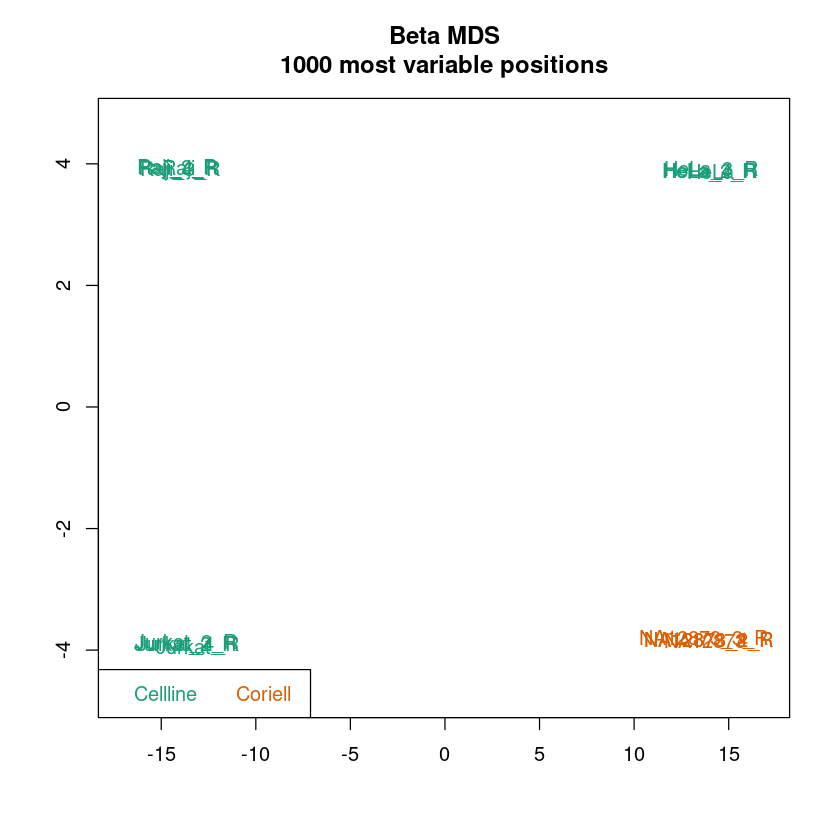

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



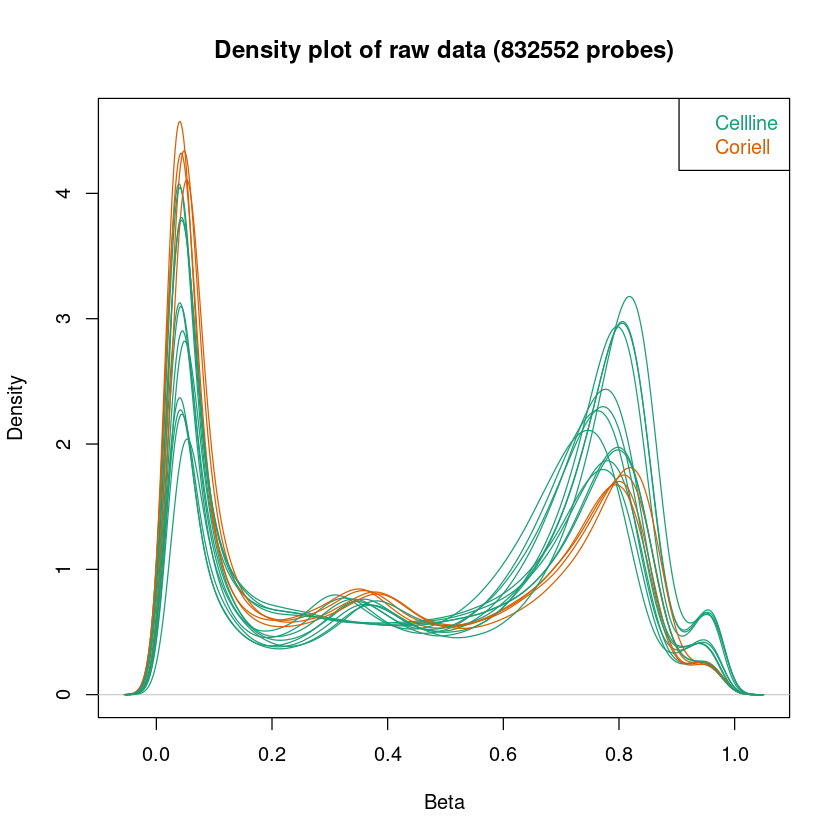

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




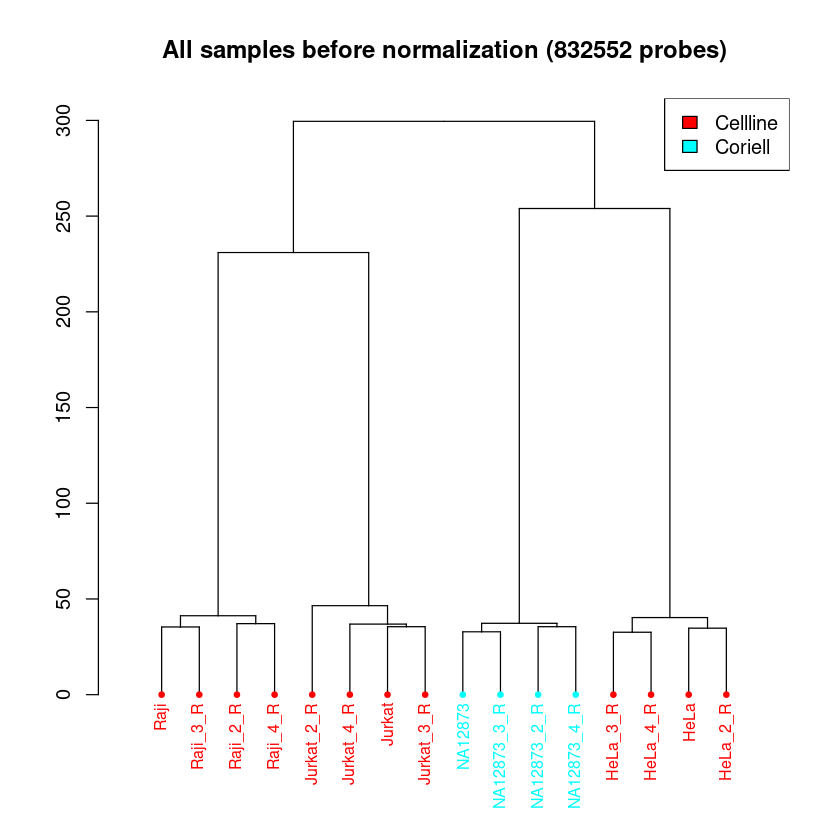

In [4]:
champ.QC(beta = myLoad$beta, # beta values stored in champ.load output
         pheno=myLoad$pd$Sample_Group, # what samplesheet column is your phenotype (where do u expect the major difference between your samples)?
         resultsDir="./CHAMP_QCimages/") # the plots will be saved in the directory this notebook file is located in

### Normalisierung mit anschließender Evaluation
Nachdem wir die Daten im oberen Abschnitt eingelesen und gefiltert haben, werden diese normalisiert, um die Vergleichbarkeit der Daten zu verbessern, ohne sie zu verfälschen. Dafür vergleichen wir den Effekt der Normalisierung durch PBC und BMIQ (unterschiedliche Normalisierungsmethoden). ChAMP bietet zusätzlich funktionale Normalisierung und SWAN, diese beruhen allerdings auf rgset und mset, weshalb wir sie an dieser Stelle nicht nutzen können.

Nach jeder Normalisierung nutzen wir erneut `champ.QC`, um eine Qualitätskontrolle durchzuführen. Am Ende entscheiden wir uns für die Normalisierung mit der besten Separation und der besten Badewanne.

[===========================]

[>>>>> ChAMP.NORM START <<<<<<]

-----------------------------

champ.norm Results will be saved in ./CHAMP_Normalization/

[ SWAN method call for BOTH rgSet and mset input, FunctionalNormalization call for rgset only , while PBC and BMIQ only needs beta value. Please set parameter correctly. ]


<< Normalizing data with PBC Method >>



[1] "Done for sample 1"
[1] "Done for sample 2"
[1] "Done for sample 3"
[1] "Done for sample 4"
[1] "Done for sample 5"
[1] "Done for sample 6"
[1] "Done for sample 7"
[1] "Done for sample 8"
[1] "Done for sample 9"
[1] "Done for sample 10"
[1] "Done for sample 11"
[1] "Done for sample 12"
[1] "Done for sample 13"
[1] "Done for sample 14"
[1] "Done for sample 15"
[1] "Done for sample 16"


[>>>>> ChAMP.NORM END <<<<<<]

[===========================]

[You may want to process champ.SVD() next.]


[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/PBC/

[QC plots will be proceed with 832552 probes and 16 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




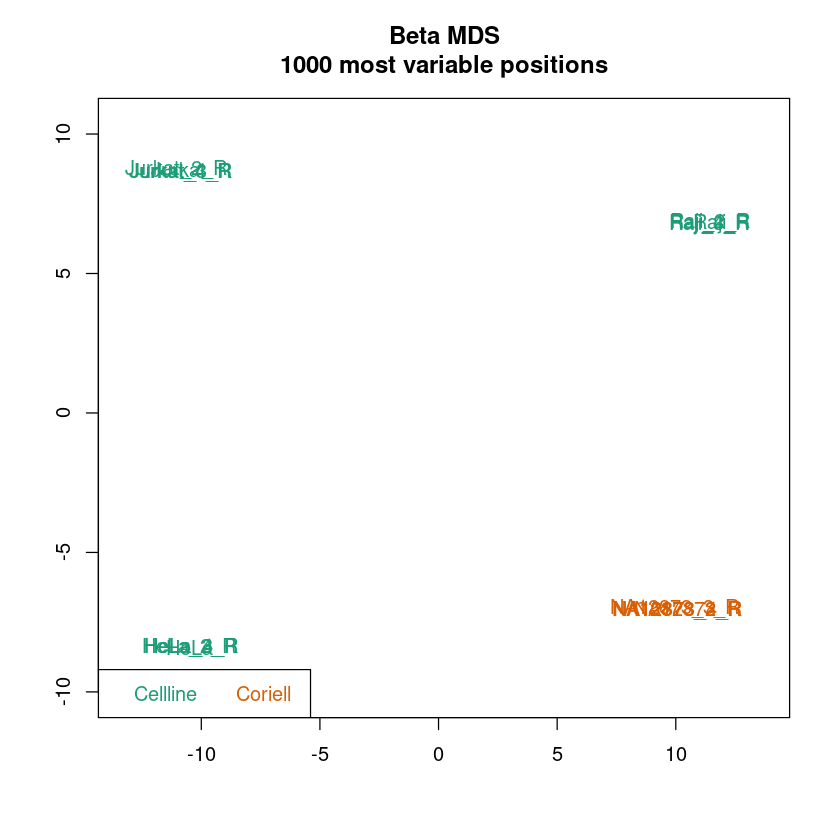

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



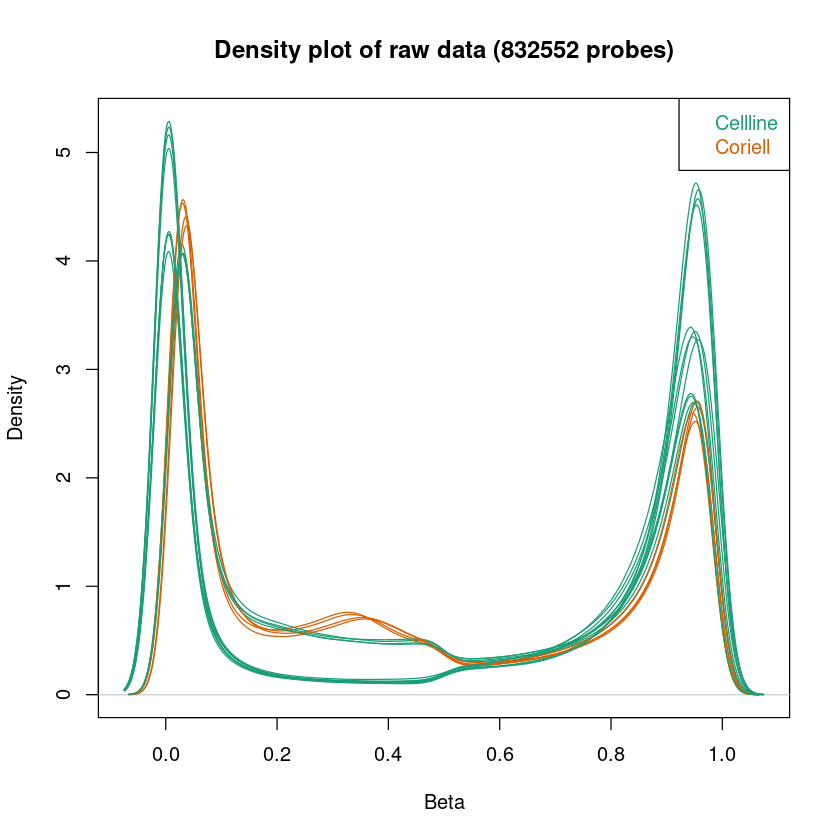

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




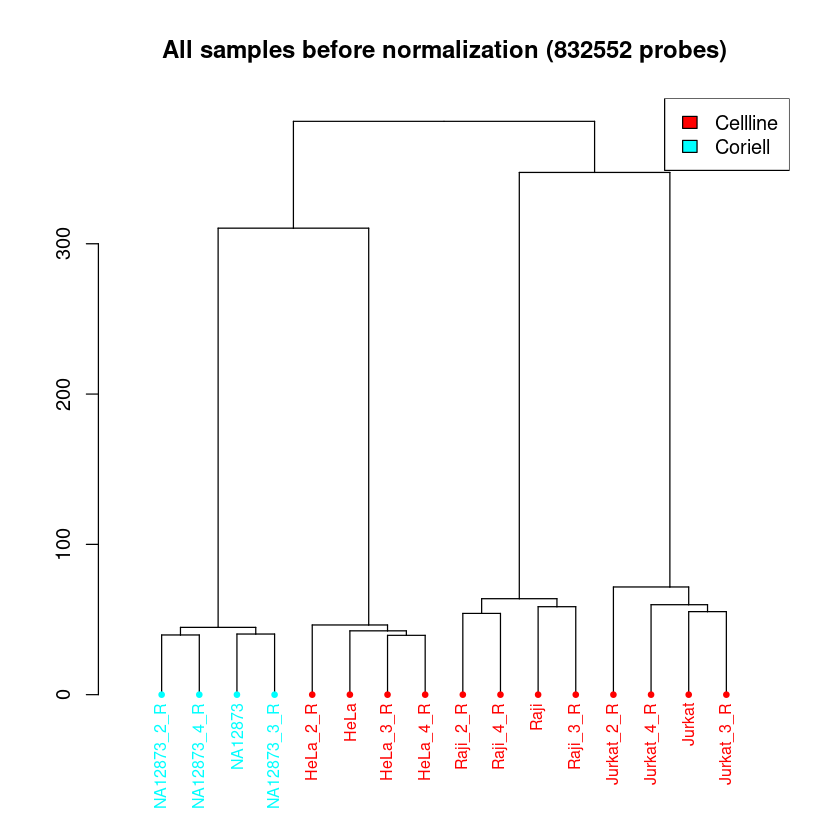

In [5]:
# start with PBC normalization
myNormPBC <- champ.norm(beta = myLoad$beta, arraytype = "EPICv2", method = "PBC")
champ.QC(beta = myNormPBC, pheno = myLoad$pd$Sample_Group, resultsDir = "./CHAMP_QCimages/PBC/")

[===========================]

[>>>>> ChAMP.NORM START <<<<<<]

-----------------------------

champ.norm Results will be saved in ./CHAMP_Normalization/

[ SWAN method call for BOTH rgSet and mset input, FunctionalNormalization call for rgset only , while PBC and BMIQ only needs beta value. Please set parameter correctly. ]


<< Normalizing data with BMIQ Method >>

Note that,BMIQ function may fail for bad quality samples (Samples did not even show beta distribution).

3 cores will be used to do parallel BMIQ computing.

[>>>>> ChAMP.NORM END <<<<<<]

[===========================]

[You may want to process champ.SVD() next.]


[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/BMIQ/

[QC plots will be proceed with 832552 probes and 16 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




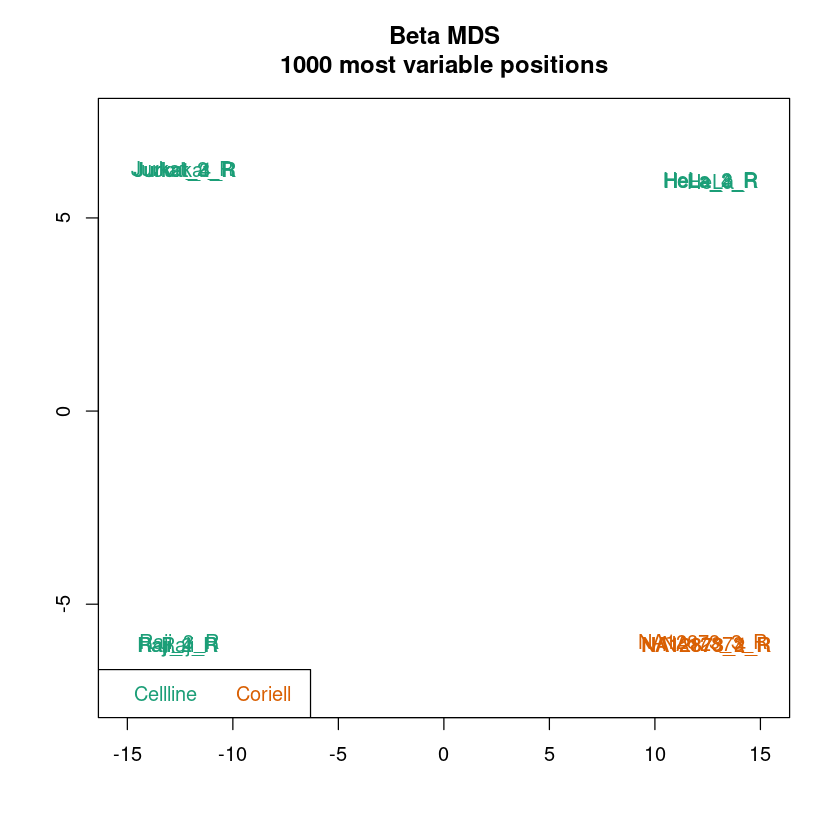

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



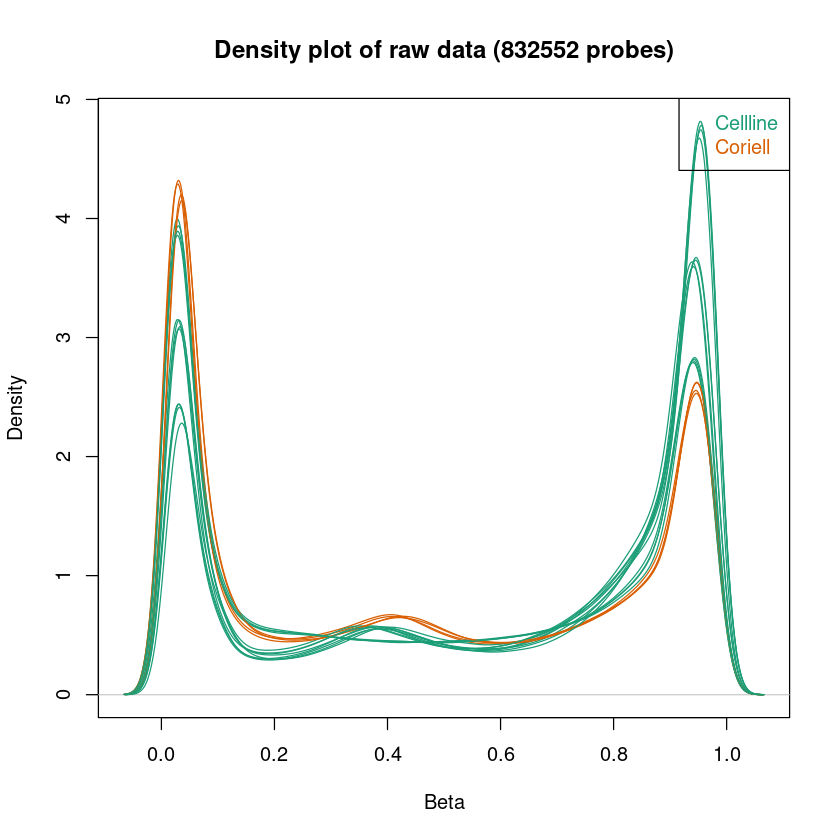

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




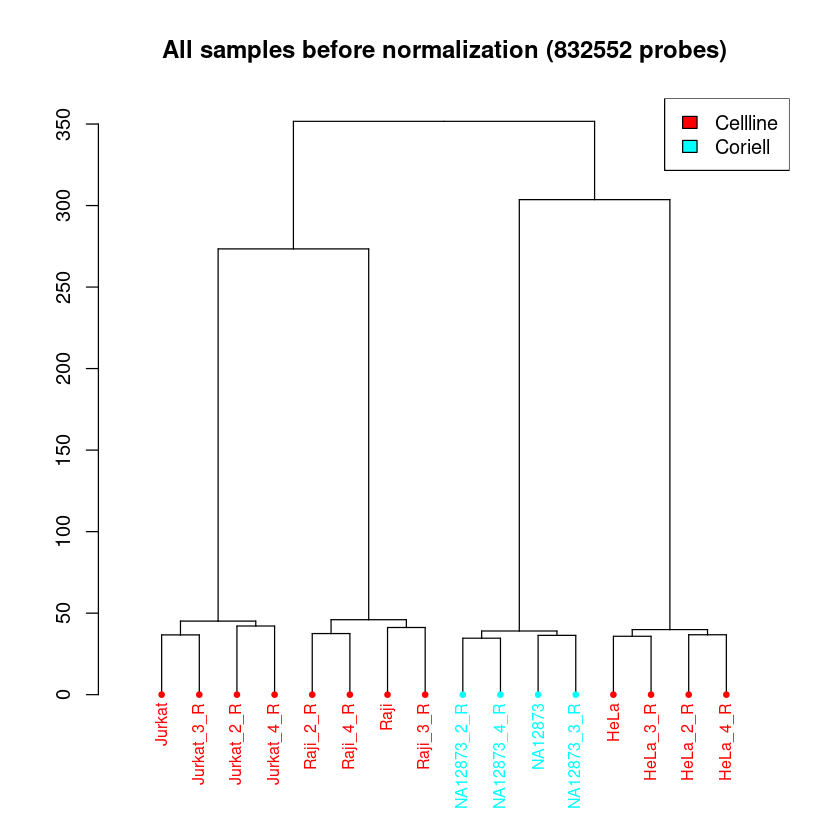

In [6]:
# BMIQ normalization
myNormBMIQ <- champ.norm(beta = myLoad$beta, arraytype = "EPICv2", method = "BMIQ")
champ.QC(beta = myNormBMIQ, pheno=myLoad$pd$Sample_Group, resultsDir="./CHAMP_QCimages/BMIQ/")

In [7]:
# save best looking normalization result
myNorm <- myNormBMIQ

### Erkennen und Entfernen von Batch Effekten
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopKYkS0Y0AACAASURB
VHja7J15fBXV+f8/Z+YuuVnISkgCBEgIBIIIsoRNoIJLq1VRKYoLgtbd1uVbl7a/VovVr7VWpSpo
Ub8WEVBwBSlWUJBdZBcC2QghZN9v7s1dZs7vjyTXRAg5E+Zm7k2e9+tF+zI5mTnL8zznc54zc4Yp
isLBGDgYJACMoV04AJUDDIB0jnJoLgeBchyAqgKyJFCOA3JH1+OACnTcFt50TejYFq3lGGvqyw7b
IlqugzYDgMLFy4mOM0fH4wIAXrWpXEf39nJANqCOqtpUTmJifiAzMZsV8SsuYDucN9sOE2iLBlvk
gv4ibGNqUxnyl87bIudN1wxof+FN9dQtdov6i2Ds9meMZ6L+0oEtahkXUVvU6vsisVtRO46LgWCL
orFbVOvoFbs1+b4ftI4KfXWbkbGbC/if0Von0P1FtI5GaR2fHgtwrSN6b0XjuklXrcPFbDEY1gb+
qKOwLYK0zvlqHS3+YpTuFvV9o2K3qE8bqnUEY7dRWsev/qJT7NaiI2idGrx5HX/pbj21jhZ/0X3u
5a3GD/r5QaD7i6IhduvV37x5caVrTl5nrePXHGMA53V6YuwOdK2jNSevpwbtbnmd883JS22CmAhc
rEjrwNQhAotdzpsu3FE9uWAdNbVZQ9cId6NgP4peVMt9uWBj9GyLr45Mx+tpua9oWYHA7utHLmYQ
3ABbFK6jJuMRLMp0CyVnTCx6jTN0tm0t99VityK2qCUm+8NfhOzGQH/Rewg12YQf5hjd/F5wPvCV
Yfp1IjfQX7jO8Y7rbLP+0DpCMYLr7ys9Uetwrk1HGKF1VB74WkerjXW11tG0xjFQ6/hlXtPZX6Bj
7NaqdTqMs83j7A+to+e4qKL+Z9A6Vev84o/YLRwiDIjd0OjTgax1hNeABmkdf6wL/KJ1mL627a+8
DusOeZ1gWacaldfxk9bhRvi0getUEa2jRcNoysnrmNcRjd3+0DrCuRADtY6mtYuBsTuQtY7v4eVA
1joag54RWsfwnLyOHdneuDBFUThjDAATNxiBpxJaGiF0Teh8PQ3lhNuiYx25BvviOvahpjYbNM5+
Gz+RcRG8nuE2prctBrpfkS0GZB391Y8BH7v1bgvF7p7h0zrbol/aYlCbRduiNS6SvwRg7DZo3vdX
7NZVt5GOCMg6qrzjp5CN1Dq8lYGR1une/tKdfNoorcNbVS5Q1+bBsjZoeXMm2HU3aR0dfZryOkFZ
x5Z7BnpeR1SPUU6+Y83IGPlLZ22i5QEBJgV2Xkf32B2AWse3mclEZzOCIAiCIAiCIAiCIAiCIAiC
IAiCIIguQKIuIAiCIAiCIAiCIAiCIAiCIAiCIAgiEKHNTIIgCIIgCIIgCIIgCIIgCIIgCIIgAhLa
zCQIgiAIgiAIgiAIgiAIgiAIgiAIIiChzUyCIAiCIAiCIAiCIAiCIAiCIAiCIAIS2swkCIIgCIIg
CIIgCIIgCIIgCIIgCCIgMVEXEARBEARBEARBEARBEARBEJ2lcedu8Npa6ggiYJBiY2EdexF1BEF0
E3ybmSoHGADGzv0HWsoBgNRBOd78r6NXRDlvLsfEyjHWVM9z3lewLc1NQQfFxNss2paWOnbUFsE2
+2OcRdsCAAoHZMFykgF11GSzAvcWHT/RtnDe9A9SYPuLyvW1Ra1tESrHxF5LN8pfOAdUGOMv/opj
usU7Uf/jPwZtFsj+0lw/PWM3dPYXo2xR79jtL60j3BbWfWK3YVqH6e8vemsdFWLzi1H+0nLNQNU6
PhsLYH/xhy36ResYFBeDYW0gGsfU5klaN63jB1tUOSBJBmodAd/XspY2SuuIrg2Mit1G+nR3it2i
awPdx0/rXBnAeZ3utDYgraO/v7iPZKHuX+/AcyQLBBEohGSOA7NaYbkgwy9ax185+Z6W19GcO+xi
rRMsOXm9dbfubdFhLW1qaajCAZNAh7QkQEQ6GQJOglaLMJF7iwgNVcTx+I91FE3cyYIGI5LoQqtB
7miBKgtYoaoh2EgaAqwsGBCFk2ca6gid6qiKLv44oEA80MlM0LYFAyJnzWPdkW+pYv7CRWwMgjbG
9bedloQvE/UXgbgjvPgTTE61JNlYV9uizv6iNXaLCg1VQ6JNOCEnGLuF/KW5rCwJ2JiG2M068Beu
xV/U5nI6+Qtvnoh09ZdAj93NviqiD/yhdURsUW22RSO0jlBb+I++T1qn81qH82ZbZPr6i2ibRRN8
Cg9wrSP4pKPeWkdL7G6JtSyAtY7oOIvERX/EbtF5n/tJ60DAHrRuKuq9ThX1F1U1UOuI9A3EH/Ay
Susoqv6xu6dpHe4nraP3OlU0r8MhoO+6kdbRZIvN+YhA1ToQjTvc2LyOyBNwwjbmB62jcu2xmzc0
AJzDOnY0TKkpYGYziO4F07AeNBq1rh7uffsBiYFZLZ3WOkbGbojm5bpBXoer4jl5w7QOxHPyPU7r
QH9/aS8nb2q5hywg3n1GKlBOEtliba64DMFyAoPmux7ruJwEsTpKgtFaxNlbl2NMrC2i5UTaIgt+
JVUWbIvo+EHQxrSW09LfIrOyUH+L+ovOtsiY+EduWxbjov6ip42JBNfOjJ9wWwRjiajNSjrbIjfA
X5hgHbXE7pZx7uo4psVfBE3Wb7Eborajp41JrYS5SBzTKUZosVnRGKH7uBiodSQtc6rOWkeTXxno
L3rO+0ZpHcaahHUgax3d/cUPupsJxgijtA5jgMT1tTG9tY7W+YUZoHWY3rpbZ63DGMC42ANHRmkd
LfHOKK2jZX4xSusAgEkS9ysjtI5WzW+E1pGlVg8KBKDWCYa8jpbYLRmkIxhr9pcA1jpMapqnAzl2
a8pFGqV1IOYvbcZPUaCcKoL54skI/9UNMCUl+H7Fm/9H6K0iLmY7Wt5AErEf0YfV9D4RxV91hMAD
rYz9+P96jEtLOYg+HKjnqW4/sQfXgUNwbd0O7vaAhYX5VevonpOXxPxPi9bROyevt9ZhEiDzwNY6
TLA9WrUO60FaR499JFNnxIue5UTLatiPEi4s3BaIG7Xu1/NHWwwaZ8kPQlrPcpLONmtoOQP9RTKo
jpraAuNskelYLmhit5HxrqfFbtE6Ghi7pR44vwRD7GYBHrs1xSYDtQ4LcFsMBj8ICh0RBP4S6Fon
KNYGUmDbmF/iooG62yitEyx6o1utDWCgv3STtUEw6AjJQK0a8PmaYMmZaPQXzjm4xwMAbTYye2pe
J9D9hTENZYMh3v3072wh4M07tUyWe3ReJyhsNsDnQMaCJK8TDFrnPG1R9EFJgiAIgiAIgiAIgiAI
giAIgiAIgiCILoU2MwmCIAiCIAiCIAiCIAiCIIhOwTn1AUH2SBCEf6HNTIIgCIIgCIIgCIIgCIIg
CKJT0N4REVD2SAZJEN0S2swkCIIgCIIgCIIgCIIgCIIgOgWjLiDIIAmC8DO0mUkQBEEQBEEQBEEQ
BEEQBEF0CkabR0QAIZE9EkT39G3qAoIgCIIgCIIgCIIgCIIgCIIgCIIgAhHfZqboUdKci507LVpO
C6LXM6qOQdGHQVJHPe/dY/uR61euR9si+QvFboo5FLvJX8hfyF9I65DWIX+h2E3+QrE7YP2lJ9oi
+Uv3j92gmENah/yFYjfZYo/XOkHbh6ra9E/nOkotN/QoHTeEc8DLAVWgnNL8ryNUDngE2qWoTdfj
AtfTUk4VqKNXbfonVEdVv3tzaKujUDmlqVxHRRUOKALOpzbfW8Sw3YpYOY+CDs8257y5zSK2CHFb
dCti5byKhnEW9BfVAH9pKae3LSp61rHFp0VsUTDIugX9xdNss1ykzQKTQYu/iOASsMWW2C3kL1x/
f/GI+otqTOxWNMRur0Gx26OK9bdX0eAv0N9fhGM3xGJEh7aowV+4YOwmrSNgO37QOiK2qMVfAl3r
uAS0DjdQ63AEvtZRuAbdTVrnnLpbb62j6qh1eHfTOgbG7kDXOoauU7kf1qk6ah1Fg7+Iah1vD9U6
IjFZU+w2SusoQZDXEdTnQZHX0XGdqjWv4/WDvxihdbwG53V4AGsdQ/M6vBtpnSDJ6wS61nHpmZPX
qnUEN8P0XKf6w18Ug7QO15KvCZS8DufgHg+4x3PGH5+vv5iApnPNTazjb+MyBsjo+Bz0lnIiu7yi
Z1hLUtMFO6xj8zU7qmPLfUVuLwsexiuzpgsywTaL9KMEsXPnRdrc0hYmWEfhcpLYvU1ayonYoqSv
LTLWdG8hmxWso6TBX0RgaPJVvfxFYk19I4naInS0RQ3+wiDm00zQqc2SWFtMkliM0uRXgvHELInb
rGGxW886+iF2t/iBnraot7/ITDwu+sNfhO7N9I3xIm1mGvxFNHYb6S+sxc4CWOswiPW33lqnxa+E
/UBQtxmldcySmH0bpnUQ+FpH77WBv2I3DNQ6ov4i6VhOq1+J2KJhWocDXLCOsmgdYZDWgf62qLu/
CMZuTVpHR7/SvE7V4C8i2oBLYrYoqnVkkXWOP7ROsx8EdF7HD7Fbb60jS0GQ12GC9hDgeR1Rf/FX
XkcO8LyOcOw2WOtQXqcL8zqgvM755nX8Eruh3zpV1K+YVq0jGBj1XKf6Q+tIgmtVvbWO1py8nlpH
dA48Q+swBma1nlfsbs9fTJoTB4LlRJxOyzVFNyn0vq9ocAXEP3bNNNyX6Twuuo9zN6qj3m1h/rAJ
LTaro7/4Y5yZgbaod4yQyKcDN3Yzff2vJ/qL7rYodSN/EbUJDbZjlL9IBs5XFLuDt44MBmoYA7UO
64mxW0sdpQCvYzeK3f6wWd39BeQvwR67dfWDbuYvZIvBm9fxR56oO+V1giJ209qgy2Io5XUodgdK
7DZU61DsDoi8jmjsJwiCIAiCIAiCIAiCIAiCIAiCIAiC6FJoM5MgCIIgCIIgCIIgCIIgCIIgCIIg
iICENjMJgiAIgiAIgiAIgiAIgiCITqFy6gMigOxRpT4giO4IbWYSBEEQBEEQBEEQBEEQBEEQBBH8
MOoCguiO0GYmQRAEQRBED6O2thYej4c6giAIgiAIgiCI80aizSOC7JEgCH/7NnUBQRAEQRBEz6Gh
oQFFRUVwuVzUGQRBEARBEARBEARBEETAQ5uZBEEQBEEQPYgTJ07AbDbDbDZTZxAEQRAEQRAEQRAE
QRABjwQAHIBbAXgHH2vmALwqoAiW8wp8/FnlTWVFynnUjuvYcr2OPjzNBcsBgCLQZrS0WW1q/zmv
13xv0bZ0dD2Opr4RaYtHEWwLb2o3BNriEfyoslsRLyfUFsFxUTTYokegjry5nKi/iNqisF8JjouI
7Yj6i6rBX7SUU7T4C/T1F871s0Vhf1HF/IUL+ouW2O3xQ+z2GBi7RdqiaBgXf8RuPf1FNN55uXhb
PIL+4lY6Lqc5duvoLyoX9BeuTeuoOmmiTmkdP8fu8vJy9OrVC1arFQDgbGxEaXllwGsdrwato5LW
aX8+UARt0QCt09p2AlXraLFFQ7WOEthaR9RfjNQ6ShBoHa9KWkcPreMxUOsI6W4EvtZRNGgdo2K3
lryOYoDWgYbYbZTWEV2nGql1FB4EWsdPeR1uoNbRM3YL+4sa2OvUQM/r8CDI62ixMaO0jqacvKot
J693XgcG+YvQOtWonDy6V05e4YGtdbTk5NvTOiag6Zu4ssBZ0gxNZ04zncq1VFwSvLdQHVnTDq3I
0dgidQQASfD91ZZ2dHRNCQBnHRdkGvuGMbG2CLUZYp0oQey+nAMmwX6UBcdFtBxj4t99lkXqyLTZ
BBO5HsT8Smbi48JZc5RgXevTkqgtavQXverYMs56lhP1F8YAWcRwBP1FS+yWNfShlngnGpN1i90a
/IUJ2qJojPD5lagtMv38RRYdl+YKiPiVULubbVHPmCxrsB1ZIOYwJji/MGO0Tks/atI6XRC7WSvD
qygvh8PZiPjesQGrdcAF52gtus0fWkcWu7dhWkewH5lBWofzZpuQxMbFCK3DoMEWDdI6LXUUml8M
0jo8CLQO49rmjS5fp2rQEZq1jmDsFtE6soY1oBFahwGQZeO0DhO0RWGtI4nbrJ5aR2Jimwo+f+ni
2A0e+Hkdn78I5nWM0DrQ6NNGaB3GAlvr+GzCD1pHT9/XqnU6HGdBrSOqiVr8Rdf8j47r1GDI6zAN
7TZK63AEvtbxxbEgyOvoHbv11Doc+ubk/aEjZEGtY3ROPpC1DnD+eR2T5gvpneiGvkFJ7+sJaj9t
bfbDJpywwTBj2gJ/GDUzzmZFJ3umYzloLMcMKifqM0b5C9Pg07JRNqb3Brwf6iha1kh/kWDMuPgj
LhplY8Fgi1psx7D5RTJmXNorxzmHqv74SOHp06cxND09sGO3hthkqNYJdH/RMFcaEbs16fNzlFUb
KtCw4R9wH9uK8KuehPWCn9PagLSOX2O3jK73g6DQ3TrrSord+sTuoMjrBIEtGtUWI7WO8CaOkbFb
MDAauk6VAt/GgkLrUF4n4HzfqBy/obHbD3WkvE7gaR0tupu0TgfjfJ6x2wQD0dLJRHBDY92Dxpq6
gCAoLlIfBjSDBg3C8ePH4fV6kZiYiLq6OtTW1OD4sWOIjIxETU0NysrKIEkSGGOQZRnp6eno378/
JIk+t072GNg0bHgRzu8/grc4C6qjBra6MuoUgnQ3QRAEQZDuJgiCfJoIckzUBd0Tb4MD5d8fgCUi
HLGjL6AOIQiCIAgCANCvXz9IkoTy8nIUFhYiJycHiYmJiI+PR01NDfr27YvMzExfebvdju3bt8Ns
NiMpKanNtUp37EHB2g1orKhE6o2z0PdnF1MHE4ZRv/avcGx6HbyuFGE/fxzWC6+EqU8adQwRkLiO
bIRSXQTr8BmQo/tShxAEQRAEQRAEQZwD2szspjScLsbmOx5EZFoqfrZsCUJio6lTCIIgCIKAyWRC
cnIykpOTAQAulwvDhw9v963L8PBwjB8/Hrt3726zmXl60xZkvf0+KvYegNfZiD4Tx1LnEobh2PoO
nNuXQa0tQcTVf0LoJfdBiuhNHUMEJK5D61H34R/APA0wxafSZiZBEAQR9HBOfUAEDirZI0F0S2gz
s5tiDg9D/PjRqMnKxYnP1yP99rnUKQRBEARBnEF0dDS2bNmCMWPGwGazoaKiAidPnkRjYyNCQ0Ph
crlQW1uLrKwsWK1W2MwWWI7nofSjL1CddRwhsdFIu20OkqZNoc4kDMOdvQ1KWR4irvkzQn92H6SI
OOoUIiBxHfoP6t7/LeS4QbCNvhOm+FTqFIIgCCLoob0jgiAIwt/QZmY3JTQxAaOefATrr7wRRes3
0WYmQRAEQRBnZciQISguLsbevXvhcrkQGRmJxMRESJIEVVURGxsLu92O8PBwjB2Sjv+++gYKNmxE
nzoH+s6chgG/vAK9L7oQtj70FhxhDA3f/h9cx76FKSkd5rTJtJFJBDT1H/0RvNGOiOuegXnQOOoQ
giAIolsg0TfvCLJHgiD8DG1mdnMYAE4BnCAIgiCIdrDZbEhJSUFKSspZf+90OnHy5EnEqRxHlrwD
9b/for6hARffPheDZl2FXqkDIZnN1JGEYXhzt0GtPIGw2f8LS0omdQgRMKjVNSj91W3wZB8HB2AZ
nArzZAUh4+dAikqiDiIIgiAIgiAIghCENjO7KYrLhbr8AkgWC0Lj9XtTIqfUjfwKNwbHWzGoNyUu
CYIgCKK7o6oqjmzajP4nilG9cw9sSYlInp6JobfPRWhiH+ogwngbdTkAxQM5Ih7MGk4dQhgOV1V4
s3NQ/PNZ4B6P70NiSulBIK8KvWa/Qt/JJAiCIAiCIAiC0IAENJ1r7lU7/lhzSzlVoJyiAorAgemc
i91b5YCXC5YTaQtvqqPIB4GV5rJC5TRcT8+2/HRcnKXlOPzPN2FL7IOUX13j+7mXN5Xz2O2ozy9A
TVb2Wa/pPUubT1a6sfjrSvzvugocOtXYVEe16d4ieBSxD4J7VLFyXrXp/h32t2AdW9oi6ge6+QsX
8xdfOUHbEbFFVdAWtfiLVxX3Fy3+xyHoL9DuL+22hYvboqLBxkTioqgfeHS0RWiI3aqfYreqky1y
/qN96xW7VY2xW7S/RW3RKH/R0xY1xQjR2M21+YERWkeLvygGaJ3W88sZv/MqOP7ZetR+tQXFm7cj
5qILMeiueRgwY+o5NzL9oXVE5w2vhnKBHLs1ax0R3Y3A1jq+eagTWoczCWDsvLSOpnmom2gdo2I3
1xC7PQbFbkXtvNbh9fVNG5lud5tfSGkVgMmJ6mee0yV2e5Ug0DrcP1oHOvsL7yb+4g0CfxHVOore
WsfovA7EbCfgtY4S2FpHU16H668PFJ3jmN55Ha8Gf9EzxuutdYDuFbuN0Dqc+y8nr+qZk1eDLycf
iFon0HPyhmkdjTn5QNY6ra+pe+zm+tni+fqL5jczRU8sZUz8gkywPOMdV4BpqKOmNjMd+wbNR7/q
2BbGfuxD1aug4XQJ6rNPIH7SOCRMmdAmijjKylH05Vc4/n8rYS8swk25e8/a163HpM6pYtXuOhwq
dGH22EhMGRL24/gJfuW7nRzTefWj0LgwiCkhptF2BTKGTINTMQ0GKVRH3tRsxnT2BRFbNMD/0El/
6XD2E7RZoetp8Remn79ojSWci/sWE4ljGmI3E2kM1+ArojFZR0dgWvpcQx2F447O12QMus+BTM/Y
rcWnDdI6nOsbd/yhdc5mix57A06u+xJf/XMJoqvrMfDnl2LIrTei0NuIhMheumgdaGyLXnrxbFon
0GJ3p7QO69gWoWcd/aF1tOgxDtj/+wrc2VsRfvkjsKZPP2/fZ3oGCQO1Dvxgi0bEbtEx0VROQOtw
/uO4aNU63N6AoszpTRuZPy1rVpvio8OpizDREnOM0Dq+mOMHraO7T5PWOS+twzTGbhEb49AXvWOt
Zq0j0u5O6MWjR49i7969GDJkCEaMGAGbzeZfrSMFttYR7keuQTOKrlO12o5gzNMzryM8X+rshP7K
66AHaR1N+R/RvI5gTt7QvA70jzn+zMnrsU71h9YJ9Jw8N0rrMO35CD3zybrjh5x8IGid1phabiZL
QjEOsqTfBOC7pkBZiYk7iaxjOd+9DSinqS2t/ttTV4/8j7+AJSoS/S6Z1qasq7gYu59ciMqDP8DS
KwIxGcPPes3W48w5sD3HiZ15ThRUeXC81IVeNknTuADi/S1iixC0RU22A8AkWk7ScfwgPs6SYFAS
bbPefgU0ve4t4v9+8b9O+Mu5MEniNqtnHYPBX/wSx0T9RdD/RMWVX2xM73Fmxthii7+wALdF0UWd
SdLRxjRoHUnSN3br7lcMkH6yYHKWluHEp+uRs/Ij2MvLMea6azHiznmITB2IE99/D6/X26V+5Q8/
8Ie/iD4laKS/SNDRD3TWOlp0REubvacOQKk+DVPfDEiRCV3jV9DXZv2ldQI5dmvqRwPq2GKDUids
h3MO1W73/beKtn7HALDoyPP2P83zi1HzkM7+0hNjt2gdDdU6RtqYznU0KnZr0bWtx/nf//43/vWv
f2HatGl47rnnMGTIkB4bu1viomHrVA1rZEnPNvvBr0TX0kb6S8DnGHX2Fwb/aB2ZGeQvGtrC9M7r
6B0jNIyzEVonGPxFyzrVCK0TTDl5dPOcvNR68Ijgw2NvwJezbsXJtRt8P3PV1CJv1ceITBuEoXfM
/fHn1TX4/i8voPrwUWTcvwCXf7Ycl3/2Xof3KKzy4tO9dbCagDumRmNbjhNj/pyNw6ca4fJwodfP
tdiYUbbIgsAJgsFPGQUTXfqQdSObIILcHoPAFlk36cNAid21x3Nx9O3lOPZ/K8C9CpIumYqht85B
5OBBgCTBarVClmXD6teT/KqnzoFa4B4XwBVAMjU9ckx0u9h9vnUsLi7G008/bUjcsXMVI07noVxR
frRZBkQ99kiX6kWCYjfNLd3Xxnbs2IHq6mqsX78excXFNL9QLCF6oNah+E3opRmpu6lvAh1a8Qcx
qteL7fc/hpqsbPDmHUXV40F9fgEskRFImn5xm/IH/vYqijZ9iwsf+w2Gzr8ZITHRHd6jpNaL/1lV
jO25TlyaEYHHfh6Hbx4fiAv6hmD266ewbEcNqh0KDQZBEARBdAPKdu7BkSXvIH/1Z7BGRWLo/LlI
/NkUhCT28a0k7Xa776l/j8eDwsJCHD58GD/88AOOHDmC7OxsOBwO6kyiaxaVEi0riXNTXl6Ol156
qesW2BYzIn41qylechUqOFY66rC4vho1DIDZAhYWRgNDEMR54/F44HK5EBERAa/Xi6NHj6Kuro46
hiBakZubi+effx5PP/00srOzqUMIgiCCGBN1QZDBOQ4vehNMljHwyitQeeQYTOHhMIWFAgBcVTXY
/9d/wBYfh+H3zff9meJshKu2FlzxwhwRBtli6fBWlXYFz64txw9FbsSEScgucWHvCScuGmjDe/f0
x1OflmHTETsmpoYiJkymsSEIgiCIIKbqcBayl3+Ioo3fInbkcAyeez0SpkxEklnG2rVrMWbMGKSk
pMDhcOD7779Hbm4uEhISEBMTA9bqkdmGhgZkZWVh+PDhCAkJoY4ldMHr9cLtdsNsNsNsNvt+zsDa
2B9B/JSjR4/C4XBg6NChcLlcmDx5MpYvX+6/G1osiPrzHyAPTkXBwuehArBLDJMzJyCkzwFIVgaY
LDQwRMBRUVGB999/Hw6HA0888USb3zU0NGDXrl3473//i+rqasTGxmLy5MmYPn06bDYbjh49ivXr
18PlciEtLQ0///nPER4ejsLCQuzatQsJCQmYMmUKdbLO7NmzBzU1NUhLS0Nubi6WLVuGSZMmYeTI
kdQ5RJfDeWDW68CBA1iyZAm8Xi/Cw8Px6KOPBmQ9nU4nKisr4XK5oCgKEhIS0KtXL7/cS1EUuN1u
qKrapKcZg81m65SmdjgcKCwsRH5+PhwOB0JCQvCLX/zC8P5UOfkkQXRHaDMz6MQBx/F3V8JVXYui
r7fBXVuHUb9/BLEXXtA0IXk8qM07gaghqU3lFRVepxNZb/wfynd+Bzk0REEwlQAAIABJREFUFFKr
BFB71DhU/PXzMmw+1oDfXhaLuDAJu/KceOObasybwjFpcCieuiYexTUeRNNGJkEQBEEEPa7KKriq
a5E4dRJSb5yF+PGjYQoNhRXA7NmzsW/fPqxduxZ5eXm4+uqrcf3116O2thZms7nNQtvpdCI7Oxt5
eXkYPnw4dSyhC6tXr8avf/1r/OY3v8Ff//rXVtpYDdzsGREQ9O7dGxaLBZ9++inS09P9f0PGIEVG
ImLBPIy88uewZAzHn3ZuQ0Lfvqj83/EIybgUckRvGphuSn5+PtatW4fdu3fD7XYjIyMDs2fPxtCh
Q8EYQ1lZGV577TXs2bOnzd+lpKTggQceQGpqKlatWoUjR47A7XZjzpw5GDlyJCwWC7Zs2YKDBw/i
hhtuQEJCgm75BafTiWPHjmHNmjVYvXo1kpKS2mxmulwubNu2Da+99hoGDx6MjIwMFBQU4K233kJ9
fT0uueQSfPvttygpKcHw4cOxb98+xMXFITMzE9u2bcPBgwcxb948Mg4/sGTJEhQWFmLUqFGIiIhA
r1696AEfwjACVY1VVlbi1KlT4Jzj6NGj4Jy38ROHwwGn04nc3Fxs2LAB2dnZUFUVt99+O2bOnAkA
2LVrF3JycmC32zFy5EhMnDgR5eXlWLZsGd577z04HA5YrVYsWLAAv/3tb1FVVYUtW7Zg/fr14Jzj
zTffBADU1dVh+/bt+Pjjj1FUVATOOT7//HNIkoQtW7bg+eefx/79+1FfX4+//e1vmD17NhISEmAy
nZm+r6mpwebNm+FyuVBXV4c333wTjY2NiIqKwpYtWwAAOTk5+Oqrr3D48GEAwKuvvgoA2LRpE554
4glkZWXB6XRiwIAB2L17N3r37o1vvvkGK1euxIEDBzBp0iS8+OKLAJo2hZcuXYrNmzejtrYW999/
Px577DEUFBTgnXfewcqVK1FaWorExETs2LEDb775JiwWCx566CHYbDYySIIgdIE2M4MMxhguePhe
OMsqcPiVxVAlhriRwxASG916RQJV5fA6nKjOOoYDf/snyr/bB9lsxsQXF6L/FTPOeY8Gl4rfrSrB
l4ftuHCADb+eGg23V0VyrAUffFeH57+owOiBIXjq6ngkRplpUAiCIAiiGxA1dDCGLpiL0IQ+6DV4
UJtTHEwmE8aNG4dx48Zh+/btSEpKgiRJiImJgaIoaGxsBOcc1dXVKCkpQVlZGfLz81FXV4fk5GTE
x8efdRFOEML5CM6hqioUhT5vQGij5Ru/u3fvxubNm5GUlIRf/vKXfr+vFBKCcrcLLrcbV944BzU1
NVg1qRQXzb0BUhhtZnZHioqKsGTJEpw8eRKTJ0+G2WzGN998g6VLl+Kuu+7CkCFDUFVVhR07diAj
IwPTpk2DJDV9+ScyMhLx8fE4fPgwduzYgYsvvhh5eXnYsGEDEhISYLFYsHz5csycORPh4eG61bmy
shKLFy/GkSNHEBsbi5EjR6KioqJNGbvdjuzsbMTHx+P+++9H7969cfToUSxatAhfffUVRo8ejeLi
YqSmpmLSpEk4ceIEsrOzYTabceDAAUybNg2DBw8mA/EDWVlZaGhogMfjQUxMDP74xz9i6NCh1DGE
IQTiNrrH44HT6YTNZoPVakV2djZ27dqFCRMm+Mo8//zzWLhwIaZMmQKHw4H9+/dDVVVMnjzZt5m5
du1avPfeeygoKMDDDz+MiRMnwm634+DBgzhy5AgURUFERATq6+sBACUlJVi9ejVWrFgBAL7NzOLi
YnzyySf48MMPUVtbC8aY77Nhn3zyCfbu3Yu6ujowxvCXv/wFr732GjZt2oTk5OQz2pabm4tZs2Yh
NDQUd955Jw4cOACPx4O4uDhfmfLycmzcuBFr1qwB59y3mXny5EmUl5fD4/Gc8Vbm9u3bsXnzZhw7
dqzNtTZt2oRNmzYhOzsbiqL4jrQuKytDYWEhzGYz+vfvj8TERJSWluKFF16AyWTCPffcY8hmJj3X
QRDdE8oqBZ06YEi79VfgiorT32xBxQ9H0FBegTjfrxm4xFGXn4sPhk0AJAYmyUi58Xpk3HM7wvv3
PeflvSrw6sYqfJfvxG1TovHFgTr88qWTeO+efrigfwhiwk346ogdS7dU46mr49u9zrT/LYDNDPzn
0QE0ZgRBEAQRBNgS4tE3Ib7DctHR0di2bRsuuOACWCwWVFZW4vTp03A6nYiNjUVsbCwYY6itrUVS
UhJycnIAAElJSdTJRKfhnGPMmDGIjY3FSy+9hOrqaiiKgstqDiCN3swkzsGpU6fgcrmwZs0aZGZm
Ij4+vsvrcOmll+Khhx6C+fVLwSMiAHq4o1ty4MABZGdnY+bMmZg7dy4kSUJ0dDSWLVuGQ4cOIS0t
DXa7HQCQmZmJq666ypc8ZqzpyOzNmzdDkiRkZGQgNDQU69atQ21tLT799FOkpKRg8uTJCNPxm6uh
oaGYPn06Jk2ahIiICKxduxZbt25tUyY8PBxXXHEFZsyYgZSUFJ8WCAkJAeccFosFsiyjtrbW94ZT
aWkpampq0K9fP0yePNn3UAGhL2PHjkVYWBhcLhe8Xi+io6NhsdAx1oQxBOLm0ZEjR/Dtt9+iX79+
cDqdyMrKwsaNG9tsZrbozOjoaDz88MOorq4GAEycONH3+5EjR2LGjBkoLi7GsGHDfGubp556Cg89
9BA455Bl2acxoqKicMkllyAlJaXNW6Dh4eEYP368b5NQkiTf719++WW88MILAIATJ05g9OjRqK2t
hdfrbae/f/zUwsMPP4xbbrkFnPM2D5D2798fN9xwwxkPlCxYsAC33357m5+1xOmrrroKo0aNgsPh
QGJiou/3M2fORGpqKpxOJxhjvn6YNm0apk2b1uZaLRvCdXV1vs1askeCIPSAVlHBKhJkCTM/+D98
MHwS8j78HAMub3rbkplMsIRHwlNTC2Y2YdTjv0HaLbNhElzw7M5x4L1ttRjU24SbM3vh3unRuOOd
Ilz29wK8f3dfDO5jwU2ZkUhPaF8gz3j+BE5WurD196k0UARBEATRzUhPT0dsbCyOHz8Ot9uNuLg4
jBo1ChaLBYqiQJZlcM4xdOhQJCcnIyQkBNnZ2bSZSXQap9OJkpIS2O12rFq1CmVlZairq4Pdbke/
i1WkDaQ+ItpnxIgRCA0Nxaefftrl946Pj4fFYsEjjzyChIQElNNwdGta3rLp27cvoqKiAAAZGRng
nKOgoAAOhwN2ux2cc2zYsMF3VN+QIUMwe/ZspKenIyoqCnV1dWhsbERJSQlsNhu+/vprlJSUYP78
+YiPj9f1GNHQ0FBMnjwZkiShsrLyrJuOVqsVqak/ru3r6+uxY8cOFBQU4I477kCfPn1w0UUXYfXq
1cjJyUF0dDRUVUVtbS3mzJmDiIgIMg4/8dprr6GxsRHXXHMNGhsbqUMI4iccOnQI33zzDQYMGICC
ggLcdNNNGDVqVJsyZrMZFosF4eHhmDVr1hnX4JzjF7/4BTIzM9GnTx9YrVZfbBw48OwiNCkpCQsW
LDjj53379j3rz1uu13LtyMhIpKSkIC8vr922McZgtVrBGMOAAQMwYMCZL5P069cPc+bMwZw5c874
2/YeMhk5cuRZv7t7wQUX4IILLhDq95ZN22+//ZaMkCAIXTEBTcdIqyogsXM/uSBaDvjxQ7tSB+U4
mj5z02E5DqgAJHRQR950TYaO28J5x+WApvui+d56tLmlHGPnPoaB8+Y6nqO/JbMJZVt3ouzAD+h9
YQasUb0w5qnf4fArb2LG8jcQ9pM3MRXefh9yDnx6oB4uhSOn1IOvjzbg3hkxeP+efrj73dO47tVC
HFyYiogQCVOHhvnawjkgN3fOZX8/ibxyF755YhD6RrfdK/dywCSw7vKqgCxgY4raVEaovzkgSR2X
42i6d0c2K+QvAuPX2hY7sh3Om+oo3GaI+RUXscWWsqoKgJ/1yaqWp8I4k5r6xih/kToup7JmP0DH
NibpbIut/aWjeCcL+Is/6ig6LkL+0my3Qv6iIXaL+AtnBsZuCM4vvOPrtcRuBp3HLwhsUaSOusdu
f2id5joGqtZpuR6YqL8wxMfHt/t2U01NDQpPFeGiiy4CR1My/+DBg+c3Vzb7NIOYv0gi/qc2t9kA
fzFK67T0T6Bqnfb8yuVyobq6GvX19RgwYAD69euHEJsNNTU1SIg6AMZK2k3uC2sdUb8SvF5n5hdJ
dE4V0TrN1+vpWodzjk8//RROpxO33norAGDs2HF48De/6VhHNMedzmodzjkWL16MhoYGjB8/HmPG
jMFfYksQycXWx8JrAynAtQ7EY7dhWocBIu8NdmSLAwYMgNfrxc6duzBufCbCw0Lx7bffIjs7Gxdd
dBEaGxt9b9C5XC5MmjQZKuf4csN/cPz4cTz55JMYPXo0tm/fjkWLFsHtdmPq1KnYunUr5tx4E9LT
0895ZHtntY7UzuRxNlusqanBxx9/jNWrV+OKK67AZZddBpvNhkmTpyAhMQmuxqY3n77//nv0798f
b775JmRZxvTp0zF9+nQwJmnTOoLrVKHYbeTaQGCu9GkYFthaRwHldfyhdbokr6NF6wjqbqO0DtBk
ix3lderr61FZWYmUlBRIkoSrr74al1xySYfzeWtcLhc+/fRTbN26FY8++igGpaT6XevExMRg4cKF
OHr0qO/hmJ/6i8lkQkxMjO+Nf639zZuNQeX653VSUwdj48aNqKmpQXR09Hn5i9KSBw1QraNJdxuo
dQI9dnMI2qIGrcNVY3LymvM6OmmdFt1tqNYRWKcK53XaGWdT68YK5D9+7EABQ+ACwcZnDKIJbCZm
/B0GkVZGKAvUsSkL2fG9oaEPZZy7Pbx5XNqrn2w2Y+Qj92L/3xbh0N9fQ9zoERhw5WWIG30hnGXl
+OHVpRj//J+FE+fPri3DZ/vq8eSVcZBlCX9fV44aJ8d9M6Kx7Nf9sGRTVfuTM4Ar/5GP7FIPNj2R
guRY81mFNJfEHE9kMakCkERsggsNX5NNQHBRIOgvqoC4am2Lwv6nVwK7ZbI4hy2qqgpF5VBUjiWv
v4Y33liCvLw8eL1eqKoKxhgkSUJ8fDzmz5+PBXfehf79+sFsks751LAKsW8q8Ob/YefpL23Kqs3B
U6fkS0sdITihCSdLJH1s0dc3vOM+FN10aYknkogtCo6z1tgNgdjNBUWT7rFbMBGh8qY4xgTqKOIv
LfMpF+lHiG3qq4K2qGiJi3r6S+sFr06xmwv0eYt9QdBXNG3W66x1RG2R6aR1ZFlGo6sRZovV1/D2
jhfSEru1bDILbTShuc06xm6Vi+sII7SOyrXV0RCtcxZ/MZvNiIuLw/jx47F06VLYbDYozT5Y/6+5
aNy18ry0TmdiNxN52EKj1uE6zamt5wO9tI7usVtQ6/Dz1DoOhwM5OTlQVRWZmZm4/4EHoCj8rMnK
dm2ik+PicDhgs9lgsViwaNEiXH3Ntaj4fxkdj6FGfxHpIKO0DtewvjJc67Dz1zqjRo3C9ddfj+XL
38esWdciIjwcaWlpbb5xOWHCBCxevBgWiwVR0bEAYxiQ3B/PPPMM9uzZg5SUFNxxxx2oqqqCqqp4
8803MWzYcHz33XdY+/lnSExMxK9//Wv079/f71oHP9E6JSUl+Pe//42tW7di1qxZuPrqqxETEwMA
6NUrEheOGo3c7OO+N0rr6uoQHR2N0NBQbNy4EX379kXakKHatE5HtqNB63DBDJ+W2K1HXqdTsdtI
rdNd8jo8sLTO+eR1VD+sU7nog6WisbvZFrngBhIEbbGjjYrx48fjqb8sRH5uLo4cOYKQkJAzvt84
YsQITJo0CWHh4WeNTx6PBzt37oTJZILD4YDb7YFsNvtV64SFhWH27Nlwu92+o6N/qnXi4uJw2223
4cCBA53P6/C2Gyp65XUO7N+HfXu/x8iRIxEbG3v+WseonLwWfxHROoJtFtU6XKPWCeTYzVX98zqi
sVs0ryM6T2vO6+ipdQT9xW9aR6Ddwnmddtapppa6mAWsgAEwCZaTJTEjkJhY0lzvcoyJPZEAND8V
wATL6Xi9jtrCTDKG3XkroKo4/c1WHH39bdhPFGLIrXOgutyoOnz0jL851zjXOjlsFhmxETKuHhUB
zhU881k5jpU04vEr4/Dby86cgGSpyaB/+dJJHD3txVePDcTAWPNZDdIsizmKWRIvJ9TfguUYA8xM
zL6F/EXQxrSUk5lY35yvjbUknU+fPo2XX34Zy5cvR0lJyVmT0ZxzKIqC4uJiPPvss3j22WcRHx+P
pUuXtvkOzE8xdbG/dMb3RW3MpMEWRb8Wo8VfdLPZbhS7fQ+qBGDs7oztmHS+niSJiT/GAJOgLVok
ff1K1F+E26K31mEabMcgv9LqL0wnfyktLUVinz4wNS9EiouL2zxR7G9/MSp2i+oII7WOsO0YpHVa
6vhTW+S86VQIxhhqamqQnZ2NiooKuN1uJBcXIzpA1xBGax09bczsB3+xyDraYjvlqqqqUFpaCpPJ
hKKiIvz+yScxatSoM45bO1v9JMGY1964NDY2YvHixXC73bjuuusAADtvCsFopuM6VdIvdvvNFqGv
v/hD64jG7o60TmhoKK699lpMmDABlZWVMJlMqK+vR25uLqKiohAaGgqbzYbIyMg2fzdmzBiEhYXh
1KlTcDqd6NOnD/r06YPVq1fDbDZDUbyorqrETTfdhA8++ABfffUV5s+f36Va5/Tp01i6dCn279+P
u+66CxdffHGbdshS01ub27ZtRUNDAzIzM7F9+3ZMnToVVqsV+fn5OHXqFIYOHWpcXkdn3e2PtYE5
GLROgOd19Pb9rtI6552L1NmvRNfSmjQR02/8RG1nzJgxGDNmDJ5//vl2y/ziF7/ApEmTIMvyGXam
qirsdjtUVcXEiRORk5ODuLi4Nt+S9IfWWbx4MR5//HHMmzcP//znP89aLjExEZMmTcL48ePR0NDg
+56yaF6nxQZNfsjrfLFuLf785z/j0Ucfxfjx489PT4vGiCDIMZqCJMcY0LHboLxOyxuZIn0TDHtY
wZyTp29mBjnMZMKwu+cjbsxIlG7fgyOL3wGTJchWq+aPLHPOcVlaL4xKbJoA502ORmKkBQUVHvQK
aT88/ur1UzhS7MZ//mcAUuIt7dq46Jc9jPpGczB8HLqrqnjPPfdg5cqVqK+v79THusvKynDNNdfg
5ptvxu9//3vfh8GJ7mOLRA+yR+qCgCA/Px+DBg0Kirhz7NgxTJs2DWZz0ykNWVlZSE9Pp7hIftXp
sW5sbERVVRXq6uqwbt06rF27Fjt27EBVVRUWTVFwbQr1KNnY2amrq8PevXvhdrvx1ltvAQCuv/76
Djcz9Yg7LpcL4eHhkGUZf/rTnxAdakbsiX+SXuzGVFZWYt++fejbty8yMzMBAGvWrIGqqk3HY4eE
YOvWrcjKysL06dMxePBgAEBFRQWcTiciIyN9b+Dk5OTgP//5D2bPno3t27cjPj4e6enpGDhwIE6e
PKlbnTnn8Hg8UBQFTqfTd/qO0+kEYwxmsxl2ux2ff/45vv76azzwwAPIzMyELMuw2+2QZRnW5tzD
nj17cOjQIcydOxderxeyLMPtdkOSJKiqipCQEFpf9aD5hbqc7DFY2Lx5M371q19h0KBB2Lt3b5vf
OZ1O7Nq1Cx6PBwUFBaiurkZaWprQZub54PF4YLfb4XK5zlnutttug8PhwJEjR5CSkhJANt50ghsj
Yw+6mEMjRn0T6NBmZndwJllCfOY4RA1JQ9Zb7+HkFxshcQWeunrN1/ryWA3695EwPzoKoRaGy0aE
nbP8jYtPYu8JF9Y+lIzBfSzk2EFObm4urrvuOhw6dKjdTUyLLCOxVy+M798fs0aMQJ3bjU8OH8bO
ggLUNjb6/o5zjuXLl2PHjh149dVXccUVV1AH92AURUFjYyM8Hg/MZjNCQkLa/eB8d8fr9TYfT+PW
9Hc2m833tCXRs3A4HMjNzfXrZqY/FrAtREdHw+Fw0EASncbtdqOqqgpffPEFPv/8czDGYLVaYbFY
wFgjVCZ1fF430SOx2+1ISkqCoigoKyvrcrstKWn6nmuvXr2Q4dyLcFmhQenmGu+zzz6D2+3GPffc
A4/Hg1WrVmHgwIEYOXIkGGPgnOOjjz5CTk4Obr31VjDG8Prrr4NzjpEjRyI8PBwulwtLlizBuHHj
MHbsWGRnZ6OoqAherxe1tbVnP7Kvk1RUVOAf//gHNm3aBK/Xi9LSUtTX12P69OmIj4/H7bffjoyM
DHz++efYs2cPnn766TabkmPHjsWTTz6J+vp6bN26FWPGjMGFF16Iuro6pKWlYfny5QgJCcHIkSOR
kZFBRkKcN4ccJ/FW2deoUZwYGZqMO+Ono5ccSh1DnNd8XVNTc9b1udvtRnl5OR588EHYbDZs2LDB
98CmP2l5UKSjnEldXR0URenUSwj+xGKxICIiAlarlQyMIAhdoc3MboQcasPIRx/AD4vfQmNpGRqr
a7Qt9l0MlQ0q/vHfSiREm3DFiHCEWdvfnnzw38X4/oQL79+TjCEJVuGjU4jAZNmyZfjjY4+hsLS0
jRCSGEN8eDgeuvhizBszBrFhYb5Na6k5WX3H2LG+8+kfW7cO73z3nW9jMy8vD7fffjuWLFmCa6+9
ljq6h2G323HixAnk5ubi9OnTcDgcCA0NRUJCApKTkzFo0CDft3Z6ChUVFdiyZQuOHTsm/DeMMYwb
Nw6XX345GVUPZPfu3Rg+fHjQ1LflSFDfPCJJiIiIoIEkOk1JSQl++OEHzJkz58ejtpo1iPu9XwNH
v4RkMlNH9UC414XK/50B78nvEfPkt7AMGtvm906nE8eOHYPH40FSUhIkScKpU6e6pG6KoqC8vBxe
rxePPPIItlzHoUbSpnt3Ji4uDrNmzcI777yDefPmwWQyITMzE7fffjtSU1MBNG3+zZ8/H6tWrcLN
N98MzjlSU1Px+OOPY+zYsZAkCatWrYLVasW0adMQHR2NK6+8Es8//zx+97vfwe1248knn9StzpGR
kbjzzjt9RyG3xmKxIDExEREREXjhhRdgt9vPKNOrVy/07t0bMTExuOOOOxAREQGLxYKYmBjccMMN
mDZtGhhjiI6OPuN4XYLo1FrKa8fu+lyo4DjZWAEAeCDhMlgYpTeNXwMEZ70ZY75/PyU8PByXX345
+vXrB0mScO2117b7+Qw9CQkJQZ8+fTrMlYSEhEBRlIB7AzIpKQkTJkww9GHcYLVHgiDODc323QjZ
asXgudcBqorv//ICQvvEa/r7SrsXY/pZYbPJ+P3qUngVjisvDEe49cxF9wtfVODr4w78fW48Lky2
CJ+BTQQmCxYswJoVK1DvcvkS0CEmE9bdcQcmDRgAiTFIjEGWJKD5m1U+gQBAbvnqOud44cor8fjP
foa7Vq/G2qNHwTlHaWkpHn74YZhMJlx11VXU4T2EsrIybNy4EatWrcK2bdvQ0NAAq9Xqeztz3Lhx
uP/++3HNNdf0qH4pLS3FJ598gnXr1rX5udvthsvlgiRJsFqtMJlMbRZYd999N21m9mBfmjp1ahsb
Cg8PD9g3dWNjY3Hq1Cn0798foaGhcDgcMJlMKCwshNVqxcmTJ1FaWuo7eig8PBwjRozoksQAEZxU
Vlbi+PHjGDhw4BlJnWqLBV5rJJgcQh3V01C9qPjjCHgrChA+dQFMUWce+ebxeCDLMhISEjB//vwu
TfZxzmE2m3HDDTfg9ddfh/vZMYDiAjNZaOy663pcljF58mSMGDECTqcTABAWFoZevXr53uSx2Wy4
6qqrMHXqVN/xgVarFVFRUb4jZq+99looioKIiAhIkoTk5GQ888wz8Hg8kCQJ0dHRutXZYrEgNTUV
qampyCv3YNWuWuzOsyMiRILDDRTXNIDDDs4tANpLqhf59CpHFaJDazH/4ijMHher61ukBJHvKsd/
aw5jem0k5lUk4kiIA2+wg+gl23Bn/M+ogwwmWPeObDYbBg4ciL59+57xO7PZjOTkZDi/+hq1rywG
Ly1D6O5v/F6nK664AkOGDOnwONvMzEzDj/E+G7fccgtuueUWY+2RNjN71rJAVXHq1CkcPnzYt8Ef
Hh6OCRMmBJx/dCUOhwO1tbXwer3gzfn8pKSkoD4pr9tsZlZVVWHbtm3YtGkT8vLyYLfboSgKVFXV
tPiwWCyIiopC//79kZmZiSuuuCKo3iaQzGbETxgDU3go+l2uTcztzndg1kW98NJNffDg8hL8+eMy
cM4xc3g4osIkmJpfvVzyTRVW7K7DAzOiccnQcFhN9EpmMAf76dOnY+f27fAoPx579cCkSXhk2jQk
R0X53r78cYH6E5Eqy2CqCsgyoKowAYgPC8OHt96KOz/8ECsPHIBXUVBQUIC//vWviIiIwLRp06jz
uznV1dX46KOP8NJLL6G8vBwZGRlIT09HdHQ0GhoacOLECZw+fRqHDx/ucZuZcXFxmDlzJhISEtr8
/NChQ9i8eTPi4uIwceJEDBgwoI3vTZw4kQyrByNJTU8NuVwuFBUVoV+/fl2+mamqKioqKlBYWIjE
xEQkJSWdtdyoUaOwe/duqKqK0NBQFBcXIyQkxHfUbGJiItLT032bCmVlZdi3bx/GjRuH8PBwGmzi
DBhjaGxsxJdffomZM2e2efP3dwNOYFQvN1TQ8Z3dmY3uL5DjOQbOm9Z20VIcLnn6GSgV+YhbeBDm
pLO/vc45hyzLSEtLg8PhwF133dXlCYQVK1Zg5YoVOH53HAY8sBKm3qk0oN0Yi8WC3r17+/7762NO
/PuTUkgMiLbJOF7mhlfFT44EdDb/azFcNH+YqbZpruTAgDgzFt2cCLOsz9p7yzEHlnxTjRPlP36P
zaNw2BtVNHpU35G4XlX7tYtrvFj4WTle2lAJAEiOtWD+lChcfgHN8UGTJ+AqfnCcxMfVe/CzyBG4
OCI9IOp1ylWFo44i3LO3GrYX3sBFYy/ElEVzkd9YToMWCHotSOvUqsY1AAAgAElEQVQ9adIkbN++
vc3DxD/FW3gK7v37IWl8aaSz9O3b96ybq2foo40bA7JPa2trcfLkSYSHhxv2diZ9rjPwcTqd+O67
7/Dee+9h6dKlPm0kSRJWrFiBCy+8EEOHDu3wOgUFBfj++++xfPlyfPbZZ/B6vWCMISYmBosXL8bM
mTN1fRCsvTWHw+Foc4qFxWLx+33PRXl5OT788EO8/PLLyM3NhaqqkCQJ27dvR2pqKuLi4oLSboJ2
M/PUqVNYuXIl1q9fD5fLBY/Hg8rKSlRWVqKhocF3ZriWc8NbPlDc8j23jz76CC+++CIsFgvS0tLw
yiuvBHySzetoxKn/boGtTzwyHtC2WB+eYMXWbAeWbqnBP29OwMPvF2PhZ2X4+4ZKPPizOIxJDcMf
PyrGsdONGBBnwS9H90K4tWd+8647UFpaissvvxyHDh3ybfozxvDunDm4evhwRFitvkQza37zkp/l
4QCmKE3rba8XvPktGwlN39ZcOns2AGDF/v1QVBW7d+/G2rVrMXjwYCFhRgQniqJgx44dePvtt1FW
VoarrroKDz74IEaPHg2z2QxVVXH69Gls2bLF8OOmWmy/ZaOoqxYmCxYsOOPnS5cuxY4dOzBw4EDc
c889uPTSS8mYCJ9PtTxFl5ub63vLo6tpEejff/89Tp8+jbCwMIwfPx5Tp05t87aTzWbDlClTkJ+f
j4qKCjQ2NiIpKQm9e/f2PSXZ+knA5ORkSJKEH374AZmZmTTgxBm43W44HA5UV1ejuLi4ze8euTUZ
sEWDWeh7Wd2VlY53sMLxNrI8h6Hwpk3rOLkPJnrrEJFxGSTbueNhY2MjsrKykJOTg2uvvdZ33GdX
xMyQkBAsXLgQ8ZIbISf+CUQnAvRmZrfl2XUV2J3rhEf5cc1U7VBQWusFAJhlBodL7dTbS9mlLlyz
6CQYAAaGsYNs+H9Xx0HW+K2XLccasHhTFbJKXKhxqPAq7dWm86+0KCpHdYOC6oYmfy2u9eJYsQs7
ch24Y2o0+sfQseCBzhFnEf5S9DFKPXU40FCIw5GncG/CTEPrdNpdje31x5FsjcGFYeFwAbDKFowK
H4gVFTvwbf0xXBwxlAbPQIJ188jlcqGuru6c6yvOAC7LXdbIAwcO4JlnnsHgwYPx3HPPtauP16xZ
A4vFguuvv15Il3i9Xqiq6vdvWW7ZsgX33nsvpkyZgpUrV5I9dnOKiopw22234euvv4YkSVi2bBlm
z559zgcEFEXBpk2bMHfuXNjt9jb7NxEREbjpppswceJEbN269Zz3PnnyJP7whz/ggw8+8Nl4i71X
V1fj7rvvxtNPP40HH3zQb+1XVRUlJSVYtGgRXnjhBaiq6jutY9myZUhKSjpnX/iD8vJy3Hffffjo
o4/Qv39/pKc3PZRUWVmJSZMm4YYbbsDKlSsD7ohqEYJqM7OmpgYff/wx3n33XdTX1+P06dMoKyvT
9PZlR4FdURQoioLGxkbU1NQgPz8fjDHs27cPR48eRXp6Ot566y2/DPYPr7+NnOUfot/MaRiy4GZE
DOivPdlTU4PDi95AzIh0mMNsGtoOVDkUlNWpeHVjFdweFS/emIhb3jiFrTlO/HVdGUKtEmocXtw0
Pgr3XBKNxEgTTQ5Byrx587Bu3TpUV1VBbXWs7Fd3343x/fvDJElgrZawnHPfU3a+B4V/sszlaN7Y
NJnAOAdTVVhkGW9cfz08ioIPDh6EqqpYtGgRRowYgXnz5tFAdFPKy8vx9ddfY9++fZg2bRruvfde
jB8/3vd7SZLQr18/3HjjjYbXtbKyEjk5OZBlGYMGDUJsbGyXbmwShAgTJkzA6tWr8ctf/hL19fWI
j49HVVUV8vLyIEkSKisr4Xa7IUkSOOdITk7GsGHDzvrm5g+vLQWTTRi24GYwi7ZkoiRJ6N27N6ZM
mYLCwkLk5OTg/fffR0FBAW677bY2ZWVZxuDBg33ivr6+HlFRUZBlGXV1daiqqoIsy6ipqcGJEydQ
UlKCiooK5OfnY+zYsRg4cGCXC34icGk5FmfatGm477772vxuWO7bkGxhQHgf6qhuyKbG/+CF+j+j
Vqlp8/Mqbxns3I2km1+BHN3vnNfIyMjAvn37urzue/fuhdfrxc6dO/Gn2C2QvVU0oN2UZz8rw+4T
jcgpc6POqbR7tJ3b2/kNwkYPx6HCRt9/55W78F2+A//v6t7ITAkVWpd/tq8ez64tR1mdFx6l687f
8yocFXYvVu6qxY5cB+6aHoPrx/QiwwnUOZcrKPXUIky2YWHi5dhcl4W9jnycdFUi2WrcscEFrkrs
acjH9F5DESaVwS1JkGQZvc0R8MKLnfXZtJlJdIoNGzbgkUcewXXXXYdXXnnlrGWYJIN14bGMlZWV
WL9+PS644IJ2yzgcDvzmN79BRESE0Gam3W5HYWEhnE4nxowZI1yXhoYGFBYWwmw2IyEhQeh0IJfL
hdOnT6OoqIgMrBtTX1+P2267DZs2bUJ9fb1vX+XOO+9EaGjoOU9hKy0txT/+8Q/f37WmtrYWISEh
2LZtW4d1+Oijj7BmzRp4PJ6z/r6mpgZPPfWUXzcz8/Pz8dxzz+G9995DUlISYmNj0dDQgF27dmHm
zJlYvHgxZsyYoemaHo8HX375JZ599lnfm6Y2mw1fffWV0BGxixYtwrp165CWloZ3333X99D4+++/
jyeeeAIffPABnn322S57yFNPfFmin25QnI3WtnUusSxaTpSSkhKsWLkSK1esQHFxMU6dOqXpjcvz
hXMOu92OnTt34uDBg8jNzcXYsWPx4osvti3X/D8dtbm9/uk9dhQaS8tRuGETokdmIDQpEVJzIk+k
H7lXQV3eCZhCQ5B0yZSzl2mnjjuOO+Fwq3j00ii8u70az6+vwsrdtah1qrjvkijcPyMWESFSu23R
c1NTaz/qVU5T/QLYX87Vh7t27cL8+fORk5PTJtAP7d0b7910E0YlJUFu3shUFQXc5YLidII7neBu
N9B8nKwUEgIpLAySzQZmbpUMl6SmMpw3/T9jsJnN+NOll6La6cSXx4/D7XbjnXfeQUpqKqZMntJp
f/kpqspbVYMZMtZdbYuB6i/Hjx/Hnj17EBISgszMTFzUjlBuvWlolL8UFBTgtddeQ2FhIWbMmIHx
48cjLS0NSUlJsNlsAe/T5xt3elLsDnStc66Yk5ycjPDwcHzzzTc4dOgQYmJiMWzYMAwbNhyK4sWY
MWN8T9dyzrFnzx5kZWUhI2OE7+cMHEeXLsPBv78GyWpB7MgR6DNprKb6McYQGhaGlJRUZGVl4cYb
b4QkSfjkk08waNAgXHzxxWftn759+6KkpMR3zGzrxU94eAQuv/wKVFVVIT8/D1OmTMHnn38Ok8mE
gQMHNgl5ewOyli5D5cEjGPnQPYgZOfy8x5lid3BpHVVV4fV6MXDgQMxuPvWBA4DTgZq3VoGHRUKy
hgSNHguGuBMotvi6/QXY1fozfv6v1xvQq04BmNTuvRsaGvDmm29i//79kCQJEyZMwLZt27ukDysr
K7Fz505wzlFXVwdLhANgKjhvqifZYvDqiJ/W8Y63T2F3XiNqz7aJebanQNl5Tl4tc2ijigOFjXjs
gxIMT7Th9XmJkFj7l1m7vx7PrSvH6RrP2TdbNd6/MzS4VBwrdmPFjhrER8i4eEhYt7BFo+roL61T
6KrE2qq9GLulAIOXPoD49P74n99lYE3Vbjyc+HPDfLpBaUS8ORyzYsbBlHwQtpmXwDx0MNJtSbg8
ciTyGst6TF6H6qi9jufKIDudThQVFaGysrL9OZrzpt910fzCOYfb7UZDQ0O7/sI5R1VV1RmbOO31
YV5eHtasWQOv14tRo0YJbYhwzpGdnY3tO3bAbDYjvndvjBo1qs0ncc52b0mSYW112hvZYnBrnbPR
2OjCnXfeic8+++yMl8wcDgdefvll9O/fH6NHX3TWOhYWFmLTpk3nuH5j+/bTKnYXFBSgsbGx3TVk
y7H5/hznd999F2+//TYyMzPxhz/8AVdedRUO7D+A3//+Saxfvx73338/srKyhO9dXV2NcePGob6+
HuXl5W2O3x02bBiysrI6fAnDbrfD6XRi4cKFbU6/mjt3LtauXYtVq1Zh2bL/z957x1lVXvv/7733
6WV6ZWaYgWEYeu+ioiiWiCWWKLaINbkmV01i1Jiryc3va8xVU4xRYwwoKJYbRSM2UEG6NBEY6szA
wDSmt1N3+f1x5hymnDNnDwwMcM/n9eL14pzZZ+9nP89a61nlWWst5sknnzjjdB0x+Ee/njYzAsga
qEL06xRAz2E/RQO/GplwlyxZwty5c/mfP/yBb775hsOHD5/SQGZXId7W1sbq1av55z//yZw5c/jq
q6+OvYsKenJEVQLz03VF0qZMYMzP/4P4oYOp3bSN1sPlyDq1VJ8C7oZG1v/0URw5WYx+4Edhr/Mr
gfIIHeGVNR7+VxUCGkdbFOpdCoNSREwGgbvPS+Q/Lw4fyIQALeg9YOqR9V3nU/QRvi5abJ9rPWNU
NfDqbLfUG37RdPKLHtqR1cj80vVduvLfrFmzmDNnDnv37g0pO4IgcPfUqXw0fz7js7ICgUxBQJVl
1JYW/JWVtJSVIdfWorS0oLS2ojQ346+uxn/4MPLRo6gez7Hys0YjgqYFNj9RDC1kYUoKozIycLY3
XV6zZg179u7T9c6KFp5fuvJmY3MTpYfKcLldUe/pVfQVTvLrpAc5OMZo69IbflH6j1/0ym5fhAU8
cuQI+/fvZ8CAARQUDEUyRi9honFy+CVan5/ExERycgZS1X4q7P777+epp57i7bffZvPmze0Gjdaj
7O72LkHe17l+qqbvXbRe8Es0mugNLXp7QYv0IS2qOmW3plN2n666Ttd3CUezkiSRmprKpZdeysyZ
M7ngwguZMm06iclJpKWldSoTJAgCEyYEDIbyivLAGGWZopcXsuOPL6JqKvFDBiNaO/OlX43+Lpqm
0dDYzAcffsgLL7xAcnIyY8aMweVysWvXroi6TkAWFGC327FYLKSkpFBQUMCMGTMYNWY0Hr9MQ2ND
qAfnFVdcQVFREQD13+1i+x/+wv7F71K+YiV1O4t0yW61v2T3aa7raL3gaT00e6p0neAp34ULFyII
QqCkvSBw4zgHRavex5A9EWPSwIjvrFd2K72Q3YpO2d1Xuk4nWhT0ye6+1nXUvuYXHc+ulitDpWU7
IrlFBVHo5OToyi979+5FlmWGDx/O5s2bWbBgAUIvZLfag64TTXZXVlayZcsWUlNTWbp0KUlJSSCK
KAh9yi9+HbpO0E7VJe9Ohq6jnhxdp79kd8e5+fFrFaza66LRFT2QqUWzZ47D8SMApTV+VhS18PwX
dahaeJ7eWOJm4dpGKhrkiFmjp6rZnaJqbCvz8O0hT9T9SunF/qLp5BddetsJ+nUi8Utfy+6Tpes0
yG0c8FST5jMgHzqMva6N8+NGUOar7Tc7tcrfxLfuMhyChUxTIuYJ44h/+AEcN95AnGQjx5RMs+ym
3NsQkN16xqj1n66j1zYI59c5UVqM6TrhIYoiGkLEdxEAQVPRNK1XdqqnFz7GjvwiiiIWiyUqv4QL
9oTTdTRNo66ujvr6ejIzM0NtG/ToOo2NjYiCiNVmp7a2lsbGxqh+HckQCGZG9N/31q+jU3afDF1H
l7zrja4j9IJf+snHqIf/7r7nHt59992I1TLXrVvHoUOHdNupkfjyuP06PfDIyfDraJrG5MmTueKK
K1A1GDVmLL/85S8xmUy90nXq6+uZPHkyxcXF+P1+ysvLOVpTw6Ej5QwYMID9+/eTk5PToyxRtGPv
Xltbi9t9rC97Q0MDq1atQlVV7rjzzjNS1zEEx2PSkS0vAAYh+riC1+kZmCQE/nXF8uXLee6559i9
ezeHDh3STaAmk4nMzExGjBhBYWEhKSkpmM1mjEYjBoMBu92Ow+FoL8UWrBnup6amhqKiIr777jsO
HjxIXV0dXq83rODVNI3Gxka+/PJLKioquP7663niiScw6KxMKLZPUrh5NDodiEYjtdt2kHO4nLhB
ubrsCpOg0lpVjd/rZfD5MyJfF2adv//8Ycrq/Nw9I47Xv2kiK05i+S8G41dUjJKAsX2Bqjdspnr9
JnKvuIT4gsGB9QP0JsFZdFaL09uGUw8t0gtaFAV9zz5p/KJjkHppTBKOCZC3336bxx57LLCJKMck
fk5CAu/ddhsjMjKwSFJIwKuKgtzcjNIeqGz1+fCJIhZJwiSKoYGqsoxaW4umKBhSUxEslkD2Zhf7
XRMEREniyTlzqGhu5q1vv0VRFF55+SXyB+Vx4YUXRn2XaHtPWVkZgiAwICMdq9XSZzRm6g0t6iDG
XvGLdHrzSyTZHTwdWFNTQ3Z2NhkZ6RhFffwnoI9fJEGfx0IPv+Tl5XHPPXczYsRw1q5dy86dO/n4
44/58MMPGTt2LBdccAGTJk2ioKCAzMwBmC3mqGMU2w0IPTShl8aMveD9vqZFcz/RoiS075dR9/5+
lt0nwC/h+CDauhQUFLB12zY0VSUvLxckiaamJnbt2oXRaKS+vp7W1lYOHTqEw+EgJysb+859VC16
F1WWGf2f95EydhSp40f3So4pikJVVRVr1qxh//79nHfeeaFDXqIoMm7cuMi6jiAQFxcXtg+NCLha
mik+cIC5c+eG9DlNljn44SeUvLOUum93ovr8DJg1k4ShQ05v2X2a6zoCveAXsW/55URltyAIDBw4
MBSsB7jJtoVc42FEmxMiHJwR2tdQr+zmDJDdQh/S2Omu6wgRdgJBAKmL97srLR48eJAvvviChIQE
nn/+eQYPHsyvf/3rXtkGpuOU3S0tLaxbtw5FUbDb7Wy5QSAjMw3JYIi6t/WWX3TJiD6wU49b1xH7
l19Oluz+4/J6Vu5tw+uP7KgN+zFMkFOn6InsFJI1FnzdwE9mJ4fl6QPVXrYd8oTai/QKJyFj0ydr
fLqzlRFZZmaPcETmcb22AX1LY73hFz20GOKXM0R2y6gkGuyMjksGoxGTaGSSfRCv1Rxht7ucYdas
U67rVPga2N5ykGG2AQgItH38Gb5dRdjmXIRhYDZWyUST6mZD636uTZ6iT+fXKeNPhq4j6rQNJJ3C
QQwvds5oO7Wv+aWn+6WkpDBhwgRyB+b0sC4aAhqCIPTKTrUcJ09nZmZy8803k5iYGJFfTCYTt9xy
S9jyml11nba2NlwuF6mpqWRlZbFixQp++MMf6tZ1KisrcLYG2oYYjcaofp1Z55/P119/HTYgezL8
OjFd59T7GI9WV/WYbObz+ZBlOaLeLQgCYntCTUdfdRBOp5PW1taofh2bzYYoihGDqtFaE/aFXyc4
D62trTQ2NpKQkBCgMUHokV/C6TqyLFNcXExSUhJVVVWh32sa7N27D4fDTkVFRWQaa5+bwYMHk56e
zjvvvIPD4WDu3Lk4HA4WLVpEY2Mj06dPJzcn+4zUdXrdjKg3qaLHm1a6dOlSHnnkEUpKSiLWPA4S
fnp6Otdff32osawoipjNZhwOBw6HA6PRiCiKIQaRJKlbDyZVVfH5fLS2ttLS0oLb7cbv94cI6N57
7+0Uxe7o2CsqKmLhwoVce+21jBo1qm/mRdPQBAFNEHTPob+1jS3/9RTmxATGPfJAhz/4UWtrIZwA
cDjwpmTg8itIosA/1jeT7pRY+at8DCIYpc5StqFoD3v+/joJQ/NDwcydz7+C7HYz7uGfcqpxKmjx
TB/jPffcw3vvvUd9fX1IuAqCwF+uuoprRo0i3eHAIEmBnpjtqfdqWxtKbS1qe5q+URBwKwpuWSa9
Y9nN9vobSkMDgtGIkJLSueQsoIoiQvvG4TCZKEhJITkujrrmZrZu3UpJSUnUYKaeefH5fMTHx9PY
2ICqxumq4R+jxZMzRr/fj8vlwufzYbPZcDgcff5cQY+lphPBXpmDBg3immuuYefOnaxatYpNmzax
d+9ennvuOVJTU7nggguYMWMGI0eOZNCgQQHlJCZzYmPshzEmJyczY/p0du3axc6dO1BVlbi4OAoL
Az2CRowYgaIolJaWkpKYyKF3lvLhS68w3OJg8s/vZ+htN2KwmHv1Hl6vl+LiYrZv3051dTXz589n
wIABbN68md///vcUFhYyduzY454Xk8lIUlLSMSOgsoqKr9ag7SqmtbSMtKkTyZ5zAcljR5EwND9G
i2foGE9UdguCwOzZs3n11VdD3zW+PA/3xrd6LJMVW+cze4znmGfxgedt3HUeah/zkP6CFdEgYsaM
IMg9PtflcqEoCmazmdLS0i5Z7Cd3vhRFITk5mZ/97GeMz88l5cv7Sfv5l0hp+X3KL0KMFvttjEu3
NNHqUfX/IELU8riGGCbAWNeq8PuPa3n08pRO7710azPPflqHT1aPc8JPzvztrvCyu9LH7BEnvmfE
ZHffjVHRVFyql3iDjQGWBJpNJgQN4g02XKqXFY07Ga4zmNmXY2xVPHiRGWLNAMD91de4P1uOIWsA
llnnEi/aiBetHPTWnBG6Tkx2n15jnDJlCs899xzx8fGRxa6qoSnqKRvjsGHDePHFF3ucG6vVyq9/
/euIJTY7XnvgwAH27duHy+Vi+/btNDQ08MMf/lD3eOx2OwUFBZSXl9PU1BR1/SwWC8nJyd387yfL
rxPjl/4Yo6D77+EuzcrK4rbbbmPhwoVhf6soiq5SyBMnTmTkyJHs2LGj2z0MBgOKooQqQJ2seczK
yiI7O5vNmzfz5z//mVGjRmEwGPjqq69wu92dbBC9PBCMYXUcX2/GePvtt1NSUsKrr77K+vXr+c1v
fsPAgQP53e9+R1xcHAsWLDhjadHAaYb33nuPX/7ylxQXF0eM8MfFxXH11Vfzox/9CLPZTEZGBhkZ
GdFTh3uA1WoNu3GNGzeO5ORkfvGLX4RKnnXa0DSNw4cPc++99+pqTKsHks2Kp6aGmo2biR+ciz27
nelUFbWkJBR4wmxGbE8tVv0ytd/uxJHdrlj6fKhHjqDV1+P//HPU9rGHAlqiiFI4nH+NvZG6ZoVk
h4TRILD8Z7kRT7M4c3OwpKdQ/uVqUiaOw5aRxr6FS/A1NPZLMDOGHpT91lbOOecc9u7di8/nC637
wIQE3rv9dkamp2MyGBBEMVQiVmvvc6k2NQUCmYEi/MSbTDiBapcLlS4n0NoD70pDA6LDgdQlmCl0
CJIC/GLWLIrr6nhz2zYUReEvf/kLWVlZXHbZZSf0vkFH++DBgyOe/Irh1EBRlNAhFFEUdSkffQ2X
y0VLS0tYOe90OiPuFQ6Hg2nTpjFlyhQqKyvZsGEDa9asYfv27SxbtoylS5cyfvx47rrrLq655prY
YsfQb0aDw+Ho1PegK4qKijCIIjUfLadyyfsMsTiQrr6UYXfMQ+zhZGA4tLW1sWvXLrZu3YrD4eD+
++8PGaWpqanMnz+fqVOndusx2xscOHCAvLw8RFGk6UAJX7zwdzwr1+MVJApuvp68Ky8lflgBBps1
RgD/R6FpGqIodnOIaJrWb+0nYjg1eCrxrzQ3NlIuV/DhspVM/vtMTCYTceJGVLE+Kt1Mnz6dd999
N1DmtY+xceNGDAYDE8P0Bj98+DBut5vNmzdz7Z4nMAo+NJO5/zxOMfQp7ni1nLI6P71qPdnT0kfJ
fuz25wjXLlnfyCOXp3T6c7NbpaZF1v1uQuhAtYagCcRbBWYNd3LNhDiyk3t2H9W3Kry5oYkPtjZF
LX/sVzR8fjVGTKcZauUWNreWYBaNWPIG4btoFoIokWp0MtSaQZmvrn9sTE0lzeDkHOfQTnwR5MEM
UzyFtkxqfC2xRYyh10hJSWHmzJlRdQpOod5ZVlbGww8/TEJCAi+99FLYa0RRJD9f3yEpt9vN+PHj
Oe+886itreX999/XPRaLxYIkSbjdbkwmU8TATEds2rSJWbNmUVhY2K0dSQxnB+Lj4zGZTPg6VOjr
SJtms7nHEqtZWVk8/fTTyLLMG2+8Efrebrfjdrtxu9089thjUcfx/e9/H4/Hw5NPPklpaSmyLId4
VlEUCgoKeOihh07qXFx88cXs27eP1157jaeeeoq0tDRMJhNlZWUMGzaMe++9V/e9RFEkISEBr9fL
J598wuTJk4mLi6OhoYHFixejaVrU5AoIxM7mzZuHJEmsXr2aJ598Eo/HQ2pqKg888ABDhgw5Y2nv
tApmfvjhh/zXf/1XxECm3W7n6quv5sEHHyQtLa3HGsF9BZvNxkUXXcQLL7zA/PnzKS0t7a5YKQrf
fPMNF198McuXLz/hZ+ZecQne+gYOf7ICb1MLQ268hniLEbxePE89RTATX8zIwHTffQhGI5rdCRqY
nHaUgwfRKivxvvoqhMkohUCvircOWvljfRt3jfDz0F0Too4redxoMqZP4fDnX5F7xSWUvLMUf2sb
uXMvj0nx0wjz5s1j1apVVFVVdUqn//VFF3HH5Mlkx8djaO9nGepv2W64yh5PIJDZJQ0/GMCs83iw
SBLOjs5wTUP1+VBcLiSns6vGh9ahNK3DZGJ8Vharysoor6ujqKiIw4cP9wmfWiwWGhoakGWZrKys
GCH016ZiMITKIMiy3GN2/UkxdBWFLVu28Omnn3b726RJk7j88sujKt+iKJKVlcW1117L+eefz4oV
K1i4cCGrV6/m448/ZsiQIbFgZgynNZqbm6n5cjXKhytQvD5G3ncH7pFDeh3IdLlc7Nixgw0bNlBQ
UMD3vve9zvpKbi65ubknPN7q6momTJhA05597H3tLTb9+2NGDBzIiB9cx8DvzcGelRkLAMSApmn8
4x//4J///Gfou5cuELk8WzihA40xnP54IWExKxtX8qG2kqqb3FgsGs0DmnFYTBFlg8/nY/v27eze
vZsf/vCHVFZWsmnTpj4d15IlS7Db7d2Cmc3NzbjdblJTU3nuuefwPP4BpoR4RFGKLeZZgm/L3MgR
mit1pcigfBIE0NCQEBiQIHHzjGQm5poQo9SHK6n18cS/agXHsp8AACAASURBVHD51ahO9EZX5zJt
//62hb+siB58um5yPD++sL2UodZ53KIITotEgk0KlS6LqIenwKBUI/fPTkJD4431Tbz6dUPE69ft
dzEt38WMAluMqE4T1Mmt7HIdodA6AGN2FubRI0HViDMmMNNZyMf125E1BYNw6uSZT5NpU704JCsD
TAEHrmCQEEwmhPaDs4kGB4PMaVT7mmOL2K+62tn7bgKc0gN0TU1NvPPOO6Snp0cMZvYG06dPD/0/
PT2d++67T997CwK5ubk0NDSgKAqFhYUMGjRIl96uKErY8qExejw78Pjjj1NWVsaGDRs6fR/sc3nn
nXd2ortwSEtL4/nnn2fGjBns37+fv/3tb3i9XubNm8fEiRO54447dI1l3rx55Ofn8+KLL7JkyRJ8
Ph/jx48nPj6eG2+8kfnz55/UucjPz+euu+6isLCQn//85xw+fJhp06Zxzz33UFBQ0Cv/YTBr8uab
bw6Vhr3llltYsmQJTU1NDBo0iGeffVbXvSZPnszkyZNZvXo1DzzwAPv27WPGjBk8+OCD/ZJ40lc4
bYKZpaWlfPrpp+zZs6fbBiEIApdccgmPP/44OTk5DBw48JSOzWQyMWPGDJYuXcqhQ4e46qqruo1R
lmVWrlzJZZddxieffHJCz8u5dDbmhHiq1n1Dxcq1FB85zEil9VgGXft1amUlnieeQExMRJh/FwlO
C4lGEe8f/oAWJe3/Tftk/myfxe2t6/nx0VrUo9mIaWk9/saSnETBLdfTWLSXPa+8Rt32XRTefiOD
b4g59U8HPPLIIyxZsoTq6upO2ZiCIPDJnXcyPTcXh8nUfto2kC2pddnpNZ8PTZZDWZkdkWg206oo
tMpy52BmEF5v+IGpaiBo2h7U/NH06WyvqGBxXR2KovDMM8+QlpbG1VdffdzvbrVakWWZlJQUWlpa
KC8vjwU0+2tTMRhwOp1YLJaIGZInE6qqsmPHjk5lCIPweDxcfPHFUYOZfr+fo0ePsn//fnbu3Mm6
des4cOAA8fHxTJgwoVs5zRhiOJ0gyzJ1a7/h8NKPSWn1MOKB+zDNmIRH7Z0h6XK52LlzJ9u3bw/1
jz2Zlmb9d7soef1tDq5ay8C8PPJvupZB11yJJSkxtqgxAMf6oXSswBAfr4LYgEYsmHm2IyUlBUEQ
eOmllygsLKT6gQzMw89DMIdvLbB//36ampoYNWoU//znP9m9e3efj2n37t0cPHiQZcuW4fP5+Otf
/8qFF17Inj17eOqpp6iqquLWW29lQb6B+OtfR3RmxBbyLMBdC8ppckfpvyQIvHZ3Fo4OTbSE9n5M
oiBgNkBWkpEEqxT1rM7ILDMFaWZUNeAcvuHFwxEDqQAvfdnAj2cH9s7GNoXqRrnHrM/vT4zjsStS
SHWeuGtIEiHVaSC1/XxrskMK2J2qFnYM24942H7EEwtmnkZwKz78qIyz56G1eGl69nkEUSTux/eQ
JDloUFpZ37Kfc+OGnbIxVfga2NxajFk0IrYfszbkZGMeMwopPT3wWRAxi0Y0VBRUJMTYYvYDzuTY
0fe//33mzp3bLXji3f4dzS+/imfLtwg2K1pLC0dGTkJISMA6ayZJ/9+TPfomGhsbKSoqIi4ujvz8
fN0tkYIlJqMd2EtPTycvL4+NGzdGvadSVU3bR58il5SS+F+PIOisapaZmUlmZmav5lMURUwmU78G
TGKxzJOL0aNH88wzz3DPPfd0qmSpaRr3338/Dz30EGlR4gwACQkJ/OhHP8Ln8/H3v/8ds9nMk08+
SW5ubq/oZ+rUqUydOpVVq1Zx6NAhtm7dekrnY8SIEYwYMYInnniC1tZWfvKTn3DTTTf1+tCtyWTi
oosu4rbbbmPdunXs2LGDV155hby8PEaMGMHChQspKCjo1T3PPfdcLrvsMpqbmxk1alSPGbNnAk6b
YObKlSt55513up3aMBqNXHXVVTz99NOhEmT9AZPJxJgxYxg2bBgffvghV155ZdiA5tq1aykuLtad
6h8JadMmkTRmBHFWM2lrvuxRCKsNDfDs/3D+mEAfy66BTEGSEMzmkP3wpZTPH22zubVtA/e51qAU
qfjefRfLf/xH1HEd/WYb5oQEjm7YxLB7b6fwjnkYE+JjUryfMXXqVHbt2oXL5epEl6MyMlh0002M
SE/HKEmhAKXWpfxrwMhUQVFCQfOusEgSGlAny8ia1t6wWzhmnffQVFnrkAVqMxpJsduxGo24/X5K
Skqoqqo6YQdXQ0MDjY2NCIJAW1tbjCj6CYIgkJKSQmZmJjU1NRw5cuSUPl+SJCZOnMgDDzzQ7W9j
x46NuGlrmkZTUxOlpaXs3r2bLVu2sHr1akpLS0lOTmb06NFMnjyZWbNmMWbMmNhCx3DaYstb/8vB
pcuw1jcx7Md3kXnFHHbs28ukSZP0G36aRnl5Ofv27WPkyJFRyy6dCFS/TOP+EnZ++AUNm7YhFAxi
6Nw5jJp7eSyQGQMQCKxXV1czZ84cXnvttZATqPl/H8G18u84Ln0Cy6iLYxN1liN4UG/JkiW43W7u
c7lIPueniNbwcuLrr7/mzTffxGKxUFhYyMMPP8y5557bp2OKi4tj3LhxvPDCC6SkpIS+r6mpoaqq
iqSkJGw2W0DftovEYu5nB7Yd8uCXu1jnXerA/vPOAZw71B6xfUtvYDOJTMg95nCOksjJgjUN/OjC
xFAmaE90l+iQGJpp7pNAZjhMzrMybbCV9cWusH/3yuDxxdzNpxMUVJyCmWnOIWjNdahuN0K7/WQR
TaDB1tbSUxrMPOpvZp+nikn2waHvEn71cHc7UBBoUzwc9taRZ06NLWZ/+ALO4LEvXbqUvLy8bt/7
9xfj274TtfooaCqaqiBoAjQ3Ix8pj6q7fPfdd3zxxRc4nU4SEhKYM2dO2OeEgx7/99GjR3F2rZAW
AfLhI7S8+Apy9VESHv2Z7mDmCcmUfszMjOHkY/r06bz44ovcfPPNlJeX8/DDDzNhwgQmT57c62qa
JpOJlJQU/H4/gwcPPu4xiaLYr21IRFFEFEVGjBhx3NWDHA4HL774Inv37mX48OEMGDCABQsWnJBf
RpblTtUbz2ScFsHMHTt28Omnn1JXV9eNAObOncszzzzTJ2XM+gImk4k5c+bwwQcfcOWVV3b7e1tb
G/PmzdN1Kibq4pjNpG9cjdrRPhJFJIslkFXn9wey6DrYUJ0UCSlQekOy2TC2C5Ejio2/NExhklbL
Pa61SFr7xuL3gyxDD82ZS/71b4peeR25vpHh/3FnIJDpdMSkdz9jzJgx7N69O1QXHEASRT6aP5+x
mZmk2u0BJairMO/wOdSHVRQDgc0IzzKKIhZRpN7jwShJJAYDQ5oWvQSgqgbqFAEPz5pFeVMT7373
HYqi4PP5dDd3Djsuo5HExESMRiNHjhyJ2pA8hpOLnJwcCgsLWbVqFXv27KG5uZm4uLhTpjgET2Tp
gc/no7KykqKiIrZv3866devYsmULPp+PgoICrr32WmbMmMHMmTP79UBNDDHoQfXajex6413ayo4w
5Y5bKZh3HYebG0N9NntjdCYmJjJ79uxen8LtlXHr8VKzaSvSus2s3PYtU2bMIOuqyxByMqmsr+Pb
3UWkpKTQ1NREU1NTqLKAxWIhPz+fzMzMGE/+H8CRI0f46quvMBqNnU6zq7WH0FyNSKn5CPbk2ESd
5aivr0fTNHbt2sV1112H8WsjQkYOGMKXz3a73WiaxoQJE/jJT35ywgdNwyErKwu73d4pkBl0FiiK
Ql5eHsuWLaP6p6nUvHA1qU/tRUoZFFvMMxxh/WMdzKBBaSamDLL1SSAzHObPTOSVrxtQ1PAWW3Vz
wCbcXOrik+96rpAye5idm6aevIPJ43KtTBoUOZipxmoAnlZQUfGqPoyiRLxkRREEkKTAPyDOYCXb
nES1/9Ta2h7Vj4xClvnY4ZW2jz5Ba23Fcu45GLIGBHwCgoRbk9nrqowFM/sJZ1vV/5o7f4xn+3ck
PvoLjFmZIb9s8z9fp+2z5bpeWFVVhgwZQnp6OhUVFZ38dj3BbDaTn58fNSgTtI907V8+H3JtLQi9
Dzy7Pv6Mxuf+itbSStbGr6Jen5CQ0OeHyHrtG4odIjv5cyyKnHfeecTFxVFRUcHMmTO54oorjvt+
gwYNYt++fSc0pmA/yZCfu19k4Ym3QdE0Da/Xi8lkYurUqSd8wDxYteZswGkRzFy/fj2fffZZt++v
uuoqnn322dMmkBmEyWTikksu4dNPP+XSSy/ttlFt2bKF888/n1WrVoX9fcVXq2krryJ14lgShg+N
vOkVFaG295sT2jUDKS4Oc14emqqiVlcjNzWheDydmUYUEc1mRIsFY4e50zT4n5bhVKlWfm/biNNq
RGlrb9Tb2Ih28CBCDw1gS977CF99PWP+8z6G3HoDRkfAoeRraaV8+UoEg0TelZfFpPkpxLhx4ygq
Kup02umNefOYlpNDVkICJoMhYqF4rSNhCEKgh6bBEAhoRygZaxAEksxmmmUZT5cTVmK40p3t5Wq1
wC4X+pzucBDf4RTY4sWLGT58OBdffHyZFX6/n/r6eqqqqjCZTKcscBZDeAwZMoSpU6eyevVqNmzY
wOrVq5kzZ06ol2YQTU1NyLJMcnL/OaGrq6t56623WLRoEYcPHyY1NZUJEyYwceJEzj//fMaPH6+r
uXYMMfQ3mg6UsG/ROzTu2UfGtMkMveUGxHgnRw/so7CwsHfKocHQzTnf1/DWN1Dx1RqK31mKYe9B
xk6fjvWSWRR726C4mKTkZAoKCmhqamLIkCGkph5zSlVWVlJSUoLRaNRVuiaGMxtHjx5l1apVHD16
lLfeeiv0/Xs3pDPVHtKSYzjLkZubiyAIHD16lL/+9a+MGdTC/ddfj9uUGPZQQ1lZGZqmUVZWxqJF
izo5F8KVeBMEAbPZjCHMwU6DwdCpvHEQ7777Lq2trbz//vvYbDamTZtGZmYme/bswWazMXDgQP78
5z+TlnEd0w8uZuX/3Edx5mwkZ3JYZ5DFYun2LoIgYDQaw1aWEEUx7EHASKXp4uPjGTp0aK8Ot8TQ
GS9/VY/Lp3bLxOyIp65Lx2Y+eXLprvMT+cfq+sj2Xbvtd+Cojy2HvBHvIwgC8TYDSfbwh0kVRcHj
8VBSUsLrr7/O4sWLqaurQ1XVkIPQ4XDwve99jz/+8Y8YDAYkScLhcITo0mIUsBgjz8Wp7kEXQ89o
Vbwc9tVhECQEBDAaMY0egSAG5GKK5GCsPZfNrSWndFwqGkmSnQn2Y76txt8/i1xeTto/XgwFM52S
FYto5JCvNraYMfQaVqu1m79CqT6KZDZjmTkDQ/oxW8Sw/EtEgxFBx6FKWZb5+uuvSU9PJz8/X3d5
x9TUVB599FHcbneP1zmdTmw2naW6231+ms/X0zYWfk+orMK/dy+GAfoOuo4YMYLFixfH+tr/H0Ff
BO8gUHXvRIOZw4YNY+vWrXi93rD6+8mGnvLQeuDz+dizZw9Op5PzzjuvT2zqaPLkTMFpEcxsa2vr
Fh1OTExkzJgxutPvTzWCfTTvvPPObr3ZFEVh8+bNEX+7d8GbVH29gfG/eqjHYKbnD3/ovFgOB6a8
vMAGJAgYMjMRU1Lw7t8fOi0HIJpMmAYO7PQdwJMto/nEO4A/xW9mrNmFkp6OUhJQRJUDB/CtWIG5
h2Cmv7GJAeefw6Drr8TosCO73NRvL6L6m83seuFVLEkJsWDmKcS9997L7t27Q4FMQRD45ic/YWRG
BmZJCihWeozDdiGrAaLVimg2o3UpV9vJcSIIGAWBNlWlVZYxiSJmkwms1siPCAZM2+8pCgLxFgtW
iwW3x8N3331HScnxGUVut5uGhgYkSSIvLw9FUSgvL48RSD8iOTmZCy+8kNWrV7Np0yZefvllfD4f
w4YNw+Fw4PF4qKio4LvvviMnJ+eE+qWeKGpqaigqKsJms3Hdddcxffp0Zs6cyZAhQ8I6NGOI4XRF
5cq11Gz+FlNKMlmXzMaZm8OOoiLS0tJOemCyt/DUNVD20acceON/cVVVM/Di8xl6242kThzL7j17
8Hg8FBYWIghCKDO0o8GdmZmJ1+vl4MGDsWDmWYiuzhWXy0VzczOJiYmd7AKHoxlBakKQYrL6bIcs
yzz66KNomsaWLVswGAwoAxVUVQ3bm1uWZZqamjCbzZhMppCOqaoq/vaDop1oTtPw+/3ddF9N0yL+
BghVFaqurkaSJMrKygAYYMzF4LFi2TmAt9d8yO6mzfxmvJdLs5fz3299xZYaEb8a/fnRIIoiZrO5
m8NEFEWMRmO3QOfkyZN58MEHmTJlCnFxcTEH43Hgfzc34/apnYVUB6ElCAIjMs0YTmI6SHq8IRBo
0rqXkO340a+Axx+ZprITDRSkmyLy3K5du/jTn/7EokWLIpYJbGpq4s033+TNN9/EbDYzbtw4Xnrp
JYYPHx61R30Mpx9aFQ9l3nrMQmBfleLjiP/Jj0M2vF0yk2VKYiMHTq1eoGnESTZyzcd0Ps3nBVnp
5O9INcQxyJxKvdwaW8wYeo2bbrqJ8ePHd/pOykhDbWvtFMiEQAKJIIm6ejJKksSUKVO44IILWLp0
KXV1dQwcODDq7xISEli/fj2CIOD3+7sFWoN45plndJeZ1QAtsIP0/iigKILBoLsPZVtbG+PHj8di
sVBaWhojsLMcYnuVvxOF1WoN6cWRaD4axowZw5tvvsmhQ4d6fai7L9BXfkSv18vWrVuJi4vrk2Bm
sCLi2QBDQDkAnwJGqec0bA3wqyARaO7e03WKGpCOhii0vHNXEd9s6h74mzNnDvfee2/os6IF7mkU
e87kV7XAtZLQ87sErxOFwLU9GtDtxmbXUjF2u50HH3yQBQsWdKs77Pf7eeaZZ/j5z3/e7X5Ghx3J
bOzxRbSKimMGrSAgms2YOpRHEtprQAtGI9YRIzr1PgyuQWj8R47wW87hHWMuz8Rt5VJLVWjrCvVN
1DRQFFS/n7YjFTSUHsZosRKXl4UtPY2ifyyiraKSsQ/9GIPdRnPJQQ5//AXlK76muaSEwddfiSWx
5+wljwwWHTztkcEkRS8J4FNBDLMu4dZPI0A7PUHRAteao1Q6VbUAHxjFvqExTQO5PdZnEKLzVfBd
li5d2sm5svmnP2VMZiaSKAZWN5gRGSKawFoLPTgOBYMByelEc7m6Zfx2hK1diWlVFAyqSmZKClKk
Ey9h6FwD5o4YwTc1NazevRuv1xux3IbcTp4GITzL+Hw+3G43Tmc81bX12CwmsrKyepZjSnRZAuBV
AvQVTUb4230aemhRBUxidCXTq4NfNMAn973s1ssvihrg1e5LLjBhwgTuuecePB4Pq1atYv/+/Uyc
OJGkpCRaW1vZs2cPR44c4e677+bqq6/WzS+6+Sq4D0VZl9TUVK68+hpuuGkeUyZNJLWHoI+iBZ6v
d3+Jdp1GwAaXRB3yTml/5ygtt4K0GO06RQWlfZ0FHTRmMkQ3eE6G7NbDL0GZHE12a1rg2dFkt9b+
bDEav7Svsx5dR1ED4zRK+vgqmnwKR4vJY0Yy+LorGTI4h8aUBPbs38+RI+VMmT4Dl8dL2cE9eL1e
amtrqaurC50YVFWVOZdcgjMu0F8r2rropbGeZLevsYnq9ZvxNbeSe80V5F57Fcmjh4MA2dnZ7Ny5
k40bNzJmzBgkSaKyspKDhw6BIJGclEhrSzOVlZU0Njbi9/uxWCwMGzYslG3lUwJzI/XVu/RCdvuU
6LTYn7qO2i53TDp0HVkNPPdU6jpB+ta0Y++iKAqyLHP55ZezePHiwHMrvqNh8U8Rsy/GkDch6v3U
PrQNQjJChw3hVwLvrIdfaB9jj7zfTosGPbJbCdBsVF1HBoMU/V36XHYDfhnMOnSdz5Z/ETooOnPm
TJ5++mkSX5nNE3c+geJI77QuEuCqdLHoj+9y8GAZ30+7g7FPBPZ2VVXx+nyoWuD6jrTo8/k62XNa
O936ZQXU7jqqqqr86le/wmg0MnLkSFQNZp5zDikpyRz632YOHzrCqJQpTJo9DsPwGxFVGbb9lkUX
1fPF0AdpsQ3o5Kj3+/2h52taYH4EQJH9YXVkVVXxer0EK40GaTsYfO1qm3p9fmpra3j00Ue59dZb
ueuuu8JmqOrlF73XhdZF0Kfr9KXs7pWu0y4Xo+k6dW0q3aq7CsduNH2IFaMknBTZ7e+6v0SRZx0N
wXAZOJMG2ZgzsrsDXJZl/vWvf/Hggw9SWVnZTcePFHT3er1s3LiRKVOmcM899/CnP/3phBx6J0N2
Kx1o52TrOsfzLkE+MOiwDbxK4Ll630UPLTbKXip9jaQaA9nbgsWC9YJjDlRREDEKEn5VpUl2EW+w
nbCuE7RTI/GLqqnImoxBkBA1A/6gfmAydZv0JIODPHMqW9tKQzytR9fR62PsS11HL+/LajuNiX1D
Y72xUxW1XYfpha5DH+k6emR3kF+MOnUdNUoU7h//+Ac+9Zj+C4BkCBugURQNTVUDh/Z7giBgNNso
Li6mpaWFtLS0sFWpIvl1Fi5ciKZpPPvssxiNxrB+nbvvvlu3XycQxNTQNLWTriOrOviF9mpuROer
gE2rcfTo0YgHW3rjk++NHNN06MlB2d2Xuo5fp+zuV13nFPh1wvGLXnmnaTB02AiWLVvGpk2bmDFj
xnH5dc455xwA1q5bx+CCwr73yUfx66iqGtDHFS1qR7aeaMzv91NaWorZbGZgbl5gr9QZwwqn63TV
3/pL1+kNv0TyyRuCsQajDuVdAIw6Au0C0Sc3SDDfbNzIl1+s6Pa3xMTETn2aRAGEKIRfUVHBN998
w/bt33H0aHXAwGsvgxJp8boq55IkYTabiY+PJycnh4kTJzFmzOiwqcmiKFJYWMiKFSu48MILuxkB
f/7zn0PBzOIl71H2yRfk/+AqHAOzMSXEQw9nWryPP37slJkgYOmYodolSKV1CBhpHQNI7b+XW1ux
GFv4i7aMCy2BtVGDpzk7zEdzySFq/rGIxn3FNBbtw+iwkzhsKPa8bA4sfhtfcwtHN39L4/4Syles
ov67XaSMG8Pwu29j5H/cGeqHGGmtzTptGT2GJDppEZ20GLxO1OGAFAV9ipWosw69IOhLke4ojB55
5BEaGxtD9PzGvHmMzMgIBDKDPS81DUHT0NozNINjETQNresJ7g59MsW4OESvF7W+Hs3nizgWh9GI
zWDAbTIhJiUhhCmX0VPpoKkDBzLE6WR1+2e3243P5+tWdkNqv1EkoRk8le/z+XE6ncTHxfV8Mk2L
rqiFaEzUt4aGXtCYrkfr5BeB/pHdEFBaeuIXh8PB5ZdfjsPp5P3336do1y42btyI3+/HZDKRlJTE
7NmzmTx5cq/4RTdfBd8lysU5OTlkZ+fQQYz2/M5C9OsEom/0wXU2dFg/m81GRkYGKSkp3ZT+oOIn
6KRFPfJJ1HEdmj6F92TJ7mj8EkxK0MPTgk7ZLejkaUEvPwflvKiTvkV9c9P1sqSxo7DnZmN0Omjz
+Th06BDbt3+L1+slKSmRAQMGYLVaGTJkSKeMHFmWef3117n+hhtw6ig9qJfGepLd5sR4Bn7vYjJm
TiPj3Ok4BmaHrnM4HIwbN46ysjLWrl2LoiikpaUxfNgwZFnGYDAwJH8wqamptLW1MXbsWDZv3syB
AwcYO3ZsYIy9lN1CH8puvftLf+k6go6gepAWDf2g6wQNJU3obHhpmtYpy6zlo9/j37uauPPuQ0oe
rItf+lR266Ux8cT55bhlt14a6wfZHaRFkw6iKD9yhLffepMjR460OxAV/t//+388Fedl3LhxSEk5
negHYMfSA8xMu5wJRi+CKHQ7zdzBxIo2jRHXr7a2lttuuw2j0cjTf/gDAwZkMbSggLg4J6+8/xEJ
KQMQJYFp06Yw/oaCgM7quZW6307mumm52KbchGiN75EXArSvhj1Fraoqsix3G6OmaSiK0imYKcsy
q1Z9zTPPPMPBgwdD/UdPRNfRex1adOdVV12nr2T3yeCXDnHL7tcL8OCcFKwmUVefrr179/KHP/yB
f//73yiKQlJSEg899BA/+tGPwvOLXqUjaIOhHTvwHOaaBJtIsqPzpLvdbl5++WV++ctf4utgBwbL
xyYlJUUsUxaU1X6/n5dffpnBgwfz0EMPcbwIp+v0tA/pkfFSX+sHemW3Tn4JOkgFnfzS13aqrPlp
VF0MM2QEHJ3FpVTfeheCAFnrvmx/ZxG36mWXu5wZzoIT1nWi2alNipvDvnoMgthJ13HefCPygRLE
9GPZmiZBwiaaQ3ubXl2nz+zPXug6uuRnO83qSdrvaztVT+Cov3UdrTd+HR20OHv2bGbNuoDHH3+8
wzyoYb22gqYgqNEXxmgwMnbMSNJTkwKlvePjSUxM1O3X6XqYKRy/WK1WzGYzjY2Nuvw6AhpB76DQ
YX50QQcxBvlFFAQMBkPEsrp6+UrrhR4h9ZPsppeyuz90HYGT69fpKdYi9SJh86Ybb+C/f/MEixYt
ihjMjObXmTAhcND1s08/5Y4f3oGqqjS3tdLU1ERFRQUmkwmfz0d9fT379+8nPj4eg8FIfX09paUl
JCQkYLfbaW5upry8HLvdTlJSEk1NTVRXV5OYmEhqaioNDQ3U1taSkpJCamoqLS0tNDY2hnz1i15b
yCfLUhgzZjR2u52WlhYSEhLIycnB4XBgtVqJi4tDjEBgPp+PvXv3IkkS8XFOfbaLFll2WyyWTofM
9NKY3+Nh9erVfPbZpyFd1RqmMmNv+OVEffKGjgyg1yHXV9cJAjQ1NVJb27mmfXx8fKfeSMHJ7XrP
PXv28OGHH7Jnzx5kWaa5uZmDBw9SXl5OS0tLxHJBkccjhPqSWK1WEhISyM3NZcCAAdhsNs477zx+
8IMfdHIyGwyGUOZAR0NT0zRqamo6fFZpLimlfPkqvM3N+FrbaNxbjOr1IZq7C3e1q9HaIZgqQNTU
fqFDwFMAHmz9Ckt8PII0OHCCqL1HYsegZ8OOIg7ux//ULgAAIABJREFULCV9+mQyzp12TIHcV4zJ
4cRnbmTf629hG5CBt6YOxevFkZuNc8ggyr9cjWQyomqBogWCJGJKiMeZm4PR6ehVI/D+oEXQx8T9
PcbgZa+99looK1MQBGYNHoypvSdlp+B9h/UNfq+Fy5TscFxEkCQMSUkgCCiNjaheL3Q53R28zmS3
Y01ORrTZet3t3WwwYAoGXzWN1atXM2vWLCZNmtSruQnyrSCAJIlRa6KfCbR4tozR6XRy+WWXMWni
RHbu3MmhQ4dwu93YbDaysrIYMWJEpyxa4TSf75N93ejRo/npT39Kampqt17RQowWT3h8/ckvYi9k
/PE+WzKbsLU7dBJsNhISEigvL2fmzJk99hE2GAz84Ac/4Msvv2Tu3LmnZG7MSYnkzr00oky3Wq0U
FhZGLAtTU1NDc3NzqETTxIkT+eCDD0LBzJjsPvN5WuiioyiKwuuvv87rr7+OIAj8++YsxhvUkCp7
KuVJr/TK2Dqf0HVer5d33nmH5Z9/Higtqyg0NTXR2tqKOkKNeE93sx9vW8ABaHYYTljvDofVq1dT
UFDAoEGDqKutpa62loE52cTFOfG5Ajq6Jd6IOe5YiSzR4gBRpO1fv8I8aCriwPE9zk/g0IkUti+m
XmiaxoEDB/j000/47rvtfP/73+fmm2+O2DezP2nxTOCXsMHBDpHNggxT1GyLoqIifvOb3/DZZ5/h
crlCNl1DQwM/+9nP+NWvfsVll13Go48+yqhRo45L3xF0HmLseBbZ4/Hwt7/9jUcffbSTnTlp0iSe
euopZs2aFfY+iqJQXFzM448/zvvvv4+maciyzGOPPcaDDz6oY6zCKbelY7I7/HUyCpqqMtjSnvHu
86EcPoyYeqxyjUk0oGoq+z1VUYOZfTHGOrmFA54qnJK103XOm25AbW5G7JDlJggCoiDgVv00KK0k
SY5+mUc91+imxX7UYc42XSfa9V999RXp6emdrtM0QFXxbtyEUt8Q+FJVkUtK0RQ1anl4SRKJj4sj
vgdbrCdatFqtKIrSSU52fQ+PxxO2d3jY99U0VLnn+0Uen9buPlZ1rY3RaGD+/Pmn1N4/E2hROEv9
3T3HWvTfb/CgQfj9fvbu3dvt7z6fj6amJtra2mhoaKCkpITKykoSEhJoampi3759VFVVhXTcZcuW
ce65M0N6iSzLIX5RVRWfz0draytGoxFRFPH5fLhcrlCrBlmWcbvdGAwGjEYjsizj9XpDvez9fn8o
IcdsNuP3B6qpuNrbti1evAhRFImLi8NgMCDLcijeJEkB/d5oNGKz2VAUBZPJRF5eHpqm4fP5yMjI
YP/+/cTFxfHee+8xcOBAfD5fKGZms9lwOBy6+dlms3WyKTQtkBjU2tpKcXExqqqybds2mpubOXTo
EA0NDWiaRnV1NXV1dRw9ehSTycTu3btD1ZL6S9fp9yYzwfTbjhg3bhwXX3xx2Ourq6t5++232bZt
GxUVFezYsYPq6upu9zheY0/TNLxeL16vl8bGRg4ePNi+CUmsWbOGL7/8ktmzZ3PrrbeGfhcfH88n
n3zCnDlzwho7AHlXXU7j7n0Uv/MBqqqg+mXKPvqUhl1FFM6/hcHXXalPwY+Qo9w1wNkxOGUaPPjY
fYJjCiNo4gsGM3ru1WTNPg/ReIw0fPWN1Gz+lsZ9xSAKOPNyOPzxclrLyin/ajWlH3wcOOUR50BR
VQRNQDIZiR82hLyrv0fqhDFYUlMwWC0nR3v6P4iWlpYQfRlFEbPBgCYIYctcCF3ooQcGOGaPm0wY
UlIQzWbU1lYUtxvas5wFUUQ0GMBmwxAfj2CxRDRCoyl3VqMRk8GA1+/n22+/pbi4uFswMxoMBgNO
pxO73Y4syzQ0NBAfHx/r03KaQBAE0tPTSU9P7/VvvX6N4hofrV4Vu1lgUIoZm+nslSGjR49m9OjR
MaKJoc8wbNiwUMm3YDZmY2Mje/bsISsri5qaGkpLS/F4PGzfvh2Xy8WYMWPIz8+PeIr2dICmaVit
1lAv0Fjft7MXtbW1bNq0iaysLM4//3xstkBJu/T4bVB3JDZBZzk+//xz3nnnHXw+H4mJidTV1bF2
7VrUos9o/PutEX8n+xTU9j4hiXnOkzK2jRs3smvXLnbt2sWyZcsAWLt2LWlpaahKQANPHpJA0uC4
7naduxkU+ZTMYVNTE++99x7vv/8+48eP55ZbbmHo0KEx4upTZZdjNlQP21FDQwMLFizgt7/9LW1t
bd0ybjRNw+1243a7effdd/noo4+44YYb+MUvfnFK1mzBggU8+eSToUCm1Wrlxhtv5C9/+Qs2my2s
szzoJxk2bBgLFy5k7ty53HHHHQE93uvVvafHcHpARcUqmhhuzT4mrwQBoUPZELtkJt5gp9xXf2pk
mOymzt9CgSWz0/euFV/i/vfHGPIHkfhfjx3zDQgSbYqX/e5KpjoKYosaw4laHeDz0fDfv8e3a0/A
5yr7ETQCabM6/dDerd9S/+gT+HfvJWfvNoQwWU3hUFxcTFtbW492mcFg0F/SW9NCfr3jmQpUrZM8
6Alms5lnnnkmYt/xGM7CPaQH2pJlmZaWFjweD263m/r6eg4ePIjdbsfn81FdXc3u3bsxmUxomsae
PXu49NJLQ0G+lpYW3G43siyjKAp+vx+32x0KLsqyTFtbG16vN8QPLpeLtWvX9vl7erq0ZPNEaNFW
X18fsmd7giRJaJqGKB5LztE0DbPZjMvlwufz8bOf/QyLxYKmaaGMZ1EUQ/yvqiqiKOJ0Omlra0OS
JOLi4mhubg7Nz+bNm3G5XCxcuJAVK1agqmqonYvb7UbTNFpaWkKfg3qqr0vFxq+//rrfac1wOjJA
cnIy2dnZnb47ePAgb731Fhs3bmTr1q0cPnz4lCq+iqKwd+9eDhw4wMaNG1m/fj2zZ8/m2muvxWAw
hNKYu/4mNNF2G+MeeYBR/3lf6LuaDZvY/ffXOfThxzjzckidND66gt+hHGjXazr1y+wYme+48XUp
udvx3gn5eZjOmYxg7EwWpqQEsubMImvOrNB3Ay8PBJt3Pf8qh5d/ibe2Dk3VMKhqe0kblfodRdR8
s5W0aZMpuOUG0qZMwOi0xyR8X6hUHdYtPzk5Ylo60OsAcjAwLkgSUkICktOJ5PWitWc6C5KEaDYj
GHvu+9pTT5UgUux24sxmavx+amtraWpq6vVcmM1m4uLi8Hg8SJJEa2tr6GRMDGcmNha7+GJ3GzXN
MrUtCoqmYTKKJNkkshIMzJ0Qx9B0U2yiYoghCnJycjCbzezcuRO3240gCNhsNrKzs7FareTm5jJy
5EgaGhoYOHAgM2fOZPny5aEy+qcrkpKSOmWbNjQ09Jh9GsOZi+rqalavXs2UKVNYvHhxSNdtePEH
eOq3xgLZZzF27tzJG2+8wc6dO5kzZw7Lli3D7/djNpv57CoYldxTsxrQlEBzrqwxqSdlfGazmezs
bG6//XZ+97vfdVHUAw11UgbGkTKw/2STz+djxYoVLF68GLvdzg033MBFF10UI65+wIEDB3jkkUdY
tmxZRKdXR/j9fvx+P6+99holJSX85je/YebMmb00GIlQD7c7PvjgA15++WVaW1uBQMuf+fPn87vf
/S5q1Zug3ed0Ornsssu624CxWOUZ5GMAs2gk05QQ+EIUEB0OpIRjJbETJBuFtkzKPLWnZEwezY+A
SKG1czDTv30Hrq++xmY0dvreLpoQRdjvrooFM2PoFW666abuGegeH5qi4S87jOiwBQUeqsuF5pch
TBn4sGpJczP+3XvQepmEk5KSEjq8GQn3339/rw6O66n0F/4lVN3B2+C+EK43dwynNxRFoaysjCVL
loRKFyuKwpEjR7DZbKSkpNDW1saRI0ewWCyhzwcPHkRVVZ5++mkWLFhARUUFiqJgNBpDGYzBNgjB
/u5erxdRFEMl6l0uF6IoIkkSDQ0NfPHFF6EgX9cWCj0heJgqkj/abDaTmpqKqqq0traSlJREXl4e
Ho+Huro6UlJSGDhwILIsU1ZWRlpaGjk5OXi9Xg4dOkRGRgbJyck0NjZy+PDhUJZkVVUVlZWVZGRk
YDAY2Lt3L21tbaSkpNDa2kpFRUVoTB2D/MHYUXA8QbS1tQGBQPChQ4d65LUgJEkKzVOwgmhQLwt+
X15eTnl5ea9pI1hB68knn+x3Oj0tMjO7K1HHJrmtrY1XX32Vzz//nC1btlBVVdXvjL1nzx5KS0tZ
s2YNu3bt4sYbb+xWFrcjIQZTnA12GwZ7YAP0t7TSfLiSul27UWSFpLEjQ8FMra6uc+ZkFwYMFyQS
IgQ5Q7/v6uxRFIQupyWVbdvwv/Yaxh/+EEFH3yyAkffPZ8R/3BH2b60Hy9j2u+c4snINFV+tZtJv
H2XobT+I7Q59jAa3O/LaR3DyBbN0tR4UnBD5SFKgjKx+e7jHXpkdMSwtjay4OGpaW/F6vcd1asto
NJKYmEhDQwP19fW4XK6IpbNiON0VJ40/Lq9j3X4Xbr/GuIEWpg8xEW+TMBkE6loVNhzwsK+6hivH
x/G9sc7YpMUQQxT5mJWV1amcczhd5dtvv2XKlCkIgsCFF17IunXrTutgZtcTyDt37qSgIOawOhtR
U1PDhg0buPTSSzsZarFMnrMbjY2NvP3226xYsYLJkydz8cUX8/nnn5Ofn88vf/lLhq27H0H1RAlm
BzpCJQ44OTphdXU1VVVVLF68mDVr1nDFFVfw85///NizBRGj1YjB0tncTvnvnafMxt6+fTuLFi2i
tLSU22+/nRtvvBFjF8d/DMeBMAZRTzbSvn37uOeee1i7dm2nbEw9Bz/9fj+rVq1i+/btTJs2TX/2
TdAg02G4+f1+ioqK2LkzQJtms5nrr7+e3/72t7oCmV335x4Ny0h2aQynDUTAKAQOi4ipqSQ89guk
tGPBlASDnQJLBgfc1afGPtRUnAYLQ7sEMzVVRehwoD8kY41xDDAmUuVvii1mP0A9g9WzN954o/v7
eH2IditZG1d2+r7hyd/RvGBR4IC/HnEsimgGCfz6J2jPnj189NFHOBwO7rvvvojX/fGPf4y+Lg2N
eLd9i3vl6tC+0/Tc84hOJ9KgXOzXXBl96ws089atgy9evJhHHnmEoUOH8uWXX8bo8QzSwf/0pz+x
aNGiUJAtGGwMZgIGS7QGPyuKEjqo9c033yAIQqjtX1DX6a3t1jE5rGvv+GAGoqqqSJJEfn4+AwYM
wO/34/F4GDt2LNnZ2dhsNvx+P0OGDCE+Ph673Y7ZbA6NOxh7CmY6BsvRdvzs8/nCfg6+d/CzKIrI
sozP58NoNCIIAh6PJ3T/4JwF4Xa7qa2txefz0djYSFFRER6PB4vFwq5duygrKyMpKYm6ujpKS0sx
GAwIgkBDQ0O3OFrHue2oZ6q9PHxgsViwWq3Y7XZyc3OJi4tjzpw55Ofnk5OTEyrHm5OT0//+oP4e
QENDQ9jvKisrWb9+PcuXL2flypWUlZXpXgCr1UpmZib5+flkZ2fjdDoxmUyd6hGbzeZjmYztpWWP
Hj3K/v37KS4uprq6OtR3Mxy8Xi87duygsrKSoqIirrnmmrDCvqWlpVtgxdfUzKdz5+GprceSkgyi
geK3lmJJSaXw9hvxPvooWgdmFbtskEFBIOpQ/IUAp3fLyERVu50i0lQV//r1aKqKaf58fQHN9n6F
4eDIzWHG879HbWcmg9US2xlOAhwmU2QbMUJ52VA/VU1Da6ePSCe0hOB1wbXusCHRXna2a/Zw6NlR
MCM3l8LUVL5tP7VzvOWiFUUJbXCyLPdJ2ekYTj3+vLyORWsb+cHUeEZnWfiiqJVvSt38YGoCY7Mt
GA0C4wZa2VDsYsmGRi4d7YzalyiGGE4FXC4XbW1t2O32UBnMMwkVFRUkJSUBx8qcnElwOp1kZGTE
CPEsRLDvyHvvvRfSNxNN8LfZJmbl2cAQC8ycbVBVlQ8//JB//etfOJ1O5s2bR2FhIbIsY7Va+fe/
/81FKQKJt72CaE/upg/+/+ydd3xUZfb/3/femclMeiMJJQkJhCJFBJEqYFsVRRAUUIpYV90VC+q6
X3dXf9u+u/td0V3XsnYEUQQVwYLoqjQRUEEIUgMkhPSeyWTavff3x5TMJDOTG5iY4M7HFy9h5pl7
n3LOec5zznPOKS4u5mTxSRBcem15VTm59p5hT53tqbHjySgUFxfHN998w2effYZJ6I+Iyv79++hb
nnxaqfbPFBUVFbzzzjt89tlnTJo0iQULFkTkZLgg+J+pQp3Ii4qK+PWvf83WrVv9jHFaHJm+dP3F
F18wadKkjpUj0LiVb9q0iQ0bNnj7N336dB577LEO6zOqqtLU1NRhHSJyOaV7QEVFRvGzHUjxcRjP
OxfV4fDaFfSCRKxoRFYVmhU7JtHQ6T3TI5Gk84/wklJT0OX2RUz3DypI08fT39iT/c2RVPRdLB5/
GnxhCxJJr9MjdEgHFRBECRXtKea///57Hn74Yfr06RPSmalJny4sovGV17F+vdPlgFUdNLz8KiAi
9coI7cxUVZCVlvS0qorqcCBIkn/h5QDn45KSEhITEyOMcTbRvKpisVgC+mq0oHVK0kB7vCAIXudg
QkICvXv39jrqevbsybBhwzCZTNTX15OSksLQoUOJi4sjNjaWuLg4UlNTvc5Iz7M8l6kURcFoNHod
b6qqev1Boih2mwtUHsepqqrIsszVV1/tHY/NZvM6SZ1OZ8AoTrPZTF1dnTfVbllZGc3NzSQlJXH4
8GEMBgOxsbEUFhbSq1cvVFXFarWSm5tLfX09qamppKWlodfrSU1NxWg0eudHFEVv3dDY2FgMBoPX
Qdtd0C2dmXv27OHPf/4zJ06c4OjRoyGjtQRBICcnh5kzZzJs2DCvwzI+Pp7U1FQSExOJioryEq4o
ii5Cr6uDPXsQjEbU887DGRWF2WymsrKS6upqGhoavAT05Zdf8sYbbwTsR1VVFevXrw/qPOnZs2eb
z3b86nGaSssYfv9dDL5tAU0lZex7+gWOLF9FVEw0ab7MLwgYzzkn4LhVDUqD6lsn0+eZgsEAMTGI
bgGiOp3eds4dOxCiojDceivoTp9EBEnyRqJG0InGiqYmlFCHwEDfeaIyBUFTmgk1mJIiCC7HuEeo
tRPx2RppsbEkGM/MyW02m7FYLN6IzA7VDIig26CmSeb1r+r42bBYFk1I5PWv6vmm0MqsUfFsPtjE
y5tqueOiJC4bEktqnMS73zSw5bCFKYMiMiaCrkd5eTnl5eWMHj36rOu7zWbzO2TW19dj0ljHpbtg
0KBBEbn/UzWKCQJRUVGkpqZ6s6A80vcEFybWkTD/ZYwjpkcm6SeGr776ipUrV3Lq1CnuvPNOrrrq
Kk6dOuW9MdxUXY2aoqI/5xLQt+iQlZWV/Oc//yE/Px+xxkRUZhyoKp98/T0Hzbu56qqr6NWrV9C6
fx1FVVUV/fv356KLLqJfv37s27ePl19+mTFjxjDo2jgaGxv58Msveenap3j44Ye54oorOhzldrpo
bm7mww8/ZOXKlWRlZTF37lzGjh0bIa7OkFEhzuJms5kPP/yQdevWeY1PZxKh0OHLmhptTgcOHGDf
vn0AGI1GevfufVqO7+bmZlauXOn9d7h4LYIfB05VoUmx+RkGlNpaKm/+OXJNDX0O7vFGoYkINMoW
fmguZlRMbqf2y3WJX0TCn57ibl1E7Pwb2tQeNIp6EiUTTsWJjNLmdxF0tt52dvZ72bJlrF27lnnz
5nHddde10J/VGti21cGUqx6535Hp8Y0eC4YdO3YwY8YMRo4c6a3f3Rr1z79Mw3MvYBw/FtOUSXis
dfLJEuw/HGj/rLjrW+r+/iS2Pfmg06GUl1GUcw6CyYTp4sn0+PfTAX+n0+m6vPSTGAn87zCSkpJ4
6KGHyMrKory8HFmWMZvNHD9+nMTERLKyslAUhZMnTxIfH09OTg6SJFFSUoLBYPCey81mM4IgkJeX
h9FoJDY2FkmSSE5OxmQyeR1jHjp3sZUr0tITfOapA+mJpvQ42iRJ+kmccX2zpXTU/uJJ1+uRLR7H
qCiKOBwO71w5HA7v/HrqbXrmWZIkBEHw/v9sQpdbfgKlg6yvr2fbtm00NjYGFdypqanMnz+f0aNH
k5yczPDhw+nZs6f2BSgvhxMnQK+HESMgMZHExMQ2tToVRWH8+PGkp6fz+uuvU1pa2uZRFouFL774
IuBrampqvNEOtto6bDV11Ow9QHRaKv3mzEQ0GIjrm0Xfqy+nqfAkBX95gtRBmd5NTuzILeJAjssg
86cCUnw80jnnIDc2Yj95EmTZGxGqlpSgHjyIMHRoRJp3U8HnQZPd3nIrOAANtJtKVlGgdXRlW+3L
z+npbXuGAk8UBE0RxqFQVlZGbGwsycnJ3gjNSAqtsw9fFzRT2yRz10XJ1Dcr5BfbaLIpLNtWR0Oz
wqi+RqIkEUWFjAQdd0xJ5u1ddRFnZgRdjubmZiwWi/fG39mG/Px8v0iPo0ePtlubpbvhx3IQRPDj
wnMwGzBgAE888QSXXXYZqtNO3fM3YN2zDvRRIEqRifoJ4dSpU7z11lts27aNSy+9lOuvv56MjAx2
7txJfHw8Dz74IEP3/QPdSbtr/d06ZEVFBStXruTgwYMMGjSIoVOGkpiYSHNzM4cOHeKbb76hsLCQ
u+66i969e4fFyVJUVMSBAwfIz88nKSmJOXPm8Oabb5KTk+PV05csWcK7777Lk08+iSzLTJs2LewR
oq0hyzLbtm1j2bJlmM1mFi5cyKxZsyLE1QUoKirioYce8qb86kg0ZmuMGTOG/v37n6FQJaCD05Nd
wmNjyczMPC0esVgsvPrqq96xpqSkRIjgbNJnFTultlokoWXtFaeMo7RtmSe9KGFVnew2F3aqM9Oh
yjQptoDuSDE+DogLYOMQkAQRq+Kgwl5PT0NSZHEjaBcHDhxg/fr1XHDBBf5fOJ2BM505tdfLbKFN
FVXV7gDt0aMHI0eODBkhZ7fbKSsro7q6Onib3d+j1NSScPcdGIYN8X7e+MYqan77e9AF16WbP/uS
pvffx3G8CNVqxVWU3L2ZWK3QKgrPF8OHD2f27NmcOHEiQmBnESRJon///tx///1tnGW+jkRPLUZP
+lOn0+l10HkckYD3354/3Sk68myGJ1jPA9/zxdl2Mf100OXOzDabhdt40dDQELB9QkICixYt4qKL
LmLkyJGBc/XabHD0qEuw9uoFgVL7mEyQkABDh0IIRVsURfLy8rjnnnswGo3861//CrhRVFUFLoC+
Zs0a7rjjDgBOrP2I/c++jLWymjF/+S362BYjfK+LLiTxnIGojzwC9pZalsbBgzXujKEj7ARRdKUF
8Jljj/iQ4uIwDRqEXFODrdiVjkM+fhznd9+h/y9yZgbJyHoW9Nv3+qQSeBChBudJHUvbSF5VEBDc
/1Y9Z2DfZ6kqiiC4Dhg+9KVdozvzCVcUBYvFQmVlJbGxsaSnp5+VaR7/23GyxoEoCOT2MNBkU8jt
oSclVqKwys7xSjsjs00Y9AI7Ciz0SdJzfq6RN76ujUxcBF2O0tJSrFart2ajw+HA6XSi1+vPimjB
oqIizjvvPO82UV1dHbAOeGSPjuDHXuvDhw/zf//3f6SnpzNq1Ciam5uxb3wC+9HtGIZeji49Uif1
pwSbzcY777zD+vXr6devHzfeeCPDhg3DbDbz/vvvU1FRwaxZsziyUAKpxRgoyzLr16/n0KFDXHPN
NUyePJmYmJZ0hBMnTmTUqFE8+eSTvPvuu9xyyy3ExZ15ze3hw4dzxx134HQ6OX78OEuWLCE319+o
r9frmTNnDk1NTaxbt47+/ftz7rnndppsVFWVEydOsHr1anbu3Mn06dOZP39+pJZ8pwkrz3mm7Vf1
9fW89957XidhmzNbh45LAomJiX50fXoPCv583/I7p9NPRVGoqKjg2LFjLvuCJLFw4UJNBsuIUbN7
oFFu5qStkihR34o2RFrnXYoWjSTpYii213RqnxqczZQ66tGLbfXp6ocexbr1KxIfvr9Niky9oMOq
ODhhq+q2zsz2UlRH8GPrnmpA+afY7AiSgPOkf9pitbGxQ45JUEFx1dPWinPOOYdHHnmE48ePh5Sf
7UVV6dJSQBAwnONvWxYlCVGvC9mnhpeX4Tx+nNR/PoGub5b389r/+weWd95DDUHE5557Lk899ZRf
Db8Izg65I4piRHeMyO5uDZ1nMZwK6ITQhiIVV6pskZCpsVFx+VRUwfXMUEhMStZ0S1EQBBbdfAtX
XH45Y8eOISsrK7AirYJqsSLt2OG6KTJ6NM6jR1HKyhB79UI3bpyrjz17ocyYCdEmpHaiuGQVMnr2
5rbbbuO8885jw4YNPP/885om+MiRI96/x/fPIW30SKy19aRfPAXR4B9yH52ehkUSW85FHVDsVUXx
b+/5uzvqzpP6UwjGfKKI6hNRoqKtWLKsgALoNezJdtnVrr1h2RXQC+23c7hpsb2aebLiGo9ObN8Y
4FRc7drjA038orpoRxRCpzfwtBMEkDS0a0vzLUpX0LqX7pqXIa0ggXKZt/pM8KUtjxPUx9npcaa2
ToPcwTN1G/7DPY+BhuDJEZ6ZlU18QiImU1S766xlXTw0Jmlsp5UWtfCLqrqeqYVfHBplt1NDH72y
WwO/KO55bO/diktvR2qnXV66AUVVOVbpILeHnt9N74Gqwh/WV/J9sZXlX9Xy9q46HDLodQLDM6Mw
hGAYVXXNtaq2PxYPX0lC++1UDWPxjFkLjTk17KkATtXdTsPzBPfzhJBGJ5Dd6yyEQS52luzWwi+K
4qbFcMlurbqOe50tVhuqqnqN4xUVFVgsFjIzM73OTM8+JIWJX7TSmBZ550ozokNWwWl3eFPA/Nj8
ImmgHacSXtnt4Zdwym6nBrnYlbqO4i570111Ha8ur0JVVTVbtmzBbreTkpKCIAi8+jM9l/W0Ez9+
IWLmCJxK1/GVFtpxetoJGtqF0HV85Z3ifq9EBnhNAAAgAElEQVSggRals0jX+eyzz3jrrbdobm7m
rrvu4pJLLiEqKoqDhw7R0GgmLy+Pw4cPU35XLKqjpYZVYWEhu3btYvz48W0cmZ7z1Hnnncdtt93G
73//ey6/4gr69ctDEMWQ/OKR8Qpt+aCpqYm1a9eyatUqDAYDV111VRtHpi/mzp3Lhx9+yMGDh+g/
YBAmY1T4zgaKS6HWidDQ0MDatWtZs2YNI0aMYMGCBQwaNKhLdR2vjOgCXcdDizqN/KJFdquhDjI+
X5ZVVPHCCy/40eHpOjN79uxJcnIKDlmbPuYZU3vwrGF8fDyJiYmUl5dTU1NDSUlJGz6gHVqsqanh
4Yd/5TVa6/V6lixZos2OEaSz4dR1/MYSRtndGbpOR2RyOHWdJqeDcoeZNIPPZQ+DAePkCciVVV6C
V1WIF2MYaOpFsbW6U3WdermJU/ZqEqToNrqOXFmJ82QxirmpzfMMgg4VKLJVMS4u74x5v1N0HY1n
A6001hmyW3HLtbDrOhrOqVp0nY7ySyi56IlyUhCQFZ8xW60odjulEy9FURRXf3Q6BIfTNc/tXFz1
6Dqqorqy4IXInNda705LS2PGjBkB20nuPTAqKorevXuTlpYW1K6Dweh6ZquFVH32rWA2JdXS5CpB
NmgAJCZ65ZguIc7lCA2wsXvlnU5PUlJSWPhF85mtq3UdrfYfoWt0Ha02xi47p3aWXSeMNnlF7b52
ndY29O6q64TDJu+VvFrvhwi0T9CeNto8/kK7yr3BYODOO+/k7l/cQ/+kRKQDP7giLy++OLBzRJFR
6uoQ9XqwWHDu2oW8dy/SqFFeZyZ6HWpFOWplJaSnIeW1VXLUmhrs77wDUVFIV1xBnz596NOnD8OH
D0cURZ599tkOKec9LxxHzwvHtTgJNcyjZng2kdaOKZ8ahkEdXT6fe9qJUVFIse3f/hQEEFXtXdRy
+NJKiyLanicILqVJC3GLQnj7KGhZR+HM+c97m9btuG5Dh6GsB54H+tJQ69+7IzSFYAdP9zM8yoyn
MHioyfTyfTsTLrQzkdHR0fTo0QNrczMOhxNdeg+i2knhJYga5RMdaKeRFruCXwSNfeyI7AZt/CJo
nMOR2UbiTRLPfl7D/81OR+feUR+5qgf3/SwFs01h1Y46Vm5vYGSmkSqzk/NzjO3zvqBtfjrEf4LG
+UajfApjHz2bvCa5o2rdp7tOdotdKbsFDWvnlpmeYu0Oh4PKykpkWfZLfep7ByQc/CJ4+E/j/hLa
YKC46xEJnCwuItGddv/H5BfN9N0Jsptwy26he+s6QifwdNh1HTdtK4rsrVfv0XM8NUAEd0YSQeM+
JGqV3VrPL52wzgga5U4n0GJX6zo//PADK1euZO/evcyZM4eZM2d6DWAV5eV89OEHmEwmJk+ezOu5
VvRRLSlm8/PziY2NZciQISEj18aNG4fRaOTwoUNkZ/fVVMdJCDKPa9eupWfPnuTl5RETE9NuGtfo
6GiGDBlCaWkp5oYGoo09wssvoos3Pv/8c5YtW4bJZOK6667j8ssv7xa6jlbZHW5dR+iornM6ffS9
Jezzpex0UlFRQTgwd+5cJk+erFl2e3C0whHSwudZ5pEjRzJmzBjWrVuH1WqlvLyc6upqV5pYDTLR
6XRy9OhRvvjic5cRWZKYOHHiadXd7Cxdx/cMqFkmd5Wu0wmyW0tDu+rEItuIE1ucImJ8PMl/+C2O
44V+VtEkfTQDjRmcsFZ0qq7TIFupdVoYZOzVdg+UJAS9PqAzJV6KJlEXTYWzQdN5qCt1Hc3nc6H9
OVTDrOt05JzaEVrUIruFjugRYeDpG2+8kbFjxzJo8BC/MUu9emLP399SjgtQHU4Et/A3jBje7rsl
EWTBHWDQzp7qi+LiYt555x1EUeSee+7xb+fu48CBA1m1alWbs5uvXUdAIVC1TlVRXEExqhpU7oip
KShmM2JSosu853m+JCJIUsCV9/Rxy+bNPPjgElJTU/n444/PnF9+KnYdQbtc1MovZ4NdR0u0iyC6
x9KNz6kd2ae10qym5wkdo0U6wzamVdcRtK31mdh1dL6GDS0DkETti6sFMdHR9OrVi+Li4iCLIDBv
3jyWLFlCVlYW6rFjqLt3IyiKnzPT+dlnqPX1SKNGIfbtCw880PKQQ4cQMzIQfdLJCoCy6Uucu3Yh
XXhhYGdmczPyvn0IcXEuJ6j7tktOTg5LlizBarXyyiuvdFgx1zo3Hbq7qaootBhW21ByiOg7FVdh
a6WmpqVWZ9++6EaO1DYWjePRaW2nkcY6RItC+NZFKx9ouWHkJxg68LwxY8awadMm5NZ5+n2cg950
sO5oSbUdOlNb1cX0pi5uHX3ZajcUfCJDVV/6azUovzS2bkfmN8XFHK2pOaN1SUhIwGKxkJjo+n9Z
aSnZ2dmh55Hw0li4aVEQtOcA75Q+hrGdVj5IjJZ48IpUln5SzZMJEjdPSibeKBJtENh5zMZrW+so
a3Awf0I85mYornVw49ikdg+IXTVmrUqqFOZ2HRqLVrmjcR5/MrK7g31MSkygydzI8ePHvcXqWxvw
ws0vWum7qrISk8kUMk3M0KFD+fTTjUyZMoW6mhpSUlKwWCwcPnwYRVEoLy/HZrMhumsr5+bmMmjQ
oDaOAMXppKm4BNnuILZPL3QmoyZGCPeYO0Rj4n8fv2jtY1fpOr78oqoqoihy1VVXsWLFCgCaX1mA
/P26jsvkLmjXlXvq2aTr1NfX8/bbb7Nx40ZGjRrFnDlz/OpOWq1W9Ho955xzDgNzchDF7STf/AqC
Md4l56qqSEhIICEhIeT79Ho92dnZlJWVochORCHqtPfy5cuXU1tbi9lsxul0MlhDWZDo6GicTgeK
4tRsvNZKD4qisG/fPpYvX05BQQELFixg3rx5fjXku0rX6ZDs7ua6zp5CC47WaXKEwIf31vxyulGZ
Op2OnJwc0tJ6dMiRKQjw0d7GkETmWcNhw4YxcuRIPvjgAxRFYfPmzSxfvpz77rtPEy2Wl5ezePFi
LBYL4KrV9MQTT3h5WGhnEWxOsDpUjHrh9GQy4afFrpLdHTobhFnXUQUFGYUEXbSPsVFASs9ATEtv
WU8BjEjEikZU93/B1vhMdZ1mxVWPb6CpVxue1mdlIg/oj5gQ3+Z36YZ48kwZnLLVdHtdJ6wyuYt0
Hakr+aUDuk6otRk6dChDhgxxX5jzsTXdcydySSmGUSOp+9uTWD//EtOlF5P44L3u1K2DQo9FlhGa
zCj19d59wHmqFCkxEaKNiD7lkVrTYmFhIX/9619JT0/3OjNbt4uPj2fs2LHt6NPB6FX1looKNt+C
Twpb33VRZRXFIUOAVLuevaWqqpLvvvsuYGm5jvKL1JV8FW69W2sfu9DG2GXnVLTL2nDadU7HJv+j
y2466Aj/iZ9Tu7yYU2ZmJldffXXQtK16vR6r1epNeSYYjagZGa5IMZ92ji++QK2sROjZ0+XM9IHR
XbOyDUwmSElBjI8PPMHR0UhjxyJGRyO2qq2SkpLi7ZfcwcLPoRdV8HMuedPEaiTugClk3REjrdt5
nEqCquJsbkY2m72/F9LSICeHCLonzj//fLZu3RqQ9lQf4dUm8tHHod2GVnxT0brpQvX5ro3kdDtK
fXUjQVG8z2h9+cb7uQ+Nr//hB745dcp7WA+V2jAY0tLSqKqqorKy8rQNBRF0D8wcFQ+CwEubavjy
oIUpg2K4+5IkmmwyY/sZyU6OZ+tRC98ct3D7lGRyexgikxZBlyM1NRVVVSkrK2Pv3r1IkkROTg4n
Tpzg8OHDREdHeyPRnU4n2dnZjBgxotPrULz22mucOnWK2bNne+t5BkJeXh4mk4mdO3eSn59PcnIy
/fr1o2fPniiK4ue4VFWVb7/9lv379zN8+HBvGl1bbR21B4+w46HHMBcVM+GffyHzykuRoiI8GsHp
w+FwoKoqn3/+OQMGDCA9PZ2V02JJikzNTwaKovDBBx+wZs0aYmJiuOGGGxg/fryfE662tpa0tDTu
uusuzt//T/QVKlFDLkPQR3nPig6HwxvFGwpNTU0YDIYzrtF3/PhxrFYr+/fvR1EUqqtDp1qUZZnS
0lIGDx7sF7UfLlRWVvLOO+/wySefMGHCBBYsWEDPnj0jBBZm/PPTWppsSujDuMfIotORnp5OYWHh
Gb1z1KhRDB48uA3NCu2EOTQ0K1Q1aqvnZjKZGDJkCAMHDuTAgQOcOnWKzZs3c/XVV9O/f/+Qvy0r
K+ORRx7hu+++A1wpD6+//nqGDBnid2QM1dujFTYKKuwM6R0VIbKulMe4chrG60zez+w/HKRs5g1g
tdInf5fXbiYIAqIgYlUcVDka6KFP6JQ+OVUZo6inv7FtlG/iksUov7gDMUBEfrxkIkOfyHFbZUhn
awQR+MrUQLqB6dKWABopOREkESk5CcOQwZqe6zhyhLqn/kXzl1sRdToUxUnpRVcgSDqkzN702vJp
0N96IuWTk5ODtlFV1auDeEoyBNqbBKD2149h+XIziigh2G3QZAHZ6bI5B93WAlcIVBWXIzMUbwmC
gCiKfjpdBBFEEEE40OXOzOTkZIYPDx6ab7fb+eCDD6iqquLOO+9k5syZCHPmtGkn9euH2rMngkfQ
19RAfj44HHDRRQEdgoYFCzD4nzRRbTZQFITYWISkJKJuvLHN76qrq5k7dy47duwIqyMTQExLQyks
9DqcmvftwzhsWMD0GaHOUG0cST5OHtV/98NRV4ejqMgbmSfodAiGiAGyO+Paa6/lX//6F3a7vfXZ
2RtNGUCb8KMLIcB3is/n3tTErWtkBqApLzl5ri55HKG+72wV+amoKmXNzdQ3uepcjB07VtPN9kBI
SkpCFEVOnDhBc3MzAwcOjBDJWQiDDgZmGOiVqOOHU1ZqmpwcKrNh0Akoqsq2Ixaa7Cp3TEnm8mGx
CJFzaQTdAFFRUaSnpxMdHU1FRQU6nY7s7GwEQaB3795kZmb6tT927BibNm1i9OjRbeqbhAtvvvkm
+fn5TJ06lT59+oTmO4OB3NxccnNz0ev1pKenk+O+zKS2ugwFrss0+/bto6ioiNycHCyl5Rxevoqj
b7yDvbERnclE8cef0vPCcRFnZgSnDbPZ7I0ObmpqoqmpidraWo4PTSEpQlY/GezYsYOVK1dSVFTE
rbfeytVXX+130cNqtVJWVobNZmN/fj4Xle1EFx0NPpff+vXrx9atWykrK2PQoEFBHZVVVVUUFBRw
++23YzjDc06vXr144IEHmDJlCq+99hp79+5l4sSJmEymgO2PHj1KYWEh06ZNazeCtKOwWq18/PHH
rFixgj59+jB37lzGjx8fIa5OwA9ldpyhfJk+tJeamsrtt9/Ob37zm9N+nyAIzJw5kylTpgQ484e+
wPn5D00oHbjkOWXKFKZNm8ahQ4eQZZnNmzfz6quv8vvf/z7oZdNTp07xP//zP7z//vvIsowoivTu
3ZtHH30U0dd2IQRNEAVAUZWDouqIM7OrIauuQmApks9lO0VBbW4OuHiSIGCWreyznOTihPA7MxVU
nChISMRIbWlDiI1FCnIxUBJEDIKOZtlGubOBDF1CZIEjCIkNGzbw0EMPMXHiRJ577rnAjSTJlVpV
ow3C8vkmzG+8hf3gIVSLBQXVlQ5YVcEZ2okIrowOAwcODGnbslqt9OzZE1EUaWhoCJxC3+GqZWz+
ZCNqVY3LZud+t+Dz90BQAdUpY3n/Q5wlpa6dR5Gxf78PVVFC7jM9evTgsssu47zzzosQWAQRRBBW
dLkzUxAETp48GbJNY2MjmzZt4siRI+Tn5/O73/2uTRvDLbf4f1BfD7t3g90OU6ZAbS1YrZCeHjTS
UTWbkffvR7VY0F96aZvvbTYbn3/+OQ888AAFBQWabgCfOHGiQ/MR9ac/4Vy0yOWEdW901g46ND2b
jneOfSPuXA91KawWC87SUr+ITEQR3YUXor/ppgh3dGOMGDHC72Cpem6SBUsH61531a2EESg9Le5a
C+5/e+nGo6D4pCoOWXvV47T0tPU4QVvR4T937eKjo0e9TtHLL7+c0aNHd2geVFXFarVSUVFBbW0t
KSkpNDc3RwjkLESzQ2VPkZU3t9fhdMLdl6SQl26gvNGJ2epKPdUjTkdKrMTwPlGYDGJk0iLoNtDr
9SQnJ5OdnY3dbiclJSVo5GW/fv0oLS0948igYFi3bh0HDhxg+vTpXHDBBZrqwnmQlZXF0aNH0el0
9O7dG1EUMZvNFBQUIAgCJSUlNDQ0UFRUhDEqiozoWEyffUXjN3swxMeROmIY8ZmZjPif+4hKTowQ
RgSnjZKSElatWsWQIUN4+OGHvYbxvseWIxTXIJtrUO3NCAZTZLLO4jV+66232LJlC5MmTWLOnDlt
ogmPHDnC559/jk6nIysrC6FcIP7S3yHoWqIbhwwZQkJCAlu3bmXAgAH07t27zbtkWWbZsmXk5OSQ
m5vrjSo/HciyzP79+/nf//1fHn/8ca666ioqKir49NNPueSSS7zR+J62VVVVvPjiiwwZMoQBAwb4
O3nOELIss337dpYtW0Z9fT2zZ89m1qxZnba//LdDllXNWWASEhKYNm0ajz322Glffr7wwgsZO3Zs
QGdie2S0+XAToSI39ZJAlE8eudTUVK644gp27NjBpk2bqK6uZvny5URHR3Pvvff66TSeSOA1a9aw
a9cuGhtd6WyTk5N57rnn6NevX6szoqsemxKkOzUWmZomJUJgXQxFVRARSdXF+xGaYDJCs7VNe50g
IaNyqLmMixOGhv9sqNipdjRiCFbodPdyOLHVxQwZ58LAqZCY1WJXE3VYFQeHLaVkxEecmT8eHZ2d
/a6vr2f//v0BdYgWYSaiqKBqHGTzBxto3vgf0t99k6jhLTzSsPxN6v74V9CFzkqWm5vLY4895qpf
3I4u4HQ6gzdw25aTf/OIX0mo5m1fY3lnbegckrIMDjv1/3wWe8Fx92dOBBUEnYggB3/vhAkTeO+9
98Kq93SYHiNbSwQR/CTR5c5Mg8HAvn372m1nt9spLCzkqaeeYseOHdx2221ce+21wX8QGwuDB7sK
GgsC6qZNUF2NMHs2eFLGbtgAR4/C6NEwZgyq3Y5SUQHueg++OHnyJNdccw1VVVVB63sGwqFDhzo8
J5LRiOzjKFVUFVt+Psbhw70nF6FVek//TVbwi85TWqXkVZuasBYWojqd3s1McP9Of8EFGAJEvkbQ
vdAmRZXHwRggiqYNeQRxRvo6LgO18Ty3vdqbgdr4RXgCr/3wAy/u2UNJRQUAgwcPZvjw4R1Ou1hf
X09NTQ2JiYn06dOH2tpamtyRnhGcPbA6VHYda+bNHXVYHQq/uCyZiwfHeL+zO1UkCaINYiRJUATd
Gj179uTkyZMcO3bML+rSbrdTVVXl3ZdPnDiBw+EgNzeXzMzMMzKs+2LXrl3s2bOHSZMmMWbMmA5H
H6WlpSFJEidPnuTIkSOoqorRaCQ9PR1VVRk3bhySJHFw3z4oKefIc6+xbX8+EwcMYvidt5A97XL0
sTERQojgjFFXV8fOnTuZMGECCxcubLGpmK+k7qVF1K+4G1FvwDh2HoIuEqp5tsFms/Huu+/y/vvv
k52dzbx589pc1APYt28f27Ztw2g08uc//5lrLlXRD5gAUovMTEhI4LrrruOFF17gxRdfZP78+eTk
5HifVVVVxcqVK9m2bRu//OUv2zUKtoetW7eSlpbGI488Qq9evYiNjeXrr79mxYoV1NTUMG7cOGJi
YpBl2euwraur44EHHmgTqX8mUFWVwsJCVq9ezfbt25k6dSo33XRT2CM/I/A934Q2YBv1/mfuHj16
MHv2bN58880Ov8tkMjF9+nQmTpwY2F7QTprZI+U2JFHEKQe25J6XbWLyIP/9etSoUUyfPp19+/ZR
U1NDcXExzz77LFu3biU/P5/S0lIkSWLUqFGUl5dz4sQJFLeluEePHixdupRLLrmkrb1HJ2DQCTjt
gftrtimYbXKEwLqcvkEviqToW87jUlIiMTOm4TxZ7Cd3AWIlI8m6WCoc9Z3Sn3qnhRJ7HaYAUZl8
/yZs+Tv0Guly1HzzMtSfgvNvhuRcAKJFA5IgcdxWwSQGRRY4gpDQ6XRERUWFtKWJUQYEnRQ8zLw1
T7kdfYZ+uQg+l0vFqChEg77dWynp6enM0WCbjYmJ8dYsDgTF7irbEDNzun//bDaa1q5DDWVhsTlc
NsaYaKKGneP92FF8CrW2LqRjVxTFDl2q7RREjEcRRPDTlNld3QFRFCkvL2/zeVRUFDabrc2hrba2
ls8++4w9e/bwpz/9ialTp/LQQw8R16qmJT16wM9+1iK7JAkhNtZ/w7DZUK1WkGUEQExNxTBtmt/m
VFlZyW9/+1v+85//UFBQEPQ2pslkwmazeRV6D07HsWJ8/nmst92G7I4w8zuqKAr41Bxsc4xxR+ip
rfrhaaeYzdgKClBU/y1LEASkMWMw/PznEEkxe9ahxmIh0WRCB+3eGFYDXE9qnZpWDaDEqUFqbQru
iM3WdOjrKPf9bk1BAc/n53O0sBBVVdHr9dxwww1ceOGFHR63LMsIgkBzczOFhYWkpqYyaFDksNJd
UV1dTUlJCaIo0qdPHxISElBV2FPUzIrtdagq3D45mfH9o/0MQ0b9f5cWWlxcTFVVFbGxsfTu3Tto
2roIuh+Sk5MxGAycOHGC/Px874FYURQsFos3lbYsyxiNRurr66mvr2fEiBHeZ5Rt2U7tgcMADL5D
e5aEuro6vvrqK4YPH86kSZNOK42ip8ZXenp60Db5u76h6qtdNK3dgFRbz/gxYzDMvJJ+c2Z0KINE
BBGEgqIoWK1tI0Gk2BR0PXKxG2Iwf/IUQlw6xqGXgRSpx3M24YsvvmDVqlU0NjZyyy238LOf/Sxg
LUm73Y6iKIwYMYJPN26k9DYd9Rv+QEL/dxGiWhwxI0aM4Oabb2b9+vU8+uij9O7dm7S0NOrr6yko
KCApKYnbbruNsWPHnnGK2fvvv58DBw7wy1/+ErPZjNPpZOjQoWRmZrJixQpWrVpFWloaFouFyspK
xo8fz+LFi8nNzQ1rxGRjYyPr1q1j1apVDB06lIULFzJ06NAIcXWm4UQUvTWwA2HRxCSM+pZ9MCMj
gwceeIB33323jV2jPfvIr371KxYvXhw0oiXGKGIOUb+zpNaJXgJnEB+hQQcxUf70GB8fz6xZsygq
KuKZZ57B4XBQUlJCSUmJ39lr+/btfn3Nycnhr3/9K1deeWXAKNKBPaMY3NvIt8cDZ8+x2RVsdjVC
YN0AekEiQd9yDpMOvEDK6BKUITbE7X+DMT+HOFcEfbIUy1BjH47bKzulL42ylSpnI30MreoF/rAW
tj8DWeNh4v2gynDoYzj6Hyg6B5L6giCSrIslwxBPldMcWdgfEWdrYgAttR1Vgx7BoNfsHxMTEhAE
EJP9q70LouC2Swth6fegQYOorKwMqmOoNlvAN7nMeKHPborNhhAdTca61X6f1z72BxqXvYHQzpz9
4he/YMCAAdx7770ReowgJA4cOMDXX3/tdcwLgsAll1xC//79g6a7D3R+LCsr4/nnn/fqXYIgcM89
93jTMf83oqamhr1791JaWurVYSdMmEB2dvbZq5N3F4NFa1x55ZVkZGTwwgsvtPnebrdTUlJCWVkZ
BQUFrF69Gr1eT1JSEiNHjmTGjBlMmDDBL9JBmDABzGbwLRA+ciRCXh5qjx5eSacIAkUnT/K3v/2N
rVu3YrPZKCkpwWwOrgQlJyezevVq1q9fz1NPPdVqgzg9xdz40ktYFiwI7JTsoLPKUwtRdDuc/ByZ
7hqH0rhxRN19d0SCnqW46913eXfhQhKMRgRRDOiwDEkzbm3G63gMseu3/sa3TmYgjcGXXv+5cycv
7N1LQWEhDocDQRBYvHgxt956K0lJSR0etyzLlJeXEx8fz+DBgzEYDP+1G1R3xocffsgzzzzDnj17
vKm2JEli2LBh3HTTImrTf0a0QWTOBQmM6//f6biz2+28+OKLLF++nMLCQm/tIb1ez+TJk7n77rsZ
O3ZshL7PAsTGxjJ06NCQRuWjR4+Sm5tLVFQUX3/9tdeZaS48Sf7TL1L5zR5AuzNTURRWrVpFfHw8
F1988Rkb64PBWlXN92+9Q8UnX5BtMNFv1jVkzJ3BwZLiiCMzgrAjmL6bMO8foMpYtr5G06dPIsal
Ysi9IDJhZwkOHjzIypUr2b17N9deey3XXXcdycnJQWVbYmIi559/PggCMVMfwvLJkxi//wjjyOng
jso1GAyMGTOGjIwMDhw4wMmTJzGbzWRkZDBq1CgGDhxIXl5eQIdpR2E2m4mKiuKWW27xRkFGR0dz
7bXXcvnll3Ps2DGKi4sxGo0MHDiQ9PT0sO/dDoeDL7/8ktdeew29Xs/MmTOZOnVqhLg6GVG6ABeJ
fdAnWYfkWypSEBgyZAivvPIK8+fP12QX8BjdfvOb34Q03l0xPI7lW2uDpnSst8hEm0Sa7YG/b7Kp
1De3PS9mZWXxi1/8Ap1Ox7Jly6isDOyoEkWR9PR0rrvuOqZOncqll14aNMvEeVkmRmUHd2YqqnDW
pqb8ScF9hDfgprvtT7siHi/4OWLPONj9GkTFw6hFEJ1Moi6aPFMGR2ylndIdi2KjSbaRZvBJe9tw
CvLfhd6jYPxiSHGnNI7NcEVm7nsbEvtA3wvpoY+nnzGdA5aSyNr++GR01mH8+PG8/vrrIfdrURTb
XuIPNRdSEOeirKI6ZQS1fZtdcnIyQ4cOZfPmzQG/1+v1PP/88xQWFgaVwarDgRqgK4KqoLZTOk0N
cLEQQBUlVLF9B9NLL73E+PHju86ZGWHJHw1Op5Pi4mJOnToFuDJW9e3bV5MOvGzZMj766CM+/vhj
b+p6QRCYPXs2U6dOZcqUKWRlZYV8RnFxMS+//DJFRUWsWLECu93ufU55eTn33HMPI0eO7NQ5UBSF
qqoqtmzZ4tX59Ho9V199tWaHbLhRUHv7UX8AACAASURBVFDA66+/zooVKzh+/Li3X5MmTeK3v/0t
Y8aMaRsceBagWzgzA9WePO+887jxxhsZNGgQf/rTnwIq0oqiUFdXR11dnSuyUJLYvXs377zzDjEx
MQiCgF6vJz09ncGDB5OXl0dqaio2m42GhgbKy8s5fPgwRUVFmM1mVNVVB8Nut1NeXk5TU1PIQ4fR
aGThwoU8+OCD9O/fn+rq6jbOzLALYl+nEf6pQd2WH29btfVvVbVNSgTp3HMx3nvvjxKNqXbzzcRT
ErJbG/Z85tB3U9h6/DgOtwPzdB3oXno6DeVAbUWDrekvv6yMF/fs4d19+yitrvZeULjnnntYvHgx
vXr1Oq3+GgwGkpOTEQSBoqIisrOzuz6VxX8JLWobh8qvf/1rXnrpJRoaGtDpdN5aVUePHuWLL76g
qKiIz7bNxBSlJznmv9MZ0tDQwPz589m8eTNms5mEhASys7Npbm7m6NGjrFmzBqPRyAUXXNAlzszu
LrvPNiV/9+7d9O7dm/j4eGJiYoiOdt2ANxcVs//ZV6j6bi+qopB5+cWan/vFF19gsVgYP3488fHx
YV9nVVFoLqtg3zMvUrb+E6Kioxlyz+1kXXMFVZamH0UB/qnIxQi0rXXFkToArI12Tn5XgaQT6TU8
1dsmYf6/QJGxbFuG4/BW9D0HIZjiI5N3Fux3a9asYcOGDYwYMYIbb7yRvLy8gNEEsl2mobSJvhm5
XHmuq7RIzKWLcR7ehvnjv2HIPR8xJRvcUQU6nY5+/fqRlZVFY2MjVqsVvV5PQkICer3+tKIiA8kd
u91OcnIyl156aRsHYnR0dLuXWcJhKNm/fz8rVqzg0KFD3HDDDSxcuLDTLrFE0ILYKJFQ2V3L6mVk
xX83NZlMXHPNNfz73//m7rvvDl3XDPjb3/7Grbfe2q7R69YLE3ljW3BnplMFXQiV0e5UaQ4S2dm/
f38WL17M2LFjMZvNPPHEE+Tn56O6y5n85S9/IT09nfj4eEaMGEFOTk7IvsYZReKNYgj9Q203hW9E
j+h8KG7HijdZcv47MPp2GHMn6KNBHwV7V0PeZajRyegEiWgpCqeqYFUdGIXwZkiwKQ5AJScqzceo
sAaaa2HE/BZHJoApCc6/BT7/A1QcgOwJGEUD8VI0DlV21QMVutc5M3K+6l5IT09nxowZ7a4ZagfW
TVEDpnAVUN3FHNt/Ul1dHTU1NUG/F0WRUaNGMWrUqOD9lmWEAO9SFdWVZS3UmG22wJueomgqSOl0
Otvd9yL48c5XCOGXO4qiUFpaysGDB3nttddYsWIFgiBw/fXX8+c//7lNHe3WKCoq4vHHH6eoqIib
brqJrKwsRFFkx44dbNy4ka+++oqnnnoqpDOzvLycV155hb/85S/o9XrmzZtHbm4uiqLw2muvsXz5
curq6njvvfc6TXbLssyJEydYsmQJ69at89rITSYTTz75JLNmzSIlJaXD5xFFUXA4HH42d61BPEVF
Rdx777189NFHREdH+z1j8+bNTJ8+nVdffZXZs2efdfSs8yyGrIAkhFbwVLxZTkPWCFZp8ZmJQvuE
EAiSJJGYmMgtt9zCiBEjeOHFF3lz5cqgjhpVVXE6nTQ2Nno9+eDywnvClaOiotDpdKiq6i2SbLVa
cTgc3mghLRBFkX79+rF+/XqSk5Pp4Y7sDBSiH4hQFdU1blGDIPFNJ+sZp9/zVRXF4cC2fz+KIEBM
DNH9+7sYTHClL1Bx19hUVUSDAVOPHljdzmFBpwvoyJQ1rLN3LCp+t1CDQVZBp4FvnRposTP6qGrs
o2Z+UV3vDhe/eJ6H4Hr3zTffzLPPPovdbscuy17aCF1BJcTzfWqranqGqraNyvT93I039u1j2bff
8k1xMXUNDV7+vvOuu1h8733t1g9SfAI+W0+Pp7ZBdHQ0sqJSUlpOWloqMdHRoedRI/91FS16jRDd
mF88ckwK8bznnnuOZ555BrPZzC9/+UvuvfdeEhMTvamBP/roI5YvX056vIQkiciKe13a24fch4j2
+EV1E7KmMbczFt+5EcXQtOPhVVHLuqiu9CsbN25Ep9OxdOlSZs2ahdFoRFVVqqureeONNygrL9d0
az3sclEF2T03QjemRYUwyu5O0HVk93m1tLSUyspKRo4c6XVi2u12Go6d4MCLr1Ow+n2kKAMDbphF
3sI5mmisoqKcAwcOMHjwYIYNG3Z6+5B7DgPxleKUMRcVs2/pM+z/5D8YEuOZ8MA99L/2aiwOO8fy
j3Huueeetq7TIX4BtCRl0kpjncUvZ7vs9uUDUaOuEy7Z7enjtuf2IiBQeaSO9x7cgjHOwB3vT/Nr
FzPj9zhrS2lY/TBiTCKm8QsCppv1yu5wjSUEvwSS8VrHHEzXOd19qLvJbkVR+Oijj3j77beJiori
+utnM3bCxKBp3WqLGqjbZyO2Jp3vXyzmwjkXICX0InbmH6l9eiYNbz1A/KKXEGNT/Poo6fRBIz07
wi+eO6BKAH55/PHHGTdu3OnRjlZ+CTLf1dXVvPfee3z44YeMGzeOhQsX0at3Hy02Ve26Thhlt0cf
E7TIbo380hmyW9EwNwZd6DHUNylew7VvH2NjY7n11lu57LLL+Oc//8kbb7yB2WwmJSWFK6+cyt69
e/n6a1fq1pEjR5KYmNju/pKTaiCUZ1VRVVRVCMH3KjZZ9a5ha2RmZpKZmYkKvPnWW+Tn5wOQkpLC
7Nmz6du372nTWEcMrx3hK600QVfKbo1nA63nVDFMuo5TlbHIdgQPzRz8wOU0HDwNYlJc3Dt8risq
cvszyFMeRZeUiYiARbFxyFLCuTHZYd1fHKqMQZDoa0j1Ok/Usv2omWMR+wRw3KQPgdRBULIbpewA
asYQJESsioMqp5k0ffwZ01g4dR2tckcr7XSGrqP1LN1Vuk5H+UU9w7O0arWh2h3a9xfRZV9rXLMW
+chRl+4oyzj2HwBFRm0VmRmIX2666Sa/i/9az6m+fcRmR1UUKm69G29cqSgiF54EVQFZRlYD06Lq
lL0v8qUdZNllY26HxjZv3kxsbOwZnbk7uu+DdvtPOHUdrTbGrjqndoZN3imrFBcX85f//TMvvPAC
8fHx5OXlYTabWb16NXFxcfz9738nPiExaB8fffRRSktLmT59Or965Nfk9OuHQRLZvXs3ixcvZuvW
rW0c+q3tOsePH+fll18mPj6eBx98kOuuu46cnBxkRSEzK5sH7r+P999/P+w2eV8UFhby0EMPsX79
er+SBIqicOedd3LkyBEef/zxNvwQisYaGxtZu3YtDz/8sLc8oyRJrFmzhqlTpwY9QynuQX3//fds
3LgRQRAClkC0WCy89dZb7Tozw63rdNQmH0jX0bV2mrWrVKLNk69qbkjAUZaVlWE2m0lNTWX8uHEM
yBvANdNn8K9//oNt27Zpjj5TVRWHw4HD4fBzcp4ukpOTWbp0KZMmTWpzCzFQjwYOHBhwyG28lIHg
41xSAaW0FKFXL//ITIcD+4EDbmJVER0OsNkgKso1R7LsSoXgYSS7HXtVVQtzHC8iKqBjS+Niqx2g
HQVUsX2B2CFa1NBHVWsf1ZAk2XG4fXyChveqHbia5xnPAw88wMsvv+wNn//k8GGuP/dcok4zcssb
+evmmzZOyjbKmejD7J71UP2e8fdvv+WV7ds5Xl7u7WdWVhZ33nknN8ybT5/evdu9meK9ARegmed2
SW1tLU5ZwW53aLr55ZnDcNIi4aTFMPOL2lF+6SAtBupjZWUlf/zjHzGbzdx088384Q9/JCEh3rve
qqqycOFCpk+fjk6n8yqU7XbR3UjVuL9o4S1zUxMxvinIz3AjVNE4FmDjxo2899572Gw2nn76aW68
8Ua/vqSkpPCrX/0Kc7NVW2oKwd9wqIkutOznaKCdruIXX9oJ5/4SRl1HEMDucHLs2HGysrJIS0tz
8YKqUnHwCPs3bOL4ex8S27snmTOmMvSu29DHmEL2r9lqxWjQs2XLFjIyMpg8efIZWg09acZ9lEdL
M3WHC8h/8nnKv94JGWkMWnQDQ2ZOQ4oy4LA0UVFREdjwqlHXUemgXNRwsFIF7Spo2HWdTthfwqnr
CILLcBDuPoZbdqcZsvjN2KfRi4aWjrdWQ+J6oMs+D0fBV1i/W4s+eyS6rBFnygba+D8Av5yRLAmh
65zuutDNdJ1du3axcuVKTpw4wU033cT06dOJjYkLGi1VcaSOTHkwKbm5iD7WD8PAycTPe5qGFXfj
OPkdhgGTESSD9j2tA7JbbcXTZfsraCy3sO+5UsSN27nl7akt7QTt9KWJXwLAZrOxYcMGli1bRkZG
BtdfP5vxEyZqGk+H11mj7G7v1YLgbwQJB790lq7THr8oaugIwman53Kp0IZfRFGkb9++LF26lKVL
l3p/8+23u7nr7jvd8+PKNBW07pnasXOqUw7eV1kGm1NbWRLV5zZdXl5e0Cw4agf0sbZ0IpyZfkCY
9/0OnLG8kVpaeFDLe7WusxA+2W1XZeplC6LnpbuXw+BrIKFPyw9NiTD5Efjkf8BcgZqYiV7UYVdl
9lpOBnRmnomuI7ujKeN0bn34wDqoPYmadwVEpwR+UO5k+OYVhMofUNKHICFhUWwcsZYFdGYiaHNw
dYauo3bE9iSEL6pY7aBcFDTuL12l64RL77bZbGzcuBFEialXTg08IFVx/dGqd7uLFje++CqOg4dQ
BRFRkV0loUQRwSegJpi8+9vf/tYmAqv1fP/73/+msLCQn//8594aeP66jivYoHnjZ94PVcF1QVRV
QUpPDz6PNiuqTk/z5m2gtpQvU0pKQVUCT5PPnwkTJoRBoe2ADtpJuk5YaVHrObWDNnlNTcNsk6+s
qmLpE0/w0ksvkZqaypw5c7jvvvvYsmULjzzyCF9++SVr1qzh5ltuC/rM1atXY7PZuO++++ibnY0g
iKiqK1tn37592blzZ7v9sFgsnDx5kqFDh/LAAw947WaiKLJg4U388x9PeS9lnYndMNRaHz16lLVr
1yIIgl+pRJvNhiAILF26lIcffritMzPIfJeVlXHhhRdSUFDgtZ+CK9r52muv5a233uKaa64JXELD
PR6PLywUqqtrzkpdR+f5Tq/B/yEQOl2JbztJoz9FECA1JSWggXfGjBn0FUV0X35JRkUF0++4gwnj
xlJVVcUnn3zC0qVLqaysPKO0mlqRnJzMkiVLmD17Nr169fJGVPgZVTQSviRoW1zT73+P5dFH3acn
BWtVFaaePVsW3+nEevCgX31ExW7HWliIccCANpqSarEgnzrlN1/NFZWUfLmVXlMm+hOGxj6KomsT
1AK9xhTReo0P1Glsp5UWtY6lI3ygqZ2g7QZr63aZmZl+zo2lmzczdfBgDGdSD6gjvOS5RuUzXsFd
Q6DRZuOJb77hpZ07KS0r89LcggULuOGGGxg9ejSpqalnzC+iKBITE4NOp6OkpISa6kqSEuNJCJFm
URC03UbqSloUhPDyi9AZ/NLOLbFVq1ZRWVmJwWDgsd/+1s+R6TFaGI1Gr0FEy83ijvKLls0W4PXX
XmXdunXMmzePWbNmBb09KGqVi4L2/WDZq6/Q3NzMueeey9y5c9s4VQVB8KYi1ZKSQgpzHwUB9N2c
Xzoiu7tK1xEFqKooIy4ulh49eiCKIqqssHvdB9R9tplj3x8kafAA8uZdR7851yK2ky6wvq6WH374
gb59+3LOOeeQkJCAyWQK2/6iqiq2qmpKNm/n0Ktv0HD0OKkjhpF53dXE5uVgiDJ42wVLa9sZtKhV
dmtuF24aOwv4pTN0GF0YZbdnLHpRT6opwysHdUYpIO0kzHgMpfwQ1h1vYRwzN6AzU6vs7oyx6MJ8
NugMfvkxaLG0tJS3336bTZs2MWHCBObOnUtmZh9C3dGxNTmxmV0X1Awxkt9h1zTuRhpWPUDThr+j
7zUMISEj7LI70DrvWHaAR8c+jU7Q+enAoqBNRpyJriPLMjt27OC1116jtraWW2+9lRtumItB4wJK
XUSLHXl3d+cXWfG8OPB5yepscXVq5Zfq6kqsza5akqEurXVkf/HIzVA2EkFQ0YtCu/MjAKqqeJ81
fPjwoM5M6TSzeAbTb8O9foKAqxqk0L35RSvthFPXsSkOqhyNSIII9maoLXTVpIxuFeWeOxliktEd
XAtJfYjRRRGnM1Fsrwnr/mJVHdQrFiRBRPRM8PEvEfqMRMocHfxBmaPhwHoEeyM6EWIlAyICx22V
TIgb0O10Ha1nCM3twiwXtfKL7izgF307Dpz6+noWLlxIfHw8hYWFgfsVH4cYE615/Tz1KHUZaejS
W9IlO4tP4Th6zM/0Fuyc6skCGIpmV65cyc6dO7nmmmu8zkxfXcd0yRScRSeJGnUe9oOHsO/dj5SY
jOnCsSjmJuIWzQ86j2qzFcVupmLeLQioLge3JCLIisvZFsD2GG67Tod00LNA7+5QuzDa5MNtYwR4
5aUX+Ne/nqZv37785je/4ZZbbgGgX79+1NbWsmTJEvbt26eJX1wlw7SVTAjEB56ygb66j6ddeylZ
T9dm0oZfWr3f9/OO6jpXXHEFBQUFQZ83b948/vOf/zBp0qTT3g8A5s278azkl25RMzMrKwuTyURz
c0tR+IKCgpZQYr0e0tMxGo30iY+nV69e5Obmct111+FwODhy5AjLly9n27ZtVFZW4nQ6z9jBKUkS
vXv35uc//zmzZs1CkiR69OhBgl4PW7ZAXR1cdBGkpXkPmDabLazzImRnI4qi16uvyjKWvXv9ojXb
5ClXVdTmZmwHDxKVnY0iSThLSpAbGtzedNV7Y0PW6amprKbm5TcQRQljWgpl23cRl5tN78kTiaD7
o3///uzevRtZlskvK8OpIV1ye4dbDx1pkkC+/3Snly1taGDpt9+y/JtvqHCnM9br9dx///3cfvvt
ZGdnBw2HPx2IoojZbEaWZRISEiI1g7oJPv74Y2RZZuLEifTp0yfo5i10g+I1zc3NbN68me3bt/P4
449z/fXXc9NNN3HOOed0av+cTieffvopiqIwbdq0gJdkutM8RXBmOHLkCH379iUtLQ3F6eSH9Rv4
eOnTxB0rJm3cWAYsmkvWFZci6No/ZaxZs4bRo0fTo0cPevfuHfa+2qpq2f/sqxS8/R6iTkfPyRMY
ds8dlEmqN8oeXOlU+vfvH1ncCMIKtXVObQEyBiW2o7aoP8rlxgg6Drvdzvvvv897771Hnz59mDdv
HiNHjmw324DiVFDckWPJOfEB90XHgS9R7ZYfbSzVRc3oRT0IYIz98Y7Rqqpy8uRJVq9ezdatW7ni
iitYtGhRwKj4CDoPcutIx1a3+IUQxqpgqK2t9doQdDpdWGujh2Ixo14kxiBopj8PRo4cGTgKoJ1j
pRqpDtitYVXsVDkbXRc1Dq53LZopGYRWRCRKMORa+G45DJ1FYmoOuYYeVDgawtqfWkcThbYqokS3
nFVksDZCz/MgIYTea4gFYwLUFUFDCUmGGHro4qm0N0QWOYLQOoeiUF9fH9KWFH/3z4lbtBAhyIWO
Ns90n5nSlr3o97n59TeoeeyPoYU0rrTyGzZswGQyMXPmzODnNputTU09X8QtWkDcogUANDz7Avb8
A+j7ZpH67D/aHYOufy7Wnd+C2pJSVpVlb1kz48RxQX/77bff8uCDD5KVlcWyZcsiRPZTPLO5z19z
5871OjJ99fTWOkRAsW0wYLfbuf3223nllVfo06eldILVatWUec9gMJCYmEhlZSX//ve/ueuuu7z6
VE1NDSUlJR0qLdgdUFVVFXLutPi98vLyGD58OD/88EPAeYyLi+Oiiy46K2mvWzgz77jjDvLz8/nm
m298DgsyGzZsYMSwYeTNmOFKnarXo5w6hXP7doyyTL85rnpSOTk5XHDBBVgsFu+CNjY28vnnn/P6
669TVFSE1WpFdtcVFAQBQRAQRRGj0UhKSgqjR4/m+uuvZ9iwYd7vdTodycnJJCQktHS2oQGOH0e1
WMBm86rlO3fu5Omnnw7vxAgCxhdeoPn221uI1J2XPFQEtKqqKDYbzceOuTYcWW7j9BQEAf2AAcg5
OipXv4/5d39GNBiw1dWjj4+j5vsfGLb4joh07ub4f//v/zFnzhzMZjMOWUbWUIRbk6NSFNttJ7gd
4960sqJIfmkpT3/3He/u3Uu1+zJCTk4Od955J/Pnz/fL9x9OJCUlYTKZKCsrixBFN8G3336LqqqM
GDEirIaZzsDNN9+MwWBgxYoVfPfddzz99NO8+OKLjB8/nkWLFjFt2rQOG2604NChQ5jNZsCVRiPi
sPxpw5M+TnU6OfX5Fj7661KchcWcc+nFDLvrFtLGno+ggVdsNhvHjx9nypQpGAwG6uvrkSQJk8mk
LRWxBpRu+YqybV9jSEwgZ+bV5N0wi+heGTgqKjh27BgFBQX07duXkpISBgwYQEFBAXa7nZqaGmpr
axFF0Zti5cILLwwavRlBBIFgr/U/bEl6keHX9AvOW6IYvvxrEYQdmzZt4s0336S+vp4FCxZw+eWX
B4wkb6uvCqiyiopC+qCkIG2UH3UsDosdVVWRJJEeAxN+tPc2NTXxwQcf8OabbzJkyBAWLlzI8OHD
I8T1YxtOJPCLymwldpJMkjvBrHZ5ZDabvSnA9Hq9Zp1Z1kD6Uojr8Ua9QKypfZ1BURQ/Y9mgQYOC
RmYGpV+7yv9n77zjo6rSPv69d1qmpFcICS0JJaE3EQtSRFGkNwsrIIq4a1/X3XVdfe279nVXdO2L
iqiAFAsoCErvTSAkEAghjfQymXbv+8dkhoSUuZNMCjq/zwcl4cyZc899nuc856llVZKfgNoxKiUr
ObYSwtRGOLYCOvSBgAZ0t96TnM5Mu4UQlYGe+o6csxb5dD0ljkqyrIXEaqoruJ3ZBhX5oDWA4IFH
Og2Co6sh5wCR3a+huz6aNHOu/yX74RGiKDZ6lxIDAyEwUPmEFmsD6o0IKs+m+MzMTO677z4iIyMb
dWa6bNuK7qOiiKhWKdabo5d+5OwVKssUPPQolWu/xTh1ImHPPOm0mxsa1udKS0vZsWMHeXl5fuL6
Fds3BEHAbrdjt9tRq9Vu3cHlPPNk41q9ejWTJ09m/fr1zJgxg8GDB3PDDTewatUqNm/ejCiKHuk7
Pj6eW2+9lX//+9/8/e9/p6Kiwm2PyM/Pp6ysjH79+rXoXkRHR9OxY0eys7PrdTLq9fpWt/f17NmT
hx9+mMcff5zTp0+71yUIAlqtlr/+9a/19kC/JHTy9rCIIUOGEB0dXef3q1atYuLEiST27AnVl14p
Px/75s0IKhVUOzN1Oh3RQUFQVuZ0wHTrhiSKJCYmMnPmTGw2W62axfUdWHq9nuDgYM8Ga60W+vZ1
1jevYZzLysqqt5Zzc4lV0OvRL16MeeHCOunS7gxLSUbs0wdVYQFSdrbzgHQWSK7/mXU6VMOGoZs7
l57nCwkfMoDSUxloTEYCwkI5++0GTnz4GSXH0+g8fixxN4z1S+l2ilGjRrkPDIAn16/nHzfcQGAj
l0xlPeiUOTwF50mFDJwpLub1vXv5Yv9+iouLAejfvz/33HMPkydPJjw8vOUuYJWVVFRUEBwc3Gh2
mx+tg6qqKoqKnJfauLi4du+kCw8PZ+HChcydO5fDhw+zZMkSPv/8c9avX8+mTZuIiYnh5ptv5vbb
b6dr164+e55z58655fqlsE9+NA8qlQpzeTmnVn/Lnn+/Q0XmWQaOHcWgR+4nNKWn4nkOHjzodowW
Fhayfv16OnfuTJ8+fbzr/doIIgf1p9v0iQR160yHK4YjVpd8CQsLQ5IkcnJy2LlzJ7/88gtRUVGY
TCZUKhUJCQm1SiI7HA7WrFnD5MmTlTkv/PADOPbT6Yt0aYhJDmtYVwZ/zk87RWpqKp9++il79+5l
woQJTJ8+XXGbAZfWKiIQGF5XtzNN+j9kmxnRFN5qz2O3Ss4SSmqRpDHxrfOddjubNm3ivffeQ6VS
MXnyZG688UY/cbUBNGoRoZEys2Em1YWegwphtVrd2QJqtVqxLni+XGr0viZTt4BTrWdRCWgV2L7L
y8trRfOHhYV5HTh1vsxGQbnDT0Dt+e4m2yixV5IUEANFZ2Dko2BoQFYbI0FrhIKTaKOSCVEbscsS
NtmORvCNebFCqqLEXskAYzfnL05tgsAYCFdQDaTzCDj5I5TmYFTpCFebOCafQ6o+T/xoWVyqRTIC
AgKYMWOG18Eaje6FzVp/n2VJciacKDj/i4qKPGZfLViwgNGjRyuq1iPjTEJQDFFEMOgRcNqRBZUK
Qat1l9ttnBZkbDZbrQqMrQ3JX7SlRWEymQgMDOSVV15Bp9Px1FNPAc4qUosXL0av1zfYwsmFq6++
mu+//56JEyeyfft2Dhw4wBdffEFpaSmVlZU8+eSTTJgwodE54uPjefjhh7FYLPzwww/86U9/qr5D
OqsSJicn8+CDD7boXiQmJnLvvffy1FNPUVFRUevfgoKCeOutt2onyimYLysrq8F/T05O9hgwrtFo
GD9+PGFhYSxfvpyvvvqKwsJCdDod9913H/Pnz/dp1cTWRLtwZqrVakaMGMHevXvJrnbGgTOtdvHi
xcTGxjJo0CAnMRqNiImJCBc7HQsLkdesQbDbYeFCRJOJoKAg32cDBATA5ZfX+tXWrVt56aWX6jhM
O3XqxOjRo5v9lYLJhP4//6HqgQeQLRb3YSZqNOSYbezdd4Lrnvg/AqIjkDZuxPLll/UeeGJYGOrr
r0dzzTXOkgZaLYaOMXQKD8NWPghRrUal0xHaswenV3/LsXc/xlJYhDYijOhhg/ySup0qXSaTiZKS
EmRZZun+/Tx57bUNOjNdPS09Zl166rNSQ0FBEHBIEv/Zt48VBw+6HZlDhgzh/vvvZ/z48S1eBkuj
0WAymQgICLhkhfGvCaWlpW768ZVzpSUhCAI6nQ6dTsewYcMYMGAATzzxBF9//TX/+9//2Lx5M//8
5z95/fXXGT16NHPnzmX8+PHNJvskVwAAIABJREFUzjgtKSm5YBe4BPbJj+YhLqYDOz9dRsnXP3Dy
TCYp11zFwAfuxhETQXp6ei1joSAIhISEEBUVVWee3bt343A4SE1NJSsri7KyMoYNG+ZTGjJ17kSv
BXPq1ddiYmKIiXH2MszNzWXIkCEIgoDD4ag3Mvjaa6/l559/ZuxYf2CUH8pwcPmJi4U0ap26UWOJ
H+0PZWVlfPnll3z99dekpKRw8803k5SU5NFZY7fbOXXqFJv3/cD+gqOoBC3hp0QSKjrUknOGqxe0
jVVMBkEUiO0d0eJfJ8syR48eZcmSJRw9epTp06dz++23+9TY6oc3r/+ictYXJWEadaLXSeI1Mx+9
CWo7nm2msf6douDs4dng3UklKOq3eu7cObdRzpWB4S2KKyUKK+yN6OGyP7m+jWGV7Dhw0FkX4cx4
D4kHdSNyptNgOLICIXYgYoBIpWQhrSqHXvpOPlmPRbIjIpKoq054KM+D2EEQ2cPzh/WhoDGAuRDR
Uo5GUGOWrWRZConThftfdkvLyUt03YGBgTz55JO+LUVpl6gv3E6Qnc5MT9qrK+nGE6ZOnYrValVk
cxPUagSVCllqwpsSRQQvmiPrdDqioqJ8VjmoaYqUnydbEosWLaK4uJgnn3yS5557jueffx6tVosk
SVgsFhYuXMjjjz/ucZ6BAweyYcMGqqqqmDp1KhkZGSxYsIBp06YxcOBARU7Azp0788ILL/D555/z
yiuvcOzYMW6++WbCw8MZNmwYN910U4vuhcFg4A9/+AMhISE8//zzZGRkEB4ezpQpU5g5cyYjR470
ihceeOABjhw5Um+52YiICJ544gm6d+/ucZ7w8HBuuOEGBg0ahCiKrFmzhsjISP70pz8RGhp6ydKe
ur0s5NZbb+X777+v5cwE+PHHH/nxxx/p3r07ISEhqBITUSUm1p0gOBiuugrZbEbQapEyMqj617+g
rAz9c88h1JMVJp0+jX3zZtBo0M6aVe+6bKtWIeflob7iCsSedTMn9uzZw1NPPcWOHTvq/FtCQgKz
Z8/2yf4IQUEE/OtftZ1QgsDha6eiiYoEgx4hOBjxxhvRX3ttQzcFBI3G2YO05iGp06LSXYh4D07s
SuKtMxDVKlI//pzCg4f9zsx2jCeeeIL77r2XispKSqqqyC4rI9xgQFWPo6UxR2ZNB6arHHOt/1c7
Ll20VHOWF/ftY8m+fe7SssOHD+f+++9n3LhxXkWfNBX+jJ92drDUyBZui9r0DoeD7du312vgHjJk
SKNGQNelQa/Xc8sttzBt2jROnTrFxx9/zEcffcTq1av57rvvKCwsbHZ/1rbeJz9aD7byciw/7aBy
xbdknc8nr3M0FYNT2HsmA8uJ426dwSV/ZVmmoqKCkpISEi/SeXr27MmhQ4dYuXIl3bp14+abb67V
W6I1ER8fz/bt2xk8eDAajQaHw0FOTg45OTlYrVYKCgqwWCzs3r2bqqoqevXq5fO+yX78+lBRZHXr
H4p0ZGM4giEEUaX2b147gSRJfPvtt3z22Weo1WpmzJjBVVdd5fHczM7OZuXKlRw6dAiTyUS3KeHY
bDY2pn7Dkef2MHv2bHr06FHr/GwNWK1Wzp07R1ZFBrLDgR4j5VXlhAS0bLBeQUEBK1euZNWqVQwb
Nox58+YRFxfnJ7A2QrnlIruoUPuOZdB6n/dVU1f1JjDjVIHtwpWunsq2ggBVtoaN1QatSLDeMx/l
5OS4s2pUKlWTnJlVNpkqW8PPJgqC1xmtfvhYZssSAYKGHpicBOXpfQyeB5/Pg6oSNIZILJKNw5Vn
febMdMgSBlFLgj4GHBaQ7GAIczoplSCypzOb8+wuAqLiqJSsHDFn+Z2ZrQDxEmVllUpV587VXMhW
K8gylavWum1wsiBQdeAQSBKCh7RBvV5PUlIS586da3ScV/Y2jRpBq21SCq2sEp39jxV+tlOnTixc
uFBRz8OWgiD6ebIlodFoePDBB7FYLDz33HOAMyhREATmzJnD448/rjgAz8V/PXr0IC0tjWeffdZr
W3JoaCh33nknP//8M8ePH+dPf/oTffr0abX9MBgM3HXXXXz//fecPn2a++67j8cee6xJutNNN93E
M888wxdffMEPP/yAJEnExMQQGhrKP//5T8aMGeOVPTImJoZrrrmG48ePu/fqUka7ufXHxcVx2223
kZmZyYkTFyKyzWYzb7/9NpGRkUyaNKnhTEu9HiElxZmyr9WC3e7M1rRaG6yxIp8/j33bNoTgYGjA
mWnfswc5IwMxIaGOM/OXX37htddeY9OmTXUuH3FxcUycONGnPQKFi8pnfjf5Viqycxn14ZsYYqIa
dFZ6/0UC+ugINMHBWPILObN2PaG9ehJzxTC/tG6HmD59Oo888ggVlZUA3P/VV3wxZw7hF9GLjLPP
ZUPvHKFaMbmoUbNcQ/Fy39trzPPW3r28s2sX2bnOXhS9e/dm0aJFXHfddf4+ab9RBAUFuQ/smtmH
rYWqqiomTJiA1Vq3T8WxY8eIjY1VpFBoNBpUKhV5eXlkZmZSXFyMzWbzmUJeUzlri33yoxUgy1QV
FJG+9EuOvvUhepuN62+ezbk+CVw+dnS9JfZdl4CsrCx2795d52J9zTXXkJyc7M7Mb8uetElJSZw5
c8adLSqKIgaDAb1eT0REBD169KCiogKtVsvVV1/N1q1bEQRBURShH79d2Mx2BFFQHE1tHHsvqsBw
xLBO/s1rJ9izZw+ffPIJJ0+e5NZbb2Xy5MkedcLs7Gw++OADsrKyGDFiBL169cJkMmG1WsnKymLz
5s289tpr/P73vyc5OblVIv0lSeLcuXNs3bqVo0ePktvpHDISKknDJ5/IDB06lD59+rRIpqTFYmHd
unW89957REVFMW3aNK666io/cbUhyi0NZNJUOxOjg7ReG/JrZmZ648wsLLdfKF9Yz3dqRAGL3bm4
+rp4hhpVRAV55qGioiK3Pu1NGdyaKKtyNNoz018qvB2oqwLoRA1x2YedmZmCB9oI7QoqDRSdwhgU
ilHUccZa4Ju1IGOVnCVrg1QBcGYHVJWBxovg5YQxkLUHis8Q2CERg6jldFW+/0W3Avy8XFOhtSHL
Mvn3PAjICLLTISg6JOfPep3He9aPP/7o2zWJoqsBtPcf1WoR1CrFzszOnTvTsWNHn9rE/fTY/hAY
GMizzz5LYWEhb7/9Ng8//DD/+Mc/mjxfaGhos4MWm6qv+IzuqitZhIaGNmsdCxYsYMGCBYSHh1Ne
Xs7y5cvp169fk5N5KisrMZvNv4pkoHYVwjxhwgSWL19Oenp6rZKtqampPPfccxw6dIh58+bRq1ev
uh8+cACys6F/f4iNRYiIQDtzpvNSULNGc3Y2mM0QHo4QEYF6xAiERmo4i9HRSIBwUaPnHTt28PTT
T7Nly5Y6NcBFUaRXr17MrO7p6XNl0+Hg6+tmUJKWTu+75xHapxdiC2Q5WPLzEXVaSo6nc+DFN8j+
aSs97piDIdIf0daeEBQUxPjx41m2bBlWq5VNJ0/yry1beOjqqwmsEakhCA1HUQk1yya5sjEbvGDg
dnp+l5rKBwcPcvrMGWRZRqfTMX/+fG644Qa/I/M3DLVaTdeuXUlNTSUtLa3VSwCKoki/fv3qdTpq
tVpFCsWZM2f45JNPWLJkCRkZGVitVoKCgrjjjjuYN2+eTzLLapbbS09P5/LLL/f3zfyVwVJUwrF3
l3D0rQ9QBejoOvUm+t6/kIBzZzl9+jRarbZWVJwrK1MQBCIjI9HpdEiSVKe0W33lZ9sCJpOJ3r17
1z0napwpu3btYsiQIRiNRi6//HL279/vd2b6ocD0IDdSQPGiMycqAdNNf/dvWztBbm4un3/+ORs3
bmT48OHMmjXLYzah3W5nzZo1ZGVlMWXKFIYPH17rop2cnEyPHj144403+OKLL4iKinKXu24pyLJM
ZmYm//3vfzlx4gSDBw9m6u8motFoyMzMZPfu3ezfv59JkyZ5HR3tCZIksXv3bt5//30KCgq4/fbb
ufXWW9s0eMUPsDtk91WqloNQcP69e7QGb1+Rw+Fwn5c1HZse+ayk4cA6GVCJArIsuSVqHX1YDQEa
zzpneXk5NpsNoMkBBGUWiVKzpwok/lqAbQUZGUmWEQUR3Yn1EN4dtAoyIKN6wOHlhEd2J1EfQ4G9
wifrKbFXctZ6HlEQnD1qT28BQygEe5GVbopy9vW0W4hWm+gWEEWhrdz/sv1oFJXVyQEGg8En82n7
pmDeuQtBEMEhITvsIMvIGjVIEvpxoz3aNIYMGUKfPn344osvGhy3b98+CgsLGTBgAGFhYY1r2I3Y
+Txq5zotaLxzITz66KNceeWVXH/99X4C+7Xf3qrtFc21Z0VHRzfb1hYaGopOp2uzViS+2guAwurq
h/369WPgwIHNum9kZGSQmZlJUlLSJU9vbkkkAYKCihKSXB09J3i6ALpeojK1VcBZy/dvf/sbBQUF
bN26tda4Y8eOkZ+fz759+3jssccYOXJk7YmKiqCoCNlqdfpZgkNQX3dd3S88fBhycmDIEOjRE+0t
nRtdn27RolqXlcLCQlavXs1//vMfDhw4gMViqfOZoUOH8swzz9ChQ4fm7Y2zLUudCM+vx0yjNOMU
1y77gJDeiagNhpoJdY2/P5RFP0oydBwzkjPfbSQkKQF9ZARpn3xJxdlsDNFRhPbugWjQEzvySkS9
TlEUqoyyyJiWoMX69rHe9yIoXKPC7/Y1vzS0j3/+859Zu3atO3L2v7t2sWDYMKcz05VR6fqSTp3g
3DlkSXLui+uLFZY5EnBmaZZbrXxy/DiHMjLcpQQeeOABZs6cpShlXSktNpdfLkVabOs1NocWa8rB
EydO8NNPP+GQZESx9dao1+tZu3ZtvXKxsSgki8XCmjVr+N///sfGjRuxWCzYbDaGDBnCvHnzmDx5
CqbAQHRaTaOKidL33LFjRzp16uTsDbZ5M7fcckuDhsq25BdJVjjOzy91YM7LJ/WDT1AFBNBt+k30
vf9utKHBJBgCOHfuHL/88gs2m81NT4WFhRSXlGA0GLDb7ezfvx+bzUZCQgLJycm16MObc8iXe6hk
nPN5nCXK8/LyiIyMBJy9YS8uqdxi71mhriP4+aXd6DqSJFFeXk6JpQhJtiPLIAoiBo0Ru93erChd
Je+lLWmxRXQdb+4GPqJFq9XKV1+t4ssvv6RDhw7Mnj2bwYMHN+gEce1jRkYGv/zyC4MGDarjyHTJ
lC5dujB37lwefvhhTp48SWRkZJ15fanrmM1m3nnnHU6dOsUTTzxRJ5h24sSJfPrpp3z88ceEh4cz
ZOgwn/CLLMucPXuWZZ9/zubNmxk7dizz589vsBeWUlpUijanxXZ8N6jV7aWez4cYRHe5VG9pEZxO
/cbuYDXXmFXslJH1lpjF2d/T0zktV0/qiaddQeaeDHNyA3sjOcDhsT2b0LwzVfY9LYptxS+trNOa
JStnrYWIgFxwEmHALPBQQluSQRx8B6y5nxCbjZ6BsWwoPeKTNebbS/nFnIVBDHD+Y1k2dOgHEYne
7aMpCiH/F8LyTxJnCCPXVoIkS4gX1Z1sb3ad5sDnus6vRHa71tiYWKyqqiI6OpqAgADy8vJ9ssaQ
vz5CyF8fQQZKX/03xS+9hm7QAGJWLFXM0ydOnMB0UfLNxbT4+OOP88MPP7Bq1SrGjBnT6H7LDgns
jnrPMIXNHRTTolB9t22sApU3fOXLmO82l92/0ntqQzqCN2s0BQYqCp5qbI3x8fGYTCbKy8uxOyRU
oug7H5YCv4EoitXt2povuw8cOIDdbmfixIkIorKgsoZosbKy0h200da6TnNpUe16ULsDNCrPC3NU
f6HKw8Y5qv+iFpTN6eo/P3jwYB555BEef/xxDh48WGtsQUEBP/74I0VFRVx33XXceuutFy6Ww4c7
myjrApybIjZAXGo16HTIajVS9UarPKzRUX3ybfpxAy+//LI726g+DLvsMl577TUGDx7c6EuTq/dQ
8LSP1URT8yWXnD5NYJcuBCV1Q200AmCTnC/TEzE4HKBS6FQI6ZeCoUM05Zln6bVgDpogI8ff+xjJ
7sDUKRZBpyVv6y76/9+fFRGh1QE6Bbxnc4BWwTiH5HzPnoY6qulMVOBYtyv4bll2frdaIb+oBAXv
uZpBldCixAV+caF379689NJL3HfffZSVlZFdXMyir7/m3ZtuIsJodEaAVWsAQmZmrZKxjfXRdI+p
dnbW7Kv50t69rEtNdQvDu+++mzvvvJOoDh3dz90ojUlOOvT4zNWS2BO/SF4c+DYJNILncXaH8z17
Im8lctG9RgmUnEFK+EWx7Mb3sluSwS6DtoHTb8aMGXzyySekpaWx4ccfuXbMaGd0bSPzuQ40JXJR
8CC7DQYDDtlJ2moPJ3Ra+ikWL36TZZ8tJT8/H5vN5u6ZuWDBAvr164dGo0EQ1U7FQPS831I9srs+
Q9LkKVN59ZWXWbFiBc8++2yDZUcdUrUs8TW/KAjgsElOuehpnBJa9EZ2S15cyq2SAn6RwS61rq6j
Cwsh8bYZCGoNiQt+hzbUmbFuNBqJi4sjODjYnfHgnEpAF6AnIjyUKrMZSZIYN24cR48eZc2aNe7G
9W5+EZW9Z6W6jiKZrHCcU9cRuLJGWcTKyso60YQN6Tr10lg1H/hS10HwXKbEG9ltk5TpOr7mFxct
KtF1lOhZUivqOjabjcLCQs6ePcvOnTtZl7WKcksJdsmGSRtETHAsg7fE0rVrV6KioggICHDLOyUy
3jUOofELmyxc6EyhhBZF4RLQdURluo4iWlQgF3/66Sc++fQTiouLWbhwIePHj28ww0GuoeucOHEC
rVZLjx49Gg066tmzJ9HR0aSnp9O3b99aBj5f6jqSJHH06FG+++47PvroI3pe1GoEnEG4M2bMoKys
jE8+/ZSUfgMwBGg98pUnXaeiooI1a9fy8ZIl9OjZkzlz5tCvX7/G76l45gO7wnE1zwxPPC0pld2y
852ICs6XNtN1qvmgqbbSi3lSqezW6nSI1UY7m81WqzpVY7K7yio1aleWFTyJEn6p6RT1lDl6sV3H
Bb1WRO8xC1RukF88yW6vdB0FdwiX7JYV6zrK7TqKZLfDyaeKdR0FBsPGdJ3ztjL2lp9CL2rBVgVR
fZxZjY3dUyUIiE4GlRoNEKw2YJcdmCWrc55mnC8ldjNZliKGBCZAeS5YK8AQDhrn3U6JriPJ4Oh+
PZqCdFT5x9B37U+p3UympYDOAZG1x8nK5GJL2HVkBTJZ8bgW0HWU8otDoU7UorqOAr3b06Dy8nLs
djsSvrfrCKKAoBIRGghcbsiuc3EQSX26jsVioaqqqtb50aCu47CD3VYvfWs82jiU9cuspesIQoPB
2nKNM1qlQEYgK9N1FN9Tfa3rtNA99VKx64ii6HbiNceuo1I5EwfKy8sb7JnpySbfvXt3goODSUtL
p++AQRgCdIpkt1I7qOSBX1z7IHnBLw3J7kOHDmG32xk5ahQIoqJ9bEh2S5JUS060pa6j2P5TrRNd
PEzt0oGVOI+EaiXI06IEnASgxAktXsTsgiAwZswYqqqqeOaZZzh06NBFjO9g7969nD59mk2bNtGl
SxduueUWRo0ahc5gQMSDZ/maay6sUeHl5MihA3z44Yds3LiRgwcPNnjJuOyyy3jllVcYOnSox2dW
ElXiuujWGSvLqE0Gatax0SosaaNRWB1GJbgOTpHy05logoz0mHcLhpgobJVmBMBuruLIf95l8FN/
VjSnTuF3Kx2nFpXtoze0qJQPNG3EL6pGLsUzZ87kvffeY/v27djtdtbu38+ddjv/nTyZCJPJPb9c
rRC5nJueFBJ3r80ajszXd+3ivR07yK3ukzls2DBmzZpFfHw8KlH5+1NOi8rGiSgbq5RftEpp0Zs1
ir7jA8WyW+EavZXd2kbmGzduHAMHDmT37t3c/4ff88MPPxAbG3uRKJNZsWIFkyZNch74SvnFC9pR
YpVa9dUK3vjX61itVpKTk5k/fz6zZ8921+v3tqxbg7K7Htz7h9/z/nvvUlRUxO9//3s++uijOobc
iooKfv75Z8aOHevRk+o1v/hQJmt9LLtVgrJIMUFQyC9C6+s6+qhIBvzlwXr/LSAgwO2UqaO02e0U
FBQQFhaGwWAgISGB/Pz8BnWnBmkR5TJH7eNxLl0nrtOFPoapqalEREQ0mV80LaLrtL7sbgl+USq7
lZ4boqDMQNMcfpFlmcrKSo4cOcIHH3zAF198gSRJGAwG1AHOXieljnxO5h9h/Y0rGDZsGPfffz+X
X345oaGhqARl5TSUngXe8IvmUtB1fE2LHtaYlpbG0qVL2bN7N+PHj2fmzJnurOyGaMLFLyUlJQQE
BDRotHA/v0pFhw4d3D2sW0rXkSSJ77//nqFDh9bryHQhIiKCyy67jH//+9/kZWfRtWvXZukHdrud
n3/+mXffeccZ8DRpEhMnTmxV2a3yRsb7Wna3FL/4kA+UQqnsjo6KxFCt9zWWmXmx7A41qGsFmdZ/
g2v+/UWn1br1YE894xvSTUINIuEmFWl5jRhivZivPeo6vuQXpbToK12nxGHmtPU8Q03dEGQHaAwe
7xsBqmpToloPaRsI6D2GSslCelUuKYa4Zp0vFsmGLEO3gChI3+j8pTHSa7uOGNEFAgLBUopBUFEh
WdhTmVHLmamYxhS+P2/tOr6UyS2h66jbWnb72K7jaTpRFFGr1R4N+025G1hEEVSqBmmjIf18wIAB
JCcnN6rrhIeHExMTU6t/d4O0qFEjXBRYqpQP5Koq5It0L0/88sILL5CYmNhsu86vStdRtRC/tIN7
akM6iTd2nSGDB2I0GlmyZAmPPPJIvc5RTzb55ORkQkND2bLlZyZMmIDooT+tr2zyNfdBkiTF54vo
4X7lcDjo3rUrGpWykDtPDlnXnralrqNppk3e63pN3qR2NzUN3Gg0Mn78eDp06MBjjz3Gzz//XIcp
CgoK2LJlC7t27eLgwYPExcWh0+mIjIxk0KBBjB49mq5duzapt4jdbmfv3r0sW7aMtLQ0cnNzOXbs
GMXFxQ0SwogRI3jppZcazcj02R6KApVncy6EVLUALnyvjK2yAsnhQBcaQsIt091jHFUWVDotbdXi
rTVo8VJao8Fg4Nlnn2XatGnk5+cjSRKrDh9G0GpZfOONRNaIjFfqyKx5HXYt79Vt23hj506ysrOd
wkWr5dZbb6Vv375N7qXif8+/vjVqNBoWL17MtddeS2pqKsOGDePOO+9k8ODBiKLI4cOH+fTTTyks
LOSmm26qjl5qm73RaDRMmzaNuXPncvnll6PRaJrddFzps8TFxfHiiy9y1113sWLFCq644grmzp1L
UlISZrOZHTt28PHHH3PVVVcxevRoj2eanxZ/HWvMycnhyJEj9O/f3325bsjx2V5R376UlJTU69zw
0+Jvb42yLFNaWso333zD3//+dwoLC0lJSWHq1KmMGDGCTp06odVqycvLY+/evaxdu5bvv/+eGTNm
8Mgjj7Bw4UKioqJ+NT0EL/X3XFZWxvLly1mzZg29e/fm5ptvpmfPnop7xQQEBGCz2aiqqvI4tri4
mO7du9erc/pqHyVJ4sSJEwwbNqzxS7soEhYWRlhYGGfPnvXozGzse2VZ5vjx4yxZsoQjR44wdepU
5s+fX8s4eSnTbXvmF4fDgdls9uiskzzUSi0pKUG0ieh0OnQ6nbNPmgf07NnT3Z6jZr9pT+gWqaUx
s5sk+2ZvwsPD3TToqQxuQ+gQqqZjqLqRtcqKshf8srtl1miVnXQ/0NjV+1qOSdfD4eUYOvfHisTB
yjO1nJlNWaMDmVCNybmevBUQkwIRSd7vo6iCwA6Qc5j4yO500oSRXpX7q37Xfn5pOlQqFXfccYfH
c6Cpa5RF0UmTXsq6jz76qE6g18XfO3nyZFJSUurtT37xWF2fFALn/Q7xotK1Sp9X8HJvFixY0Oz+
h35d59JYo+yxvL2yOYcPH05gYCDvvvsuf/zjH5vUd7JTp06YTCY2b95MVZUZWQ6mtLSUoqIi0tLS
UKlU2Gw2CgoK2LNnDwaDAaPRSHFxMQcOHMBoNBIWFkZ5eTlpaWmo1Wo6dOhARUUFGRkZBAYGEh8f
T1lZGZmZmYSEhNC5c2fMZjM5OTlkZ2fjcDhYunQpW7duZcCAAXTo0IHS0lKCgoJITEwkIiICo9FI
eHh4ozxy/PhxHA5HnXLTTYFLP/UWVquFjRs38uGHH+JwOPjrX/9KSkpKs+9izYG6vQqMwMBArrji
Cl599VWeeeYZvv3221q1fS9sqpVDhw5x6NAhRFFEr9ezbt06lixZQlBQEIIgEBAQQExMDN26dSMu
Lg6DwUBVVRVlZWXk5ORw5swZ8vPzqaqqcnvQ8/PzOXHiBCUlJY0yZWxsLNOnT+e2225j4MCBrSMw
EFBpWt54c3rVN2Rv2oImMBBtPYyjCtDR667b/VpZO8KVV17JW2+9xV133eV2aK7cswdZEHhl7Fji
goPdvVy8VaRkWeYf27bx5tatZFbPDfDAAw8wZcoUj9H0fvz2MGDAANauXcv8+fP55ZdfeOqpp9yG
Z0mScDgc9OnTp83XuWjRIhYuXIhKpWp1w7ggCMyZMweVSsVDDz3E/v37eeCBBxBF0W3Ucjgcfv76
jeHgwYNERUW5e287HA6Kioou+edKSUnBaDT6X7AflJeXs2bNGh588EFCQkJ44oknmDdvXp3M9ODg
YBITE5k5cybbtm3j/vvv5/nnn6ekpIQ///nPREZGNumS64fvIEkS69atY+nSpYiiyLRp0xg5cmSd
ktKNoVu3bnz//fecOnWKgQMHNvhOc3NzSUtLY8aMGQ2Wr/UVVCqVIqOmO/q6mfpDYWEhX331FStW
rHD36o6Pj/cTWAujuLiY/fv385e//IUdO3Y06lDscOdPqIwNZxsnJCQgmYuIjo4mJiYGg8HgLjUm
iiIqlQqNRoNWq3X/ATgjnQzuAAAgAElEQVR9+rR7jocffpiOHTu6z35XaVfXH1fJwbLAFORO8xvM
oLPZ7SjLg2gcPXr0cOugkiS5HZreyN0Ik5qowEaM2TLO+mV+tAkcsoRR0NFXDAbZy2D5PtPh8JcY
HBIhWj1nLOebtRarZKfUYcao1tFBEwy2SjDFgCGsaRMmjoP8VCKLz9Grc28OVJzGgYQK0f/i/agF
jUbDm2++2WLzixoNglbjdULK+vXrkWWZO+64o0FnxowZMxTPp+3fD23/fk3Ti8JCEUOCQaXMjWA2
mxk0aBCiKLJv374W19v8aFt4E5DlGidf1MpMlmWMRiMqlYr09HTsdnst/dput7v7sBYUFHDs2DGO
HTtGaGgolZWVHDx4kOPHj2M0GklPT6e8vJy4uDgcDofPn3fXrl21ft62bVudMVu2bGHLli18+umn
jc5lNBqRZRm1Wk1CQgI6nQ6z2UyvXr3Yu3cvdrudl19+mX79+iEIAoGBgXTs2JGQkBCCg4MVJ2K4
dFCXPidJEmVlZZSUlHD8+HEqKirYs2cPWVlZpKenc+7cOWw2G/n5+VitVvc8u3fvZsWKFY22wWhp
qNszM4iiyMCBA3n66ae55ppr+O9//1unj+bFl+mKigq3t7zmZdRoNBIUFITJZEKtVuNwOLBarZjN
ZsrKyjCbzTgcDsXMp9FoGDNmDI888gjdu3evNwqmBTcGqRUMN+d+2g6SjCEyAl1EmF86XyKYNGkS
4OxhmZubiyzLfLV7NzZJomtoKI9dcQVRBkPN9IhG5xMEgW+OHeObs2f58sABsvPy3HzywAMP8Pvf
/9596fbDj4tpZ+jQoezYsYNvvvmG9evXk5mZiVqtJi4ujpEjR3LDDTc0OwuyuVCpVC2SVezN9996
662MGzeOlStX8vPPP5OXl0dgYCBdu3ZlwoQJDB8+vM33yY/WgctpWTOrSZblOiUVL0WEh4f7X7Af
2O12du3axf/93/8RERHB888/z4QJEzx+bvjw4axevZpZs2axePFikpKSuO2223wSqepH07F//34+
/fRT0tLSmD17NlOnTvU6ACcpKYm4uDi2bt1KSkpKvaVdHQ4H77zzDt27d6dr164teiaKokhKSgrb
t2/nrrvuatBRabPZyMnJobS0lM6dOzf5+6xWKz/88APvvPMOERERTJs2jWuqW6P40XI4f/48c+fO
Zc2aNT6dNzc3l9zc3FoOP5cTUhAEVCqV28EpyzIWi8U97sCBAxw+fNh99tc08LnmARBNR4mcM7dB
Z6Ynk8bKlSvZ+dZyt4NVo9G4Syy6DIuSJFFeXk56err7c3PnziUmJqaO8fFiG0rN9QqiivyIcRB+
bYNr/fTTT9m8eEOtQD5ZltHr9XTp0oXrr7+eq666yq8L+xhmyUqutRi1IBJ4dm91fTgvHH3GCNDo
iSg+x5BOnTlkb17gXbatmD0VJzGIGsTCU2AuBpXWuzXVRGhn0AWisVYRqjJQaK/gmDmLZH2c/+X7
Ue/Z32LQqBGakKH4t7/9DYfDwfTp09tc3w1++AGCH35A8XhZljl16hRAg63a/GifkGXZ7eyq71yv
72dXsJOr0krNICyXTlFcXExlZSWVlZUUFhZy5MgR9Ho9DoeD/Px8du7cCeB2onXr1o3Kykr0ej1l
ZWWUl5d7XSGiIUfmxUFZLv53zd/Qz5Ik1eplW/Nn13M2tmf1rb+iosL9971799a6Y7nw97//vWHx
otG41xEcHOze/+DgYCoqKhBFEYfDQWVlJQ6Hg9zcXHQ6XZP50tVfuC1xSWiDvXr1omPHjgwePJjl
y5ezbNmyWhGMSoi3tLSU0tJSn6ynf//+3HnnnVx55ZWkpKS0vmCx2bAWFHmdWectqnLzQBAoO52J
yovoaj/aHpMmTUKWZRYtWuR2aK6tTp8/V1REkCAwLD6emf37E9JA6UKHJPHN8eP8cOoUWzMzOZKd
7c6OFkWRBx98kHvvvbdOH0Q//LhYSTAajUyZMoXJkyfXiuZurCH8b/HyFB0dzYIFC7jjjjtq7VND
jdT9+HVi3759JCcnu8vK5ubmkpqa2mrVH/zwo6Vx5swZli5dSlVVFX/6058UOTJdiIqK4p133uG6
667jhRdeYOTIkfTo0cN/lrQRzp8/z/Lly9mwYQNDhw5l9uzZTcomDAgIYNq0abz++uu8+uqrLFiw
gH79+rkdF3l5ebz99tvs3r2bhx56qMWD6FQqFaNGjWLp0qVs27aNESNG1Gvoyc7OZvPmzSQlJbkz
6b2FJEns27eP999/n/z8fObMmcOcOXP8NN0KePrpp9m0aVPL3dlr3NVr/r0xA5DdbldmICrJqdUG
pB7NstGPZ2ZmcmTTercu7tI1axrkXE7FmuvZv3+/2wnb0LPWdxcIHNoFUwPOTIATJ06wb+eaWvO5
shQCAwPZvHkzEyZM4KGHHqqTwe9H05FvK2VrWSoaUQUZmyAg2Ok89Aaxg9AfW0tS+B3sFK1YZBs6
oWllJbOtxaRX5XFtSB84thZENQQ1Q94LKggIgfxjxER3RRBgZ9lJvzOzBeGQlfWd+20aRrz/iNVq
xWKxNKnEd3uAN9l6LUWPfniPc+fO8fLLL5ORkYEkSahUKne51Y4dO2Kz2UhPT0cURTp27IjVamX/
/v1IksSHH37IunXrOHPmDFVVVWi1Wmw2G1ar1WtayMrKAqi3QlVN+5hLj3HRnEqlQpZl9+8v1nE0
Gg3R0dGoVKpapV8FQSAnJ4fg4GC6d++ORqPh5MmTBAYGkpCQgCAIpKenExoaSseOHamsrCQ9PZ2g
oCBCQ0PJz8/n1KlThIeHYzKZSE1N5fz584SFhWGz2cjMzHQHsNlsNrejtWYQl+tu4HI0uv5+sRO5
JmoGvRcUFLj/Xl91U0986doj156p1Wp3BTtRFNFqtTz11FMN9sJtLVwyoW3BwcFcdtllxMfHM2HC
BM6dO8fSpUtZv359LS92i507gkDPnj255ZZbGDt2LL169SIwMLBN9kIfHYkg0/LFiFUiMjKy7KBg
3yHCB/TxS/VLCJMnT0aSJBYvXsxPP/2ExWKhsrKS5Xv2IAgCP506xY/p6eirI8SEC8TuFJqCwOGi
Io6ePUul2eyeNygoiHvuuYd77rnH78j0QzH8Rjn/PvmhDHl5ee5MXIfDQVpaGna7vVlZP3740V4g
SRLHjx/nq6++4vLLL2fu3Llez9GtWzcWLVrEE088wfLly7nnnnsICQnxb24rw2azsXbtWr744gui
oqKYPXs2Q4cObXLmVJcuXbj33ntZtmwZjzzyCCEhIcTGxlJSUkJ6ejq9e/fmj3/8I4MGDfKqhG1T
732JiYlMnTqV119/HbPZzJVXXlmrd2B6ejqff/4558+f5w9/+EOTKzzk5OSwYsUKNmzYwKhRo7jj
jjvcPRT9aFlkZ2dTVlbm1WfqOBBdv2htg6lk9f4zrjUKF+Qx4FX5tZoGNm9lf2NwOBz1VqBwOBxY
LBYKCwsxm80kJyczefJkP/H6CIX2Co6asxkS2B2yD0CPG0HvpfwZsgBh+Tz0dgtlqioOV2YyyNit
CeQpUyVbMYk6rgzsCYWfQ6ehENmzeQ+ZOAZ2/Zf4oiz6xHYmy1aIjIyAP1C0Re6ycMnu7Msvv4wo
itx7770+v5PLkozcBNmp0+k8Vuf5xz/+4Q728tTru7URHBzss6SiJtGjn82bhDfeeIPFixfX6wzb
s2dPrZ+PHz9e6+eCgoJaDrWa5Ukv1rVrOhwFQXC3bVCr1Yii6HbiuX6u6WQLDg52z9G1a1e6du2K
IAiUlpaSkpJCQkICISEhWCwWunXrRkREBEFBQej1+naRKGC1Wjl//jyVlZWUlpbyyy+/UFRUREBA
AGlpae5yueXl5Zw8edJdcrekpMTtGK75x9WWQBAEt17n2lOXg9Kli7mqhFy8pzqdDr1ej8lkIj4+
nrCwMEaOHEn//v3p2rUrJpOp3SRZXHJ1Ojp27OiOBOjbty+LFi3CYrGwe/duvv32W44fP05ZWZlP
aiJrNBqSk5OZNm0aAwcOJCQkxN2otS0x+tN3cVgrUbdw3yltUBAqrQ7JYePAi28QO+Zqesy92S/Z
LyFMnTqV2NhYTpw4wTPPPENaWpo74iO9oID0GoeMR2GhVrNgwQIuu+wyxo0bR3R0tH+D/fDDDz98
jJpZuVVVVZw8eZIpU6Y02hjeDz8uFRQUFLBv3z6MRiM33HBDkzNs5syZw6uvvsq6dev43e9+53dm
tgG2bNnC//73P/Lz81mwYAE33nhjs/ohqVQqunbtyt13382ECRNITU0lNzcXvV7PwoUL6dKlCxER
Ea0mCzUaDXPmzMFms/HZZ5+xYcMGunXrhlarJScnh4yMDIxGI7fcckuTK/VUVlby7bff8v7775OU
lMScOXMYMGCAn7jaMYSGftGODKb1ZmzKcCn7biRJIiMjg++++87vzPQhrLIdraDi6sCeYC6DzpeD
zsuA/eBYEHXoK8uQDBZ2lZ9skjPzvL2MQ5VnCFLpiVcFgrXCmSmqbabNK7In6EMxWs1004azvyKD
w5WZ9DH4exK3iIy8hOXMo48+CsA999zj+wBjux3Z4n0QSv/+/cnLy2s0UGz79u189dVXzJo1q13t
p1ar5aWXXsJsNruDwdr8zPZDEWJiYggNDXUH6rnKx7oci4IgYLfba/1ss9mQZRmtVuvOjHRVWKhZ
aczlvHSVOTUajcTFxREQEEBBQQGhoaH069ePsLAwiouLMRqN9O3bl4iICAIDAzGZTERGRl7ythGt
Vlur0oy3VbjMZjNFRUVUVFRgsVjIy8ujrKyMwMBAMjMzcTgcBAYGkp2dTUhICBqNhqqqKmJjY7HZ
bAQGBhIVFYVerycsLAyj0XhJJVZcsk0HNBoNvXr1olevXsiyzNChQ5kwYUItL3V+fj7r1q1j8+bN
FBQUYLVaa0UFiqKISqUiICCAqKgohg0bxtVXX+3ONhNFkdDQULcXv70gqFvrKF766EgEjZruk8dT
VVzC3qdfJCA8jM43XeeX7pcQLrvsMi677DLCwsLIzc1lw4YNrFmzhtLSUo9p/oIgEBYWxs0330xK
Sgpjx44lPj6+TfsL+uGHH378mtGxY0fS0tJISkrizJkz9OjRQ/EF0GG1su2Bxzj73QZ6zJtFzwW3
o4+M8G+qH+0GBQUFHDlyhIiIiGZFj4eFhTFgwAA2b97cYAkdP1oOGRkZLFu2jB07djBu3DhmzZpF
ZGRks+cVRZGQkBCCgoJISEhwRyFrtdpW75UnCALh4eHcddddbN68mSNHjnD27FkkSUKj0TBo0CCG
Dx9Or169mhSl7HA42LJlC2+++SYOh4OJEycyZcoUP3G1IkJCQggICKCqqupX9VyCgl8KKi2COgDZ
fuk8u9lsJjs720+4PkKxvZJDFWcI1RgZqIkCJNAamtafMjKJ6GNfMyjlKs5aCpu0nkxLAfsqMuhv
6IJw+AsoOQsaQ/MfVKUFUwxC1l66hMSiC9Dwc+kxvzPTjzrQ6XQt1wdOkBGakCb4xz/+kYKCgkad
DHq9HoPB0O5sdGq1mtWrV5OZmcm4cePo3r27n8guEdx9993Ex8eTkZGBzWbDZrORmppKQEAAXbp0
QavVcvr0abRarTtjLysrC4fDQa9evTAYDFRUVGCz2ejevTtGo5HAwEC3nt+eMvwuVej1+t902X33
rVCSlaVgy40pyU0YB87Wj57oWK7+T33jBEEgKiqKqKioWhVeqsxmhg8fTk5ODlVVVe602xofdEYS
qFTo9XqioqLo0KEDxosyHmWUBTO6plb0LG2wh+41Csq+u8ftN5O/az+hyb0IH9CHrPU/cuSNd2o5
M71Zo1IaaytalJw6hqJ9bKs1ekVjFz3LDTfcADidm9dddx1ms1nR95pMJkaMGEHH2FhUKpXnfaz+
XsGHtOhzfvGCZoU2WKNcvT/tmV98IbtbYx8Vj5N9L7sV83Q75xdvZLdwCayxvcvu5OQUzp7N5ODB
g2zcuJGrr76agwcPunUZjUaDVF1KxGQykZSYSHynOGxlZex67FnOrtuI5HBwZu0GukycQEC1M9On
tNgGuo63sqnNzpd2rkd4qzP6Wnabq6o4f/48er2+2X0PO3fu7I4C9svu1pPdlRUVfPXVV6xatYqe
PXty880306tXrwu9anywRlEU3X2DXeOUwPdyRyA4OIQJEyZwzTXXkJeXh91uJzg4mMjIyAsR617q
EbIsk56ezmeffcbBgweZNGkSd9xxR63AFSVrlGsotW2l6wi+fC+tzC+TJ09m165d7Nu3zzvh08BF
QtQYkczFtHrN2SZkXYq6IFSGcOylWZeM4Uqn0xEeHt5kmmgRGX+J2HXq++5sWxE/lB6msy4Cw+Z/
glqHrNY1TXYPv5eAFXfSTwjkpFSFXXagFlSKzyG7LFHkqEQtqBkTnAK7noNOg6BDH9/c7XpNhIJ0
OpVmMyA8mYOVmeTZSonSBLWIrtPSdp1W03UuBX7xQt/wJJmXLFmCuaoKUYFT0FtdRxUejqZbV1Th
YV7pRM899xx79uxh48aNREVF1fvd//rXv3j22WfrJOAolYuCj+06Nff52LFjpKamNhg05JWtlnau
67Tzu4E3Nka1RquoCsJvzQ7qWp/QBrK7xc6hS9Qmr3ZNYpdAIza+0a5xogAqD+Mc1dJG7WGcJDs3
UC143mSH7Fxwo2uULxC1Xq8nMTGx3sakknxhU1QevluqfhZP41zNhVUeiMH1zCpB2bN4HAfYZVDh
mZntEoiigmeRQBcTgykulpCeiYSl9HIaMPLy6uyNhJN2PBGqXQKtgmAhWzUtKnoWQCV6fn8yoBY9
c5NdAo3KMy0q5RdHNb94es8OBbQo16AxT/ziprF6+KV379707t27Fh+IQuP77RqnRMmR5OpeCQr4
RZCd9KiIX3w0zkWLasHzGu2Sk24EBfwiKKRFJfyCQn6Ra6xRVCK7PaxRqex27bdDBo0S2a1gH2vS
oq/4RaqORFEqI3wtu0UFstuhkF/sMogKnsVR45k9PYskV78XJfJO5VnZUMov3shuT/wi11ij1oey
25e6Tk16VKLrBIeFo9FoyMtzllcMCgpCEAQ6d+5MSEgIwcHB7vdXXlZK5smTpG7ZjvDVOvJ27kUX
Ekxgl84MfPwhgnokeHcO0X51HWqcqb7UdVCgH3ij69jaSNdR+ixunV+lQMYr4GkX7SilMbvd2f9M
pVI1u+SUq+eJB19mLZks+kJ2y8plt1Jdx+ey26Wb+Fh2C7LMhg0b+OSTT5AkiWnTpjFq1Kha79LX
dwOvdR0fy26HDBpRIDAwkMDAwGbpOi4aKy0pYfXq1Xz22WcMGjSI+fPn06VLF691HbcOKiiXES2h
64gKZXer6zrVtNgQv1x33XWUlJSwf/9+VqxcSerx4wiCwNixY+nbt28dGbXMHEil1LD1RR0Sj6M8
B1nyXWaPosyFJiQ3CGo9oqZlW9b4Gp06dXIH5zblDuG1Xceb+6dSXUfJPVWBzau5uo5NdpBjK0YC
bgodBCf/hXTVIziMHfBUuK9e2R0Sh0qlJdJmpcRqZVd5OsMDkxTJboCT5vP8UHSYaHUQPQOiwVIO
8cMhsEPz9DbX9wZ1AEMYAZn76Bsex0bK+b7kMLPCL28RXUeRjbHauaZWQLMy9dt16qNFn+k6Tbin
iq19T62pwyjQdTx5MydOnIhNYVtLxbpO9f3TOGUSximTvNZ1HA5HrQqD9ek6YWFhhIWFtRu7Tk0a
q9nLr7n8IsjtV9eR5Qs2eUWyW2g9XcdbGyMK9e6WsMm7aExspzZ5cO41sjK+krz0YYm+sJdyIQi0
3eo61fyi1CavqkfXUbv0XyXGdUHBYesap1LoihWh+j+eFHllSp0oKPOSKx2HAsasNU72LEBUQrUX
WlC2j0rGKRFcShS/mmsEGPH6c+7fmeI7odYH1NlHRVPKng1nLmiUPovCi5voxThBpYwWlfKLEj4Q
BOehp2g+hXvjeubW5hclzsSLaczTWLF6kK/GKZV3eDFO5QWNiQrftRJ+aTPZjTKDgXucqHCcErko
KFMShWqaUPTdPpbdis8XL/hFqbxTecEvoqDsu5U4Mr3hF7Uv+UX2gl+EtuMXpbqES9cJDg4iODiI
o0ePEhsbW28pFlkGnd3GyUNH2f/eEuLKzAQndGPQ3/5I9PDBCBq1e5wivlJID22t6yiisTaS3cjK
LogtoesopkUZ1CplzywopFlFOkz1uACdluDgYAoKCiguLsZkMtFUFBQUVPeYbV1dRxC8fy8e+cXH
slvA+Z59LbsPHDzIxx9/zLFjx5g+fTrTpk2r06/U13eDttZ1RB/rOnabjU0/buStt94iNDSUadOm
MWbMmCbrOipV28hub+4Gah/rB4r5pZoWGxs3c+ZMpk2bxrBhwzhx4gSCIDBq1ChSUlLQarW1xn7z
5EkqS2wNzjXosjGEWaLp1SORoKBgN6G7zu+GjLkN3dnqnPsXPctbBaq6WcvuQY3HvKsMoWiCYnAU
p9dqw1NznQ05UpU4WGs+q6fseU/QarUkJSXxu9/9jtGjRzdddreAXcd9/1Sq6yg5o1vIruNCnq2E
r4v3sbPsJGGikaFmO5iLEMITUasVBBnVJ7sFAWJS6HhwJbHJQ/nZdJzhgUmKnqVSsnLYfIYcezHz
okYi7nwbSrLAEAmiuul6W82xggh9Z8HW1+men8HALomsLz5Il4AIhhuTfK7rCEptQErOFxctCq0r
uwUvZLK6jXQdZN/bddS+vhs0066jVqvRaDTu6he+1nUEL+SJICgbV5PGjEYjJpOp3jK5SvnFnfyk
1HbfFnYdWkB2+1DX8cbG6NWz+Ngm77q/+NKu43ObvBd2UJE28GHJys/KNtN1aL7sVtd8eYqIy4fj
vCmRLIDiqENfP0tbrdHr/Wnhven/6P116ry3xF6LbfieW2MfmzWunfOLV3vdzvm5rdco+NfYunzl
55dLco3e8n1b7Y/YRFpMSkpi586dDBgwoFa/uKLCQgpOn+H06u84suZbiq0WOl95Jf3uv5uYAX0v
qfPl1yS7LwVdp6152mQy0alTJ06ePMnRo0fp1KlTk96xJEkcPHiQyMhINBpNm+zPb+2MLig4z4oV
y1m/fj0DBw5k9uzZdO7c+Vd7vnizh0rnlCSJAwf28+6773Lu3DluueUWbr/99gaNfP67QeuMU6lU
TJo0qdn8PuX2e1k0JowATev0gfrvH1ORHHL9BCGI1aUD63ckxsfFMjBhNjHiNciy7NHh2JTeVjXn
3GdJZn/DfmCuvvpq+o0Jrfd7tVotCQkJjBkzpk7wRFvbddrrGX3Gcp7PCrYRpjbR2xCLQ3aQVpVH
gb2cAns5eytOYhQDuCdqLKpVf4aQeISAQEXKSYPfO+J+9MtuZZgqgnWWQsqkKgLFAI/znarK4/uS
g/TQd2CItgOc2QEpU6HLCN/uY2gXCIkj8NTPTA2No8AQwcd5PyNECgwPTLxk7gZ+Xafp/OJp/Pz5
8wkKCuKVV15pc54+deoU2dnZhISE0Ldv31qt0C6ec9asWRw4cICjR4+2uc3k3LlznD9/HofDQffu
3fnrX/9KcXExHTp0aB09wq/r+ERnFP22p9+G3n0J6zpq/PBDIeLHj/Fvgh9++OGHH360EpKSkjAY
DGzduhVwGgZlu528tJNUbt2N5cAv2Ix6Qi8fRPxtMylSC6iysxu8MPrhR1sjKiqKgQMH8uWXX7Jp
0ybGjh3bpHl27drFmTNnGDVqVJ1e9374Hna7nW+++YZly5YRHh7O7Nmzueyyy2oFWfjhGbm5uaxc
uZL169dz9dVXc+edd9YpDedHO0cjCY+CSmg3y/S0ksv7deXxicMIM6paZT2vrjvP/m8L6l9rdTbs
/ddO99OXj1Bkr+DrogOIQLwuAocskWMrRi9qGRHYg/mRo4jSBHGl2Q55R2DqexDUvD7WmKLQ6EMZ
fGIr33ZPZE3gXmZHXN7oRzIs+Xx8/mcsko0JoQPRbfonlOdAdDJoTb7dFFEFA2+HsjxiTu9gar/J
fCAd57+5G9hVlk6w2oAkyASIGpL1sSTr41AJop+YfkP4+OOP6dChA6+88gqrVq1iw4YNFBYW0rt3
bx599FEAZs+ezQ8//EDXrl154YUXGDlyJJ988gnPP/88586dY+bMmfz73/+uM++iRYuIjIzkww8/
ZMSIC4768+fP89prr7FmzRr69OnDRx99BMArr7zC4sWLsdvt/PTTT/Tt27fBdZ8+fZoTJ04AsGHD
BjZs2MD58+eJj4/nL3/5CwALFy5k3bp1xMbG8thjjzFu3DhWrVrFiy++yOnTp5kwYQJvvPFGrXlX
rFjBfffdh06n47333uPKK6+8IGOKivjggw9Yvnw5CQkJvP/++7XWXVFRwerVqxX1XfTDDz/88Bb+
G6gffvjhhx9++OFHO4QoisTHxxMfHw9AZU4e+bv3kbrjEIVHTxLary+myddTHhFKypDBnDhxgqys
LL8z0492C4PBQO/evYmPj2fDhg0cOXKE5ORkr+aQJInXX3+d0tJSpkyZQnBwsH9jWxjbtm1jyZIl
5ObmMm/ePCZMmOB3InsJs9nMunXrePfdd0lISOC2225j0KBB/o251NCIl/CKRAOa9uLQ9FBjPkiv
ajVHZn6Znfwyu592WhGdtOE80OF6LLKtFvGGqAykGDrRQRvqpJFlY6DjIIhIrFPStUkY+Sihax/k
SgaysmgvsZpQrgruVe/QDEs+7+RuJKPqPLdFXkHvEz/BiXUwbCF0GtIyG2OMgL4zELe9Qc/jG/ld
3xtZVX6c1UV7UQkioiiiQqSTNpQuukiitSFcHpREki7GT1S/ARiNRndv7BMnTvD111+TlpbGqFGj
3M7M3Nxczp8/T1BQEBaLBYD09HSysrIoKiqiuLi4zrzbt2+nvLyc0NDQOr2YN27cyMqVKzl69CgR
ERHu3wcHB5OcnNp7q1EAACAASURBVIwsyx71rdDQUGJinDSamprKl19+yfHjxxk4cKDbmXn69Gky
MjJwOByUl5cDcPLkSVJTU8nLyyM3N7fOvLt27SI7O5vg4OA6VVB27tzJ0qVL2bt3b63Mfa1WS3x8
PFar1a8n+uGHHy0GvzPTDz/88MMPP/zwox3Dbq6iJDWNjOVrOf31OmSHgw6jriJ8yngqAg0kREZi
MpkIDQ2lpKTEv2F+tFsIgkCPHj2YPXs2Tz/9NC+++CKvvPJKg6UD68Pbb7/N999/z6hRoxg8eHAd
w5AfvsXp06f5/PPP2bZtG6NHj2b27NlER0f7N8YLOBwOtm/fzptvvonNZmPChAlMn+7PQvu1oXuU
RnFPxubiRG7VhYab9aDxjpmti32nzezOMDc8QJarV+yHrxCuMXGTTQVh/9/e2QfXWd13/nue577p
1ZIsW8KvshK/YGSM7Qwku0aYGAczAW+3k86SMA2ZbJbXNCVlmgZIhj9cZjJh2sl0JrtkGsZNmbIL
xRnWmy7bzASX7RRqXhogDqKpsQ0YY2PLsi3Jkq7uPad/XN0bGUm+vyOdR+e5934/f9hj6+g5b7/f
73zP7zwv64Fk3W9/cO4Y8HffBo69CmSHgdGzwJf3AY2L3VTcsQGppqW4+bV9OPapm7BHvYB/GzuJ
dXVLsLFhJRIqwK+H38dLg4dwNHsKH2bP4tb2z2D7wZ8Dr/9P4Oo7gZ7fvbjNrrnsSuDK/4LkK4/j
yvdewpJP/T6uXHIjxnQOoQqgjUbO5HFw5Bh+0f8i8tBYs4iHmeL1zlSuN+/evbv0Lff7778f999/
/5Qye/bswYULF5BMJksHiPfeey9uu+02aK1Lh6GTefjhh/HNb34TiURiin5qamrCjh07sG3bNlx+
+eUXtWX37t2idj/66KO4cOECgMITmHfdddeUMj/4wQ9w/vz50mEjANx2223YsWMHcrnctDr861//
Or74xS8iDEN0dXVd9LNEIoFNmzahp6cH69atK/3/I488gkceeSQ+9qjpk4RUIzzMJIQQQgiJKaP9
Azj5Twfwm7/+X+h//SCaVq/C8hu347KbtuPQmdMIgNJ3B7XW0Jq7NhJvWlpacNNNN+HgwYPYt28f
6urq8NBDD2Hp0qWX/D1jDPbs2YNHH30UCxYswLe+9S1cdtlls/qWG5Fx4cIFPPvss3jyySdRX18P
AHjqqaewd+9e1NfXIwynPtmVSqWmPWAOw3Dau/SVUshkMlNeWauUQiKRQF3d1KR2EASor6+fMvdB
ECCVSiGVSk3d9M5wrTAMkclkpvSl+K2+6a5ly5EjR0pPMNxyyy248847kclkaGBk1vzkxbPQlzgx
CJS65IHC6cEcjp8dx5KWZORtPXxqHO+cnPmDmalkgHQy5KS6Zu8dwMjZiScuFaDzhVOm3Aiwaiuw
4feAxeuB1lWAcjT+QQL4/J8h87e347+9+Az+x9W78GS2H8tTC9Gd6UACCu9mT+PI6ClcXrcE30iv
xpZf/AUSR/8R+Ox3C21y/XrZKUE/BXzi+sKrbA88hvbnHsKuMAkk6go/K3QEQw3t+NWqLUgtakF/
fz8OHjyIjo6Oiw5uyDQmgPjcSGHLPffcU7bMdN8Kb2tru+Qr49vb2y966nIyO3fuxM6dO+fUbskb
TtauXTvl/xYtWoRFixbN+DtLlizBkiXTv356+/bt2L59e/ztkVsEQqoSHmYSQgghhMSUM2/+Gm/9
6CcYPHwUHVuvwZrbb8Xiq7egf/A8jr35Om6++eZSsj2bzWJkZISDRmJNEATo7u7G3XffjaGhITz9
9NN49913cfvtt+Omm26acld7Pp/Ha6+9hh//+Mf4+c9/jnQ6je9973vYvHnzlNdeEbdks1mcP38e
uVwOAwMD+NnPflb2dy51uDzbn7m6lqs6UqkU6urqpvw8kUggk8lMscvOzk4cOHAAmzZtwte+9jWs
WrWKxlWF/ObDMXyquw6JeciePvfm0PSHmROPZDakAwyNzXxz06tHR7Dvl4P4/f/QgoZ0dI+TPt83
jP/z+iDGcjMfrV6xNIP1S/iEvXNu21s4wJwS2AIgWQ+kmwqHd65vCGrsQPB7P0H9T+/Effv/Cnck
UxhP1WM83YALDYuRHjuPxsGTqM+NIW0MsLgH+J3HgK6thXbNB4kMsGA50PutwmttzxwGjv8SMLow
JiffRON7L+Ezxw4AuRAv112P3bt3o62tDV/4whfQ29tbeiqPfHzd5BgQ2iMhJOJlnENACCGEEBJP
0q0tWHL9f0Sw/Vos27kdrevXYmRkBOfOnUNXV1fpSaPBwUFks9lpX29ESNxIpVLYsGEDHnjgAaxY
sQJPPfUUHnzwQfzoRz/CFVdcgc7OTiSTSfT396Ovrw9HjhzBsWPHsHXrVtx333245pprpn3Kjril
sbERX/rSl9DS0oJsNotFixbBGIPz58/DfOwVl8YYjI6OIpvNTvn/XC6H4eHhKdfXWmN4eBj5fH7K
72SzWYyOjk75nVwuV/re08evNTIygvHx8SnXGh8fn/ZGj+L/T/dEu5nhFZ7GGBhjpr2eMWbaV323
t7djy5Yt+PznP48bb7yRhlWl/Pfnz+CRtg4sbU0giDCD+v3/exr9gzMcVE5U+582LcDfvXkWA8PT
2/GHZ3N48p/Poe/4GBY2JtC7pg7bLp/9E3HaFJ72fOO9UfR9OIaBCxojWY1fHRvFm++PXvJ3r1qR
xlUr+KTyXDl16hQ++ugjPP744/F4FXh2IzDWVXil7fkPgbFjgOkrHBY2dgJLry683nYkDRx/DVCv
+2urzgOmuA6NAHopkP+dwuHmP43i7NCzWLlyJV544QW8/PLL2LFjB3bt2oVbbrmFhkcIIYTMM4nf
br5kdy2Yibv9lKNy0rrNxfr80uVc90V4TddtjKwvLts4cUFJG7WRPeYvLSetWzo22hTKiMYbctt2
6S/iPvv0F1+2aNMXi7rF8wx3/mImvjXh3F9iHLsjszGPsbta/MVr7Ha8vvjSOnOJ3W1XrkfL2k8C
gUI48erGgbNncfTou7jhhsLrfcbGxnDo0CFks9mLvrdSCeuLld5QFnV70jrSdcOX1rHyg4hjdzqd
Rk9PD77xjW+gt7cXzz33HF5++WU8/fTTCIIAQRAgm82iubkZmzdvxn333YdPf/rTWL16NZLJJIyw
jd71tC9/gbwvM5VJJBLo7u7GPffcA2MKr2SN/d7AQezWWiObzWJsbBxKXdyX8fHxKYesBoUniLNj
Y9MezNbV1WHBggUIEwkoFcjsVtCXyeetsd6nVoK/COymoznE6cEc8jO833X/28P487/vx+LmBBbW
Bfjy1lZkUmrW/pLTwHuns3j58AWcuaAxPGaQ1waP7T8zYxuK/NfeFhho/M1LZ2csc+RUFkdOZZFO
KLx6ZAT/7+DwrJNK2hicH9F47/Q4Pjg7juGswVhOF9abMgbfUhdiQV0Qeewu6YgqzesMDAzg5MmT
eOyxxxAE8/TxVhEf/4hiFlCHALxTUYnTBx98CM3NzfjhD3+IPXv2IAzDaQ8zqyqvE/PYbau7Rdbq
cZ/qI69T3BO4yOs8/vjjUErhy7ffjjAIne6lpbnamszJW2idSHKMLvOgluOtPPhLsd44x27p+FTy
3iBR2oCZwj8uVWmxXCAoV1wsQoFR5w2QEJTTpnC9S9Y9US4o46TFegOBQ+mJbEkoKQdhOck4Fvss
KCftS14XxkVSTgnnT6P8/GHCdiQLkG05yXgbAySC8l6Sg9APtMwW8xbzXM52iuUMZP5iTPm5jsTG
hPNiM38o9kUaIwQxR+IHuYl5Dlzaogd/sY3dEn/RFrYjid16Uux25S9m4m9fsVvqLy7LFR8uce0v
3mK3wF+0kftBzpPWsYndH/cXFQQI6z7+xIKCCkOoICwlsI4fP46NGzeiubk5snXIp9ax8hdPWseY
CRtTbv1FqlWlsVus+edB6yQSCSxfvhwdHR3YsGEDPvroI5wZOIu81qVyDQ0NWLx4MZYuXYqGhobS
qz1dax2rdQgyP7Dda7iK3ZgU7yDQOpeyWaUUwjBETv+2blfxzkbDzKfWCYIA6XQGyVQGBnINIynn
OibndeFaPrVOIPAX5TjGKzj2F10+dt+1rQ1/8rcnMDg6c1b8mVcKT+a21gU4cT6PdEph0hkaiv+a
nECeKbk4njc4PpDDG++N4NyoxtCoRk6bQl8ukcFXSqF7UVL86taxnMEv3xvBL99z+5p6g/KZquvW
NqJ3bcO87VNLfgA//hKV1kkmk/jud7+LEydOYN26dRd9n7gYPwNh7Jbm70LJXtpxn23aqCFfz8uV
e/vtf8X+/ftx/PgHaG5uxuc+9zl89atfnZuehkWO0aPWca1VXWsdiVYtttEIDjRd71N9ax0YIAyE
Pj3HvM7evXvx1ltv4Zm9e/HHf/wnuO66XtH1lNB2xLlDT1rH6z5V6i8xz+sYDeSFOXmneR2L2F30
LddnWK5z8nHWOrPJyX+8XGmPKzl1l2waAPnTbcXCVnUrN+Wg5B+nDpSsoLTLAQAjuKaaaKPkwqI+
C+cPkH8oudRGuG2j+HrCNiqhLYZw2EahjRXbJ7wkVCC0RQt/gWN/EY2hRZ8hjDti+w5k5UILf5GW
Mx78xTZ2S+dFFJOVbMG1id1ifxEWDCCbF9vY7dIWA5s+w7G/eIrdrv1FIrSj0jqBmrAdh1oHWkPr
PMZzOQwODqKlpQXLli2b2zoUgdZRrrWOYxtzqXWKBwou63atdYr1Otc6SmhjM/w8lUqhq6sLXV1d
hQ2TYMxdax2b2C0eb49aJ4x57LbVB/OtdZQqPFGmKkDrBNK9gQetY7PPsdqbO9Y6oUCP3XxVEx5+
9iMMjuqy1xsY0fjL/38GTpl8gHmJxt57QzsAg0VNIZa3JfD+mRx8UG48W+tDbFvXgI3LM/O2T7XZ
5zjVOhY5pdnkdcIwnPZwDfhtsjJw9NRO8ZArFN6cKz3kkh5oSPoi7vNEf8rV/cADD6Cvrw+9vb14
8sknsXr16um/fWyZ15GIS9c2ppR9rK2GvE6ggCNHDmNsbAzf//738cQTT5QNszYhOa7lMI91d3d3
o76+Hvv27cO//eY3WLZsGfbv3+9E60jjYmRaJ845+SrK66gACIVP9oUO2xhVTj7wmJN3odMi1Tpz
zMknZmMIcDx4ToWnhUBVrifYIinmso3iw7oo5s+ibqmN+bJFK5tVbm0skM6zaxuLwF+8zYvrw23P
bQwRb3/xFcdsrieN3179hbY45zYGFp+lqpb41NTUiPb2hXjpxRexatUqnD59GmvWrIHWGufOncPQ
0FDpe2/GGGQyGbS0tCCdTld9jPCtdQJP/uLaD3xpHZ9+VU22GIU+r8m9gdChfWqdMOaxu1K0jrTc
uiVpDBzKI5eX3m7lEEE7VyxM4Q+2tyEIgE0r67BzQxP2/OMAchqxIgyA69c34PrL65EIKzd2V8L+
sxb3qa7zOrfeeitaWlpwww03oKura8bX+EahiXxqHV/7q6h09/j4OBKJBN544w309fWBuGXz5s34
9re/jeeffx6HDh3CBx98UPl7iCrbG8Q9r+N6/1mrOfm4ax0X/pJgyCWEEEIIqRwaGxuxfv16HDp0
CM888wzOnTuHI0eOIAxD9Pf3Y9OmTdAT7xzWWiOVSqGtrQ2dnZ1oamriABJCCCGz4M5trej7YBT9
QxoGxnt7Sk/JGCCdCvBHNy5EXbLws84FCXzxmgU4M5TH/3590M8B7DQESmH7+gZ87bo2fGJxikZF
Ys9dd92FMAwven0vqTy+853v4NZbb0VjY+Mlb/Ak9gwPD+OOO+7Arl27cO7cOfT29uKnP/0pB4YQ
Egk8zCSEEEIIqTAymQx6enrQ0NCAY8eO4dprr52x7OnTp/HWW2/BGMPDTEIIIWSWXLe2AX+4YyH+
/O/P4OxIvvQWBF8Ub1gPQuCPblyI393SfNGd+6s707j3hoVY3ZnGP/QN458PX/Da3oWNCXz28kZ8
ZesCbFjKwwRSGUz+Hj2pXLq7u9Hd3c2BiIAVK1bg/fffR2dnJ06cOIGFCxfO+AQzIYTMFR5mEkII
IYRUKPX19Ugmkzh8+PCMG/T29na0tLQgDEMOGCGEEDIHvnJtK6AUfv3BGJ79l/MYHff7Dteu9jS+
cHUT7v5s27Sv7VrdkcLSllZs6arDm++P4qVDI/hF39C8HsQGCti2rhG7NjVj4/I0PtnBJzIJqUZi
8gA4mWeeeOIJDAwM4Oabb0YiEZ9jhrzm3BBSjfAwkxBCCCGkQmltbUUul8OJEydw4MABBEEAYwyU
UnjnnXeQSqWglMLRo0eRTCZx1VVXoaenBy0tLRw8QgghZBZ8ZWsLjp3JoXtxCqcHc3jixbMYyc5v
1jRUwB/sWIhVi9L4z1uaLvn9ofq0wqc/UYdPdWVwTXcdetfV48Oz43jhX4fx9vEstIODTTXxSGjh
1bcGYaBwxZI0etc2YHFzAhuXp7FpZR2Nh5Aqhs/i1SbXXXddLNtl8+1XQkjlwMNMQgghhJAKJZVK
oaOjA+l0GgMDA6VkIgBs3rwZK1asAAC88soraGhowIIFC/Dqq69i3bp1WLZsGQeQEEIImQXL2hK4
+/pWDI0ZLGpKYCSr8asPRvHC28MYz8PJk4/qY5nYZADc2NOIT3amkQiAr9+wEIFFsjYRKmxckcHG
FRmcGc7hM5+ox9HT406//1lsc6CArvYkNi7PoKWeb4YgpBbg4RGJEwHtkZCqhIeZhBBCCCGVLOYS
CbS3t6O9vX3anw8PDyOVSqGpqQkrV67EqVOnvH/nixBCCKkGGtMKd13fCgA4eGwUm1dkkHV0mAlc
fKCZDICdVzbhk4tTcz40aGtI4PrLmQ4ihBBCCCGVQ0m9GiO7i8YU3huCckWL0l2isY20nEUbReWE
bfRVzrYv0uuJ5s9mniNoo3NbFFxTer2KsUXXbfQUIyLpc43aYiX4NGP3HNtYg7Hbext92Y7F2Bw5
ehRNTU247LLLkEgkkMlkpnzPJO59to2L1DoVHLtdr6kRxW5v6xB1xLy1UU+Uiau/mEmF4rxeSfEW
Ixz6S8+yDHqWZapvb+AwrxPJPtXCbpjXmfu8aCN74snbXtqz7q4WreM8dtdgXifubSzWGfe9gVSP
MXZzbxC17jawsEVPOXkrPVYB/jLd9YLiRfJm0oboEpVpaTldKCvpgKScNrK6peWMKbRRcsOkMbJy
xbol19MaZV/mYtUXYRvzEfRF+pHvnPAzIjnHfTGO+yL2FyMbx6K/SG1WW/TZqb8Ix1FDbmNiWxT4
S6nP8OMvxpO/uIzdNr6vpf5i7PzFVewuxm3tOEaIfTWC8Xa+Dgn9JS/wPxt/cR279UQbncXuCLSO
uFxEWqe+vgEdHR1obGwEAAwNDWFsbOzicnAf71xqHZu6fWkdqxjvqS865lpnVnHM4boh6ksENuta
60QRk11rHSOM3b60TlFHxFnrFMcmzlqnODZx1jolG4ux1gEqQOsYj/tU7d7GfGmdiojdMdc6RkcT
u11qHWke1LfW0TWmdfKetE4ksdv4ycmbiHLyOoqcvId8qc+cvDSv4ysnr7XjfSrsYrdzPV0lOXnf
Z1jT9bl0W774zhwlK2J1p4/gSLZ0t4gqX7dx2BcbbC6nhONolPzCkpNt6d3F0js2bGxHQXZKL76e
cj85ygjtTMnrVK77YjEvNu10ZhPGrW8pyza6HkPX9br2F2lMhk29Fv4CJbMbF/2Y1Xi7vqTNBX18
o0G57YtSEz4tnGtfsRuO1xfXfVHq4icC5lvrdHV1XXQH/fj4OLTWF/dDW8QTj1pHvP550DrFcXSm
I2zXDEHZQBWSfNI2SmO3ct2XGGsdpSbWP9d7CNfxSarHPGmd4voSV61TmueYax2FeGsdW39xHbul
ZRVArTPX69ncuq/85HWi2FK61jrS2G2jdXztU31pHXFexzJ211xex/021b3Wcb2mRuAvktjtemyU
bQx1uE+NTFs6jt1wGLuVxebFZ07eZq59aJ3S3gButY7yMIZSrROJvxjn7he7vE6iWGEgbFgobFRg
sfiEgbu6lQJCuCtn0xfX5aLoi3T+XM8zACQCYTlPbQwCC5tVbstJkz5hzG0RQn+OZP6i6IsnW1RK
7gfe/EW6IXftLxZxURqeqsnGajJ2K7caxnXsjsRf5qAP+vr60Nraira2tlnFbmqdyvYX6Vx79ZeY
26LNNb1qHRV/W+TewEFcVLXnL6HHviRivjeoptjtWh9UzN4giL+/xH6fGvO8ThQ2FoVfSf3F1zpk
U3eiSvzFdU6+aK9xz8mHFbA3CCtA6ySqxF+Yk6/89WWufiUMCYQQQgghpNLJZrPo7OxEc3MzB4MQ
QgghhBBCCCGEVAQJDgEhhBBCSG2wZs0aJJNJBAHvZyOEEEIIIYQQQgghlQEPMwkhhBBCaoS6ujoO
AiGEEEIIIcQpxnAMSHzQtEdCqhLelk8IIYQQQgghhBBCCCFkVmgOAYkRPFwnpDrhYSYhhBBCCCGE
EEIIIYSQWREqjgGJkT3yxIOQqoSuTQghhBBCCCGEEEIIIYQQQgiJJaXDTOnT18bIHtWWlrNBej1J
3cUyLttYEWPINtZOGy3qlfoL55lt9B27o2ijgdt6aYtsI7UO55ltpNbhPNMWqXVoi2wjtQ5tkW2c
z9hNrcM21rrW4TyzjdW8T6W/FAisGwcAglcHGCUfFC2sV7KQG2EblZL3RRvZJBsjf0e8aHyU3Ljy
2qKNDufZto0StGNblLbRAMi7Xpxd+wvc+gukfqAm+VY1+IuneY6ijd78xVPsLtmDMHZrofOL/cVi
DJ37C2M3Y7etv1Sb1qkEf4l57Ja20Xj0F20xf5pa55JtrJbY7bONcdc60jbCFK7pQ+swdlf2/iWK
2E2tU9l7g1zc9wYm/lpHOn+w1Dqq1vI6MbfFisjroLryOiKTqNW8TgXkGGOf1zF+c/I8wyoQXBS8
lCzIGcmkGbtNtNRQyy3ONgYtvsvJIrhLZqMoRoywXuOybsEYWjmopQgT24PUQYV9Fm/yLfossUUr
f5EGbItyIn+RBi/Ix1s6jrC4nlN/MXJB4lJcuY6LpXFU7sZGWg7KQlBK4o7FPNvc8SMV8GJ/sWgj
jNs45lRcGbnI0XDvL05jt8Ua7Uvr2JRzqXVsYrdxrTdqVevYlHPsL8a4swd41Dri2D1RyKnWcTyO
kWkdYcJCPI4etI6qAK1jGyN8aB2tLdZy40frABWgdTzG7ii0jvPY7Tqv42mfalPOl9bRFuuGivk+
1ZfWkcYcn1pHur+y1TriXFGVaB2bPru0RRNB7HapdWxiDozHnLxl/l4ak6V9qbm8DrXO3PM61aR1
pLYdw7xOoriZTAi+nmlTLhTeYaEUkBCUC4TXk5YrtVGAr3IBgED4VdOE43KBkonjQMluxACAZOC2
XChsYyi8O0Bqi87L2diEp3I2bZTaWOi4nE9/CT36i01MlvqLNIaK6rbwl7BK/CUo/eHBFm1ivGyq
4x+7hXX71DqBktmPV61jMX/etI7jdagmtU4EsbuqtI5rP/CodZLUOnPWOjaxO/CkdVzbbBRax9ce
opq0jrRu5zE+Kq3jaZ9ai3mdKGJ3KmReZ75skVqnNvI6tvvPcm1kTp55nYrcpyog6SMXWatax/Ue
Yh5jt/DXSa2hVDRla62NhP5Sif5CaLeM3YQ+QH8hhFqHUOswdhPGbraR0F+odQi1DmM3iQs8zCSE
EEIIIYQQQgghhBBCCCGExBIeZhJCCCGEEEIIIYQQQgiZFdJvmhIyH2jaIyFVCQ8zCSGEEEIIIYQQ
QgghhMwKDfl3gAmJGh6uE1Kd8DCTEEIIIYQQQgghhBBCyKwIAPDTeCQuhDzxIKRq1xpCCCGEEEII
IYQQQgghxBrFk0xCCCERw8NMQgghhBBCCCGEEEIIIYQQQkgsSQCFd5prDQTBpV8JYFB457RC+Ttu
ih/aDcqUK16zbDlTeP96oNy0sVROlX8NgrQvtuXK1W1MoZ2SNuZN+bEplXM4f3qijaHgDqy8lj3m
n5soJ+mLcjwvkr6YibKubTEKG5P6n5L2RWJjemJs5rsvFv6iPfZFbGNCf8kLYncU/lL0g9BT7C7X
xij9ymXs1sI11fn8TcyLy9gt9ZdIbFHQRq9aZ8ImnGsdh7E77lrHah3yqXWM3K98xG5pG6l13MRu
X1pHGu98ah3r9SWIr+9T68RT69ju7eIcuytC61jkdVyu+7blmNeZe+zOaSAR532qcJ9Tk1rH1v9m
YWNmdAzZN95E/8N/iiCTBiG+0GcGkD9xEiqZnJ/YHXetE/cco5nQY/OsdWx0txb22ZfWqYS8Tmlv
MAe/SpQuBCAwKHslm8UekgXXpmzx472qzOBNXE+VuaCZNCEuKF7PCCak6FAQHriWdRLB2JTKStpX
/EMJ+y0JnABC4ThK+60ctc+qrOV4S21RPM/CvkgSB6WxLtcXob+YSX9LExtGEE9gZOVsDtcktqgn
+uHKX4rBXTKH4jaa8rFbHEss/EVqj9LYDePWX4rGKPnmu9TGrGO3sByE9YrmxcJfrNYDacyR9sVi
vQok/ZC20YPWmax3ROVstE45DWOhdazWVA9apxRmDWKtdaQ2oU2hL/OtdXTMtY5NzPGldSa3Uap1
JLbjUuvAMi5KtI628T9hnyVaxwhjt3Rds47dcdY6Fv7iS+tYhFnnWke8HphoYrdN/JR0OvZax8i1
jjYTvu8hdott0UdeBxWQ1zF2e4NAeM1ayuvMao/lSOtMtrGye4hZaJ2gvh5BYwOybx/C2Cv/AkJ8
o41B0NyEYGFbtFrHIs4qC60Dx/tAaY7Rh9aR5kxg3GodmzWjqD/jqnVs9tFSrVO0RWVxU40oryNs
43TtU/l83ihV2MIql45nYfjKQpDMdxttkE5wLbZRmrC3sQvXCVpYOr2PebbQ717aaDXPVeQvrm3W
NrjHeQwZR6G7cwAAAxJJREFUu930o1Zjd1mxZmkLvmxRG9kTc5WwvtSi1olCb/jSOrZtjHNc5Poy
vz4dSYxX1DrVHrsrQevYzvN8a51q092M3fHcS0e1T/WlYaplb1CJunvkH16AGRlD0NwsewyMkIgw
2Sz0R6cQtC9E3bZe7g0Q37xOJexTbcawEvbSlZzXKR1mKn6pmRBCCCGEEEIIIYQQQgghhBASI3ib
DCGEEEIIIYQQQgghhBBCCCEklvAwkxBCCCGEEEIIIYQQQgghhBASS3iYSQghhBBCCCGEEEIIIYQQ
QgiJJTzMJIQQQgghhBBCCCGEEEIIIYTEEh5mEkIIIYQQQgghhBBCCCGEEEJiCQ8zCSGEEEIIIYQQ
QgghhBBCCCGxpHSYmTeyX9AGMEZWTgvKGURTrlwbjUVfjLAv2rKcEdZrHM+L0/kTlgOAvJbV7csW
tZHV7doWpW00BtA6In+pIlsU90Voiz78xRi5H/j0lzjHbmPcx25Tq7E7An/xEbul/mI8jrdPrWMz
3saD1rGJ3ZXiLz5iNzzrbq/rS41pnXzMtY6NH3jTOjr+WkdT6zjR3TrmWsdY7FO9aR3feR249Rcf
sbtS/CXueR3futuL1olAdxvEX3drap059aU4z7Hfp2pqnfmO3V76ghrOyRt3tiitu5K1TlDsqHEp
FCcFRWdJFWOXwJbMrrSNGnKDEZcTFC4ZoMSoYWEwkI23ceigxXF0vThL+6ItbMJZG417fxHbmBH6
tJHZopVNmGj8xXiwReNYUFq10WHdJgLfdx27xTHZRGRjjmO32K/geB0ydv4iFfDObdZl7Ibc/4zD
9cUmdtsIQONB6xhLv9KO/UW79hdPWieK5IvrvmjXbZRuWmxszMRb65QSfDHXOsZxOR1zf7Hep7pM
8HnUOtrEW+vY+Iut1hEniBzvU+OsdWzXA6daR0cUu6X+IrQJCP3ARuuIY7fDdd91wrBS8jouH0aA
8ad1pPYo9he4z+toz3kdl7HbVMjB+nxrnSjyOqYG8zpxyMlXg9YxOhpfrYicvOM1MM5ap+gvc7Gx
fwc6Lya7vZhV1QAAAABJRU5ErkJggg==
" />
</img>

Es kann vorkommen, dass Daten selbst nach der Normalisierung noch nicht perfekt aussehen. "Nicht perfekt" bezieht sich hierbei auf erkennbare Unterschiede zwischen Proben, zwischen denen keine Unterschiede zu erwarten sind. Das können beispielsweise Replikate desselben Gewebes sein, die sich im MDS-Plot auftrennen.

In solchen Fällen kann die Ursache bei Batch-Effekten liegen. Als Batch-Effekt bezeichnet man (nicht zwingend erklärbare) Unterschiede in der durchschnittlichen Fluoreszenz zwischen verschiedenen Beadchips, Positionen auf dem Beadchip oder beispielsweise Tagen, an denen Experimente durchgeführt wurden.

Um diese Effekte zu finden, wird das Samplesheet und alle darin stehenden Gruppierungsspalten genutzt, um nach Unterschieden zwischen Gruppen zu suchen. Zu diesen Gruppen gehören Sample_Group, Sentrix_ID, Sentrix_Position und Pool_ID (falls ausgefüllt).

`champ.SVD` erstellt einen SVD Plot, in dem erkennbar ist, wie stark verschiedene Gruppierungsparameter mit Varianz zwischen den Proben (wiedergespiegelt durch die ersten drei Hauptkomponenten PC-1, PC-2 und PC-3) assoziiert sind. Alle bunten Blöcke sind dabei statistisch signifikant (p < 0.05) und sollten berücksichtigt werden mit Ausnahme der Blöcke für Samplegroup.

Nach Feststellung von Batch-Effekten kann `champ.runCombat` genutzt werden, um die gefundenen Batch-Effekte zu entfernen.

Zur Auswertung dient ein weiterer SVD-Plot.

[===========================]

[<<<<< ChAMP.SVD START >>>>>]

-----------------------------

champ.SVD Results will be saved in ./CHAMP_SVDimages/ .


[SVD analysis will be proceed with 832552 probes and 16 samples.]



[ champ.SVD() will only check the dimensions between data and pd, instead if checking if Sample_Names are correctly matched (because some user may have no Sample_Names in their pd file),thus please make sure your pd file is in accord with your data sets (beta) and (rgSet).]


<< Following Factors in your pd(sample_sheet.csv) will be analysised: >>

<Sample_Group>(character):Cellline, Coriell

<Slide>(character):206891110001, 206891110002, 206891110004, 206891110005

<Array>(character):R01C01, R03C01, R07C01, R08C01, R02C01, R04C01, R06C01

[champ.SVD have automatically select ALL factors contain at least two different values from your pd(sample_sheet.csv), if you don't want to analysis some of them, please remove them manually from your pd variable then retry champ.SVD(

Sample_Group,Slide,Array
0.331975467,0.9624982,0.02799695
0.003609347,0.8974416,0.02607784
0.331975467,0.9541195,0.07487659


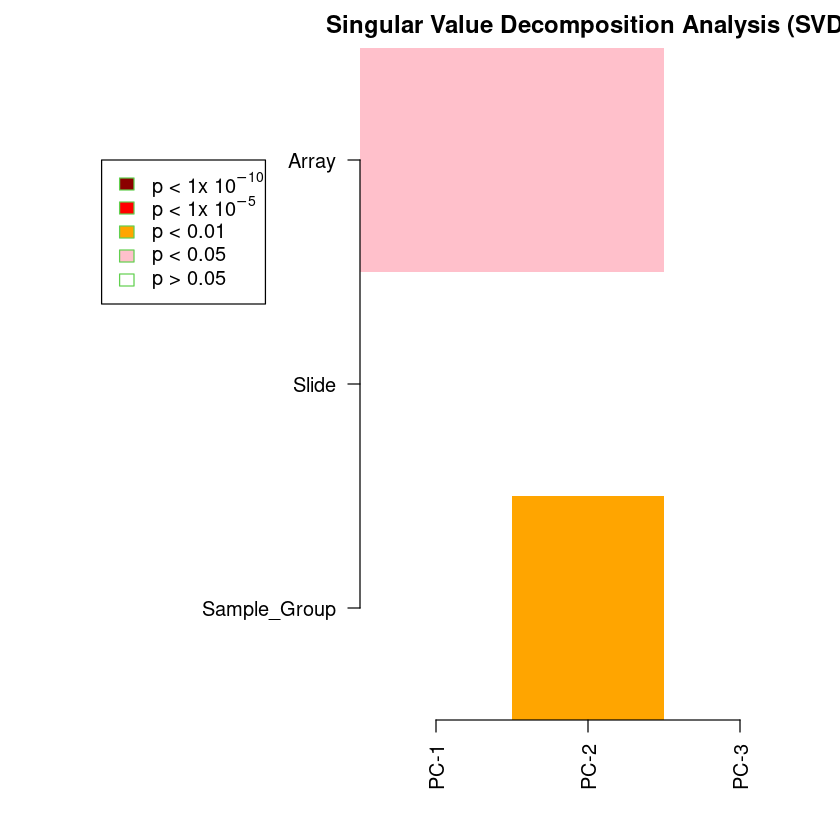

In [8]:
champ.SVD(beta=myNorm,pd=myLoad$pd)

In [9]:
myCombat <- champ.runCombat(beta=myNorm,pd=myLoad$pd,batchname=c("Array"))

[===========================]

[<< CHAMP.RUNCOMBAT START >>]

-----------------------------

<< Preparing files for ComBat >>

[Combat correction will be proceed with 832552 probes and 16 samples.]


<< Following Factors in your pd(sample_sheet.csv) could be applied to Combat: >>

<Sample_Name>(character)

<Slide>(character)

<Array>(character)

[champ.runCombat have automatically select ALL factors contain at least two different values from your pd(sample_sheet.csv).]


<< Following Factors in your pd(sample_sheet.csv) can not be corrected: >>

<Sample_Well>

<Sample_Plate>

<Sample_Group>

<Pool_ID>

[Factors are ignored because they are conflict with variablename, or they contain ONLY ONE value across all Samples, or some phenotype contains less than 2 Samples.]

As your assigned in batchname parameter: Array will be corrected by Combat function.


<< Start Correcting Array >>



~Sample_Group
<environment: 0x5aef08666828>


Generate mod success. Started to run ComBat, which is quite slow...



Found 4 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found7batches

Adjusting for1covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


champ.runCombat success. Corrected dataset will be returned.



[===========================]

[<<<<< ChAMP.SVD START >>>>>]

-----------------------------

champ.SVD Results will be saved in ./CHAMP_SVDimages/ .


[SVD analysis will be proceed with 832552 probes and 16 samples.]



[ champ.SVD() will only check the dimensions between data and pd, instead if checking if Sample_Names are correctly matched (because some user may have no Sample_Names in their pd file),thus please make sure your pd file is in accord with your data sets (beta) and (rgSet).]


<< Following Factors in your pd(sample_sheet.csv) will be analysised: >>

<Sample_Group>(character):Cellline, Coriell

<Slide>(character):206891110001, 206891110002, 206891110004, 206891110005

<Array>(character):R01C01, R03C01, R07C01, R08C01, R02C01, R04C01, R06C01

[champ.SVD have automatically select ALL factors contain at least two different values from your pd(sample_sheet.csv), if you don't want to analysis some of them, please remove them manually from your pd variable then retry champ.SVD(

Sample_Group,Slide,Array
0.003609347,0.9074465,0.4049149


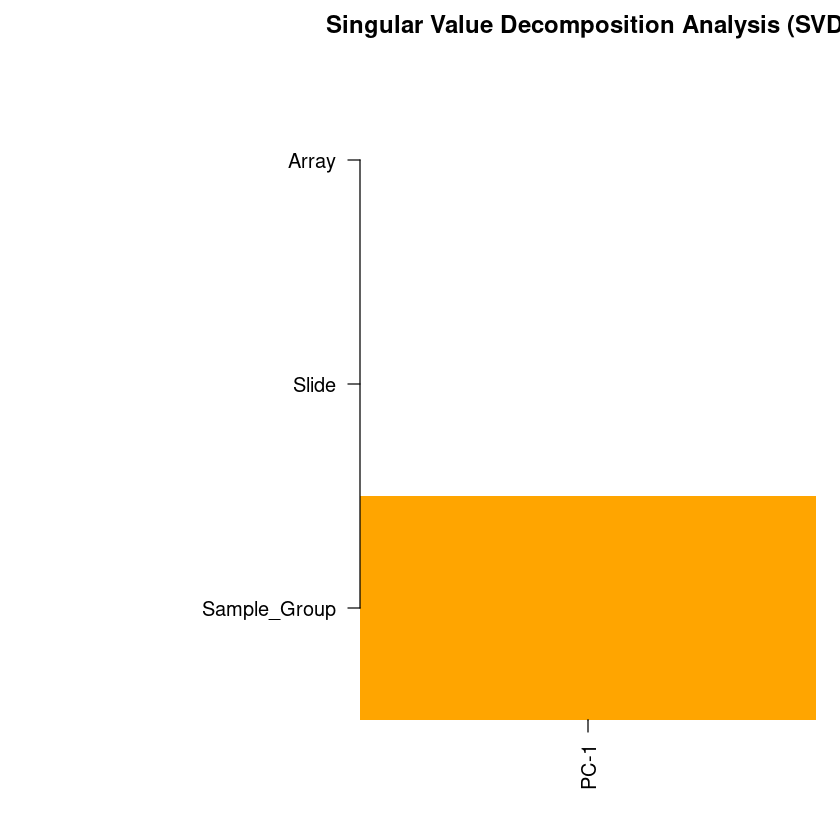

In [10]:
champ.SVD(beta=myCombat,pd=myLoad$pd)

### Bestimmung und Visualisierung von differentiell methylierten Sonden (DMPs)
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopN3Md7O4AACAASURB
VHja7J15fFTV+f8/586WyUJWQhIgQEIgEESQJWwCFVxarYpKUVwQtO62Lt+6tP21Wqx+rbUqVUGL
+rWIgIIrSLGCguwiuxDIRgiQfZ/MZJZ7z++PyYyJJOTccCd3Jnnerxfty+Tk3rM8z3M+5zn3nstk
WeZgDBwMEgDG0C4cgMIBBkA6Rzk0l4NAOQ5AUQCDJFCOA4aOrscBBei4Ldx7TWjYFrXlGPP2ZYdt
ES3XQZsBQObi5UTHmaPjcQEAj+It19G9PRww6FBHRfGWk5iYHxiYmM2K+BUXsB3Om22HCbRFhS1y
QX8RtjHFW4b8pfO2yLn3mkHtL9xbT81it6i/CMbuQMZ4JuovHdiimnERtUW1vi8Su2Wl47gYDLYo
GrtFtY5WsVuV7wdA6yjQVrfpGbu5gP/prXWC3V9E66iX1vHrsSDXOqL3llWumzTVOlzMFkNhbRCI
OgrbIkjrnK/WUeMveuluUd/XK3aL+rSuWkcwduuldQLqLxrFbjU6gtapoZvXCZTu1lLrqPEXzede
3mL8oJ0fBLu/yCpit1b9zZsXV5rm5DXWOgHNMQZxXqcnxu5g1zpqc/JaatDultc535y81CqIicDF
irQMTB0isNjl3HvhjurJBeuoqs0quka4GwX7UfSiau7LBRujZVv8dWQaXk/NfUXLCgR2fz9yMYPg
OtiicB1VGY9gUaZZKDlrYtFqnKGxbau5rxq7FbFFNTE5EP4iZDc6+ovWQ6jKJgIwx2jm94Lzgb8M
064TuY7+wjWOd1xjmw2E1hGKEVx7X+mJWodzdTpCD62j8ODXOmptrKu1jqo1jo5aJyDzmsb+Ag1j
t1qt02GcbR7nQGgdLcdFEfU/ndapaueXQMRu4RChQ+yGSp8OZq0jvAbUSesEYl0QEK3DtLXtQOV1
WHfI64TKOlWvvE6AtA7Xw6d1XKeKaB01GkZVTl7DvI5o7A6E1hHOheiodVStXXSM3cGsdfwPLwez
1lEZ9PTQOrrn5DXsyPbGhcmyzBljAJi4wQg8leBrhNA1ofH1VJQTbouGdeQq7Itr2Ieq2qzTOAds
/ETGRfB6utuY1rYY7H5FthiUdQxUPwZ97Na6LRS7e4ZPa2yLAWmLTm0WbYvauEj+EoSxW6d5P1Cx
W1PdRjoiKOuo8I6fQtZT6/AWBkZap3v7S3fyab20Dm9RuWBdm4fK2sD35kyo627SOhr6NOV1QrKO
vnsGe15HVI9RTr5jzcgY+UtnbcL3gACTgjuvo3nsDkKt49/MZKKzGUEQBEEQBEEQBEEQBEEQBEEQ
BEEQRBcgURcQBEEQBEEQBEEQBEEQBEEQBEEQBBGM0GYmQRAEQRAEQRAEQRAEQRAEQRAEQRBBCW1m
EgRBEARBEARBEARBEARBEARBEAQRlNBmJkEQBEEQBEEQBEEQBEEQBEEQBEEQQQltZhIEQRAEQRAE
QRAEQRAEQRAEQRAEEZQYqQsIgiAIgiAIgiAIgiAIgiAIgiBCn6adu8Hr6qgjiKBBio+HZexF53UN
/2amwgEGgLFz/4GacgAgdVCON//r6BVRzpvLMbFyjHnrec77CraluSnooJh4m0Xb4qtjR20RbHMg
xlm0LQAgc8AgWE7SoY6qbFbg3qLjJ9oWzr3/IAW3vyhcW1tU2xahckzstXS9/IVzQIE+/hKoOKZZ
vBP1P/5j0GbB7C/N9dMydkNjf9HLFrWO3YHSOsJtYd0nduumdZj2/qK11lEgNr/o5S++awar1vHb
WBD7SyBsMSBaR6e4GAprA9E4pjRP0pppnQDYosIBSdJR6wj4vpq1tF5aR3RtoFfs1tOnu1PsFl0b
aD5+aufKIM7rdKe1AWmdrvUXrWO3Gt1NeZ1zj7NQTl4nraMmLuqldQKVkz9ff3EdyUH9v96B+0gO
CCJYCMseB2axwHRBVqf9xehzUJkDRoHJ3pcAEXF4CARstFiEidxbRGgoIpMA/7GOook7g+Cmp8iE
ixbBrqMFqkFAQSgqJj5JRYA1CE7OwskzFXWERnVURMUQB2SITywGJmjbENuk5Kx5rDvyLUXMX7iI
jUHQxrj2tuMTnkzUXwTijvDiTzA55Uuysa62RY39RW3sFl2UKyoSbcIJOcHYLeQvzWUNkoCNqYjd
rAN/4Wr8RWkup5G/8OaJSFN/CfbY3eyrIvogEFpHxBaVZlvUQ+sItYX/6PukdTqvdThvtkWmrb+I
tlk0wSfzINc6gk86aq111MRuX6xlQax1RMdZJC4GInaLzvs8QFoHAvagdlNR63WqqL8oio5aR6Rv
IP6Al15aR1a0j909TevwAGkdrdeponkdDgF91420jipbbM5HBKvWgWjc4frmdUR24oRtLABaR+Ea
x+4A5XVEYrdeWkfUvvXSOq1yEh3Fbq5vTp7pmNfRM3ZDNC/XxjV5YyPAOSxjR8OYngZmMoHoXjAV
+Rm9Ueob4Nq3H5AYmMXsf1Cgo9jdVk7e6Gu8QWAC8Ad1gXKSyOPKzY5ugGA5AYf3X491XE4SDOyS
oHWITGQtyzEm1hbRciJtMQh+JdUg2BbR8YOgjaktp6a/RaKAUH+L+ovGtsiY+EdufYJO1F+0tDGR
ibkz4yfcFsFYImqzksa2yHXwFyZYRzWx2zfOXR3H1PiLoMkGLHZD1Ha0tDGphTAXiWMaxQg1Nisa
IzQfFx21jqRmTtVY66jyKx39Rct5Xy+tw5hXWAez1tHcXwKgu5lgjNBL6zAGSFxbG9Na66idX5gO
Wodprbs11jqMeRNnEgteraMm3umlddTML3ppHQAwSuJ+pYfWUav59dA6BqlF8jwItU4o5HXUxG5J
Jx3BWLO/BLHWYZJ3ng7m2K0qF6mX1oGYv+iqdVRoftI653lNPf2FBXdeJyA5eUnM/86pdWQZ8qnT
MF08GZG/ugFScpJmp/j4yom+ySzS36Jv/6qpo+iGuUg53wMrIg9QiD5L4HvIg2nZFsFral3Hjso5
DxyCc+t2cJcbLCLivHSEsTPiRctyomVV7EcJFxZui2jyBQG4XiDaotM4SwEQ0lqWkzS2WV3L6egv
kk51VNUW6GeLTMNyIRO79Yx3PS12i9ZRx9gt9cD5JRRiNwvy2K0qNumodViQ22Io+EFI6IgQ8Jdg
1zohsTaQgtvGAhIXddTdemmdUNEb3WptAB39pZusDUJBR0g6atWgz9eESs6EhUAdSeucd1wM9rwO
rQ06d1/OObjbDQAwpiQFf4wP8jmQsRDJ6wRp7JasYeDNu8HMYDivBxQkEARBEARBEARBEARBEARB
EARBEARBBCG0mUkQBEEQBEEQBEEQBEEQBEEQBBHicE59QHRPe6TNTIIgCIIgCIIgCIIgCIIgCIIg
iBCH9jKJoLJH2swkCIIgCIIgCIIgCIIgCIIgCIIgfDDqAqKbGiRtZhIEQRAEQRAEQRAEQRAEQRAE
QYQ4jHYziSBCos1MgiAIgiAIgiAIgiAIgiAIgiAIgiC6O/7NTNGjazkXO+dWtJwaRK+nVx1Dog9D
pI5a3rvH9iPXrlyPtkXyF4rdFHModpO/kL+Qv5DWIa1D/kKxm/yFYnfQ+ktPtEXyl+4fu0Exh7QO
+QvFbrLFHq91QrYPFcX7T+M6Sr4buuWOG8I54OGAIlBObv7XEQoH3ALtkhXv9bjA9dSUUwTq6FG8
/4TqqGh3bw51dRQqJ3vLdVRU5oAs4HxK871FDNsli5Vzy+jwLGXOm9ssYosQt0WXLFbOI6sYZ0F/
UXTwF185rW1R1rKOPp8WsUXBIOsS9Bd3s81ykTYLTAY+fxHBKWCLvtgt5C9ce39xi/qLok/sllXE
bo9OsdutiPW3R1bhL9DeX4RjN8RiRIe2qMJfuGDsJq0jYDsB0DoitqjGX4Jd6zgFtA7XUetwBL/W
kbkK3U1a55y6W2uto2iodXh30zo6xu5g1zq6rlN5ANapGmodWYW/iGodTw/VOiIxWVXs1kvryCGQ
1xHU5yGR19Fwnao2r+MJgL/ooXU8Oud1eBBrHV3zOrwbaZ0QyesEu9ZxapmTV6t1BDfDtFynBsJf
ZJ20DleTrwmWvA7n4G43uNvd5h+fj78YAe85ykbW8bc4GQMM6PjcZV85kV1e0TNzJcl7wQ7r2HzN
jurou6/I7Q2Ch/EamPeCTLDNIv0oQeyca5E2+9rCBOsoXE4Su7dRTTkRW5S0tUXGvPcWslnBOkoq
/EUEBq+vauUvEvP2jSRqi9DQFlX4C4OYTzNBpzZJYm0xSmIxSpVfCcYTkyRus7rFbi3rGIDY7fMD
LW1Ra38xMPG4GAh/Ebo30zbGi7SZqfAX0ditp78wn50FsdZhEOtvrbWOz6+E/UBQt+mldUySmH3r
pnUQ/FpH67VBoGI3dNQ6ov4iaVhOrV+J2KJuWocDXLCOBtE6QietA+1tUXN/EYzdqrSOhn6lep2q
wl9EtAGXxGxRVOsYRNY5gdA6zX4Q1HmdAMRurbWOQQqBvA4TtIcgz+uI+kug8jqGIM/rCMdunbUO
5XW6MK8Dyuucb14nILEb2q1TRf2KqdU6goFRy3VqILSOJLhW1VrrqM3Ja6l1ROfAs7QOY2AWy3mt
+dvzF6PqxIFgORGnU3NN0U0Kre8rGlwB8Y/rMhX3ZRqPi+bj3I3qqHVbWCBsQo3NaugvgRhnpqMt
ah0jJPLp4I3dTFv/64n+orktSt3IX0RtQoXt6OUvko7zFcXu0K0jg44aRketw3pi7FZTRynI69iN
YncgbFZzfwH5S6jHbk39oJv5C9li6OZ1ApEn6k55nZCI3bQ26LIYSnkdit3BErt11ToUuzWpI84z
RkggCIIgCIIgCIIgCIIgCIIgCIIgCIIIQmgzkyAIgiAIgiAIgiAIgiAIgiAIgiCIoIQ2MwmCIAiC
IAiCIAiCIAiCIAiCIEIchVMfEEFkj4p216LNTIIgCIIgCIIgCIIgCIIgCIIgCIIgtEPD72nSZiZB
EARBEEQPo66uDm63mzqCIAiCIAiCIAiCILoREqM+ILqnPdJmJkEQBEEQRA+isbERp0+fhtPppM4g
CIIgCIIgCIIgCIIggh7azCQIgiAIguhBnDhxAiaTCSaTiTqDIAiCIAiCIAiCIAiCCHokAOAAXDLA
O/g4LAfgUQBZsJxH4GOzCveWFSnnVjquo+96HX3olguWAwBZoM3wtVnxtv+c12u+t2hbOroeh7dv
RNrilgXbwr3thkBb3IIfcXXJ4uWE2iI4LrIKW3QL1JE3lxP1F1FbFPYrwXERsR1Rf1FU+IuacrIa
f4G2/sK5drYo7C+KmL9wQX9RE7vdAYjdbh1jt0hbZBXjEojYraW/iMY7Dxdvi1vQX1xyx+VUx24N
/UXhgv7C1WkdRSNN1CmtE+DYXVFRgV69esFisQAAHE1NKKuoCnqt41GhdRTSOu3PB7KgLeqgdVra
TrBqHTW2qKvWkYNb64j6i55aRw4BreNRSOtooXXcOmodId2N4Nc6sgqto1fsVpPXkXXQOlARu/XS
OqLrVD21jsxDQOsEKK/DddQ6WsZuYX9RgnudGux5HR4CeR01NqaX1lGVk1fU5eS1zutAJ38RWqfq
lZNH98rJyzz4tY5vHDurdYyA9xucBoGzaxm8Z9wyjcr5Ki4J3luojsy7QytyFK9IHQFAEnx/1deO
jq4pAeCs44JMZd8wJtYWoTZDrBMliN2Xc8Ao2I8GwXERLceY+HdmDSJ1ZOpsgolcD2J+ZWDi48JZ
c7RlXevTkqgtqvQXreroG2cty4n6C2OAQSiqi/mLmthtUNGHauKdaEzWLHar8BcmaIuiMcLvV6K2
yLTzF4PouDRXQMSvhNrdbItaxmSDCtsxCMQcxgTnF6aP1vH1oyqt0wWxm7UwvMqKCtgdTUjsHR+0
WgdccI5Wo9sCoXUMYvfWTesI9iPTSetw3mwTkti46KF1GFTYok5ax1dHoflFJ63DQ0DrMK5u3ujy
daoKHaFa6wjGbhGtY1CxBtRD6zAABoN+WocJ2qKw1pHEbVZLrSMxsQSW31+6OHaDB39ex+8vgnkd
PbQOVPq0HlqHseDWOn6bCIDW0dL31WqdDsdZUOuIaiKfv2ia/9FwnRoKeR2mot16aR2O4Nc6/jgW
AnkdrWO3llqHQ9ucfCB0hEFQ6+idkw9mrXNWAOqE1jG2DO5aTlTCi0RoG5S0vp5g/6prcwA24YQF
BNOnLarqqJMtqrFZ0cmeaVgOKssxncqJ+oxe/sJU+LRBLxvTegM+AHUULaunv0jQZ1wCERf1srFQ
sEU1tqPb/CLpMy7tleOcQ1F+fKTwzJkzGJqZGdyxW0Vs0lXrBLu/qJgr9YjdqvT5OcoqjZVo3PAP
uI5tReRVT8Jywc9pbUBaJ6Cx24Cu94OQ0N0a60qK3drE7pDI64SALerVFj21jvAmjp6xWzAw6rpO
lYLfxkJC61BeJ+h8X68cv66xOwB1pLxO8GkdNbqbtI42c0x742yEjqjpZCK0obHuQWNNXUAQFBep
D4OaQYMG4fjx4/B4PEhOTkZ9fT3qamtx/NgxREdHo7a2FuXl5ZAkCYwxGAwGZGZmon///pAk+tw6
2WNw07jhRTi+/wiekhwo9lpY68upUwjS3QRBEARBupsgCPJpIsQxUhd0TzyNdlR8fwDmqEjEj76A
OoQgCIIgCABAv379IEkSKioqUFxcjLy8PCQnJyMxMRG1tbXo27cvsrOz/eVtNhu2b98Ok8mElJSU
Vtcq27EHRWs3oKmyCuk3zkLfn11MHUzoRsPav8K+6XXw+jJE/PxxWC68EsY+GdQxRFDiPLIRcs1p
WIbPgCG2L3UIQRAEQRAEQRDEOaDNzG5K45kSbL7jQURnpONny5YgLD6WOoUgCIIgCBiNRqSmpiI1
NRUA4HQ6MXz48HbfuoyMjMT48eOxe/fuVpuZZzZtQc7b76Ny7wF4HE3oM3EsdS6hG/at78CxfRmU
ulJEXf0nhF9yH6So3tQxRFDiPLQe9R/+AczdCGNiOm1mEgRBEARBEJrBOfUBETwoGtojbWZ2U0yR
EUgcPxq1Ofk48fl6ZN4+lzqFIAiCIIiziI2NxZYtWzBmzBhYrVZUVlbi5MmTaGpqQnh4OJxOJ+rq
6pCTkwOLxQKryQzz8QKUffQFanKOIyw+Fhm3zUHKtCnUmYRuuHK3QS4vQNQ1f0b4z+6DFJVAnUIE
Jc5D/0H9+7+FIWEQrKPvhDExnTqFIAiCIAiC0AzayyS6K7SZ2U0JT07CqCcfwforb8Tp9ZtoM5Mg
CIIgiDYZMmQISkpKsHfvXjidTkRHRyM5ORmSJEFRFMTHx8NmsyEyMhJjh2Tiv6++gaING9Gn3o6+
M6dhwC+vQO+LLoS1D70FR+hD47f/B+exb2FMyYQpYzJtZBJBTcNHfwRvsiHqumdgGjSOOoQgCIIg
CILQFIm+QUl0U3ukzcxuDgPAKYARBEEQBNEOVqsVaWlpSEtLa/P3DocDJ0+eRILCcWTJO1D++y0a
Ghtx8e1zMWjWVeiVPhCSyUQdSeiGJ38blKoTiJj9vzCnZVOHEEGDUlOLsl/dBnfucXAA5sHpME2W
ETZ+DqSYFOoggiAIgiAIgiAIQWgzs5siO52oLyyCZDYjPFG7NyXyylworHRhcKIFg3pT4pIgCIIg
ujuKouDIps3of6IENTv3wJqSjNTp2Rh6+1yEJ/ehDiL0t1GnHZDdMEQlglkiqUMI3eGKAk9uHkp+
Pgvc7fZ/uEguOwgUVKPX7FfoO5kEQRAEQRAEQRAqkADvOcoepeOPw/rKKQLlZAWQBQ5o5lzs3goH
PFywnEhbuLeOIh8glZvLCpVTcT0t2/LTcXGUVeDwP9+ENbkP0n51jf/nHu4t57bZ0FBYhNqc3Dav
6WmjzSerXFj8dRX+d10lDp1q8tZR8d5bBLcs9gFityJWzqN4799hfwvW0dcWUT/QzF+4mL/4ywna
jogtKoK2qMZfPIq4v6jxPw5Bf4F6f2m3LVzcFmUVNiYSF0X9wK2hLUJF7FYCFLsVjWyR8x/tW6vY
raiM3aL9LWqLevmLlraoKkaIxm6uzg/00Dpq/EXWQeu0nF/O+p1HxvHP1qPuqy0o2bwdcRddiEF3
zcOAGVPPuZEZCK0jOm94VJQL5titWuuI6G4Et9bxz0Od0DqcSQBj56V1VM1D3UTr6BW7uYrY7dYp
dstK57UOb2jwbmS6XK1+IWVUAkYHap55TpPY7ZFDQOvwwGgdaOwvvJv4iycE/EVU68haax298zoQ
s52g1zpycGsdVXkdrr0+kDWOY1rndTwq/EXLGK+11gG6V+zWQ+twHricvKJlTl4JvZx8MGqdYM/J
66Z1VObkg1nrtLym5rFbQ63jK99Zf1H9ZqboiaWMiV+QCZZnvOMKMBV1VNVmpmHfoPnoVw3bwtiP
fah4ZDSeKUVD7gkkThqHpCkTWkURe3kFTn/5FY7/30rYik/jpvy9bfZ1yzGpdyhYtbseh4qdmD02
GlOGRPw4foKW2k6O6bz6UWhcGMS8iam0XYGMIVPhVEyFQQrVkXubzZjGviBiizr4HzrpLx3OfoI2
K3Q9Nf7CtPMXtbGEc3HfYiJxTEXsZiKN4Sp8RTQma+gITE2fq6ijcNzR+JqMQfM5kGkZu9X4tE5a
h3Nt404gtE5btui2NeLkui/x1T+XILamAQN/fimG3Hojij1NSIrupYnWgcq2aKUX29I6wRa7O6V1
WMe2CC3rGAito0aPccD231fgyt2KyMsfgSVz+nn7PtMySOiodRAAW9QjdouOiapyAlqH8x/HRa3W
4bZGnM6e7t3I/GlZk+KNj3aHJsJETczRQ+v4Y04AtI7mPk1a57y0DlMZu0VsjENbtI61qrWOSLs7
oRePHj2KvXv3YsiQIRgxYgSsVmtgtY4U3FpHuB+5Cs0ouk5VazuCMU/LvI7wfKmxEwYqr4MepHVU
5X9E8zqCOXld8zrQPuYEMievxTo1EFon2HPyXC+tw9TnI7TMJ2tOAHLyWmud89WLRt/NDJJQjINB
0m4C8F9ToKzExDvDoGE5/711KKeqLS3+213fgMKPv4A5Jhr9LpnWqqyzpAS7n1yIqoM/wNwrCnFZ
w9u8Zstx5hzYnufAzgIHiqrdOF7mRC+rpGpcAPH+FrFFCNqiKtsBYBQtJ2k4fhAfZ0kwKIm2WWu/
Aryve4v4f0D8rxP+ci6MkrjNalnHUPCXgMQxUX8R9D9RcRUQG9N6nJk+tujzFxbktii6qDNKGtqY
Cq0jSdrGbs39igHSTxZMjrJynPh0PfJWfgRbRQXGXHctRtw5D9HpA3Hi++/h8Xi61K8C4QeB8BfR
pwT19BcJGvqBxlpHjY7wtdlz6gDkmjMw9s2CFJ3UNX4FbW02UFonmGO3qn7UoY4+G5Q6YTuccyg2
m/+/FbT2OwaAxUaft/+pnl/0moc09peeGLtF66ir1tHTxjSuo16xW42ubTnO//73v/Gvf/0L06ZN
w3PPPYchQ4b02Njti4u6rVNVrJElLdscAL8SXUvr6S9Bn2PU2F8YAqN1DEwnf1HRFqZ1XkfrGKFi
nPXQOqHgL2rWqXponVDKyQd77BasYrvjLKm5CBF8uG2N+HLWrTi5doP/Z87aOhSs+hjRGYMw9I65
P/68phbf/+UF1Bw+iqz7F+Dyz5bj8s/e6/AexdUefLq3HhYjcMfUWGzLc2DMn3Nx+FQTnG4u9Pq5
GhvTyxZZCDhBKPgpo2CiSR+ybmQTRIjbYwjYIusmfRgssbvueD6Ovr0cx/5vBbhHRsolUzH01jmI
HjwIkCRYLBYYDAbd6teT/KqnzoFq4G4nwGVAMnofOSa6Xew+3zqWlJTg6aef1iXu2LiCEWcKUCHL
P9osA2Iee6RL9SJBsZvmlu5rYzt27EBNTQ3Wr1+PkpISml8olhA9UOtQ/Ca00ozU3dQ3wQ6t+EMY
xePB9vsfQ21OLnjzjqLidqOhsAjm6CikTL+4VfkDf3sVpzd9iwsf+w2Gzr8ZYXGxHd6jtM6D/1lV
gu35DlyaFYXHfp6Abx4fiAv6hmH266ewbEctauwyDQZBEARBdAPKd+7BkSXvoHD1Z7DERGPo/LlI
/tkUhCX38a8kbTab/6l/t9uN4uJiHD58GD/88AOOHDmC3Nxc2O126kyiaxaVEi0riXNTUVGBl156
qesW2GYTon41yxsvuQIFHCvt9VjcUINaBsBkBouIoIEhCOK8cbvdcDqdiIqKgsfjwdGjR1FfX08d
QxAtyM/Px/PPP4+nn34aubm51CEEQRAhjJG6IMTgHIcXvQlmMGDglVeg6sgxGCMjYYwIBwA4q2ux
/6//gDUxAcPvm+//M9nRBGddHbjsgSkqAgazucNbVdlkPLu2Aj+cdiEuQkJuqRN7Tzhw0UAr3run
P576tBybjtgwMT0ccREGGhuCIAiCCGGqD+cgd/mHOL3xW8SPHI7Bc69H0pSJSDEZsHbtWowZMwZp
aWmw2+34/vvvkZ+fj6SkJMTFxYG1eGS2sbEROTk5GD58OMLCwqhjCU3weDxwuVwwmUwwmUz+nzOw
VvZHED/l6NGjsNvtGDp0KJxOJyZPnozly5cH7oZmM2L+/AcYBqejaOHzUADYJIbJ2RMQ1ucAJAsD
jGYaGCLoqKysxPvvvw+73Y4nnnii1e8aGxuxa9cu/Pe//0VNTQ3i4+MxefJkTJ8+HVarFUePHsX6
9evhdDqRkZGBn//854iMjERxcTF27dqFpKQkTJkyhTpZY/bs2YPa2lpkZGQgPz8fy5Ytw6RJkzBy
5EjqHIJo5sCBA1iyZAk8Hg8iIyPx6KOPBmU9HQ4Hqqqq4HQ6IcsykpKS0KtXr4DcS5ZluFwuKIri
1dOMwWq1dkpT2+12FBcXo7CwEHa7HWFhYfjFL35BhqcznFMfEMGDoqE90mZmyAUjjuPvroSzpg6n
v94GV109Rv3+EcRfeIF3QnK7UVdwAjFD0r3lZQUehwM5b/wfKnZ+B0N4YXSU7AAAIABJREFUOKQW
CaD2qLUr+Ovn5dh8rBG/vSweCRESdhU48MY3NZg3hWPS4HA8dU0iSmrdiKWNTIIgCIIIeZxV1XDW
1CF56iSk3zgLieNHwxgeDguA2bNnY9++fVi7di0KCgpw9dVX4/rrr0ddXR1MJlOrhbbD4UBubi4K
CgowfPhw6lhCE1avXo1f//rX+M1vfoO//vWvLbSxQqt14pz07t0bZrMZn376KTIzMwN/Q8YgRUcj
asE8jLzy5zBnDcefdm5DUt++qPrf8QjLuhSGqN40MN2UwsJCrFu3Drt374bL5UJWVhZmz56NoUOH
gjGG8vJyvPbaa9izZ0+rv0tLS8MDDzyA9PR0rFq1CkeOHIHL5cKcOXMwcuRImM1mbNmyBQcPHsQN
N9yApKQkzfILDocDx44dw5o1a7B69WqkpKS02sx0Op3Ytm0bXnvtNQwePBhZWVkoKirCW2+9hYaG
BlxyySX49ttvUVpaiuHDh2Pfvn1ISEhAdnY2tm3bhoMHD2LevHlkHAFgyZIlKC4uxqhRoxAVFYVe
vXrRAz4E8ROqqqpw6tQpcM5x9OhRcM5b+YndbofD4UB+fj42bNiA3NxcKIqC22+/HTNnzgQA7Nq1
C3l5ebDZbBg5ciQmTpyIiooKLFu2DO+99x7sdjssFgsWLFiA3/72t6iursaWLVuwfv16cM7x5ptv
AgDq6+uxfft2fPzxxzh9+jQ45/j8888hSRK2bNmC559/Hvv370dDQwP+9re/Yfbs2UhKSoLReHb6
vra2Fps3b4bT6UR9fT3efPNNNDU1ISYmBlu2bAEA5OXl4auvvsLhw4cBAK+++ioAYNOmTXjiiSeQ
k5MDh8OBAQMGYPfu3ejduze++eYbrFy5EgcOHMCkSZPw4osvAvBuCi9duhSbN29GXV0d7r//fjz2
2GMoKirCO++8g5UrV6KsrAzJycnYsWMH3nzzTZjNZjz00EOwWq1kiF0MrY6I7mqQtJkZYjDGcMHD
98JRXonDryyGIjEkjByGsPjYlisSKAqHx+5ATc4xHPjbP1Hx3T4YTCZMfHEh+l8x45z3aHQq+N2q
Unx52IYLB1jx66mxcHkUpMab8cF39Xj+i0qMHhiGp65ORHKMiQaFIAiCILoBMUMHY+iCuQhP6oNe
gwe1OsXBaDRi3LhxGDduHLZv346UlBRIkoS4uDjIsoympiZwzlFTU4PS0lKUl5ejsLAQ9fX1SE1N
RWJiYpuLcIIQXv9wDkVRIMv0eQNCHb5v/O7evRubN29GSkoKfvnLXwb8vlJYGCpcTjhdLlx54xzU
1tZi1aQyXDT3BkgRtJnZHTl9+jSWLFmCkydPYvLkyTCZTPjmm2+wdOlS3HXXXRgyZAiqq6uxY8cO
ZGVlYdq0aZAk75d/oqOjkZiYiMOHD2PHjh24+OKLUVBQgA0bNiApKQlmsxnLly/HzJkzERkZqVmd
q6qqsHjxYhw5cgTx8fEYOXIkKisrW5Wx2WzIzc1FYmIi7r//fvTu3RtHjx7FokWL8NVXX2H06NEo
KSlBeno6Jk2ahBMnTiA3NxcmkwkHDhzAtGnTMHjwYDKQAJCTk4PGxka43W7ExcXhj3/8I4YOHUod
QxDNuN1uOBwOWK1WWCwW5ObmYteuXZgwYYK/zPPPP4+FCxdiypQpsNvt2L9/PxRFweTJk/2bmWvX
rsV7772HoqIiPPzww5g4cSJsNhsOHjyII0eOQJZlREVFoaGhAQBQWlqK1atXY8WKFQDg38wsKSnB
J598gg8//BB1dXVgjPk/G/bJJ59g7969qK+vB2MMf/nLX/Daa69h06ZNSE1NPatt+fn5mDVrFsLD
w3HnnXfiwIEDcLvdSEhI8JepqKjAxo0bsWbNGnDO/ZuZJ0+eREVFBdxu91lvZW7fvh2bN2/GsWPH
Wl1r06ZN2LRpE3JzcyHLsv9I6/LychQXF8NkMqF///5ITk5GWVkZXnjhBRiNRtxzzz20makD9FgL
EVT2qKFBUlYpBEc/49ZfgcsKznyzBZU/HEFjRSUS/L9m4BJHfWE+Phg2AZAYmGRA2o3XI+ue2xHZ
v+85L+9RgFc3VuO7QgdumxKLLw7U45cvncR79/TDBf3DEBdpxFdHbFi6pQZPXZ3Y7nWm/W8RrCbg
P48OoDEjCIIgiBDAmpSIvkmJHZaLjY3Ftm3bcMEFF8BsNqOqqgpnzpyBw+FAfHw84uPjwRhDXV0d
UlJSkJeXBwBISUmhTiY6DeccY8aMQXx8PF566SXU1NRAlmVcVnsAGfRmJnEOTp06BafTiTVr1iA7
OxuJiYldXodLL70UDz30EEyvXwoeFQXQwx3dkgMHDiA3NxczZ87E3LlzIUkSYmNjsWzZMhw6dAgZ
GRmw2WwAgOzsbFx11VX+5DFj3iOzN2/eDEmSkJWVhfDwcKxbtw51dXX49NNPkZaWhsmTJyNCw2+u
hoeHY/r06Zg0aRKioqKwdu1abN26tVWZyMhIXHHFFZgxYwbS0tL8WiAsLAycc5jNZhgMBtTV1fnf
cCorK0NtbS369euHyZMn+x8qILRl7NixiIiIgNPphMfjQWxsLMxmOsaaIHwcOXIE3377Lfr16weH
w4GcnBxs3Lix1WamT2fGxsbi4YcfRk1NDQBg4sSJ/t+PHDkSM2bMQElJCYYNG+Zf2zz11FN46KGH
wDmHwWDwa4yYmBhccsklSEtLa/UWaGRkJMaPH+/fJJQkyf/7l19+GS+88AIA4MSJExg9ejTq6urg
8XjabJtv3gCAhx9+GLfccgs4560eIO3fvz9uuOGGsx4oWbBgAW6//fZWP/PF6auuugqjRo2C3W5H
cnKy//czZ85Eeno6HA4HGGP+fpg2bRqmTZvW6lq+DeH6+nr/Zi3RtdBL+kR3tUdaRYWqERgkzPzg
//DB8Eko+PBzDLjc+7YlMxphjoyGu7YOzGTEqMd/g4xbZsMouODZnWfHe9vqMKi3ETdn98K902Nx
xzuncdnfi/D+3X0xuI8ZN2VHIzOpfYE84/kTOFnlxNbfp9NAEQRBEEQ3IzMzE/Hx8Th+/DhcLhcS
EhIwatQomM1myLIMg8EAzjmGDh2K1NRUhIWFITc3lzYziU7jcDhQWloKm82GVatWoby8HPX19bDZ
bOh3sYKMgdRHRPuMGDEC4eHh+PTTT7v83omJiTCbzXjkkUeQlJSEChqObo3vLZu+ffsiJiYGAJCV
lQXOOYqKimC322Gz2cA5x4YNG/xH9Q0ZMgSzZ89GZmYmYmJiUF9fj6amJpSWlsJqteLrr79GaWkp
5s+fj8TERE2PEQ0PD8fkyZMhSRKqqqra3HS0WCxIT/9xbd/Q0IAdO3agqKgId9xxB/r06YOLLroI
q1evRl5eHmJjY6EoCurq6jBnzhxERUWRcQSI1157DU1NTbjmmmvQ1NREHUIQP+HQoUP45ptvMGDA
ABQVFeGmm27CqFGjWpUxmUwwm82IjIzErFmzzroG5xy/+MUvkJ2djT59+sBisfhj48CBbYvQlJQU
LFiw4Kyf9+3bt82f+67nu3Z0dDTS0tJQUFDQbtsYY7BYLGCMYcCAARgw4OyXSfr164c5c+Zgzpw5
Z/1tew+ZjBw5ss3v7l5wwQW44IILhPrdt2n77bffkhESBKEpRsB7bK2iABI7906paDngxw97Sh2U
4/B+5qbDchxQAEjooI7ce02GjtvCecflAO990XxvLdrsK8fYuV/75ry5jufob8lkRPnWnSg/8AN6
X5gFS0wvjHnqdzj8ypuYsfwNRPzkTUyZt9+HnAOfHmiAU+bIK3Pj66ONuHdGHN6/px/ufvcMrnu1
GAcXpiMqTMLUoRH+tnAOGJo757K/n0RBhRPfPDEIfWNb75V7OGAUWHd5FMAgYGOy4i0j1N8ckKSO
y3F4792RzQr5i8D4tbTFjmyHc28dhdsMMb/iIrboK6soAHibT1b5ngrjTPL2jV7+InVcTmHNfoCO
bUzS2BZb+ktH8c4g4C+BqKPouAj5S7PdCvmLitgt4i+c6Ri7ITi/8I6v54vdDBqPXwjYokgdNY/d
gdA6zXUMVq3jux6YqL8wJCYmtvt2U21tLYpPncZFF10EDm8y/+DBg+c3Vzb7NIOYv0gi/qc0t1kH
f9FL6/j6J1i1Tnt+5XQ6UVNTg4aGBgwYMAD9+vVDmNWK2tpaJMUcAGOl7Sb3hbWOqF8JXq8z84sk
OqeKaJ3m6/V0rcM5x6effgqHw4Fbb70VADB27Dg8+JvfdKwjmuNOZ7UO5xyLFy9GY2Mjxo8fjzFj
xuAv8aWI5mLrY+G1gRTkWgfisVs3rcMAkfcGO7LFAQMGwOPxYOfOXRg3PhuREeH49ttvkZubi4su
ughNTU3+N+icTicmTZoMhXN8ueE/OH78OJ588kmMHj0a27dvx6JFi+ByuTB16lRs3boVc268CZmZ
mec8sr2zWkdqZ/JoyxZra2vx8ccfY/Xq1bjiiitw2WWXwWq1YtLkKUhKToGzyfvm0/fff4/+/fvj
zTffhMFgwPTp0zF9+nQwJqnTOoLrVKHYrefaQGCu9GsYFtxaRwbldQKhdbokr6NG6wjqbr20DuC1
xY7yOg0NDaiqqkJaWhokScLVV1+NSy65pMP5vCVOpxOffvoptm7dikcffRSD0tIDrnXi4uKwcOFC
HD161P9wzE/9xWg0Ii4uzv/Gv9r+5s3GoHDt8zrp6YOxceNG1NbWIjY29rz8RfblQYNU66jS3Tpq
nWCP3RyCtqhC63BFn5y86ryORlrHp7t11TqS2BHH/Dxy8saWjZUEb+abyDsqwwWCjd8YRBPYTMz4
OwwiLYzQIFBHbxay43tDRR8acO728OZxaa9+BpMJIx+5F/v/tgiH/v4aEkaPwIArL0PC6AvhKK/A
D68uxfjn/yycOH92bTk+29eAJ69MgMEg4e/rKlDr4LhvRiyW/boflmyqbn9yBnDlPwqRW+bGpifS
kBpvalNIc0nM8UQWkwoAScQmuNDweW0CgosCQX9RBMRVS1sU9j+tEti+yeIctqgoCmSFQ1Y4lrz+
Gt54YwkKCgrg8XigKAoYY5AkCYmJiZg/fz4W3HkX+vfrB5NROudTwwrEAxya23I+/tKqrNIszjVK
vnDBSNzSX4TErKSNLfr7hnfch6KbLr54IonYouA4q43dEIjdXFA0aR67BRMRCvfGMSZQRxF/8c2n
XKQfIbaprwjaoqwmLmrpLy0XvBrFbi7Q5z77gqCvqNqs11jriNoi00jrGAwGNDmbYDJb/A1v73gh
NbFbzSaz0EYTmtusYexWuLiO0EPrKFxdHXXROm34i8lkQkJCAsaPH4+lS5fCarVCbvbBhn/NRdOu
leeldToTu5nIwxYqtQ7XaE5tOR9opXU0j92CWoefp9ax2+3Iy8uDoijIzs7G/Q88AFnmbSYr27WJ
To6L3W6H1WqF2WzGokWLcPU116Ly/2V1PIYq/UWkg/TSOlzF+kp3rcPOX+uMGjUK119/PZYvfx+z
Zl2LqMhIZGRktPrG5YQJE7B48WKYzWbExMYDjGFAan8888wz2LNnD9LS0nDHHXeguroaiqLgzTff
xLBhw/Hdd99h7eefITk5Gb/+9a/Rv3//gGsd/ETrlJaW4t///je2bt2KWbNm4eqrr0ZcXBwAoFev
aFw4ajTyc4/73yitr69HbGwswsPDsXHjRvTt2xcZQ4aq0zod2Y4KrcMFM3xqYrcWeZ1OxW49tU53
yevw4NI655PXUQKwTuWiD5aKxu5mW+SCG0gQtMWONirGjx+Pp/6yEIX5+Thy5AjCwsLO+n7jiBEj
MGnSJERERrYZn9xuN3bu3Amj0Qi73Q6Xyw2DyRRQrRMREYHZs2fD5XL5j47+qdZJSEjAbbfdhgMH
DnQ+r8Nbb6holdc5sH8f9u39HiNHjkR8fPz5ax29cvJq/EVE6wi2WVTrcJVaJ5hjN1e0z+uIxm7R
vI7oPK06r6Ol1hH0l4BpHcG+FPGF9tapRl9dTAJWwAAYBcsZJDEjkJhY0lzrcoyJPZEAND8VwATL
aXi9jtrCjAYMu/NWQFFw5putOPr627CdKMaQW+dAcbpQffjoWX9zrnGuc3BYzQbERxlw9agocC7j
mc8qcKy0CY9fmYDfXnb2BGSQvAb9y5dO4ugZD756bCAGxpvaNEiTQcxRTJJ4OaH+FizHGGBiYvYt
5C+CNqamnIGJ9c352pgv6XzmzBm8/PLLWL58OUpLS9tMRnPOIcsySkpK8Oyzz+LZZ59FYmIili5d
2uo7MD/F2MX+0hnfF7UxowpbFP1ajBp/0cxmu1Hs9j+oEoSxuzO2Y9T4epIkJv4YA4yCtmiWtPUr
UX8RbovWWoepsB2d/EqtvzCN/KWsrAzJffrA2LwQKSkpafVEcaD9Ra/YLaoj9NQ6wrajk9bx1fGn
tsi591QIxhhqa2uRm5uLyspKuFwupJaUIDZI1xB6ax0tbcwUAH8xGzS0xXbKVVdXo6ysDEajEadP
n8bvn3wSo0aNOuu4tbbqJwnGvPbGpampCYsXL4bL5cJ1110HANh5UxhGMw3XqZJ2sTtgtght/SUQ
Wkc0dnekdcLDw3HttddiwoQJqKqqgtFoRENDA/Lz8xETE4Pw8HBYrVZER0e3+rsxY8YgIiICp06d
gsPhQJ8+fdCnTx+sXr0aJpMJsuxBTXUVbrrpJnzwwQf46quvMH/+/C7VOmfOnMHSpUuxf/9+3HXX
Xbj44otbtcMged/a3LZtKxobG5GdnY3t27dj6tSpsFgsKCwsxKlTpzB06FD98joa6+5ArA1MoaB1
gjyvo7Xvd5XWOe9cpMZ+JbqWVqWJmHbjJ2o7Y8aMwZgxY/D888+3W+YXv/gFJk2aBIPBcJadKYoC
m80GRVEwceJE5OXlISEhodW3JAOhdRYvXozHH38c8+bNwz//+c82yyUnJ2PSpEkYP348Ghsb/d9T
Fs3r+GzQGIC8zhfr1uLPf/4zHn30UYwfP/789LRojAiBHKMxRHKMQR27dcrr+N7IFOmbUNjD0lPr
+Mp31sbom5khDjMaMezu+UgYMxJl2/fgyOJ3wAwSDBaL6o8sc85xWUYvjEr2ToDzJsciOdqMoko3
eoW1Hx5/9fopHClx4T//MwBpieZ2bVzUpvX6RnEofBy5q6p4zz33YOXKlWhoaOjUx7rLy8txzTXX
4Oabb8bvf/97/4fBie5ji0QPskfqgqCgsLAQgwYNCom4c+zYMUybNg0mk/eUhpycHGRmZlJcJL/q
9Fg3NTWhuroa9fX1WLduHdauXYsdO3aguroai6bIuDaNepRsrG3q6+uxd+9euFwuvPXWWwCA66+/
vsPNTC3ijtPpRGRkJAwGA/70pz8hNtyE+BP/JL3YjamqqsK+ffvQt29fZGdnAwDWrFkDRVG8x2OH
hWHr1q3IycnB9OnTMXjwYABAZWUlHA4HoqOj/W/g5OXl4T//+Q9mz56N7du3IzExEZmZmRg4cCBO
njypWZ0553C73ZBlGQ6Hw3/6jsPhAGMMJpMJNpsNn3/+Ob7++ms88MADyM7OhsFggM1mg8FggKU5
97Bnzx4cOnQIc+fOhcfjgcFggMvlgiRJUBQFYWFhtL7qQfMLdTnZY6iwefNm/OpXv8KgQYOwd+/e
Vr9zOBzYtWsX3G43ioqKUFNTg4yMDKHNzPPB7XbDZrPB6XSes9xtt90Gu92OI0eOIC0tLYhs3HuC
GyNjD7mYQyNGfRPs0GZmd3Amg4TE7HGIGZKBnLfew8kvNkLiMtz1Daqv9eWxWvTvI2F+bAzCzQyX
jYg4Z/kbF5/E3hNOrH0oFYP7mMmxQ5z8/Hxcd911OHToULubmGaDAcm9emF8//6YNWIE6l0ufHL4
MHYWFaGuqcn/d5xzLF++HDt27MCrr76KK664gjq4ByPLMpqamuB2u2EymRAWFtbuB+e7Ox6Pp/l4
Gpeqv7Narf6nLYmehd1uR35+fkA3MwOxgPURGxsLu91OA0l0GpfLherqanzxxRf4/PPPwRiDxWKB
2WwGY01QmNTxed1Ej8RmsyElJQWyLKO8vLzL7ba01Ps91169eiHLsReRBpkGpZtrvM8++wwulwv3
3HMP3G43Vq1ahYEDB2LkyJFgjIFzjo8++gh5eXm49dZbwRjD66+/Ds45Ro4cicjISDidTixZsgTj
xo3D2LFjkZubi9OnT8Pj8aCurq7tI/s6SWVlJf7xj39g06ZN8Hg8KCsrQ0NDA6ZPn47ExETcfvvt
yMrKwueff449e/bg6aefbrUpOXbsWDz55JNoaGjA1q1bMWbMGFx44YWor69HRkYGli9fjrCwMIwc
ORJZWVlkJMR5c8h+Em+Vf41a2YGR4am4M3E6ehnCqWOI85qva2tr21yfu1wuVFRU4MEHH4TVasWG
DRv8D2wGEt+DIh3lTOrr6yHLcqdeQggkZrMZUVFRsFgsZGAEQWgKbWZ2IwzhVox89AH8sPgtNJWV
o6mmVt1i38lQ1ajgH/+tQlKsEVeMiESEpf3tyQf/XYLvTzjx/j2pGJJkUfU6MRF8LFu2DH987DEU
l5W1EkISY0iMjMRDF1+MeWPGID4iwr9pLTUnq+8YO9Z/Pv1j69bhne++829sFhQU4Pbbb8eSJUtw
7bXXUkf3MGw2G06cOIH8/HycOXMGdrsd4eHhSEpKQmpqKgYNGuT/1k5PobKyElu2bMGxY8eE/4Yx
hnHjxuHyyy8no+qB7N69G8OHDw+Z+vqOBPXPI5KEqKgoGkii05SWluKHH37AnDlzfjxqq1mDuN77
NXD0S0hGE3VUD4R7nKj63xnwnPwecU9+C/Ogsa1+73A4cOzYMbjdbqSkpECSJJw6dapL6ibLMioq
KuDxePDII49gy3UcSjRtundnEhISMGvWLLzzzjuYN28ejEYjsrOzcfvttyM9PR2Ad/Nv/vz5WLVq
FW6++WZwzpGeno7HH38cY8eOhSRJWLVqFSwWC6ZNm4bY2FhceeWVeP755/G73/0OLpcLTz75pGZ1
jo6Oxp133uk/CrklZrMZycnJiIqKwgsvvACbzXZWmV69eqF3796Ii4vDHXfcgaioKJjNZsTFxeGG
G27AtGnTwBhDbGzsWcfrEkSn1lIeG3Y35EMBx8mmSgDAA0mXwcwovUl0DsaY/99PiYyMxOWXX45+
/fpBkiRce+217X4+Q0vCwsLQp0+fDnMlYWFhkGU56N6ATElJwYQJE0LqYdxup5E59QHRPe2RZvtu
hMFiweC51wGKgu//8gLC+ySq+vsqmwdj+llgtRrw+9Vl8MgcV14YiUjL2YvuF76oxNfH7fj73ERc
mGoWPgObCE4WLFiANStWoMHp9Cegw4xGrLvjDkwaMAASY5AYg0GSgOZvVvkDEgCD76vrnOOFK6/E
4z/7Ge5avRprjx4F5xxlZWV4+OGHYTQacdVVV1GH9xDKy8uxceNGrFq1Ctu2bUNjYyMsFov/7cxx
48bh/vvvxzXXXNOj+qWsrAyffPIJ1q1b1+rnLpcLTqcTkiTBYrHAaDS2WmDdfffdtJnZg31p6tSp
rWwoMjIyaN/UjY+Px6lTp9C/f3+Eh4fDbrfDaDSiuLgYFosFJ0+eRFlZmf/oocjISIwYMaJLEgNE
aFJVVYXjx49j4MCBZyV1asxmeCzRYIYw6qiehuJB5R9HwFNZhMipC2CMOfvIN7fbDYPBgKSkJMyf
P79Lk32cc5hMJtxwww14/fXX4Xp2DCA7wYxmGrvuuh43GDB58mSMGDECDocDABAREYFevXr53+Sx
Wq246qqrMHXqVP/xgRaLBTExMf4jZq+99lrIsoyoqChIkoTU1FQ888wzcLvdkCQJsbGxmtXZbDYj
PT0d6enpKKhwY9WuOuwusCEqTILdBZTUNoLDBs7NANpLqp/261WOasSG12H+xTGYPS5e07dICaLQ
WYH/1h7G9LpozKtMxpEwO95gB9HLYMWdiT+jDiI6hdVqxcCBA9G3b9+zfmcymZCamgrHV1+j7pXF
4GXlCN/9TcDrdMUVV2DIkCEdHmebnZ2t+zHebXHLLbfglltuIePSkZ62l6koCk6dOoXDhw/7N/gj
IyMxYcKEoPOPrsRut6Ourg4ejwe8OZ+fkpLS5Sfl0WZmG1RXV2Pbtm3YtGkTCgoKYLPZIMsyFEVR
tfgwm82IiYlB//79kZ2djSuuuCKk3iaQTCYkThgDY2Q4+l2uTsztLrRj1kW98NJNffDg8lL8+eNy
cM4xc3gkYiIkGJtfvVzyTTVW7K7HAzNiccnQSFiM9EpmKAf76dOnY+f27XDLPx579cCkSXhk2jSk
xsT43778cYH6k0nRYABTFMBgABQFRgCJERH48NZbceeHH2LlgQPwyDKKiorw17/+FVFRUZg2bRp1
fjenpqYGH330EV566SVUVFQgKysLmZmZiI2NRWNjI06cOIEzZ87g8OHDPW4zMyEhATNnzkRSUlKr
nx86dAibN29GQkICJk6ciAEDBrTyvYkTJ5Jh9WAkyfvUkNPpxOnTp9GvX78u38xUFAWVlZUoLi5G
cnIyUlJS2iw3atQo7N69G4qiIDw8HCUlJQgLC/MfNZucnIzMzEz/pkJ5eTn27duHcePGITIykgab
OAvGGJqamvDll19i5syZrd78/d2AExjVywUFdHxnd2aj6wvkuY+Bc+/aLlZKwCVPPwO5shAJCw/C
lDK8nYUzh8FgQEZGBux2O+66664uTyCsWLECK1eswPG7EzDggZUw9k6nAe3GmM1m9O7d2//fXx9z
4N+flEFiQKzVgOPlLngU/ORIQEfzP5/hovnDTHXeuZIDAxJMWHRzMkwGbdbeW47ZseSbGpyo+PF7
bG6Zw9akoMmt+I/E9Sjqr11S68HCzyrw0oYqAEBqvBnzp8Tg8gtojg+ZPAFX8IP9JD6u2YOfRY/A
xVGZQVGvU85qHLWfxj17a2B94Q1cNPZCTFk0F4VNFTRoRKeZNGmFirnPAAAgAElEQVQStm/f3uph
4p/iKT4F1/79kFS+NNJZ+vbt2+bm6ln6aOPGoOzTuro6nDx5EpGRkfR2pl7rpxCoo8PhwHfffYf3
3nsPS5cu9WsjSZKwYsUKXHjhhRg6dGiH1ykqKsL333+P5cuX47PPPoPH4wFjDHFxcVi8eDFmzpyp
6YNg7a057HZ7q1MszGZzwO97LioqKvDhhx/i5ZdfRn5+PhRFgSRJ2L59O9LT05GQkNCF63ntrhWy
m5mnTp3CypUrsX79ejidTrjdblRVVaGqqgqNjY3+M8PVnBvu+0Cx73tuH330EV588UWYzWZkZGTg
lVdeCfokm8fehFP/3QJrn0RkPaBusT48yYKtuXYs3VKLf96chIffL8HCz8rx9w1VePBnCRiTHoE/
flSCY2eaMCDBjF+O7oVIS8/85l13oKysDJdffjkOHTrk3/RnjOHdOXNw9fDhiLJY/Ilm1vzmJW/j
4QAmy971tscD3vyWjQTvtzWXzp4NAFixfz9kRcHu3buxdu1aDB48WEiYEaGJLMvYsWMH3n77bZSX
l+Oqq67Cgw8+iNGjR8NkMkFRFJw5cwZbtmzR/bgpn+37Noq6amGyYMGCs36+dOlS7NixAwMHDsQ9
99yDSy+9lIyJ8PuU7ym6/Px8/1seXY1PoH///fc4c+YMIiIiMH78eEydOrXV205WqxVTpkxBYWEh
Kisr0dTUhJSUFPTu3dv/lGTLJwFTU1MhSRJ++OEHZGdn04ATZ+FyuWC321FTU4OSkpJWv3vk1lTA
Ggtmpu9ldVdW2t/BCvvbyHEfhsy9m9YJhj6Y6KlHVNZlkKznjodNTU3IyclBXl4err32Wv9xn10R
M8PCwrBw4UIkSi6EnfgnEJsM0JuZ3ZZn11Vid74DbvnHNVONXUZZnQcAYDIw2J1Kp96WyC1z4ppF
J8EAMDCMHWTF/7s6AQaV33rZcqwRizdVI6fUiVq7Ao/cXm06/wi9rHDUNMqoafT6a0mdB8dKnNiR
b8cdU2PRP46OBQ92jjhO4y+nP0aZux4HGotxOPoU7k2aqWudzrhqsL3hOFItcbgwIhJOABaDGaMi
B2JF5Q5823AMF0cNpcEjVON0OlFfX3/O9RVnADcYtM3In4MDBw7gmWeeweDBg/Hcc8+1q4/XrFkD
s9mM66+/XkiXeDweKIoS8G9ZbtmyBffeey+mTJmClStXkpHpQFeePHz69Gncdttt+PrrryFJEpYt
W4bZs2ef8wEBWZaxadMmzJ07FzabrdX+TVRUFG666SZMnDgRW7duPee9T548iT/84Q/44IMP/Dbu
s/eamhrcfffdePrpp/Hggw8GrP2KoqC0tBSLFi3CCy+8AEVR/Kd1LFu2DCkpKefsi0BQUVGB++67
Dx999BH69++PzEzvQ0lVVVWYNGkSbrjhBqxcubLLTq3psZuZtbW1+Pjjj/Huu++ioaEBZ86cQXl5
uaq3LzsK7LIsQ5ZlNDU1oba2FoWFhWCMYd++fTh69CgyMzPx1ltvBWSwf3j9beQt/xD9Zk7DkAU3
I2pAf/XJntpaHF70BuJGZMIUYVXRdqDaLqO8XsGrG6vhcit48cZk3PLGKWzNc+Cv68oRbpFQa/fg
pvExuOeSWCRHG8HopcyQZN68eVi3bh1qqquhtDhW9qu778b4/v1hlCSwFktYzrn/qR7/g8I/WeZy
NG9sGo1gnIMpCswGA964/nq4ZRkfHDwIRVGwaNEijBgxAvPmzaOB6KZUVFTg66+/xr59+zBt2jTc
e++9GD9+vP/3kiShX79+uPHGG3Wva1VVFfLy8mAwGDBo0CDEx8d36cYmQYgwYcIErF69Gr/85S/R
0NCAxMREVFdXo6CgAJIkoaqqCi6XC5IkgXOO1NRUDBs2rM03N394bSmYwYhhC24GM6tLJkqShN69
e2PKlCkoLi5GXl4e3n//fRQVFeG2225rVdZgMGDw4MF+cd/Q0ICYmBgYDAbU19ejuroaBoMBtbW1
OHHiBEpLS1FZWYnCwkKMHTsWAwcO7HLBTwQvvmNxpk2bhvvuu6/V74blvw3JGgFE9qGO6oZsavoP
Xmj4M+rk2lY/r/aUw8ZdSLn5FRhi+53zGllZWdi3b1+X133v3r3weDzYuXMn/hS/BQZPNQ1oN+XZ
z8qx+0QT8spdqHfI7R6l5fJ0foOwyc1xqLjJ/98FFU58V2jH/7u6N7LTwoXW5Z/ta8CzaytQXu+B
W+66A+g8MkelzYOVu+qwI9+Ou6bH4foxvchwgnXO5TLK3HWIMFixMPlybK7PwV57IU46q5Bq0e/Y
4CJnFfY0FmJ6r6GIkMrhkiRIBgN6m6LggQc7G3JpM5PoFBs2bMAjjzyC6667Dq+88kqbZZhkAOvC
Yxmrqqqwfv16XHDBBe2Wsdvt+M1vfoOoqCihzUybzYbi4mI4HA6MGTNGuC6NjY0oLi6GyWRCUlKS
0OlATqcTZ86cwenTp8nAujENDQ247bbbsGnTJjQ0NPj3Ve68806Eh4ef8xS2srIy/OMf//D/XUvq
6uoQFhaGbdu2dViHjz76CGvWrIHb7W7z97W1tXjqqacCuplZWFiI5557Du+99x5SUlIQHx+PxsZG
7Nq1CzNnzsTixYsxY8YMVdd0u9348ssv8eyzz/rfNLVarfjqq6+EjohdtGgR1q1bh4yMDLz77rv+
h8bff/99PPHEE/jggw/w7LPPdtlDnlrizxL9dIOiLVra1rnEsmg5UUpLS7Fi5UqsXLECJSUlOHXq
lKo3Ls8XzjlsNht27tyJgwcPIj8/H2PHjsWLL77Yulzz/3TU5vb6p/fYUWgqq0Dxhk2IHZmF8JRk
SM2JPJF+5B4Z9QUnYAwPQ8olU9ou004ddxx3wO5S8OilMXh3ew2eX1+NlbvrUOdQcN8lMbh/Rjyi
wqR226LlpqbaftSqnKr6BbG/nKsPd+3ahfnz5yMvL69VoB/auzfeu+kmjEpJgaF5I1ORZXCnE7LD
Ae5wgLtcQPNxslJYGKSICEhWK5ipRTJckrxlOPf+P2Owmkz406WXosbhwJfHj8PlcuGdd95BWno6
pkye0ml/+SmKwltUg+ky1l1ti8HqL8ePH8eePXsQFhaG7OxsXNSOUG65aaiXvxQVFeG1115DcXEx
ZsyYgfHjxyMjIwMpKSmwWq1B79PnG3d6UuwOdq1zrpiTmpqKyMhIfPPNNzh06BDi4uIxbNgwDBs2
HLLswZgxY/xP13LOsWfPHuTk5CAra4T/5wwcR5cuw8G/vwbJYkb8yBHoM2msqvoxxhAeEYG0tHTk
5OTgxhtvhCRJ+OSTTzBo0CBcfPHFbfZP3759UVpa6j9mtuXiJzIyCpdffgWqq6tRWFiAKVOm4PPP
P4fRaMTAgQO9Qt7WiJyly1B18AhGPnQP4kYOP+9xptgdWlpHURR4PB4MHDgQs5tPfeAA4LCj9q1V
4BHRkCxhIaPHQiHuBIstvm57ATal4ayf/+v1RvSqlwEmtXvvxsZGvPnmm9i/fz8kScKECROwbdv2
LunDqqoq7Ny5E5xz1NfXwxxlB5gCzr31JFsMXR3x0zre8fYp7C5oQl1bm5htPQXKznPy8s2hTQoO
FDfhsQ9KMTzZitfnJUNi7V9m7f4GPLeuAmdq3W1vtqq8f2dodCo4VuLCih21SIwy4OIhEd3CFvWq
Y6C0TrGzCmur92LsliIMXvoAEjP7439+l4U11bvxcPLPdfPpRrkJiaZIzIobB2PqQVhnXgLT0MHI
tKbg8uiRKGgq7zF5Haqj+jqeK4PscDhw+vRpVFVVtT9Hc+79XRfNL5xzuFwuNDY2tusvnHNUV1ef
tYnTXh8WFBRgzZo18Hg8GDVqlNCGCOccubm52L5jB0wmExJ798aoUaNafRKnrXtLkgGWFqe9kS2G
ttZpi6YmJ+6880589tlnZ71kZrfb8fLLL6N///4YPfqiNutYXFyMTZs2neP6Te3bT4vYXVRUhKam
pnbXkL5j8wM5zu+++y7efvttZGdn4w9/+AOuvOoqHNh/AL///ZNYv3497r//fuTk5Ajfu6amBuPG
jUNDQwMqKipaHb87bNgw5OTkdPgShs1mg8PhwMKFC1udfjV37lysXbsWq1b9f/beO06q+vr/f957
p5ftld1lF5Zl6b2LiqJYIpZYotgi1iQmHzWJUWOiySe/rzEfNcUYNYkBBcXyiSIRG4ggXZoILHV3
YWEb29vUW35/zM6wZWbnLiws+pnX48Hjwczeufd93+9zzvuU9znnLRYtWsyTTz7xjdN1xOAf/Xra
zAgga6AK0a9TAD2H/RQN/Gpkwl2yZAlz587lf/7wB7788kuOHj16RgOZXYV4W1sba9eu5V//+hdz
5szh888/P/EuKujJEVUJzE/XFUmbMoExP/sR8UMHU7tlB61Hy5F1aqk+BdwNjWz8yaM4crIY/cAP
wl7nVwLlETrCK2s8/O8qBDSOtyjUuxQGpYiYDAJ3n5fIf10cPpAJAVrQe8DUI+u7zqfoI3xdtNg+
13rGqGrg1dluqTf8ounkFz20I6uR+aXru3Tlv1mzZjFnzhz2798fUnYEQeDuqVP5YP58xmdlBQKZ
goAqy6gtLfgrK2kpK0OurUVpaUFpbUVpbsZfXY3/6FHk48dRPZ4T5WeNRgRNC2x+ohhayMKUFEZl
ZOBsb7q8bt069u0/oOudFS08v3TlzcbmJkqPlOFyu6Le06voK5zk10kPcnCM0dalN/yi9B+/6JXd
vggLeOzYMQ4ePMiAAQMoKBiKZIxewkTj9PBLtD4/iYmJ5OQMpKr9VNj999/PU089xVtvvcXWrVvb
DRqtR9nd7V2CvK9z/VRN37toveCXaDTRG1r09oIW6UNaVHXKbk2n7D5bdZ2u7xKOZiVJIjU1lUsv
vZSZM2dywYUXMmXadBKTk0hLS+tUJkgQBCZMCBgM5RXlgTHKMkUvL2TXH19E1VTihwxGtHbmS78a
/V00TaOhsZn3ly3jhRdeIDk5mTFjxuByudizZ09EXScgCwqw2+1YLBZSUlIoKChgxowZjBozGo9f
pqGxIdSD84orrqCoqAiA+q/3sPMPf+Hg4ncoX7maut1FumS32l+y+yzXdbRe8LQemj1Tuk7wlO/C
hQsRBCFQ0l4QuHGcg6I172HInogxaWDEd9Yru5VeyG5Fp+zuK12nEy0K+mR3X+s6al/zi45nV8uV
odKyHZHcooIodHJydOWX/fv3I8syw4cPZ+vWrSxYsAChF7Jb7UHXiSa7Kysr2bZtG6mpqSxdupSk
pCQQRRSEPuUXvw5dJ2in6pJ3p0PXUU+PrtNfsrvj3Pzw1QrW7HfR6IoeyNSi2TMn4fgRgNIaPyuL
Wnj+szpULTxPby5xs3B9IxUNcsSs0TPVXEtRNXaUefjqiCfqfqX0Yn/RdPKLLr3tFP06kfilr2X3
6dJ1GuQ2DnmqSfMZkI8cxV7XxvlxIyjz1fabnVrlb+IrdxkOwUKmKRHzhHHEP/wAjhtvIE6ykWNK
pll2U+5tCMhuPWPU+k/X0WsbhPPrnCotxnSd8BBFEQ0h4rsIgKCpaJrWKzvV0wsfY0d+EUURi8US
lV/CBXvC6TqaplFXV0d9fT2ZmZmhtg16dJ3GxkZEQcRqs1NbW0tjY2NUv45kCAQzI/rve+vX0Sm7
T4euo0ve9UbXEXrBL/3kY9TDf3ffcw/vvPNOxGqZGzZs4MiRI7rt1Eh8edJ+nR545HT4dTRNY/Lk
yVxxxRWoGowaM5Zf/OIXmEymXuk69fX1TJ48meLiYvx+P+Xl5RyvqeHIsXIGDBjAwYMHycnJ6VGW
KNqJd6+trcXtPtGXvaGhgTVr1qCqKnfceWe/6DpwarqOITgek45seQEwCNHHFbxOz8AkIfCvK1as
WMFzzz3H3r17OXLkiG4CNZlMZGZmMmLECAoLC0lJScFsNmM0GjEYDNjtdhwOR3sptmDNcD81NTUU
FRXx9ddfc/jwYerq6vB6vWEFr6ZpNDY2smrVKioqKrj++ut54oknMOisTCi2T1K4eTQ6HYhGI7U7
dpFztJy4Qbm66MAkqLRWVeP3ehl8/ozI14VZ5+8+f5SyOj93z4jjtS+byIqTWPHzwfgVFaMkYGxf
oOpNW6neuIXcKy4hvmBwYP0AvUlwFp3V4vS24dRDi/SCFkVB37NPG7/oGKReGpOEEwLkrbfe4rHH
HgtsIsoJiZ+TkMC7t93GiIwMLJIUEvCqoiA3N6O0BypbfT58oohFkjCJYmigqiyj1taiKQqG1FQE
iyWQvdnFftcEAVGSeHLOHCqam3nzq69QFIV/vPwS+YPyuPDCC6O+S7S9p6ysDEEQGJCRjtVq6TMa
M/WGFnUQY6/4RTq7+SWS7A6eDqypqSE7O5uMjHSMoj7+E9DHL5Kgb+fTwy95eXncc8/djBgxnPXr
17N7924+/PBDli1bxtixY7nggguYNGkSBQUFZGYOwGwxRx2j2G5A6KEJvTRm7AXv9zUtmvuJFiWh
fb+Muvf3s+w+BX4JxwfR1qWgoIDtO3agqSp5ebkgSTQ1NbFnzx6MRiP19fW0trZy5MgRHA4HOVnZ
2HcfoGrRO6iyzOj/uo+UsaNIHT+6V3JMURSqqqpYt24dBw8e5Lzzzgsd8hJFkXHjxkXWdQSBuLi4
sH1oRMDV0kzxoUPMnTs3pM9psszhZR9R8vZS6r7ajerzM2DWTBKGDjm7ZfdZrusI9IJfxL7ll1OV
3YIgMHDgwFCwHuAm2zZyjUcRbU6IcHBGaF9DvbKbb4DsFvqQxs52XUeIsBMIAkhdvN9dafHw4cN8
9tlnJCQk8PzzzzN48GB+9atf9co2MJ2k7G5paWHDhg0oioLdbmfbDQIZmWlIBkPUva23/KJLRvSB
nXrSuo7Yv/xyumT3H1fUs3p/G15/ZEdt2I9hgpw6RU9EeGWNBV808OPZyWF5+lC1lx1HPKH2Ir3C
acjY9MkaH+9uZUSWmdkjHJF5XK9tQN/SWG/4RQ8thvjlGyK7ZVQSDXZGxyWD0YhJNDLJPohXa46x
113OMGvWGdd1KnwN7Gw5zDDbAAQE2j78BN+eImxzLsIwMBurZKJJdbOp9SDXJk/Rp/PrlPGnQ9cR
ddoGkk7hIIYXO99oO7Wv+aWn+6WkpDBhwgRyB+b0sC4aAhqCIPTKTrWcJE9nZmZy8803k5iYGJFf
TCYTt9xyS9jyml11nba2NlwuF6mpqWRlZbFy5Uq+//3v69Z1KisrcLYG2oYYjcaofp1Z55/PF198
ETYgezr8OjFd58z7GI9XV/WYbObz+ZBlOaLeLQgCYntCTUdfdRBOp5PW1taofh2bzYYoihGDqtFa
E/aFXyc4D62trTQ2NpKQkBCgMUHokV/C6TqyLFNcXExSUhJVVVWh32sa7N9/AIfDTkVFRWQaa5+b
wYMHk56ezttvv43D4WDu3Lk4HA4WLVpEY2Mj06dPJzcnu190HT37VU/7UK+bEfUmVfRk00qXLl3K
I488QklJScSax0HCT09P5/rrrw81lhVFEbPZjMPhwOFwYDQaEUUxxCCSJHXrwaSqKj6fj9bWVlpa
WnC73fj9/hAB3XvvvZ2i2B0de0VFRSxcuJBrr72WUaNG9c28aBqaIKAJgu459Le2se3XT2FOTGDc
Iw90+IMftbYWwgkAhwNvSgYuv4IkCvxzYzPpTonVv8zHIIJR6ixlG4r2se/vr5EwND8UzNz9/D+Q
3W7GPfwTzjTOBC1+08d4zz338O6771JfXx8SroIg8JerruKaUaNIdzgwSFKgJ2Z76r3a1oZSW4va
nqZvFATcioJblknvWHazvf6G0tCAYDQipKR0LjkLqKKI0L5xOEwmClJSSI6Lo665me3bt1NSUhI1
mKlnXnw+H/Hx8TQ2NqCqcbpq+Mdo8fSM0e/343K58Pl82Gw2HA5Hnz9X0Lvz6VFG2ntlDho0iGuu
uYbdu3ezZs0atmzZwv79+3nuuedITU3lggsuYMaMGYwcOZJBgwYFlJOYzImNsR/GmJyczIzp09mz
Zw+7d+9CVVXi4uIoLAz0CBoxYgSKolBaWkpKYiJH3l7Kspf+wXCLg8k/u5+ht92IwWLu1Xt4vV6K
i4vZuXMn1dXVzJ8/nwEDBrB161Z+//vfU1hYyNixY096XkwmI0lJSSeMgMoqKj5fh7anmNbSMtKm
TiR7zgUkjx1FwtD8GC1+Q8d4qrJbEARmz57NK6+8Evqu8eV5uDe/2WOZrNg6f7PHeI55Fu973sJd
56H2MQ/pL1gRDSJmzAiC3ONzXS4XiqJgNpspLS3tksV+eudLURSSk5P56U9/yvj8XFJW3U/az1Yh
peX3Kb8IMVrstzEu3dZEq0fV/4MIUcuTGmKYAGNdq8LvP6zl0ctTOr330u3NPPtxHT5ZPckJPz3z
t7fCy95KH7NHnPqeEZPdfTdGRVNxqV7iDTYGWBJoNpkQNIg32HCpXlY27ma4zmBmX46xVfHgRWaI
NQMA9+df4P5kBYasAVhmnUu8aCNetHLYW/ON0HVisvvsGuOUKVN47rnniI+Pjyx2VQ1NUc/YGIcN
G8aLL77Y49xYrVZ+9atfRSyx2fHaQ4cOceDAAVwuFzt37qShoYHvf//7usdjt9spKCigvLycpqam
qOtnsVhITk7u5n8/XX6dGL/0xxgF3X8Pd2lWVha33XYbCxcuDPtbRVF0lUKeOHEiI0eOZNeuXd3u
YTAYUBQlVAHqdM1jVlYW2dnZbN26lT//+c+MGjUKg8HA559/jtvt7mSD6OWBYAyr4/h6M8bbb7+d
kpISXnnlFTZu3MhvfvMbBg4cyO9+9zvi4uJYsGDBN5YWDZxlePfdd/nFL35BcXFxxAh/XFwcV199
NT/4wQ8wm81kZGSQkZERPXW4B1it1rAb17hx40hOTubnP/95qORZpw1N0zh69Cj33nuvrsa0eiDZ
rHhqaqjZvJX4wbnYs9uZTlVRS0pCgSfMZsT21GLVL1P71W4c2e2Kpc+HeuwYWn09/k8/RW0feyig
JYoohcP599gbqWtWSHZIGA0CK36aG/E0izM3B0t6CuWr1pIycRy2jDQOLFyCr6GxX4KZMfSg7Le2
cs4557B//358Pl9o3QcmJPDu7bczMj0dk8GAIIqhErFae59LtakpEMgMFOEn3mTCCVS7XKh0OYHW
HnhXGhoQHQ6kLsFMoUOQFODns2ZRXFfHGzt2oCgKf/nLX8jKyuKyyy47pfcNOtoHDx4c8eRXDGcG
iqKEDqGIoqhL+ehruFwuWlpawsp5p9MZca9wOBxMmzaNKVOmUFlZyaZNm1i3bh07d+5k+fLlLF26
lPHjx3PXXXdxzTXXxBY7hn4zGhwOR6e+B11RVFSEQRSp+WAFlUveY4jFgXT1pQy7Yx5iDycDw6Gt
rY09e/awfft2HA4H999/f8goTU1NZf78+UydOrVbj9ne4NChQ+Tl5SGKIk2HSvjshb/jWb0RryBR
cPP15F15KfHDCjDYrDEC+D8KTdMQRbGbQ0TTtH5rPxHDmcFTiX+lubGRcrmCZctXM/nvMzGZTMSJ
m1HF+qh0M336dN55551Amdc+xubNmzEYDEwM0xv86NGjuN1utm7dyrX7nsAo+NBM5v7zOMXQp7jj
lXLK6vz0qvVkT0sfJfux258jXLtkYyOPXJ7S6c/NbpWaFln3uwmhA9UagiYQbxWYNdzJNRPiyE7u
2X1U36rwxqYm3t/eFLX8sV/R8PnVGDGdZaiVW9jaWoJZNGLJG4TvolkIokSq0clQawZlvrr+sTE1
lTSDk3OcQzvxRZAHM0zxFNoyqfG1xBYxhl4jJSWFmTNnRtUpOIN6Z1lZGQ8//DAJCQm89NJLYa8R
RZH8fH2HpNxuN+PHj+e8886jtraW9957T/dYLBYLkiThdrsxmUwRAzMdsWXLFmbNmkVhYWG3diQx
fDsQHx+PyWTC16FCX0faNJvNPZZYzcrK4umnn0aWZV5//fXQ93a7Hbfbjdvt5rHHHos6ju9+97t4
PB6efPJJSktLkWU5xLOKolBQUMBDDz10Wufi4osv5sCBA7z66qs89dRTpKWlYTKZKCsrY9iwYdx7
77267yWKIgkJCXi9Xj766CMmT55MXFwcDQ0NLF68GE3ToiZXQCB2Nm/ePCRJYu3atTz55JN4PB5S
U1N54IEHGDJkyDeW9s6qYOayZcv49a9/HTGQabfbufrqq3nwwQdJS0vrsUZwX8Fms3HRRRfxwgsv
MH/+fEpLS7srVorCl19+ycUXX8yKFStO+Zm5V1yCt76Box+txNvUwpAbryHeYgSvF89TTxHMxBcz
MjDddx+C0Yhmd4IGJqcd5fBhtMpKvK+8AmEySiHQq+LNw1b+WN/GXSP8PHTXhKjjSh43mozpUzj6
6efkXnEJJW8vxd/aRu7cy2NS/CzCvHnzWLNmDVVVVZ3S6X910UXcMXky2fHxGNr7WYb6W7YbrrLH
EwhkdknDDwYw6zweLJKEs6MzXNNQfT4UlwvJ6eyq8aF1KE3rMJkYn5XFmrIyyuvqKCoq4ujRo33C
pxaLhYaGBmRZJisrK0YI/bWpGAyhMgiyLPeYXX9aDF1FYdu2bXz88cfd/jZp0iQuv/zyqMq3KIpk
ZWVx7bXXcv7557Ny5UoWLlzI2rVr+fDDDxkyZEgsmBnDWY3m5mZqVq1FWbYSxetj5H134B45pNeB
TJfLxa5du9i0aRMFBQV85zvf6ayv5OaSm5t7yuOtrq5mwoQJNO07wP5X32TLfz5kxMCBjPjedQz8
zhzsWZmxAEAMaJrGP//5T/71r3+FvnvpApHLs4VTOtAYw9mPFxIWs7pxNcu01VTd5MZi0Wge0IzD
YoooG3w+Hzt37mTv3r18//vfp7Kyki1btvTpuJYsWYLdbu8WzGxubsbtdpOamspzzz2H5/H3MSXE
I4pSbDG/JfiqzI0coblSV4oMyidBAA0NCYEBCRI3z0hmYu4+j/cAACAASURBVK4JMUp9uJJaH0/8
uwaXX43qRG90dS7T9p+vWvjLyujBp+smx/PDC9tLGWqdxy2K4LRIJNikUOmyiHp4CgxKNXL/7CQ0
NF7f2MQrXzREvH7DQRfT8l3MKLDFiOosQZ3cyh7XMQqtAzBmZ2EePRJUjThjAjOdhXxYvxNZUzAI
Z06e+TSZNtWLQ7IywBRw4AoGCcFkQmg/OJtocDDInEa1rzm2iDGcFghwRg/QNTU18fbbb5Oenh4x
mNkbTJ8+PfT/9PR07rvvPn3vLQjk5ubS0NCAoigUFhYyaNAgXXq7oihhy4fGcKZsp9N7/8cff5yy
sjI2bdrU6ftgn8s777yzE92FQ1paGs8//zwzZszg4MGD/O1vf8Pr9TJv3jwmTpzIHXfcoWss8+bN
Iz8/nxdffJElS5bg8/kYP3488fHx3HjjjcyfP/+0zkV+fj533XUXhYWF/OxnP+Po0aNMmzaNe+65
h4KCgl75D4NZkzfffHOoNOwtt9zCkiVLaGpqYtCgQTz77LO67jV58mQmT57M2rVreeCBBzhw4AAz
ZszgwQcfPOOJJ31Jj2dNMLO0tJSPP/6Yffv2ddsgBEHgkksu4fHHHycnJ4eBAwee0bGZTCZmzJjB
0qVLOXLkCFdddVW3McqyzOrVq7nsssv46KOPTul5OZfOxpwQT9WGL6lYvZ7iY0cZqbSeyKBrv06t
rMTzxBOIiYkI8+8iwWkh0Sji/cMf0KKk/b9hn8yf7bO4vXUjPzxei3o8GzEtrcffWJKTKLjlehqL
9rPvH69St3MPhbffyOAbYk79swGPPPIIS5Ysobq6ulM2piAIfHTnnUzPzcVhMrWftg1kS2pdJIvm
86HJcigrsyMSzWZaFYVWWe4czAzC6w0/MFUNBE3bg5o/mD6dnRUVLK6rQ1EUnnnmGdLS0rj66qtP
+t2tViuyLJOSkkJLSwvl5eWxgGY/wWAw4HQ6sVgsETMkTydUVWXXrl2dyhAG4fF4uPjii6MGM/1+
P8ePH+fgwYPs3r2bDRs2cOjQIeLj45kwYUK3cpoxxHA2QZZl6tZ/ydGlH5LS6mHEA/dhmjEJj9o7
Q9LlcrF792527twZ6h97OjXb+q/3UPLaWxxes56BeXnk33Qtg665EktSYmxRYwBO9EPpWIEhPl4F
sQGNWDDz246UlBQEQeCll16isLCQ6gcyMA8/D8EcvrXAwYMHaWpqYtSoUfzrX/9i7969fT6mvXv3
cvjwYZYvX47P5+Ovf/0rF154Ifv27eOpp56iqqqKW2+9lQX5BuKvfw3RmRFbyG8B7lpQTpM7Sv8l
QeDVu7NwdGiiJbT3YxIFAbMBspKMJFilqGd1RmaZKUgzo6oB5/ANLx6NGEgFeGlVAz+cHdg7G9sU
qhvlHrM+vzsxjseuSCHVeequIUmEVKeB1PbzrckOKWB3qlrYMew85mHnMU8smHkWwa348KMyzp6H
1uKl6dnnEUSRuB/eQ5LkoEFpZWPLQc6NG3bGxlTha2BrazFm0YjYfszakJONecwopPT0wGdBxCwa
0VBRUJEQY4sZQ6/w3e9+l7lz53YLnnh3fk3zy6/g2fYVgs2K1tLCsZGTEBISsM6aSdL/92SPvonG
xkaKioqIi4sjPz9fd0ukYInJaAf20tPTycvLY/PmzVHvqVRV0/bBx8glpST++hEEnVXNMjMzyczM
7NV8iqKIyWTql0pdMbSb2Kf5/qNHj+aZZ57hnnvu6VTJUtM07r//fh566CHSosQZABISEvjBD36A
z+fj73//O2azmSeffJLc3Nxe0c/UqVOZOnUqa9as4ciRI2zfvv2MzveIESMYMWIETzzxBK2trfz4
xz/mpptu6vWhW5PJxEUXXcRtt93Ghg0b2LVrF//4xz/Iy8tjxIgRLFy4kIKCgl7d89xzz+Wyyy6j
ubmZUaNG9Zgx+02gx7MmmLl69Wrefvvtbqc2jEYjV111FU8//XSoBFl/wGQyMWbMGIYNG8ayZcu4
8sorwwY0169fT3Fxse5U/0hImzaJpDEjiLOaSVu3qsdFVxsa4Nn/4fwxgT6WXQOZgiQhmM0h+2GV
lM8fbbO5tW0T97nWoRSp+N55B8uPfhR1XMe/3IE5IYHjm7Yw7N7bKbxjHsaE+Ngu0c+YOnUqe/bs
weVydaLLURkZLLrpJkakp2OUpFCAUutS/jVgZKqgKKGgeVdYJAkNqJNlZE1rb9gtnLDOe2iqrHXI
ArUZjaTY7ViNRtx+PyUlJVRVVZ2yg6uhoYHGxkYEQaCtrS1GFP0EQRBISUkhMzOTmpoajh07dkaf
L0kSEydO5IEHHuj2t7Fjx0bctDVNo6mpidLSUvbu3cu2bdtYu3YtpaWlJCcnM3r0aCZPnsysWbMY
M2ZMbKFjOGux7c3/5fDS5Vjrmxj2w7vIvGIOuw7sZ9KkSfoVTU2jvLycAwcOMHLkyKhll04Fql+m
8WAJu5d9RsOWHQgFgxg6dw6j5l4eC2TGAAQC69XV1cyZM4dXX3015ARq/t9HcK3+O45Ln8Ay6uLY
RH3LETyot2TJEtxuN/e5XCSf8xNEa3g58cUXX/DGG29gsVgoLCzk4Ycf5txzz+3TMcXFxTFu3Dhe
eOEFUlJSQt/X1NRQVVVFUlISNpstoG/bRWIx928Hdhzx4Je17h6aDuv7rzsHcO5Qe8T2Lb2BzSQy
IfeEwzlKIicL1jXwgwsTQ5mgPdFdokNiaKa5TwKZ4TA5z8q0wVY2FrvC/t0rg8cXKxV+NkFBxSmY
meYcgtZch+p2I7TbTxbRBBpsby09o8HM4/5mDniqmGQfHPou4ZcPd7cDBYE2xcNRbx155tTYYsbQ
KyxdupS8vLxu3/sPFuPbuRu1+jhoKpqqIGgCNDcjHyuPqrt8/fXXfPbZZzidThISEpgzZ07Y54SD
Hv/38ePHcXatkBYB8tFjtLz4D+Tq4yQ8+lPdwcxTkimxzMx+w5lQO6dPn86LL77IzTffTHl5OQ8/
/DATJkxg8uTJva6maTKZSElJwe/3M3jw4JMekyiK/dqGRBRFRFFkxIgRJ109yOFw8OKLL7J//36G
Dx/OgAEDWLBgwSn5ZWRZ7lS98ZuMsyKYuWvXLj7++GPq6uq6EcDcuXN55pln+qSMWV/AZDIxZ84c
3n//fa688spuf29ra2PevHm6TsVEXRyzmfTNa1E72keiiGSxBLLq/P5AFl0HG6qT4JICpTckmw1j
uxA5ptj4S8MUJmm13ONaj6S1byx+P8gy9NCcueTf/6HoH68h1zcy/Ed3BgKZTkdsh+hnjBkzhr17
94bqggNIosgH8+czNjOTVLs9oAR1FeYdPof6sIpiILAZ4VlGUcQiitR7PBglicRgYEjTopcAVNVA
nSLg4VmzKG9q4p2vv0ZRFHw+n+7mzmHHZTSSmJiI0Wjk2LFjURuSx3B6kZOTQ2FhIWvWrGHfvn00
NzcTFxd3xhSH4IksPfD5fFRWVlJUVMTOnTvZsGED27Ztw+fzUVBQwLXXXsuMGTOYOXNmvx6oiSEG
Pahev5k9r79DW9kxptxxKwXzruNoc2Ooz2ZvjM7ExERmz57d61O4vTJuPV5qtmxH2rCV1Tu+YsqM
GWRddRlCTiaV9XV8tbeIlJQUmpqaaGpqClUWsFgs5Ofnk5mZGePJ/wM4duwYn3/+OUajsdNpdrX2
CJqrESk1H8GeHJuobznq6+vRNI09e/Zw3XXXYfzCiJCRA4bw5bPdbjeapjFhwgR+/OMfn/JB03DI
ysrCbrd3CmQGnQWKopCXl8fy5cup/kkqNS9cTepT+5FSBsUW8xuOsP6xDmbQoDQTUwbZ+iSQGQ7z
Zybyjy8aUNTwFlt1c8Am3Frq4qOve66QMnuYnZumnr6DyeNyrUwaFDmYqcZ6Hp9VUFHxqj6MokS8
ZEURBJCkwD8gzmAl25xEtf/M2toe1Y+MQpb5xOGVtg8+QmttxXLuORiyBgR8AoKEW5PZ76qMBTNj
6BPU3PlDPDu/JvHRn2PMygz5ZZv/9Rptn6zQ1QZDVVWGDBlCeno6FRUVnfx2PcFsNpOfnx81KBO0
j3TtXz4fcm0tCL0PdLk+/ITG5/6K1tJK1ubPo16fkJDQ54fIYugdzkQXDlEUOe+884iLi6OiooKZ
M2dyxRVXnPT9Bg0axIEDB05pTMF+kiE/d7/M/am3QdE0Da/Xi8lkYurUqad8wDxYtaa/IPbhUpwV
wcyNGzfyySefdPv+qquu4tlnnz1rAplBmEwmLrnkEj7++GMuvfTSbhvVtm3bOP/881mzZk3Y31d8
vpa28ipSJ44lYfjQyJteURFqe785oV0SSXFxmPPy0FQVtboauakJxePpzDSiiGg2I1osGDvMnabB
/7QMp0q18nvbZpxWI0pbe6Pexka0w4cRemgAW/LuB/jq6xnzX/cx5NYbMDoCDiVfSyvlK1YjGCTy
rrwstmOcQYwbN46ioqJOp51enzePaTk5ZCUkYDIYIham1joShiAEemgaDIGAdoSSsQZBIMlsplmW
8XQ5YSWGK93ZXq5WC+xyoc/pDgfxHU6BLV68mOHDh3PxxSeXWeH3+6mvr6eqqgqTyXTGAmcxhMeQ
IUOYOnUqa9euZdOmTaxdu5Y5c+aEemkG0dTUhCzLJCf3nxO6urqaN998k0WLFnH06FFSU1OZMGEC
EydO5Pzzz2f8+PG6mmvHEEN/o+lQCQcWvU3jvgNkTJvM0FtuQIx3cvzQAQoLC3unHBoM3ZzzfQ1v
fQMVn6+j+O2lGPYfZuz06VgvmUWxtw2Ki0lKTqagoICmpiaGDBlCauoJp1RlZSUlJSUYjUZdpWti
+Gbj+PHjrFmzhuPHj/Pmm2+Gvn/3hnSm2kNacgzfcuTm5iIIAsePH+evf/0rYwa1cP/11+M2JYY9
1FBWVoamaZSVlbFo0aJOzoVwJd4EQcBsNmMIc7DTYDB0Km8cxDvvvENrayvvvfceNpuNadOmkZmZ
yb59+7DZbAwcOJA///nPpGVcx/TDi1n9P/dRnDkbyZkc1hlksVi6vYsgCBiNxrCVJURRDHsQMFJp
uvj4eIYOHdqrwy0xdMbLn9fj8qndMjE74qnr0rGZT59cuuv8RP65tj6yfddu+x067mPbEW+PjrZ4
m4Eke/jDpIqi4PF4KCkp4bXXXmPx4sXU1dWhqmrIQehwOPjOd77DH//4RwwGA5Ik4XA4QnRpMQpY
jJHn4kz3oIuhZ7QqXo766jAIEgICGI2YRo9AEANyMUVyMNaey9bWkjM6LhWNJMnOBPsJ31bj759F
Li8n7Z8vhoKZTsmKRTRyxFcbW8wYeg2r1drNX6FUH0cym7HMnIEh/YQtYlixCtFgRNBxqFKWZb74
4gvS09PJz8/XXd4xNTWVRx99FLfb3eN1TqcTm01nqe52n5/m8/W0jYXfEyqr8O/fj2GAvoOuI0aM
YPHixbG+9v9H0BfBOwhU3TvVYOawYcPYvn07Xq83rP5+uqGnPLQe+Hw+9u3bh9Pp5LzzzusTmzqa
PPmm4KwIZra1tXWLDicmJjJmzBjd6fdnGsE+mnfeeWe33myKorB169aIv92/4A2qvtjE+F8+1GMw
0/OHP3ReLIcDU15eYAMSBAyZmYgpKXgPHgydlgMQTSZMAwd2+g7gyZbRfOQdwJ/itzLW7EJJT0cp
CSiiyqFD+FauxNxDMNPf2MSA889h0PVXYnTYkV1u6ncWUf3lVva88AqWpIRYMPMM4t5772Xv3r2h
QKYgCHz54x8zMiMDsyQFFCs9xmG7kNUA0WpFNJvRupSr7eQ4EQSMgkCbqtIqy5hEEbPJBFZr5EcE
A6bt9xQFgXiLBavFgtvj4euvv6ak5OSMIrfbTUNDA5IkkZeXh6IolJeXxwikH5GcnMyFF17I2rVr
2bJlCy+//DI+n49hw4bhcDjweDxUVFTw9ddfk5OTc0r9Uk8VNTU1FBUVYbPZuO6665g+fTozZ85k
yJAhYR2aMcRwtqJy9Xpqtn6FKSWZrEtm48zNYVdREWlpaac9MNlbeOoaKPvgYw69/r+4qqoZePH5
DL3tRlInjmXvvn14PB4KCwsRBCGUGdrR4M7MzMTr9XL48OFYMPNbiK7OFZfLRXNzM4mJiZ3sAoej
GUFqQpBisvrbDlmWefTRR9E0jW3btmEwGFAGKqiqGrY3tyzLNDU1YTabMZlMIR1TVVX87QdFO9Gc
puH3+7vpvpqmRfwNEKoqVF1djSRJlJWVATDAmIvBY8WyewBvrVvG3qat/Ga8l0uzV/Dfb37OthoR
vxr9+dEgiiJms7mbw0QURYxGY7dA5+TJk3nwwQeZMmUKcXFxMQfjSeB/tzbj9qmdhVQHoSUIAiMy
zRjE0ze36fGGQKBJ615CtuNHvwIef2Sayk40UJBuishze/bs4U9/+hOLFi2KWCawqamJN954gzfe
eAOz2cy4ceN46aWXGD58eNQe9TGcfWhVPJR56zELgX1Vio8j/sc/DNnwdslMlimJzRw6s3qBphEn
2cg1n9D5NJ8XZKWTvyPVEMcgcyr1cmtsMWPoNW666SbGjx/f6TspIw21rbVTIBMCCSSCJOrqASdJ
ElOmTOGCCy5g6dKl1NXVMXDgwKi/S0hIYOPGjQiCgN/v7xZoDeKZZ57RXWZWA7TADtL7o4CiCAaD
7r53bW1tjB8/HovFQmlpaYzAvuUQ26v8nSqsVmtIL45E89EwZswY3njjDY4cOdLrQ919gb7yI3q9
XrZv305cXFyfBDODFRG/DTAElAPwKWCUek771AC/ChKB5u49XaeoAeloiELLu/cU8eWW7oG/OXPm
cO+994Y+K1rgnkax51RpVQtcKwk9v0vwOlEIXNujAd1ubHYtFWO323nwwQdZsGBBt7rDfr+fZ555
hp/97Gfd7md02JHMxh5fRKuoOGHQCgKi2YypQ3kkob0GtGA0Yh0xolPvw+AahMZ/7Bi/5RzeNuby
TNx2LrVUhbauUN9ETQNFQfX7aTtWQUPpUYwWK3F5WdjS0yj65yLaKioZ+9APMdhtNJcc5uiHn1G+
8guaS0oYfP2VWBJ7zl7yyGDRwdMeGUxS9BRknwpimHUJt34aAdrpCYoWuNYcpdKpqgX4wCj2DY1p
GsjtsT6DEJ2vgu+ydOnSTs6VrT/5CWMyM5FEMbC6wYzIENEE1lrowXEoGAxITieay9Ut47cjbO1K
TKuiYFBVMlNSkCKdeAlD5xowd8QIvqypYe3evXi93ojlNuR28jQI4VnG5/PhdrtxOuOprq3HZjGR
lZXVsxxTossSAK8SoK9oMsLf7tPQQ4sqYBKjK5leHfyiAT6572W3Xn5R1ACvdl9ygQkTJnDPPffg
8XhYs2YNBw8eZOLEiSQlJdHa2sq+ffs4duwYd999N1dffbVuftHNV8F9KMq6pKamcuXV13DDTfOY
MmkiqT0EfRQt8Hy9+0u06zQCNrgk6pB3Svs7R2m5FaTFaNcpKijt6yzooDGTIbrBczpktx5+Ccrk
aLJb0wLPjia7tfZni9H4pX2d9eg6ihoYp1HSx1fR5FM4WkweM5LB113JkME5NKYksO/gQY4dK2fK
9Bm4PF7KDu/D6/VSW1tLXV1d6MSgqqrMueQSnHGB/lrR1kUvjfUku32NTVRv3IqvuZXca64g99qr
SB49HATIzs5m9+7dbN68mTFjxiBJEpWVlRw+cgQEieSkRFpbmqmsrKSxsRG/34/FYmHYsGGhbCuf
Epgbqa/epRey26dEp8X+1HXUdrlj0qHryGrguWdS1wnSt6adeBdFUZBlmcsvv5zFixcHnlvxNQ2L
f4KYfTGGvAlR76f2oW0QkhE6bAi/EnhnPfxC+xh75P12WjTokd1KgGaj6joyGKTo79Lnshvwy2DW
oet8suKz0EHRmTNn8vTTT5P4j9k8cecTKI70TusiAa5KF4v++A6HD5fx3bQ7GPtEYG9XVRWvz4eq
Ba7vSIs+n6+TPae1061fVkDtrqOqqsovf/lLjEYjI0eORNVg5jnnkJKSzJH/bebokWOMSpnCpNnj
MAy/EVGVYcdvWXRRPZ8NfZAW24BOjnq/3x96vqYF5kcAFNkfVkdWVRWv10uw0miQtoPB1662qdfn
p7a2hkcffZRbb72Vu+66K2yGql5+0XtdaF0EfbpOX8ruXuk67XIxmq5T16bSrbqrcOJG04dYMUrC
aZHd/q77SxR51tEQDJeBM2mQjTkjuzvAZVnm3//+Nw8++CCVlZXddPxIQXev18vmzZuZMmUK99xz
D3/6059OyaF3OmS30oF2TreuczLvEuQDgw7bwKsEnqv3XfTQYqPspdLXSKoxkL0tWCxYLzjhQBUF
EaMg4VdVmmQX8QbbKes6QTs1Er+omoqsyRgECVEz4A/qByZTt0lPMjjIM6eyva00xNN6dB29Psa+
1HX08r6sttOY2Dc01hs7VVHbdZh+0HX0yO4gvxh16jpqlCjcP//5T3zqCf0XAMkQNkCjKBqaqgYO
7fcEQcBotlFcXExLSwtpaWlhq1JF8ussXLgQTdN49tlnMRqNYf06d999t26/TiCIqaFpaiddR1Z1
8Avt1dyIzlcBm1bj+PHjEQ+29MYn3xs5punQk4Oyuy91Hb9O2d2vus4Z8OuE4xe98k7TYOiwESxf
vpwtW7YwY8aMk/LrnHPOOQCs37CBwQWFfe+Tj+LXUVU1oI8rWtSObD3RmN/vp7S0FLPZzMDcvMBe
qTOGFU7X6aq/9aeuE5QB4kn65A3BWINRh/IuAEYdAxKIPrlBgvly82ZWfbay298SExM79WkSBRCi
EH5FRQVffvklO3d+zfHj1QEDr70MSqTF66qcS5KE2WwmPj6enJwcJk6cxJgxo8OmJouiSGFhIStX
ruTCCy/sZgT8+c9/DgUzi5e8S9lHn5H/vatwDMzGlBAPPZxp8T7++IlTZoKApWOGapcgldYhYKR1
DCC1/15ubcVibOEv2nIutATWRg2e5uwwH80lR6j55yIaDxTTWHQAo8NO4rCh2POyObT4LXzNLRzf
+hWNB0soX7mG+q/3kDJuDMPvvo2RP7oz1A8x0lqbddoyegxJdNIiOmkxeJ2owwEpCvoUK1FnHXpB
0Jci3VEYPfLIIzQ2Nobo+fV58xiZkREIZAZ7XmoagqahtWdoBsciaBpa1xPcHfpkinFxiF4van09
ms8XcSwOoxGbwYDbZEJMSkIIUy6jp9JBUwcOZIjTydr2z263G5/P163shtR+o0hCM3gq3+fz43Q6
iY+L6/lkmhZdUQvRmKhvDQ29oDFdj9bJLwL9I7shoLT0xC8Oh4PLL78ch9PJe++9R9GePWzevBm/
34/JZCIpKYnZs2czefLkXvGLbr4KvkuUi3NycsjOzqGDGO35nYXo1wlE3+iD62zosH42m42MjAxS
UlK6Kf1BxU/QSYt65JOo4zo0fQrv6ZLd0fglmJSgh6cFnbJb0MnTgl5+Dsp5USd9i/rmputlSWNH
Yc/Nxuh00ObzceTIEXbu/Aqv10tSUiIDBgzAarUyZMiQThk5sizz2muvcf0NN+DUUXpQL431JLvN
ifEM/M7FZMycRsa503EMzA5d53A4GDduHGVlZaxfvx5FUUhLS2P4sGHIsozBYGBI/mBSU1Npa2tj
7NixbN26lUOHDjF27NjAGHspu4U+lN1695f+0nUEHUH1IC0a+kHXCRpKmtDZ8NI0rVOWWcsHv8e/
fy1x592HlDxYF7/0qezWS2PiqfPLSctuvTTWD7I7SIsmHURRfuwYb735BseOHWt3ICr8v//3/3gq
zsu4ceOQknI60Q/ArqWHmJl2OROMXgRR6HaauYOJFW0aI65fbW0tt912G0ajkaf/8AcGDMhiaEEB
cXFO/vHeBySkDECUBKZNm8L4GwoCOqvnVup+O5nrpuVim3ITojW+R14I0L4a9hS1qqrIstxtjJqm
oShKp2CmLMusWfMFzzzzDIcPHw71Hz0VXUfvdWjRnVdddZ2+kt2ng186xC27Xy/Ag3NSsJpEXU6c
/fv384c//IH//Oc/KIpCUlISDz30ED/4wQ/C84tepSNog6GdOPAc5poEm0iyo/Oku91uXn75ZX7x
i1/g62AHBsvHJiUlRSxTFpTVfr+fl19+mcGDB/PQQw9xsgin6/S0D+mR8VJf6wd6ZbdOfgk6SAWd
/NLXdqqs+WlUXQwzZAQcncWlVN96F4IAWRtWtb+ziFv1ssddzgxnwSnrOtHs1CbFzVFfPQZB7KTr
OG++EflQCWL6iWxNkyBhE82hvU2vrtNn9mcvdB1d8rOdZvUk7fe1naoncNTfuo7WG7+ODlqcPXs2
s2ZdwOOPP95hHtSwXltBUxDU6AtjNBgZO2Yk6alJgdLe8fEkJibq9ut0PcwUjl+sVitms5nGxkZd
fh0BjaB3UOgwP7qggxiD/CIKAgaDIWJZXb18pfVCj5D6SXbTS9ndH7qOwOn16/QUa5F6kbB50403
8N+/eYJFixZFDGZG8+tMmBA46PrJxx9zx/fvQFVVmttaaWpqoqKiApPJhM/no76+noMHDxIfH4/B
YKS+vp7S0hISEhKw2+00NzdTXl6O3W4nKSmJpqYmqqurSUxMJDU1lYaGBmpra0lJSSE1NZWWlhYa
GxtDvvpFry7ko+UpjBkzGrvdTktLCwkJCeTk5OBwOLBarcTFxSFGIDCfz8f+/fuRJIn4OKc+20WL
LLstFkunQ2Z6aczv8bB27Vo++eTjkK5qDVOZUTe/dKDdk9V1DL25iZ6J6811ggBNTY3U1nauaR8f
H9+pN1Jwcrvec9++fSxbtox9+/YhyzLNzc0cPnyY8vJyWlpaIpYLijweIdSXxGq1kpCQQG5uLgMG
DMBms3Heeefxve99r5OT2WAwhDIHOhqamqZRU1PT4bNKc0kp5SvW4G1uxtfaRuP+YlSvD9HcXbir
XY3WDsFUAaKm9gsdAp4C8GDr51ji4xGkwYETRO09P/1AswAAIABJREFUEjsGPRt2FXF4dynp0yeT
ce60EwrkgWJMDic+cyMHXnsT24AMvDV1KF4vjtxsnEMGUb5qLZLJiKoFihYIkogpIR5nbg5Gp6NX
jYf7gxZBHxP39xiDl7366quhrExBEJg1eDCm9p6UnYL3HdY3+L0WLlOyw3ERQZIwJCWBIKA0NqJ6
vdDldHfwOpPdjjU5GdFm63V3abPBgCkYfNU01q5dy6xZs5g0aVKv5ibIt4IAkiRGrYn+TaDFb8sY
nU4nl192GZMmTmT37t0cOXIEt9uNzWYjKyuLESNGdMqiFc7y+T7d140ePZqf/OQnpKamdusVLcRo
8ZTH15/8IvZCxp/ssyWzCVu7QyfBZiMhIYHy8nJmzpzZYx9hg8HA9773PVatWsXcuXPPyNyYkxLJ
nXtpRJlutVopLCyMWBampqaG5ubmUImmiRMn8v7774eCmTHZ/c3naaGLjqIoCq+99hqvvfYagiDw
n5uzGG9QQ6rsmZQnvdIrY+t8Std5vV7efvttVnz6aaC0rKLQ1NREa2sr6gg14j3dzX68bQEHoNlh
OGW9OxzWrl1LQUEBgwYNoq62lrraWgbmZBMX58TnCujolngj5rgTJbJEiwNEkbZ//xLzoKmIA8f3
OD+BQydS2L6YeqFpGocOHeLjjz/i66938t3vfpebb745Yt/M/qTFbwK/hA0OdohsFmSYomZbFBUV
8Zvf/IZPPvkEl8sVsukaGhr46U9/yi9/+Usuu+wyHn30UUaNGnVS+o6g8xBjx7PIHo+Hv/3tbzz6
6KOd7MxJkybx1FNPMWvWrLD3URSF4uJiHn/8cd577z00TUOWZR577DEefPBBHWMVzrgtHZPd4a+T
UdBUlcGW9ox3nw/l6FHE1BOVa0yiAVVTOeipihrM7Isx1sktHPJU4ZSsna5z3nQDanMzYocsN0EQ
EAUBt+qnQWklSXL0yzzquUY3LfajDvNt03WiXf/555+Tnp7e6TpNA1QV7+YtKPUNgS9VFbmkFE1R
o5aHlySR+Lg44nuwxXqiRavViqIoneRk1/fweDxhe4eHfV9NQ5V7vl/k8Wnt7mNV19oYjQbmz59/
Ru39bwItCt9Sf3fPsRb99xs8aBB+v5/9+/d3+7vP56OpqYm2tjYaGhooKSmhsrKShIQEmpqaOHDg
AFVVVSEdd/ny5Zx77syQXiLLcohfVFXF5/PR2tqK0WhEFEV8Ph8ulyvUqkGWZdxuNwaDAaPRiCzL
eL3eUC97v98fSsgxm834/YFqKq72tm2LFy9CFEXi4uIwGAzIshyKN0lSQL83Go3YbDYURcFkMpGX
l4emafh8PjIyMjh48CBxcXG8++67DBw4EJ/PF4qZ2Ww2HA6Hbn622WydbApNCyQGtba2UlxcjKqq
7Nixg+bmZo4cOUJDQwOaplFdXU1dXR3Hjx/HZDKxd+/eULWk072/RKLFfm8yE0y/7Yhx48Zx8cUX
h72+urqat956ix07dlBRUcGuXbuorq7udo+TNfY0TcPr9eL1emlsbOTw4cPtm5DEunXrWLVqFbNn
z+bWW28N/S4+Pp6PPvqIOXPmhDV2APKuupzGvQcofvt9VFVB9cuUffAxDXuKKJx/C4Ovu1Kfgh8h
R7lrgLNjcMo0ePCJ+wTHFEbQxBcMZvTcq8mafR6i8QRp+Oobqdn6FY0HikEUcOblcPTDFbSWlVP+
+VpK3/8wcMojzoGiqgiagGQyEj9sCHlXf4fUCWOwpKZgsFpOD3X/H0RLS0uIvoyiiNlgQBOEsGUu
hC700AMDnLDHTSYMKSmIZjNqayuK2w3tWc6CKCIaDGCzYYiPR7BYIhqh0ZQ7q9GIyWDA6/fz1Vdf
UVxc3C2YGQ0GgwGn04ndbkeWZRoaGoiPj4/1aTlLIAgC6enppKen9/q3Xr9GcY2PVq+K3SwwKMWM
zfTtlSGjR49m9OjRMaKJoc8wbNiwUMm3YDZmY2Mj+/btIysri5qaGkpLS/F4POzcuROXy8WYMWPI
z8+PeIr2bICmaVit1lAv0Fjft28vamtr2bJlC1lZWZx//vnYbIGSdunxO6DuWGyCvuX49NNPefvt
t/H5fCQmJlJXV8f69etRiz6h8e+3Rvyd7FNQ2/uEJOY5T8vYNm/ezJ49e9izZw/Lly8HYP369aSl
paEqAQ08eUgCSYPjutt17mZQ5DMyh01NTbz77ru89957jB8/nltuuYWhQ4fGiKtPlV1O2FA9bEcN
DQ0sWLCA3/72t7S1tXXLuNE0Dbfbjdvt5p133uGDDz7ghhtu4Oc///kZWbMFCxbw5JNPhgKZVquV
G2+8kb/85S/YbLawzvKgn2TYsGEsXLiQuXPncscddwT0eK9X954ew9kBFRWraGK4NfuEvBIEhA5l
Q+ySmXiDnXJf/ZmRYbKbOn8LBZbMTt+7Vq7C/Z8PMeQPIvHXj53wDQgSbYqXg+5KpjoKYosaw6la
HeDz0fDfv8e3Z1/A5yr7ETQCabM6/dDe7V9R/+gT+PfuJ2f/DoQwWU3hUFxcTFtbW492mcFg0F/S
W9NCfr2TmQpUrZM86Alms5lnnnkmYt/xGL6Fe0gPtCXLMi0tLXg8HtxuN/X19Rw+fBi73Y7P56O6
upq9e/diMpnQNI19+/Zx6aWXhoJ8LS0tuN1uZFlGURT8fj9utzsUXJRlmba2Nrxeb4gfXC4X69ev
7/P39HRpyeaJ0KKtvr4+ZM/2BEmS0DQNUTyRnKNpGmazGZfLhc/n46c//SkWiwVN00IZz6Iohvhf
VVVEUcTpdNLW1oYkScTFxdHc3Byan61bt+JyuVi4cCErV65EVdVQOxe3242mabS0tIQ+B/VUX5eK
jV988UW/05rhbGSA5ORksrOzO313+PBh3nzzTTZv3sz27ds5evToGVV8FUVh//79HDp0iM2bN7Nx
40Zmz57Ntddei8FgCKUxd/1NaKLtNsY98gCj/uu+0Hc1m7aw9++vcWTZhzjzckidND66gt+hHGjX
azr1y+wYme+48XUpudvx3gn5eZjOmYxg7EwWpqQEsubMImvOrNB3Ay8PBJv3PP8KR1eswltbh6Zq
GFS1vaSNSv2uImq+3E7atMkU3HIDaVMmYHTaYxK+L1SqDuuWn5wcMS0d6HUAORgYFyQJKSEByelE
8nrR2jOdBUlCNJsRjD33fe2pp0oQKXY7cWYzNX4/tbW1NDU19XouzGYzcXFxeDweJEmitbU1dDIm
hm8mNhe7+GxvGzXNMrUtCoqmYTKKJNkkshIMzJ0Qx9B0U2yiYoghCnJycjCbzezevRu3240gCNhs
NrKzs7FareTm5jJy5EgaGhoYOHAgM2fOZMWKFaEy+mcrkpKSOmWbNjQ09Jh9GsM3F9XV1axdu5Yp
U6awePHikK7b8OL38NRvjwWyv8XYvXs3r7/+Ort372bOnDksX74cv9+P2Wzmk6tgVHJPzWpAUwLN
ubLGpJ6W8ZnNZrKzs7n99tv53e9+10VRDzTUSRkYR8rA/pNNPp+PlStXsnjxYux2OzfccAMXXXRR
jLj6AYcOHeKRRx5h+fLlEZ1eHeH3+/H7/bz66quUlJTwm9/8hpkzZ/bSYCRCPdzueP/993n55Zdp
bW0FAi1/5s+fz+9+97uoVW+Cdp/T6eSyyy7rbgPGYpXfIB8DmEUjmaaEwBeigOhwICWcKImdINko
tGVS5qk9I2PyaH4ERAqtnYOZ/p27cH3+BTajsdP3dtGEKMJBd1UsmBlDr3DTTTd1z0D3+NAUDX/Z
UUSHLSjwUF0uNL8MYcrAh1VLmpvx792H1ssknJSUlNDhzUi4//77e3VwXE+lv/AvoeoO3gb3hXC9
uWM4u6EoCmVlZSxZsiRUulhRFI4dO4bNZiMlJYW2tjaOHTuGxWIJfT58+DCqqvL000+zYMECKioq
UBQFo9EYymAMtkEI9nf3er2IohgqUe9yuRBFEUmSaGho4LPPPgsF+bq2UOgJwcNUkfzRZrOZ1NRU
VFWltbWVpKQk8vLy8Hg81NXVkZKSwsCBA5FlmbKyMtLS0sjJycHr9XLkyBEyMjJITk6msbGRo0eP
hrIkq6qqqKysJCMjA4PBwP79+2lrayMlJYXW1lYqKipCY+oY5A/GjoLjCaKtrQ0IBIKPHDnSI68F
IUlSaJ6CFUSDelnw+/LycsrLy3tNG8EKWk8++WS/0+lZkZnZXYk6McltbW288sorfPrpp2zbto2q
qqp+Z+x9+/ZRWlrKunXr2LNnDzfeeGO3srgdCTGY4myw2zDYAxugv6WV5qOV1O3ZiyIrJI0dGQpm
anV1nTMnuzBguCCRECHIGfp9V2ePoiB0OS2p7NiB/9VXMX7/+wg6+mYBjLx/PiN+dEfYv7UeLmPH
757j2Op1VHy+lkm/fZSht30vtjv0MRrc7shrH8HJF8zS1XpQcELkI0mBMrL67eEee2V2xLC0NLLi
4qhpbcXr9Z7UqS2j0UhiYiINDQ3U19fjcrkils6K4WxXnDT+uKKODQdduP0a4wZamD7ERLxNwmQQ
qGtV2HTIw4HqGq4cH8d3xjpjkxZDDFHkY1ZWVqdyzuF0la+++oopU6YgCAIXXnghGzZsOKuDmV1P
IO/evZuCgpjD6tuImpoaNm3axKWXXtrJUItl8ny70djYyFtvvcXKlSuZPHkyF198MZ9++in5+fn8
4he/YNiG+xFUT5RgdqAjVOKA06MTVldXU1VVxeLFi1m3bh1XXHEFP/vZz048WxAxWo0YLJ3N7ZT/
3n3GbOydO3eyaNEiSktLuf3227nxxhsxdnH8x3ASCGMQ9WQjHThwgHvuuYf169d3ysbUc/DT7/ez
Zs0adu7cybRp0/Rn3wQNMh2Gm9/vp6ioiN27A7RpNpu5/vrr+e1vf6srkNl1f+7RsIxkl8Zw1kAE
jELgsIiYmkrCYz9HSjsRTEkw2CmwZHDIXX1m7ENNxWmwMLRLMFNTVYQOB/pDMtYYxwBjIlX+pthi
xtArvP766933Uq8P0W4la/PqTt83PPk7mhcsChzw1yOORRHNIIFfv/66b98+PvjgAxwOB/fdd1/E
6/74xz9G1wkaGvHu+Ar36rWhfafpuecRnU6kQbnYr7ky+tYXaOatWwdfvHgxjzzyCEOHDmXVqlUx
AusHqCdhLjU2NvKnP/2JRYsWhYJswWBjMBMwWKI1+FlRlNBBrS+//BJBEEJt/4K6Tm9tt47JYV17
xwczEFVVRZIk8vPzGTBgAH6/H4/Hw9ixY8nOzsZms+H3+xkyZAjx8fHY7XbMZnNo3MHYUzDTMViO
tuNnn88X9nPwvYOfRVFElmV8Ph9GoxFBEPB4PKH7B+csCLfbTW1tLT6fj8bGRoqKivB4PFgsFvbs
2UNZWRlJSUnU1dVRWlqKwWBAEAQaGhq6xdE6zm1HPVPt5eEDi8WC1WrFbreTm5tLXFwcc+bMIT8/
n5ycnFA53pycnDNGjxH1zf5mroaGhrDfVVZWsnHjRlasWMHq1aspKyvTvQBWq5XMzEzy8/PJzs7G
6XRiMpk61SM2m80nMhnbS8seP36cgwcPUlxcTHV1dajvZjh4vV527dpFZWUlRUVFXHPNNWGFfUtL
S7fAiq+pmY/nzsNTW48lJRlEA8VvLsWSkkrh7TfiffRRtA7MKnbZIIOCQNSh+AsBTu+WkYmqdjtF
pKkq/o0b0VQV0/z5+gKa7f0Kw8GRm8OM53+P2s5MBqsltpucBjhMpsg2YoTysqF+qpqG1k4fkU5o
CcHrgmvdYUOivexs1+zh0LOjYEZuLoWpqXzVfmrnZMtFK4oS2uBkWe6TstMxnHn8eUUdi9Y38r2p
8YzOsvBZUStflrr53tQExmZbMBoExg20sqnYxZJNjVw62hm1L1EMMZwJuFwu2trasNvtoTKY3yRU
VFSQlJQEnChz8k2C0+kkIyMjRojfQgT7jrz77rshfTPRBH+bbWJWng0MscDMt87xoqosW7aMf//7
3zidTubNm0dhYSGyLPP/s3fe8VGV2f9/33tnJjPpjSSUJCQQihQRRKqAbVUUQVBAKWJddVcsqOt+
3V39bfvu7ndFd13L2hFEEVQEC6Kr0kRABSFIDZAQ0nsmk2n33t8fUzKTzExuYGKCOx9fvISZZ+59
yjnnOc85zznHZDKxfv16Lk0VSFr4ImJMSht9sLi4mJPFJ0Fw6bXlVeXk2nuGPXW2p8aOJ6NQXFwc
33zzDZ999hkmoT8iKvv376NvefJppdo/U1RUVPDOO+/w2WefMWnSJBYsWBCRk+GC4H+mCnUiLyoq
4te//jVbt271M8ZpcWT60vUXX3zBpEmTOlaOQONWvmnTJjZs2ODt3/Tp03nsscc6rM+oqkpTU1OH
dYjI5ZTuARUVGcXPdiDFx2E871xUh8NrV9ALErGiEVlVaFbsmERDp/dMj0SSzj/CS0pNQZfbFzHd
P6ggTR9Pf2NP9jdHUtFHEAbqswWJpNfpETqkgwoIooSK9hTz33//PQ8//DB9+vQJ6czUpE8XFtH4
yutYv97pcsCqDhpefhUQkXplhHZmqirISkt6WlVFdTgQJMm/8HKA83FJSQmJiYkRQup6daVDe7LF
Ygnoq9GC1ilJA+3xgiB4nYMJCQn07t3b66jr2bMnw4YNw2QyUV9fT0pKCkOHDiUuLo7Y2Fji4uJI
TU31OiM9z/JcplIUBaPR6HW8qarq9QeJothtLlB5HKeqqiLLMldffbV3PDabzeskdTqdAaM4zWYz
dXV13lS7ZWVlNDc3k5SUxOHDhzEYDMTGxlJYWEivXr1QVRWr1Upubi719fWkpqaSlpaGXq8nNTUV
o9HonR9RFL11Q2NjYzEYDF4HbXdBt3Rm7tmzhz//+c+cOHGCo0ePhozWEgSBnJwcZs6cybBhw7wO
y/j4eFJTU0lMTCQqKspLuKIougi9rg727EEwGlHPOw9nVBRms5nKykqqq6tpaGjwEtCXX37JG2+8
EbAfVVVVrF+/PqjzpGfPnm0+2/Grx2kqLWP4/Xcx+LYFNJWUse/pFziyfBVRMdGk+TK/IGA855yA
41Y1CCnVt06mzzMFgwFiYhDdAkR1Or3tnDt2IERFYbj1VtCdPokIkuSNRI2gE40VTU0ooQ6Bgb7z
RGUKgqY0E2owJUUQXI5xj1BrJ+KzNdJiY0kwnpmT22w2Y7FYvBGZHaoZEEG3QU2TzOtf1fGzYbEs
mpDI61/V802hlVmj4tl8sImXN9Vyx0VJXDYkltQ4iXe/aWDLYQtTBkVkTARdj/LycsrLyxk9evRZ
13ebzeZ3yKyvr8eksY5Ld8GgQYMicv+neggXBKKiokhNTfVmQXmk7wkuTKwjYf7LGEdMj0zSTwxf
ffUVK1eu5NSpU9x5551cddVVnDp1yntjuKm6GjVFRX/OJaBv0SErKyv5z3/+Q35+PmKNiajMOFBV
Pvn6ew6ad3PVVVfRq1evoHX/Ooqqqir69+/PRRddRL9+/di3bx8vv/wyY8aMYdC1cTQ2NvLhl1/y
0rVP8fDDD3PFFVd0OMrtdNHc3MyHH37IypUrycrKYu7cuYwdOzZCXJ0ho0Kcxc1mMx9++CHr1q3z
Gp/OJEKhw5c1NdqcDhw4wL59+wAwGo307t37tBzfzc3NrFy50vvvcPFaBD8OnKpCk2LzMwwotbVU
3vxz5Joa+hzc441CExFolC380FzMqJjcTu2X6xK/iIQ/PcXduojY+Te0qT1oFPUkSiacihMZpc3v
IoggEJYtW8batWuZN28e1113XQv9Wa2BbVsdTLnqkfsdcQX4Ro8Fw44dO5gxYwYjR4701u9ujfrn
X6bhuRcwjh+LacokPNY6+WQJ9h8OtH9W3PUtdX9/EtuefNDpUMrLKMo5B8FkwnTxZHr8++mAv9Pp
dJHST11+jur4b5KSknjooYfIysqivLwcWZYxm80cP36cxMREsrKyUBSFkydPEh8fT05ODpIkUVJS
gsFg8J7LzWYzgiCQl5eH0WgkNjYWSZJITk7GZDJ5HWMeOnexlSvS0hN85qkD6Ymm9DjaJEn6SZxx
fbOldNT+4knX65EtHseoKIo4HA7vXDkcDu/8eupteuZZkiQEQfD+v7MhhvEVXW75CZQOsr6+nm3b
ttHY2BhUcKempjJ//nxGjx5NcnIyw4cPp2fPntoXoLwcTpwAvR5GjIDERBITE9vU6lQUhfHjx5Oe
ns7rr79OaWlpm0dZLBa++OKLgK+pqanxRjvYauuw1dRRs/cA0Wmp9JszE9FgIK5vFn2vvpymwpMU
/OUJUgdlejc5sSO3iAM5LoPMnwpI8fFI55yD3NiI/eRJkGVvRKhaUoJ68CDC0KGRHaCbCj4Pmuz2
llvBAWig3VSyigKtoyvbal9+Tk9v2zMUeKIgaIowDoWysjJiY2NJTk72RmhGUmidffi6oJnaJpm7
Lkqmvlkhv9hGk01h2bY6GpoVRvU1EiWJKCpkJOi4Y0oyb++qizgzI+hyNDc3Y7FYvDf+zjbk5+f7
RXocPXq03dos3Q0/loMggh8XnoPZgAEDeOKJJ7jssstQnXbqnr8B6551oI8CUYpM1E8Ip06d4q23
3mLbtm1ceumlXH/99WRkZLBz507i4+N58MEHGbrvH+hO2l3r79YhKyoqWLlyJQcPHmTQoEEMnTKU
xMREmpubOXToEN988w2FhYXcdddd9O7dOyxOlqKiIg4cOEB+fj5JSUnMmTOHN998k5ycHK+evmTJ
Et59912efPJJZFlm2rRpYY8QbQ1Zltm2bRvLli3DbDazcOFCZs2aFSGuLkBRUREPPfSQN+VXR6Ix
W2PMmDH079//DIUqAR2cnuwSHhtLZmbmafGIxWLh1Vdf9Y41JSUlQgRnkz6r2Cm11SIJLWuvOGUc
pW3LPOlFCavqZLe5sFOdmQ5VpkmxBXRHivFxQFwAG4eAJIhYFQcV9np6GpIiixtBuzhw4ADr16/n
ggsu8P/C6Qyc6cypvV5mC22qqKp2B2iPHj0YOXJkyAg5u91OWVkZ1dXVwdvs/h6lppaEu+/AMGyI
9/PGN1ZR89vfgy64Lt382Zc0vf8+juNFqFYrrqLk7s3EaoVWUXi+GD58OLNnz+bEiRMRAjuLIEkS
/fv35/7772/jLPN1JHpqMXrSnzqdTq+DzuOIBLz/9vzpTtGRZzM8wXoe+J4vzraL6aeDLndmttks
3MaLhoaGgO0TEhJYtGgRF110ESNHjgycq9dmg6NHXYK1Vy8IlNrHZIKEBBg6FEIo2qIokpeXxz33
3IPRaORf//pXwI2iqipwAfQ1a9Zwxx13AHBi7Ufsf/ZlrJXVjPnLb9HHthjhe110IYnnDER95BGw
t9SyNA4erHFnDB1hJ4iiKy2Azxx7xIcUF4dp0CDkmhpsxa50HPLx4zi/+w79f5EzM0hG1rOg377X
J5XAgwg1OE/qWNpG8qqCgOD+t+o5A/s+S1VRBMF1wPChL+0a3ZlPuKIoWCwWKisriY2NJT09/axM
8/jfjpM1DkRBILeHgSabQm4PPSmxEoVVdo5X2hmZbcKgF9hRYKFPkp7zc4288XVtZOIi6HKUlpZi
tVq9NRsdDgdOpxO9Xn9WRAsWFRVx3nnnebeJ6urqgHXAI3t0BD/2Wh8+fJj/+7//Iz09nVGjRtHc
3Ix94xPYj27HMPRydOmROqk/JdhsNt555x3Wr19Pv379uPHGGxk2bBhms5n333+fiooKZs2axZGF
EkgtxkBZllm/fj2HDh3immuuYfLkycTEtKQjnDhxIqNGjeLJJ5/k3Xff5ZZbbiEu7sxrbg8fPpw7
7rgDp9PJ8ePHWbJkCbm5/kZ9vV7PnDlzaGpqYt26dfTv359zzz2302SjqqqcOHGC1atXs3PnTqZP
n878+fMjteQ7TVh5zjNtv6qvr+e9997zOgnbnNk6dFwSSExM9KPr03tQ8Of7lt85nX4qikJFRQXH
jh1z2RckiYULF2oyWEaMmt0DjXIzJ22VRIn6VrQh0jrvUrRoJEkXQ7G9plP71OBsptRRj15sq09X
P/Qo1q1fkfjw/W1SZOoFHVbFwQlbVbd1ZraXojqCH1v3VAPKP8VmR5AEnCf90xarjY0dckyCCoqr
nrZWnHPOOTzyyCMcP348pPxsL6pKl5YCgoDhHH/bsihJiHpdyD41vLwM5/HjpP7zCXR9s7yf1/7f
P7C88x5qCCI+99xzeeqpp/xq+EVwdsgdURQjumNEdndr6DyL4VRAJ4Q2FKm4UmWLhEyNjYrLp6IK
rmeGQmJSsqZbioIgsOjmW7ji8ssZO3YMWVlZgRVpFVSLFWnHDtdNkdGjcR49ilJWhtirF7px41x9
7NkLZcZMiDYhtRPFJauQ0bM3t912G+eddx4bNmzg+eef1zTBR44c8f49vn8OaaNHYq2tJ/3iKYgG
/5D76PQ0LJLYci7qgGKvKop/e8/f3VF3ntSfQjDmE0VUn4gSFW3FWWUFFECvYU+2y6527Q3LroBe
aL+dw02L7dXMkxXXeHRi+8YAp+Jq1x4faOIX1UU7ohA6nNrTThBA0tCuLc23KF1B6166a16GtIIE
ymXe6jPBl7Y8TlAfZ6fHmdo6DXIHz9Rt+A/3PAYagidHeGZWNvEJiZhMUe2us5Z18dCYpLGdVlrU
wi+q6nqmFn5xaJTdTg199MpuDfyiuOexvXcrLr0dqZ12eekGFFXlWKWD3B56fje9B6oKf1hfyffF
VpZ/Vcvbu+pwyKDXCQzPjMIQgmFU1TXXqtr+WDx8JQntt1M1jMUzZi005tSwpwI4VXc7Dc8T3M8T
QhqdQHavsxAGudhZslsLvyiKmxbDJbu16jrudbZYbaiq6jWOV1RUYLFYyMzM9DozPfuQFCZ+0Upj
WuSdK82IDlkFp93hTQHzY/OLpIF2nEp4ZbeHX8Ipu50a5GJX6jqKu+xNd9V1vLq8ClVV1WzZsgW7
3U5KSgqCIPDqz/Rc1tNO/PiFiJkjcCpdx1dFoIwpAAAgAElEQVRaaMfpaSdoaBdC1/GVd4r7vYIG
WpTOIl3ns88+46233qK5uZm77rqLSy65hKioKA4eOkRDo5m8vDwOHz5M+V2xqI6WGlaFhYXs2rWL
8ePHt3Fkes5T5513Hrfddhu///3vufyKK+jXLw9BFEPyi0fGK7Tlg6amJtauXcuqVaswGAxcddVV
bRyZvpg7dy4ffvghBw8eov+AQZiMUeE7GyguhVonQkNDA2vXrmXNmjWMGDGCBQsWMGjQoC7Vdbwy
ogt0HQ8t6jTyixbZrYY6yPh8WVZRxQsvvOBHh6frzOzZsyfJySk4ZG36mGdM7cGzhvHx8SQmJlJe
Xk5NTQ0lJSVt+IB2aLGmpoaHH/6V12it1+tZsmSJNjtGkM6GU9fxG0sYZXdn6Dodkcnh1HWanA7K
HWbSDD6XPQwGjJMnIFdWeQleVSFejGGgqRfF1upO1XXq5SZO2atJkKLb6DpyZSXOk8Uo5qY2zzMI
OlSgyFbFuLi8M+b9TtF1NJ4NtNJYZ8huxS3Xwq7raDinatF1OsovoeSiJ8pJQUBWfMZstaLY7ZRO
vBRFUVz90ekQHE7XPLdzcdWj66iK6sqCFyJzXmu9Oy0tjRkzZgRsJ7n3wKioKHr37k1aWlpQuw4G
o+uZrRZS9dm3gtmUVEuTqwTZoAGQmOiVY7qEOJcjNMDG7pV3Oj1JSUlh4RfNZ7au1nW02n+ErtF1
tNoYu+yc2ll2nTDa5BW1+9p1WtvQu7Ou42l/urqOV/JqvR8i0H6nPG20efyFdpV7g8HAnXfeyd2/
uIf+SYlIB35wRV5efHFg54gio9TVIer1YLHg3LULee9epFGjvM5M9DrUinLUykpIT0PKa6vkqDU1
2N95B6KikK64gj59+tCnTx+GDx+OKIo8++yzHVLOe144jp4XjmtxEmqYR83wbCKtHVM+NQyDOrp8
Pve0E6OikGLbv/0pCCCq2ruohaC10qKItucJgktp0kLcohDePgpa1lE4c/7z3qZ1O67b0GEo64Hn
gb401Pr37ghNIdjB0/0MjzLjKQweajK9fN/OhAvtTGR0dDQ9evTA2tyMw+FEl96DqHZSeAmiRvlE
B9pppMWu4BdBYx87IrtBG78IGudwZLaReJPEs5/X8H+z09G5d9RHrurBfT9LwWxTWLWjjpXbGxiZ
aaTK7OT8HGP7vC9om58O8Z+gcb7RKJ/C2EfPJq9J7qha9+muk91iV8puQcPauWWmp1i7w+GgsrIS
WZb9Up/63gEJB78IHv7TuL+ENhgo7npEAieLi0h0p93/MflFM313guwm3LJb6N66jtAJPB12XcdN
24oie+vVe/QcTw0QwZ2RRNC4D4laZbfW80snrDOCRrnTCbTY1brODz/8wMqVK9m7dy9z5sxh5syZ
XgNYRXk5H334ASaTicmTJ/N6rhV9VEuK2fz8fGJjYxkyZEjIyLVx48ZhNBo5fOgQ2dl9NdVxEoLM
49q1a+nZsyd5eXnExMS0m8Y1OjqaIUOGUFpairmhgWhjj/Dyi+jijc8//5xly5ZhMpm47rrruPzy
y7uFrqNVdodb1xE6quucTh99bwn7fCk7nVRUVBAOzJ07l8mTJ2uW3R4crXCEtPB5lnnkyJGMGTOG
devWYbVaKS8vp7q62pUmVoNMdDqdHD16lC+++NxlRJYkJk6ceFp1NztL1/E9A2qWyV2l63SC7NbS
0K46scg24sQWp4gYH0/yH36L43ihn1U0SR/NQGMGJ6wVnarrNMhWap0WBhl7td0DJQlBrw/oTImX
oknURVPhbNB0HupKXUfz+Vxofw7VMOs6HTmndoQWtchuoSN6RBh4+sYbb2Ts2LEMGjzEb8xSr57Y
8/e3lOMCVIcTwS38DSOGt/tuSQRZcAcYtLOn+qK4uJh33nkHURS55557/Nu5+zhw4EBWrVrV5uzm
a9cRUAhUrVNVFFdQjKoGlTtiagqK2YyYlOgy73meL4kIkhRw5T193LJ5Mw8+uITU1FQ+/vjjM+eX
n4pdR9AuF7Xyy9lg19ES7SKI7rF043NqR/ZprTSr6XlCx2iRzrCNadV1BO18fbq6js7XsKFlAJKo
fXG1ICY6ml69elFcXBxkcALz5s1jyZIlZGVloR47hrp7N4Ki+DkznZ99hlpfjzRqFGLfvvDAAy0P
OXQIMSMD0SedrAAom77EuWsX0oUXBnZmNjcj79uHEBfncoK6b7vk5OSwZMkSrFYrr7zySocVc61z
06G7m6qKQothtQ2FhIi+U3EVtlZqalpqdfbti27kSG1j0TgendZ2GmmsQ7QohG9dtPKBlhtGfoKh
A88bM2YMmzZtQm6dp9/HOehNB+uOllTboTO1VV1Mb+ri1tGXrXZDwScyVPWlv1aD8ktj63ZkflNc
zNGamjNal4SEBCwWC4mJrv+XlZaSnZ0deh4JL42FmxYFQXsO8E7pYxjbaeWDxGiJB69IZekn1TyZ
IHHzpGTijSLRBoGdx2y8trWOsgYH8yfEY26G4loHN45NaveA2FVj1qqkSmFu16GxaJU7GufxJyO7
O9jHpMQEmsyNHD9+3FusvrUBL9z8opW+qyorMZlMIdPEDB06lE8/3ciUKVOoq6khJSUFi8XC4cOH
URSF8vJybDYboru2cm5uLoMGDWrjCFCcTpqKS5DtDmL79EJnMmpihHCPuUM0Jv738YvWPnaVruPL
L6qqIooiV111FStWrACg+ZUFyN+v67hM7oJ2Xbmnnk26Tn19PW+//TYbN25k1KhRzJkzx6/upNVq
Ra/Xc8455zAwJwdR3E7yza8gGONdcq6qioSEBBISEkK+T6/Xk52dTVlZGYrsRBSiTnsvX758ObW1
tZjNZpxOJ4M1lAWJjo7G6XSgKE7Nxmut9KAoCvv27WP58uUUFBSwYMEC5s2b51dDvqt0nQ7J7m6u
6+wptOBonSZHCHx4b80vpxuVqdPpyMnJIS2tR4ccmYIAH+1tDElknjUcNmwYI0eO5IMPPkBRFDZv
3szy5cu57777NNFieXk5ixcvxmKxAK5aTU888YSXh4V2FsHmBKtDxagXTk8mE35a7CrZ3aGzQZh1
HVVQkFFI0LWUaxFEASk9AzEtvWU9BTAiESsaUd3/BVvjM9V1mhVXPb6Bpl5teFqflYk8oD9iQnyb
36Ub4skzZXDKVtPtdZ2wyuQu0nWkruSXDug6odZm6NChDBkyxH1hzsfWdM+dyCWlGEaNpO5vT2L9
/EtMl15M4oP3ulO3Dgo9FllGaDKj1Nd79wHnqVKkxESINiL6lEdqTYuFhYX89a9/JT093evMbN0u
Pj6esWPHtqNPB6NX1VsqKth8Cz4pbH3XRZVVFIcMAVLtevaWqqpKvvvuu4Cl5TrKL1JX8lW49W6t
fexCG2OXnVPRLmvDadc5HZv8jy676aAjvJvrOmgjiaDr1+XFnDIzM7n66quDpm3V6/VYrVZvyjPB
aETNyHBFivm0c3zxBWplJULPni5npg+M7pqVbWAyQUoKYnx84ImNjkYaOxYxOhqxVW2VlJQUb7/k
DhZ+Dr34gp9zyZsmViMhBEwh644Yad3O41QSVBVnczOy2ez9vZCWBjk5RNA9cf7557N169aAtKf6
CK82kY8+Du02tOKbitZNF6rPd20kp9tR6qsbCYrifUbryzfez31ofP0PP/DNqVPew3qo1IbBkJaW
RlVVFZWVladtKIige2DmqHgQBF7aVMOXBy1MGRTD3Zck0WSTGdvPSHZyPFuPWvjmuIXbpyST28MQ
mbQIuhypqamoqkpZWRl79+5FkiRycnI4ceIEhw8fJjo62huJ7nQ6yc7OZsSIEZ1eh+K1117j1KlT
zJ4921vPMxDy8vIwmUzs3LmT/Px8kpOT6devHz179kRRFD/HpaqqfPvtt+zfv5/hw4d70+jaauuo
PXiEHQ89hrmomAn//AuZV16KFBXh0QhOHw6HA1VV+fzzzxkwYADp6emsnBZLUmRqfjJQFIUPPviA
NWvWEBMTww033MD48eP9nHC1tbWkpaVx1113cf7+f6KvUIkachmCPsp7VnQ4HN4o3lBoamrCYDCc
cY2+48ePY7Va2b9/P4qiUF0dOtWiLMuUlpYyePBgv6j9cKGyspJ33nmHTz75hAkTJrBgwQJ69uwZ
IbAw45+f1tJkUzRZZXQ6Henp6RQWFp7RO0eNGsXgwYPb0KzQTphDQ7NCVaO2em4mk4khQ4YwcOBA
Dhw4wKlTp9i8eTNXX301/fv3D/nbsrIyHnnkEb777jvAlfLw+uuvZ8iQIX5HxlC9PVpho6DCzpDe
UREi60p5jCunYbzO5P3M/sNBymbeAFYrffJ3ee1mgiAgCiJWxUGVo4Ee+oRO6ZNTlTGKevob20b5
Ji5ZjPKLOxADROTHSyYy9Ikct1WGdLZGEIGvTA2kG5gubQmgkZITQRKRkpMwDBms6bmOI0eoe+pf
NH+5FVGnQ1GclF50BYKkQ8rsTa8tnwb9rSdSPjk5OWgbVVW9OoinJEOgvUkAan/9GJYvN6OIEoLd
Bk0WkJ0um3PQbS1whUBVcTkyQ/GWIAiIouin00UQQQQRhANd7sxMTk5m+PDgofl2u50PPviAqqoq
7rzzTmbOnIkwZ06bdlK/fqg9eyJ4BH1NDeTng8MBF10U0CFoWLAAg/9JE9VmA0VBiI1FSEoi6sYb
2/yuurqauXPnsmPHjrA6MgHEtDSUwkKvw6l53z6Mw4YFTJ8R6gzVxpHk4+RR/Xc/HHV1OIqKvJF5
gk6HYIgYILszrr32Wv71r39ht9tbn5290ZQBtAk/uhACfKf4fO5NTdy6RmYAmvKSk+fqkscR6vvO
VpGfiqpS1txMfZOrzsXYsWM13WwPhKSkJERR5MSJEzQ3NzNw4MAIkZyFMOhgYIaBXok6fjhlpabJ
yaEyGwadgKKqbDtiocmucseUZC4fFosQOZdG0A0QFRVFeno60dHRVFRUoNPpyM7ORhAEevfuTWZm
pl/7Y8eOsWnTJkaPHt2mvkm48Oabb5Kfn8/UqVPp06dPaL4zGMjNzSU3Nxe9Xk96ejo57stMaqvL
UOC6TLNv3z6KiorIzcnBUlrO4eWrOPrGO9gbG9GZTBR//Ck9LxwXcWZGcNowm83e6OCmpiaampqo
ra3l+NAUkiJk9ZPBjh07WLlyJUVFRdx6661cffXVfhc9rFYrZWVl2Gw29ufnc1HZTnTR0eBz+a1f
v35s3bqVsrIyBg0aFNRRWVVVRUFBAbfffjuGMzzn9OrViwceeIApU6bw2muvsXfvXiZOnIjJZArY
/ujRoxQWFjJt2rR2I0g7CqvVyscff8yKFSvo06cPc+fOZfz48RHi6gT8UGbHGcqX6UN7qamp3H77
7fzmN7857fcJgsDMmTOZMmVKgDN/6Aucn//QhNKBS55Tpkxh2rRpHDp0CFmW2bx5M6+++iq///3v
g142PXXqFP/zP//D+++/jyzLiKJI7969efTRRxF9bRdC0ARRABRVOSiqjjgzuxqy6ioEliL5XLZT
FNTm5oCLJwkCZtnKPstJLk4IvzNTQcWJgoREjNSWNoTYWKQgFwMlQcQg6GiWbZQ7G8jQJUQWOIKQ
2LBhAw899BATJ07kueeeC9xIklypVTXaICyfb8L8xlvYDx5CtVhQUF3pgFUVnKGdiODK6DBw4MCQ
ti2r1UrPnj0RRZGGhobAKfQdrlrG5k82olbVuGx27ncLPn8PBBVQnTKW9z/EWVLq2nkUGfv3+1AV
JeQ+06NHDy677DLOO++8CIFFEEEEYUWXOzMFQeDkyZMh2zQ2NrJp0yaOHDlCfn4+v/vd79q0Mdxy
i/8H9fWwezfY7TBlCtTWgtUK6elBIx1Vsxl5/35UiwX9pZe2+d5ms/H555/zwAMPUFBQoOkG8IkT
Jzo0H1F/+hPORYtcTlj3RmftoEPTs+l459g34s71UJfCarHgLC31i8hEFNFdeCH6m26KcEc3xogR
I/wOlqrnJlmwdLDudVfdShiB0tPirrXg/reXbjwKik+q4pC1Vz1OS09bjxO0FR3+c9cuPjp61OsU
vfzyyxk9enSH5kFVVaxWKxUVFdTW1pKSkkJzc3OEQM5CNDtU9hRZeXN7HU4n3H1JCnnpBsobnZit
rtRTPeJ0pMRKDO8ThckgRiYtgm4DvV5PcnIy2dnZ2O12UlJSgkZe9uvXj9LS0jOODAqGdevWceDA
AaZPn84FF1ygqS6cB1lZWRw9ehSdTkfv3r0RRRGz2UxBQQGCIFBSUkJDQwNFRUUYo6LIiI7F9NlX
NH6zB0N8HKkjhhGfmcmI/7mPqOTECGFEcNooKSlh1apVDBkyhIcffthrGO97bDlCcQ2yuQbV3oxg
MEUm6yxe47feeostW7YwadIk5syZ0yaa8MiRI3z++efodDqysrIQygXiL/0dgq4lunHIkCEkJCSw
detWBgwYQO/evdu8S5Zlli1bRk5ODrm5ud6o8tOBLMvs37+f//3f/+Xxxx/nqquuoqKigk8//ZRL
LrnEG43vaVtVVcWLL77IkCFDGDBggL+T5wwhyzLbt29n2bJl1NfXM3v2bGbNmtVp+8t/O2RZ1ZwF
JiEhgWnTpvHYY4+d9uXnCy+8kLFjxwZ0JrZHRpsPNxEqclMvCUT55JFLTU3liiuuYMeOHWzatInq
6mqWL19OdHQ09957r59O44kEXrNmDbt27aKx0ZXONjk5meeee45+/fq1OiO66rEpQbpTY5GpaVIi
BNbFUFQFEZFUXbwfoQkmIzRb27TXCRIyKoeay7g4YWj4z4aKnWpHI4ZghU53L4cTW13MkHEuDJwK
iVktdjVRh1VxcNhSSkZ8xJkZQWjU19ezf//+gDpEizATUVRQFW37QPMHG2je+B/S332TqOEtPNKw
/E3q/vhX0IXOSpabm8tjjz3mql/cji7gdDqDN3DblpN/84hfSajmbV9jeWdt6BySsgwOO/X/fBZ7
wXH3Z04EFQSdiCAHf++ECRN47733wqr3RNBRuR6Zgwi6ET2GUdXrcmemwWBg37597baz2+0UFhby
1FNPsWPHDm677Tauvfba4D+IjYXBg10FjQUBddMmqK5GmD0bPCljN2yAo0dh9GgYMwbVbkepqAB3
vQdfnDx5kmuuuYaqqqqg9T0D4dChQx2eE8loRPZxlCqqii0/H+Pw4d6Ti9Aqvaf/Jiv4RecprVLy
qk1NWAsLUZ1O72YmuH+nv+ACDAEiXyPoXmiTosrjYAwQRdOGPII4I30dl4HaeJ7bXu3NQG38IjyB
1374gRf37KGkogKAwYMHM3z48A6nXayvr6empobExET69OlDbW0tTe5IzwjOHlgdKruONfPmjjqs
DoVfXJbMxYNjvN/ZnSqSBNEGMZIkKIJujZ49e3Ly5EmOHTvmF3Vpt9upqqry7ssnTpzA4XCQm5tL
ZmbmGRnWfbFr1y727NnDpEmTGDNmTIejj9LS0pAkiZMnT3LkyBFUVcVoNJKeno6qqowbNw5Jkji4
bx+UlHPkudfYtj+fiQMGMfzOW8iedjn62JgIIURwxqirq2Pnzp1MmDCBhQsXtthUzFdS99Ii6lfc
jag3YBw7D0EXCdU822Cz2Xj33Xd5//33yc7OZt68eW0u6gHs27ePbdu2YTQa+fOf/8w1l6roB0wA
qUVmJiQkcN111/HCCy/w4osvMn/+fHJycrzPqqqqYuXKlWzbto1f/vKX7RoF28PWrVtJS0vjkUce
oVevXsTGxvL111+zYsUKampqGDduHDExMciy7HXY1tXV8cADD7SJ1D8TqKpKYWEhq1evZvv27Uyd
OpWbbrop7JGfEfieb0JbBY16/zN3jx49mD17Nm+++WaH32UymZg+fToTJ04MbC9oJ83skXIbkiji
lANbjs7LNjF5kP9+PWrUKKZPn86+ffuoqamhuLiYZ599lq1bt5Kfn09paSmSJDFq1CjKy8s5ceIE
itsy1aNHD5YuXcoll1zS1t6jEzDoBJz2wP012xTMNjlCYF1O36AXRVL0LedxKSmRmBnTcJ4s9pO7
ALGSkWRdLBWO+k7pT73TQom9DlOAqEy+fxO2/B16jXQ5ar55GepPwfk3Q3IuANGiAUmQOG6rYBKD
IgscQUjodDqioqJC2tLEKAOCTgoeZt6ap9yOPkO/XASfy6ViVBSiQd/urZT09HTmaLDNxsTEeGsW
B4Jid5VtiJk53b9/NhtNa9ehhrKw2BwuG2NMNFHDzvF+7Cg+hVpbF9KxK4pihy7VRhBBBD9xhNGY
2+XOTFEUKS8vb/N5VFQUNputzaGttraWzz77jD179vCnP/2JqVOn8tBDDxHXqqYlPXrAz37WMleS
hBAb679h2GyoVivIMgIgpqZimDbNb3OqrKzkt7/9Lf/5z38oKCgIehvTZDJhs9m8Cr0Hp+NYMT7/
PNbbbkN2R5j5HVUUBXxqDrY5xrgj9NRW/fC0U8xmbAUFKKr/liUIAtKYMRh+/nOIpJg961BjsZBo
MqGDdm8MqwGuQ7ROTasGUOLUILU2BXfEZms69HWU+363pqCA5/PzOVpYiKqq6PV6brjhBi688MIO
j1uWZQRBoLm5mcLCQlJTUxk0KHJY6a6orq6mpKQEURTp06cPCQkJqCrsKWpmxfY6VBVun5zM+P7R
foYho/6/y4VZXFxMVVUVsbGx9O7dO2jaugi6H5KTkzEYDJw4cYL8/HzvgVhRFCwWizeVtizLGI1G
6uvrqa+vZ8SIEd5nlG3ZTu2BwwAMvkN7loS6ujq++uorhg8fzqRJk04rjaKnxld6enrQNvm7vqHq
q100rd2AVFvP+DFjMMy8kn5zZnQog0QEEYSCoihYrW0jQaTYFHQ9crEbYjB/8hRCXDrGoZeBFKnH
czbhiy++YNWqVTQ2NnLLLbfws5/9LGAtSbvdjqIojBgxgk83bqT0Nh31G/5AQv93EaJaHDEjRozg
5ptvZv369Tz66KP07t2btLQ06uvrKSgoICkpidtuu42xY8eecYrZ+++/nwMHDvDLX/4Ss9mM0+lk
6NChZGZmsmLFClatWkVaWhoWi4XKykrGjx/P4sWLyc3NDWvEZGNjI+vWrWPVqlUMHTqUhQsXMnTo
0AhxdSJ0ouitgR0IiyYmYdS37IMZGRk88MADvPvuu23sGu3ZR371q1+xePHioBEtMUYRc4j6nSW1
TvQSOIP4CA06iInyp8f4+HhmzZpFUVERzzzzDA6Hg5KSEkpKSvzOXtu3b/fra05ODn/961+58sor
A0aRDuwZxeDeRr49Hjh7js2uYLNHwke6A/SCRIK+5RwmHXiBlNElKENsiNv/BmN+DnGuCPpkKZah
xj4ct1d2Sl8aZStVzkb6GFrVC/xhLWx/BrLGw8T7QZXh0Mdw9D9QdA4k9QVBJFkXS4YhniqnObKw
EWiSu+3VdlQNegSDXrM9XkxIQBBATPav9i6IgtsuLYSl34MGDaKysjKojqHabAHf5DLjhT67KTYb
QnQ0GetW+31e+9gfaFz2BkI7c/aLX/yCAQMGcO+990aIrAtwNiXqOHDgAF9//bXXMS8IApdccgn9
+/cPmu4+0PmxrKyM559/3qt3CYLAPffc403H/N+Impoa9u7dS2lpqVeHnTBhAtnZ2WctPeq6w8Qq
AZwrV155JRkZGbzwwgttvrfb7ZSUlFBWVkZBQQGrV69Gr9eTlJTEyJEjmTFjBhMmTPCLdBAmTACz
GXwLhI8ciZCXh9qjh3dmFUGg6ORJ/va3v7F161ZsNhslJSWYzcGVoOTkZFavXs369et56qmnWm0Q
p6eYG196CcuCBYGdkh10VnlqIYpuh5OfI9Nd41AaN46ou++OSPuzFHe9+y7vLlxIgtGIIIoBHZYh
acatzXgdjyGkTOtvfOtkBpJQvvT6z507eWHvXgoKC3E4HAiCwOLFi7n11ltJSkrq8LhlWaa8vJz4
+HgGDx6MwWCIpLHohvjwww955pln2LNnjzfVliRJDBs2jJtuWkRt+s+INojMuSCBcf3/Ox13drud
F198keXLl1NYWOitPaTX65k8eTJ33303Y8eOjdD3WYDY2FiGDh0a0qh89OhRcnNziYqK4uuvv/Y6
M82FJ8l/+kUqv9kDaHdmKorCqlWriI+P5+KLLz5jY30wWKuq+f6td6j45AuyDSb6zbqGjLkzOFhS
HHFkRhB2BNN3E+b9A1QZy9bXaPr0ScS4VAy5F0Qm7CzBwYMHWblyJbt37+baa6/luuuuIzk5Oahs
S0xM5PzzzwdBIGbqQ1g+eRLj9x9hHDkd3FG5BoOBMWPGkJGRwYEDBzh58iRms5mMjAxGjRrFwIED
ycvLC+gw7SjMZjNRUVHccsst3ijI6Ohorr32Wi6//HKOHTtGcXExRqORgQMHkp6eHva92+Fw8OWX
X/Laa6+h1+uZOXMmU6dOjRBXJyNKF+AisQ/6JOuQfEtFCgJDhgzhlVdeYf78+ZrsAh6j229+85uQ
xrsrhsexfGtt0BRy9RaZaJNIsz3w9002lfrmtufFrKwsfvGLX6DT6Vi2bBmVlYEdVaIokp6eznXX
XcfUqVO59NJLg2aZOC/LxKjs4M5MRRUiqfC6A9xHeANuutv+tCvi8YKfI/aMg92vQVQ8jFoE0ckk
6qLJM2VwxFbaKd2xKDaaZBtpBp+0tw2nIP9d6D0Kxi+GFHdK49gMV2TmvrchsQ/0vZAe+nj6GdM5
YCmJrG0E7WL8+PG8/vrrIfdrURTbXuIPxVJSEOeirKI6ZQS1fZtdcnIyQ4cOZfPmzQG/1+v1PP/8
8xQWFgaVwarDgRqgK4KqoLZTOk0NcLEQQBUlVLF9B9NLL73E+PHjI87MrhXrPwqcTifFxcWcOnUK
cGWs6tu3ryYdeNmyZXz00Ud8/PHH3tT1giAwe/Zspk6dypQpU8jKygr5jOLiYl5++WWKiopYsWIF
drvd+5zy8nLuueceRo4c2alzoCgKVaxhz74AACAASURBVFVVbNmyxavz6fV6rr76as0O2XCjoKCA
119/nRUrVnD8+HFvvyZNmsRvf/tbxowZ0zY48Cygx27hzAxUe/K8887jxhtvZNCgQfzpT38KqEgr
ikJdXR11dXWuyEJJYvfu3bzzzjvExMQgCAJ6vZ709HQGDx5MXl4eqamp2Gw2GhoaKC8v5/DhwxQV
FWE2m1FVVx0Mu91OeXk5TU1NIQ8dRqORhQsX8uCDD9K/f3+qq6vbODPDvvC+TiP8U4O6LT/etmrr
36pqm5QI0rnnYrz33h8lGlP9kYVpx41m3f/miu8c+m4KW48fx+F2YJ6uA91LT6chjNRWNNia/vLL
ynhxzx7e3beP0upq7wWFe+65h8WLF9OrV6/T6q/BYCA5ORlBECgqKiI7O/snkcribKBFbeNQ+fWv
f81LL71EQ0MDOp3OW6vq6NGjfPHFFxQVFfHZtpmYovQkx/x3OkMaGhqYP38+mzdvxmw2k5CQQHZ2
Ns3NzRw9epQ1a9ZgNBq54IILusSZ2d1l99kEp9PJ7t276d27N/Hx8cTExBAd7boBby4qZv+zr1D1
3V5URSHz8os1P/eLL77AYrEwfvx44uPjw77OqqLQXFbBvmdepGz9J0RFRzPkntvJuuYKqixNP4oC
/FORixFoW+uKI3UAWBvtnPyuAkkn0mt4qrdNwvx/gSJj2bYMx+Gt6HsOQjDFRybvLNjv1qxZw4YN
GxgxYgQ33ngjeXl5AaMJZLtMQ2kTfTNyufJcV2mRmEsX4zy8DfPHf8OQez5iSja4owp0Oh39+vUj
KyuLxsZGrFYrer2ehIQE9Hr9aUVFBpI7drud5ORkLr300jYOxOjo6HYvs4TDULJ//35WrFjBoUOH
uOGGG1i4cGGnXWKJoAWxUSKhsruW1cvIiv9uajKZuOaaa/j3v//N3XffHbquGfC3v/2NW2+9tV2j
160XJvLGtuDOTKcKuhAqo92p0hwksrN///4sXryYsWPHYjabeeKJJ8jPz0d1lzP5y1/+Qnp6OvHx
8YwYMYKcnJyQfY0zisQbxRD6h9puCt+IHtH5UNyOFW+y5Px3YPTtMOZO0EeDPgr2roa8y1Cjk9EJ
EtFSFE5Vwao6MArhzZBgUxyASk5Umo9RYQ0018KI+S2OTABTEpx/C3z+B6g4ANkTMIoG4qVoHKrs
qgcqdK9zZuR81b2Qnp7OjBkz2l0z1A6sm6IGTOEqoLqLx7X/pLq6OmpqaoJ+L4oio0aNYtSoUcH7
LcsIAd6lKqory1qoMdtsgTc9RdFUAM/pdLa770Xw452vEMIvdxRFobS0lIMHD/Laa6+xYsUKBEHg
+uuv589//nObOtqtUVRUxOOPP05RURE33XQTWVlZiKLIjh072LhxI1999RVPPfVUSGdmeXk5r7zy
Cn/5y1/Q6/XMmzeP3NxcFEXhtddeY/ny5dTV1fHee+91muyWZZkTJ06wZMkS1q1b57WRm0wmnnzy
SWbNmkVKSkqHzyOKouBwOPxs7lqDeIqKirj33nv56KOPiI6O9nvG5s2bmT59Oq+++iqzZ88+6+hZ
51kMWQFJCK3gqXiznIasEazS4jMThfYJIRAkSSIxMZFbbrmFESNG8MKLL/LmypVBHTWqquJ0Omls
bPR68sHlhfeEK0dFRaHT6VBV1Vsk2Wq14nA4vNFCWiCKIv369WP9+vUkJyfTwx3ZGShEPxChKqpr
3KIGQeKbTtYzTr/nqyqKw4Ft/34UQYCYGKL793cxmOBKX6DirrGpqogGA6YePbC6ncOCThfQkSlr
WGfvWFT8bqEGg6yCTgPfOjXQYmf0UdXYR838orreHS5+8TwPwfXum2++mWeffRa73Y5dlr20EbqC
Sojn+9RW1fQMVW0blen7uRtv7NvHsm+/5ZviYuoaGrz8feddd7H43vvarR+k+AR8tp4eT22D6Oho
ZEWlpLSctLRUYqKjQ8+jRv7rKlr0GiG6Mb945JgU4nnPPfcczzzzDGazmV/+8pfce++9JCYmelMD
f/TRRyxfvpz0eAlJEpEV97q0tw+5DxHt8YvqJmRNY25nLL5zI4qhacfDq6KWdVFd6Vc2btyITqdj
6dKlzJo1C6PRiKqqVFdX88Ybb1BWXq7p1nrY5aIKsntuhG5MiwphlN2doOvI7vNqaWkplZWVjBw5
0uvEtNvtNBw7wYEXX6dg9ftIUQYG3DCLvIVzNNFYRUU5Bw4cYPDgwQwbNuz09iH3HAbiK8UpYy4q
Zt/SZ9j/yX8wJMYz4YF76H/t1Vgcdo7lH+Pcc889bV2nQ/wCaEnKpJXGOotfznbZ7csHokZdJ1yy
29PHbc/tRUCg8kgd7z24BWOcgTven+bXLmbG73HWltKw+mHEmERM4xcETDfrld3hGksIfgkk47WO
OZiuc7r7UHeT3Yqi8NFHH/H2228TFRXF9dfPZuyEiUHTutUWNVC3z0ZsTTrfv1jMhXMuQEroRezM
P1L79Ewa3nqA+EUvIcam+PVR0umDRnp2hF88d0CVAPzy+OOPM27cuNOjHa38EmS+q6uree+99/jw
ww8ZN24cCxcuolfvPlpsqtp1nTDKbo8+JmiR3Rr5pTNkt6Jhbgy60GOob1K8hmvfPsbGxnLrrbdy
2WWX8c9//pM33ngDs9lMSkoKV145lb179/L1167UrSNHjiQxMbHd/SUn1UAoz6qiqqiqEILvVWyy
6l3D1sjMzCQzMxMVePOtt8jPzwcgJSWF2bNn07dv39OmsY4YXjvCV1ppgq6U3RrPBlrPqWKYdB2n
KmOR7Qgemjn4gctpOHgaxKS4uHf4XFdU5PZnkKc8ii4pExEBi2LjkKWEc2Oyw7q/OFQZgyDR15Dq
dZ6oZftRM8ci9gnguEkfAqmDoGQ3StkB1IwhSIhYFQdVTjNp+vgzprFw6jpa5Y5W2ukMXUfrWbqr
dJ2O8ot6hmdp1WpDtTu07y+iy77WuGYt8pGjLt1RlnHsPwCKjNoqMjMQv9x0001+F/+1nlN9+4jN
jqooVNx6N964UlFELjwJqgKyjKwGpkXVKXtf5Es7yLLLxtwOjW3evJnY2NgzOnN3dN8H7fafcOo6
Wm2MXXVO7QybvFNWKS4u5i//+2deeOEF4uPjycvLw2w2s3r1auLi4vj73/9OfEJi0D4++uijlJaW
Mn36dH71yK/J6dcPgySye/duFi9ezNatW9s49FvbdY4fP87LL79MfHw8Dz74INdddx05OTnIikJm
VjYP3H8f77//ftht8r4oLCzkoYceYv369X4lCRRF4c477+TIkSM8/vjjbfghFI01Njaydu1aHn74
YW95RkmSWLNmDVOnTg16hlLcg/r+++/ZuHEjgiAELIFosVh466232nVmdoau45n309V1dK2dZuF4
mWdBtDUk4CjLysowm82kpqYyftw4BuQN4JrpM/jXP//Btm3bNEefqaqKw+HA4XD4OTlPF8nJySxd
upRJkya1uYUYqEcDBw4MOOQ2XspA8HEuqYBSWorQq5d/ZKbDgf3AATexqogOB9hsEBXlmiNZdqVC
8DCS3Y69qqqFOY4XERXQsaVxsdUO0I4Cqtg+UXeIFjX0UdXaRzUkSXYcbh+foOG9ageu5nnG88AD
D/Dyyy97w+c/OXyY6889l6jTjNzyRv66+aaNk7KNcib6MLtnPVS/Z/z92295Zft2jpeXe/uZlZXF
nXfeyQ3z5tOnd+92b6Z4b8AFaOa5XVJbW4tTVrDbHZpufnnmMJy0SDhpMcz8onaUXzpIi4H6WFlZ
yR//+EfMZjM33Xwzf/jDH0lIiPeut6qqLFy4kOnTp6PT6bwKZbtddDdSNe4vWnjL3NREjG8K8jPc
CFU0jgXYuHEj7733Hjabjaeffpobb7zRry8pKSn86le/wtxs1ZaaQvA3HGqiCy37ORpop6v4xZd2
wrm/hFHXEQSwO5wcO3acrKws0tLSXLygqlQcPML+DZs4/t6HxPbuSeaMqQy96zb0MaaQ/Wu2WjEa
9GzZsoWMjAwmT558hlZDT5pxH+XR0kzd4QLyn3ye8q93QkYagxbdwJCZ05CiDDgsTVRUVAQ2vGrU
dVQ6KBc1KMeqoF0FDbuu0wn7Szh1HUFwGQ7C3cdwy+40Qxa/Gfs0etHQ0vHWakhcD3TZ5+Eo+Arr
d2vRZ49ElzXiTNlAG/8H4JczkiUhdJ3TXRe6ma6za9cuVq5cyYkTJ7jpppuYPn06sTFxQaOlKo7U
kSkPJiU3F9HH+mEYOJn4eU/TsOJuHCe/wzBgMoJk0L6ndUB2q614umx/BY3lFvY9V4q4cTu3vD21
pZ2gnb408UsA2Gw2NmzYwLJly8jIyOD662czfsJETePp8DprlN3tvVoQ/I0g4eCXztJ12uMXRQ0d
Qdjs9FwuFdrwiyiK9O3bl6VLl7J06VLvb779djd33X2ne35cmaaC1j1TO3ZOdcrB+yrLYHNqK0ui
+tymy8vLC5oFR+2APtaWToQz0w8I877fgTOWN1JLCw9qea/WdRbCJ7vtqky9bEH0vHT3chh8DST0
afmhKREmPwKf/A+YK1ATM9GLOuyqzF7LyYDOzDPRdWR3NGWczq0PH1gHtSdR866A6JTAD8qdDN+8
glD5A0r6ECQkLIqNI9aygM5MBG0Ors7QddSO2J6E8EUVqx2Ui4LG/aWrdJ1w6d02m42NGzeCKDH1
yqmBB6Qqrj9a9W530eLGF1/FcfAQqiAiKrKrJJQoIvgE1ASTd3/729/aRGC1nu9///vfFBYW8vOf
/9xbA89f13EFGzRv/Mz7oSq4LoiqKkjp6cHn0WZF1elp3rwN1JbyZUpJKahK4Gny+TNhwoQwKLQd
0EE7SdcJKy1qPad20CavqWmYbfKVVVUsfeIJXnrpJVJTU5kzZw733XcfW7Zs4ZFHHuHLL79kzZo1
3HzLbUGfuXr1amw2G/fddx99s7MRBBFVdWXr7Nu3Lzt37my3HxaLhZMnTzJ06FAeeOABr91MFEUW
LLyJf/7jKe+lrDOxG4Za66NHj7J27VoEQfArlWiz2RAEgaVLl/Lwww+3dWYGme+ysjIuvPBCCgoK
vPZTcEU7X3vttbz11ltcc801gUtouMfj8YWFQnV1TZfoOt495jR1HZ3nO70G/4dA6HQlvu0kjf4U
QYDUlJSABt4ZM2bQVxTRffklGRUVTL/jDiaMG0tVVRWffPIJS5cupbKy8ozSampFcnIyS5YsYfbs
2fTq1csbUeFnVNG4YJKgbXFNv/89lkcfdZ+eFKxVVZh69mxZeKcT68GDfvURFbsda2EhxgED2mhK
qsWCfOqU33w1V1RS8uVWek2Z6E8YGvsoiq5NUAv0GlNE6zU+UKexnVZa1DqWjvCBpnaCthusrdtl
Zmb6OTeWbt7M1MGDMZxJPaCO8JLnGpXPeAV3DYFGm40nvvmGl3bupLSszEtzCxYs4IYbbmD06NGk
pqaeMb+IokhMTAw6nY6SkhJqqitJSownIUSaRUHQdhupK2lREMLLL0Jn8Es7t8RWrVpFZWUlBoOB
x377Wz9HpsdoYTQavQYRLTeLO8ovWjZbgNdfe5V169Yxb948Zs2aFfT2oKhVLgra94Nlr75Cc3Mz
5557LnPnzm3jVBUEwZuKVEtKCinMfRQE0HdzfumI7O4qXUcUoKqijLi4WHr06IEoiqiywu51H1D3
2WaOfX+QpMEDyJt3Hf3mXIvYTrrA+rpafvjhB/r27cs555xDQkICJpMpbPuLqqrYqqop2bydQ6++
QcPR46SOGEbmdVcTm5eDIcrgbRcsrW1n0KJW2a25Xbhp7Czgl87QYXRhlN2esehFPammDK8c1Bml
gLSTMOMxlPJDWHe8hXHM3IDOTK2yuzPGogvz2aAz+OXHoMXS0lLefvttNm3axIQJE5g7dy6ZmX0I
dUfH1uTEZnZdUDPESH6HXdO4G2lY9QBNG/6OvtcwhISMsMvuQOu8Y9kBHh37NDpB56cDi4I2GXEm
uo4sy+zYsYPXXnuN2tpabr31Vm64YS4GjQsodREtduTd3Z1fZMXz4sDnJauzxdWplV+qqyuxNrtq
SYa6tNaR/cUjN0PZSARBRS8K7c6PAKiq4n3W8OHDgzozpdPM4hlMvw33+gkCrmqQQvfmF620E05d
x6Y4qHI0Igki2JuhttBVkzK6VZR77mSISUZ3cC0k9SFGF0WczkSxvSas+4tVdVCvWJAEEdEzwce/
ROgzEilzdPAHZY6GA+sR7I3oRIiVDIgIHLdVMiFuQLfTdbSeITS3C7Nc1MovurOAX/TtOHDq6+tZ
uHAh8fHxFBYWBu5XfBxiTLTm9fPUo9RlpKFLb0mX7Cw+hePoMT/TW7BzqicLYCiaXblyJTt37uSa
a67xOjN9dR3TJVNwFp0katR52A8ewr53P1JiMqYLx6KYm4hbND/oPKrNVhS7mYp5tyCgupwPkogg
Ky5nWwDbY7jtOh3SQc8CvbtD7cJokw+3jRHglZde4F//epq+ffvym9/8hltuuQWAfv36UVtby5Il
S9i3b58mfnGVDNNWMiEQH3jKBvrqPp527aVkPV2bSRt+afV+3887qutcccUVFBQUBH3evHnz+M9/
/sOkSZNOez8AmDfvxi6R3Vr3N10oZ2ZXIysrC5PJRHNzS1H4goKCllBivR7S0zEajfSJj6dXr17k
5uZy3XXX4XA4OHLkCMuXL2fbtm1UVlbidDrP2MEpSRK9e/fm5z//ObNmzUKSJHr06EGCXg9btkBd
HVx0EaSleQ+YNpstrPMiZGcjiqLXq6/KMpa9e/2iNdvkKVdV1OZmbAcPEpWdjSJJOEtKkBsa3N50
1XtjQ9bpqamspublNxBFCWNaCmXbdxGXm03vyROJoPujf//+7N69G1mWyS8rw6khXXJ7h1sPHWmS
5L7/dKeXLW1oYOm337L8m2+ocKcz1uv13H///dx+++1kZ2cHDYc/HYiiiNlsRpZlEhISIjWDugk+
/vhjZFlm4sSJ9OnTJ+jmLXSD4jXNzc1s3ryZ7du38/jjj3P99ddz0003cc4553Rq/5xOJ59++imK
ojBt2rSAl2S60zxFcGY4cuQIffv2JS0tDcXp5If1G/h46dPEHSsmbdxYBiyaS9YVlyLo2j9lrFmz
htGjR9OjRw969+4d9r7aqmrZ/+yrFLz9HqJOR8/JExh2zx2USao3yh5c6VT69+8fWdwIwgq1dU5t
ATIGJbajtqg/yuXGCDoOu93O+++/z3vvvUefPn2YN28eI0eObDfbgOJUUNyRY8k58QH3RceBL1Ht
lh9tLNVFzehFPQhgjP3xjtGqqnLy5ElWr17N1q1bueKKK1i0aFHAqPgIOg9y60jHVrf4hRDGqmCo
ra312hB0Ol1Ya6OHYjGjXiTGIGimPw9GjhwZOAqgnWOlGqkO2K1hVexUORtdFzUOrnctmikZhFZE
JEow5Fr4bjkMnUViag65hh5UOBrC2p9aRxOFtiqiRLecVWSwNkLP8yAhhN5riAVjAtQVQUMJSYYY
eujiqbQ3RBY5gtA6h6JQX18f0pYUf/fPiVu0ECHIhY42z3SfmdKWvej3ufn1N6h57I+hhTSutPIb
NmzAZDIxc+bM4Oc2m61NTT1fxC1aQNyiBQA0PPsC9vwD6PtmkfrsP9odg65/Ltad34LaklJWlWVv
WTPjxHFBf/vtt9/y4IMPkpWVxbJlyyJE9lM8s7nPX3PnzvU6Mn319NY6RECxbTBgt9u5/fbbeeWV
V+jTp6V0gtVq1ZR5z2AwkJiYSGVlJf/+97+56667vPpUTU0NJSUlHSot2B1QVVUVcu60+L3y8vIY
Pnw4P/zwQ8B5jIuL46KLLjoraa9bODPvuOMO8vPz+eabb3wOCzIbNmxgxLBh5M2Y4UqdqtejnDqF
c/t2jLJMvzmuelI5OTlccMEFWCwW74I2Njby+eef8/rrr1NUVITVakV21xUUBAFBEBBFEaPRSEpK
CqNHj+b6669n2LBh3u91Oh3JyckkJCS0dLahAY4fR7VYwGbzquU7d+7k6aefDu/ECALGF16g+fbb
W4jUnZc8VAS0qqooNhvNx465NhxZbuP0FAQB/YAByDk6Kle/j/l3f0Y0GLDV1aOPj6Pm+x8YtviO
iHTu5vh//+//MWfOHMxmMw5ZRtZQhFuTo1IU220nuB3j3rSyokh+aSlPf/cd7+7dS7X7MkJOTg53
3nkn8+fP98v3H04kJSVhMpkoKyuLEEU3wbfffouqqowYMSKshpnOwM0334zBYGDFihV89913PP30
07z44ouMHz+eRYsWMW3atA4bbrTg0KFDmM1mwJVGI+Kw/GnDkz5OdTo59fkWPvrrUpyFxZxz6cUM
u+sW0saej6CBV2w2G8ePH2fKlCkYDAbq6+uRJAmTyaQtFbEGlG75irJtX2NITCBn5tXk3TCL6F4Z
OCoqOHbsGAUFBfTt25eSkhIGDBhAQUEBdrudmpoaamtrEUXRm2LlwgsvDBq9GUEEgWCv9T9sSXqR
4df0C85bohi+/GsRhB2bNm3izTffpL6+ngULFnD55ZcHjCRvq68KqLKKikL6oKQgbZQfdSwOix1V
VZEkkR4DE3609zY1NfHBBx/w5ptvMmTIEBYuXMjw4cMjxPVjG04k8IvKbCV2kv4/e+cdH1WV9vHv
vdMyM+kdQkJLQknoTcSCFFEUqVIsrIAo6q5tXdfddV197bv2dXfRtS8qogJSLKAgKL03gZBAIIQ0
0stk2r3vH5MZE1LmTjIp6P19Pu5CODn33HOf5znPeapRU1NgVrk8qqio8JQA0+l0inVmpwLS1zQR
8h6gEwg0etcZJEmqYyzr3bt3o5mZjdKvTaa8WlIJqAOjSrKRay8lXGuGYyugUz8IaER36zvF5cx0
WAnVmOht7Mw5W7Ff11PqrCLbVkScrqaC25ltUFkAehMIXnikyxA4uhpyDxDV8yp6GmNIt+SpH1mF
V4ii2ORdSgwKgqAg5RNabY2oNyJovJvis7KyuO+++4iKimrSmem2bSu6j4oiolajWG+OWfqBq1eo
LFP4+0eoWvs15umTCX/6CZfd3NS4PldWVsaOHTvIz89XiesXbN8QBAGHw4HD4UCr1Xp0B7fzzJuN
a/Xq1UydOpX169czc+ZMhg4dynXXXceqVavYvHkzoih6pe+EhARuueUW/vWvf/G3v/2NyspKjz2i
oKCA8vJyBgwY0Kp7ERMTQ+fOncnJyWnQyWg0Gtvc3te7d28eeughHnvsMU6fPu1ZlyAI6PV6/vKX
vzTYA/2i0Mk7wiKGDRtGTExMvZ+vWrWKyZMnk9S7N9RceqWCAhybNyNoNFDjzDQYDMQEB0N5ucsB
06MHkiiSlJTErFmzsNvtdWoWN3RgGY1GQkJCvBus9Xro399V37yWcS47O7vBWs4tJVbBaMS4eDGW
RYvqpUt7MiwlGbFfPzRFhUg5Oa4D0lUgueF3NhjQjBiBYd48ep8vImLYIMpOZaILNBMQHsbZrzdw
4v1PKD2eTteJ44m/brwqpTsoxowZ4zkwAJ5Yv56/X3cdQU1cMpX1oFPm8BRcJxUycKakhNf27uWz
/fspKSkBYODAgdxzzz1MnTqViIiI1ruAVVVRWVlJSEhIk9ltKtoG1dXVFBe7LrXx8fEd3kkXERHB
okWLmDdvHocPH2bJkiV8+umnrF+/nk2bNhEbG8tNN93EbbfdRvfu3f32PufOnfPI9Ythn1S0DBqN
BktFBadWf82ef71FZdZZBo8fw5CH7ycstbfieQ4ePOhxjBYVFbF+/Xq6du1Kv379fOv92gSihgyk
x42TCe7RlU6XjUSsKfkSHh6OJEnk5uayc+dOfvrpJ6KjowkMDESj0ZCYmFinJLLT6WTNmjVMnTpV
mfNChQrg2A+nL9ClITYlvHFdGdScnw6KtLQ0Pv74Y/bu3cukSZO48cYbFbcZcGutIgJBEfV1u8Ap
/4dstyAGRrTZ+zhskquEklYkeVxC2zzT4WDTpk288847aDQapk6dyvXXX68SVztApxURmigzGx6o
+bnnoELYbDZPtoBWq1WsC56vkJq8r8nUL+BU5100AnoFtu+Kioo60fzh4eE+B06dL7dTWOFUCagj
391kO6WOKpIDYqH4DIx+BEyNyGpzFOjNUHgSfXQKoVozDlnCLjvQCf4xL1ZK1ZQ6qhhk7uH6walN
EBQLEQqqgXQdBSe/h7JczBoDEdpAjsnnkGrOExUqGkJAQAAzZ870OVijSQ3Gbmu4z7IkuRJOFJz/
xcXFXrOvFi5cyNixYxVV65FxJSEohigimIwIuOzIgkaDoNd7yu02+SxZxm6316nAqKJt0dpFawID
AwkKCuLll1/GYDDw5JNPAq4qUosXL8ZoNDbawsmNK6+8km+//ZbJkyezfft2Dhw4wGeffUZZWRlV
VVU88cQTTJo0qck5EhISeOihh7BarXz33Xf88Y9/rLlDuqoSpqSk8OCDD7bqXiQlJXHvvffy5JNP
UllZWeffgoODeeONN+omyimYLzs7u9F/T0lJ8RowrtPpmDhxIuHh4SxfvpwvvviCoqIiDAYD9913
HwsWLPBr1URvkPxIjx3CmanVahk1ahR79+4lp8YZB6602sWLFxMXF8eQIUNcxGg2IyYlIVzodCwq
Ql6zBsHhgEWLEAMDCQ4O9n82QEAAXHppnR9t3bqVF198sZ7DtEuXLowdO7bFjxQCAzH++99UP/AA
stXqOcxEnY5ci529+05wzeP/R0BMJNLGjVg//7zBA08MD0d77bXorrrKVdJAr8fUOZYuEeHYK4Yg
arVoDAbCevfi9OqvOfb2h1iLitFHhhMzYoh6EnRQpSswMJDS0lJkWWbp/v08cfXVjToz3T0tvWZd
euuzUktBQRBwShL/3rePFQcPehyZw4YN4/7772fixImtXgZLp9MRGBhIQEBAmwpjFQ2jrKzMQz/+
cq60JgRBwGAwYDAYGDFiBIMGxvChtAAAIABJREFUDeLxxx/nyy+/5H//+x+bN2/mH//4B6+99hpj
x45l3rx5TJw4scUZp6WlpT/bBS6CfVLRMsTHdmLnx8so/fI7Tp7JIvWqKxj8wF04YyPJyMioYywU
BIHQ0FCio6PrzbN7926cTidpaWlkZ2dTXl7OiBEj/EpDgV270Gfh3Ab1tdjYWGJjXb0M8/LyGDZs
GIIg4HQ6G4wMvvrqq/nxxx8ZP14NjFKhDAeXn7hQSKM1aJs0lqjoeCgvL+fzzz/nyy+/JDU1lZtu
uonk5GSvzhqHw8GpU6fYvO879hceRSPoiTglkljZqY6cM125sO1fSpJBBkEUiOsb2eqPk2WZo0eP
smTJEo4ePcqNN97Ibbfd5ldjqwpfPv8F5awvSMI0G0Sfk8RrZz76EtR2PMdCU/07RcHVw7PRu5NG
UNRv9dy5cx6jnDsDw1eUVEkUVTqa0MNlNbm+nWGTHDhx0tUQ6cp4D00AbRNypstQOLICIW4wYoBI
lWQlvTqXPsYuflmPVXIgIpJkqEl4qMiHuCEQ1cv7LxvDQGcCSxGitQKdoMUi28i2FhFviFA/tooG
ERQUxBNPPOHfUpQOiYbC7QTZ5cz0pr26k268Yfr06dhsNkU2N0GrRdBokKVmZMuLIoIPzZENBgPR
0dF+qxykohl6SyvPf/fdd1NSUsITTzzBs88+y3PPPYder0eSJKxWK4sWLeKxxx7zOs/gwYPZsGED
1dXVTJ8+nczMTBYuXMiMGTMYPHiwIidg165def755/n00095+eWXOXbsGDfddBMRERGMGDGCG264
oVX3wmQy8bvf/Y7Q0FCee+45MjMziYiIYNq0acyaNYvRo0f7xAsPPPAAR44cabDcbGRkJI8//jg9
e/b0Ok9ERATXXXcdQ4YMQRRF1qxZQ1RUFH/84x8JCwtrW4L8pTkzAW655Ra+/fbbOs5MgO+//57v
v/+enj17EhoaiiYpCU1SUv0JQkLgiiuQLRYEvR4pM5Pqf/4TyssxPvssQgNZYdLp0zg2bwadDv3s
2Q2uy75qFXJ+PtrLLkPsXT9zYs+ePTz55JPs2LGj3r8lJiYyZ84cv+yPEBxMwD//WdcJJQgcvno6
uugoMBkRQkIQr78e49VXN3ZTQNDpXD1Iax+SBj0aw88R7yFJ3Um6ZSaiVkPah59SdPCw6szswHj8
8ce57957qayqorS6mpzyciJMJjQNOFqacmTWdmC6yzHX+f8ax6WblmrP8sK+fSzZt89TWnbkyJHc
f//9TJgwwafok+ZCzfjpWKidLdwetemdTifbt29v0MA9bNiwJo2A7kuD0Wjk5ptvZsaMGZw6dYoP
P/yQDz74gNWrV/PNN99QVFTU4v6s7b1PKtoO9ooKrD/soGrF12SfLyC/awyVQ1PZeyYT64njHp3B
LX9lWaayspLS0lKSLtB5evfuzaFDh1i5ciU9evTgpptuqtNboi2RkJDA9u3bGTp0KDqdDqfTSW5u
Lrm5udhsNgoLC7FarezevZvq6mr69Onj977JKn55qCy2efQPRTqyOQLBFIqo0aqb11GMJ5LE119/
zSeffIJWq2XmzJlcccUVXs/NnJwcVq5cyaFDhwgMDKTHtAjsdjsb077iyLN7mDNnDr169apzfrYF
bDYb586dI7syE9npxIiZiuoKQgNaN1ivsLCQlStXsmrVKkaMGMH8+fOJj49XCaydUGG9wA4j1L1j
mfS+533V1lV9Ccw4VWj/+UrXQGVbQYBqe+NmTJNeJMTonY9yc3M9WTUajaZZzsxqu0y1vfF3EwXB
54xWFX6W2bJEgKCjF4EugvL2PYbOh0/nQ3UpOlMUVsnO4aqzfnNmOmUJk6gn0RgLTitIDjCFu5yU
ShDV25XNeXYXAdHxVEk2jliyVWemiiZtAEkN2ZlbANlmA1mmatVajw1OFgSqDxwCSULwkqZkNBpJ
Tk7m3LlzTY7zyd6m0yLo9c1K2ZM1oqv/scLf7dKlC4sWLVLU81BF60Bs5aNVp9Px4IMPYrVaefbZ
ZwFXUKIgCMydO5fHHntMcQCem/969epFeno6zzzzjM+25LCwMO644w5+/PFHjh8/zh//+Ef69evX
ZvttMpm48847+fbbbzl9+jT33Xcfjz76aLN0pxtuuIGnn36azz77jO+++w5JkoiNjSUsLIx//OMf
jBs3zid7ZGxsLFdddRXHjx/37FVbQ/Bj97EOc+uPj4/n1ltvJSsrixMnfo7ItlgsvPnmm0RFRTFl
ypTGMy2NRoTUVFfKvl4PDocrW9Nma7TGinz+PI5t2xBCQqARZ6Zjzx7kzEzExMR6zsyffvqJV199
lU2bNtW7fMTHxzN58mS/9ggULiif+c3UW6jMyWPM+//BFBvdqLPS9wcJGGMi0YWEYC0o4sza9YT1
6U3sZSPU06AD4sYbb+Thhx+msqoKgPu/+ILP5s4l4gJ6kXH1uWzsmyPUKCYXNGqWaylennt7rXne
2LuXt3btIifP1Yuib9++3H333VxzzTVqn7RfKYKDgz0Hdu3sw7ZCdXU1kyZNwmar36fi2LFjxMXF
KVIodDodGo2G/Px8srKyKCkpwW63+00hr62ctcc+qWgDyDLVhcVkLP2co2+8j9Fu59qb5nCuXyKX
jh/bYIl99yUgOzub3bt317tYX3XVVaSkpHgy89uzJ21ycjJnzpzxZIuKoojJZMJoNBIZGUmvXr2o
rKxEr9dz5ZVXsnXrVgRBUBRFqOLXC7vFgSAKiqM3zePvRRMUgRjeRd28DoI9e/bw0UcfcfLkSW65
5RamTp3qVSfMycnhvffeIzs7m1GjRtGnTx8CAwOx2WxkZ2ezefNmXn31VX7729+SkpLSJpH+kiRx
7tw5tm7dytGjR8nrcg4ZCY2k46OPZIYPH06/fv1aJVPSarWybt063nnnHaKjo5kxYwZXXHGFSlzt
iAprI5k0Nc7EmGC9z4bD2pmZvjgziyocP5cvbOCZOlHA6nAtrqEunmFmDdHB3nmouLjYo0/7Uga3
NsqrnU32zFRLhXcAdVUAg6gjPuewKzNT8EIbYd1Bo4PiU5iDwzCLBs7YCv2zFmRskqtkbbAmAM7s
gOpy0PkQvJw4DrL3QMkZgjolYRL1nK4uUD+0ijZWaO3IskzBPQ8CMoLscgiKTsn1d6PB6z3r+++/
9++aRNHdANr3X9XrEbQaxc7Mrl270rlzZ7/axFX4hrY4W4OCgnjmmWcoKirizTff5KGHHuLvf/97
s+cLCwtrcdBic/UVv+17TSWLsLCwFq1j4cKFLFy4kIiICCoqKli+fDkDBgxodjJPVVUVFoul3ZKB
/PlFOlQI86RJk1i+fDkZGRl1SrampaXx7LPPcujQIebPn0+fPn3q//KBA5CTAwMHQlwcQmQk+lmz
XJeC2jWac3LAYoGICITISLSjRiE0UcNZjIlBAoQLGj3v2LGDp556ii1bttSrAS6KIn369GFWTU9P
vyubTidfXjOT0vQM+t41n7B+fRBbIcvBWlCAaNBTejyDAy+8Ts4PW+l1+1xMUWpEW0dCcHAwEydO
ZNmyZdhsNjadPMk/t2zh91deSVCtSA1BaDyKSqhdNsmdjdnoBQOP0/ObtDTeO3iQ02fOIMsyBoOB
BQsWcN1116mOzF8xtFot3bt3Jy0tjfT09DYvASiKIgMGDGjQ6ajX6xUpFGfOnOGjjz5iyZIlZGZm
YrPZCA4O5vbbb2f+/Pl+ySyrXW4vIyODSy+9VO2b+QuDtbiUY28v4egb76EJMNB9+g30v38RAefO
cvr0afR6fZ2oOHdWpiAIREVFYTAYkCSpXmm3hsrPtgcCAwPp27dv/XOi1pmya9cuhg0bhtls5tJL
L2X//v2qM1OFgquO3EQBxQvOnOhEAm/4m7ptHQR5eXl8+umnbNy4kZEjRzJ79myv2YQOh4M1a9aQ
nZ3NtGnTGDlyZJ2LdkpKCr169eL111/ns88+Izo62lPuurUgyzJZWVn897//5cSJEwwdOpTpv5mM
TqcjKyuL3bt3s3//fqZMmeJzdLQ3SJLE7t27effddyksLOS2227jlltuadfgFRXgcMqeq1QdB6Hg
+nPPGB2+fiKn0+k5L2s7Nr3yWWnjgXUyoBEFZFlq1Hik10KAzrvOWVFRgd1uB2h2AEG5VaLM4q0C
iVouvL0gIyPJMqIgYjixHiJ6gl5BBmR0Lzi8nIioniQZYyl0VPplPaWOKs7aziMKgqtH7ektYAqD
EB+y0gOjXX09HVZitIH0CIimyF6hfmwVTaKqJjnAZDL5ZT59/1QsO3chCCI4JWSnA2QZWacFScI4
YaxXm8awYcPo168fn332WaPj9u3bR1FREYMGDSI8PLxpDbsJO59X7dygB51vLoRHHnmEyy+/nGuv
vVYlsF/67a3GXtFSe1ZMTEyLbW1hYWEYDIZ2a0Xir70AKKqpfjhgwAAGDx7covtGZmYmWVlZJCcn
X/T05pFEEiAoqCghyTXRc4K3C6D7IypTWwVctXz/+te/UlhYyNatW+uMO3bsGAUFBezbt49HH32U
0aNH152ouBiKi5FtNpefJSQU7TXX1H/g4cOQmwvDhkGv3uhv7trk+gx3313nslJUVMTq1av597//
zYEDB7BarfV+Z/jw4Tz99NN06tSpZXvjastSL8Lzy3EzKMs8xdXL3iO0bxJak6l2Ql3T3w9l0Y+S
DJ3HjebMNxsJTU7EGBVJ+kefU3k2B1NMNGF9eyGajMSNvhzRaFAUhSqjzBPfGrTY0D42+F0EhWtU
+Gx/80tj+/inP/2JtWvXeiJn/7trFwtHjHA5M90Zle6HdOkC584hS5JrX9wPVljmSMCVpVlhs/HR
8eMcysz0lBJ44IEHmDVrtqKUdaW02FJ+uRhpsb3X2BJarC0HT5w4wQ8//IBTkhHFtluj0Whk7dq1
DcrFpqKQrFYra9as4X//+x8bN27EarVit9sZNmwY8+fPZ+rUaQQGBWHQ65pUTJR+586dO9OlSxdX
b7DNm7n55psbNVS2J79IssJxKr/UgyW/gLT3PkITEECPG2+g//13oQ8LIdEUwLlz5/jpp5+w2+0e
eioqKqKktBSzyYTD4WD//v3Y7XYSExNJSUmpQx++nEP+3EMl41zv4ypRnp+fT1RUFODqDXthSeVW
+84KdR1B5ZcOo+tIkkRFRQWl1mIk2YEsgyiImHRmHA5Hi6J0lXyX9qTFVtF1fLkb+IkWbTYbX3yx
is8//5xOnToxZ84chg4d2qgTxL2PmZmZ/PTTTwwZMqSeI9MtU7p168a8efN46KGHOHnyJFFRUfXm
9aeuY7FYeOuttzh16hSPP/54vWDayZMn8/HHH/Phhx8SERHBsOEj/MIvsixz9uxZln36KZs3b2b8
+PEsWLCg0V5YSmlRKdqdFjvw3aBOt5cGfj/UJHrKpfpKi+By6jd1B6u9xuwSl4xssMQsrv6e3s5p
uWZSbzztDjL3ZpiTG9kbyQlOr427hJadqbL/aVFsL35pY53WItk4aytCBOTCkwiDZoOXEtqSDOLQ
22HN/YTa7fQOimND2RG/rLHAUcZPlmxMYoDrH8tzoNMAiEzybR8DoxEKfiK84CTxpnDy7KVIsoR4
QZ27jmbXaQn8ruv8QmS3e41NicXq6mpiYmIICAggP7/AL2sM/cvDhP7lYWSg7JV/UfLiqxiGDCJ2
xVLFPH3ixAkCL0i+uZAWH3vsMb777jtWrVrFuHHjmtxv2SmBw9ngGaawuYNiWhRq7rZNVaDyha/8
GfPd7rL7F3pPbUxH8GWNgUFBioKnmlpjQkICgYGBVFRU4HBKaETRfz4sBX4DURRr2rW1XHYfOHAA
h8PB5MmTEURlQWWN0WJVVZUnaKO9dR3F51oj31nrflGHE3Qa7wtz1myyxsvGOWv+oBWUzenuPz90
6FAefvhhHnvsMQ4ePFhnbGFhId9//z3FxcVcc8013HLLLT9fLEeOdDVRNgS4CEFshLi0WjAYkLVa
pJqN1nhZo7Pm5Nv0/QZeeuklT7ZRQxhxySW8+uqrDB06tElClWv2UPC2jzVEU5sYSk+fJqhbN4KT
e6A1mwGwS66P6Y1onE7QKHQqhA5IxdQphoqss/RZOBddsJnj73yI5HAS2CUOwaAnf+suBv7fnxQR
q80JBgW8Z3eCXsE4p+T6zt6GOmvoTFTgWHcoeLYsu56tVcgvGkHBd65hUCW0KPEzv7jRt29fXnzx
Re677z7Ky8vJKSnh7i+/5O0bbiDSbHZFgNVoAEJWVp2SsU310fSMqXF21u6r+eLevaxLS/MIw7vu
uos77riD6E6dPe/dJI1JLjr0+s41ktgbv0g+HPh2CXSC93EOp+s7eyNvJXLRs0YJlJxBSvhFsezG
/7JbksEhg76R02/mzJl89NFHpKens+H777l63FhXdG0T87kPcSVyUfAiu00mE07ZRdpaLyd0esYp
Fi/+D8s+WUpBQQF2u93TM3PhwoUMGDAAnU6HIGpdioHofb+lBmR3Q4akqdOm88rLL7FixQqeeeaZ
RsuOOqUaWeJvflEQwGGXXHLR2zgltOiL7JZ8uJTbJAX8IoNDaltdxxAeStKtMxG0OpIW/gZ9mCtj
3Ww2Ex8fT0hIiCfjwTWVgCHASGREGNUWC5IkMWHCBI4ePcqaNWs8jes9/CIq+85KdR1FMlnhOJeu
I3B5rbKIVVVV9aIJG9N1GqSxGj7wp66D4L1MiS+y2y4p03X8zS9uWlSi6yjRs6Q21HXsdjtFRUWc
PXuWnTt3si57FRXWUhySnUB9MLEhcQzdEkf37t2Jjo4mICDAI++UyHj3OISmL2yy8HNnCiW0KAoX
ga4jKtN1FNGiArn4ww8/8NHHH1FSUsKiRYuYOHFioxkOci1d58SJE+j1enr16tVk0FHv3r2JiYkh
IyOD/v371zHw+VPXkSSJo0eP8s033/DBBx/Q+4JWI+AKwp05cybl5eV89PHHpA4YhClA75WvvOk6
lZWVrFm7lg+XLKFX797MnTuXAQMGNH1PxTsfOBSOq31meONpSansll3fRFRwvrSbrlPDB821v1zI
k0plt95gQKwx2tnt9jrVqZqS3dU2qUm7sqzgTZTwS22nqLfM0QvtOm4Y9SJGr1mgcqP84k12+6Tr
KLhDuGW3rFjXUW7XUSS7nS4+VazrKDCSNqXrnLeXs7fiFEZRD/ZqiO7nymps6p4qQUBMCmi06IAQ
rQmH7MQi2VzztOB8KXVYyLYWMywoESrywFYJpgjQue52SnQdSQZnz2vRFWagKTiGsftAyhwWsqyF
dA2IqjtOViYXW8OuIyuQyYrHtYKuo5RfnAp1olbVdRTo3d4GVVRU4HA4kPC/XUcQBQSNiNBI4HJj
dp0Lg0ga0nWsVivV1dV1zo9GdR2nAxz2Bulb59XGoaxfZh1dRxAaDdaWa53RGgUyAlmZrqP4nupv
XaeV7qkXi11HFEWPE68ldh2NxpU4UFFR0WjPTG82+Z49exISEkJ6egb9Bw3BFGBQJLuV2kElL/zi
3gfJB35pTHYfOnQIh8PB6DFjQBAV7WNjsluSpDpyoj11HRTShKNGJ7pwmNatAytxHgk1SpC3RQm4
CECJE1q8gNkFQWDcuHFUV1fz9NNPc+jQoQsY38nevXs5ffo0mzZtolu3btx8882MGTMGg8mEiBfP
8lVX/bxGhZeTI4cO8P7777Nx40YOHjzY6CXjkksu4eWXX2b48OFe31nJh3VfdOuNlWW0gSZq17HR
Kyxpo1NYHUYjuA9OkYrTWeiCzfSafzOm2GjsVRYEwGGp5si/32bok39SNKdB4bOVjtOKyvbRF1pU
yge6duIXTROX4lmzZvHOO++wfft2HA4Ha/fv5w6Hg/9OnUpkYKBnfrlGIXI7N70pJJ5em7Ucma/t
2sU7O3aQV9Mnc8SIEcyePZuEhAQ0ovLvp5wWlY0TFQpNpfyiV0qLvqxR9B8fKJbdCtfoq+zWNzHf
hAkTGDx4MLt37+b+3/2W7777jri4uAtEmcyKFSuYMmWK68BXyi8+0I4Sq9SqL1bw+j9fw2azkZKS
woIFC5gzZ46nXr+vZd0ald0N4N7f/ZZ333mb4uJifvvb3/LBBx/UM+RWVlby448/Mn78eK+eVJ/5
xY8yWe9n2a0RlEWKCYJCfhHaXtcxRkcx6M8PNvhvAQEBHqdMPaXN4aCwsJDw8HBMJhOJiYkUFBQ0
qjs1SosolzlaP49z6zrxXX7uY5iWlkZkZGSz+UXXKrpO28vu1uAXpbJb6bkhCsoMNC3hF1mWqaqq
4siRI7z33nt89tlnSJKEyWRCG+DqdVLmLOBkwRHWX7+CESNGcP/993PppZcSFhaGRlBWTkPpWeAL
v+guBl3H37ToZY3p6eksXbqUPbt3M3HiRGbNmuXJym6MJtz8UlpaSkBAQKNGC8/7azR06tTJ08O6
tXQdSZL49ttvGT58eIOOTDciIyO55JJL+Ne//kV+Tjbdu3dvkX7gcDj48ccfefutt1wBT1OmMHny
5DaV3RpfZLy/ZXdr8Ysf+UAplMrumOgoTDV6X1OZmRfK7jCTtk6QacM3uJbfXwx6vUcP9tYzvjHd
JMwkEhGoIT2/CUOsD/N1RF3Hn/yilBb9peuUOi2ctp1neGAPBNkJOpPX+0aApsaUqDVC+gYC+o6j
SrKSUZ1Hqim+ReeLVbIjy9AjIBoyNrp+aI7y2a4jRnaDgCCwlmESNFRKVvZUZdZxZiqmMYXfz1e7
jj9lcmvoOtr2lt1+tut4m04URbRarVfDfnPuBlZRBI2mUdpoTD8fNGgQKSkpTeo6ERERxMbG1unf
3Sgt6rQIFwSWKuUDuboa+QLdyxu/PP/88yQlJbXYrvOL0nU0rcQvHeCe2phO4otdZ9jQwZjNZpYs
WcLDDz/coHPUm00+JSWFsLAwtmz5kUmTJiF66U/rL5t87X2QJEnx+SJ6uV85nU56du+OTqMs5M6b
Q9a9p+2p67jHN5cWfa7X5Etqd3PTwM1mMxMnTqRTp048+uij/Pjjj/WYorCwkC1btrBr1y4OHjxI
fHw8BoOBqKgohgwZwtixY+nevXuzeos4HA727t3LsmXLSE9PJy8vj2PHjlFSUtIoIYwaNYoXX3yx
yYxMv+2hKFB1NvfnkKpWwM/PlbFXVSI5nRjCQkm8+UbPGGe1FY1BT3u1eGsLWryY1mgymXjmmWeY
MWMGBQUFSJLEqsOHEfR6Fl9/PVG1IuOVOjJrX4fdy3tl2zZe37mT7Jwcl3DR67nlllvo379/s3up
qN/5l7dGnU7H4sWLufrqq0lLS2PEiBHccccdDB06FFEUOXz4MB9//DFFRUXccMMNNdFL7bM3Op2O
GTNmMG/ePC699FJ0Ol2Lm44rfZf4+HheeOEF7rzzTlasWMFll13GvHnzSE5OxmKxsGPHDj788EOu
uOIKxo4d6/VMU2nxl7HG3Nxcjhw5wsCBAz2X68Ycnx0VDe1LaWlpg84NlRZ/fWuUZZmysjK++uor
/va3v1FUVERqairTp09n1KhRdOnSBb1eT35+Pnv37mXt2rV8++23zJw5k4cffphFixYRHR39i+kh
eLF/5/LycpYvX86aNWvo27cvN910E71791bcKyYgIAC73U51dbXXsSUlJfTs2bNBndNf+yhJEidO
nGDEiBFNX8JFkfDwcMLDwzl79qxXZ2ZTz5VlmePHj7NkyRKOHDnC9OnTWbBgQR3j5MVMtx2ZX5xO
JxaLxauzTvJSK7W0tBTRLmIwGDAYDK4+aV7Qu3dvT3uO2v2mvaFHlJ6mzG6S7J+9iYiI8NCgtzK4
jaFTmJbOYdom1ioryl5QZXfrrNEmu+h+sLm777Uck6+Fw8sxdR2IDYmDVWfqODObs0YnMmG6QNd6
8ldAbCpEJvu+j6IGgjpB7mESonrSRRdORnXeL/pbq/zSfGg0Gm6//Xav50Bz1yiLoosmfZR1H3zw
Qb1ArwufO3XqVFJTUxvsT37hWEO/VILm/wbxgtK1St9X8HFvFi5c2OL+h6quc3GsUfZa3l7ZnCNH
jiQoKIi3336bP/zhD83qO9mlSxcCAwPZvHkz1dUWZDmEsrIyiouLSU9PR6PRYLfbKSwsZM+ePZhM
JsxmMyUlJRw4cACz2Ux4eDgVFRWkp6ej1Wrp1KkTlZWVZGZmEhQUREJCAuXl5WRlZREaGkrXrl2x
WCzk5uaSk5OD0+lk6dKlbN26lUGDBtGpUyfKysoIDg4mKSmJyMhIzGYzERERTfLI8ePHcTqd9cpN
Nwdu/dRX2GxWNm7cyPvvv4/T6eQvf/kLqampLb6LtQTajiowgoKCuOyyy3jllVd4+umn+frrr+vU
9v15U20cOnSIQ4cOIYoiRqORdevWsWTJEoKDgxEEgYCAAGJjY+nRowfx8fGYTCaqq6spLy8nNzeX
M2fOUFBQQHV1tceDXlBQwIkTJygtLW2SKePi4rjxxhu59dZbGTx4cNsIDAQ0utY33pxe9RU5m7ag
CwpC3wDjaAIM9LnzNlUr60C4/PLLeeONN7jzzjs9Ds2Ve/YgCwIvjx9PfEiIp5eLr4qULMv8fds2
/rN1K1k1cwM88MADTJs2zWs0vYpfHwYNGsTatWtZsGABP/30E08++aTH8CxJEk6nk379+rX7Ou++
+24WLVqERqNpc8O4IAjMnTsXjUbD73//e/bv388DDzyAKIoeo5bT6VT561eGgwcPEh0d7em97XQ6
KS4uvujfKzU1FbPZrH5gFVRUVLBmzRoefPBBQkNDefzxx5k/f369zPSQkBCSkpKYNWsW27Zt4/77
7+e5556jtLSUP/3pT0RFRTXrkqvCf5AkiXXr1rF06VJEUWTGjBmMHj26XknpptCjRw++/fZbTp06
xeDBgxv9pnl5eaSnpzNz5sxGy9f6CxqNRpFR0xN93UL9oaioiC+++IIVK1Z4enUnJCSoBNbKKCkp
Yf/+/fz5z39mx44dTTppTqyBAAAgAElEQVQUO93xAxpz49nGiYmJSJZiYmJiiI2NxWQyeUqNiaKI
RqNBp9Oh1+s9/wGcPn3aM8dDDz1E586dPWe/u7Sr+z93ycHyoFTkLgsazaCzOxwoy4NoGr169fLo
oJIkeRyavsjdyEAt0UFNGLNlXPXLVLQLnLKEWTDQXwwB2cdg+X43wuHPMTklQvVGzljPt2gtNslB
mdOCWWugky4E7FUQGAum8OZNmDQBCtKIKjlHn659OVB5GicSGkT1w6uoA51Ox3/+859Wm1/U6RD0
Op8TUtavX48sy9x+++2NOjNmzpypeD79wAHoBw5onl4UHoYYGgIaZW4Ei8XCkCFDEEWRffv2tbre
pqJ94UtAlnucfEErM1mWMZvNaDQaMjIycDgcdfRrh8Ph6cNaWFjIsWPHOHbsGGFhYVRVVXHw4EGO
Hz+O2WwmIyODiooK4uPjcTqdfn/fXbt21fn7tm3b6o3ZsmULW7Zs4eOPP25yLrPZjCzLaLVaEhMT
MRgMWCwW+vTpw969e3E4HLz00ksMGDAAQRAICgqic+fOhIaGEhISojgRw62DuvU5SZIoLy+ntLSU
48ePU1lZyZ49e8jOziYjI4Nz585ht9spKCjAZrN55tm9ezcrVqxosg1Ga0PbkZlBFEUGDx7MU089
xVVXXcV///vfen00L7xMV1ZWerzltS+jZrOZ4OBgAgMD0Wq1OJ1ObDYbFouF8vJyLBYLTqdTMfPp
dDrGjRvHww8/TM+ePRuMgmnFjUFqA8PNuR+2gyRjiorEEBmuSueLBFOmTAFcPSzz8vKQZZkvdu/G
Lkl0Dwvj0csuI9pkqp0e0eR8giDw1bFjfHX2LJ8fOEBOfr6HTx544AF++9vfei7dKlRcSDvDhw9n
x44dfPXVV6xfv56srCy0Wi3x8fGMHj2a6667rsVZkC2FRqNplaxiX55/yy23MGHCBFauXMmPP/5I
fn4+QUFBdO/enUmTJjFy5Mh23ycVbQO307J2VpMsy/VKKl6MiIiIUD+wChwOB7t27eL//u//iIyM
5LnnnmPSpElef2/kyJGsXr2a2bNns3jxYpKTk7n11lv9EqmqovnYv38/H3/8Menp6cyZM4fp06f7
HICTnJxMfHw8W7duJTU1tcHSrk6nk7feeouePXvSvXv3Vj0TRVEkNTWV7du3c+eddzbqqLTb7eTm
5lJWVkbXrl2b/TybzcZ3333HW2+9RWRkJDNmzOCqmtYoKloP58+fZ968eaxZs8av8+bl5ZGXl1fH
4ed2QgqCgEaj8Tg4ZVnGarV6xh04cIDDhw97zv7aBj73PABi4FGi5s5r1JnpzaSxcuVKdr6x3ONg
1el0nhKLbsOiJElUVFSQkZHh+b158+YRGxtbz/h4oQ2l9noFUUNB5ASIuLrRtX788cdsXryhTiCf
LMsYjUa6devGtddeyxVXXKHqwn6GRbKRZytBK4gEnd1bUx/OB0efORJ0RiJLzjGsS1cOOVoWeJdj
L2FP5UlMog6x6BRYSkCj921NtRHWFQxB6GzVhGlMFDkqOWbJJsUYr358FQ2e/a0GnRahGRmKf/3r
X3E6ndx4443tru+GPPQAIQ89oHi8LMucOnUKoNFWbSo6JmRZ9ji7GjrXG/q7O9jJXWmldhCWW6co
KSmhqqqKqqoqioqKOHLkCEajEafTSUFBATt37gTwONF69OhBVVUVRqOR8vJyKioqfK4Q0Zgj88Kg
LDf/u+dv7O+SJNXpZVv77+73bGrPGlp/ZWWl58979+6tc8dy429/+1vj4kWn86wjJCTEs/8hISFU
VlYiiiJOp5OqqiqcTid5eXkYDIZm86W7v3B74qLQBvv06UPnzp0ZOnQoy5cvZ9myZXUiGJUQb1lZ
GWVlZX5Zz8CBA7njjju4/PLLSU1NbXvBYrdjKyz2ObPOV1Tn5YMgUH46C40P0dUq2h9TpkxBlmXu
vvtuj0NzbU36/LniYoIFgREJCcwaOJDQRkoXOiWJr44f57tTp9ialcWRnBxPdrQoijz44IPce++9
9fogqlBxoZJgNpuZNm0aU6dOrRPN3VRD+F/j5SkmJoaFCxdy++2319mnxhqpq/hlYt++faSkpHjK
yubl5ZGWltZm1R9UqGhtnDlzhqVLl1JdXc0f//hHRY5MN6Kjo3nrrbe45ppreP755xk9ejS9evVS
z5J2wvnz51m+fDkbNmxg+PDhzJkzp1nZhAEBAcyYMYPXXnuNV155hYULFzJgwACP4yI/P58333yT
3bt38/vf/77Vg+g0Gg1jxoxh6dKlbNu2jVGjRjVo6MnJyWHz5s0kJyd7Mul9hSRJ7Nu3j3fffZeC
ggLmzp3L3LlzVZpuAzz11FNs2rSp9e7ste7qtf/clAHI4XAoMxCV5tZpA9KAZtnkr2dlZXFk03qP
Lu7WNWsb5NxOxdrr2b9/v8cJ29i7NnQXCBrejcBGnJkAJ06cYN/ONXXmc2cpBAUFsXnzZiZNmsTv
f//7ehn8KpqPAnsZW8vT0IkayNwEASEu56EviBuC8dhakiNuZ6dowyrbMQjNKyuZYyshozqfq0P7
wbG1IGohuAXyXtBAQCgUHCM2pjuCADvLT6rOTBXtZBjx/VdsNhtWq7VZJb47AnzJ1lPhfzhlZX0g
L8S5c+d46aWXyMzMRJIkNBqNp9xq586dsdvtZGRkIIoinTt3xmazsX//fiRJ4v3332fdunWcOXOG
6upq9Ho9drsdm83mMy1kZ2cDNFihqrZ9zK3HuGlOo9Egy7Ln5xfqODqdjpiYGDQaTZ3Sr4IgkJub
S0hICD179kSn03Hy5EmCgoJITExEEAQyMjIICwujc+fOVFVVkZGRQXBwMGFhYRQUFHDq1CkiIiII
DAwkLS2N8+fPEx4ejt1uJysryxPAZrfbPY7W2kFc7ruB29Ho/vOFTuTaqB30XlhY6PlzQ9VNvfGl
e4/ce6bVaj0V7ERRRK/X8+STTzbaC9cbPfoLF01oW0hICJdccgkJCQlMmjSJc+fOsXTpUtavX1/H
i91q544g0Lt3b26++WbGjx9Pnz59CAoKape9MMZEIci0fjFijYiMjCw7Kdx3iIhB/VBx8WDq1KlI
ksTixYv54YcfsFqtVFVVsXzPHgRB4IdTp/g+IwNjTYSY8DOxu4SmIHC4uJijZ89SZbF45g0ODuae
e+7hnnvuUR2ZKhRDNcqp+6RCGfLz8z2ZuE6nk/T0dBwOR4uyflSo6CiQJInjx4/zxRdfcOmllzJv
3jyf5+jRowd33303jz/+OMuXL+eee+4hNDRU3dw2ht1uZ+3atXz22WdER0czZ84chg8f3uzMqW7d
unHvvfeybNkyHn74YUJDQ4mLi6O0tJSMjAz69u3LH/7wB4YMGeJTCdvm3vuSkpKYPn06r732GhaL
hcsvv7xO78CMjAw+/fRTzp8/z+9+97tmV3jIzc1lxYoVbNiwgTFjxnD77bd7eiiqaF3k5ORQXl7u
0+/UcyC6f9DWtlrJ5vvvuNco/CyPAZ/Kr9U2sPkq+5uC0+lssAKF0+nEarVSVFSExWIhJSWFqVOn
qsTrJxQ5KjlqyWFYUE/IOQC9rgejj/Jn2EKE5fMxOqyUa6o5XJXFEHOPZpCnTLVsI1A0cHlQbyj6
FLoMh6jeLXvJpHGw678kFGfTL64r2fYiZGQE1EBRFXXx0ksvIYoi9957r9/v5LIkIzdDdhoMBq/V
ef7+9797gr289fpua4SEhPgtqUiF7xBplg+d119/ncWLFzfoDNuzZ0+dvx8/frzO3wsLC+s41GqX
J71Q167tcBQEwdO2QavVIoqix4nn/nttJ1tISIhnju7du9O9e3cEQaCsrIzU1FQSExMJDQ3FarXS
o0cPIiMjCQ4Oxmg0dohEAZvNxvnz56mqqqKsrIyffvqJ4uJiAgICSE9P95TLraio4OTJk56Su6Wl
pR7HcO3/3G0JBEHw6HXuPXU7KN26mLtKyIV7ajAYMBqNBAYGkpCQQHh4OKNHj2bgwIF0796dwMDA
Fu2d6Mdtv+jqdHTu3NkTCdC/f3/uvvturFYru3fv5uuvv+b48eOUl5f7pSayTqcjJSWFGTNmMHjw
YEJDQz2NWtsTYz9+G6etCm0r953SBwej0RuQnHYOvPA6ceOupNe8m9QT4SLC9OnTiYuL48SJEzz9
9NOkp6d7Ij4yCgvJqHXIeBUWWi0LFy7kkksuYcKECcTExKgbrEKFChV+Ru2s3Orqak6ePMm0adOa
bAyvQsXFgsLCQvbt24fZbOa6665rdobN3LlzeeWVV1i3bh2/+c1vVGdmO2DLli3873//o6CggIUL
F3L99de3qB+SRqOhe/fu3HXXXUyaNIm0tDTy8vIwGo0sWrSIbt26ERkZ2WayUKfTMXfuXOx2O598
8gkbNmygR48e6PV6cnNzyczMxGw2c/PNNze7Uk9VVRVff/017777LsnJycydO5dBgwapxNWBITT2
gw7kF2kwY1PuWGv0FZIkkZmZyTfffKM6M/0Im+xAL2i4Mqg3WMqh66Vg8DFgPyQORAPGqnIkk5Vd
FSeb5cw87yjnUNUZgjVGEjRBYKt0ZYrqW2jziuoNxjDMNgs99BHsr8zkcFUW/UxqT2IVdfHII48A
cM899/g/wNjhQLb6HoQycOBA8vPzmwwU2759O1988QWzZ8/uUPup1+t58cUXsVgsnmAwFW2sszTz
3I+NjSUsLMwTqOcuH+t2LAqCgMPhqPN3u92OLMvo9XpPZqS7wkLtSmNu56W7zKnZbCY+Pp6AgAAK
CwsJCwtjwIABhIeHU1JSgtlspn///kRGRhIUFERgYCBRUVEXvW1Er9fXqTTjaxUui8VCcXExlZWV
WK1W8vPzKS8vJygoiKysLJxOJ0FBQeTk5BAaGopOp6O6upq4uDjsdjtBQUFER0djNBoJDw/HbDa3
emKFP9XQi7bpgE6no0+fPvTp0wdZlhk+fDiTJk2q46UuKChg3bp1bN68mcLCQmw2W52oQFEU0Wg0
BAQEEB0dzYgRI7jyyis92WaiKBIWFubx4ncUBPdoG8XLGBOFoNPSc+pEqktK2fvUCwREhNP1hmvU
U+EiwiWXXMIll1xCeHg4eXl5bNiwgTVr1lBWVuY1zV8QBMLDw7nppptITU1l/PjxJCQktGt/QRUq
VKj4JaNz586kp6eTnJzMmTNn6NWrl+ILoNNmY9sDj3L2mw30mj+b3gtvwxgVqW6qig6DwsJCjhw5
QmRkZIuix8PDwxk0aBCbN29utISOitZDZmYmy5YtY8eOHUyYMIHZs2cTFRXV4nlFUSQ0NJTg4GAS
ExM9Uch6vb7Ne+UJgkBERAR33nknmzdv5siRI5w9exZJktDpdAwZMoSRI0fSp0+fZkUpO51OtmzZ
wn/+8x+cTieTJ09m2rRpKnG1IUJDQwkICKC6uvoX9V6Cgh8KGj2CNgDZcfG8u8ViIScnRyVcP6HE
UcWhyjOE6cwM1kUDEuhNzetPGZVMzLEvGZJ6BWetRc1aT5a1kH2VmQw0dUM4/BmUngWdqeUvqtFD
YCxC9l66hcZhCNDxY9kx1Zmpoh4MBkPr9YETZIRmpCX94Q9/oLCwsEkng9FoxGQydTgbnVarZfXq
1WRlZTFhwgR69uypEtlFgrvuuouEhAQyMzOx2+3Y7XbS0tIICAigW7du6PV6Tp8+jV6v92TsZWdn
43Q66dOnDyaTicrKSux2Oz179sRsNhMUFOTR81ua4afCxfe/5rL7nluhJCtL+ZSbUpKbMQ5crR+9
0bFc8z8NjRMEgejoaKKjo+tUeKm2WBg5ciS5ublUV1d70m5r/aIrkkCjwWg0Eh0dTadOnTBfkPEo
oyyY0T21ondphz30rFFQ9uxet91Ewa79hKX0IWJQP7LXf8+R19+q48z0ZY1Kaay9aFFy6RiK9rG9
1ugTjV3wLtdddx3gcm5ec801WCwWRc8NDAxk1KhRdI6LQ6PReN/HmucKfqRFv/OLDzQrtMMa5Zr9
6cj84g/Z3Rb7qHic7H/ZrZinOzi/+CK7hYtgjR1ddqekpHL2bBYHDx5k48aNXHnllRw8eNCjy+h0
OqSaUiKBgYEkJyWR0CUee3k5ux59hrPrNiI5nZxZu4FukycRUOPM9CsttoOu46tsarfzpYPrEb7q
jP6W3Zbqas6fP4/RaGxx38OuXbt6ooBV2d12sruqspIvvviCVatW0bt3b2666Sb69Onzc68aP6xR
FEVP32D3OCXwv9wRCAkJZdKkSVx11VXk5+fjcDgICQkhKirq54h1H/UIWZbJyMjgk08+4eDBg0yZ
MoXbb7+9TuCKkjXKtZTa9tJ1BH9+lzbml6lTp7Jr1y727dvnm/Bp5CIh6sxIlhLavOZsM7IuRUMw
GlMEjrLsi8ZwZTAYiIiIaDZNtIqMv0jsOg09O8dezHdlh+lqiMS0+R+gNSBrDc2T3SPvJWDFHQwQ
gjgpVeOQnWgFjeJzyCFLFDur0ApaxoWkwq5nocsQ6NTPP3e7PpOhMIMuZTkMikjhYFUW+fYyonXB
raLrtLZdp810nYuBX3zQN7xJ5iVLlmCprkZU4BT0VdfRRESg69EdTUS4TzrRs88+y549e9i4cSPR
0dENPvuf//wnzzzzTL0EHKVyUfCzXaf2Ph87doy0tLRGg4Z8stXSwXWdDn438MXGqNXpFVVB+LXZ
Qd3rE9pBdrfaOdROslspGrunat0PdEigE5veaPc4UQCNl3HOGmmj9TJOkl0bqBW8b7JTdi24yTXK
PxO10WgkKSmpwcakkvzzpmi8PFuqeRdv49zNTDVeiMH9zhpB2bt4HQc4ZNDgnZkdEoiigneRwBAb
S2B8HKG9kwhP7eMyYOTn19sbCRfteCNqhwR6BcFC9hpaVPQugEb0/v1kQCt65zyHBDqNd1pUyi/O
Gn7x9p2dCmhRrkVj3vjFQ2MN8Evfvn3p27dvHT4Qhab32z1OiZIjyTW12RXwiyC76FERv/hpnJsW
tYL3NTokF90ICvhFUEiLSvgFhfwi11qjqER2e1mjUtnt3m+nDDolslvBPtamRX/xi1QTiaJURvhb
dosKZLdTIb84ZBAVvIuz1jt7exdJrvkuSuSdxrtSopRffJHd3vhFrrVGvR9ltz91ndr0qETXCQmP
QKfTkZ/vKq8YHByMIAh07dqV0NBQQkJCPN+voryMrJMnSduyHeGLdeTv3IshNISgbl0Z/NjvCe6V
6Ns5RMfVdah1pvpT10GBfuCLrmNvJ11H6bt4dH6NAhmvgKfdtKOUxhwOV/8zjUbT4pJT7p4nXnyZ
dWSy6A/ZLSuX3Up1Hb/Lbrdu4mfZLcgyGzZs4KOPPkKSJGbMmMGYMWPqfEt/3w181nX8LLudMuhE
gaCgIIKCglqk67hprKy0lNWrV/PJJ58wZMgQFixYQLdu3XzWdTw6qKBcRrSGriMqlN1truvU0GJj
/HLNNddQWlrK/v37WbFyJWnHjyMIAuPHj6d///71ZNQySxBVUuNWGm1oAs6KXGTJf5k9ijIXmmE1
ErRGRF3rtqzxN7p06eIJzm3OHcJnu44v90+luo6Se6oCm1dLdR277CTXXoIE3BA2BE7+E+mKh3Ga
O+GtcF+Dsjs0Ho1GT5TdRqnNxq6KDEYGJSuS3QAnLef5rvgwMdpgegfEgLUCEkZCUKeW6W3u5wZ3
AlM4AVn76B8Rz0Yq+Lb0MLMjLm0VXUeRjbHGuaZVQLMyDdt1GqJFv+k6zbintoeu49FhFOg63ryZ
kydPxq6wraViXafm/mmeNgXztCk+6zpOp7NOhcGGdJ3w8HDCw8M7jF2nNo3V7uXXUn4R5I6r68jy
zzZ5RbJbaDtdx1cbIwr17tawybtpTOygNnlw7TWyMr6SfPRhif6wl/JzEGhH1XVqj1fCL5oGdB2t
W/9VYlwXFBy27nEahW5lEWr+x5sir0ypEwVlXnKl41DAmHXGyd4/mkaoiYARlO2jknFahcSiVfou
NZONeu1Zz88CE7qgNQbU20dFU8reDWdu6JS+i8KLm+jDOEGjjBaV8osSPhAE16GnaD6Fe+N+57bm
F9kHweXeG29jxZpB/hqnVN7hwziNDzQmKvzWSvil3WQ3ygwGnnGiwnFK5KKgTEkUamhC0bP9LLsV
ny8+8ItSeafxgV9EQdmzlTgyfeEXrT/5RfaBX4T24xeluoRb1wkJCSYkJJijR48SFxfXYCkWWQaD
w87JQ0fZ/84S4ssthCT2YMhf/0DMyKEIOq1iJdGtuAtK36MddR1FNNZOshtZ2QWxNXQdxbQog1aj
7J0FhTSrSIepGRdg0BMSEkJhYSElJSUEBgbSXBQWFtb0mG1bXUcQfP8uXvnFz7JbwPWd/S27Dxw8
yIcffsixY8e48cYbmTFjRr1+pf6+G7S3riP6Wddx2O1s+n4jb7zxBmFhYcyYMYNx48Y1W9fRaNpH
dvtyN9D6WT9QzC81tNjUuFmzZjFjxgxGjBjBiRMnEASBMWPGkJqail6vrzP2qydOUlVqb3SuIZeM
I9waQ59eSQQHh3gI3X1+N2bMbezOVu/cv+Bd3ijU1M9a9gxqOl9JYwpDFxyLsySjThue2utszJGq
xMFa+129Zc97g16vJzk5md/85jeMHTu2+bK7Few6nvunUl1HyRndSnYdN/LtpXxZso+d5ScJF80M
tzjAUowQkYRWqyDIqCHZLQgQm0rngyuJSxnOj4HHGRmUrOhdqiQbhy1nyHWUMD96NOLON6E0G0xR
IGqbr7fVHiuI0H82bH2NngWZDO6WxPqSg3QLiGSkOdnvuo6g1Aak5Hxx06LQtrJb8EEma9tJ10H2
v11H6++7QQvtOlqtFp1O56l+4W9dR/BBngiCsnG1acxsNhMYGNhgmVyl/OJJflJqu28Puw6tILv9
qOv4YmP06V38bJN331/8adfxu03eBzuoSDv4sGTlZ2W76To0rvsqld1aXybx9zhfSiQLoHhH/P0u
7bVGn/enlfdm4CP316vz3hp7Lbbjd26LfWzRuA7OLz7tdQfn5/Zeo6CusW35SuWXi3KNvvJ9e+2P
2ExaTE5OZufOnQwaNKhOv7jioiIKT5/h9OpvOLLma0psVrpefjkD7r+L2EH9L6rz5Zckuy8GXae9
eTowMJAuXbpw8uRJjh49SpcuXZr1jSVJ4uDBg0RFRaHT6dplf35tZ3Rh4XlWrFjO+vXrGTx4MHPm
zKFr166/2PPFlz1UOqckSRw4sJ+3336bc+fOcfPNN3Pbbbc1auRT7wZtM06j0TBlypQW8/u02+7l
7nHhBOjapg/Uf/+QhuSUGyYIQawpHdiwIzEhPo7BiXOIFa9ClmWvDsfm9LaqPec+awr7G/cDc+WV
VzJgXFiDz9Xr9SQmJjJu3Lh6wRPtbdfpqGf0Get5PincRrg2kL6mOJyyk/TqfAodFRQ6KthbeRKz
GMA90ePRrPoThCYgBAQpUk4afe6o+zEuu4URmkjWWYsol6oJEgO8zneqOp9vSw/Sy9iJYfpOcGYH
pE6HbqP8u49h3SA0nqBTPzI9LJ5CUyQf5v+IECUwMijporkbqLpO8/nF2/gFCxYQHBzMyy+/3O48
ferUKXJycggNDaV///51WqFdOOfs2bM5cOAAR48ebXebyblz5zh//jxOp5OePXvyl7/8hZKSEjp1
6tQ2eoSq6/hFZxRV29OvQ+9uJ13HH+eLFhUqFCJh4jh1E1SoUKFChYo2QnJyMiaTia1btwIuw6Ds
cJCffpKqrbuxHvgJu9lI2KVDSLh1FsVaAU1OTqMXRhUq2hvR0dEMHjyYzz//nE2bNjF+/PhmzbNr
1y7OnDnDmDFj6vW6V+F/OBwOvvrqK5YtW0ZERARz5szhkksuqRNkocI78vLyWLlyJevXr+fKK6/k
jjvuqFcaTkUHRxMJj4JG6DDL9LaSSwd057HJIwg3a9pkPa+sO8/+rwsbXmtNNuz9V9+o0pefUOyo
5MviA4hAgiESpyyRay/BKOoZFdSLBVFjiNYFc7nFAflHYPo7ENyyPtYERqMzhjH0xFa+7pnEmqC9
zIm8tMlfybQW8OH5H7FKdiaFDcaw6R9QkQsxKaAP9O+miBoYfBuU5xN7egfTB0zlPek4/83bwK7y
DEK0JiRBJkDUkWKMI8UYj0YQVWL6FeHDDz+kU6dOvPzyy6xatYoNGzZQVFRE3759eeSRRwCYM2cO
3333Hd27d+f5559n9OjRfPTRRzz33HOcO3eOWbNm8a9//avevHfffTdRUVG8//77jBr1s6P+/Pnz
vPrqq6xZs4Z+/frxwQcfAPDyyy+zePFiHA4HP/zwA/3792903adPn+bEiRMAbNiwgQ0bNnD+/HkS
EhL485//DMCiRYtYt24dcXFxPProo0yYMIFVq1bxwgsvcPr0aSZNmsTrr79eZ94VK1Zw3333YTAY
eOedd7j88st/ljHFxbz33nssX76cxMRE3n333TrrrqysZPXq1Yr6LqpQoUKFr1BvoCpUqFChQoUK
FR0QoiiSkJBAQkICAFW5+RTs3kfajkMUHT1J2ID+BE69lorIMFKHDeXEiRNkZ2erzkwVHRYmk4m+
ffuSkJDAhg0bOHLkCCkpKT7NIUkSr732GmVlZUybNo2QkBB1Y1sZ27ZtY8mSJeTl5TF//nwmTZqk
OpF9hMViYd26dbz99tskJiZy6623MmTIEHVjLjY04SW8LMmErqM4NL3UmA82atrMkVlQ7qCg3KHS
Thuiiz6CBzpdi1W21yHeUI2JVFMXOunDXDSybBx0HgKRSfVKujYLox8hbO2DXM5gVhbvJU4XxhUh
fRocmmkt4K28jWRWn+fWqMvoe+IHOLEORiyCLsNaZ2PMkdB/JuK21+l9fCO/6X89qyqOs7p4LxpB
RBRFNIh00YfRzRBFjD6US4OTSTbEqkT1K4DZbPb0xj5x4gRffvkl6enpjBkzxuPMzMvL4/z58wQH
B2O1WgHIyMggOz0MzyEAACAASURBVDub4uJiSkpK6s27fft2KioqCAsLq9eLeePGjaxcuZKjR48S
GRnp+XlISAgpKSnIsuxV3woLCyM21kWjaWlpfP755xw/fpzBgwd7nJmnT58mMzMTp9NJRUUFACdP
niQtLY38/Hzy8vLqzbtr1y5ycnIICQmpVwVl586dLF26lL1799bJ3Nfr9SQkJGCz2VQ9UYUKFa0G
1ZmpQoUKFSpUqFDRgeGwVFOalk7m8rWc/nIdstNJpzFXEDFtIpVBJhKjoggMDCQsLIzS0lJ1w1R0
WAiCQK9evZgzZw5PPfUUL7zwAi+//HKjpQMbwptvvsm3337LmDFjGDp0aD3DkAr/4vTp03z66ads
27aNsWPHMmfOHGJiYtSN8QFOp5Pt27fzn/9v71yD5CquPP/Pe+vVT3W3WupGz1ZjPRASQpID7F3R
CAsZEUbamQk7FpsY4/B6eXq8eIjxGLCDDywRDhM74dgIr3GsCa2HGHZhkIPReJYZRxgNOzEw4jE8
LNOMLSQBQkhIrZbUanV3dVXmfqiuokU/6mR33s5bVf/fBzuQUveezDzn5D9P1r33Jz/B6Ogodu7c
iS99iU+hVRuXLkyKv8k4W35/YvjjD25OwvRfzJxbXnt3CK8cGZq6gTFjFhNXzE82YtdoCLStBZJ1
H//F2aPA330XOPoKkB0Ehs8AX90LNC50c+OO9Ug1LcZNr+7F0U/fiN3qefx+5ATW1C3ChoblSKgA
vx18Hy8OHMSR7El8mD2Dm9s/i20HfgW8/r+Bq24H1v3RxTa75pIrgCv+I5IvP4Yr3nsRiz79x7hi
0Q0Y0TmEKoA2GjmTx4Gho/h13wvIQ2PVAh5m1gIPPfRQ6Vvu9957L+69994JbXbv3o0LFy4gmUyW
DhDvvvtu3HLLLdBalw5Dx/Pggw/i29/+NhKJxAT91NTUhO3bt2Pr1q247LLLLrLloYceEtn9yCOP
4MKFCwAKT2DecccdE9r86Ec/wrlz50qHjQBwyy23YPv27cjlcpPq8G9+85v48pe/jDAM0dXVddHf
JRIJbNy4EevWrcOaNWtKf/7www/j4YcfpjPFRX8arq4kRv6o3V2Lh5mEEEIIITFluK8fJ/55P373
l/8Hfa8fQNPKFVh6wzZccuM2HDx9CgFQ+u6g1hpaaw4aiTUtLS248cYbceDAAezduxd1dXV44IEH
sHjx4mn/nTEGu3fvxiOPPIJ58+bhO9/5Di655JIZfcuNyLhw4QKeeeYZPPHEE6ivrwcAPPnkk9iz
Zw/q6+sRhhOf7EqlUpMeMIdhOOmv9JVSyGQyE15Zq5RCIpFAXd3EonYQBKivr58w90EQIJVKIZVK
Tdz0TnGtMAyRyWQm9KX4rb7JrmXL4cOHS08w7Ny5E7fffjsymQwdjMyYn79wBnqaCmWg1LQFzFMD
ORw7M4pFLcnIbT10chTvnJj6g5mpZIB0MuSkumbPbcDQmbEnLhWg84Wqdm4IWLEFWP8lYOFaoHUF
oByNf5AAvvDfkPnrW/GfX3gaP7lqF57I9mFpaj66Mx1IQOHd7CkcHj6Jy+oW4Vvpldj86/+OxJF/
Aj73/YJNrl8vOyHpp4BLryu8ynb/o2h/9gHsCpNAoq7wd4WO4HxDO36zYjNSC1rQ19eHAwcOoKOj
46KDG1Jd3HXXXWXbTPat8La2tmlfGd/e3n7RU5fj2bFjB3bs2DEruyVvOFm9evWEP1uwYAEWLFgw
5b9ZtGgRFi2a/PXT27Ztw7Zt2+g0MSdAfH7YREjg0Bl5mEkIIYQQElNOv/lbvPXTn2Pg0BF0bLka
q269GQuv2oy+gXM4+ubruOmmm0rF9mw2i6GhIQ4aifdGJgjQ3d2NO++8E+fPn8dTTz2Fd999F7fe
eituvPHGCb9qz+fzePXVV/Gzn/0Mv/rVr5BOp/GDH/wAmzZtmvDaK+KWbDaLc+fOIZfLob+/H7/8
5S/L/pvpDpdn+neuruXqHqlUCnV1dRP+PpFIIJPJTPDLzs5O7N+/Hxs3bsQ3vvENrFixgs5Vhfzu
wxF8ursOiSD60uGzb56f/DBz7JHMhnSA8yNT/7jplSND2PvaAP7437WgIR3d46TP9Q7ib18fwEhu
6qPVyxdnsHYRn7B3zi17CgeYExJbACTrgXRT4fDO9Q+CGjsQfOnnqP/F7bhn3//CbckURlP1GE03
4ELDQqRHzqFx4ATqcyNIGwMsXAf8waNA15aCXXNBIgPMWwr0fKfwWtvTh4BjrwFGF8bkxJtofO9F
fPbofiAX4qW66/DQQw+hra0NX/ziF9HT01N6Ko8QQuIKf+9JqtUfeZhJCCGEEBJT0q0tWHTdv0ew
7Ros2bENrWtXY2hoCGfPnkVXV1fpSaOBgQFks9lJX29ESNxIpVJYv3497rvvPixbtgxPPvkk7r//
fvz0pz/F5Zdfjs7OTiSTSfT19aG3txeHDx/G0aNHsWXLFtxzzz24+uqrJ33KjrilsbERX/nKV9DS
0oJsNosFCxbAGINz587BfOIVl8YYDA8PI5vNTvjzXC6HwcHBCdfXWmNwcBD5fH7Cv8lmsxgeHp7w
b3K5XOl7T5+81tDQEEZHRydca3R0dNIfehT/fLIn2s0Ur/A0xsAYM+n1jDGTvuq7vb0dmzdvxhe+
8AXccMMNdKwq5X88dxoPt3VgcWsCQYQVxB/+31PoG5jioHLstv9h4zz83Ztn0D84uR9/eCaHJ/7l
LHqPjWB+YwI9q+qw9bKZPxGnTeFpzzfeG0bvhyPov6AxlNX4zdFhvPn+8LT/9splaVy5jE8qz5aT
J0/io48+wmOPPRaPV4FnNwAjXYVX2p77EBg5CpjewmFhYyew+KrC622H0sCxVwH1uj9bdR4wxXVo
CNCLgfwfFA43/3kYZ84/g+XLl+P555/HSy+9hO3bt2PXrl3YuXMnHY8QQgiZYxIfb75kp6Rm7Nd+
ylE76b3Nxfp8+nau+yK8pmsbI+uLSxvHLiixURvZY8XSdtJ7S8dGm0Ib0XhD7tsu40XcZ5/x4ssX
bfpicW/xPMNdvJixd9s7j5cY5+7IfMxj7q6WePGaux2vL760zmxyd9sVa9Gy+lNAoBCOvbqx/8wZ
HDnyLq6/vvB6n5GRERw8eBDZbPai761UwvpipTeUxb09aR3puuFL61jFQcS5O51OY926dfjWt76F
np4ePPvss3jppZfw1FNPIQgCBEGAbDaL5uZmbNq0Cffccw8+85nPYOXKlUgmkzBCG73raV/xAnlf
pmqTSCTQ3d2Nu+66C8YUXska+72Bg9yttUY2m8XIyCiUurgvo6OjEw5ZDQpPEGdHRiY9mK2rq8O8
efMQJhJQKpD5raAv489bY71PrYR4EfhNR3OIUwM55Kd4v+u+twfxF//Qh4XNCcyvC/DVLa3IpNSM
4yWngfdOZfHSoQs4fUFjcMQgrw0e3Xd6ShuK/KeeFhho/NWLZ6Zsc/hkFodPZpFOKLxyeAh/f2Bw
xkUlbQzODWm8d2oUH5wZxWDWYCSnC+tNGYdvqQsxry6IPHeXdESV1nX6+/tx4sQJPProowiCOfp4
q4hPfrQtC6iDAN6pqMLp/fc/gObmZvz4xz/G7t27EYbhpIeZVVXXiXnuttXdIm/1uE/1Udcp7glc
1HUee+wxKKXw1VtvRRiETvfS0lptTdbkLbROJDVGl3VQy/FWHuKleN84527p+PiMF2n+nsrGRGkD
Zgr/Md1Ni+0CQbviYhEKnDpvgISgnTaF601777F2QZkgLd43EASUHquWhJJ2ELaTjGOxz4J20r7k
dWFcJO2UcP40ys8fxnxHsgDZtpOMtzFAIigfJTkI40DLfDFvMc/lfKfYzkAWL8aUn+tIfEw4Lzbz
h2JfpDlCkHMkcZAbm+fApS96iBfb3C2JF23hO5LcrcflblfxYsb+31fulsaLy3bFh0tcx4u33C2I
F23kcZDzpHVscvcn40UFAcK6Tz6xoKDCECoISwWsY8eOYcOGDWhubo5sHfKpdazixZPWMWbMx5Tb
eJFqVWnuFmv+OdA6iUQCS5cuRUdHB9avX4+PPvoIp/vPIK91qV1DQwMWLlyIxYsXo6GhofRqT9da
x2odgiwObPcarnI3xuU7CLTOdD6rlEIYhsjpj+/tKt/ZaJi51DpBECCdziCZysBArmEk7Vzn5Lwu
XMun1gkE8aIc53gFx/Giy+fuO7a24c//+jgGhqeuij/9cuHJ3Na6AMfP5ZFOKYw7Q0Pxv8YXkKcq
Lo7mDY715/DGe0M4O6xxflgjp02hL9NUgJRS6F6QFL+6dSRn8Np7Q3jtPbevqTcoXyW7dnUjelY3
zNk+tRQH8BMvUWmdZDKJ73//+zh+/DjWrFlz0feJi/kzEOZuaf0ulOylHffZxkYN+Xpert3bb/8b
9u3bh2PHPkBzczM+//nP4+tf//rs9DQsaowetY5rrepa60i0atFGIzjQdL1P9a11YIAwEMb0LOs6
e/bswVtvvYWn9+zBn/3Zn+Paa3tE11NC3xHXDj1pHa/7VGm8xLyuYzSQF9bkndZ1LHJ3MbZcn2G5
rsnHXesU20tr8p9sV9rjSk7dJZsGQP50W7Gx1b2Vm3ZQ8o/hBkrWUNrlAIARXFON2Si5sKjPwvkD
5B9mLdkItzaKrye0UQl9URp0IhuFPla0T3hJqEDoixbxAsfxIhpDiz5DmHfE/h3I2oUW8SJtZzzE
i23uls6LKCcr2YJrk7vF8SJsGEA2L7a526UvBjZ9huN48ZS7XceLRGhHpXUCNeY7DrUOtIbWeYzm
chgYGEBLSwuWLFkyu3UoAq2jXGsdxz7mUusUDxRc3tu11ine17nWUUIfm+LvU6kUurq60NXVVdgw
Ccbctdaxyd3i8faodcKY525bfTDXWkepwhNlqgK0TiDdG3jQOjb7HKu9uWOtEwr02E1XNuHBZz7C
wLAue73+IY3/+f9OwynjDzCnMfbu69sBGCxoCrG0LYH3T+fgg3Lj2VofYuuaBmxYmpmzfarNPsep
1rGoKc2krhOG4aSHa8DHxcrA0VM7xUOuUPjjXOkhl/RAQ9IXcZ/H+lPu3vfddx96e3vR09ODJ554
AitXrpz828eWdR2JuHTtY0rZ59pqqOsECjh8+BBGRkbwwx/+EI8//njZNGuTkuPaDnN47+7ubtTX
12Pv3r34/e9+hyVLlmDfvn1OtI40L0amdeJck6+iuo4KgFD4ZF/o0MaoavKBx5q8C50WpdaR1iOm
qq0kZuIIcDx4ToWnhUBVrifYYsJc2ig+rIti/izuLfUxX75o5bPKrY8F0nl27WMRxIu3eXF9uO3Z
xhDxjhdfeczmetL87TVe6IuztjGw+CxVteSnpqZGtLfPx4svvIAVK1bg1KlTWLVqFbTWOHv2LM6f
P1/63psxBplMBi0tLUin01WfI3xrncBTvLiOA19ax2dcVZMvRqHPa3JvIAxon1onjHnurhStI223
ZlEa/QfzyOWlP7dyiMDOZfNT+JNtbQgCYOPyOuxY34Td/9SPnEasCAPgurUNuO6yeiTCys3dlbD/
rMV9quu6zs0334yWlhZcf/316OrqmvI1vlFoIp9ax9f+KirdPTo6ikQigTfeeAO9vb0gbtm0aRO+
+93v4rnnnsPBgwfxwQcfVP4eosr2BnGv67jef9ZqTb4StI7UzqlsTDDlEkIIIYRUDo2NjVi7di0O
HjyIp59+GmfPnsXhw4cRhiH6+vqwceNG6LF3DmutkUql0NbWhs7OTjQ1NXEACSGEkBlw+9ZW9H4w
jL7zGgbGuz2lp2QMkE4F+NMb5qMuWfi7znkJfPnqeTh9Po+/eX3AzwHsJARKYdvaBnzj2jZcujBF
pyKx54477kAYhhe9vpdUHt/73vdw8803o7GxcdofeBJ7BgcHcdttt2HXrl04e/Ysenp68Itf/IID
QwiJBB5mEkIIIYRUGJlMBuvWrUNDQwOOHj2Ka665Zsq2p06dwltvvQVjDA8zCSGEkBly7eoG/Jft
8/EX/3AaZ4bypbcg+KL4g/UgBP70hvn4o83NF/1yf2VnGndfPx8rO9P4x95B/MuhC17tnd+YwOcu
a8TXtszD+sU8TCCVwfjv0ZPKpbu7G93d3RyICFi2bBnef/99dHZ24vjx45g/f/6UTzATQshs4WEm
IYQQQkiFUl9fj2QyiUOHDk25QW9vb0dLSwvCMOSAEUIIIbPga9e0Akrhtx+M4Jl/PYfhUb/vcO1q
T+OLVzXhzs+1TfrKrpUdKSxuacXmrjq8+f4wXjw4hF/3np/Tg9hAAVvXNGLXxmZsWJrGpzr4RCYh
hFQLjz/+OPr7+3HTTTchkeAxQ1yIyQsZCCn4o0O5zCxDCCGEEFKhtLa2IpfL4fjx49i/fz+CIIAx
BkopvPPOO0ilUlBK4ciRI0gmk7jyyiuxbt06tLS0cPAIIYSQGfC1LS04ejqH7oUpnBrI4fEXzmAo
O7eHmqEC/mT7fKxYkMYfbm6a9ttD9WmFz1xah093ZXB1dx161tTjwzOjeP7fBvH2sSy0g4NNNfZI
aOHVtwZhoHD5ojR6VjdgYXMCG5amsXF5HZ2HEEKqjGuvvZaDEEP4bCyJEzbfYi4HDzMJIYQQQiqU
VCqFjo4OpNNp9Pf3l4qJALBp0yYsW7YMAPDyyy+joaEB8+bNwyuvvII1a9ZgyZIlHEBCCCFkBixp
S+DO61pxfsRgQVMCQ1mN33wwjOffHsRoHk6efFSfqPwkA+CGdY34VGcaiQD45vXzEVgUhxKhwoZl
GWxYlsHpwRw+e2k9jpwadfr9z6LNgQK62pPYsDSDlnq+GYIQQgiZS1weHhEyWwIeZhJCCCGEEABI
JBJob29He3v7pH8/ODiIVCqFpqYmLF++HCdPnvT+nS9CCCGkGmhMK9xxXSsA4MDRYWxalkHW0WEm
cPGBZjIAdlzRhE8tTM26SNnWkMB1l7EcRAghhBBCKoeSejVGdmpvCu8NQbmmReku0dhG2s7CRlE7
oY2+2tn2RXo90fzZzHMENjr3RcE1pderGF90baOnHBFJn2vUFyshppm7Z2ljDeZu7zb68h2LsTl8
5AiamppwySWXIJFIIJPJTPieSdz7bJsXqXUqOHe7XlMjyt3e1iHqiDmzUY+1iWu8mHGN4rxeSfGW
IxzGy7olGaxbkqm+vYHDuk4k+1QLv2FdZ/bzoo3sCQtve2nPurtatI7z3F2DdZ2421i8Z9z3BlI9
xtzNvUHUutvAwhc91eSt9Fjc9wZTXC8oGpY34zZE03RAS9vpQlvJAEvaaSO7t7SdMQUbJT+YNEbW
rnhvyfW0RtmXuVj1RWhjPoK+SD8qnBN+RiTnuC/GcV/E8WJk41iMF6nPaos+O40X4ThqyH1M7IuC
eCn1GX7ixXiKF5e52yb2tTRejF28uMrdxbytHecIcaxGMN7O1yFhvOQF8WcTL65ztzayj4n71Dri
dhFpnfr6BnR0dKCxsREAcP78eYyMjFzcDu7znUutY3NvX1rHKsd76ouOudaZUR5zuG6I+hKBz7rW
OlHkZNdaxwhzty+tU9QRcdY6xbGJs9Ypjk2ctU7Jx2KsdYAK0DrG4z5Vu/cxX1qnInJ3zLWO0dHk
bpdaR1oH9a11dI1pnbwnrRNJ7jZ+avImopq8jqIm76Fe6rMmL63r+KrJa+14nwq73O1cT1dJTT4K
rQPMbp9T+lm++ORUyZpYncQKjoxLvxZR5e9tHPbFBpvLKeE4GiW/sOTkXfrrYukvNmx8R0F2Si++
nnI/OcoI/UzJ76lc98ViXmzsdOYTxm1sKUsbXY+h6/u6jhdpTobNfS3iBUrmNy76MaPxdn1Jmwv6
+EaBctsXpcZiWjjXvnI3HK8vrvui1MVPBMy11unq6rroF/Sjo6PQWl/cD22RTzxqHfH650HrFMfR
mY6wXTMEbQNVKPJJbZTmbuW6LzHWOkqNrX+u9xCu85NUj3nSOsX1Ja5apzTPMdc6CvHWOrbx4jp3
S9sqgFpnttez+em+8lPXiWJL6VrrSHO3jdbxtU/1pXXEdR3L3F1zdR3321T3Wsf1mhpBvEhyt+ux
UbY51OE+NTJt6Th3w2HuVhabF581eZu59qF1SnsDuNU6ysMYSrVOJPFinIdf7Oo6ieINA6FhodCo
wGLxCQN391YKCOGunU1fXLeLoi/S+XM9zwCQCITtPNkYBBY+q9y2kxZ9wpj7IoTxHMn8RdEXT76o
lDwOvMWLdEPuOl4s8qI0PVWTj9Vk7lZuNYzr3B1JvMxCH/T29qK1tRVtbW0zyt3UOpUdL9K59hov
MfdFm2t61Toq/r7IvYGDvKhqL15Cj31JxHxvUE2527U+qJi9QRD/eIn9PjXmdZ0ofCyKuJLGi691
yObeiSqJF9c1+aK/xr0mH1bA3iCsAK2TqJJ4YU2+steXT+afmfhYAEIIIYQQUhNks1l0dnaiubmZ
g0EIIYQQQgghhBBCKoIEh4AQQgghpDZYtWoVkskkgoC/ZyOEEEIIIYQQQgghlQEPMwkhhBBCaoS6
ujoOAiGEEEIIIYQQUqUYwzEg8UE79Ef+LJ8QQgghhBBCCCGEEEIIIaTC0RwCEiMMDzMJIYQQQggh
hBBCCCGEEEJIkVBxDEiM/NHhCSQPMwkhhBBCCCGEEEIIIYQQQgghsaR0mCl92tMY2aOh0nY2SK8n
uXexjUsbK2IMaWPt2GhxX2m8cJ5po+/cHYWNBm7vS1+kjdQ6nGfaSK3DeaYvUuvQF2kjtQ59kTbO
Ze6m1qGNta51OM+0sZr3qYyXAoG1cQAgeFTZKPmgaOF9JQu5EdqolLwv2sgm2Rj5O6lF46PkzpXX
FjY6nGdbGyVox74otdEAyLtenF3HC9zGC6RxoMbFVjXEi6d5jsJGb/HiKXeX/EGYu7Uw+MXxYjGG
zuOFuZu52zZeqk3rVEK8xDx3S200HuNFW8yfptaZ1sZqyd0+bYy71pHaCFO4pg+tw9xd2fuXKHI3
tU5l7w1ycd8bmPhrHen8wVLrqFqr68TcFyuiroPqquuIXKJW6zoVUGOMfV3H+K3JV4vWAWYXL8FF
yUvJkpyRTJqx20RLHbXc4mzj0OJfOVkkd8lsFMWIEd7XuLy3YAytAtRShIn9QRqgwj6LN/kWfZb4
olW8SBO2RTtRvFgkGul4S8cRFtdzGi9GLkhciivXebE0jsrd2EjbQVkISknesZhnm1/8SAW8OF4s
bIRxm8eciisjFzka7uPFae62WKN9aR2bdi61jk3uNq71Rq1qHZt2juPFGHf+AI9ax2ZzA9dax/E4
RqZ1hAUL8Th60DqqArSObY7woXW0tljLjR+tA1SA1vGYu6PQOs5zt+u6jqd9qk07X1pHW6wbKub7
VF9aR5pzfGod6f7KVuuIa0VVonVs+uzSF00Eudul1rHJOTAea/KW9XtpTpb2pebqOtQ6s6/rVJPW
kfp2BFpHuuGfap4Txc1kQvD1TJt2ofAXFkoBCUG7QHg9abuSjQJ8tQsABMKvmiYctwuUTBwHSvZD
DABIBm7bhUIbQ+GvA6S+6LydjU94amdjo9THQsftfMZL6DFebHKyNF6kOVR0b4t4CaskXoLS/3jw
RZscL5vq+Odu4b19ap1AyfzHq9axmD9vWsfxOlSTWieC3F1VWsd1HHjUOklqnVlrHZvcHXjSOq59
Ngqt42sPUU1aR3pv5zk+Kq3jaZ9ai3WdKHJ3KmRdZ658kVqnNuo6tvvPcjayJs+6TkXuUxWQ9FGL
rFWt43oPYZG7i/Mz03ixuA2pJZSKpm2t2UgYL5UYL4R+y9xNGAOMF0KodQi1DnM3Ye6mjYTxQq1D
qHWYu0lc4GEmIYQQQgghhBBCCCGEEEIIISSW8DCTEEIIIYQQQgghhBBCCCGkwhF/u5CQOUA79Ece
ZhJCCCGEEEIIIYQQQgghhFQ4GvLvchMSNYaHmYQQQgghhBBCCCGEEEIIIaRIAICfqiRxIQzc+jYh
hBBCCCGEEEIIIYQQQgipYBRPMkmVwsNMQgghhBBCCCGEEEIIIYQQQkgsSQCFdyhrDQTB9I8gGxTe
catQ/oS/+GHPoEy74jXLtjOF9z0Hyo2NpXaq/GPX0r7Ytit3b2MKdkpszJvyY1Nq53D+9JiNoeAX
H3kte6w4N9ZO0hfleF4kfTFjbV37YhQ+Jo0/Je2LxMf02NjMdV8s4kV77IvYx4Txkhfk7ijipRgH
oafcXc7GKOPKZe7WwjXV+fyNzYvL3C2Nl0h8UWCjV60z5hPOtY7D3B13rWO1DvnUOkYeVz5yt9RG
ah03uduX1pHmO59ax3p9CeIb+9Q68dQ6tnu7OOfuitA6FnUdl+u+bTvWdWafu3MaSMR5nyrc59Sk
1rGNP8S7riOOlwj2qdWgdcy4tmGMa/JR6INIcncMtY4ZHkH2jTfR9+B/RZBJgxBf6NP9yB8/AZVM
lnLATOMqUboogEBwJZvFHpIF16ZtMdOqMslm7HqqzAXNuATmguL1jCDRFZM7hMm97GIvGJtSW4l9
Us+ymD8NIBSOo7TfypF9Vm0tx1vqi+J5FvZFUjgojXW5vgjjxYz7f2lhwwjyCYysnY0Ik/iiHuuH
q3gpiiHJHIptNOVztziXWMSL1B+luRvGbbwUnVHyjWmpj1nnbmE7CO8rmheLeLFaD6Q5R9oXi/Uq
kPRDaqMHrTNe74ja2WidchrGQutYraketE4pzRrEWutIfUKbQl/mWuvomGsdm5zjS+uMt1GqdSS+
41LrwDIvSrSOtok/YZ8lWscIc7d0XbPO3XHWOhbx4kvrWKRZ51pHvB6YaHK3Tf6UdDr2WsfItY42
Y7HvIXeLfdFHXQcVUNcxdnuDQHjNWqrrzGiP5UjrjPexsnuImGsdK90d87qON60zdi2fWkeSuxGR
PnCqdSzyrLLoy2xyd1Bfj6CxAdm3D2Lk5X8FIb7RxiBobgLa2sRr+WTxrPL5vFGqkNaVy8CzEPnK
QpDMtY02Vl5r8AAAAzZJREFUFJMNbZyh+LP0C9cFWqtx9DTPFvrdi41W81xF8eLaZ20323EeQ+Zu
N/2o1dxdrp2tL/jyRW1kT8xVwvpSi1onCr3hS+vY2hjnvMj1ZW5jOpIcr6h1qj13V4LWsZ3nudY6
1aa7mbvjuZeOap/qS8NUy96ANca5XV9qUevEfW9QKbo7rjYO/ePzMEMjCJqbZY8IExIRJpuF/ugk
gvb5qNvaM6t4KR1mKn4ZlhBCCCGEEEIIIYQQQgghhBASI3gsTwghhBBCCCGEEEIIIYQQQgiJJTzM
JIQQQgghhBBCCCGEEEIIIYTEEh5mEkIIIYQQQgghhBBCCCGEEEJiCQ8zCSGEEEIIIYQQQgghhBBC
CCGxhIeZhBBCCCGEEEIIIYQQQgghhJBYwsNMQgghhBBCCCGEEEIIIYQQQkgsKR1m5o3sH2gDGCNr
pwXtDKJpV85GY9EXI+yLtmxnhPc1jufF6fwJ2wFAXsvu7csXtZHd27UvSm00BtA6onipIl8U90Xo
iz7ixRh5HPiMlzjnbmPc525Tq7k7gnjxkbul8WI8jrdPrWMz3saD1rHJ3ZUSLz5yNzzrbq/rS41p
nXzMtY5NHHjTOjr+WkdT6zjR3TrmWsdY7FO9aR3fdR24jRcfubtS4iXudR3futuL1olAdxvEX3dr
ap1Z9aU4z7Hfp2pqnbnO3V76ghquyRt3vii9dyVrnaDYUeNSKI5Lis6KKsaugC2ZXamNGnKHEbcT
NC45oMSpYeEwkI23cRigxXF0vThL+6ItfMKZjcZ9vIh9zAhj2sh80conTDTxYjz4onEsKK1sdHhv
E0Hsu87d4pxsIvIxx7lbHFdwvA4Zu3iRCnjnPusyd0Mef8bh+mKTu20EoPGgdYxlXGnH8aJdx4sn
rRNF8cV1X7RrG6WbFhsfM/HWOqUCX8y1jnHcTsc8Xqz3qS4LfB61jjbx1jo28WKrdcQFIsf71Dhr
Hdv1wKnW0RHlbmm8CH0Cwjiw0Tri3O1w3XddMKyUuo7LhxFg/GkdqT+K4wXu6zrac13HZe42FXKw
PtdaJ4q6jqnBuk4cavLVoHWMjiZWK6Im73gNjLPWKcbLbHzs/wO0WvaBgsq7UQAAAABJRU5ErkJg
gg==
" />
</img>

Nach erfolgreichem Laden der Daten, anschließendem Normalisieren und dem entfernen von Batch-Effekten kann jetzt final die Methylierung zwischen Gruppen von Interesse verglichen werden.

Dafür nutzen wir `champ.DMP`, was die Methylierung jeder Sonde zwischen zwei Gruppen (hier Samplegroups) vergleicht und testet, ob der Unterschied der Methylierung der Sonde zwischen den gruppen statistisch signifikant ist. Dabei kann jeweils nur ein Vergleich zwischen zwei Gruppen stattfinden. Gibt es mehr als zwei Samplegroups, werden alle paarweisen Vergleiche berechnet.

Die Visualisierung erfolgt hier nicht über Plots, die im Notebook sichtbar sind, sondern über eine interaktive HTML Darstellung, die **über die angezeigte URL** erreichbar ist.

Die daraufhin angezeigte Seite beinhaltet verschiedene Elemente:
- **Eingabemaske (linker Rand)**: Hier müssen Nutzer einen **P-Cutoff** und einen **FoldChange** auswählen und auf **Submit** klicken, um DMPs anzeigen zu lassen. Über **Gene Symbol** kann man ein Gen auswählen, was daraufhin im Reiter **Gene** angezeigt wird. Über **CpG ID Symbol** kann man eine Sonde auswählen, die daraufhin im Reiter **CpG** einzeln angezeigt wird.
- **DMPtable**: Informationen zu den ausgewählten DMPs
- **Heatmap**: DMPs, die die SampleGroups am stärksten separieren
- **Feature&Cgi**: Positionen von DMPs in der DNA bzw. in CpG-Inseln
- **Gene**: Methylierung der DMPs eines Gens und Infos zu dem gewählten Gen
- **CpG**: Gene mit den meisten DMPs und einzelne CpGs

In [11]:
DMPs <- champ.DMP(beta = myNorm,pheno=myLoad$pd$Sample_Group, adjPVal = 0.05, arraytype = "EPICv2")
DMP.GUI(DMP=DMPs[[1]],beta=myNorm,pheno=myLoad$pd$Sample_Group)

[===========================]

[<<<<< ChAMP.DMP START >>>>>]

-----------------------------

!!! Important !!! New Modification has been made on champ.DMP(): 


    (1): In this version champ.DMP() if your pheno parameter contains more than two groups of phenotypes, champ.DMP() would do pairewise differential methylated analysis between each pair of them. But you can also specify compare.group to only do comparasion between any two of them.


    (2): champ.DMP() now support numeric as pheno, and will do linear regression on them. So covariates like age could be inputted in this function. You need to make sure your inputted "pheno" parameter is "numeric" type.


--------------------------------


[ Section 1:  Check Input Pheno Start ]


  You pheno is character type.

    Your pheno information contains following groups. >>

    <Cellline>:12 samples.

    <Coriell>:4 samples.

    [The power of statistics analysis on groups contain very few samples may not strong.]

    pheno contain

           Contrasts
Levels      pCoriell-pCellline
  pCellline                 -1
  pCoriell                   1


  You have found 163189 significant MVPs with a BH adjusted P-value below 0.05.

  Calculate DMP for Cellline and Coriell done.


[ Section 2:  Find Numeric Vector Related CpGs Done ]



[ Section 3:  Match Annotation Start ]



[ Section 3:  Match Annotation Done ]


[<<<<<< ChAMP.DMP END >>>>>>]

[===========================]

[You may want to process DMP.GUI() or champ.GSEA() next.]


Lade nötiges Paket: shiny


Attache Paket: 'shiny'


Die folgenden Objekte sind maskiert von 'package:DT':

    dataTableOutput, renderDataTable



Listening on http://127.0.0.1:4132



### Bestimmung und Visualisierung von differentiell methylierten Regionen (DMRs)
Nach der Evaluation von DMPs können diese zu DMRs zusammengefasst werden. Eine DMR ist eine Region, in der sich besonders viele DMPs befinden.

Die Visualisierung ist ähnlich der von DMPs in verschiedene Elemente aufgeteilt:
- **Eingabemaske (linker Rand)**: Hier müssen Nutzer einen **P-Cutoff** und eine Mindestanzahl an enthaltenen DMPs angeben werden, um das Set der gefundenen DMRs vorzufiltern. Über den **DMR-Index** kann eine einzelne DMR anhand ihrer **ID** in **DMRtable** ausgewählt werden. Die gewählte DMR wird dann im **DMRPlot** visualisiert
- **DMRtable**: Zeigt die ausgewählten DMRs und viele Zusatzinformationen an
- **CpGtable**: Durchsuchbare DMP Tabelle in der die Zuordnung der DMPs zu den DMRs einsehbar ist. Sehr praktisch, um DMRs zu suchen, die ein bestimmtes Gen enthalten, da **gene** nur in CpGtable enthalten ist
- **DMRPlot**: Anzeige einer bestimmten DMR nach Selektion über die **Eingabemaske**
- **Summary**: Zeigt die Gene an, für die die meisten CpGs in einer oder mehrerer DMRs liegen, sowie der DMP-Status dieser CpGs. Zusätzlich sind die größten Methylierungsunterschiede zwischen CpGs in DMRs der **Sample_Groups** dargestellt

In [12]:
DMRs <- champ.DMR(beta=myNorm,pheno=myLoad$pd$Sample_Group,method="Bumphunter", arraytype="EPICv2")
DMR.GUI(DMR=DMRs, arraytype="EPICv2")

[===========================]

[<<<<< ChAMP.DMR START >>>>>]

-----------------------------

!!! important !!! We just upgrate champ.DMR() function, since now champ.DMP() could works on multiple phenotypes, but ProbeLasso can only works on one DMP result, so if your pheno parameter contains more than 2 phenotypes, and you want to use ProbeLasso function, you MUST specify compare.group=c("A","B"). Bumphunter and DMRcate should not be influenced.


[ Section 1:  Check Input Pheno Start ]


  You pheno is character type.

    Your pheno information contains following groups. >>

    <Cellline>:12 samples.

    <Coriell>:4 samples.


[ Section 1:  Check Input Pheno Done ]



[ Section 2:  Run DMR Algorithm Start ]


<< Find DMR with Bumphunter Method >>

3 cores will be used to do parallel Bumphunter computing.

According to your data set, champ.DMR() detected 11309 clusters contains MORE THAN 7 probes within 300 maxGap. These clusters will be used to find DMR.


[bumphunterEngine] Paralle

           Contrasts
Levels      pCoriell-pCellline
  pCellline                 -1
  pCoriell                   1


  You have found 832552 significant MVPs with a BH adjusted P-value below 1.

  Calculate DMP for Cellline and Coriell done.


[ Section 2:  Find Numeric Vector Related CpGs Done ]



[ Section 3:  Match Annotation Start ]



[ Section 3:  Match Annotation Done ]


[<<<<<< ChAMP.DMP END >>>>>>]

[===========================]

[You may want to process DMP.GUI() or champ.GSEA() next.]



[ Section 1: Calculate DMP Done  ]



[ Section 2: Mapping DMR to annotation Start  ]


  Generating Annotation File

  Generating Annotation File Success


[ Section 2: Mapping DMR to annotation Done  ]



Listening on http://127.0.0.1:4132

